In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Yes_Bank_Train.csv')

In [11]:
df.head()

serial number account_info  duration_month credit_history purpose  \
0              1          A11               6            A34     A43   
1              2          A12              48            A32     A43   
2              3          A14              12            A34     A46   
3              4          A11              42            A32     A42   
4              5          A11              24            A33     A40   

   credit_amount savings_account employment_st  poi personal_status    ...     \
0           1169             A65           A75    4             A93    ...      
1           5951             A61           A73    2             A92    ...      
2           2096             A61           A74    2             A93    ...      
3           7882             A61           A74    2             A93    ...      
4           4870             A61           A73    3             A93    ...      

  resident_since  property_type age  installment_type housing_type credits_no  \
0              4           A121  67              A143         A152          2   
1              2           A121  22              A143         A152          1   
2              3           A121  49              A143         A152          1   
3              4           A122  45              A143         A153          1   
4              4           A124  53              A143         A153          2   

   job_type liables  telephone foreigner  
0      A173       1       A192      A201  
1      A173       1       A191      A201  
2      A172       2       A191      A201  
3      A173       2       A191      A201  
4      A173       2       A191      A201  

[5 rows x 21 columns]

In [12]:
df.describe()

serial number  duration_month  credit_amount         poi  \
count       800.0000       800.00000     800.000000  800.000000   
mean        400.5000        20.65125    3190.976250    2.966250   
std         231.0844        12.15635    2732.671789    1.128806   
min           1.0000         4.00000     250.000000    1.000000   
25%         200.7500        12.00000    1342.250000    2.000000   
50%         400.5000        18.00000    2281.500000    3.000000   
75%         600.2500        24.00000    3914.250000    4.000000   
max         800.0000        72.00000   15945.000000    4.000000   

       resident_since         age  credits_no     liables  
count      800.000000  800.000000  800.000000  800.000000  
mean         2.841250   35.406250    1.396250    1.147500  
std          1.106833   11.470317    0.569773    0.354825  
min          1.000000   19.000000    1.000000    1.000000  
25%          2.000000   27.000000    1.000000    1.000000  
50%          3.000000   33.000000    1.000000    1.000000  
75%          4.000000   41.000000    2.000000    1.000000  
max          4.000000   75.000000    4.000000    2.000000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
serial number       800 non-null int64
account_info        800 non-null object
duration_month      800 non-null int64
credit_history      800 non-null object
purpose             800 non-null object
credit_amount       800 non-null int64
savings_account     800 non-null object
employment_st       800 non-null object
poi                 800 non-null int64
personal_status     800 non-null object
gurantors           800 non-null object
resident_since      800 non-null int64
property_type       800 non-null object
age                 800 non-null int64
installment_type    800 non-null object
housing_type        800 non-null object
credits_no          800 non-null int64
job_type            800 non-null object
liables             800 non-null int64
telephone           800 non-null object
foreigner           800 non-null object
dtypes: int64(8), object(13)
memory usage: 131.3+ KB


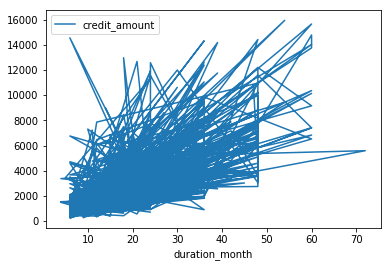

In [14]:
df.plot(x='duration_month',y='credit_amount')

In [15]:
df =df.drop(['serial number'],axis=1)

In [16]:
X = df.drop(['credit_amount'],axis=1)

In [17]:
y = df['credit_amount']

In [18]:
obj_col=X.select_dtypes(include='object')
obj_col = obj_col.columns.values
X = pd.get_dummies(X, columns=obj_col)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 60 columns):
duration_month           800 non-null int64
poi                      800 non-null int64
resident_since           800 non-null int64
age                      800 non-null int64
credits_no               800 non-null int64
liables                  800 non-null int64
account_info_A11         800 non-null uint8
account_info_A12         800 non-null uint8
account_info_A13         800 non-null uint8
account_info_A14         800 non-null uint8
credit_history_A30       800 non-null uint8
credit_history_A31       800 non-null uint8
credit_history_A32       800 non-null uint8
credit_history_A33       800 non-null uint8
credit_history_A34       800 non-null uint8
purpose_A40              800 non-null uint8
purpose_A41              800 non-null uint8
purpose_A410             800 non-null uint8
purpose_A42              800 non-null uint8
purpose_A43              800 non-null uint8
purpose_A44    

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [55]:
clf = ExtraTreesRegressor(n_estimators=1000, max_depth=None,criterion='mse',
min_samples_split=10, random_state=0)
clf.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=10,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
preds = clf.predict(X_test)

In [57]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2203.621494


In [51]:
from sklearn.linear_model import ARDRegression

In [46]:
reg = ARDRegression(alpha_1=0,)

In [48]:
reg.fit(X_train,y_train)
preds = reg.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2100.142821


In [11]:
from catboost import CatBoostRegressor

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
categorical_features_indices = np.where(X.dtypes == 'object')[0]

In [14]:
categorical_features_indices

array([ 0,  2,  3,  4,  5,  7,  8, 10, 12, 13, 15, 17, 18])

In [15]:
from sortedcontainers import SortedList
import copy
import collections
import numpy as np
from itertools import product,chain
import pandas
from sklearn.model_selection import KFold
import catboost as cb

''' a class for doing grid search on a set of parameters provided in a dict. 'pdict' should be a dictionary like the following:
pdict = {'depth':[1,2], 'iterations':[250,100,500], 'thread_count':4}

when grid_search is called it will return an iterator that provides samples from the dictionary e.g.
{'depth':1, 'iterations':250, 'thread_count':4}
{'depth':2, 'iterations':250, 'thread_count':4}
{'depth':1, 'iterations':100, 'thread_count':4}
etc.
after calling an iteration of grid_search, you need to test the classifier and run 'register_result'
This will update the internal list of results, so that the next call to grid_search will use the best
parameters for all the parameters not currently being updated.

grid_search can be provided a list e.g. grid_search(['depth']) this will use the current best parameters for all
the other arguments and only search over 'depth'. You can then call e.g. grid_search(['iterations']) and it will use
the best depth found previously and cycle through all the 'iterations'. Searching incrementally can be much faster
than doing a full grid search, but may miss the global optimum. '''
class paramsearch:
    def __init__(self,pdict):    
        self.pdict = {}
        # if something is not passed in as a sequence, make it a sequence with 1 element
        #   don't treat strings as sequences
        for a,b in pdict.items():
            if isinstance(b, collections.Sequence) and not isinstance(b, str): self.pdict[a] = b
            else: self.pdict[a] = [b]
        # our results are a sorted list, so the best score is always the final element
        self.results = SortedList()       
                    
    def grid_search(self,keys=None):
        # do grid search on only the keys listed. If none provided, do all
        if keys==None: keylist = self.pdict.keys()
        else: keylist = keys
 
        listoflists = [] # this will be list of lists of key,value pairs
        for key in keylist: listoflists.append([(key,i) for i in self.pdict[key]])
        for p in product(*listoflists):
            # do any changes to the current best parameter set
            if len(self.results)>0: template = self.results[-1][1]
            else: template = {a:b[0] for a,b in self.pdict.items()}
            # if our updates are the same as current best, don't bother
            if self.equaldict(dict(p),template): continue
            # take the current best and update just the ones to change
            yield self.overwritedict(dict(p),template)
                              
    def equaldict(self,a,b):
        for key in a.keys(): 
            if a[key] != b[key]: return False
        return True            
                              
    def overwritedict(self,new,old):
        old = copy.deepcopy(old)
        for key in new.keys(): old[key] = new[key]
        return old            
    
    # save a (score,params) pair to results. Since 'results' is a sorted list,
    #   the best score is always the final element. A small amount of noise is added
    #   because sorted lists don't like it when two scores are exactly the same    
    def register_result(self,result,params):
        self.results.add((result+np.random.randn()*1e-10,params))    
        
    def bestscore(self):
        return self.results[-1][0]
        
    def bestparam(self):
        return self.results[-1][1]

In [16]:
np.arange(0.1,0.9,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [ ]:
params = {'depth':[1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15],
          'iterations':[250,500,750],
          'learning_rate':[0.01,0.1,0.15,0.2,0.25], 
          'l2_leaf_reg':[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99,100],
          'border_count':[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99,100]}
def crossvaltest(params,train_set,train_label,cat_dims,n_splits=3):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_set):
        train = train_set.iloc[train_index,:]
        test = train_set.iloc[test_index,:]

        labels = train_label.loc[train_index]
        test_labels = train_label.loc[test_index]

        clf = cb.CatBoostClassifier(**params)
        clf.fit(train, np.ravel(labels), cat_features=cat_dims)

        res.append(np.mean(clf.predict(test)==np.ravel(test_labels)))
    return np.mean(res)
def catboost_param_tune(params,train_set,train_label,cat_dims=None,n_splits=3):
    ps = paramsearch(params)
    # search 'border_count', 'l2_leaf_reg' etc. individually 
    #   but 'iterations','learning_rate' together
    for prms in chain(ps.grid_search(['border_count']),
                      ps.grid_search(['l2_leaf_reg']),
                      ps.grid_search(['iterations','learning_rate']),
                      ps.grid_search(['depth'])):
        res = crossvaltest(prms,train_set,train_label,cat_dims,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        ps.register_result(res,prms)
        print(res,prms,'best:',ps.bestscore(),ps.bestparam())
    return ps.bestparam()

bestparams = catboost_param_tune(params,X_train,y_train,categorical_features_indices)

/home/khandalaryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/khandalaryan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


0:	learn: 0.6519598	total: 55.2ms	remaining: 13.8s
1:	learn: 0.6194704	total: 67.7ms	remaining: 8.4s
2:	learn: 0.5937381	total: 78.2ms	remaining: 6.43s
3:	learn: 0.5729937	total: 95.5ms	remaining: 5.88s
4:	learn: 0.5563379	total: 113ms	remaining: 5.54s
5:	learn: 0.5434499	total: 128ms	remaining: 5.22s
6:	learn: 0.5330656	total: 142ms	remaining: 4.94s
7:	learn: 0.5244654	total: 149ms	remaining: 4.5s
8:	learn: 0.5178617	total: 154ms	remaining: 4.13s
9:	learn: 0.5120247	total: 160ms	remaining: 3.83s
10:	learn: 0.5078952	total: 165ms	remaining: 3.59s
11:	learn: 0.5045125	total: 170ms	remaining: 3.38s
12:	learn: 0.5018677	total: 177ms	remaining: 3.23s
13:	learn: 0.4996324	total: 184ms	remaining: 3.09s
14:	learn: 0.4977876	total: 189ms	remaining: 2.96s
15:	learn: 0.4961160	total: 195ms	remaining: 2.85s
16:	learn: 0.4950279	total: 200ms	remaining: 2.75s
17:	learn: 0.4939840	total: 207ms	remaining: 2.67s
18:	learn: 0.4929151	total: 213ms	remaining: 2.58s
19:	learn: 0.4921042	total: 222ms	remai

160:	learn: 0.4547473	total: 1.29s	remaining: 716ms
161:	learn: 0.4547087	total: 1.3s	remaining: 708ms
162:	learn: 0.4546777	total: 1.31s	remaining: 702ms
163:	learn: 0.4546775	total: 1.32s	remaining: 694ms
164:	learn: 0.4545426	total: 1.33s	remaining: 685ms
165:	learn: 0.4541207	total: 1.33s	remaining: 675ms
166:	learn: 0.4541203	total: 1.34s	remaining: 667ms
167:	learn: 0.4536736	total: 1.35s	remaining: 658ms
168:	learn: 0.4534410	total: 1.35s	remaining: 649ms
169:	learn: 0.4533872	total: 1.36s	remaining: 640ms
170:	learn: 0.4533787	total: 1.37s	remaining: 631ms
171:	learn: 0.4533695	total: 1.37s	remaining: 622ms
172:	learn: 0.4533271	total: 1.38s	remaining: 614ms
173:	learn: 0.4529595	total: 1.39s	remaining: 605ms
174:	learn: 0.4528610	total: 1.39s	remaining: 596ms
175:	learn: 0.4528586	total: 1.4s	remaining: 588ms
176:	learn: 0.4527122	total: 1.4s	remaining: 579ms
177:	learn: 0.4527058	total: 1.42s	remaining: 573ms
178:	learn: 0.4518199	total: 1.42s	remaining: 564ms
179:	learn: 0.4

97:	learn: 0.4448378	total: 648ms	remaining: 1s
98:	learn: 0.4445248	total: 662ms	remaining: 1.01s
99:	learn: 0.4445240	total: 670ms	remaining: 1s
100:	learn: 0.4443463	total: 675ms	remaining: 996ms
101:	learn: 0.4443457	total: 684ms	remaining: 992ms
102:	learn: 0.4440919	total: 689ms	remaining: 983ms
103:	learn: 0.4440303	total: 694ms	remaining: 974ms
104:	learn: 0.4437808	total: 699ms	remaining: 965ms
105:	learn: 0.4437633	total: 705ms	remaining: 958ms
106:	learn: 0.4433778	total: 711ms	remaining: 950ms
107:	learn: 0.4429255	total: 717ms	remaining: 943ms
108:	learn: 0.4426158	total: 723ms	remaining: 935ms
109:	learn: 0.4421780	total: 728ms	remaining: 927ms
110:	learn: 0.4420373	total: 733ms	remaining: 918ms
111:	learn: 0.4420369	total: 739ms	remaining: 910ms
112:	learn: 0.4420227	total: 744ms	remaining: 902ms
113:	learn: 0.4420224	total: 751ms	remaining: 895ms
114:	learn: 0.4420008	total: 757ms	remaining: 889ms
115:	learn: 0.4416113	total: 764ms	remaining: 883ms
116:	learn: 0.4415728

16:	learn: 0.5184624	total: 206ms	remaining: 2.82s
17:	learn: 0.5176917	total: 220ms	remaining: 2.83s
18:	learn: 0.5159470	total: 232ms	remaining: 2.82s
19:	learn: 0.5146390	total: 246ms	remaining: 2.83s
20:	learn: 0.5135409	total: 263ms	remaining: 2.87s
21:	learn: 0.5130291	total: 277ms	remaining: 2.87s
22:	learn: 0.5124873	total: 294ms	remaining: 2.9s
23:	learn: 0.5120339	total: 313ms	remaining: 2.95s
24:	learn: 0.5106407	total: 326ms	remaining: 2.94s
25:	learn: 0.5105038	total: 340ms	remaining: 2.92s
26:	learn: 0.5102417	total: 351ms	remaining: 2.9s
27:	learn: 0.5101598	total: 363ms	remaining: 2.88s
28:	learn: 0.5100942	total: 371ms	remaining: 2.83s
29:	learn: 0.5099124	total: 381ms	remaining: 2.79s
30:	learn: 0.5097162	total: 404ms	remaining: 2.86s
31:	learn: 0.5083135	total: 425ms	remaining: 2.89s
32:	learn: 0.5082509	total: 438ms	remaining: 2.88s
33:	learn: 0.5081482	total: 453ms	remaining: 2.88s
34:	learn: 0.5081032	total: 466ms	remaining: 2.86s
35:	learn: 0.5080903	total: 481ms

180:	learn: 0.4752779	total: 1.86s	remaining: 709ms
181:	learn: 0.4752777	total: 1.88s	remaining: 702ms
182:	learn: 0.4748691	total: 1.89s	remaining: 691ms
183:	learn: 0.4748633	total: 1.9s	remaining: 682ms
184:	learn: 0.4748156	total: 1.92s	remaining: 674ms
185:	learn: 0.4748116	total: 1.93s	remaining: 665ms
186:	learn: 0.4747125	total: 1.95s	remaining: 655ms
187:	learn: 0.4745771	total: 1.96s	remaining: 645ms
188:	learn: 0.4744025	total: 1.96s	remaining: 634ms
189:	learn: 0.4741731	total: 1.98s	remaining: 624ms
190:	learn: 0.4741429	total: 1.99s	remaining: 615ms
191:	learn: 0.4740876	total: 2s	remaining: 604ms
192:	learn: 0.4735140	total: 2.01s	remaining: 595ms
193:	learn: 0.4734768	total: 2.02s	remaining: 584ms
194:	learn: 0.4733756	total: 2.04s	remaining: 576ms
195:	learn: 0.4733178	total: 2.05s	remaining: 565ms
196:	learn: 0.4733153	total: 2.06s	remaining: 556ms
197:	learn: 0.4731892	total: 2.08s	remaining: 548ms
198:	learn: 0.4729504	total: 2.1s	remaining: 539ms
199:	learn: 0.472

106:	learn: 0.4695095	total: 799ms	remaining: 1.07s
107:	learn: 0.4691897	total: 811ms	remaining: 1.07s
108:	learn: 0.4691770	total: 821ms	remaining: 1.06s
109:	learn: 0.4691762	total: 851ms	remaining: 1.08s
110:	learn: 0.4691760	total: 868ms	remaining: 1.09s
111:	learn: 0.4687310	total: 882ms	remaining: 1.09s
112:	learn: 0.4677106	total: 892ms	remaining: 1.08s
113:	learn: 0.4676877	total: 903ms	remaining: 1.08s
114:	learn: 0.4676870	total: 916ms	remaining: 1.07s
115:	learn: 0.4675009	total: 930ms	remaining: 1.07s
116:	learn: 0.4671538	total: 935ms	remaining: 1.06s
117:	learn: 0.4670254	total: 941ms	remaining: 1.05s
118:	learn: 0.4666253	total: 947ms	remaining: 1.04s
119:	learn: 0.4666160	total: 964ms	remaining: 1.04s
120:	learn: 0.4662931	total: 970ms	remaining: 1.03s
121:	learn: 0.4660143	total: 983ms	remaining: 1.03s
122:	learn: 0.4657307	total: 992ms	remaining: 1.02s
123:	learn: 0.4657160	total: 1.02s	remaining: 1.04s
124:	learn: 0.4654453	total: 1.03s	remaining: 1.03s
125:	learn: 

21:	learn: 0.4633198	total: 221ms	remaining: 2.29s
22:	learn: 0.4629731	total: 230ms	remaining: 2.27s
23:	learn: 0.4627198	total: 238ms	remaining: 2.24s
24:	learn: 0.4616624	total: 245ms	remaining: 2.2s
25:	learn: 0.4603555	total: 250ms	remaining: 2.15s
26:	learn: 0.4588972	total: 255ms	remaining: 2.11s
27:	learn: 0.4585732	total: 260ms	remaining: 2.06s
28:	learn: 0.4581342	total: 265ms	remaining: 2.02s
29:	learn: 0.4568044	total: 270ms	remaining: 1.98s
30:	learn: 0.4565079	total: 275ms	remaining: 1.94s
31:	learn: 0.4556051	total: 281ms	remaining: 1.91s
32:	learn: 0.4555764	total: 286ms	remaining: 1.88s
33:	learn: 0.4555533	total: 292ms	remaining: 1.85s
34:	learn: 0.4554763	total: 304ms	remaining: 1.87s
35:	learn: 0.4554497	total: 317ms	remaining: 1.89s
36:	learn: 0.4549578	total: 329ms	remaining: 1.9s
37:	learn: 0.4549063	total: 344ms	remaining: 1.92s
38:	learn: 0.4548843	total: 357ms	remaining: 1.93s
39:	learn: 0.4546931	total: 372ms	remaining: 1.95s
40:	learn: 0.4546498	total: 384ms

187:	learn: 0.4188468	total: 1.48s	remaining: 487ms
188:	learn: 0.4188166	total: 1.49s	remaining: 481ms
189:	learn: 0.4183906	total: 1.5s	remaining: 472ms
190:	learn: 0.4183212	total: 1.5s	remaining: 464ms
191:	learn: 0.4179307	total: 1.51s	remaining: 455ms
192:	learn: 0.4178555	total: 1.52s	remaining: 449ms
193:	learn: 0.4178396	total: 1.52s	remaining: 440ms
194:	learn: 0.4178389	total: 1.53s	remaining: 432ms
195:	learn: 0.4178119	total: 1.54s	remaining: 423ms
196:	learn: 0.4177438	total: 1.54s	remaining: 415ms
197:	learn: 0.4177294	total: 1.55s	remaining: 407ms
198:	learn: 0.4177269	total: 1.55s	remaining: 398ms
199:	learn: 0.4177053	total: 1.56s	remaining: 390ms
200:	learn: 0.4173943	total: 1.56s	remaining: 381ms
201:	learn: 0.4173756	total: 1.57s	remaining: 373ms
202:	learn: 0.4173036	total: 1.57s	remaining: 365ms
203:	learn: 0.4173002	total: 1.58s	remaining: 356ms
204:	learn: 0.4172663	total: 1.59s	remaining: 348ms
205:	learn: 0.4168185	total: 1.59s	remaining: 340ms
206:	learn: 0.

105:	learn: 0.4718412	total: 808ms	remaining: 1.1s
106:	learn: 0.4711799	total: 823ms	remaining: 1.1s
107:	learn: 0.4706981	total: 837ms	remaining: 1.1s
108:	learn: 0.4705274	total: 846ms	remaining: 1.09s
109:	learn: 0.4704456	total: 861ms	remaining: 1.1s
110:	learn: 0.4702744	total: 880ms	remaining: 1.1s
111:	learn: 0.4702478	total: 897ms	remaining: 1.1s
112:	learn: 0.4702476	total: 915ms	remaining: 1.11s
113:	learn: 0.4702261	total: 932ms	remaining: 1.11s
114:	learn: 0.4700918	total: 945ms	remaining: 1.11s
115:	learn: 0.4700523	total: 961ms	remaining: 1.11s
116:	learn: 0.4692491	total: 978ms	remaining: 1.11s
117:	learn: 0.4692343	total: 998ms	remaining: 1.12s
118:	learn: 0.4688530	total: 1.03s	remaining: 1.13s
119:	learn: 0.4686514	total: 1.04s	remaining: 1.13s
120:	learn: 0.4686433	total: 1.06s	remaining: 1.13s
121:	learn: 0.4683664	total: 1.08s	remaining: 1.13s
122:	learn: 0.4683411	total: 1.1s	remaining: 1.13s
123:	learn: 0.4679773	total: 1.11s	remaining: 1.13s
124:	learn: 0.46740

22:	learn: 0.4764788	total: 158ms	remaining: 1.56s
23:	learn: 0.4753032	total: 177ms	remaining: 1.67s
24:	learn: 0.4750103	total: 185ms	remaining: 1.66s
25:	learn: 0.4748514	total: 191ms	remaining: 1.65s
26:	learn: 0.4740965	total: 206ms	remaining: 1.7s
27:	learn: 0.4739968	total: 221ms	remaining: 1.75s
28:	learn: 0.4738976	total: 236ms	remaining: 1.8s
29:	learn: 0.4738325	total: 249ms	remaining: 1.82s
30:	learn: 0.4737554	total: 262ms	remaining: 1.85s
31:	learn: 0.4732663	total: 275ms	remaining: 1.87s
32:	learn: 0.4732330	total: 289ms	remaining: 1.9s
33:	learn: 0.4729197	total: 297ms	remaining: 1.89s
34:	learn: 0.4728986	total: 302ms	remaining: 1.86s
35:	learn: 0.4728013	total: 308ms	remaining: 1.83s
36:	learn: 0.4727852	total: 313ms	remaining: 1.8s
37:	learn: 0.4719164	total: 319ms	remaining: 1.78s
38:	learn: 0.4715359	total: 328ms	remaining: 1.77s
39:	learn: 0.4715145	total: 334ms	remaining: 1.75s
40:	learn: 0.4715099	total: 339ms	remaining: 1.73s
41:	learn: 0.4714263	total: 346ms	r

192:	learn: 0.4405402	total: 1.39s	remaining: 410ms
193:	learn: 0.4405288	total: 1.4s	remaining: 404ms
194:	learn: 0.4405287	total: 1.41s	remaining: 398ms
195:	learn: 0.4404549	total: 1.42s	remaining: 390ms
196:	learn: 0.4403824	total: 1.42s	remaining: 383ms
197:	learn: 0.4397996	total: 1.43s	remaining: 376ms
198:	learn: 0.4397995	total: 1.44s	remaining: 368ms
199:	learn: 0.4397380	total: 1.44s	remaining: 361ms
200:	learn: 0.4397024	total: 1.45s	remaining: 353ms
201:	learn: 0.4394646	total: 1.46s	remaining: 346ms
202:	learn: 0.4394542	total: 1.46s	remaining: 339ms
203:	learn: 0.4388832	total: 1.47s	remaining: 331ms
204:	learn: 0.4385027	total: 1.47s	remaining: 324ms
205:	learn: 0.4378506	total: 1.48s	remaining: 316ms
206:	learn: 0.4378222	total: 1.49s	remaining: 309ms
207:	learn: 0.4376703	total: 1.49s	remaining: 302ms
208:	learn: 0.4373859	total: 1.51s	remaining: 296ms
209:	learn: 0.4368275	total: 1.52s	remaining: 289ms
210:	learn: 0.4366979	total: 1.52s	remaining: 282ms
211:	learn: 0

125:	learn: 0.4676217	total: 847ms	remaining: 833ms
126:	learn: 0.4671087	total: 853ms	remaining: 826ms
127:	learn: 0.4671071	total: 860ms	remaining: 820ms
128:	learn: 0.4669889	total: 867ms	remaining: 813ms
129:	learn: 0.4668602	total: 873ms	remaining: 806ms
130:	learn: 0.4668406	total: 880ms	remaining: 799ms
131:	learn: 0.4668404	total: 885ms	remaining: 792ms
132:	learn: 0.4663669	total: 892ms	remaining: 785ms
133:	learn: 0.4662962	total: 899ms	remaining: 778ms
134:	learn: 0.4662961	total: 904ms	remaining: 770ms
135:	learn: 0.4653304	total: 909ms	remaining: 762ms
136:	learn: 0.4653288	total: 916ms	remaining: 755ms
137:	learn: 0.4650362	total: 921ms	remaining: 748ms
138:	learn: 0.4649919	total: 927ms	remaining: 740ms
139:	learn: 0.4648320	total: 934ms	remaining: 733ms
140:	learn: 0.4648317	total: 938ms	remaining: 725ms
141:	learn: 0.4647317	total: 944ms	remaining: 718ms
142:	learn: 0.4645849	total: 951ms	remaining: 711ms
143:	learn: 0.4640945	total: 956ms	remaining: 704ms
144:	learn: 

34:	learn: 0.4909770	total: 414ms	remaining: 2.54s
35:	learn: 0.4903050	total: 432ms	remaining: 2.57s
36:	learn: 0.4902301	total: 446ms	remaining: 2.57s
37:	learn: 0.4901964	total: 462ms	remaining: 2.58s
38:	learn: 0.4901524	total: 475ms	remaining: 2.57s
39:	learn: 0.4900797	total: 493ms	remaining: 2.59s
40:	learn: 0.4893778	total: 503ms	remaining: 2.56s
41:	learn: 0.4893636	total: 517ms	remaining: 2.56s
42:	learn: 0.4882894	total: 528ms	remaining: 2.54s
43:	learn: 0.4877797	total: 540ms	remaining: 2.53s
44:	learn: 0.4877642	total: 546ms	remaining: 2.48s
45:	learn: 0.4877457	total: 554ms	remaining: 2.46s
46:	learn: 0.4877451	total: 568ms	remaining: 2.45s
47:	learn: 0.4864384	total: 581ms	remaining: 2.45s
48:	learn: 0.4858979	total: 589ms	remaining: 2.41s
49:	learn: 0.4857793	total: 595ms	remaining: 2.38s
50:	learn: 0.4853451	total: 600ms	remaining: 2.34s
51:	learn: 0.4853056	total: 605ms	remaining: 2.31s
52:	learn: 0.4853056	total: 611ms	remaining: 2.27s
53:	learn: 0.4844355	total: 621

206:	learn: 0.4517643	total: 2.05s	remaining: 425ms
207:	learn: 0.4517259	total: 2.07s	remaining: 417ms
208:	learn: 0.4514321	total: 2.07s	remaining: 407ms
209:	learn: 0.4512673	total: 2.08s	remaining: 397ms
210:	learn: 0.4512244	total: 2.09s	remaining: 386ms
211:	learn: 0.4510634	total: 2.1s	remaining: 376ms
212:	learn: 0.4508994	total: 2.1s	remaining: 365ms
213:	learn: 0.4508773	total: 2.11s	remaining: 354ms
214:	learn: 0.4508594	total: 2.11s	remaining: 344ms
215:	learn: 0.4508449	total: 2.12s	remaining: 334ms
216:	learn: 0.4506952	total: 2.13s	remaining: 324ms
217:	learn: 0.4505521	total: 2.13s	remaining: 313ms
218:	learn: 0.4505468	total: 2.14s	remaining: 303ms
219:	learn: 0.4503692	total: 2.15s	remaining: 293ms
220:	learn: 0.4502783	total: 2.15s	remaining: 283ms
221:	learn: 0.4502221	total: 2.16s	remaining: 273ms
222:	learn: 0.4502210	total: 2.17s	remaining: 262ms
223:	learn: 0.4501111	total: 2.17s	remaining: 252ms
224:	learn: 0.4500543	total: 2.18s	remaining: 242ms
225:	learn: 0.

112:	learn: 0.4267702	total: 823ms	remaining: 998ms
113:	learn: 0.4267693	total: 837ms	remaining: 999ms
114:	learn: 0.4263548	total: 843ms	remaining: 989ms
115:	learn: 0.4261904	total: 849ms	remaining: 981ms
116:	learn: 0.4260770	total: 855ms	remaining: 971ms
117:	learn: 0.4260030	total: 862ms	remaining: 965ms
118:	learn: 0.4256808	total: 869ms	remaining: 957ms
119:	learn: 0.4256807	total: 875ms	remaining: 948ms
120:	learn: 0.4254857	total: 882ms	remaining: 940ms
121:	learn: 0.4254856	total: 889ms	remaining: 932ms
122:	learn: 0.4254691	total: 896ms	remaining: 925ms
123:	learn: 0.4252390	total: 903ms	remaining: 917ms
124:	learn: 0.4249323	total: 910ms	remaining: 910ms
125:	learn: 0.4248518	total: 917ms	remaining: 902ms
126:	learn: 0.4247640	total: 924ms	remaining: 895ms
127:	learn: 0.4244362	total: 929ms	remaining: 885ms
128:	learn: 0.4243003	total: 936ms	remaining: 878ms
129:	learn: 0.4235489	total: 943ms	remaining: 871ms
130:	learn: 0.4235110	total: 949ms	remaining: 862ms
131:	learn: 

34:	learn: 0.5001241	total: 209ms	remaining: 1.28s
35:	learn: 0.4998056	total: 220ms	remaining: 1.3s
36:	learn: 0.4996058	total: 230ms	remaining: 1.32s
37:	learn: 0.4987692	total: 236ms	remaining: 1.31s
38:	learn: 0.4985197	total: 242ms	remaining: 1.31s
39:	learn: 0.4979298	total: 248ms	remaining: 1.3s
40:	learn: 0.4967873	total: 254ms	remaining: 1.29s
41:	learn: 0.4967790	total: 265ms	remaining: 1.31s
42:	learn: 0.4964503	total: 271ms	remaining: 1.3s
43:	learn: 0.4955064	total: 276ms	remaining: 1.29s
44:	learn: 0.4953158	total: 281ms	remaining: 1.28s
45:	learn: 0.4951204	total: 287ms	remaining: 1.27s
46:	learn: 0.4942487	total: 293ms	remaining: 1.26s
47:	learn: 0.4939862	total: 298ms	remaining: 1.25s
48:	learn: 0.4935457	total: 303ms	remaining: 1.24s
49:	learn: 0.4935444	total: 309ms	remaining: 1.24s
50:	learn: 0.4926042	total: 314ms	remaining: 1.23s
51:	learn: 0.4916031	total: 320ms	remaining: 1.22s
52:	learn: 0.4915728	total: 326ms	remaining: 1.21s
53:	learn: 0.4915150	total: 331ms	

221:	learn: 0.4519632	total: 1.62s	remaining: 205ms
222:	learn: 0.4516409	total: 1.63s	remaining: 197ms
223:	learn: 0.4516408	total: 1.64s	remaining: 190ms
224:	learn: 0.4514534	total: 1.65s	remaining: 183ms
225:	learn: 0.4511517	total: 1.65s	remaining: 176ms
226:	learn: 0.4510305	total: 1.66s	remaining: 168ms
227:	learn: 0.4509298	total: 1.67s	remaining: 161ms
228:	learn: 0.4507786	total: 1.67s	remaining: 153ms
229:	learn: 0.4507731	total: 1.68s	remaining: 146ms
230:	learn: 0.4507356	total: 1.69s	remaining: 139ms
231:	learn: 0.4506980	total: 1.69s	remaining: 131ms
232:	learn: 0.4502198	total: 1.7s	remaining: 124ms
233:	learn: 0.4502143	total: 1.71s	remaining: 117ms
234:	learn: 0.4496817	total: 1.71s	remaining: 109ms
235:	learn: 0.4496807	total: 1.72s	remaining: 102ms
236:	learn: 0.4496805	total: 1.72s	remaining: 94.6ms
237:	learn: 0.4495353	total: 1.73s	remaining: 87.3ms
238:	learn: 0.4495352	total: 1.74s	remaining: 80ms
239:	learn: 0.4491523	total: 1.74s	remaining: 72.7ms
240:	learn:

159:	learn: 0.4635061	total: 1.04s	remaining: 583ms
160:	learn: 0.4634185	total: 1.05s	remaining: 580ms
161:	learn: 0.4633620	total: 1.05s	remaining: 573ms
162:	learn: 0.4633537	total: 1.06s	remaining: 566ms
163:	learn: 0.4633072	total: 1.07s	remaining: 560ms
164:	learn: 0.4629928	total: 1.07s	remaining: 553ms
165:	learn: 0.4629793	total: 1.08s	remaining: 546ms
166:	learn: 0.4628706	total: 1.08s	remaining: 539ms
167:	learn: 0.4615553	total: 1.09s	remaining: 532ms
168:	learn: 0.4615261	total: 1.1s	remaining: 525ms
169:	learn: 0.4615259	total: 1.1s	remaining: 519ms
170:	learn: 0.4614630	total: 1.11s	remaining: 512ms
171:	learn: 0.4614462	total: 1.11s	remaining: 505ms
172:	learn: 0.4610457	total: 1.12s	remaining: 499ms
173:	learn: 0.4606005	total: 1.13s	remaining: 494ms
174:	learn: 0.4604764	total: 1.14s	remaining: 486ms
175:	learn: 0.4594453	total: 1.14s	remaining: 479ms
176:	learn: 0.4592593	total: 1.15s	remaining: 473ms
177:	learn: 0.4592562	total: 1.15s	remaining: 467ms
178:	learn: 0.

92:	learn: 0.4637916	total: 585ms	remaining: 988ms
93:	learn: 0.4637896	total: 596ms	remaining: 989ms
94:	learn: 0.4635787	total: 607ms	remaining: 991ms
95:	learn: 0.4635751	total: 614ms	remaining: 985ms
96:	learn: 0.4634239	total: 620ms	remaining: 978ms
97:	learn: 0.4634188	total: 626ms	remaining: 972ms
98:	learn: 0.4633250	total: 632ms	remaining: 965ms
99:	learn: 0.4629094	total: 639ms	remaining: 958ms
100:	learn: 0.4626788	total: 644ms	remaining: 950ms
101:	learn: 0.4626464	total: 650ms	remaining: 942ms
102:	learn: 0.4620176	total: 655ms	remaining: 935ms
103:	learn: 0.4620164	total: 660ms	remaining: 927ms
104:	learn: 0.4616393	total: 666ms	remaining: 919ms
105:	learn: 0.4614418	total: 672ms	remaining: 913ms
106:	learn: 0.4612828	total: 677ms	remaining: 905ms
107:	learn: 0.4611256	total: 683ms	remaining: 897ms
108:	learn: 0.4609279	total: 688ms	remaining: 890ms
109:	learn: 0.4609042	total: 693ms	remaining: 882ms
110:	learn: 0.4607761	total: 699ms	remaining: 875ms
111:	learn: 0.460775

0:	learn: 0.6504282	total: 4.22ms	remaining: 1.05s
1:	learn: 0.6147244	total: 9.85ms	remaining: 1.22s
2:	learn: 0.5874009	total: 20.7ms	remaining: 1.71s
3:	learn: 0.5657012	total: 29.6ms	remaining: 1.82s
4:	learn: 0.5483957	total: 34.9ms	remaining: 1.71s
5:	learn: 0.5350762	total: 40.3ms	remaining: 1.64s
6:	learn: 0.5241007	total: 47.1ms	remaining: 1.64s
7:	learn: 0.5156178	total: 54ms	remaining: 1.63s
8:	learn: 0.5081309	total: 59.3ms	remaining: 1.59s
9:	learn: 0.5028558	total: 64.5ms	remaining: 1.55s
10:	learn: 0.4986191	total: 71ms	remaining: 1.54s
11:	learn: 0.4948208	total: 76.3ms	remaining: 1.51s
12:	learn: 0.4919249	total: 81.6ms	remaining: 1.49s
13:	learn: 0.4892316	total: 88.3ms	remaining: 1.49s
14:	learn: 0.4875162	total: 93.6ms	remaining: 1.47s
15:	learn: 0.4850247	total: 98.8ms	remaining: 1.45s
16:	learn: 0.4839277	total: 104ms	remaining: 1.42s
17:	learn: 0.4830078	total: 109ms	remaining: 1.41s
18:	learn: 0.4822677	total: 116ms	remaining: 1.41s
19:	learn: 0.4810792	total: 1

160:	learn: 0.4383763	total: 1.04s	remaining: 576ms
161:	learn: 0.4382214	total: 1.05s	remaining: 570ms
162:	learn: 0.4381774	total: 1.05s	remaining: 563ms
163:	learn: 0.4380549	total: 1.06s	remaining: 556ms
164:	learn: 0.4380054	total: 1.06s	remaining: 549ms
165:	learn: 0.4380053	total: 1.07s	remaining: 542ms
166:	learn: 0.4376813	total: 1.08s	remaining: 535ms
167:	learn: 0.4371502	total: 1.08s	remaining: 528ms
168:	learn: 0.4371376	total: 1.09s	remaining: 521ms
169:	learn: 0.4370351	total: 1.09s	remaining: 515ms
170:	learn: 0.4366704	total: 1.1s	remaining: 508ms
171:	learn: 0.4365770	total: 1.1s	remaining: 501ms
172:	learn: 0.4365584	total: 1.11s	remaining: 494ms
173:	learn: 0.4364631	total: 1.12s	remaining: 488ms
174:	learn: 0.4363865	total: 1.12s	remaining: 481ms
175:	learn: 0.4363324	total: 1.13s	remaining: 475ms
176:	learn: 0.4362885	total: 1.14s	remaining: 469ms
177:	learn: 0.4362784	total: 1.14s	remaining: 462ms
178:	learn: 0.4362784	total: 1.15s	remaining: 455ms
179:	learn: 0.

92:	learn: 0.4731131	total: 615ms	remaining: 1.04s
93:	learn: 0.4731130	total: 628ms	remaining: 1.04s
94:	learn: 0.4731130	total: 636ms	remaining: 1.04s
95:	learn: 0.4724226	total: 641ms	remaining: 1.03s
96:	learn: 0.4720557	total: 653ms	remaining: 1.03s
97:	learn: 0.4720101	total: 659ms	remaining: 1.02s
98:	learn: 0.4720100	total: 666ms	remaining: 1.01s
99:	learn: 0.4719705	total: 673ms	remaining: 1.01s
100:	learn: 0.4715737	total: 679ms	remaining: 1s
101:	learn: 0.4714071	total: 684ms	remaining: 992ms
102:	learn: 0.4713781	total: 690ms	remaining: 985ms
103:	learn: 0.4713780	total: 697ms	remaining: 978ms
104:	learn: 0.4713684	total: 704ms	remaining: 972ms
105:	learn: 0.4711194	total: 711ms	remaining: 966ms
106:	learn: 0.4711146	total: 718ms	remaining: 960ms
107:	learn: 0.4709224	total: 725ms	remaining: 954ms
108:	learn: 0.4705927	total: 732ms	remaining: 947ms
109:	learn: 0.4700915	total: 738ms	remaining: 939ms
110:	learn: 0.4698389	total: 743ms	remaining: 931ms
111:	learn: 0.4695592	t

0:	learn: 0.6476550	total: 4.18ms	remaining: 1.04s
1:	learn: 0.6115277	total: 9.86ms	remaining: 1.22s
2:	learn: 0.5824341	total: 15.9ms	remaining: 1.31s
3:	learn: 0.5598780	total: 22.2ms	remaining: 1.37s
4:	learn: 0.5414492	total: 27.6ms	remaining: 1.35s
5:	learn: 0.5272177	total: 33ms	remaining: 1.34s
6:	learn: 0.5158897	total: 38.6ms	remaining: 1.34s
7:	learn: 0.5069208	total: 43.9ms	remaining: 1.33s
8:	learn: 0.4994480	total: 49.2ms	remaining: 1.32s
9:	learn: 0.4938058	total: 54.5ms	remaining: 1.31s
10:	learn: 0.4893039	total: 59.9ms	remaining: 1.3s
11:	learn: 0.4850671	total: 65.3ms	remaining: 1.29s
12:	learn: 0.4821519	total: 72.3ms	remaining: 1.32s
13:	learn: 0.4798507	total: 79.4ms	remaining: 1.34s
14:	learn: 0.4780074	total: 84.6ms	remaining: 1.33s
15:	learn: 0.4765304	total: 90ms	remaining: 1.31s
16:	learn: 0.4745724	total: 95.1ms	remaining: 1.3s
17:	learn: 0.4727159	total: 102ms	remaining: 1.32s
18:	learn: 0.4707910	total: 108ms	remaining: 1.31s
19:	learn: 0.4701956	total: 11

187:	learn: 0.4306951	total: 1.24s	remaining: 410ms
188:	learn: 0.4306785	total: 1.25s	remaining: 402ms
189:	learn: 0.4305332	total: 1.25s	remaining: 396ms
190:	learn: 0.4304313	total: 1.26s	remaining: 389ms
191:	learn: 0.4303501	total: 1.26s	remaining: 382ms
192:	learn: 0.4300907	total: 1.28s	remaining: 377ms
193:	learn: 0.4298585	total: 1.28s	remaining: 371ms
194:	learn: 0.4297872	total: 1.29s	remaining: 364ms
195:	learn: 0.4297827	total: 1.29s	remaining: 357ms
196:	learn: 0.4297810	total: 1.3s	remaining: 350ms
197:	learn: 0.4297671	total: 1.31s	remaining: 343ms
198:	learn: 0.4297557	total: 1.31s	remaining: 337ms
199:	learn: 0.4296868	total: 1.32s	remaining: 330ms
200:	learn: 0.4295580	total: 1.32s	remaining: 323ms
201:	learn: 0.4294864	total: 1.33s	remaining: 316ms
202:	learn: 0.4293935	total: 1.33s	remaining: 309ms
203:	learn: 0.4293877	total: 1.34s	remaining: 302ms
204:	learn: 0.4293621	total: 1.35s	remaining: 296ms
205:	learn: 0.4293453	total: 1.36s	remaining: 290ms
206:	learn: 0

121:	learn: 0.4753486	total: 824ms	remaining: 865ms
122:	learn: 0.4749761	total: 838ms	remaining: 865ms
123:	learn: 0.4749738	total: 847ms	remaining: 861ms
124:	learn: 0.4746161	total: 854ms	remaining: 854ms
125:	learn: 0.4746160	total: 859ms	remaining: 845ms
126:	learn: 0.4745605	total: 866ms	remaining: 839ms
127:	learn: 0.4745059	total: 872ms	remaining: 831ms
128:	learn: 0.4745035	total: 879ms	remaining: 825ms
129:	learn: 0.4745013	total: 886ms	remaining: 818ms
130:	learn: 0.4744073	total: 893ms	remaining: 811ms
131:	learn: 0.4741713	total: 900ms	remaining: 805ms
132:	learn: 0.4741137	total: 906ms	remaining: 797ms
133:	learn: 0.4737423	total: 914ms	remaining: 791ms
134:	learn: 0.4729676	total: 921ms	remaining: 784ms
135:	learn: 0.4728568	total: 928ms	remaining: 778ms
136:	learn: 0.4728567	total: 935ms	remaining: 771ms
137:	learn: 0.4728369	total: 942ms	remaining: 764ms
138:	learn: 0.4719951	total: 949ms	remaining: 758ms
139:	learn: 0.4717677	total: 956ms	remaining: 751ms
140:	learn: 

32:	learn: 0.4953915	total: 226ms	remaining: 1.49s
33:	learn: 0.4952191	total: 240ms	remaining: 1.52s
34:	learn: 0.4951418	total: 247ms	remaining: 1.52s
35:	learn: 0.4951069	total: 255ms	remaining: 1.51s
36:	learn: 0.4949657	total: 261ms	remaining: 1.5s
37:	learn: 0.4949578	total: 266ms	remaining: 1.48s
38:	learn: 0.4946161	total: 271ms	remaining: 1.47s
39:	learn: 0.4946113	total: 277ms	remaining: 1.45s
40:	learn: 0.4944353	total: 282ms	remaining: 1.44s
41:	learn: 0.4944322	total: 287ms	remaining: 1.42s
42:	learn: 0.4943982	total: 293ms	remaining: 1.41s
43:	learn: 0.4943671	total: 299ms	remaining: 1.4s
44:	learn: 0.4938737	total: 304ms	remaining: 1.39s
45:	learn: 0.4938723	total: 310ms	remaining: 1.37s
46:	learn: 0.4938496	total: 316ms	remaining: 1.36s
47:	learn: 0.4938489	total: 322ms	remaining: 1.35s
48:	learn: 0.4933979	total: 328ms	remaining: 1.35s
49:	learn: 0.4929602	total: 335ms	remaining: 1.34s
50:	learn: 0.4929600	total: 342ms	remaining: 1.33s
51:	learn: 0.4929388	total: 347ms

192:	learn: 0.4705105	total: 1.24s	remaining: 367ms
193:	learn: 0.4704702	total: 1.25s	remaining: 362ms
194:	learn: 0.4700966	total: 1.27s	remaining: 357ms
195:	learn: 0.4700305	total: 1.27s	remaining: 351ms
196:	learn: 0.4699488	total: 1.28s	remaining: 344ms
197:	learn: 0.4698223	total: 1.28s	remaining: 337ms
198:	learn: 0.4695279	total: 1.29s	remaining: 331ms
199:	learn: 0.4694612	total: 1.3s	remaining: 324ms
200:	learn: 0.4692349	total: 1.3s	remaining: 317ms
201:	learn: 0.4692209	total: 1.31s	remaining: 311ms
202:	learn: 0.4690629	total: 1.31s	remaining: 304ms
203:	learn: 0.4690628	total: 1.32s	remaining: 297ms
204:	learn: 0.4690609	total: 1.32s	remaining: 291ms
205:	learn: 0.4690408	total: 1.33s	remaining: 284ms
206:	learn: 0.4689967	total: 1.34s	remaining: 278ms
207:	learn: 0.4683161	total: 1.34s	remaining: 271ms
208:	learn: 0.4682411	total: 1.35s	remaining: 265ms
209:	learn: 0.4681430	total: 1.36s	remaining: 259ms
210:	learn: 0.4680874	total: 1.36s	remaining: 252ms
211:	learn: 0.

113:	learn: 0.4438696	total: 788ms	remaining: 939ms
114:	learn: 0.4435853	total: 795ms	remaining: 933ms
115:	learn: 0.4433110	total: 800ms	remaining: 925ms
116:	learn: 0.4429934	total: 807ms	remaining: 917ms
117:	learn: 0.4425583	total: 813ms	remaining: 910ms
118:	learn: 0.4422061	total: 819ms	remaining: 901ms
119:	learn: 0.4422058	total: 824ms	remaining: 893ms
120:	learn: 0.4418239	total: 829ms	remaining: 884ms
121:	learn: 0.4413921	total: 836ms	remaining: 877ms
122:	learn: 0.4411090	total: 841ms	remaining: 869ms
123:	learn: 0.4411041	total: 847ms	remaining: 861ms
124:	learn: 0.4411026	total: 853ms	remaining: 853ms
125:	learn: 0.4408685	total: 858ms	remaining: 844ms
126:	learn: 0.4408683	total: 863ms	remaining: 836ms
127:	learn: 0.4404526	total: 868ms	remaining: 828ms
128:	learn: 0.4401004	total: 874ms	remaining: 819ms
129:	learn: 0.4400807	total: 879ms	remaining: 811ms
130:	learn: 0.4400609	total: 885ms	remaining: 804ms
131:	learn: 0.4400607	total: 891ms	remaining: 796ms
132:	learn: 

33:	learn: 0.4938245	total: 210ms	remaining: 1.33s
34:	learn: 0.4936036	total: 217ms	remaining: 1.33s
35:	learn: 0.4923058	total: 228ms	remaining: 1.35s
36:	learn: 0.4922702	total: 233ms	remaining: 1.34s
37:	learn: 0.4922425	total: 240ms	remaining: 1.34s
38:	learn: 0.4917313	total: 247ms	remaining: 1.33s
39:	learn: 0.4916728	total: 252ms	remaining: 1.32s
40:	learn: 0.4906825	total: 259ms	remaining: 1.32s
41:	learn: 0.4906799	total: 266ms	remaining: 1.31s
42:	learn: 0.4901268	total: 271ms	remaining: 1.3s
43:	learn: 0.4892249	total: 276ms	remaining: 1.29s
44:	learn: 0.4888185	total: 281ms	remaining: 1.28s
45:	learn: 0.4878643	total: 286ms	remaining: 1.27s
46:	learn: 0.4876550	total: 293ms	remaining: 1.27s
47:	learn: 0.4875084	total: 298ms	remaining: 1.25s
48:	learn: 0.4872950	total: 305ms	remaining: 1.25s
49:	learn: 0.4872528	total: 311ms	remaining: 1.24s
50:	learn: 0.4872187	total: 316ms	remaining: 1.23s
51:	learn: 0.4868857	total: 321ms	remaining: 1.22s
52:	learn: 0.4867580	total: 328m

201:	learn: 0.4614055	total: 1.41s	remaining: 336ms
202:	learn: 0.4613876	total: 1.42s	remaining: 328ms
203:	learn: 0.4613371	total: 1.42s	remaining: 321ms
204:	learn: 0.4613327	total: 1.43s	remaining: 314ms
205:	learn: 0.4610047	total: 1.44s	remaining: 308ms
206:	learn: 0.4606365	total: 1.45s	remaining: 301ms
207:	learn: 0.4603634	total: 1.46s	remaining: 294ms
208:	learn: 0.4602818	total: 1.47s	remaining: 288ms
209:	learn: 0.4601075	total: 1.49s	remaining: 283ms
210:	learn: 0.4601074	total: 1.49s	remaining: 276ms
211:	learn: 0.4600576	total: 1.5s	remaining: 269ms
212:	learn: 0.4599566	total: 1.5s	remaining: 261ms
213:	learn: 0.4597378	total: 1.51s	remaining: 254ms
214:	learn: 0.4597199	total: 1.52s	remaining: 247ms
215:	learn: 0.4596525	total: 1.52s	remaining: 240ms
216:	learn: 0.4596268	total: 1.53s	remaining: 232ms
217:	learn: 0.4595124	total: 1.53s	remaining: 225ms
218:	learn: 0.4593702	total: 1.54s	remaining: 218ms
219:	learn: 0.4592821	total: 1.55s	remaining: 211ms
220:	learn: 0.

133:	learn: 0.4646979	total: 1.03s	remaining: 888ms
134:	learn: 0.4645894	total: 1.03s	remaining: 882ms
135:	learn: 0.4640063	total: 1.04s	remaining: 875ms
136:	learn: 0.4639147	total: 1.05s	remaining: 867ms
137:	learn: 0.4638887	total: 1.06s	remaining: 858ms
138:	learn: 0.4637829	total: 1.06s	remaining: 850ms
139:	learn: 0.4636993	total: 1.07s	remaining: 842ms
140:	learn: 0.4632296	total: 1.08s	remaining: 832ms
141:	learn: 0.4631556	total: 1.08s	remaining: 823ms
142:	learn: 0.4630673	total: 1.09s	remaining: 814ms
143:	learn: 0.4629938	total: 1.09s	remaining: 805ms
144:	learn: 0.4629598	total: 1.1s	remaining: 796ms
145:	learn: 0.4629598	total: 1.1s	remaining: 787ms
146:	learn: 0.4629243	total: 1.11s	remaining: 778ms
147:	learn: 0.4628488	total: 1.11s	remaining: 769ms
148:	learn: 0.4627666	total: 1.12s	remaining: 760ms
149:	learn: 0.4627655	total: 1.13s	remaining: 751ms
150:	learn: 0.4627042	total: 1.13s	remaining: 743ms
151:	learn: 0.4621874	total: 1.14s	remaining: 734ms
152:	learn: 0.

59:	learn: 0.4609110	total: 380ms	remaining: 1.2s
60:	learn: 0.4607842	total: 386ms	remaining: 1.2s
61:	learn: 0.4599761	total: 391ms	remaining: 1.19s
62:	learn: 0.4591041	total: 397ms	remaining: 1.18s
63:	learn: 0.4587815	total: 403ms	remaining: 1.17s
64:	learn: 0.4581139	total: 410ms	remaining: 1.17s
65:	learn: 0.4579695	total: 416ms	remaining: 1.16s
66:	learn: 0.4578482	total: 421ms	remaining: 1.15s
67:	learn: 0.4574394	total: 426ms	remaining: 1.14s
68:	learn: 0.4573616	total: 433ms	remaining: 1.14s
69:	learn: 0.4570455	total: 440ms	remaining: 1.13s
70:	learn: 0.4570396	total: 445ms	remaining: 1.12s
71:	learn: 0.4567215	total: 452ms	remaining: 1.12s
72:	learn: 0.4565066	total: 457ms	remaining: 1.11s
73:	learn: 0.4562005	total: 465ms	remaining: 1.1s
74:	learn: 0.4558863	total: 471ms	remaining: 1.1s
75:	learn: 0.4558028	total: 478ms	remaining: 1.09s
76:	learn: 0.4558025	total: 484ms	remaining: 1.09s
77:	learn: 0.4557575	total: 490ms	remaining: 1.08s
78:	learn: 0.4557484	total: 496ms	r

241:	learn: 0.4233592	total: 1.6s	remaining: 53ms
242:	learn: 0.4233592	total: 1.62s	remaining: 46.6ms
243:	learn: 0.4233571	total: 1.62s	remaining: 39.9ms
244:	learn: 0.4231136	total: 1.63s	remaining: 33.3ms
245:	learn: 0.4230306	total: 1.64s	remaining: 26.6ms
246:	learn: 0.4229550	total: 1.65s	remaining: 20.1ms
247:	learn: 0.4229442	total: 1.66s	remaining: 13.4ms
248:	learn: 0.4229442	total: 1.67s	remaining: 6.7ms
249:	learn: 0.4227380	total: 1.67s	remaining: 0us
0:	learn: 0.6575160	total: 5.88ms	remaining: 1.46s
1:	learn: 0.6284611	total: 13ms	remaining: 1.61s
2:	learn: 0.6058563	total: 19.8ms	remaining: 1.63s
3:	learn: 0.5879459	total: 25.1ms	remaining: 1.54s
4:	learn: 0.5723214	total: 31.1ms	remaining: 1.52s
5:	learn: 0.5610437	total: 36.4ms	remaining: 1.48s
6:	learn: 0.5520465	total: 41.7ms	remaining: 1.45s
7:	learn: 0.5437561	total: 48.4ms	remaining: 1.46s
8:	learn: 0.5371476	total: 53.6ms	remaining: 1.43s
9:	learn: 0.5325259	total: 58.7ms	remaining: 1.41s
10:	learn: 0.5280650	t

160:	learn: 0.4811935	total: 1.02s	remaining: 564ms
161:	learn: 0.4811441	total: 1.03s	remaining: 562ms
162:	learn: 0.4810168	total: 1.05s	remaining: 560ms
163:	learn: 0.4809109	total: 1.06s	remaining: 557ms
164:	learn: 0.4807932	total: 1.08s	remaining: 554ms
165:	learn: 0.4807932	total: 1.08s	remaining: 549ms
166:	learn: 0.4807528	total: 1.09s	remaining: 542ms
167:	learn: 0.4806505	total: 1.1s	remaining: 535ms
168:	learn: 0.4805754	total: 1.1s	remaining: 528ms
169:	learn: 0.4805754	total: 1.11s	remaining: 521ms
170:	learn: 0.4805444	total: 1.11s	remaining: 514ms
171:	learn: 0.4793454	total: 1.12s	remaining: 507ms
172:	learn: 0.4792718	total: 1.12s	remaining: 500ms
173:	learn: 0.4792657	total: 1.13s	remaining: 494ms
174:	learn: 0.4788768	total: 1.14s	remaining: 487ms
175:	learn: 0.4788088	total: 1.14s	remaining: 480ms
176:	learn: 0.4785659	total: 1.15s	remaining: 473ms
177:	learn: 0.4782625	total: 1.15s	remaining: 466ms
178:	learn: 0.4782166	total: 1.16s	remaining: 460ms
179:	learn: 0.

91:	learn: 0.4582426	total: 607ms	remaining: 1.04s
92:	learn: 0.4581500	total: 615ms	remaining: 1.04s
93:	learn: 0.4571438	total: 624ms	remaining: 1.03s
94:	learn: 0.4568054	total: 632ms	remaining: 1.03s
95:	learn: 0.4567770	total: 637ms	remaining: 1.02s
96:	learn: 0.4563519	total: 643ms	remaining: 1.01s
97:	learn: 0.4562626	total: 648ms	remaining: 1s
98:	learn: 0.4559505	total: 654ms	remaining: 997ms
99:	learn: 0.4556027	total: 663ms	remaining: 995ms
100:	learn: 0.4551450	total: 668ms	remaining: 986ms
101:	learn: 0.4546480	total: 675ms	remaining: 980ms
102:	learn: 0.4546425	total: 682ms	remaining: 974ms
103:	learn: 0.4531507	total: 687ms	remaining: 965ms
104:	learn: 0.4531498	total: 693ms	remaining: 957ms
105:	learn: 0.4531487	total: 698ms	remaining: 948ms
106:	learn: 0.4531193	total: 703ms	remaining: 940ms
107:	learn: 0.4531187	total: 708ms	remaining: 932ms
108:	learn: 0.4528170	total: 714ms	remaining: 923ms
109:	learn: 0.4524076	total: 719ms	remaining: 915ms
110:	learn: 0.4521883	to

2:	learn: 0.5886363	total: 20.5ms	remaining: 1.69s
3:	learn: 0.5667439	total: 31.7ms	remaining: 1.95s
4:	learn: 0.5500876	total: 44.8ms	remaining: 2.19s
5:	learn: 0.5368540	total: 51ms	remaining: 2.07s
6:	learn: 0.5243667	total: 56.5ms	remaining: 1.96s
7:	learn: 0.5160305	total: 62ms	remaining: 1.87s
8:	learn: 0.5093755	total: 69.1ms	remaining: 1.85s
9:	learn: 0.5041002	total: 76.1ms	remaining: 1.83s
10:	learn: 0.4982221	total: 81.3ms	remaining: 1.77s
11:	learn: 0.4949050	total: 88.4ms	remaining: 1.75s
12:	learn: 0.4922492	total: 95.5ms	remaining: 1.74s
13:	learn: 0.4896668	total: 103ms	remaining: 1.73s
14:	learn: 0.4879281	total: 117ms	remaining: 1.83s
15:	learn: 0.4860145	total: 132ms	remaining: 1.93s
16:	learn: 0.4837410	total: 147ms	remaining: 2.02s
17:	learn: 0.4819270	total: 163ms	remaining: 2.09s
18:	learn: 0.4808595	total: 178ms	remaining: 2.16s
19:	learn: 0.4799623	total: 192ms	remaining: 2.21s
20:	learn: 0.4793213	total: 207ms	remaining: 2.26s
21:	learn: 0.4761022	total: 224m

185:	learn: 0.4271477	total: 1.47s	remaining: 507ms
186:	learn: 0.4270979	total: 1.49s	remaining: 502ms
187:	learn: 0.4270332	total: 1.5s	remaining: 496ms
188:	learn: 0.4268977	total: 1.51s	remaining: 487ms
189:	learn: 0.4267875	total: 1.51s	remaining: 479ms
190:	learn: 0.4264495	total: 1.52s	remaining: 470ms
191:	learn: 0.4262527	total: 1.52s	remaining: 461ms
192:	learn: 0.4261992	total: 1.53s	remaining: 452ms
193:	learn: 0.4261894	total: 1.54s	remaining: 444ms
194:	learn: 0.4261853	total: 1.54s	remaining: 435ms
195:	learn: 0.4257761	total: 1.55s	remaining: 426ms
196:	learn: 0.4257679	total: 1.55s	remaining: 418ms
197:	learn: 0.4257449	total: 1.56s	remaining: 409ms
198:	learn: 0.4253345	total: 1.56s	remaining: 401ms
199:	learn: 0.4252698	total: 1.57s	remaining: 393ms
200:	learn: 0.4251041	total: 1.58s	remaining: 385ms
201:	learn: 0.4250573	total: 1.58s	remaining: 377ms
202:	learn: 0.4248334	total: 1.59s	remaining: 369ms
203:	learn: 0.4245214	total: 1.6s	remaining: 361ms
204:	learn: 0.

95:	learn: 0.4952771	total: 662ms	remaining: 1.06s
96:	learn: 0.4949746	total: 676ms	remaining: 1.06s
97:	learn: 0.4949544	total: 683ms	remaining: 1.06s
98:	learn: 0.4949543	total: 690ms	remaining: 1.05s
99:	learn: 0.4947783	total: 697ms	remaining: 1.04s
100:	learn: 0.4946182	total: 703ms	remaining: 1.04s
101:	learn: 0.4940620	total: 708ms	remaining: 1.03s
102:	learn: 0.4936093	total: 715ms	remaining: 1.02s
103:	learn: 0.4927930	total: 722ms	remaining: 1.01s
104:	learn: 0.4926686	total: 728ms	remaining: 1s
105:	learn: 0.4926326	total: 735ms	remaining: 998ms
106:	learn: 0.4926324	total: 741ms	remaining: 990ms
107:	learn: 0.4926322	total: 746ms	remaining: 981ms
108:	learn: 0.4926032	total: 753ms	remaining: 974ms
109:	learn: 0.4925220	total: 759ms	remaining: 966ms
110:	learn: 0.4924748	total: 764ms	remaining: 957ms
111:	learn: 0.4924156	total: 770ms	remaining: 948ms
112:	learn: 0.4919702	total: 776ms	remaining: 941ms
113:	learn: 0.4919019	total: 781ms	remaining: 932ms
114:	learn: 0.491620

34:	learn: 0.4682102	total: 209ms	remaining: 1.28s
35:	learn: 0.4681956	total: 224ms	remaining: 1.33s
36:	learn: 0.4665006	total: 229ms	remaining: 1.32s
37:	learn: 0.4659931	total: 236ms	remaining: 1.32s
38:	learn: 0.4655739	total: 241ms	remaining: 1.3s
39:	learn: 0.4645189	total: 248ms	remaining: 1.3s
40:	learn: 0.4643196	total: 255ms	remaining: 1.3s
41:	learn: 0.4634534	total: 262ms	remaining: 1.3s
42:	learn: 0.4634224	total: 268ms	remaining: 1.29s
43:	learn: 0.4630055	total: 275ms	remaining: 1.28s
44:	learn: 0.4627462	total: 280ms	remaining: 1.27s
45:	learn: 0.4627043	total: 285ms	remaining: 1.26s
46:	learn: 0.4626417	total: 291ms	remaining: 1.25s
47:	learn: 0.4624234	total: 296ms	remaining: 1.25s
48:	learn: 0.4620388	total: 302ms	remaining: 1.24s
49:	learn: 0.4615820	total: 307ms	remaining: 1.23s
50:	learn: 0.4608302	total: 313ms	remaining: 1.22s
51:	learn: 0.4608044	total: 318ms	remaining: 1.21s
52:	learn: 0.4601185	total: 324ms	remaining: 1.2s
53:	learn: 0.4601185	total: 331ms	re

204:	learn: 0.4292275	total: 1.46s	remaining: 320ms
205:	learn: 0.4292255	total: 1.47s	remaining: 314ms
206:	learn: 0.4290700	total: 1.49s	remaining: 309ms
207:	learn: 0.4287558	total: 1.5s	remaining: 303ms
208:	learn: 0.4286387	total: 1.51s	remaining: 297ms
209:	learn: 0.4284478	total: 1.53s	remaining: 291ms
210:	learn: 0.4281387	total: 1.54s	remaining: 285ms
211:	learn: 0.4279543	total: 1.55s	remaining: 279ms
212:	learn: 0.4279532	total: 1.57s	remaining: 273ms
213:	learn: 0.4278094	total: 1.58s	remaining: 266ms
214:	learn: 0.4277841	total: 1.59s	remaining: 260ms
215:	learn: 0.4277740	total: 1.61s	remaining: 253ms
216:	learn: 0.4277250	total: 1.62s	remaining: 247ms
217:	learn: 0.4274802	total: 1.63s	remaining: 240ms
218:	learn: 0.4272606	total: 1.65s	remaining: 233ms
219:	learn: 0.4271430	total: 1.66s	remaining: 227ms
220:	learn: 0.4271412	total: 1.68s	remaining: 220ms
221:	learn: 0.4269202	total: 1.69s	remaining: 214ms
222:	learn: 0.4269187	total: 1.71s	remaining: 207ms
223:	learn: 0

116:	learn: 0.4664912	total: 776ms	remaining: 882ms
117:	learn: 0.4662091	total: 789ms	remaining: 883ms
118:	learn: 0.4662090	total: 796ms	remaining: 876ms
119:	learn: 0.4655665	total: 801ms	remaining: 868ms
120:	learn: 0.4653290	total: 806ms	remaining: 859ms
121:	learn: 0.4644560	total: 812ms	remaining: 852ms
122:	learn: 0.4643968	total: 819ms	remaining: 846ms
123:	learn: 0.4643668	total: 824ms	remaining: 837ms
124:	learn: 0.4643504	total: 829ms	remaining: 829ms
125:	learn: 0.4643346	total: 842ms	remaining: 829ms
126:	learn: 0.4635330	total: 854ms	remaining: 827ms
127:	learn: 0.4635171	total: 860ms	remaining: 819ms
128:	learn: 0.4635134	total: 866ms	remaining: 812ms
129:	learn: 0.4633156	total: 872ms	remaining: 805ms
130:	learn: 0.4633155	total: 878ms	remaining: 798ms
131:	learn: 0.4632009	total: 884ms	remaining: 790ms
132:	learn: 0.4631073	total: 890ms	remaining: 783ms
133:	learn: 0.4626915	total: 898ms	remaining: 777ms
134:	learn: 0.4622114	total: 906ms	remaining: 771ms
135:	learn: 

42:	learn: 0.4683452	total: 286ms	remaining: 1.38s
43:	learn: 0.4679326	total: 301ms	remaining: 1.41s
44:	learn: 0.4663719	total: 308ms	remaining: 1.4s
45:	learn: 0.4663264	total: 315ms	remaining: 1.4s
46:	learn: 0.4663018	total: 320ms	remaining: 1.38s
47:	learn: 0.4660788	total: 326ms	remaining: 1.37s
48:	learn: 0.4655114	total: 333ms	remaining: 1.36s
49:	learn: 0.4654186	total: 341ms	remaining: 1.36s
50:	learn: 0.4653928	total: 348ms	remaining: 1.36s
51:	learn: 0.4653429	total: 353ms	remaining: 1.34s
52:	learn: 0.4646597	total: 358ms	remaining: 1.33s
53:	learn: 0.4643939	total: 363ms	remaining: 1.32s
54:	learn: 0.4636770	total: 368ms	remaining: 1.31s
55:	learn: 0.4633330	total: 374ms	remaining: 1.3s
56:	learn: 0.4631553	total: 381ms	remaining: 1.29s
57:	learn: 0.4626545	total: 387ms	remaining: 1.28s
58:	learn: 0.4617468	total: 393ms	remaining: 1.27s
59:	learn: 0.4617355	total: 400ms	remaining: 1.27s
60:	learn: 0.4612962	total: 407ms	remaining: 1.26s
61:	learn: 0.4610418	total: 412ms	

233:	learn: 0.4325783	total: 1.51s	remaining: 103ms
234:	learn: 0.4325117	total: 1.53s	remaining: 97.5ms
235:	learn: 0.4324093	total: 1.54s	remaining: 91.6ms
236:	learn: 0.4324092	total: 1.55s	remaining: 85ms
237:	learn: 0.4323918	total: 1.55s	remaining: 78.4ms
238:	learn: 0.4323807	total: 1.56s	remaining: 71.8ms
239:	learn: 0.4322351	total: 1.57s	remaining: 65.3ms
240:	learn: 0.4322247	total: 1.57s	remaining: 58.7ms
241:	learn: 0.4322102	total: 1.58s	remaining: 52.1ms
242:	learn: 0.4322088	total: 1.58s	remaining: 45.6ms
243:	learn: 0.4319714	total: 1.59s	remaining: 39ms
244:	learn: 0.4319599	total: 1.59s	remaining: 32.5ms
245:	learn: 0.4318285	total: 1.6s	remaining: 26ms
246:	learn: 0.4317453	total: 1.61s	remaining: 19.5ms
247:	learn: 0.4316320	total: 1.61s	remaining: 13ms
248:	learn: 0.4315152	total: 1.62s	remaining: 6.5ms
249:	learn: 0.4314219	total: 1.62s	remaining: 0us
0:	learn: 0.6534100	total: 5.96ms	remaining: 1.48s
1:	learn: 0.6225091	total: 11.3ms	remaining: 1.41s
2:	learn: 0

156:	learn: 0.4576259	total: 1.03s	remaining: 614ms
157:	learn: 0.4576205	total: 1.05s	remaining: 613ms
158:	learn: 0.4568483	total: 1.06s	remaining: 609ms
159:	learn: 0.4559153	total: 1.07s	remaining: 602ms
160:	learn: 0.4559144	total: 1.08s	remaining: 595ms
161:	learn: 0.4558122	total: 1.08s	remaining: 589ms
162:	learn: 0.4556717	total: 1.09s	remaining: 583ms
163:	learn: 0.4554644	total: 1.1s	remaining: 576ms
164:	learn: 0.4551369	total: 1.11s	remaining: 570ms
165:	learn: 0.4550998	total: 1.11s	remaining: 563ms
166:	learn: 0.4547595	total: 1.12s	remaining: 556ms
167:	learn: 0.4547045	total: 1.12s	remaining: 549ms
168:	learn: 0.4547040	total: 1.13s	remaining: 542ms
169:	learn: 0.4545423	total: 1.14s	remaining: 536ms
170:	learn: 0.4540153	total: 1.15s	remaining: 530ms
171:	learn: 0.4539509	total: 1.15s	remaining: 523ms
172:	learn: 0.4539149	total: 1.16s	remaining: 516ms
173:	learn: 0.4538889	total: 1.17s	remaining: 510ms
174:	learn: 0.4538194	total: 1.17s	remaining: 502ms
175:	learn: 0

92:	learn: 0.4773892	total: 592ms	remaining: 1000ms
93:	learn: 0.4766718	total: 604ms	remaining: 1s
94:	learn: 0.4766702	total: 612ms	remaining: 998ms
95:	learn: 0.4766666	total: 618ms	remaining: 992ms
96:	learn: 0.4755160	total: 624ms	remaining: 984ms
97:	learn: 0.4755010	total: 631ms	remaining: 978ms
98:	learn: 0.4754504	total: 638ms	remaining: 972ms
99:	learn: 0.4752706	total: 643ms	remaining: 964ms
100:	learn: 0.4752687	total: 648ms	remaining: 956ms
101:	learn: 0.4750002	total: 653ms	remaining: 948ms
102:	learn: 0.4739239	total: 658ms	remaining: 940ms
103:	learn: 0.4737128	total: 664ms	remaining: 932ms
104:	learn: 0.4733196	total: 670ms	remaining: 926ms
105:	learn: 0.4731484	total: 677ms	remaining: 920ms
106:	learn: 0.4728272	total: 684ms	remaining: 914ms
107:	learn: 0.4724341	total: 689ms	remaining: 906ms
108:	learn: 0.4723246	total: 696ms	remaining: 900ms
109:	learn: 0.4719815	total: 701ms	remaining: 892ms
110:	learn: 0.4714252	total: 706ms	remaining: 884ms
111:	learn: 0.4703535	

5:	learn: 0.5485286	total: 39.1ms	remaining: 1.59s
6:	learn: 0.5387571	total: 51.6ms	remaining: 1.79s
7:	learn: 0.5307433	total: 58.5ms	remaining: 1.77s
8:	learn: 0.5242909	total: 65.4ms	remaining: 1.75s
9:	learn: 0.5193240	total: 71.2ms	remaining: 1.71s
10:	learn: 0.5139272	total: 77.1ms	remaining: 1.68s
11:	learn: 0.5107992	total: 83.8ms	remaining: 1.66s
12:	learn: 0.5082363	total: 89.7ms	remaining: 1.64s
13:	learn: 0.5062171	total: 95ms	remaining: 1.6s
14:	learn: 0.5036684	total: 102ms	remaining: 1.59s
15:	learn: 0.5015751	total: 109ms	remaining: 1.59s
16:	learn: 0.5003968	total: 114ms	remaining: 1.56s
17:	learn: 0.4985435	total: 121ms	remaining: 1.55s
18:	learn: 0.4977911	total: 126ms	remaining: 1.53s
19:	learn: 0.4972448	total: 131ms	remaining: 1.51s
20:	learn: 0.4961988	total: 138ms	remaining: 1.5s
21:	learn: 0.4957174	total: 144ms	remaining: 1.5s
22:	learn: 0.4953018	total: 149ms	remaining: 1.48s
23:	learn: 0.4946398	total: 155ms	remaining: 1.46s
24:	learn: 0.4943777	total: 161m

195:	learn: 0.4569797	total: 1.27s	remaining: 350ms
196:	learn: 0.4569778	total: 1.28s	remaining: 345ms
197:	learn: 0.4567410	total: 1.29s	remaining: 340ms
198:	learn: 0.4567218	total: 1.31s	remaining: 335ms
199:	learn: 0.4567218	total: 1.32s	remaining: 330ms
200:	learn: 0.4565535	total: 1.33s	remaining: 323ms
201:	learn: 0.4565232	total: 1.33s	remaining: 317ms
202:	learn: 0.4563652	total: 1.34s	remaining: 310ms
203:	learn: 0.4560987	total: 1.34s	remaining: 303ms
204:	learn: 0.4560924	total: 1.35s	remaining: 296ms
205:	learn: 0.4560900	total: 1.35s	remaining: 289ms
206:	learn: 0.4552954	total: 1.36s	remaining: 282ms
207:	learn: 0.4552393	total: 1.36s	remaining: 276ms
208:	learn: 0.4548594	total: 1.37s	remaining: 269ms
209:	learn: 0.4545526	total: 1.38s	remaining: 262ms
210:	learn: 0.4545525	total: 1.38s	remaining: 256ms
211:	learn: 0.4545523	total: 1.39s	remaining: 249ms
212:	learn: 0.4545518	total: 1.4s	remaining: 242ms
213:	learn: 0.4545498	total: 1.4s	remaining: 236ms
214:	learn: 0.

118:	learn: 0.4434117	total: 853ms	remaining: 939ms
119:	learn: 0.4426410	total: 858ms	remaining: 929ms
120:	learn: 0.4423143	total: 862ms	remaining: 919ms
121:	learn: 0.4421834	total: 870ms	remaining: 913ms
122:	learn: 0.4421832	total: 875ms	remaining: 904ms
123:	learn: 0.4421778	total: 881ms	remaining: 895ms
124:	learn: 0.4416578	total: 894ms	remaining: 894ms
125:	learn: 0.4411583	total: 903ms	remaining: 889ms
126:	learn: 0.4407911	total: 908ms	remaining: 880ms
127:	learn: 0.4406432	total: 914ms	remaining: 871ms
128:	learn: 0.4406343	total: 920ms	remaining: 863ms
129:	learn: 0.4405122	total: 925ms	remaining: 854ms
130:	learn: 0.4401393	total: 930ms	remaining: 845ms
131:	learn: 0.4396908	total: 937ms	remaining: 837ms
132:	learn: 0.4393669	total: 942ms	remaining: 829ms
133:	learn: 0.4387299	total: 951ms	remaining: 823ms
134:	learn: 0.4386913	total: 959ms	remaining: 817ms
135:	learn: 0.4384377	total: 965ms	remaining: 809ms
136:	learn: 0.4384374	total: 971ms	remaining: 801ms
137:	learn: 

31:	learn: 0.4839116	total: 214ms	remaining: 1.46s
32:	learn: 0.4838602	total: 229ms	remaining: 1.5s
33:	learn: 0.4838404	total: 234ms	remaining: 1.49s
34:	learn: 0.4834881	total: 241ms	remaining: 1.48s
35:	learn: 0.4822170	total: 246ms	remaining: 1.46s
36:	learn: 0.4814256	total: 253ms	remaining: 1.45s
37:	learn: 0.4811816	total: 258ms	remaining: 1.44s
38:	learn: 0.4810824	total: 263ms	remaining: 1.42s
39:	learn: 0.4803373	total: 269ms	remaining: 1.41s
40:	learn: 0.4803171	total: 274ms	remaining: 1.39s
41:	learn: 0.4798900	total: 281ms	remaining: 1.39s
42:	learn: 0.4795702	total: 286ms	remaining: 1.38s
43:	learn: 0.4795417	total: 291ms	remaining: 1.36s
44:	learn: 0.4793733	total: 298ms	remaining: 1.36s
45:	learn: 0.4786857	total: 303ms	remaining: 1.34s
46:	learn: 0.4778682	total: 308ms	remaining: 1.33s
47:	learn: 0.4772934	total: 315ms	remaining: 1.32s
48:	learn: 0.4769654	total: 320ms	remaining: 1.31s
49:	learn: 0.4762403	total: 327ms	remaining: 1.31s
50:	learn: 0.4762403	total: 332m

212:	learn: 0.4362566	total: 1.41s	remaining: 246ms
213:	learn: 0.4360097	total: 1.43s	remaining: 240ms
214:	learn: 0.4358007	total: 1.44s	remaining: 234ms
215:	learn: 0.4357868	total: 1.45s	remaining: 227ms
216:	learn: 0.4356842	total: 1.45s	remaining: 221ms
217:	learn: 0.4354641	total: 1.46s	remaining: 214ms
218:	learn: 0.4354277	total: 1.47s	remaining: 208ms
219:	learn: 0.4350023	total: 1.47s	remaining: 201ms
220:	learn: 0.4349535	total: 1.48s	remaining: 194ms
221:	learn: 0.4349361	total: 1.49s	remaining: 188ms
222:	learn: 0.4349263	total: 1.49s	remaining: 181ms
223:	learn: 0.4348952	total: 1.5s	remaining: 174ms
224:	learn: 0.4345482	total: 1.51s	remaining: 168ms
225:	learn: 0.4342096	total: 1.51s	remaining: 161ms
226:	learn: 0.4341829	total: 1.52s	remaining: 154ms
227:	learn: 0.4339621	total: 1.53s	remaining: 147ms
228:	learn: 0.4339394	total: 1.53s	remaining: 141ms
229:	learn: 0.4339288	total: 1.54s	remaining: 134ms
230:	learn: 0.4338598	total: 1.55s	remaining: 127ms
231:	learn: 0

125:	learn: 0.4784669	total: 828ms	remaining: 815ms
126:	learn: 0.4784667	total: 844ms	remaining: 818ms
127:	learn: 0.4783084	total: 855ms	remaining: 815ms
128:	learn: 0.4780435	total: 861ms	remaining: 808ms
129:	learn: 0.4779902	total: 867ms	remaining: 800ms
130:	learn: 0.4778117	total: 873ms	remaining: 793ms
131:	learn: 0.4777924	total: 879ms	remaining: 786ms
132:	learn: 0.4773932	total: 886ms	remaining: 779ms
133:	learn: 0.4772463	total: 891ms	remaining: 771ms
134:	learn: 0.4768224	total: 897ms	remaining: 764ms
135:	learn: 0.4764804	total: 902ms	remaining: 756ms
136:	learn: 0.4763642	total: 909ms	remaining: 750ms
137:	learn: 0.4761433	total: 914ms	remaining: 742ms
138:	learn: 0.4760411	total: 919ms	remaining: 734ms
139:	learn: 0.4758078	total: 926ms	remaining: 727ms
140:	learn: 0.4758044	total: 932ms	remaining: 720ms
141:	learn: 0.4756512	total: 937ms	remaining: 713ms
142:	learn: 0.4756505	total: 942ms	remaining: 705ms
143:	learn: 0.4755615	total: 949ms	remaining: 698ms
144:	learn: 

59:	learn: 0.4542148	total: 420ms	remaining: 1.33s
60:	learn: 0.4541921	total: 433ms	remaining: 1.34s
61:	learn: 0.4534190	total: 447ms	remaining: 1.36s
62:	learn: 0.4533348	total: 462ms	remaining: 1.37s
63:	learn: 0.4531323	total: 477ms	remaining: 1.39s
64:	learn: 0.4525522	total: 485ms	remaining: 1.38s
65:	learn: 0.4519334	total: 491ms	remaining: 1.37s
66:	learn: 0.4514693	total: 496ms	remaining: 1.35s
67:	learn: 0.4508645	total: 503ms	remaining: 1.34s
68:	learn: 0.4506813	total: 508ms	remaining: 1.33s
69:	learn: 0.4503240	total: 513ms	remaining: 1.32s
70:	learn: 0.4502655	total: 519ms	remaining: 1.31s
71:	learn: 0.4497902	total: 524ms	remaining: 1.3s
72:	learn: 0.4492843	total: 531ms	remaining: 1.29s
73:	learn: 0.4492833	total: 536ms	remaining: 1.27s
74:	learn: 0.4489698	total: 542ms	remaining: 1.26s
75:	learn: 0.4487631	total: 554ms	remaining: 1.27s
76:	learn: 0.4482786	total: 561ms	remaining: 1.26s
77:	learn: 0.4479498	total: 567ms	remaining: 1.25s
78:	learn: 0.4479387	total: 574m

239:	learn: 0.4207350	total: 1.65s	remaining: 68.8ms
240:	learn: 0.4207324	total: 1.67s	remaining: 62.3ms
241:	learn: 0.4207079	total: 1.68s	remaining: 55.5ms
242:	learn: 0.4206159	total: 1.68s	remaining: 48.5ms
243:	learn: 0.4205697	total: 1.69s	remaining: 41.6ms
244:	learn: 0.4199409	total: 1.7s	remaining: 34.6ms
245:	learn: 0.4198902	total: 1.7s	remaining: 27.7ms
246:	learn: 0.4198647	total: 1.71s	remaining: 20.7ms
247:	learn: 0.4194234	total: 1.71s	remaining: 13.8ms
248:	learn: 0.4192666	total: 1.72s	remaining: 6.9ms
249:	learn: 0.4190478	total: 1.72s	remaining: 0us
0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 25} best: 1.6755419098949962e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 5}
0:	learn: 0.6482808	total: 4.77ms	remaining: 1.19s
1:	learn: 0.6142427	total: 10.5ms	remaining: 1.3s
2:	learn: 0.5872257	total: 16.7ms	remaining: 1.37s
3:	learn: 0.5656111	total: 21.9ms	remaining: 1.35s
4:	l

155:	learn: 0.4404662	total: 1.01s	remaining: 609ms
156:	learn: 0.4403680	total: 1.02s	remaining: 605ms
157:	learn: 0.4403679	total: 1.03s	remaining: 600ms
158:	learn: 0.4403679	total: 1.04s	remaining: 593ms
159:	learn: 0.4402701	total: 1.04s	remaining: 586ms
160:	learn: 0.4401881	total: 1.05s	remaining: 579ms
161:	learn: 0.4399104	total: 1.05s	remaining: 573ms
162:	learn: 0.4395164	total: 1.06s	remaining: 565ms
163:	learn: 0.4395163	total: 1.06s	remaining: 558ms
164:	learn: 0.4393933	total: 1.07s	remaining: 552ms
165:	learn: 0.4386652	total: 1.08s	remaining: 546ms
166:	learn: 0.4385644	total: 1.08s	remaining: 540ms
167:	learn: 0.4385642	total: 1.09s	remaining: 535ms
168:	learn: 0.4385405	total: 1.1s	remaining: 529ms
169:	learn: 0.4379772	total: 1.11s	remaining: 523ms
170:	learn: 0.4377422	total: 1.12s	remaining: 517ms
171:	learn: 0.4377041	total: 1.13s	remaining: 510ms
172:	learn: 0.4377039	total: 1.13s	remaining: 503ms
173:	learn: 0.4376727	total: 1.14s	remaining: 497ms
174:	learn: 0

92:	learn: 0.4654261	total: 622ms	remaining: 1.05s
93:	learn: 0.4650116	total: 634ms	remaining: 1.05s
94:	learn: 0.4647140	total: 643ms	remaining: 1.05s
95:	learn: 0.4644047	total: 648ms	remaining: 1.04s
96:	learn: 0.4641526	total: 654ms	remaining: 1.03s
97:	learn: 0.4640944	total: 659ms	remaining: 1.02s
98:	learn: 0.4638632	total: 666ms	remaining: 1.02s
99:	learn: 0.4632962	total: 673ms	remaining: 1.01s
100:	learn: 0.4630140	total: 681ms	remaining: 1s
101:	learn: 0.4629698	total: 688ms	remaining: 998ms
102:	learn: 0.4625144	total: 695ms	remaining: 992ms
103:	learn: 0.4622986	total: 700ms	remaining: 983ms
104:	learn: 0.4620723	total: 707ms	remaining: 977ms
105:	learn: 0.4618971	total: 713ms	remaining: 968ms
106:	learn: 0.4618701	total: 719ms	remaining: 961ms
107:	learn: 0.4618699	total: 725ms	remaining: 953ms
108:	learn: 0.4618695	total: 730ms	remaining: 944ms
109:	learn: 0.4616848	total: 737ms	remaining: 938ms
110:	learn: 0.4612306	total: 744ms	remaining: 932ms
111:	learn: 0.4608702	t

0:	learn: 0.6549862	total: 4.12ms	remaining: 1.03s
1:	learn: 0.6239236	total: 9.65ms	remaining: 1.2s
2:	learn: 0.5998675	total: 15.8ms	remaining: 1.3s
3:	learn: 0.5804256	total: 22.8ms	remaining: 1.4s
4:	learn: 0.5652103	total: 28.3ms	remaining: 1.39s
5:	learn: 0.5530892	total: 35.1ms	remaining: 1.43s
6:	learn: 0.5434307	total: 42.1ms	remaining: 1.46s
7:	learn: 0.5355900	total: 49.4ms	remaining: 1.5s
8:	learn: 0.5292146	total: 54.9ms	remaining: 1.47s
9:	learn: 0.5243149	total: 60.3ms	remaining: 1.45s
10:	learn: 0.5203951	total: 65.5ms	remaining: 1.42s
11:	learn: 0.5172184	total: 71ms	remaining: 1.41s
12:	learn: 0.5147014	total: 76.5ms	remaining: 1.39s
13:	learn: 0.5125335	total: 83.4ms	remaining: 1.41s
14:	learn: 0.5108154	total: 88.8ms	remaining: 1.39s
15:	learn: 0.5092469	total: 94.2ms	remaining: 1.38s
16:	learn: 0.5082051	total: 99.7ms	remaining: 1.37s
17:	learn: 0.5070112	total: 105ms	remaining: 1.35s
18:	learn: 0.5061309	total: 111ms	remaining: 1.34s
19:	learn: 0.5055932	total: 11

184:	learn: 0.4613223	total: 1.26s	remaining: 442ms
185:	learn: 0.4612908	total: 1.27s	remaining: 438ms
186:	learn: 0.4612866	total: 1.28s	remaining: 431ms
187:	learn: 0.4612820	total: 1.29s	remaining: 424ms
188:	learn: 0.4612818	total: 1.29s	remaining: 417ms
189:	learn: 0.4610251	total: 1.3s	remaining: 411ms
190:	learn: 0.4609293	total: 1.31s	remaining: 404ms
191:	learn: 0.4608251	total: 1.31s	remaining: 397ms
192:	learn: 0.4605594	total: 1.32s	remaining: 390ms
193:	learn: 0.4605076	total: 1.33s	remaining: 383ms
194:	learn: 0.4604429	total: 1.33s	remaining: 376ms
195:	learn: 0.4602030	total: 1.34s	remaining: 369ms
196:	learn: 0.4601117	total: 1.34s	remaining: 361ms
197:	learn: 0.4600210	total: 1.35s	remaining: 354ms
198:	learn: 0.4598787	total: 1.35s	remaining: 347ms
199:	learn: 0.4598146	total: 1.36s	remaining: 340ms
200:	learn: 0.4590607	total: 1.37s	remaining: 333ms
201:	learn: 0.4590606	total: 1.37s	remaining: 326ms
202:	learn: 0.4589847	total: 1.38s	remaining: 319ms
203:	learn: 0

103:	learn: 0.4564977	total: 847ms	remaining: 1.19s
104:	learn: 0.4563770	total: 863ms	remaining: 1.19s
105:	learn: 0.4560875	total: 876ms	remaining: 1.19s
106:	learn: 0.4554611	total: 881ms	remaining: 1.18s
107:	learn: 0.4554608	total: 887ms	remaining: 1.17s
108:	learn: 0.4554605	total: 892ms	remaining: 1.15s
109:	learn: 0.4552696	total: 899ms	remaining: 1.14s
110:	learn: 0.4552564	total: 906ms	remaining: 1.13s
111:	learn: 0.4551015	total: 912ms	remaining: 1.12s
112:	learn: 0.4550942	total: 919ms	remaining: 1.11s
113:	learn: 0.4544512	total: 925ms	remaining: 1.1s
114:	learn: 0.4544443	total: 932ms	remaining: 1.09s
115:	learn: 0.4539454	total: 938ms	remaining: 1.08s
116:	learn: 0.4539316	total: 945ms	remaining: 1.07s
117:	learn: 0.4535608	total: 953ms	remaining: 1.06s
118:	learn: 0.4531519	total: 958ms	remaining: 1.05s
119:	learn: 0.4522994	total: 964ms	remaining: 1.04s
120:	learn: 0.4522951	total: 970ms	remaining: 1.03s
121:	learn: 0.4522681	total: 975ms	remaining: 1.02s
122:	learn: 0

34:	learn: 0.4748596	total: 214ms	remaining: 1.31s
35:	learn: 0.4747819	total: 229ms	remaining: 1.36s
36:	learn: 0.4745732	total: 236ms	remaining: 1.35s
37:	learn: 0.4745650	total: 241ms	remaining: 1.34s
38:	learn: 0.4741387	total: 249ms	remaining: 1.35s
39:	learn: 0.4736210	total: 254ms	remaining: 1.33s
40:	learn: 0.4735788	total: 260ms	remaining: 1.32s
41:	learn: 0.4725803	total: 265ms	remaining: 1.31s
42:	learn: 0.4717814	total: 278ms	remaining: 1.34s
43:	learn: 0.4713339	total: 285ms	remaining: 1.34s
44:	learn: 0.4709685	total: 291ms	remaining: 1.32s
45:	learn: 0.4709680	total: 297ms	remaining: 1.32s
46:	learn: 0.4709675	total: 304ms	remaining: 1.31s
47:	learn: 0.4709378	total: 310ms	remaining: 1.3s
48:	learn: 0.4701320	total: 315ms	remaining: 1.29s
49:	learn: 0.4681920	total: 321ms	remaining: 1.28s
50:	learn: 0.4680393	total: 327ms	remaining: 1.28s
51:	learn: 0.4679140	total: 333ms	remaining: 1.27s
52:	learn: 0.4676136	total: 338ms	remaining: 1.25s
53:	learn: 0.4676129	total: 343m

195:	learn: 0.4462661	total: 1.26s	remaining: 347ms
196:	learn: 0.4461877	total: 1.27s	remaining: 342ms
197:	learn: 0.4461127	total: 1.28s	remaining: 336ms
198:	learn: 0.4461126	total: 1.29s	remaining: 330ms
199:	learn: 0.4461126	total: 1.29s	remaining: 323ms
200:	learn: 0.4457914	total: 1.3s	remaining: 316ms
201:	learn: 0.4457909	total: 1.3s	remaining: 310ms
202:	learn: 0.4457905	total: 1.31s	remaining: 303ms
203:	learn: 0.4457883	total: 1.32s	remaining: 297ms
204:	learn: 0.4457880	total: 1.32s	remaining: 290ms
205:	learn: 0.4457176	total: 1.33s	remaining: 284ms
206:	learn: 0.4455445	total: 1.33s	remaining: 277ms
207:	learn: 0.4454934	total: 1.34s	remaining: 271ms
208:	learn: 0.4454918	total: 1.35s	remaining: 264ms
209:	learn: 0.4453621	total: 1.35s	remaining: 258ms
210:	learn: 0.4450468	total: 1.36s	remaining: 251ms
211:	learn: 0.4450050	total: 1.36s	remaining: 244ms
212:	learn: 0.4450050	total: 1.37s	remaining: 238ms
213:	learn: 0.4450049	total: 1.38s	remaining: 232ms
214:	learn: 0.

124:	learn: 0.4616557	total: 817ms	remaining: 817ms
125:	learn: 0.4614671	total: 826ms	remaining: 813ms
126:	learn: 0.4614667	total: 837ms	remaining: 811ms
127:	learn: 0.4613928	total: 844ms	remaining: 804ms
128:	learn: 0.4612872	total: 849ms	remaining: 797ms
129:	learn: 0.4612101	total: 856ms	remaining: 790ms
130:	learn: 0.4609824	total: 861ms	remaining: 782ms
131:	learn: 0.4606435	total: 867ms	remaining: 775ms
132:	learn: 0.4605205	total: 872ms	remaining: 767ms
133:	learn: 0.4601691	total: 884ms	remaining: 765ms
134:	learn: 0.4600368	total: 899ms	remaining: 766ms
135:	learn: 0.4597259	total: 914ms	remaining: 766ms
136:	learn: 0.4595233	total: 928ms	remaining: 766ms
137:	learn: 0.4594760	total: 943ms	remaining: 765ms
138:	learn: 0.4594759	total: 955ms	remaining: 763ms
139:	learn: 0.4592628	total: 971ms	remaining: 763ms
140:	learn: 0.4592238	total: 985ms	remaining: 761ms
141:	learn: 0.4586884	total: 999ms	remaining: 760ms
142:	learn: 0.4584584	total: 1.01s	remaining: 758ms
143:	learn: 

34:	learn: 0.5129540	total: 223ms	remaining: 1.37s
35:	learn: 0.5128944	total: 229ms	remaining: 1.36s
36:	learn: 0.5120376	total: 235ms	remaining: 1.35s
37:	learn: 0.5120310	total: 241ms	remaining: 1.34s
38:	learn: 0.5120050	total: 246ms	remaining: 1.33s
39:	learn: 0.5119352	total: 253ms	remaining: 1.33s
40:	learn: 0.5119318	total: 258ms	remaining: 1.32s
41:	learn: 0.5118626	total: 265ms	remaining: 1.31s
42:	learn: 0.5111692	total: 272ms	remaining: 1.31s
43:	learn: 0.5111677	total: 279ms	remaining: 1.31s
44:	learn: 0.5111179	total: 286ms	remaining: 1.3s
45:	learn: 0.5110777	total: 293ms	remaining: 1.3s
46:	learn: 0.5101409	total: 300ms	remaining: 1.29s
47:	learn: 0.5101366	total: 307ms	remaining: 1.29s
48:	learn: 0.5098774	total: 314ms	remaining: 1.29s
49:	learn: 0.5086032	total: 321ms	remaining: 1.28s
50:	learn: 0.5085535	total: 328ms	remaining: 1.28s
51:	learn: 0.5080099	total: 333ms	remaining: 1.27s
52:	learn: 0.5079469	total: 340ms	remaining: 1.26s
53:	learn: 0.5079215	total: 348ms

213:	learn: 0.4812193	total: 1.45s	remaining: 245ms
214:	learn: 0.4812189	total: 1.46s	remaining: 238ms
215:	learn: 0.4811787	total: 1.47s	remaining: 231ms
216:	learn: 0.4811292	total: 1.48s	remaining: 225ms
217:	learn: 0.4811284	total: 1.49s	remaining: 218ms
218:	learn: 0.4806955	total: 1.49s	remaining: 211ms
219:	learn: 0.4806547	total: 1.5s	remaining: 204ms
220:	learn: 0.4794333	total: 1.5s	remaining: 197ms
221:	learn: 0.4794317	total: 1.51s	remaining: 190ms
222:	learn: 0.4792818	total: 1.52s	remaining: 185ms
223:	learn: 0.4792748	total: 1.53s	remaining: 178ms
224:	learn: 0.4792746	total: 1.54s	remaining: 171ms
225:	learn: 0.4789640	total: 1.54s	remaining: 164ms
226:	learn: 0.4787583	total: 1.55s	remaining: 157ms
227:	learn: 0.4782798	total: 1.56s	remaining: 150ms
228:	learn: 0.4780420	total: 1.56s	remaining: 144ms
229:	learn: 0.4780373	total: 1.57s	remaining: 137ms
230:	learn: 0.4780068	total: 1.57s	remaining: 130ms
231:	learn: 0.4775255	total: 1.58s	remaining: 123ms
232:	learn: 0.

131:	learn: 0.4397300	total: 853ms	remaining: 763ms
132:	learn: 0.4396991	total: 870ms	remaining: 765ms
133:	learn: 0.4396337	total: 881ms	remaining: 763ms
134:	learn: 0.4392604	total: 889ms	remaining: 757ms
135:	learn: 0.4390232	total: 895ms	remaining: 750ms
136:	learn: 0.4387376	total: 902ms	remaining: 744ms
137:	learn: 0.4387375	total: 908ms	remaining: 737ms
138:	learn: 0.4381237	total: 913ms	remaining: 729ms
139:	learn: 0.4378749	total: 920ms	remaining: 723ms
140:	learn: 0.4378455	total: 925ms	remaining: 715ms
141:	learn: 0.4373570	total: 931ms	remaining: 708ms
142:	learn: 0.4370309	total: 936ms	remaining: 700ms
143:	learn: 0.4365252	total: 943ms	remaining: 694ms
144:	learn: 0.4365088	total: 950ms	remaining: 688ms
145:	learn: 0.4361341	total: 956ms	remaining: 681ms
146:	learn: 0.4359558	total: 963ms	remaining: 675ms
147:	learn: 0.4359557	total: 968ms	remaining: 667ms
148:	learn: 0.4355507	total: 975ms	remaining: 661ms
149:	learn: 0.4352023	total: 982ms	remaining: 654ms
150:	learn: 

59:	learn: 0.4556817	total: 426ms	remaining: 1.35s
60:	learn: 0.4556768	total: 438ms	remaining: 1.36s
61:	learn: 0.4556505	total: 447ms	remaining: 1.35s
62:	learn: 0.4556320	total: 454ms	remaining: 1.35s
63:	learn: 0.4556169	total: 461ms	remaining: 1.34s
64:	learn: 0.4552480	total: 468ms	remaining: 1.33s
65:	learn: 0.4552477	total: 474ms	remaining: 1.32s
66:	learn: 0.4542425	total: 479ms	remaining: 1.31s
67:	learn: 0.4539882	total: 484ms	remaining: 1.3s
68:	learn: 0.4539876	total: 491ms	remaining: 1.29s
69:	learn: 0.4539872	total: 496ms	remaining: 1.27s
70:	learn: 0.4539713	total: 502ms	remaining: 1.26s
71:	learn: 0.4539126	total: 508ms	remaining: 1.26s
72:	learn: 0.4533158	total: 514ms	remaining: 1.25s
73:	learn: 0.4526787	total: 520ms	remaining: 1.24s
74:	learn: 0.4526696	total: 525ms	remaining: 1.23s
75:	learn: 0.4525256	total: 531ms	remaining: 1.21s
76:	learn: 0.4525157	total: 536ms	remaining: 1.2s
77:	learn: 0.4520775	total: 541ms	remaining: 1.19s
78:	learn: 0.4516987	total: 547ms

244:	learn: 0.4227637	total: 1.62s	remaining: 33.2ms
245:	learn: 0.4227510	total: 1.64s	remaining: 26.6ms
246:	learn: 0.4227508	total: 1.65s	remaining: 20ms
247:	learn: 0.4226445	total: 1.65s	remaining: 13.3ms
248:	learn: 0.4226433	total: 1.66s	remaining: 6.68ms
249:	learn: 0.4226093	total: 1.67s	remaining: 0us
0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 31} best: 1.6755419098949962e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 5}
0:	learn: 0.6555505	total: 4.17ms	remaining: 1.04s
1:	learn: 0.6251490	total: 9.46ms	remaining: 1.17s
2:	learn: 0.6013150	total: 15.7ms	remaining: 1.29s
3:	learn: 0.5820451	total: 34.3ms	remaining: 2.11s
4:	learn: 0.5671642	total: 41.8ms	remaining: 2.05s
5:	learn: 0.5553174	total: 49.9ms	remaining: 2.03s
6:	learn: 0.5457866	total: 57.7ms	remaining: 2s
7:	learn: 0.5379566	total: 64.7ms	remaining: 1.96s
8:	learn: 0.5317891	total: 70.1ms	remaining: 1.88s
9:	learn: 0.526

178:	learn: 0.4614388	total: 1.28s	remaining: 510ms
179:	learn: 0.4614387	total: 1.3s	remaining: 504ms
180:	learn: 0.4612998	total: 1.3s	remaining: 497ms
181:	learn: 0.4611922	total: 1.31s	remaining: 490ms
182:	learn: 0.4607449	total: 1.32s	remaining: 483ms
183:	learn: 0.4605563	total: 1.32s	remaining: 475ms
184:	learn: 0.4605563	total: 1.34s	remaining: 470ms
185:	learn: 0.4604671	total: 1.34s	remaining: 463ms
186:	learn: 0.4599650	total: 1.35s	remaining: 455ms
187:	learn: 0.4597843	total: 1.36s	remaining: 448ms
188:	learn: 0.4593158	total: 1.36s	remaining: 440ms
189:	learn: 0.4592594	total: 1.37s	remaining: 433ms
190:	learn: 0.4592262	total: 1.38s	remaining: 426ms
191:	learn: 0.4592171	total: 1.38s	remaining: 418ms
192:	learn: 0.4592069	total: 1.39s	remaining: 410ms
193:	learn: 0.4588447	total: 1.4s	remaining: 403ms
194:	learn: 0.4583268	total: 1.4s	remaining: 395ms
195:	learn: 0.4580689	total: 1.41s	remaining: 388ms
196:	learn: 0.4580681	total: 1.42s	remaining: 381ms
197:	learn: 0.45

114:	learn: 0.4561099	total: 817ms	remaining: 959ms
115:	learn: 0.4561098	total: 834ms	remaining: 964ms
116:	learn: 0.4558542	total: 849ms	remaining: 965ms
117:	learn: 0.4558449	total: 865ms	remaining: 967ms
118:	learn: 0.4558339	total: 880ms	remaining: 969ms
119:	learn: 0.4558336	total: 895ms	remaining: 970ms
120:	learn: 0.4557514	total: 909ms	remaining: 969ms
121:	learn: 0.4555894	total: 914ms	remaining: 959ms
122:	learn: 0.4552497	total: 922ms	remaining: 951ms
123:	learn: 0.4552496	total: 929ms	remaining: 943ms
124:	learn: 0.4548274	total: 936ms	remaining: 936ms
125:	learn: 0.4545852	total: 943ms	remaining: 928ms
126:	learn: 0.4545656	total: 950ms	remaining: 920ms
127:	learn: 0.4544044	total: 957ms	remaining: 912ms
128:	learn: 0.4539151	total: 964ms	remaining: 904ms
129:	learn: 0.4537056	total: 971ms	remaining: 896ms
130:	learn: 0.4535994	total: 977ms	remaining: 887ms
131:	learn: 0.4531531	total: 982ms	remaining: 878ms
132:	learn: 0.4525883	total: 988ms	remaining: 870ms
133:	learn: 

44:	learn: 0.4742428	total: 423ms	remaining: 1.93s
45:	learn: 0.4742419	total: 435ms	remaining: 1.93s
46:	learn: 0.4742213	total: 444ms	remaining: 1.92s
47:	learn: 0.4741757	total: 451ms	remaining: 1.9s
48:	learn: 0.4734401	total: 458ms	remaining: 1.88s
49:	learn: 0.4732575	total: 464ms	remaining: 1.86s
50:	learn: 0.4732574	total: 471ms	remaining: 1.83s
51:	learn: 0.4727583	total: 476ms	remaining: 1.81s
52:	learn: 0.4719161	total: 482ms	remaining: 1.79s
53:	learn: 0.4712285	total: 498ms	remaining: 1.81s
54:	learn: 0.4712284	total: 513ms	remaining: 1.82s
55:	learn: 0.4711454	total: 529ms	remaining: 1.83s
56:	learn: 0.4711367	total: 544ms	remaining: 1.84s
57:	learn: 0.4709891	total: 559ms	remaining: 1.85s
58:	learn: 0.4702908	total: 564ms	remaining: 1.83s
59:	learn: 0.4697977	total: 569ms	remaining: 1.8s
60:	learn: 0.4694189	total: 575ms	remaining: 1.78s
61:	learn: 0.4694179	total: 580ms	remaining: 1.76s
62:	learn: 0.4691730	total: 586ms	remaining: 1.74s
63:	learn: 0.4691356	total: 592ms

211:	learn: 0.4374298	total: 1.62s	remaining: 290ms
212:	learn: 0.4372922	total: 1.63s	remaining: 284ms
213:	learn: 0.4372783	total: 1.65s	remaining: 277ms
214:	learn: 0.4371635	total: 1.65s	remaining: 269ms
215:	learn: 0.4371622	total: 1.66s	remaining: 261ms
216:	learn: 0.4370293	total: 1.66s	remaining: 253ms
217:	learn: 0.4369554	total: 1.67s	remaining: 245ms
218:	learn: 0.4368857	total: 1.68s	remaining: 237ms
219:	learn: 0.4362140	total: 1.68s	remaining: 229ms
220:	learn: 0.4361821	total: 1.69s	remaining: 222ms
221:	learn: 0.4361820	total: 1.7s	remaining: 214ms
222:	learn: 0.4361711	total: 1.7s	remaining: 206ms
223:	learn: 0.4358584	total: 1.71s	remaining: 198ms
224:	learn: 0.4357131	total: 1.72s	remaining: 191ms
225:	learn: 0.4357129	total: 1.72s	remaining: 183ms
226:	learn: 0.4356532	total: 1.73s	remaining: 175ms
227:	learn: 0.4356257	total: 1.73s	remaining: 167ms
228:	learn: 0.4356257	total: 1.74s	remaining: 159ms
229:	learn: 0.4356018	total: 1.74s	remaining: 152ms
230:	learn: 0.

127:	learn: 0.4863881	total: 827ms	remaining: 789ms
128:	learn: 0.4863013	total: 839ms	remaining: 787ms
129:	learn: 0.4860563	total: 845ms	remaining: 780ms
130:	learn: 0.4857573	total: 851ms	remaining: 773ms
131:	learn: 0.4854345	total: 856ms	remaining: 765ms
132:	learn: 0.4853601	total: 862ms	remaining: 758ms
133:	learn: 0.4853520	total: 869ms	remaining: 752ms
134:	learn: 0.4853034	total: 874ms	remaining: 745ms
135:	learn: 0.4850799	total: 880ms	remaining: 737ms
136:	learn: 0.4848618	total: 885ms	remaining: 730ms
137:	learn: 0.4848298	total: 890ms	remaining: 723ms
138:	learn: 0.4845513	total: 896ms	remaining: 715ms
139:	learn: 0.4845384	total: 902ms	remaining: 709ms
140:	learn: 0.4844641	total: 907ms	remaining: 702ms
141:	learn: 0.4843189	total: 913ms	remaining: 694ms
142:	learn: 0.4842026	total: 920ms	remaining: 688ms
143:	learn: 0.4841044	total: 925ms	remaining: 681ms
144:	learn: 0.4840068	total: 933ms	remaining: 676ms
145:	learn: 0.4838866	total: 943ms	remaining: 671ms
146:	learn: 

61:	learn: 0.4688745	total: 421ms	remaining: 1.28s
62:	learn: 0.4688744	total: 436ms	remaining: 1.29s
63:	learn: 0.4686308	total: 443ms	remaining: 1.29s
64:	learn: 0.4686308	total: 448ms	remaining: 1.27s
65:	learn: 0.4685037	total: 454ms	remaining: 1.26s
66:	learn: 0.4682989	total: 459ms	remaining: 1.25s
67:	learn: 0.4676110	total: 465ms	remaining: 1.24s
68:	learn: 0.4676101	total: 472ms	remaining: 1.24s
69:	learn: 0.4669495	total: 479ms	remaining: 1.23s
70:	learn: 0.4669129	total: 486ms	remaining: 1.23s
71:	learn: 0.4669127	total: 493ms	remaining: 1.22s
72:	learn: 0.4668424	total: 501ms	remaining: 1.21s
73:	learn: 0.4668423	total: 508ms	remaining: 1.21s
74:	learn: 0.4667936	total: 513ms	remaining: 1.2s
75:	learn: 0.4665969	total: 519ms	remaining: 1.19s
76:	learn: 0.4665966	total: 526ms	remaining: 1.18s
77:	learn: 0.4665590	total: 533ms	remaining: 1.18s
78:	learn: 0.4665146	total: 540ms	remaining: 1.17s
79:	learn: 0.4663545	total: 547ms	remaining: 1.16s
80:	learn: 0.4654137	total: 555m

243:	learn: 0.4405757	total: 1.64s	remaining: 40.4ms
244:	learn: 0.4405099	total: 1.66s	remaining: 33.8ms
245:	learn: 0.4401227	total: 1.66s	remaining: 27.1ms
246:	learn: 0.4401226	total: 1.67s	remaining: 20.3ms
247:	learn: 0.4401223	total: 1.68s	remaining: 13.5ms
248:	learn: 0.4400938	total: 1.69s	remaining: 6.77ms
249:	learn: 0.4400826	total: 1.69s	remaining: 0us
0:	learn: 0.6467578	total: 5.53ms	remaining: 1.38s
1:	learn: 0.6099874	total: 17.6ms	remaining: 2.18s
2:	learn: 0.5806493	total: 24.1ms	remaining: 1.98s
3:	learn: 0.5571085	total: 30.9ms	remaining: 1.9s
4:	learn: 0.5387991	total: 37.8ms	remaining: 1.85s
5:	learn: 0.5243007	total: 44.6ms	remaining: 1.81s
6:	learn: 0.5120664	total: 49.9ms	remaining: 1.73s
7:	learn: 0.5030058	total: 56.9ms	remaining: 1.72s
8:	learn: 0.4945886	total: 62ms	remaining: 1.66s
9:	learn: 0.4888915	total: 67.4ms	remaining: 1.62s
10:	learn: 0.4832174	total: 72.6ms	remaining: 1.58s
11:	learn: 0.4794055	total: 78ms	remaining: 1.55s
12:	learn: 0.4755932	to

153:	learn: 0.4339323	total: 1.03s	remaining: 645ms
154:	learn: 0.4338941	total: 1.05s	remaining: 642ms
155:	learn: 0.4336133	total: 1.06s	remaining: 638ms
156:	learn: 0.4335914	total: 1.07s	remaining: 632ms
157:	learn: 0.4335848	total: 1.07s	remaining: 625ms
158:	learn: 0.4335792	total: 1.08s	remaining: 618ms
159:	learn: 0.4332595	total: 1.08s	remaining: 611ms
160:	learn: 0.4330336	total: 1.09s	remaining: 603ms
161:	learn: 0.4330112	total: 1.1s	remaining: 596ms
162:	learn: 0.4329919	total: 1.1s	remaining: 589ms
163:	learn: 0.4329864	total: 1.11s	remaining: 582ms
164:	learn: 0.4329492	total: 1.12s	remaining: 575ms
165:	learn: 0.4329288	total: 1.12s	remaining: 569ms
166:	learn: 0.4327921	total: 1.13s	remaining: 562ms
167:	learn: 0.4323654	total: 1.14s	remaining: 555ms
168:	learn: 0.4322387	total: 1.14s	remaining: 547ms
169:	learn: 0.4322352	total: 1.15s	remaining: 540ms
170:	learn: 0.4322040	total: 1.16s	remaining: 534ms
171:	learn: 0.4318622	total: 1.16s	remaining: 527ms
172:	learn: 0.

83:	learn: 0.4783528	total: 609ms	remaining: 1.2s
84:	learn: 0.4780677	total: 619ms	remaining: 1.2s
85:	learn: 0.4773869	total: 633ms	remaining: 1.21s
86:	learn: 0.4771661	total: 639ms	remaining: 1.2s
87:	learn: 0.4770092	total: 647ms	remaining: 1.19s
88:	learn: 0.4767168	total: 653ms	remaining: 1.18s
89:	learn: 0.4759555	total: 658ms	remaining: 1.17s
90:	learn: 0.4757765	total: 664ms	remaining: 1.16s
91:	learn: 0.4757146	total: 669ms	remaining: 1.15s
92:	learn: 0.4756904	total: 675ms	remaining: 1.14s
93:	learn: 0.4756898	total: 680ms	remaining: 1.13s
94:	learn: 0.4753805	total: 686ms	remaining: 1.12s
95:	learn: 0.4749915	total: 692ms	remaining: 1.11s
96:	learn: 0.4749432	total: 698ms	remaining: 1.1s
97:	learn: 0.4747122	total: 709ms	remaining: 1.1s
98:	learn: 0.4746226	total: 716ms	remaining: 1.09s
99:	learn: 0.4742666	total: 722ms	remaining: 1.08s
100:	learn: 0.4738220	total: 727ms	remaining: 1.07s
101:	learn: 0.4731849	total: 734ms	remaining: 1.06s
102:	learn: 0.4729392	total: 742ms

0:	learn: 0.6532924	total: 4.91ms	remaining: 1.22s
1:	learn: 0.6218958	total: 10.7ms	remaining: 1.32s
2:	learn: 0.5943476	total: 16ms	remaining: 1.32s
3:	learn: 0.5746154	total: 21.5ms	remaining: 1.32s
4:	learn: 0.5586780	total: 27ms	remaining: 1.32s
5:	learn: 0.5462050	total: 32.4ms	remaining: 1.32s
6:	learn: 0.5344151	total: 37.7ms	remaining: 1.31s
7:	learn: 0.5265115	total: 42.9ms	remaining: 1.3s
8:	learn: 0.5196201	total: 48.3ms	remaining: 1.29s
9:	learn: 0.5145156	total: 53.7ms	remaining: 1.29s
10:	learn: 0.5100419	total: 59ms	remaining: 1.28s
11:	learn: 0.5068849	total: 64.3ms	remaining: 1.27s
12:	learn: 0.5024100	total: 69.6ms	remaining: 1.27s
13:	learn: 0.5003337	total: 76.4ms	remaining: 1.29s
14:	learn: 0.4987441	total: 83.2ms	remaining: 1.3s
15:	learn: 0.4972170	total: 90ms	remaining: 1.32s
16:	learn: 0.4957400	total: 95.2ms	remaining: 1.3s
17:	learn: 0.4948652	total: 101ms	remaining: 1.3s
18:	learn: 0.4942073	total: 107ms	remaining: 1.29s
19:	learn: 0.4933882	total: 112ms	re

167:	learn: 0.4518906	total: 1.23s	remaining: 600ms
168:	learn: 0.4518882	total: 1.24s	remaining: 596ms
169:	learn: 0.4518706	total: 1.25s	remaining: 588ms
170:	learn: 0.4515871	total: 1.25s	remaining: 580ms
171:	learn: 0.4512657	total: 1.26s	remaining: 572ms
172:	learn: 0.4512657	total: 1.27s	remaining: 564ms
173:	learn: 0.4512554	total: 1.27s	remaining: 556ms
174:	learn: 0.4512412	total: 1.28s	remaining: 548ms
175:	learn: 0.4510012	total: 1.28s	remaining: 540ms
176:	learn: 0.4508791	total: 1.29s	remaining: 531ms
177:	learn: 0.4501302	total: 1.29s	remaining: 523ms
178:	learn: 0.4497860	total: 1.3s	remaining: 516ms
179:	learn: 0.4494845	total: 1.3s	remaining: 508ms
180:	learn: 0.4494843	total: 1.31s	remaining: 500ms
181:	learn: 0.4493275	total: 1.32s	remaining: 492ms
182:	learn: 0.4490962	total: 1.32s	remaining: 484ms
183:	learn: 0.4486305	total: 1.33s	remaining: 476ms
184:	learn: 0.4486302	total: 1.33s	remaining: 469ms
185:	learn: 0.4486296	total: 1.34s	remaining: 461ms
186:	learn: 0.

92:	learn: 0.4491588	total: 625ms	remaining: 1.05s
93:	learn: 0.4485016	total: 634ms	remaining: 1.05s
94:	learn: 0.4479369	total: 641ms	remaining: 1.04s
95:	learn: 0.4477388	total: 648ms	remaining: 1.04s
96:	learn: 0.4464595	total: 654ms	remaining: 1.03s
97:	learn: 0.4460750	total: 661ms	remaining: 1.02s
98:	learn: 0.4451628	total: 666ms	remaining: 1.01s
99:	learn: 0.4449561	total: 672ms	remaining: 1.01s
100:	learn: 0.4443327	total: 679ms	remaining: 1s
101:	learn: 0.4436976	total: 686ms	remaining: 995ms
102:	learn: 0.4436961	total: 691ms	remaining: 987ms
103:	learn: 0.4433524	total: 704ms	remaining: 988ms
104:	learn: 0.4433426	total: 709ms	remaining: 979ms
105:	learn: 0.4433274	total: 715ms	remaining: 972ms
106:	learn: 0.4423195	total: 722ms	remaining: 965ms
107:	learn: 0.4416706	total: 729ms	remaining: 959ms
108:	learn: 0.4411695	total: 735ms	remaining: 950ms
109:	learn: 0.4405114	total: 742ms	remaining: 944ms
110:	learn: 0.4403426	total: 749ms	remaining: 938ms
111:	learn: 0.4402745	t

0:	learn: 0.6511750	total: 14.1ms	remaining: 3.51s
1:	learn: 0.6181400	total: 24.9ms	remaining: 3.09s
2:	learn: 0.5924505	total: 31.9ms	remaining: 2.63s
3:	learn: 0.5716671	total: 39ms	remaining: 2.4s
4:	learn: 0.5553434	total: 46ms	remaining: 2.25s
5:	learn: 0.5424380	total: 52.7ms	remaining: 2.14s
6:	learn: 0.5321973	total: 59.6ms	remaining: 2.07s
7:	learn: 0.5240571	total: 64.8ms	remaining: 1.96s
8:	learn: 0.5175654	total: 71.7ms	remaining: 1.92s
9:	learn: 0.5123764	total: 77.8ms	remaining: 1.87s
10:	learn: 0.5082344	total: 84.8ms	remaining: 1.84s
11:	learn: 0.5049204	total: 91.5ms	remaining: 1.81s
12:	learn: 0.5021133	total: 97.2ms	remaining: 1.77s
13:	learn: 0.4999779	total: 103ms	remaining: 1.74s
14:	learn: 0.4982728	total: 109ms	remaining: 1.71s
15:	learn: 0.4968591	total: 117ms	remaining: 1.71s
16:	learn: 0.4957593	total: 123ms	remaining: 1.69s
17:	learn: 0.4948675	total: 130ms	remaining: 1.68s
18:	learn: 0.4925174	total: 137ms	remaining: 1.67s
19:	learn: 0.4905346	total: 144ms

174:	learn: 0.4509226	total: 1.24s	remaining: 533ms
175:	learn: 0.4509017	total: 1.25s	remaining: 527ms
176:	learn: 0.4508441	total: 1.26s	remaining: 521ms
177:	learn: 0.4506058	total: 1.27s	remaining: 514ms
178:	learn: 0.4503233	total: 1.27s	remaining: 506ms
179:	learn: 0.4503230	total: 1.28s	remaining: 498ms
180:	learn: 0.4503227	total: 1.28s	remaining: 490ms
181:	learn: 0.4501437	total: 1.3s	remaining: 485ms
182:	learn: 0.4495026	total: 1.31s	remaining: 481ms
183:	learn: 0.4492673	total: 1.32s	remaining: 473ms
184:	learn: 0.4491420	total: 1.32s	remaining: 466ms
185:	learn: 0.4491408	total: 1.33s	remaining: 458ms
186:	learn: 0.4486330	total: 1.34s	remaining: 450ms
187:	learn: 0.4486327	total: 1.34s	remaining: 443ms
188:	learn: 0.4483882	total: 1.35s	remaining: 436ms
189:	learn: 0.4483780	total: 1.35s	remaining: 428ms
190:	learn: 0.4482609	total: 1.36s	remaining: 421ms
191:	learn: 0.4481353	total: 1.37s	remaining: 414ms
192:	learn: 0.4478568	total: 1.37s	remaining: 406ms
193:	learn: 0

94:	learn: 0.4699762	total: 628ms	remaining: 1.02s
95:	learn: 0.4697429	total: 641ms	remaining: 1.03s
96:	learn: 0.4697390	total: 649ms	remaining: 1.02s
97:	learn: 0.4697183	total: 655ms	remaining: 1.01s
98:	learn: 0.4697182	total: 660ms	remaining: 1.01s
99:	learn: 0.4697012	total: 666ms	remaining: 999ms
100:	learn: 0.4696874	total: 672ms	remaining: 991ms
101:	learn: 0.4692623	total: 677ms	remaining: 983ms
102:	learn: 0.4692595	total: 683ms	remaining: 974ms
103:	learn: 0.4692593	total: 689ms	remaining: 967ms
104:	learn: 0.4687267	total: 694ms	remaining: 958ms
105:	learn: 0.4686815	total: 699ms	remaining: 950ms
106:	learn: 0.4682045	total: 704ms	remaining: 941ms
107:	learn: 0.4682027	total: 710ms	remaining: 933ms
108:	learn: 0.4681912	total: 717ms	remaining: 927ms
109:	learn: 0.4679448	total: 724ms	remaining: 921ms
110:	learn: 0.4679163	total: 729ms	remaining: 913ms
111:	learn: 0.4678974	total: 736ms	remaining: 906ms
112:	learn: 0.4677345	total: 741ms	remaining: 899ms
113:	learn: 0.4675

5:	learn: 0.5501882	total: 41.3ms	remaining: 1.68s
6:	learn: 0.5406049	total: 57ms	remaining: 1.98s
7:	learn: 0.5330045	total: 65.1ms	remaining: 1.97s
8:	learn: 0.5267278	total: 72.5ms	remaining: 1.94s
9:	learn: 0.5213145	total: 79.9ms	remaining: 1.92s
10:	learn: 0.5150663	total: 85.4ms	remaining: 1.86s
11:	learn: 0.5120326	total: 92.3ms	remaining: 1.83s
12:	learn: 0.5089758	total: 97.7ms	remaining: 1.78s
13:	learn: 0.5070352	total: 105ms	remaining: 1.76s
14:	learn: 0.5047240	total: 111ms	remaining: 1.73s
15:	learn: 0.5034787	total: 116ms	remaining: 1.69s
16:	learn: 0.5007066	total: 122ms	remaining: 1.67s
17:	learn: 0.4998471	total: 128ms	remaining: 1.65s
18:	learn: 0.4990845	total: 134ms	remaining: 1.63s
19:	learn: 0.4985727	total: 140ms	remaining: 1.6s
20:	learn: 0.4981552	total: 146ms	remaining: 1.6s
21:	learn: 0.4976540	total: 152ms	remaining: 1.57s
22:	learn: 0.4970070	total: 158ms	remaining: 1.56s
23:	learn: 0.4967249	total: 164ms	remaining: 1.54s
24:	learn: 0.4965066	total: 169m

181:	learn: 0.4598578	total: 1.26s	remaining: 472ms
182:	learn: 0.4598556	total: 1.27s	remaining: 467ms
183:	learn: 0.4597498	total: 1.29s	remaining: 462ms
184:	learn: 0.4597461	total: 1.29s	remaining: 455ms
185:	learn: 0.4597362	total: 1.3s	remaining: 448ms
186:	learn: 0.4596790	total: 1.31s	remaining: 441ms
187:	learn: 0.4595584	total: 1.31s	remaining: 434ms
188:	learn: 0.4595077	total: 1.32s	remaining: 427ms
189:	learn: 0.4594112	total: 1.33s	remaining: 419ms
190:	learn: 0.4594032	total: 1.33s	remaining: 412ms
191:	learn: 0.4590397	total: 1.34s	remaining: 405ms
192:	learn: 0.4587430	total: 1.35s	remaining: 398ms
193:	learn: 0.4587183	total: 1.35s	remaining: 390ms
194:	learn: 0.4584831	total: 1.36s	remaining: 384ms
195:	learn: 0.4584030	total: 1.37s	remaining: 377ms
196:	learn: 0.4581508	total: 1.37s	remaining: 370ms
197:	learn: 0.4581496	total: 1.38s	remaining: 363ms
198:	learn: 0.4581495	total: 1.39s	remaining: 355ms
199:	learn: 0.4581011	total: 1.39s	remaining: 348ms
200:	learn: 0

117:	learn: 0.4591192	total: 819ms	remaining: 917ms
118:	learn: 0.4589358	total: 835ms	remaining: 919ms
119:	learn: 0.4586798	total: 841ms	remaining: 911ms
120:	learn: 0.4585511	total: 849ms	remaining: 905ms
121:	learn: 0.4580969	total: 858ms	remaining: 901ms
122:	learn: 0.4579202	total: 865ms	remaining: 893ms
123:	learn: 0.4579139	total: 870ms	remaining: 884ms
124:	learn: 0.4578080	total: 876ms	remaining: 876ms
125:	learn: 0.4575910	total: 881ms	remaining: 867ms
126:	learn: 0.4575751	total: 888ms	remaining: 860ms
127:	learn: 0.4574001	total: 894ms	remaining: 852ms
128:	learn: 0.4573354	total: 899ms	remaining: 843ms
129:	learn: 0.4569622	total: 906ms	remaining: 836ms
130:	learn: 0.4569083	total: 911ms	remaining: 827ms
131:	learn: 0.4568941	total: 916ms	remaining: 819ms
132:	learn: 0.4568350	total: 921ms	remaining: 811ms
133:	learn: 0.4563981	total: 927ms	remaining: 802ms
134:	learn: 0.4563906	total: 933ms	remaining: 795ms
135:	learn: 0.4563544	total: 939ms	remaining: 787ms
136:	learn: 

35:	learn: 0.4852379	total: 204ms	remaining: 1.21s
36:	learn: 0.4849916	total: 217ms	remaining: 1.25s
37:	learn: 0.4847421	total: 235ms	remaining: 1.31s
38:	learn: 0.4837385	total: 250ms	remaining: 1.35s
39:	learn: 0.4837120	total: 255ms	remaining: 1.34s
40:	learn: 0.4837079	total: 261ms	remaining: 1.33s
41:	learn: 0.4834739	total: 266ms	remaining: 1.32s
42:	learn: 0.4834524	total: 279ms	remaining: 1.34s
43:	learn: 0.4832757	total: 294ms	remaining: 1.38s
44:	learn: 0.4832015	total: 307ms	remaining: 1.4s
45:	learn: 0.4827722	total: 320ms	remaining: 1.42s
46:	learn: 0.4816948	total: 335ms	remaining: 1.45s
47:	learn: 0.4815452	total: 350ms	remaining: 1.47s
48:	learn: 0.4813985	total: 360ms	remaining: 1.48s
49:	learn: 0.4813983	total: 366ms	remaining: 1.46s
50:	learn: 0.4813527	total: 371ms	remaining: 1.45s
51:	learn: 0.4807355	total: 377ms	remaining: 1.43s
52:	learn: 0.4800904	total: 392ms	remaining: 1.46s
53:	learn: 0.4794557	total: 407ms	remaining: 1.48s
54:	learn: 0.4793903	total: 421m

197:	learn: 0.4488917	total: 1.41s	remaining: 371ms
198:	learn: 0.4488691	total: 1.43s	remaining: 365ms
199:	learn: 0.4487205	total: 1.43s	remaining: 359ms
200:	learn: 0.4487008	total: 1.44s	remaining: 352ms
201:	learn: 0.4486914	total: 1.45s	remaining: 344ms
202:	learn: 0.4486523	total: 1.45s	remaining: 337ms
203:	learn: 0.4486522	total: 1.46s	remaining: 329ms
204:	learn: 0.4486261	total: 1.46s	remaining: 321ms
205:	learn: 0.4486261	total: 1.47s	remaining: 314ms
206:	learn: 0.4485493	total: 1.48s	remaining: 307ms
207:	learn: 0.4482581	total: 1.48s	remaining: 300ms
208:	learn: 0.4482580	total: 1.49s	remaining: 292ms
209:	learn: 0.4481925	total: 1.5s	remaining: 285ms
210:	learn: 0.4481867	total: 1.5s	remaining: 278ms
211:	learn: 0.4481760	total: 1.52s	remaining: 272ms
212:	learn: 0.4481244	total: 1.52s	remaining: 265ms
213:	learn: 0.4481244	total: 1.53s	remaining: 257ms
214:	learn: 0.4481239	total: 1.53s	remaining: 250ms
215:	learn: 0.4480820	total: 1.54s	remaining: 243ms
216:	learn: 0.

111:	learn: 0.4582683	total: 826ms	remaining: 1.02s
112:	learn: 0.4580557	total: 839ms	remaining: 1.02s
113:	learn: 0.4580148	total: 847ms	remaining: 1.01s
114:	learn: 0.4579523	total: 852ms	remaining: 1s
115:	learn: 0.4575044	total: 858ms	remaining: 991ms
116:	learn: 0.4575041	total: 864ms	remaining: 982ms
117:	learn: 0.4574845	total: 869ms	remaining: 972ms
118:	learn: 0.4573589	total: 876ms	remaining: 964ms
119:	learn: 0.4573511	total: 883ms	remaining: 957ms
120:	learn: 0.4572486	total: 889ms	remaining: 947ms
121:	learn: 0.4572035	total: 896ms	remaining: 940ms
122:	learn: 0.4571500	total: 903ms	remaining: 932ms
123:	learn: 0.4571336	total: 910ms	remaining: 925ms
124:	learn: 0.4565450	total: 915ms	remaining: 915ms
125:	learn: 0.4565193	total: 923ms	remaining: 908ms
126:	learn: 0.4564738	total: 928ms	remaining: 899ms
127:	learn: 0.4563897	total: 934ms	remaining: 890ms
128:	learn: 0.4563773	total: 941ms	remaining: 883ms
129:	learn: 0.4563772	total: 947ms	remaining: 875ms
130:	learn: 0.4

21:	learn: 0.4616741	total: 168ms	remaining: 1.75s
22:	learn: 0.4613401	total: 177ms	remaining: 1.75s
23:	learn: 0.4606465	total: 192ms	remaining: 1.81s
24:	learn: 0.4591996	total: 213ms	remaining: 1.92s
25:	learn: 0.4572645	total: 227ms	remaining: 1.96s
26:	learn: 0.4565184	total: 238ms	remaining: 1.96s
27:	learn: 0.4559144	total: 250ms	remaining: 1.98s
28:	learn: 0.4558448	total: 266ms	remaining: 2.03s
29:	learn: 0.4550708	total: 280ms	remaining: 2.05s
30:	learn: 0.4543195	total: 294ms	remaining: 2.08s
31:	learn: 0.4531096	total: 310ms	remaining: 2.11s
32:	learn: 0.4530850	total: 326ms	remaining: 2.15s
33:	learn: 0.4525422	total: 341ms	remaining: 2.17s
34:	learn: 0.4523342	total: 358ms	remaining: 2.2s
35:	learn: 0.4508644	total: 381ms	remaining: 2.26s
36:	learn: 0.4503640	total: 403ms	remaining: 2.32s
37:	learn: 0.4500434	total: 420ms	remaining: 2.34s
38:	learn: 0.4498793	total: 439ms	remaining: 2.38s
39:	learn: 0.4493855	total: 460ms	remaining: 2.42s
40:	learn: 0.4493717	total: 477m

204:	learn: 0.4097290	total: 1.84s	remaining: 405ms
205:	learn: 0.4095445	total: 1.85s	remaining: 395ms
206:	learn: 0.4095428	total: 1.86s	remaining: 387ms
207:	learn: 0.4094829	total: 1.87s	remaining: 377ms
208:	learn: 0.4094816	total: 1.87s	remaining: 367ms
209:	learn: 0.4093714	total: 1.88s	remaining: 358ms
210:	learn: 0.4093702	total: 1.89s	remaining: 349ms
211:	learn: 0.4093657	total: 1.89s	remaining: 339ms
212:	learn: 0.4093621	total: 1.9s	remaining: 330ms
213:	learn: 0.4093592	total: 1.91s	remaining: 321ms
214:	learn: 0.4092802	total: 1.91s	remaining: 312ms
215:	learn: 0.4092708	total: 1.92s	remaining: 302ms
216:	learn: 0.4092695	total: 1.93s	remaining: 293ms
217:	learn: 0.4091900	total: 1.94s	remaining: 284ms
218:	learn: 0.4090255	total: 1.94s	remaining: 275ms
219:	learn: 0.4090186	total: 1.95s	remaining: 265ms
220:	learn: 0.4090008	total: 1.95s	remaining: 256ms
221:	learn: 0.4085455	total: 1.96s	remaining: 247ms
222:	learn: 0.4085454	total: 1.97s	remaining: 238ms
223:	learn: 0

118:	learn: 0.4747668	total: 825ms	remaining: 908ms
119:	learn: 0.4746551	total: 833ms	remaining: 903ms
120:	learn: 0.4746067	total: 839ms	remaining: 894ms
121:	learn: 0.4745020	total: 847ms	remaining: 889ms
122:	learn: 0.4744640	total: 853ms	remaining: 880ms
123:	learn: 0.4740664	total: 859ms	remaining: 872ms
124:	learn: 0.4738873	total: 865ms	remaining: 865ms
125:	learn: 0.4738456	total: 870ms	remaining: 856ms
126:	learn: 0.4738309	total: 878ms	remaining: 850ms
127:	learn: 0.4737479	total: 885ms	remaining: 844ms
128:	learn: 0.4736012	total: 897ms	remaining: 842ms
129:	learn: 0.4735780	total: 911ms	remaining: 841ms
130:	learn: 0.4733598	total: 917ms	remaining: 833ms
131:	learn: 0.4733532	total: 922ms	remaining: 825ms
132:	learn: 0.4732841	total: 928ms	remaining: 816ms
133:	learn: 0.4731867	total: 935ms	remaining: 809ms
134:	learn: 0.4731422	total: 942ms	remaining: 803ms
135:	learn: 0.4726899	total: 949ms	remaining: 796ms
136:	learn: 0.4725157	total: 956ms	remaining: 789ms
137:	learn: 

30:	learn: 0.4881896	total: 210ms	remaining: 1.48s
31:	learn: 0.4877217	total: 222ms	remaining: 1.51s
32:	learn: 0.4876932	total: 228ms	remaining: 1.5s
33:	learn: 0.4876726	total: 234ms	remaining: 1.49s
34:	learn: 0.4876552	total: 240ms	remaining: 1.47s
35:	learn: 0.4874721	total: 245ms	remaining: 1.46s
36:	learn: 0.4874486	total: 251ms	remaining: 1.44s
37:	learn: 0.4873937	total: 257ms	remaining: 1.44s
38:	learn: 0.4865267	total: 264ms	remaining: 1.43s
39:	learn: 0.4857464	total: 279ms	remaining: 1.47s
40:	learn: 0.4857421	total: 292ms	remaining: 1.49s
41:	learn: 0.4857005	total: 305ms	remaining: 1.51s
42:	learn: 0.4856582	total: 317ms	remaining: 1.53s
43:	learn: 0.4852474	total: 332ms	remaining: 1.55s
44:	learn: 0.4845418	total: 343ms	remaining: 1.56s
45:	learn: 0.4843267	total: 349ms	remaining: 1.55s
46:	learn: 0.4837093	total: 355ms	remaining: 1.53s
47:	learn: 0.4832044	total: 370ms	remaining: 1.56s
48:	learn: 0.4830778	total: 382ms	remaining: 1.57s
49:	learn: 0.4830649	total: 397m

210:	learn: 0.4587219	total: 1.66s	remaining: 307ms
211:	learn: 0.4583135	total: 1.68s	remaining: 300ms
212:	learn: 0.4583076	total: 1.68s	remaining: 292ms
213:	learn: 0.4580543	total: 1.69s	remaining: 284ms
214:	learn: 0.4580542	total: 1.69s	remaining: 276ms
215:	learn: 0.4580540	total: 1.7s	remaining: 268ms
216:	learn: 0.4580408	total: 1.71s	remaining: 260ms
217:	learn: 0.4577276	total: 1.71s	remaining: 251ms
218:	learn: 0.4574432	total: 1.72s	remaining: 243ms
219:	learn: 0.4574430	total: 1.72s	remaining: 235ms
220:	learn: 0.4573443	total: 1.73s	remaining: 227ms
221:	learn: 0.4572141	total: 1.74s	remaining: 219ms
222:	learn: 0.4572083	total: 1.74s	remaining: 211ms
223:	learn: 0.4572030	total: 1.75s	remaining: 203ms
224:	learn: 0.4570339	total: 1.75s	remaining: 195ms
225:	learn: 0.4569684	total: 1.76s	remaining: 187ms
226:	learn: 0.4569055	total: 1.76s	remaining: 179ms
227:	learn: 0.4568745	total: 1.77s	remaining: 171ms
228:	learn: 0.4568508	total: 1.78s	remaining: 163ms
229:	learn: 0

132:	learn: 0.4727415	total: 961ms	remaining: 846ms
133:	learn: 0.4727398	total: 968ms	remaining: 838ms
134:	learn: 0.4725778	total: 974ms	remaining: 830ms
135:	learn: 0.4719656	total: 983ms	remaining: 824ms
136:	learn: 0.4717937	total: 989ms	remaining: 816ms
137:	learn: 0.4716416	total: 997ms	remaining: 809ms
138:	learn: 0.4716189	total: 1s	remaining: 802ms
139:	learn: 0.4712390	total: 1.01s	remaining: 795ms
140:	learn: 0.4710766	total: 1.02s	remaining: 786ms
141:	learn: 0.4709106	total: 1.02s	remaining: 777ms
142:	learn: 0.4704191	total: 1.03s	remaining: 769ms
143:	learn: 0.4702389	total: 1.03s	remaining: 760ms
144:	learn: 0.4698388	total: 1.04s	remaining: 752ms
145:	learn: 0.4695125	total: 1.04s	remaining: 743ms
146:	learn: 0.4693869	total: 1.05s	remaining: 735ms
147:	learn: 0.4693826	total: 1.05s	remaining: 726ms
148:	learn: 0.4693217	total: 1.06s	remaining: 718ms
149:	learn: 0.4691805	total: 1.06s	remaining: 710ms
150:	learn: 0.4687957	total: 1.07s	remaining: 701ms
151:	learn: 0.4

61:	learn: 0.4710855	total: 415ms	remaining: 1.26s
62:	learn: 0.4704960	total: 430ms	remaining: 1.28s
63:	learn: 0.4703336	total: 436ms	remaining: 1.27s
64:	learn: 0.4699301	total: 451ms	remaining: 1.28s
65:	learn: 0.4698896	total: 466ms	remaining: 1.3s
66:	learn: 0.4698859	total: 480ms	remaining: 1.31s
67:	learn: 0.4695879	total: 492ms	remaining: 1.32s
68:	learn: 0.4695877	total: 498ms	remaining: 1.3s
69:	learn: 0.4694282	total: 503ms	remaining: 1.29s
70:	learn: 0.4694190	total: 510ms	remaining: 1.29s
71:	learn: 0.4690932	total: 517ms	remaining: 1.28s
72:	learn: 0.4687944	total: 525ms	remaining: 1.27s
73:	learn: 0.4684830	total: 532ms	remaining: 1.26s
74:	learn: 0.4681823	total: 539ms	remaining: 1.26s
75:	learn: 0.4681781	total: 544ms	remaining: 1.25s
76:	learn: 0.4680865	total: 551ms	remaining: 1.24s
77:	learn: 0.4676945	total: 558ms	remaining: 1.23s
78:	learn: 0.4676169	total: 565ms	remaining: 1.22s
79:	learn: 0.4676126	total: 572ms	remaining: 1.22s
80:	learn: 0.4670270	total: 580ms

232:	learn: 0.4359974	total: 1.87s	remaining: 136ms
233:	learn: 0.4359542	total: 1.88s	remaining: 129ms
234:	learn: 0.4358990	total: 1.89s	remaining: 121ms
235:	learn: 0.4356792	total: 1.9s	remaining: 113ms
236:	learn: 0.4356140	total: 1.91s	remaining: 105ms
237:	learn: 0.4354106	total: 1.93s	remaining: 97.1ms
238:	learn: 0.4353862	total: 1.94s	remaining: 89.2ms
239:	learn: 0.4353493	total: 1.95s	remaining: 81.3ms
240:	learn: 0.4351625	total: 1.97s	remaining: 73.5ms
241:	learn: 0.4346281	total: 1.98s	remaining: 65.5ms
242:	learn: 0.4341965	total: 2s	remaining: 57.5ms
243:	learn: 0.4341445	total: 2.01s	remaining: 49.4ms
244:	learn: 0.4341396	total: 2.02s	remaining: 41.3ms
245:	learn: 0.4339880	total: 2.04s	remaining: 33.1ms
246:	learn: 0.4338354	total: 2.05s	remaining: 24.9ms
247:	learn: 0.4336029	total: 2.07s	remaining: 16.7ms
248:	learn: 0.4335510	total: 2.08s	remaining: 8.36ms
249:	learn: 0.4333398	total: 2.1s	remaining: 0us
0:	learn: 0.6472093	total: 4.41ms	remaining: 1.1s
1:	learn:

172:	learn: 0.4344688	total: 1.3s	remaining: 581ms
173:	learn: 0.4344686	total: 1.31s	remaining: 574ms
174:	learn: 0.4343684	total: 1.32s	remaining: 566ms
175:	learn: 0.4337195	total: 1.33s	remaining: 558ms
176:	learn: 0.4337115	total: 1.33s	remaining: 550ms
177:	learn: 0.4334314	total: 1.34s	remaining: 542ms
178:	learn: 0.4329242	total: 1.35s	remaining: 535ms
179:	learn: 0.4329093	total: 1.35s	remaining: 527ms
180:	learn: 0.4326004	total: 1.36s	remaining: 519ms
181:	learn: 0.4325980	total: 1.37s	remaining: 512ms
182:	learn: 0.4325846	total: 1.38s	remaining: 506ms
183:	learn: 0.4322951	total: 1.39s	remaining: 498ms
184:	learn: 0.4319162	total: 1.39s	remaining: 490ms
185:	learn: 0.4316417	total: 1.4s	remaining: 481ms
186:	learn: 0.4316256	total: 1.41s	remaining: 474ms
187:	learn: 0.4316126	total: 1.41s	remaining: 466ms
188:	learn: 0.4313799	total: 1.42s	remaining: 458ms
189:	learn: 0.4310815	total: 1.42s	remaining: 450ms
190:	learn: 0.4310813	total: 1.43s	remaining: 442ms
191:	learn: 0.

82:	learn: 0.4752507	total: 597ms	remaining: 1.2s
83:	learn: 0.4750329	total: 610ms	remaining: 1.21s
84:	learn: 0.4748174	total: 618ms	remaining: 1.2s
85:	learn: 0.4744592	total: 625ms	remaining: 1.19s
86:	learn: 0.4742571	total: 630ms	remaining: 1.18s
87:	learn: 0.4738667	total: 636ms	remaining: 1.17s
88:	learn: 0.4737018	total: 643ms	remaining: 1.16s
89:	learn: 0.4736842	total: 650ms	remaining: 1.16s
90:	learn: 0.4735504	total: 657ms	remaining: 1.15s
91:	learn: 0.4732510	total: 662ms	remaining: 1.14s
92:	learn: 0.4727197	total: 668ms	remaining: 1.13s
93:	learn: 0.4724983	total: 674ms	remaining: 1.12s
94:	learn: 0.4718908	total: 681ms	remaining: 1.11s
95:	learn: 0.4713909	total: 688ms	remaining: 1.1s
96:	learn: 0.4707726	total: 694ms	remaining: 1.09s
97:	learn: 0.4702738	total: 702ms	remaining: 1.09s
98:	learn: 0.4694188	total: 707ms	remaining: 1.08s
99:	learn: 0.4694035	total: 716ms	remaining: 1.07s
100:	learn: 0.4694029	total: 721ms	remaining: 1.06s
101:	learn: 0.4678468	total: 728m

0:	learn: 0.6515926	total: 4.23ms	remaining: 1.05s
1:	learn: 0.6190897	total: 9.34ms	remaining: 1.16s
2:	learn: 0.5923571	total: 16.4ms	remaining: 1.35s
3:	learn: 0.5711844	total: 23.6ms	remaining: 1.45s
4:	learn: 0.5544027	total: 30.8ms	remaining: 1.51s
5:	learn: 0.5413308	total: 37.8ms	remaining: 1.54s
6:	learn: 0.5311054	total: 44.4ms	remaining: 1.54s
7:	learn: 0.5225026	total: 49.7ms	remaining: 1.5s
8:	learn: 0.5160229	total: 55.1ms	remaining: 1.48s
9:	learn: 0.5102194	total: 62.3ms	remaining: 1.5s
10:	learn: 0.5058326	total: 69.9ms	remaining: 1.52s
11:	learn: 0.5025426	total: 77ms	remaining: 1.53s
12:	learn: 0.4999084	total: 84ms	remaining: 1.53s
13:	learn: 0.4977980	total: 89.4ms	remaining: 1.51s
14:	learn: 0.4943966	total: 94.7ms	remaining: 1.48s
15:	learn: 0.4930680	total: 100ms	remaining: 1.47s
16:	learn: 0.4906738	total: 106ms	remaining: 1.45s
17:	learn: 0.4898197	total: 111ms	remaining: 1.43s
18:	learn: 0.4881832	total: 117ms	remaining: 1.42s
19:	learn: 0.4875014	total: 123m

169:	learn: 0.4540497	total: 1.23s	remaining: 577ms
170:	learn: 0.4540475	total: 1.24s	remaining: 574ms
171:	learn: 0.4540366	total: 1.25s	remaining: 568ms
172:	learn: 0.4540366	total: 1.26s	remaining: 560ms
173:	learn: 0.4538378	total: 1.26s	remaining: 552ms
174:	learn: 0.4537221	total: 1.27s	remaining: 544ms
175:	learn: 0.4536009	total: 1.28s	remaining: 539ms
176:	learn: 0.4535969	total: 1.3s	remaining: 535ms
177:	learn: 0.4534673	total: 1.31s	remaining: 530ms
178:	learn: 0.4534540	total: 1.32s	remaining: 525ms
179:	learn: 0.4529566	total: 1.34s	remaining: 520ms
180:	learn: 0.4529553	total: 1.35s	remaining: 514ms
181:	learn: 0.4528148	total: 1.36s	remaining: 509ms
182:	learn: 0.4527233	total: 1.38s	remaining: 504ms
183:	learn: 0.4527140	total: 1.38s	remaining: 496ms
184:	learn: 0.4526993	total: 1.39s	remaining: 488ms
185:	learn: 0.4526984	total: 1.39s	remaining: 479ms
186:	learn: 0.4526504	total: 1.41s	remaining: 474ms
187:	learn: 0.4521467	total: 1.42s	remaining: 468ms
188:	learn: 0

95:	learn: 0.4461764	total: 638ms	remaining: 1.02s
96:	learn: 0.4461564	total: 646ms	remaining: 1.02s
97:	learn: 0.4461191	total: 654ms	remaining: 1.01s
98:	learn: 0.4461182	total: 660ms	remaining: 1.01s
99:	learn: 0.4458536	total: 667ms	remaining: 1s
100:	learn: 0.4458508	total: 673ms	remaining: 993ms
101:	learn: 0.4454462	total: 680ms	remaining: 986ms
102:	learn: 0.4454179	total: 685ms	remaining: 978ms
103:	learn: 0.4453950	total: 691ms	remaining: 971ms
104:	learn: 0.4453947	total: 698ms	remaining: 963ms
105:	learn: 0.4453830	total: 703ms	remaining: 955ms
106:	learn: 0.4451870	total: 709ms	remaining: 948ms
107:	learn: 0.4449756	total: 714ms	remaining: 939ms
108:	learn: 0.4449717	total: 720ms	remaining: 931ms
109:	learn: 0.4447598	total: 725ms	remaining: 923ms
110:	learn: 0.4445124	total: 731ms	remaining: 915ms
111:	learn: 0.4444882	total: 737ms	remaining: 908ms
112:	learn: 0.4444237	total: 742ms	remaining: 900ms
113:	learn: 0.4443914	total: 748ms	remaining: 892ms
114:	learn: 0.444368

23:	learn: 0.4801101	total: 156ms	remaining: 1.47s
24:	learn: 0.4799353	total: 168ms	remaining: 1.51s
25:	learn: 0.4784080	total: 181ms	remaining: 1.56s
26:	learn: 0.4774981	total: 187ms	remaining: 1.54s
27:	learn: 0.4774202	total: 194ms	remaining: 1.54s
28:	learn: 0.4773422	total: 201ms	remaining: 1.53s
29:	learn: 0.4769097	total: 208ms	remaining: 1.53s
30:	learn: 0.4768667	total: 215ms	remaining: 1.52s
31:	learn: 0.4759619	total: 222ms	remaining: 1.51s
32:	learn: 0.4759378	total: 229ms	remaining: 1.51s
33:	learn: 0.4759097	total: 235ms	remaining: 1.5s
34:	learn: 0.4757373	total: 244ms	remaining: 1.5s
35:	learn: 0.4743421	total: 251ms	remaining: 1.49s
36:	learn: 0.4743337	total: 258ms	remaining: 1.49s
37:	learn: 0.4729245	total: 264ms	remaining: 1.47s
38:	learn: 0.4728367	total: 269ms	remaining: 1.46s
39:	learn: 0.4718428	total: 275ms	remaining: 1.44s
40:	learn: 0.4708525	total: 280ms	remaining: 1.43s
41:	learn: 0.4707592	total: 286ms	remaining: 1.41s
42:	learn: 0.4706999	total: 291ms

199:	learn: 0.4362777	total: 1.4s	remaining: 350ms
200:	learn: 0.4362775	total: 1.41s	remaining: 345ms
201:	learn: 0.4359542	total: 1.43s	remaining: 339ms
202:	learn: 0.4352864	total: 1.43s	remaining: 331ms
203:	learn: 0.4352860	total: 1.44s	remaining: 324ms
204:	learn: 0.4350837	total: 1.44s	remaining: 317ms
205:	learn: 0.4346392	total: 1.45s	remaining: 310ms
206:	learn: 0.4345544	total: 1.46s	remaining: 302ms
207:	learn: 0.4345257	total: 1.46s	remaining: 295ms
208:	learn: 0.4345146	total: 1.47s	remaining: 288ms
209:	learn: 0.4344937	total: 1.47s	remaining: 281ms
210:	learn: 0.4344936	total: 1.48s	remaining: 274ms
211:	learn: 0.4344854	total: 1.5s	remaining: 268ms
212:	learn: 0.4343768	total: 1.5s	remaining: 261ms
213:	learn: 0.4335791	total: 1.51s	remaining: 254ms
214:	learn: 0.4335237	total: 1.51s	remaining: 246ms
215:	learn: 0.4334945	total: 1.52s	remaining: 239ms
216:	learn: 0.4333719	total: 1.52s	remaining: 232ms
217:	learn: 0.4329724	total: 1.53s	remaining: 225ms
218:	learn: 0.4

120:	learn: 0.4430205	total: 837ms	remaining: 892ms
121:	learn: 0.4426996	total: 845ms	remaining: 886ms
122:	learn: 0.4426718	total: 852ms	remaining: 880ms
123:	learn: 0.4426554	total: 860ms	remaining: 874ms
124:	learn: 0.4426544	total: 865ms	remaining: 865ms
125:	learn: 0.4426530	total: 872ms	remaining: 858ms
126:	learn: 0.4423871	total: 878ms	remaining: 850ms
127:	learn: 0.4421201	total: 885ms	remaining: 843ms
128:	learn: 0.4416582	total: 890ms	remaining: 835ms
129:	learn: 0.4414470	total: 897ms	remaining: 828ms
130:	learn: 0.4412012	total: 902ms	remaining: 820ms
131:	learn: 0.4411190	total: 908ms	remaining: 812ms
132:	learn: 0.4407873	total: 914ms	remaining: 804ms
133:	learn: 0.4404750	total: 920ms	remaining: 796ms
134:	learn: 0.4402521	total: 925ms	remaining: 788ms
135:	learn: 0.4402415	total: 931ms	remaining: 780ms
136:	learn: 0.4393198	total: 936ms	remaining: 772ms
137:	learn: 0.4393042	total: 942ms	remaining: 765ms
138:	learn: 0.4392987	total: 948ms	remaining: 757ms
139:	learn: 

54:	learn: 0.4965159	total: 404ms	remaining: 1.43s
55:	learn: 0.4953430	total: 416ms	remaining: 1.44s
56:	learn: 0.4953193	total: 424ms	remaining: 1.44s
57:	learn: 0.4953193	total: 431ms	remaining: 1.43s
58:	learn: 0.4952849	total: 438ms	remaining: 1.42s
59:	learn: 0.4948928	total: 444ms	remaining: 1.4s
60:	learn: 0.4948705	total: 449ms	remaining: 1.39s
61:	learn: 0.4948705	total: 455ms	remaining: 1.38s
62:	learn: 0.4948512	total: 462ms	remaining: 1.37s
63:	learn: 0.4948248	total: 468ms	remaining: 1.36s
64:	learn: 0.4948248	total: 473ms	remaining: 1.35s
65:	learn: 0.4942430	total: 480ms	remaining: 1.34s
66:	learn: 0.4940720	total: 487ms	remaining: 1.33s
67:	learn: 0.4940547	total: 492ms	remaining: 1.32s
68:	learn: 0.4938373	total: 498ms	remaining: 1.31s
69:	learn: 0.4937261	total: 503ms	remaining: 1.29s
70:	learn: 0.4937261	total: 508ms	remaining: 1.28s
71:	learn: 0.4936824	total: 514ms	remaining: 1.27s
72:	learn: 0.4936657	total: 519ms	remaining: 1.26s
73:	learn: 0.4936519	total: 524m

225:	learn: 0.4714755	total: 1.63s	remaining: 173ms
226:	learn: 0.4714754	total: 1.64s	remaining: 166ms
227:	learn: 0.4714329	total: 1.65s	remaining: 159ms
228:	learn: 0.4714055	total: 1.65s	remaining: 152ms
229:	learn: 0.4714054	total: 1.66s	remaining: 144ms
230:	learn: 0.4712849	total: 1.67s	remaining: 137ms
231:	learn: 0.4706754	total: 1.67s	remaining: 130ms
232:	learn: 0.4706753	total: 1.68s	remaining: 122ms
233:	learn: 0.4705674	total: 1.68s	remaining: 115ms
234:	learn: 0.4705655	total: 1.69s	remaining: 108ms
235:	learn: 0.4701322	total: 1.69s	remaining: 100ms
236:	learn: 0.4701321	total: 1.7s	remaining: 93.1ms
237:	learn: 0.4701107	total: 1.7s	remaining: 85.9ms
238:	learn: 0.4701106	total: 1.71s	remaining: 78.6ms
239:	learn: 0.4701053	total: 1.71s	remaining: 71.4ms
240:	learn: 0.4700578	total: 1.72s	remaining: 64.2ms
241:	learn: 0.4700577	total: 1.72s	remaining: 57ms
242:	learn: 0.4699432	total: 1.73s	remaining: 49.8ms
243:	learn: 0.4696716	total: 1.74s	remaining: 42.7ms
244:	lea

145:	learn: 0.4424737	total: 1s	remaining: 713ms
146:	learn: 0.4422547	total: 1.01s	remaining: 706ms
147:	learn: 0.4421730	total: 1.01s	remaining: 698ms
148:	learn: 0.4421513	total: 1.02s	remaining: 693ms
149:	learn: 0.4418664	total: 1.03s	remaining: 687ms
150:	learn: 0.4414234	total: 1.04s	remaining: 680ms
151:	learn: 0.4411817	total: 1.04s	remaining: 673ms
152:	learn: 0.4411801	total: 1.05s	remaining: 665ms
153:	learn: 0.4411666	total: 1.05s	remaining: 657ms
154:	learn: 0.4411610	total: 1.06s	remaining: 650ms
155:	learn: 0.4411197	total: 1.06s	remaining: 642ms
156:	learn: 0.4410963	total: 1.07s	remaining: 634ms
157:	learn: 0.4408754	total: 1.07s	remaining: 627ms
158:	learn: 0.4408753	total: 1.08s	remaining: 619ms
159:	learn: 0.4402149	total: 1.09s	remaining: 612ms
160:	learn: 0.4402033	total: 1.09s	remaining: 604ms
161:	learn: 0.4402031	total: 1.1s	remaining: 596ms
162:	learn: 0.4400243	total: 1.1s	remaining: 589ms
163:	learn: 0.4400238	total: 1.11s	remaining: 582ms
164:	learn: 0.440

65:	learn: 0.5023522	total: 427ms	remaining: 1.19s
66:	learn: 0.5014523	total: 435ms	remaining: 1.19s
67:	learn: 0.5014068	total: 443ms	remaining: 1.18s
68:	learn: 0.5013530	total: 449ms	remaining: 1.18s
69:	learn: 0.5013144	total: 455ms	remaining: 1.17s
70:	learn: 0.5012413	total: 462ms	remaining: 1.17s
71:	learn: 0.5008380	total: 468ms	remaining: 1.16s
72:	learn: 0.5003462	total: 474ms	remaining: 1.15s
73:	learn: 0.4999732	total: 480ms	remaining: 1.14s
74:	learn: 0.4993598	total: 486ms	remaining: 1.13s
75:	learn: 0.4987632	total: 493ms	remaining: 1.13s
76:	learn: 0.4980475	total: 499ms	remaining: 1.12s
77:	learn: 0.4980343	total: 504ms	remaining: 1.11s
78:	learn: 0.4975045	total: 511ms	remaining: 1.11s
79:	learn: 0.4974486	total: 517ms	remaining: 1.1s
80:	learn: 0.4972421	total: 522ms	remaining: 1.09s
81:	learn: 0.4969236	total: 527ms	remaining: 1.08s
82:	learn: 0.4966647	total: 534ms	remaining: 1.07s
83:	learn: 0.4964630	total: 539ms	remaining: 1.06s
84:	learn: 0.4964620	total: 545m

0:	learn: 0.6476224	total: 4.33ms	remaining: 1.08s
1:	learn: 0.6126287	total: 18.1ms	remaining: 2.24s
2:	learn: 0.5838526	total: 31.3ms	remaining: 2.57s
3:	learn: 0.5620160	total: 36.6ms	remaining: 2.25s
4:	learn: 0.5447059	total: 42ms	remaining: 2.06s
5:	learn: 0.5308754	total: 47.5ms	remaining: 1.93s
6:	learn: 0.5199835	total: 53.6ms	remaining: 1.86s
7:	learn: 0.5108379	total: 59ms	remaining: 1.78s
8:	learn: 0.5038172	total: 64.4ms	remaining: 1.72s
9:	learn: 0.4977364	total: 69.7ms	remaining: 1.67s
10:	learn: 0.4932941	total: 75.9ms	remaining: 1.65s
11:	learn: 0.4882564	total: 81.2ms	remaining: 1.61s
12:	learn: 0.4855193	total: 87.2ms	remaining: 1.59s
13:	learn: 0.4833151	total: 92.7ms	remaining: 1.56s
14:	learn: 0.4789756	total: 97.9ms	remaining: 1.53s
15:	learn: 0.4773675	total: 104ms	remaining: 1.52s
16:	learn: 0.4761529	total: 109ms	remaining: 1.5s
17:	learn: 0.4747283	total: 115ms	remaining: 1.48s
18:	learn: 0.4739373	total: 121ms	remaining: 1.48s
19:	learn: 0.4728496	total: 127

190:	learn: 0.4247574	total: 1.23s	remaining: 381ms
191:	learn: 0.4244812	total: 1.24s	remaining: 375ms
192:	learn: 0.4242199	total: 1.25s	remaining: 370ms
193:	learn: 0.4239419	total: 1.26s	remaining: 364ms
194:	learn: 0.4238342	total: 1.27s	remaining: 357ms
195:	learn: 0.4238085	total: 1.27s	remaining: 350ms
196:	learn: 0.4237838	total: 1.28s	remaining: 344ms
197:	learn: 0.4237650	total: 1.28s	remaining: 337ms
198:	learn: 0.4231720	total: 1.29s	remaining: 330ms
199:	learn: 0.4230799	total: 1.29s	remaining: 324ms
200:	learn: 0.4228530	total: 1.3s	remaining: 317ms
201:	learn: 0.4225732	total: 1.3s	remaining: 310ms
202:	learn: 0.4225503	total: 1.31s	remaining: 304ms
203:	learn: 0.4223194	total: 1.32s	remaining: 297ms
204:	learn: 0.4221069	total: 1.32s	remaining: 290ms
205:	learn: 0.4220976	total: 1.33s	remaining: 283ms
206:	learn: 0.4214632	total: 1.33s	remaining: 277ms
207:	learn: 0.4212495	total: 1.34s	remaining: 270ms
208:	learn: 0.4202626	total: 1.34s	remaining: 264ms
209:	learn: 0.

124:	learn: 0.4440780	total: 866ms	remaining: 866ms
125:	learn: 0.4439827	total: 884ms	remaining: 870ms
126:	learn: 0.4435689	total: 897ms	remaining: 868ms
127:	learn: 0.4430533	total: 905ms	remaining: 862ms
128:	learn: 0.4430479	total: 910ms	remaining: 854ms
129:	learn: 0.4426647	total: 916ms	remaining: 846ms
130:	learn: 0.4426603	total: 922ms	remaining: 838ms
131:	learn: 0.4426601	total: 928ms	remaining: 829ms
132:	learn: 0.4426561	total: 934ms	remaining: 821ms
133:	learn: 0.4426560	total: 939ms	remaining: 813ms
134:	learn: 0.4426334	total: 945ms	remaining: 805ms
135:	learn: 0.4426312	total: 951ms	remaining: 797ms
136:	learn: 0.4426290	total: 956ms	remaining: 788ms
137:	learn: 0.4426203	total: 961ms	remaining: 780ms
138:	learn: 0.4419940	total: 967ms	remaining: 773ms
139:	learn: 0.4416768	total: 974ms	remaining: 765ms
140:	learn: 0.4416578	total: 979ms	remaining: 757ms
141:	learn: 0.4416566	total: 985ms	remaining: 749ms
142:	learn: 0.4414493	total: 990ms	remaining: 741ms
143:	learn: 

58:	learn: 0.4715666	total: 409ms	remaining: 1.32s
59:	learn: 0.4711903	total: 421ms	remaining: 1.33s
60:	learn: 0.4708577	total: 433ms	remaining: 1.34s
61:	learn: 0.4708220	total: 440ms	remaining: 1.33s
62:	learn: 0.4705151	total: 447ms	remaining: 1.33s
63:	learn: 0.4704870	total: 454ms	remaining: 1.32s
64:	learn: 0.4703397	total: 460ms	remaining: 1.31s
65:	learn: 0.4682211	total: 471ms	remaining: 1.31s
66:	learn: 0.4681485	total: 477ms	remaining: 1.3s
67:	learn: 0.4681098	total: 484ms	remaining: 1.3s
68:	learn: 0.4664501	total: 490ms	remaining: 1.28s
69:	learn: 0.4664484	total: 497ms	remaining: 1.28s
70:	learn: 0.4664461	total: 504ms	remaining: 1.27s
71:	learn: 0.4658009	total: 509ms	remaining: 1.26s
72:	learn: 0.4653693	total: 514ms	remaining: 1.25s
73:	learn: 0.4650109	total: 520ms	remaining: 1.24s
74:	learn: 0.4649922	total: 527ms	remaining: 1.23s
75:	learn: 0.4647288	total: 534ms	remaining: 1.22s
76:	learn: 0.4646859	total: 540ms	remaining: 1.21s
77:	learn: 0.4645990	total: 546ms

240:	learn: 0.4386677	total: 1.65s	remaining: 61.6ms
241:	learn: 0.4386455	total: 1.66s	remaining: 54.8ms
242:	learn: 0.4385369	total: 1.66s	remaining: 47.9ms
243:	learn: 0.4384120	total: 1.67s	remaining: 41ms
244:	learn: 0.4382144	total: 1.68s	remaining: 34.2ms
245:	learn: 0.4380834	total: 1.68s	remaining: 27.4ms
246:	learn: 0.4378416	total: 1.69s	remaining: 20.5ms
247:	learn: 0.4376929	total: 1.69s	remaining: 13.7ms
248:	learn: 0.4376928	total: 1.7s	remaining: 6.83ms
249:	learn: 0.4371231	total: 1.71s	remaining: 0us
0:	learn: 0.6549862	total: 5.27ms	remaining: 1.31s
1:	learn: 0.6242657	total: 11.6ms	remaining: 1.44s
2:	learn: 0.6001385	total: 18ms	remaining: 1.48s
3:	learn: 0.5808601	total: 25ms	remaining: 1.54s
4:	learn: 0.5644585	total: 30.2ms	remaining: 1.48s
5:	learn: 0.5516879	total: 36.9ms	remaining: 1.5s
6:	learn: 0.5420872	total: 42.4ms	remaining: 1.47s
7:	learn: 0.5321391	total: 47.7ms	remaining: 1.44s
8:	learn: 0.5259688	total: 54.7ms	remaining: 1.47s
9:	learn: 0.5208769	to

161:	learn: 0.4576218	total: 1.23s	remaining: 667ms
162:	learn: 0.4573217	total: 1.24s	remaining: 664ms
163:	learn: 0.4565476	total: 1.25s	remaining: 657ms
164:	learn: 0.4560696	total: 1.26s	remaining: 648ms
165:	learn: 0.4558960	total: 1.26s	remaining: 640ms
166:	learn: 0.4558911	total: 1.27s	remaining: 634ms
167:	learn: 0.4557346	total: 1.28s	remaining: 626ms
168:	learn: 0.4556647	total: 1.29s	remaining: 618ms
169:	learn: 0.4556646	total: 1.3s	remaining: 610ms
170:	learn: 0.4556645	total: 1.3s	remaining: 602ms
171:	learn: 0.4554765	total: 1.31s	remaining: 595ms
172:	learn: 0.4554703	total: 1.32s	remaining: 587ms
173:	learn: 0.4554558	total: 1.32s	remaining: 579ms
174:	learn: 0.4548332	total: 1.33s	remaining: 570ms
175:	learn: 0.4544961	total: 1.34s	remaining: 562ms
176:	learn: 0.4544959	total: 1.34s	remaining: 554ms
177:	learn: 0.4542537	total: 1.36s	remaining: 549ms
178:	learn: 0.4538199	total: 1.36s	remaining: 542ms
179:	learn: 0.4535251	total: 1.37s	remaining: 533ms
180:	learn: 0.

81:	learn: 0.4810528	total: 585ms	remaining: 1.2s
82:	learn: 0.4802964	total: 600ms	remaining: 1.21s
83:	learn: 0.4801982	total: 608ms	remaining: 1.2s
84:	learn: 0.4798110	total: 615ms	remaining: 1.19s
85:	learn: 0.4787763	total: 620ms	remaining: 1.18s
86:	learn: 0.4781031	total: 627ms	remaining: 1.17s
87:	learn: 0.4779180	total: 633ms	remaining: 1.16s
88:	learn: 0.4777590	total: 638ms	remaining: 1.15s
89:	learn: 0.4775409	total: 645ms	remaining: 1.15s
90:	learn: 0.4773306	total: 651ms	remaining: 1.14s
91:	learn: 0.4768392	total: 656ms	remaining: 1.13s
92:	learn: 0.4759638	total: 662ms	remaining: 1.12s
93:	learn: 0.4759442	total: 667ms	remaining: 1.11s
94:	learn: 0.4757245	total: 672ms	remaining: 1.09s
95:	learn: 0.4756806	total: 679ms	remaining: 1.09s
96:	learn: 0.4751839	total: 686ms	remaining: 1.08s
97:	learn: 0.4751744	total: 692ms	remaining: 1.07s
98:	learn: 0.4751487	total: 699ms	remaining: 1.07s
99:	learn: 0.4748878	total: 705ms	remaining: 1.06s
100:	learn: 0.4747125	total: 710m

0:	learn: 0.6513547	total: 4.48ms	remaining: 1.11s
1:	learn: 0.6178838	total: 11.4ms	remaining: 1.41s
2:	learn: 0.5914844	total: 18.7ms	remaining: 1.54s
3:	learn: 0.5705889	total: 26ms	remaining: 1.6s
4:	learn: 0.5534966	total: 32.4ms	remaining: 1.59s
5:	learn: 0.5402519	total: 38.4ms	remaining: 1.56s
6:	learn: 0.5287985	total: 43.8ms	remaining: 1.52s
7:	learn: 0.5205140	total: 50.8ms	remaining: 1.54s
8:	learn: 0.5132479	total: 56.4ms	remaining: 1.51s
9:	learn: 0.5072128	total: 63.4ms	remaining: 1.52s
10:	learn: 0.5030370	total: 70.5ms	remaining: 1.53s
11:	learn: 0.4996995	total: 76ms	remaining: 1.51s
12:	learn: 0.4969965	total: 83.1ms	remaining: 1.51s
13:	learn: 0.4945130	total: 90.1ms	remaining: 1.52s
14:	learn: 0.4915799	total: 97.3ms	remaining: 1.52s
15:	learn: 0.4899816	total: 104ms	remaining: 1.52s
16:	learn: 0.4887968	total: 111ms	remaining: 1.51s
17:	learn: 0.4879250	total: 118ms	remaining: 1.51s
18:	learn: 0.4868789	total: 123ms	remaining: 1.5s
19:	learn: 0.4863139	total: 130m

162:	learn: 0.4460409	total: 1.02s	remaining: 547ms
163:	learn: 0.4460239	total: 1.04s	remaining: 544ms
164:	learn: 0.4455863	total: 1.05s	remaining: 540ms
165:	learn: 0.4455282	total: 1.05s	remaining: 534ms
166:	learn: 0.4451628	total: 1.06s	remaining: 528ms
167:	learn: 0.4450701	total: 1.07s	remaining: 521ms
168:	learn: 0.4449921	total: 1.07s	remaining: 515ms
169:	learn: 0.4446706	total: 1.08s	remaining: 508ms
170:	learn: 0.4446204	total: 1.08s	remaining: 501ms
171:	learn: 0.4444240	total: 1.09s	remaining: 494ms
172:	learn: 0.4444224	total: 1.1s	remaining: 488ms
173:	learn: 0.4441269	total: 1.1s	remaining: 482ms
174:	learn: 0.4438314	total: 1.11s	remaining: 475ms
175:	learn: 0.4438148	total: 1.11s	remaining: 469ms
176:	learn: 0.4435749	total: 1.12s	remaining: 462ms
177:	learn: 0.4435688	total: 1.13s	remaining: 455ms
178:	learn: 0.4435687	total: 1.13s	remaining: 450ms
179:	learn: 0.4435069	total: 1.14s	remaining: 443ms
180:	learn: 0.4435019	total: 1.15s	remaining: 437ms
181:	learn: 0.

95:	learn: 0.4517807	total: 635ms	remaining: 1.02s
96:	learn: 0.4514621	total: 648ms	remaining: 1.02s
97:	learn: 0.4509833	total: 664ms	remaining: 1.03s
98:	learn: 0.4505120	total: 670ms	remaining: 1.02s
99:	learn: 0.4505075	total: 678ms	remaining: 1.02s
100:	learn: 0.4505068	total: 685ms	remaining: 1.01s
101:	learn: 0.4504421	total: 690ms	remaining: 1s
102:	learn: 0.4500712	total: 695ms	remaining: 992ms
103:	learn: 0.4499181	total: 701ms	remaining: 985ms
104:	learn: 0.4493297	total: 708ms	remaining: 978ms
105:	learn: 0.4492048	total: 714ms	remaining: 969ms
106:	learn: 0.4489940	total: 719ms	remaining: 961ms
107:	learn: 0.4485884	total: 724ms	remaining: 952ms
108:	learn: 0.4485546	total: 729ms	remaining: 943ms
109:	learn: 0.4484790	total: 735ms	remaining: 936ms
110:	learn: 0.4481164	total: 741ms	remaining: 928ms
111:	learn: 0.4477122	total: 747ms	remaining: 921ms
112:	learn: 0.4473034	total: 753ms	remaining: 912ms
113:	learn: 0.4468837	total: 758ms	remaining: 904ms
114:	learn: 0.446575

24:	learn: 0.4800508	total: 159ms	remaining: 1.43s
25:	learn: 0.4799037	total: 169ms	remaining: 1.46s
26:	learn: 0.4779485	total: 175ms	remaining: 1.44s
27:	learn: 0.4773448	total: 180ms	remaining: 1.43s
28:	learn: 0.4772680	total: 191ms	remaining: 1.46s
29:	learn: 0.4771729	total: 197ms	remaining: 1.45s
30:	learn: 0.4767357	total: 202ms	remaining: 1.43s
31:	learn: 0.4765646	total: 208ms	remaining: 1.42s
32:	learn: 0.4764398	total: 214ms	remaining: 1.4s
33:	learn: 0.4754344	total: 220ms	remaining: 1.4s
34:	learn: 0.4754161	total: 227ms	remaining: 1.39s
35:	learn: 0.4751398	total: 233ms	remaining: 1.38s
36:	learn: 0.4746801	total: 240ms	remaining: 1.38s
37:	learn: 0.4746079	total: 245ms	remaining: 1.37s
38:	learn: 0.4744956	total: 250ms	remaining: 1.35s
39:	learn: 0.4736655	total: 256ms	remaining: 1.34s
40:	learn: 0.4733343	total: 261ms	remaining: 1.33s
41:	learn: 0.4729684	total: 268ms	remaining: 1.33s
42:	learn: 0.4729660	total: 275ms	remaining: 1.32s
43:	learn: 0.4729641	total: 282ms

203:	learn: 0.4487928	total: 1.41s	remaining: 319ms
204:	learn: 0.4487795	total: 1.42s	remaining: 313ms
205:	learn: 0.4487707	total: 1.43s	remaining: 306ms
206:	learn: 0.4487706	total: 1.44s	remaining: 299ms
207:	learn: 0.4485135	total: 1.45s	remaining: 292ms
208:	learn: 0.4484452	total: 1.45s	remaining: 285ms
209:	learn: 0.4484378	total: 1.46s	remaining: 278ms
210:	learn: 0.4484378	total: 1.47s	remaining: 271ms
211:	learn: 0.4481867	total: 1.47s	remaining: 264ms
212:	learn: 0.4481481	total: 1.48s	remaining: 257ms
213:	learn: 0.4480765	total: 1.48s	remaining: 249ms
214:	learn: 0.4480125	total: 1.49s	remaining: 242ms
215:	learn: 0.4479343	total: 1.49s	remaining: 235ms
216:	learn: 0.4479229	total: 1.5s	remaining: 228ms
217:	learn: 0.4479038	total: 1.51s	remaining: 221ms
218:	learn: 0.4477955	total: 1.51s	remaining: 214ms
219:	learn: 0.4477006	total: 1.52s	remaining: 207ms
220:	learn: 0.4476410	total: 1.52s	remaining: 200ms
221:	learn: 0.4476194	total: 1.53s	remaining: 193ms
222:	learn: 0

126:	learn: 0.4606195	total: 828ms	remaining: 802ms
127:	learn: 0.4603532	total: 842ms	remaining: 802ms
128:	learn: 0.4596712	total: 853ms	remaining: 800ms
129:	learn: 0.4594516	total: 861ms	remaining: 794ms
130:	learn: 0.4593299	total: 868ms	remaining: 788ms
131:	learn: 0.4592677	total: 873ms	remaining: 781ms
132:	learn: 0.4592671	total: 879ms	remaining: 773ms
133:	learn: 0.4586091	total: 886ms	remaining: 767ms
134:	learn: 0.4585117	total: 893ms	remaining: 760ms
135:	learn: 0.4584044	total: 900ms	remaining: 754ms
136:	learn: 0.4584039	total: 907ms	remaining: 748ms
137:	learn: 0.4583086	total: 913ms	remaining: 741ms
138:	learn: 0.4582801	total: 920ms	remaining: 735ms
139:	learn: 0.4576353	total: 925ms	remaining: 727ms
140:	learn: 0.4571058	total: 938ms	remaining: 725ms
141:	learn: 0.4571056	total: 953ms	remaining: 725ms
142:	learn: 0.4570510	total: 968ms	remaining: 724ms
143:	learn: 0.4570365	total: 983ms	remaining: 724ms
144:	learn: 0.4570015	total: 998ms	remaining: 722ms
145:	learn: 

62:	learn: 0.4766825	total: 429ms	remaining: 1.27s
63:	learn: 0.4762155	total: 440ms	remaining: 1.28s
64:	learn: 0.4755757	total: 451ms	remaining: 1.28s
65:	learn: 0.4755701	total: 457ms	remaining: 1.27s
66:	learn: 0.4746831	total: 464ms	remaining: 1.27s
67:	learn: 0.4744490	total: 469ms	remaining: 1.25s
68:	learn: 0.4744003	total: 475ms	remaining: 1.25s
69:	learn: 0.4741910	total: 481ms	remaining: 1.24s
70:	learn: 0.4734490	total: 486ms	remaining: 1.23s
71:	learn: 0.4724429	total: 491ms	remaining: 1.21s
72:	learn: 0.4724218	total: 497ms	remaining: 1.2s
73:	learn: 0.4724119	total: 502ms	remaining: 1.19s
74:	learn: 0.4723138	total: 508ms	remaining: 1.18s
75:	learn: 0.4722312	total: 514ms	remaining: 1.18s
76:	learn: 0.4712603	total: 519ms	remaining: 1.17s
77:	learn: 0.4710959	total: 525ms	remaining: 1.16s
78:	learn: 0.4709611	total: 531ms	remaining: 1.15s
79:	learn: 0.4708485	total: 536ms	remaining: 1.14s
80:	learn: 0.4707393	total: 542ms	remaining: 1.13s
81:	learn: 0.4706195	total: 548m

243:	learn: 0.4501604	total: 1.63s	remaining: 40.2ms
244:	learn: 0.4501597	total: 1.64s	remaining: 33.5ms
245:	learn: 0.4501594	total: 1.65s	remaining: 26.9ms
246:	learn: 0.4501565	total: 1.66s	remaining: 20.2ms
247:	learn: 0.4501225	total: 1.67s	remaining: 13.5ms
248:	learn: 0.4501166	total: 1.68s	remaining: 6.73ms
249:	learn: 0.4500024	total: 1.68s	remaining: 0us
0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 57} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6520743	total: 6.33ms	remaining: 1.58s
1:	learn: 0.6194621	total: 18.1ms	remaining: 2.25s
2:	learn: 0.5941066	total: 31.8ms	remaining: 2.62s
3:	learn: 0.5740726	total: 38.8ms	remaining: 2.39s
4:	learn: 0.5581530	total: 44.5ms	remaining: 2.18s
5:	learn: 0.5454901	total: 49.8ms	remaining: 2.02s
6:	learn: 0.5336851	total: 55.2ms	remaining: 1.91s
7:	learn: 0.5255877	total: 61.3ms	remaining: 1.85s
8:	lear

165:	learn: 0.4552615	total: 1.25s	remaining: 634ms
166:	learn: 0.4552600	total: 1.27s	remaining: 630ms
167:	learn: 0.4552348	total: 1.28s	remaining: 625ms
168:	learn: 0.4552313	total: 1.29s	remaining: 617ms
169:	learn: 0.4552098	total: 1.29s	remaining: 609ms
170:	learn: 0.4545261	total: 1.3s	remaining: 601ms
171:	learn: 0.4543902	total: 1.31s	remaining: 593ms
172:	learn: 0.4540834	total: 1.31s	remaining: 585ms
173:	learn: 0.4540832	total: 1.32s	remaining: 577ms
174:	learn: 0.4540831	total: 1.33s	remaining: 569ms
175:	learn: 0.4540122	total: 1.33s	remaining: 560ms
176:	learn: 0.4538072	total: 1.34s	remaining: 552ms
177:	learn: 0.4538028	total: 1.34s	remaining: 544ms
178:	learn: 0.4535468	total: 1.35s	remaining: 536ms
179:	learn: 0.4535467	total: 1.35s	remaining: 527ms
180:	learn: 0.4531275	total: 1.36s	remaining: 519ms
181:	learn: 0.4531176	total: 1.37s	remaining: 511ms
182:	learn: 0.4528925	total: 1.37s	remaining: 503ms
183:	learn: 0.4528256	total: 1.38s	remaining: 494ms
184:	learn: 0

90:	learn: 0.4790951	total: 690ms	remaining: 1.21s
91:	learn: 0.4787944	total: 701ms	remaining: 1.2s
92:	learn: 0.4786165	total: 709ms	remaining: 1.2s
93:	learn: 0.4783064	total: 716ms	remaining: 1.19s
94:	learn: 0.4777948	total: 723ms	remaining: 1.18s
95:	learn: 0.4777484	total: 738ms	remaining: 1.18s
96:	learn: 0.4775012	total: 748ms	remaining: 1.18s
97:	learn: 0.4774850	total: 755ms	remaining: 1.17s
98:	learn: 0.4774758	total: 762ms	remaining: 1.16s
99:	learn: 0.4774370	total: 768ms	remaining: 1.15s
100:	learn: 0.4770381	total: 775ms	remaining: 1.14s
101:	learn: 0.4770380	total: 782ms	remaining: 1.13s
102:	learn: 0.4768141	total: 787ms	remaining: 1.12s
103:	learn: 0.4764259	total: 793ms	remaining: 1.11s
104:	learn: 0.4763537	total: 800ms	remaining: 1.1s
105:	learn: 0.4756430	total: 807ms	remaining: 1.1s
106:	learn: 0.4756374	total: 814ms	remaining: 1.09s
107:	learn: 0.4756372	total: 822ms	remaining: 1.08s
108:	learn: 0.4754423	total: 829ms	remaining: 1.07s
109:	learn: 0.4754365	tota

0:	learn: 0.6504720	total: 5.44ms	remaining: 1.35s
1:	learn: 0.6173424	total: 11.6ms	remaining: 1.44s
2:	learn: 0.5909137	total: 19.1ms	remaining: 1.57s
3:	learn: 0.5696218	total: 24.3ms	remaining: 1.49s
4:	learn: 0.5530410	total: 31.4ms	remaining: 1.54s
5:	learn: 0.5399339	total: 36.6ms	remaining: 1.49s
6:	learn: 0.5291403	total: 42.7ms	remaining: 1.48s
7:	learn: 0.5201077	total: 48.1ms	remaining: 1.46s
8:	learn: 0.5119833	total: 53.6ms	remaining: 1.43s
9:	learn: 0.5067634	total: 59.2ms	remaining: 1.42s
10:	learn: 0.5015097	total: 64.5ms	remaining: 1.4s
11:	learn: 0.4973228	total: 69.8ms	remaining: 1.38s
12:	learn: 0.4944667	total: 75ms	remaining: 1.37s
13:	learn: 0.4921047	total: 80.4ms	remaining: 1.35s
14:	learn: 0.4901687	total: 85.8ms	remaining: 1.34s
15:	learn: 0.4884591	total: 92ms	remaining: 1.34s
16:	learn: 0.4872909	total: 97.3ms	remaining: 1.33s
17:	learn: 0.4861318	total: 103ms	remaining: 1.32s
18:	learn: 0.4838960	total: 110ms	remaining: 1.33s
19:	learn: 0.4831389	total: 1

183:	learn: 0.4389052	total: 1.25s	remaining: 449ms
184:	learn: 0.4388443	total: 1.26s	remaining: 443ms
185:	learn: 0.4386622	total: 1.27s	remaining: 437ms
186:	learn: 0.4385307	total: 1.27s	remaining: 429ms
187:	learn: 0.4382096	total: 1.28s	remaining: 422ms
188:	learn: 0.4379252	total: 1.28s	remaining: 415ms
189:	learn: 0.4376162	total: 1.29s	remaining: 408ms
190:	learn: 0.4376143	total: 1.3s	remaining: 401ms
191:	learn: 0.4375588	total: 1.3s	remaining: 394ms
192:	learn: 0.4373045	total: 1.31s	remaining: 386ms
193:	learn: 0.4370413	total: 1.31s	remaining: 380ms
194:	learn: 0.4369761	total: 1.32s	remaining: 372ms
195:	learn: 0.4369748	total: 1.33s	remaining: 366ms
196:	learn: 0.4366040	total: 1.33s	remaining: 358ms
197:	learn: 0.4365151	total: 1.34s	remaining: 351ms
198:	learn: 0.4364200	total: 1.34s	remaining: 344ms
199:	learn: 0.4364197	total: 1.35s	remaining: 338ms
200:	learn: 0.4363502	total: 1.35s	remaining: 331ms
201:	learn: 0.4363501	total: 1.36s	remaining: 323ms
202:	learn: 0.

116:	learn: 0.4471336	total: 843ms	remaining: 958ms
117:	learn: 0.4468959	total: 857ms	remaining: 959ms
118:	learn: 0.4463860	total: 864ms	remaining: 951ms
119:	learn: 0.4463706	total: 869ms	remaining: 942ms
120:	learn: 0.4463435	total: 875ms	remaining: 933ms
121:	learn: 0.4463048	total: 882ms	remaining: 925ms
122:	learn: 0.4459245	total: 887ms	remaining: 916ms
123:	learn: 0.4455248	total: 893ms	remaining: 907ms
124:	learn: 0.4455155	total: 900ms	remaining: 900ms
125:	learn: 0.4451974	total: 906ms	remaining: 891ms
126:	learn: 0.4450080	total: 911ms	remaining: 882ms
127:	learn: 0.4447589	total: 918ms	remaining: 875ms
128:	learn: 0.4446089	total: 925ms	remaining: 867ms
129:	learn: 0.4442872	total: 930ms	remaining: 858ms
130:	learn: 0.4441633	total: 936ms	remaining: 850ms
131:	learn: 0.4441394	total: 943ms	remaining: 843ms
132:	learn: 0.4441393	total: 948ms	remaining: 834ms
133:	learn: 0.4440408	total: 954ms	remaining: 825ms
134:	learn: 0.4438530	total: 960ms	remaining: 818ms
135:	learn: 

34:	learn: 0.4960480	total: 203ms	remaining: 1.25s
35:	learn: 0.4957771	total: 215ms	remaining: 1.28s
36:	learn: 0.4949706	total: 224ms	remaining: 1.29s
37:	learn: 0.4948811	total: 232ms	remaining: 1.29s
38:	learn: 0.4941805	total: 239ms	remaining: 1.29s
39:	learn: 0.4929137	total: 245ms	remaining: 1.28s
40:	learn: 0.4914045	total: 251ms	remaining: 1.28s
41:	learn: 0.4911656	total: 256ms	remaining: 1.27s
42:	learn: 0.4911620	total: 263ms	remaining: 1.26s
43:	learn: 0.4907004	total: 268ms	remaining: 1.25s
44:	learn: 0.4897418	total: 274ms	remaining: 1.25s
45:	learn: 0.4891800	total: 281ms	remaining: 1.24s
46:	learn: 0.4884324	total: 287ms	remaining: 1.24s
47:	learn: 0.4872777	total: 293ms	remaining: 1.23s
48:	learn: 0.4871110	total: 300ms	remaining: 1.23s
49:	learn: 0.4861745	total: 305ms	remaining: 1.22s
50:	learn: 0.4855620	total: 312ms	remaining: 1.22s
51:	learn: 0.4854570	total: 318ms	remaining: 1.21s
52:	learn: 0.4851758	total: 323ms	remaining: 1.2s
53:	learn: 0.4846375	total: 330m

216:	learn: 0.4559974	total: 1.43s	remaining: 217ms
217:	learn: 0.4557909	total: 1.44s	remaining: 212ms
218:	learn: 0.4557814	total: 1.46s	remaining: 206ms
219:	learn: 0.4557738	total: 1.46s	remaining: 200ms
220:	learn: 0.4556757	total: 1.47s	remaining: 193ms
221:	learn: 0.4556756	total: 1.48s	remaining: 186ms
222:	learn: 0.4556143	total: 1.48s	remaining: 179ms
223:	learn: 0.4556066	total: 1.49s	remaining: 173ms
224:	learn: 0.4556065	total: 1.49s	remaining: 166ms
225:	learn: 0.4556062	total: 1.5s	remaining: 159ms
226:	learn: 0.4555713	total: 1.5s	remaining: 152ms
227:	learn: 0.4551635	total: 1.51s	remaining: 146ms
228:	learn: 0.4547752	total: 1.51s	remaining: 139ms
229:	learn: 0.4547666	total: 1.52s	remaining: 132ms
230:	learn: 0.4545877	total: 1.53s	remaining: 126ms
231:	learn: 0.4545816	total: 1.53s	remaining: 119ms
232:	learn: 0.4545344	total: 1.54s	remaining: 112ms
233:	learn: 0.4545300	total: 1.55s	remaining: 106ms
234:	learn: 0.4542752	total: 1.55s	remaining: 99.2ms
235:	learn: 0

142:	learn: 0.4550425	total: 1.07s	remaining: 805ms
143:	learn: 0.4549324	total: 1.09s	remaining: 802ms
144:	learn: 0.4544255	total: 1.1s	remaining: 796ms
145:	learn: 0.4542662	total: 1.1s	remaining: 788ms
146:	learn: 0.4541357	total: 1.11s	remaining: 780ms
147:	learn: 0.4541253	total: 1.12s	remaining: 771ms
148:	learn: 0.4540650	total: 1.12s	remaining: 762ms
149:	learn: 0.4539327	total: 1.13s	remaining: 754ms
150:	learn: 0.4538251	total: 1.14s	remaining: 747ms
151:	learn: 0.4533297	total: 1.15s	remaining: 739ms
152:	learn: 0.4529467	total: 1.15s	remaining: 730ms
153:	learn: 0.4526344	total: 1.16s	remaining: 721ms
154:	learn: 0.4525504	total: 1.16s	remaining: 713ms
155:	learn: 0.4525452	total: 1.17s	remaining: 705ms
156:	learn: 0.4524740	total: 1.17s	remaining: 696ms
157:	learn: 0.4524502	total: 1.18s	remaining: 688ms
158:	learn: 0.4524394	total: 1.19s	remaining: 680ms
159:	learn: 0.4522273	total: 1.19s	remaining: 672ms
160:	learn: 0.4522236	total: 1.2s	remaining: 663ms
161:	learn: 0.4

63:	learn: 0.4555981	total: 582ms	remaining: 1.69s
64:	learn: 0.4554767	total: 595ms	remaining: 1.69s
65:	learn: 0.4554713	total: 602ms	remaining: 1.68s
66:	learn: 0.4548620	total: 610ms	remaining: 1.67s
67:	learn: 0.4548486	total: 616ms	remaining: 1.65s
68:	learn: 0.4548402	total: 628ms	remaining: 1.65s
69:	learn: 0.4547420	total: 633ms	remaining: 1.63s
70:	learn: 0.4547352	total: 639ms	remaining: 1.61s
71:	learn: 0.4547297	total: 645ms	remaining: 1.59s
72:	learn: 0.4545571	total: 652ms	remaining: 1.58s
73:	learn: 0.4545486	total: 661ms	remaining: 1.57s
74:	learn: 0.4545443	total: 666ms	remaining: 1.55s
75:	learn: 0.4545408	total: 672ms	remaining: 1.54s
76:	learn: 0.4544593	total: 678ms	remaining: 1.52s
77:	learn: 0.4538315	total: 684ms	remaining: 1.51s
78:	learn: 0.4538259	total: 690ms	remaining: 1.49s
79:	learn: 0.4538214	total: 696ms	remaining: 1.48s
80:	learn: 0.4538213	total: 702ms	remaining: 1.47s
81:	learn: 0.4537872	total: 708ms	remaining: 1.45s
82:	learn: 0.4537836	total: 713

0:	learn: 0.6528920	total: 4.19ms	remaining: 1.04s
1:	learn: 0.6207024	total: 9.75ms	remaining: 1.21s
2:	learn: 0.5952722	total: 16.4ms	remaining: 1.35s
3:	learn: 0.5746749	total: 23.2ms	remaining: 1.43s
4:	learn: 0.5584165	total: 30ms	remaining: 1.47s
5:	learn: 0.5452727	total: 35.5ms	remaining: 1.44s
6:	learn: 0.5351668	total: 42.1ms	remaining: 1.46s
7:	learn: 0.5270851	total: 47.9ms	remaining: 1.45s
8:	learn: 0.5206626	total: 53.7ms	remaining: 1.44s
9:	learn: 0.5155351	total: 58.9ms	remaining: 1.41s
10:	learn: 0.5114006	total: 65ms	remaining: 1.41s
11:	learn: 0.5079249	total: 70.3ms	remaining: 1.39s
12:	learn: 0.5031268	total: 76.3ms	remaining: 1.39s
13:	learn: 0.5010389	total: 83.1ms	remaining: 1.4s
14:	learn: 0.4976440	total: 88.8ms	remaining: 1.39s
15:	learn: 0.4963232	total: 95.7ms	remaining: 1.4s
16:	learn: 0.4942327	total: 102ms	remaining: 1.4s
17:	learn: 0.4926221	total: 109ms	remaining: 1.4s
18:	learn: 0.4912929	total: 115ms	remaining: 1.39s
19:	learn: 0.4902279	total: 122ms

164:	learn: 0.4441063	total: 1.24s	remaining: 641ms
165:	learn: 0.4440617	total: 1.25s	remaining: 633ms
166:	learn: 0.4440615	total: 1.26s	remaining: 628ms
167:	learn: 0.4440234	total: 1.27s	remaining: 622ms
168:	learn: 0.4438854	total: 1.28s	remaining: 614ms
169:	learn: 0.4436769	total: 1.3s	remaining: 612ms
170:	learn: 0.4436136	total: 1.31s	remaining: 606ms
171:	learn: 0.4434227	total: 1.32s	remaining: 597ms
172:	learn: 0.4433791	total: 1.32s	remaining: 589ms
173:	learn: 0.4433669	total: 1.33s	remaining: 580ms
174:	learn: 0.4432132	total: 1.33s	remaining: 572ms
175:	learn: 0.4429218	total: 1.34s	remaining: 564ms
176:	learn: 0.4429075	total: 1.35s	remaining: 556ms
177:	learn: 0.4427934	total: 1.35s	remaining: 547ms
178:	learn: 0.4426662	total: 1.36s	remaining: 539ms
179:	learn: 0.4426597	total: 1.37s	remaining: 531ms
180:	learn: 0.4425433	total: 1.37s	remaining: 523ms
181:	learn: 0.4425049	total: 1.38s	remaining: 515ms
182:	learn: 0.4422621	total: 1.39s	remaining: 507ms
183:	learn: 0

85:	learn: 0.4862127	total: 608ms	remaining: 1.16s
86:	learn: 0.4858459	total: 618ms	remaining: 1.16s
87:	learn: 0.4856851	total: 630ms	remaining: 1.16s
88:	learn: 0.4855524	total: 637ms	remaining: 1.15s
89:	learn: 0.4850001	total: 643ms	remaining: 1.14s
90:	learn: 0.4843783	total: 650ms	remaining: 1.14s
91:	learn: 0.4841764	total: 658ms	remaining: 1.13s
92:	learn: 0.4838294	total: 665ms	remaining: 1.12s
93:	learn: 0.4836400	total: 672ms	remaining: 1.11s
94:	learn: 0.4826954	total: 677ms	remaining: 1.1s
95:	learn: 0.4823705	total: 683ms	remaining: 1.1s
96:	learn: 0.4815984	total: 690ms	remaining: 1.09s
97:	learn: 0.4808706	total: 695ms	remaining: 1.08s
98:	learn: 0.4808681	total: 701ms	remaining: 1.07s
99:	learn: 0.4808230	total: 707ms	remaining: 1.06s
100:	learn: 0.4807862	total: 713ms	remaining: 1.05s
101:	learn: 0.4807564	total: 718ms	remaining: 1.04s
102:	learn: 0.4807181	total: 724ms	remaining: 1.03s
103:	learn: 0.4807121	total: 730ms	remaining: 1.02s
104:	learn: 0.4805552	total: 

0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 63} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6541086	total: 4.1ms	remaining: 1.02s
1:	learn: 0.6231007	total: 9.25ms	remaining: 1.15s
2:	learn: 0.5990902	total: 14.8ms	remaining: 1.22s
3:	learn: 0.5793177	total: 20.2ms	remaining: 1.25s
4:	learn: 0.5642423	total: 25.7ms	remaining: 1.26s
5:	learn: 0.5522376	total: 31ms	remaining: 1.26s
6:	learn: 0.5425944	total: 36.4ms	remaining: 1.26s
7:	learn: 0.5349659	total: 42.3ms	remaining: 1.28s
8:	learn: 0.5288624	total: 48.4ms	remaining: 1.29s
9:	learn: 0.5239943	total: 54.3ms	remaining: 1.3s
10:	learn: 0.5200896	total: 59.4ms	remaining: 1.29s
11:	learn: 0.5169707	total: 64.7ms	remaining: 1.28s
12:	learn: 0.5144705	total: 70ms	remaining: 1.27s
13:	learn: 0.5118628	total: 75.4ms	remaining: 1.27s
14:	learn: 0.5096242	total: 80.7ms	remaining: 1.26s
15:	learn: 0.507902

184:	learn: 0.4562019	total: 1.21s	remaining: 426ms
185:	learn: 0.4559446	total: 1.22s	remaining: 419ms
186:	learn: 0.4558100	total: 1.22s	remaining: 412ms
187:	learn: 0.4557932	total: 1.23s	remaining: 405ms
188:	learn: 0.4553572	total: 1.23s	remaining: 398ms
189:	learn: 0.4553563	total: 1.24s	remaining: 392ms
190:	learn: 0.4552740	total: 1.25s	remaining: 385ms
191:	learn: 0.4551642	total: 1.25s	remaining: 378ms
192:	learn: 0.4551257	total: 1.25s	remaining: 371ms
193:	learn: 0.4545259	total: 1.26s	remaining: 364ms
194:	learn: 0.4540362	total: 1.27s	remaining: 357ms
195:	learn: 0.4540041	total: 1.27s	remaining: 351ms
196:	learn: 0.4535110	total: 1.28s	remaining: 344ms
197:	learn: 0.4534980	total: 1.28s	remaining: 338ms
198:	learn: 0.4533509	total: 1.29s	remaining: 331ms
199:	learn: 0.4531080	total: 1.3s	remaining: 324ms
200:	learn: 0.4528704	total: 1.3s	remaining: 317ms
201:	learn: 0.4524663	total: 1.31s	remaining: 311ms
202:	learn: 0.4521987	total: 1.31s	remaining: 304ms
203:	learn: 0.

120:	learn: 0.4760371	total: 829ms	remaining: 884ms
121:	learn: 0.4758621	total: 846ms	remaining: 888ms
122:	learn: 0.4757810	total: 853ms	remaining: 881ms
123:	learn: 0.4754489	total: 859ms	remaining: 872ms
124:	learn: 0.4746607	total: 865ms	remaining: 865ms
125:	learn: 0.4746405	total: 880ms	remaining: 866ms
126:	learn: 0.4745829	total: 896ms	remaining: 868ms
127:	learn: 0.4743422	total: 904ms	remaining: 861ms
128:	learn: 0.4743272	total: 910ms	remaining: 853ms
129:	learn: 0.4742697	total: 917ms	remaining: 846ms
130:	learn: 0.4741570	total: 924ms	remaining: 839ms
131:	learn: 0.4741145	total: 931ms	remaining: 832ms
132:	learn: 0.4740223	total: 936ms	remaining: 824ms
133:	learn: 0.4739926	total: 943ms	remaining: 817ms
134:	learn: 0.4735277	total: 951ms	remaining: 810ms
135:	learn: 0.4735144	total: 958ms	remaining: 803ms
136:	learn: 0.4733193	total: 964ms	remaining: 795ms
137:	learn: 0.4732395	total: 976ms	remaining: 792ms
138:	learn: 0.4731421	total: 982ms	remaining: 784ms
139:	learn: 

33:	learn: 0.4562104	total: 209ms	remaining: 1.33s
34:	learn: 0.4561954	total: 221ms	remaining: 1.36s
35:	learn: 0.4558087	total: 229ms	remaining: 1.36s
36:	learn: 0.4556313	total: 235ms	remaining: 1.35s
37:	learn: 0.4551020	total: 242ms	remaining: 1.35s
38:	learn: 0.4546826	total: 248ms	remaining: 1.34s
39:	learn: 0.4543646	total: 253ms	remaining: 1.33s
40:	learn: 0.4537898	total: 258ms	remaining: 1.32s
41:	learn: 0.4536588	total: 265ms	remaining: 1.31s
42:	learn: 0.4536374	total: 272ms	remaining: 1.31s
43:	learn: 0.4533191	total: 277ms	remaining: 1.3s
44:	learn: 0.4527946	total: 284ms	remaining: 1.29s
45:	learn: 0.4527578	total: 290ms	remaining: 1.29s
46:	learn: 0.4525874	total: 297ms	remaining: 1.28s
47:	learn: 0.4521109	total: 302ms	remaining: 1.27s
48:	learn: 0.4517795	total: 308ms	remaining: 1.26s
49:	learn: 0.4517795	total: 313ms	remaining: 1.25s
50:	learn: 0.4515571	total: 319ms	remaining: 1.25s
51:	learn: 0.4515471	total: 326ms	remaining: 1.24s
52:	learn: 0.4515470	total: 333m

215:	learn: 0.4177935	total: 1.45s	remaining: 228ms
216:	learn: 0.4176816	total: 1.47s	remaining: 223ms
217:	learn: 0.4176629	total: 1.48s	remaining: 218ms
218:	learn: 0.4174953	total: 1.5s	remaining: 212ms
219:	learn: 0.4173435	total: 1.51s	remaining: 206ms
220:	learn: 0.4172174	total: 1.53s	remaining: 201ms
221:	learn: 0.4172051	total: 1.54s	remaining: 195ms
222:	learn: 0.4172050	total: 1.56s	remaining: 189ms
223:	learn: 0.4169443	total: 1.57s	remaining: 183ms
224:	learn: 0.4169345	total: 1.59s	remaining: 176ms
225:	learn: 0.4166533	total: 1.6s	remaining: 170ms
226:	learn: 0.4165956	total: 1.62s	remaining: 164ms
227:	learn: 0.4164771	total: 1.63s	remaining: 158ms
228:	learn: 0.4163300	total: 1.66s	remaining: 153ms
229:	learn: 0.4163151	total: 1.67s	remaining: 145ms
230:	learn: 0.4160809	total: 1.68s	remaining: 138ms
231:	learn: 0.4158378	total: 1.69s	remaining: 131ms
232:	learn: 0.4157311	total: 1.69s	remaining: 124ms
233:	learn: 0.4153084	total: 1.7s	remaining: 116ms
234:	learn: 0.4

144:	learn: 0.4794584	total: 990ms	remaining: 717ms
145:	learn: 0.4793473	total: 997ms	remaining: 710ms
146:	learn: 0.4793156	total: 1s	remaining: 705ms
147:	learn: 0.4793150	total: 1.01s	remaining: 698ms
148:	learn: 0.4792896	total: 1.02s	remaining: 691ms
149:	learn: 0.4792611	total: 1.02s	remaining: 684ms
150:	learn: 0.4792188	total: 1.03s	remaining: 676ms
151:	learn: 0.4791931	total: 1.04s	remaining: 669ms
152:	learn: 0.4785895	total: 1.04s	remaining: 661ms
153:	learn: 0.4784588	total: 1.05s	remaining: 654ms
154:	learn: 0.4784379	total: 1.05s	remaining: 647ms
155:	learn: 0.4784066	total: 1.06s	remaining: 639ms
156:	learn: 0.4780110	total: 1.07s	remaining: 632ms
157:	learn: 0.4777389	total: 1.07s	remaining: 624ms
158:	learn: 0.4777232	total: 1.08s	remaining: 619ms
159:	learn: 0.4777184	total: 1.09s	remaining: 612ms
160:	learn: 0.4776906	total: 1.09s	remaining: 605ms
161:	learn: 0.4771451	total: 1.1s	remaining: 598ms
162:	learn: 0.4769167	total: 1.11s	remaining: 591ms
163:	learn: 0.47

63:	learn: 0.4845587	total: 411ms	remaining: 1.19s
64:	learn: 0.4845587	total: 423ms	remaining: 1.2s
65:	learn: 0.4836167	total: 437ms	remaining: 1.22s
66:	learn: 0.4835188	total: 443ms	remaining: 1.21s
67:	learn: 0.4828569	total: 449ms	remaining: 1.2s
68:	learn: 0.4828567	total: 454ms	remaining: 1.19s
69:	learn: 0.4828543	total: 460ms	remaining: 1.18s
70:	learn: 0.4827906	total: 466ms	remaining: 1.17s
71:	learn: 0.4827127	total: 472ms	remaining: 1.17s
72:	learn: 0.4818609	total: 478ms	remaining: 1.16s
73:	learn: 0.4815738	total: 483ms	remaining: 1.15s
74:	learn: 0.4814960	total: 488ms	remaining: 1.14s
75:	learn: 0.4814954	total: 493ms	remaining: 1.13s
76:	learn: 0.4808813	total: 499ms	remaining: 1.12s
77:	learn: 0.4802797	total: 504ms	remaining: 1.11s
78:	learn: 0.4802177	total: 511ms	remaining: 1.1s
79:	learn: 0.4799072	total: 517ms	remaining: 1.1s
80:	learn: 0.4798027	total: 522ms	remaining: 1.09s
81:	learn: 0.4797717	total: 528ms	remaining: 1.08s
82:	learn: 0.4792795	total: 533ms	r

242:	learn: 0.4515846	total: 1.84s	remaining: 52.9ms
243:	learn: 0.4513607	total: 1.85s	remaining: 45.6ms
244:	learn: 0.4510663	total: 1.87s	remaining: 38.2ms
245:	learn: 0.4505357	total: 1.89s	remaining: 30.7ms
246:	learn: 0.4505355	total: 1.9s	remaining: 23.1ms
247:	learn: 0.4505352	total: 1.91s	remaining: 15.4ms
248:	learn: 0.4505351	total: 1.93s	remaining: 7.75ms
249:	learn: 0.4505083	total: 1.94s	remaining: 0us
0:	learn: 0.6449699	total: 5.37ms	remaining: 1.34s
1:	learn: 0.6066032	total: 12.7ms	remaining: 1.57s
2:	learn: 0.5763230	total: 19.8ms	remaining: 1.63s
3:	learn: 0.5525602	total: 26.9ms	remaining: 1.65s
4:	learn: 0.5336328	total: 33.9ms	remaining: 1.66s
5:	learn: 0.5187455	total: 41.1ms	remaining: 1.67s
6:	learn: 0.5069000	total: 47.2ms	remaining: 1.64s
7:	learn: 0.4970333	total: 52.5ms	remaining: 1.59s
8:	learn: 0.4895593	total: 58.2ms	remaining: 1.56s
9:	learn: 0.4835410	total: 65.3ms	remaining: 1.57s
10:	learn: 0.4785079	total: 72.3ms	remaining: 1.57s
11:	learn: 0.47459

164:	learn: 0.4257330	total: 1.04s	remaining: 538ms
165:	learn: 0.4254373	total: 1.05s	remaining: 533ms
166:	learn: 0.4254300	total: 1.06s	remaining: 527ms
167:	learn: 0.4252528	total: 1.07s	remaining: 521ms
168:	learn: 0.4252528	total: 1.07s	remaining: 515ms
169:	learn: 0.4252510	total: 1.08s	remaining: 508ms
170:	learn: 0.4251440	total: 1.08s	remaining: 501ms
171:	learn: 0.4251418	total: 1.09s	remaining: 494ms
172:	learn: 0.4248582	total: 1.09s	remaining: 487ms
173:	learn: 0.4248581	total: 1.1s	remaining: 480ms
174:	learn: 0.4247120	total: 1.1s	remaining: 473ms
175:	learn: 0.4245905	total: 1.11s	remaining: 467ms
176:	learn: 0.4244457	total: 1.11s	remaining: 460ms
177:	learn: 0.4244457	total: 1.12s	remaining: 453ms
178:	learn: 0.4244281	total: 1.13s	remaining: 447ms
179:	learn: 0.4243746	total: 1.14s	remaining: 441ms
180:	learn: 0.4242719	total: 1.14s	remaining: 435ms
181:	learn: 0.4242714	total: 1.15s	remaining: 429ms
182:	learn: 0.4240517	total: 1.16s	remaining: 423ms
183:	learn: 0.

98:	learn: 0.4263598	total: 651ms	remaining: 993ms
99:	learn: 0.4263532	total: 666ms	remaining: 999ms
100:	learn: 0.4263479	total: 673ms	remaining: 993ms
101:	learn: 0.4259098	total: 680ms	remaining: 987ms
102:	learn: 0.4252388	total: 688ms	remaining: 982ms
103:	learn: 0.4252060	total: 694ms	remaining: 974ms
104:	learn: 0.4249348	total: 701ms	remaining: 968ms
105:	learn: 0.4249291	total: 708ms	remaining: 962ms
106:	learn: 0.4247957	total: 715ms	remaining: 956ms
107:	learn: 0.4247501	total: 722ms	remaining: 949ms
108:	learn: 0.4244863	total: 727ms	remaining: 940ms
109:	learn: 0.4244488	total: 732ms	remaining: 932ms
110:	learn: 0.4238680	total: 737ms	remaining: 923ms
111:	learn: 0.4232256	total: 743ms	remaining: 915ms
112:	learn: 0.4231560	total: 748ms	remaining: 907ms
113:	learn: 0.4231539	total: 754ms	remaining: 899ms
114:	learn: 0.4230721	total: 759ms	remaining: 891ms
115:	learn: 0.4230713	total: 764ms	remaining: 883ms
116:	learn: 0.4230298	total: 770ms	remaining: 876ms
117:	learn: 0.

30:	learn: 0.4899077	total: 212ms	remaining: 1.5s
31:	learn: 0.4894658	total: 223ms	remaining: 1.52s
32:	learn: 0.4893990	total: 231ms	remaining: 1.51s
33:	learn: 0.4893763	total: 239ms	remaining: 1.51s
34:	learn: 0.4893580	total: 244ms	remaining: 1.5s
35:	learn: 0.4893424	total: 254ms	remaining: 1.51s
36:	learn: 0.4888533	total: 259ms	remaining: 1.49s
37:	learn: 0.4887316	total: 265ms	remaining: 1.48s
38:	learn: 0.4872054	total: 270ms	remaining: 1.46s
39:	learn: 0.4868962	total: 275ms	remaining: 1.44s
40:	learn: 0.4868928	total: 280ms	remaining: 1.43s
41:	learn: 0.4861933	total: 286ms	remaining: 1.42s
42:	learn: 0.4859662	total: 292ms	remaining: 1.41s
43:	learn: 0.4853683	total: 297ms	remaining: 1.39s
44:	learn: 0.4847932	total: 303ms	remaining: 1.38s
45:	learn: 0.4839170	total: 308ms	remaining: 1.36s
46:	learn: 0.4839165	total: 314ms	remaining: 1.36s
47:	learn: 0.4839124	total: 319ms	remaining: 1.34s
48:	learn: 0.4835997	total: 325ms	remaining: 1.33s
49:	learn: 0.4835932	total: 330ms

190:	learn: 0.4562873	total: 1.23s	remaining: 381ms
191:	learn: 0.4562005	total: 1.24s	remaining: 375ms
192:	learn: 0.4561993	total: 1.25s	remaining: 368ms
193:	learn: 0.4556510	total: 1.25s	remaining: 361ms
194:	learn: 0.4556015	total: 1.26s	remaining: 355ms
195:	learn: 0.4555944	total: 1.26s	remaining: 348ms
196:	learn: 0.4552238	total: 1.27s	remaining: 342ms
197:	learn: 0.4548690	total: 1.27s	remaining: 335ms
198:	learn: 0.4548183	total: 1.28s	remaining: 328ms
199:	learn: 0.4547197	total: 1.29s	remaining: 322ms
200:	learn: 0.4546784	total: 1.29s	remaining: 315ms
201:	learn: 0.4546757	total: 1.3s	remaining: 310ms
202:	learn: 0.4545631	total: 1.31s	remaining: 303ms
203:	learn: 0.4545611	total: 1.31s	remaining: 297ms
204:	learn: 0.4544167	total: 1.32s	remaining: 290ms
205:	learn: 0.4543729	total: 1.33s	remaining: 283ms
206:	learn: 0.4543728	total: 1.33s	remaining: 277ms
207:	learn: 0.4542773	total: 1.34s	remaining: 270ms
208:	learn: 0.4542162	total: 1.34s	remaining: 264ms
209:	learn: 0

123:	learn: 0.4775605	total: 810ms	remaining: 823ms
124:	learn: 0.4775385	total: 822ms	remaining: 822ms
125:	learn: 0.4775312	total: 830ms	remaining: 817ms
126:	learn: 0.4771621	total: 838ms	remaining: 811ms
127:	learn: 0.4769749	total: 845ms	remaining: 805ms
128:	learn: 0.4766773	total: 852ms	remaining: 799ms
129:	learn: 0.4764139	total: 859ms	remaining: 793ms
130:	learn: 0.4763135	total: 864ms	remaining: 785ms
131:	learn: 0.4762935	total: 871ms	remaining: 779ms
132:	learn: 0.4759785	total: 880ms	remaining: 774ms
133:	learn: 0.4756948	total: 887ms	remaining: 768ms
134:	learn: 0.4756142	total: 894ms	remaining: 762ms
135:	learn: 0.4756067	total: 901ms	remaining: 755ms
136:	learn: 0.4753454	total: 908ms	remaining: 749ms
137:	learn: 0.4752158	total: 915ms	remaining: 743ms
138:	learn: 0.4749985	total: 922ms	remaining: 737ms
139:	learn: 0.4749984	total: 929ms	remaining: 730ms
140:	learn: 0.4749472	total: 936ms	remaining: 724ms
141:	learn: 0.4749418	total: 942ms	remaining: 717ms
142:	learn: 

52:	learn: 0.4734793	total: 366ms	remaining: 1.36s
53:	learn: 0.4731171	total: 379ms	remaining: 1.38s
54:	learn: 0.4731171	total: 386ms	remaining: 1.37s
55:	learn: 0.4722614	total: 395ms	remaining: 1.37s
56:	learn: 0.4714479	total: 401ms	remaining: 1.36s
57:	learn: 0.4712866	total: 408ms	remaining: 1.35s
58:	learn: 0.4702693	total: 413ms	remaining: 1.34s
59:	learn: 0.4697918	total: 420ms	remaining: 1.33s
60:	learn: 0.4697917	total: 427ms	remaining: 1.32s
61:	learn: 0.4689484	total: 433ms	remaining: 1.31s
62:	learn: 0.4686956	total: 439ms	remaining: 1.3s
63:	learn: 0.4686291	total: 444ms	remaining: 1.29s
64:	learn: 0.4683836	total: 451ms	remaining: 1.28s
65:	learn: 0.4683350	total: 457ms	remaining: 1.27s
66:	learn: 0.4674659	total: 464ms	remaining: 1.27s
67:	learn: 0.4674656	total: 471ms	remaining: 1.26s
68:	learn: 0.4667577	total: 478ms	remaining: 1.25s
69:	learn: 0.4664803	total: 484ms	remaining: 1.24s
70:	learn: 0.4664801	total: 491ms	remaining: 1.24s
71:	learn: 0.4664715	total: 496m

228:	learn: 0.4390176	total: 1.6s	remaining: 147ms
229:	learn: 0.4388792	total: 1.62s	remaining: 141ms
230:	learn: 0.4388426	total: 1.64s	remaining: 135ms
231:	learn: 0.4385782	total: 1.65s	remaining: 128ms
232:	learn: 0.4385150	total: 1.67s	remaining: 122ms
233:	learn: 0.4383561	total: 1.68s	remaining: 115ms
234:	learn: 0.4383459	total: 1.69s	remaining: 108ms
235:	learn: 0.4383048	total: 1.71s	remaining: 101ms
236:	learn: 0.4382065	total: 1.72s	remaining: 94.6ms
237:	learn: 0.4379228	total: 1.73s	remaining: 87.3ms
238:	learn: 0.4378323	total: 1.74s	remaining: 80ms
239:	learn: 0.4378311	total: 1.75s	remaining: 72.7ms
240:	learn: 0.4378301	total: 1.75s	remaining: 65.4ms
241:	learn: 0.4378295	total: 1.76s	remaining: 58.1ms
242:	learn: 0.4377493	total: 1.76s	remaining: 50.8ms
243:	learn: 0.4376026	total: 1.77s	remaining: 43.5ms
244:	learn: 0.4375795	total: 1.78s	remaining: 36.2ms
245:	learn: 0.4374374	total: 1.78s	remaining: 29ms
246:	learn: 0.4373782	total: 1.79s	remaining: 21.7ms
247:	l

160:	learn: 0.4557243	total: 1.08s	remaining: 595ms
161:	learn: 0.4554995	total: 1.09s	remaining: 592ms
162:	learn: 0.4551949	total: 1.1s	remaining: 588ms
163:	learn: 0.4550590	total: 1.11s	remaining: 581ms
164:	learn: 0.4550590	total: 1.12s	remaining: 576ms
165:	learn: 0.4550580	total: 1.12s	remaining: 569ms
166:	learn: 0.4548421	total: 1.13s	remaining: 562ms
167:	learn: 0.4548195	total: 1.14s	remaining: 555ms
168:	learn: 0.4547006	total: 1.14s	remaining: 548ms
169:	learn: 0.4546997	total: 1.15s	remaining: 541ms
170:	learn: 0.4544781	total: 1.16s	remaining: 534ms
171:	learn: 0.4544082	total: 1.16s	remaining: 527ms
172:	learn: 0.4544082	total: 1.17s	remaining: 520ms
173:	learn: 0.4538523	total: 1.17s	remaining: 512ms
174:	learn: 0.4536571	total: 1.18s	remaining: 505ms
175:	learn: 0.4535504	total: 1.18s	remaining: 498ms
176:	learn: 0.4535029	total: 1.19s	remaining: 491ms
177:	learn: 0.4532257	total: 1.2s	remaining: 485ms
178:	learn: 0.4531960	total: 1.21s	remaining: 478ms
179:	learn: 0.

96:	learn: 0.4605807	total: 629ms	remaining: 992ms
97:	learn: 0.4603832	total: 642ms	remaining: 995ms
98:	learn: 0.4595279	total: 650ms	remaining: 992ms
99:	learn: 0.4579767	total: 656ms	remaining: 984ms
100:	learn: 0.4579732	total: 662ms	remaining: 976ms
101:	learn: 0.4574544	total: 667ms	remaining: 968ms
102:	learn: 0.4572823	total: 673ms	remaining: 960ms
103:	learn: 0.4572330	total: 678ms	remaining: 952ms
104:	learn: 0.4572035	total: 683ms	remaining: 944ms
105:	learn: 0.4565818	total: 690ms	remaining: 937ms
106:	learn: 0.4563973	total: 696ms	remaining: 930ms
107:	learn: 0.4563932	total: 701ms	remaining: 922ms
108:	learn: 0.4563485	total: 708ms	remaining: 915ms
109:	learn: 0.4561370	total: 713ms	remaining: 907ms
110:	learn: 0.4557596	total: 720ms	remaining: 901ms
111:	learn: 0.4555472	total: 726ms	remaining: 894ms
112:	learn: 0.4548824	total: 731ms	remaining: 886ms
113:	learn: 0.4548454	total: 736ms	remaining: 879ms
114:	learn: 0.4545407	total: 742ms	remaining: 871ms
115:	learn: 0.45

27:	learn: 0.4963815	total: 173ms	remaining: 1.37s
28:	learn: 0.4953779	total: 186ms	remaining: 1.41s
29:	learn: 0.4948828	total: 192ms	remaining: 1.41s
30:	learn: 0.4939446	total: 198ms	remaining: 1.4s
31:	learn: 0.4937674	total: 204ms	remaining: 1.39s
32:	learn: 0.4937059	total: 215ms	remaining: 1.41s
33:	learn: 0.4929960	total: 225ms	remaining: 1.43s
34:	learn: 0.4927028	total: 230ms	remaining: 1.41s
35:	learn: 0.4923680	total: 236ms	remaining: 1.4s
36:	learn: 0.4923399	total: 241ms	remaining: 1.39s
37:	learn: 0.4917643	total: 247ms	remaining: 1.38s
38:	learn: 0.4910555	total: 254ms	remaining: 1.37s
39:	learn: 0.4904792	total: 261ms	remaining: 1.37s
40:	learn: 0.4902667	total: 267ms	remaining: 1.36s
41:	learn: 0.4902645	total: 273ms	remaining: 1.35s
42:	learn: 0.4899025	total: 278ms	remaining: 1.34s
43:	learn: 0.4899013	total: 284ms	remaining: 1.33s
44:	learn: 0.4894378	total: 290ms	remaining: 1.32s
45:	learn: 0.4894298	total: 296ms	remaining: 1.31s
46:	learn: 0.4889574	total: 303ms

213:	learn: 0.4513171	total: 1.42s	remaining: 238ms
214:	learn: 0.4512115	total: 1.43s	remaining: 233ms
215:	learn: 0.4510884	total: 1.44s	remaining: 226ms
216:	learn: 0.4510692	total: 1.44s	remaining: 220ms
217:	learn: 0.4509503	total: 1.45s	remaining: 213ms
218:	learn: 0.4508538	total: 1.46s	remaining: 206ms
219:	learn: 0.4507308	total: 1.46s	remaining: 200ms
220:	learn: 0.4507163	total: 1.47s	remaining: 193ms
221:	learn: 0.4506442	total: 1.48s	remaining: 186ms
222:	learn: 0.4505885	total: 1.48s	remaining: 180ms
223:	learn: 0.4505277	total: 1.49s	remaining: 173ms
224:	learn: 0.4505016	total: 1.5s	remaining: 166ms
225:	learn: 0.4504802	total: 1.5s	remaining: 160ms
226:	learn: 0.4504388	total: 1.51s	remaining: 153ms
227:	learn: 0.4503817	total: 1.51s	remaining: 146ms
228:	learn: 0.4503644	total: 1.52s	remaining: 139ms
229:	learn: 0.4502025	total: 1.52s	remaining: 132ms
230:	learn: 0.4501888	total: 1.53s	remaining: 126ms
231:	learn: 0.4500937	total: 1.53s	remaining: 119ms
232:	learn: 0.

148:	learn: 0.4351940	total: 1.01s	remaining: 687ms
149:	learn: 0.4348843	total: 1.02s	remaining: 684ms
150:	learn: 0.4347840	total: 1.04s	remaining: 680ms
151:	learn: 0.4343699	total: 1.04s	remaining: 672ms
152:	learn: 0.4343533	total: 1.05s	remaining: 664ms
153:	learn: 0.4340387	total: 1.05s	remaining: 658ms
154:	learn: 0.4340341	total: 1.06s	remaining: 651ms
155:	learn: 0.4338799	total: 1.07s	remaining: 643ms
156:	learn: 0.4337675	total: 1.07s	remaining: 636ms
157:	learn: 0.4333073	total: 1.08s	remaining: 629ms
158:	learn: 0.4332613	total: 1.09s	remaining: 623ms
159:	learn: 0.4330614	total: 1.09s	remaining: 616ms
160:	learn: 0.4328682	total: 1.1s	remaining: 608ms
161:	learn: 0.4326686	total: 1.1s	remaining: 601ms
162:	learn: 0.4323098	total: 1.11s	remaining: 593ms
163:	learn: 0.4321522	total: 1.12s	remaining: 586ms
164:	learn: 0.4321435	total: 1.13s	remaining: 580ms
165:	learn: 0.4320914	total: 1.13s	remaining: 573ms
166:	learn: 0.4318058	total: 1.14s	remaining: 567ms
167:	learn: 0.

66:	learn: 0.4677145	total: 416ms	remaining: 1.14s
67:	learn: 0.4675243	total: 425ms	remaining: 1.14s
68:	learn: 0.4673561	total: 439ms	remaining: 1.15s
69:	learn: 0.4673263	total: 446ms	remaining: 1.15s
70:	learn: 0.4672955	total: 452ms	remaining: 1.14s
71:	learn: 0.4672952	total: 459ms	remaining: 1.13s
72:	learn: 0.4671886	total: 466ms	remaining: 1.13s
73:	learn: 0.4665573	total: 473ms	remaining: 1.12s
74:	learn: 0.4660662	total: 480ms	remaining: 1.12s
75:	learn: 0.4655954	total: 487ms	remaining: 1.11s
76:	learn: 0.4654846	total: 492ms	remaining: 1.1s
77:	learn: 0.4654106	total: 497ms	remaining: 1.1s
78:	learn: 0.4642340	total: 503ms	remaining: 1.09s
79:	learn: 0.4641544	total: 510ms	remaining: 1.08s
80:	learn: 0.4641265	total: 516ms	remaining: 1.08s
81:	learn: 0.4637043	total: 524ms	remaining: 1.07s
82:	learn: 0.4633403	total: 529ms	remaining: 1.06s
83:	learn: 0.4629402	total: 536ms	remaining: 1.06s
84:	learn: 0.4628333	total: 541ms	remaining: 1.05s
85:	learn: 0.4627697	total: 548ms

233:	learn: 0.4368997	total: 1.63s	remaining: 112ms
234:	learn: 0.4368634	total: 1.64s	remaining: 105ms
235:	learn: 0.4368530	total: 1.65s	remaining: 97.7ms
236:	learn: 0.4365408	total: 1.66s	remaining: 90.9ms
237:	learn: 0.4365407	total: 1.66s	remaining: 83.9ms
238:	learn: 0.4364145	total: 1.67s	remaining: 76.8ms
239:	learn: 0.4362293	total: 1.68s	remaining: 69.8ms
240:	learn: 0.4361031	total: 1.68s	remaining: 62.8ms
241:	learn: 0.4360579	total: 1.69s	remaining: 55.8ms
242:	learn: 0.4359487	total: 1.69s	remaining: 48.7ms
243:	learn: 0.4354250	total: 1.7s	remaining: 41.9ms
244:	learn: 0.4353905	total: 1.71s	remaining: 34.9ms
245:	learn: 0.4351228	total: 1.72s	remaining: 27.9ms
246:	learn: 0.4350401	total: 1.72s	remaining: 20.9ms
247:	learn: 0.4349389	total: 1.73s	remaining: 14ms
248:	learn: 0.4349343	total: 1.74s	remaining: 6.97ms
249:	learn: 0.4347129	total: 1.74s	remaining: 0us
0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 73} best: 2.910

152:	learn: 0.4598316	total: 983ms	remaining: 623ms
153:	learn: 0.4598315	total: 994ms	remaining: 620ms
154:	learn: 0.4594973	total: 1s	remaining: 615ms
155:	learn: 0.4594920	total: 1.01s	remaining: 611ms
156:	learn: 0.4594614	total: 1.02s	remaining: 605ms
157:	learn: 0.4594612	total: 1.03s	remaining: 597ms
158:	learn: 0.4592488	total: 1.03s	remaining: 590ms
159:	learn: 0.4591554	total: 1.04s	remaining: 583ms
160:	learn: 0.4589742	total: 1.04s	remaining: 576ms
161:	learn: 0.4589733	total: 1.05s	remaining: 570ms
162:	learn: 0.4589733	total: 1.05s	remaining: 562ms
163:	learn: 0.4587182	total: 1.06s	remaining: 555ms
164:	learn: 0.4586789	total: 1.06s	remaining: 548ms
165:	learn: 0.4585654	total: 1.07s	remaining: 541ms
166:	learn: 0.4583468	total: 1.07s	remaining: 534ms
167:	learn: 0.4582215	total: 1.08s	remaining: 527ms
168:	learn: 0.4582214	total: 1.09s	remaining: 521ms
169:	learn: 0.4581017	total: 1.09s	remaining: 514ms
170:	learn: 0.4580666	total: 1.1s	remaining: 507ms
171:	learn: 0.45

65:	learn: 0.4836189	total: 419ms	remaining: 1.17s
66:	learn: 0.4832882	total: 431ms	remaining: 1.18s
67:	learn: 0.4826679	total: 441ms	remaining: 1.18s
68:	learn: 0.4818790	total: 448ms	remaining: 1.18s
69:	learn: 0.4816815	total: 454ms	remaining: 1.17s
70:	learn: 0.4811206	total: 461ms	remaining: 1.16s
71:	learn: 0.4807125	total: 466ms	remaining: 1.15s
72:	learn: 0.4807091	total: 472ms	remaining: 1.14s
73:	learn: 0.4803852	total: 477ms	remaining: 1.13s
74:	learn: 0.4803813	total: 484ms	remaining: 1.13s
75:	learn: 0.4798639	total: 491ms	remaining: 1.12s
76:	learn: 0.4797688	total: 496ms	remaining: 1.11s
77:	learn: 0.4796668	total: 502ms	remaining: 1.11s
78:	learn: 0.4796666	total: 507ms	remaining: 1.1s
79:	learn: 0.4790168	total: 513ms	remaining: 1.09s
80:	learn: 0.4789397	total: 518ms	remaining: 1.08s
81:	learn: 0.4789040	total: 524ms	remaining: 1.07s
82:	learn: 0.4782127	total: 529ms	remaining: 1.06s
83:	learn: 0.4776528	total: 536ms	remaining: 1.06s
84:	learn: 0.4768427	total: 542m

244:	learn: 0.4442062	total: 1.63s	remaining: 33.2ms
245:	learn: 0.4442039	total: 1.63s	remaining: 26.6ms
246:	learn: 0.4441420	total: 1.64s	remaining: 19.9ms
247:	learn: 0.4441407	total: 1.65s	remaining: 13.3ms
248:	learn: 0.4439746	total: 1.65s	remaining: 6.64ms
249:	learn: 0.4439745	total: 1.66s	remaining: 0us
0:	learn: 0.6467972	total: 4.25ms	remaining: 1.06s
1:	learn: 0.6100551	total: 9.74ms	remaining: 1.21s
2:	learn: 0.5809564	total: 15.2ms	remaining: 1.25s
3:	learn: 0.5571711	total: 24.5ms	remaining: 1.5s
4:	learn: 0.5388558	total: 35.1ms	remaining: 1.72s
5:	learn: 0.5243425	total: 41.5ms	remaining: 1.69s
6:	learn: 0.5123049	total: 47.2ms	remaining: 1.64s
7:	learn: 0.5027477	total: 52.7ms	remaining: 1.59s
8:	learn: 0.4955484	total: 59.1ms	remaining: 1.58s
9:	learn: 0.4898134	total: 64.1ms	remaining: 1.54s
10:	learn: 0.4852302	total: 70.3ms	remaining: 1.53s
11:	learn: 0.4815752	total: 77.3ms	remaining: 1.53s
12:	learn: 0.4785375	total: 82.6ms	remaining: 1.5s
13:	learn: 0.4755096	

176:	learn: 0.4166670	total: 1.26s	remaining: 521ms
177:	learn: 0.4160401	total: 1.27s	remaining: 514ms
178:	learn: 0.4160090	total: 1.27s	remaining: 506ms
179:	learn: 0.4157730	total: 1.28s	remaining: 498ms
180:	learn: 0.4157633	total: 1.29s	remaining: 491ms
181:	learn: 0.4153214	total: 1.29s	remaining: 483ms
182:	learn: 0.4153210	total: 1.3s	remaining: 475ms
183:	learn: 0.4153207	total: 1.3s	remaining: 468ms
184:	learn: 0.4149573	total: 1.31s	remaining: 460ms
185:	learn: 0.4148439	total: 1.32s	remaining: 453ms
186:	learn: 0.4148372	total: 1.32s	remaining: 446ms
187:	learn: 0.4147558	total: 1.33s	remaining: 438ms
188:	learn: 0.4143857	total: 1.33s	remaining: 430ms
189:	learn: 0.4141840	total: 1.34s	remaining: 423ms
190:	learn: 0.4141827	total: 1.34s	remaining: 415ms
191:	learn: 0.4141826	total: 1.35s	remaining: 408ms
192:	learn: 0.4139094	total: 1.36s	remaining: 401ms
193:	learn: 0.4137679	total: 1.36s	remaining: 393ms
194:	learn: 0.4134222	total: 1.37s	remaining: 386ms
195:	learn: 0.

96:	learn: 0.4494034	total: 813ms	remaining: 1.28s
97:	learn: 0.4490266	total: 825ms	remaining: 1.28s
98:	learn: 0.4485960	total: 835ms	remaining: 1.27s
99:	learn: 0.4482890	total: 842ms	remaining: 1.26s
100:	learn: 0.4482804	total: 847ms	remaining: 1.25s
101:	learn: 0.4482801	total: 853ms	remaining: 1.24s
102:	learn: 0.4479214	total: 858ms	remaining: 1.22s
103:	learn: 0.4470808	total: 865ms	remaining: 1.21s
104:	learn: 0.4463906	total: 872ms	remaining: 1.2s
105:	learn: 0.4461512	total: 879ms	remaining: 1.19s
106:	learn: 0.4457183	total: 888ms	remaining: 1.19s
107:	learn: 0.4457179	total: 894ms	remaining: 1.18s
108:	learn: 0.4456192	total: 900ms	remaining: 1.16s
109:	learn: 0.4452890	total: 907ms	remaining: 1.15s
110:	learn: 0.4449137	total: 914ms	remaining: 1.14s
111:	learn: 0.4447622	total: 921ms	remaining: 1.14s
112:	learn: 0.4447331	total: 927ms	remaining: 1.12s
113:	learn: 0.4447085	total: 934ms	remaining: 1.11s
114:	learn: 0.4445490	total: 941ms	remaining: 1.1s
115:	learn: 0.4444

4:	learn: 0.5601511	total: 39.4ms	remaining: 1.93s
5:	learn: 0.5473734	total: 52.5ms	remaining: 2.13s
6:	learn: 0.5368107	total: 60ms	remaining: 2.08s
7:	learn: 0.5273123	total: 67.1ms	remaining: 2.03s
8:	learn: 0.5202790	total: 72.8ms	remaining: 1.95s
9:	learn: 0.5149511	total: 78.5ms	remaining: 1.88s
10:	learn: 0.5099880	total: 83.9ms	remaining: 1.82s
11:	learn: 0.5068321	total: 89.2ms	remaining: 1.77s
12:	learn: 0.5042976	total: 95.4ms	remaining: 1.74s
13:	learn: 0.5020976	total: 102ms	remaining: 1.71s
14:	learn: 0.5004636	total: 107ms	remaining: 1.68s
15:	learn: 0.4985811	total: 113ms	remaining: 1.65s
16:	learn: 0.4973059	total: 119ms	remaining: 1.63s
17:	learn: 0.4959042	total: 124ms	remaining: 1.6s
18:	learn: 0.4952336	total: 131ms	remaining: 1.59s
19:	learn: 0.4940890	total: 136ms	remaining: 1.57s
20:	learn: 0.4929767	total: 142ms	remaining: 1.55s
21:	learn: 0.4923598	total: 147ms	remaining: 1.53s
22:	learn: 0.4911213	total: 153ms	remaining: 1.51s
23:	learn: 0.4900503	total: 166

184:	learn: 0.4519761	total: 1.28s	remaining: 451ms
185:	learn: 0.4515579	total: 1.3s	remaining: 446ms
186:	learn: 0.4514527	total: 1.3s	remaining: 439ms
187:	learn: 0.4510958	total: 1.31s	remaining: 432ms
188:	learn: 0.4508039	total: 1.32s	remaining: 425ms
189:	learn: 0.4505860	total: 1.32s	remaining: 418ms
190:	learn: 0.4505835	total: 1.33s	remaining: 412ms
191:	learn: 0.4503313	total: 1.34s	remaining: 405ms
192:	learn: 0.4502670	total: 1.35s	remaining: 398ms
193:	learn: 0.4501744	total: 1.35s	remaining: 390ms
194:	learn: 0.4499881	total: 1.36s	remaining: 383ms
195:	learn: 0.4495902	total: 1.36s	remaining: 375ms
196:	learn: 0.4493732	total: 1.37s	remaining: 368ms
197:	learn: 0.4491966	total: 1.37s	remaining: 361ms
198:	learn: 0.4488603	total: 1.38s	remaining: 354ms
199:	learn: 0.4488282	total: 1.39s	remaining: 346ms
200:	learn: 0.4488280	total: 1.39s	remaining: 339ms
201:	learn: 0.4485961	total: 1.4s	remaining: 332ms
202:	learn: 0.4485702	total: 1.4s	remaining: 325ms
203:	learn: 0.44

104:	learn: 0.4844559	total: 711ms	remaining: 982ms
105:	learn: 0.4843823	total: 722ms	remaining: 981ms
106:	learn: 0.4843823	total: 733ms	remaining: 979ms
107:	learn: 0.4843677	total: 739ms	remaining: 972ms
108:	learn: 0.4829958	total: 745ms	remaining: 964ms
109:	learn: 0.4829201	total: 751ms	remaining: 955ms
110:	learn: 0.4827455	total: 756ms	remaining: 947ms
111:	learn: 0.4826857	total: 763ms	remaining: 940ms
112:	learn: 0.4826832	total: 769ms	remaining: 933ms
113:	learn: 0.4822566	total: 775ms	remaining: 924ms
114:	learn: 0.4821698	total: 780ms	remaining: 916ms
115:	learn: 0.4819081	total: 786ms	remaining: 908ms
116:	learn: 0.4819080	total: 791ms	remaining: 899ms
117:	learn: 0.4818080	total: 798ms	remaining: 892ms
118:	learn: 0.4816951	total: 803ms	remaining: 884ms
119:	learn: 0.4811218	total: 810ms	remaining: 877ms
120:	learn: 0.4805388	total: 817ms	remaining: 871ms
121:	learn: 0.4804066	total: 823ms	remaining: 864ms
122:	learn: 0.4800584	total: 834ms	remaining: 861ms
123:	learn: 

25:	learn: 0.5047805	total: 159ms	remaining: 1.37s
26:	learn: 0.5046582	total: 170ms	remaining: 1.41s
27:	learn: 0.5036784	total: 181ms	remaining: 1.43s
28:	learn: 0.5032451	total: 186ms	remaining: 1.42s
29:	learn: 0.5029907	total: 193ms	remaining: 1.42s
30:	learn: 0.5025585	total: 199ms	remaining: 1.4s
31:	learn: 0.5017903	total: 206ms	remaining: 1.4s
32:	learn: 0.5011837	total: 211ms	remaining: 1.39s
33:	learn: 0.5011626	total: 217ms	remaining: 1.38s
34:	learn: 0.5011469	total: 223ms	remaining: 1.37s
35:	learn: 0.5011318	total: 228ms	remaining: 1.36s
36:	learn: 0.5009723	total: 233ms	remaining: 1.34s
37:	learn: 0.5001168	total: 239ms	remaining: 1.33s
38:	learn: 0.4995836	total: 244ms	remaining: 1.32s
39:	learn: 0.4995782	total: 250ms	remaining: 1.31s
40:	learn: 0.4995735	total: 255ms	remaining: 1.3s
41:	learn: 0.4991055	total: 260ms	remaining: 1.29s
42:	learn: 0.4987712	total: 266ms	remaining: 1.28s
43:	learn: 0.4977459	total: 272ms	remaining: 1.27s
44:	learn: 0.4972149	total: 278ms	

187:	learn: 0.4611265	total: 1.2s	remaining: 396ms
188:	learn: 0.4607569	total: 1.21s	remaining: 391ms
189:	learn: 0.4607527	total: 1.22s	remaining: 385ms
190:	learn: 0.4607107	total: 1.23s	remaining: 378ms
191:	learn: 0.4606099	total: 1.23s	remaining: 372ms
192:	learn: 0.4603489	total: 1.24s	remaining: 365ms
193:	learn: 0.4602563	total: 1.24s	remaining: 359ms
194:	learn: 0.4600468	total: 1.25s	remaining: 352ms
195:	learn: 0.4600040	total: 1.25s	remaining: 346ms
196:	learn: 0.4597311	total: 1.26s	remaining: 339ms
197:	learn: 0.4596440	total: 1.27s	remaining: 333ms
198:	learn: 0.4596437	total: 1.27s	remaining: 327ms
199:	learn: 0.4595729	total: 1.28s	remaining: 320ms
200:	learn: 0.4594487	total: 1.29s	remaining: 315ms
201:	learn: 0.4594226	total: 1.3s	remaining: 309ms
202:	learn: 0.4593294	total: 1.3s	remaining: 302ms
203:	learn: 0.4592940	total: 1.31s	remaining: 296ms
204:	learn: 0.4592411	total: 1.32s	remaining: 290ms
205:	learn: 0.4592216	total: 1.32s	remaining: 283ms
206:	learn: 0.4

121:	learn: 0.4316244	total: 816ms	remaining: 856ms
122:	learn: 0.4315487	total: 831ms	remaining: 858ms
123:	learn: 0.4314125	total: 845ms	remaining: 859ms
124:	learn: 0.4313816	total: 859ms	remaining: 859ms
125:	learn: 0.4311298	total: 871ms	remaining: 857ms
126:	learn: 0.4310317	total: 884ms	remaining: 856ms
127:	learn: 0.4308350	total: 897ms	remaining: 855ms
128:	learn: 0.4305718	total: 910ms	remaining: 853ms
129:	learn: 0.4301811	total: 915ms	remaining: 845ms
130:	learn: 0.4297142	total: 922ms	remaining: 838ms
131:	learn: 0.4296468	total: 928ms	remaining: 829ms
132:	learn: 0.4296464	total: 933ms	remaining: 821ms
133:	learn: 0.4294407	total: 938ms	remaining: 812ms
134:	learn: 0.4293018	total: 945ms	remaining: 805ms
135:	learn: 0.4292843	total: 950ms	remaining: 796ms
136:	learn: 0.4287588	total: 955ms	remaining: 788ms
137:	learn: 0.4286037	total: 962ms	remaining: 781ms
138:	learn: 0.4285859	total: 975ms	remaining: 778ms
139:	learn: 0.4285857	total: 989ms	remaining: 777ms
140:	learn: 

30:	learn: 0.4865833	total: 206ms	remaining: 1.46s
31:	learn: 0.4858463	total: 212ms	remaining: 1.44s
32:	learn: 0.4857429	total: 217ms	remaining: 1.43s
33:	learn: 0.4857148	total: 223ms	remaining: 1.42s
34:	learn: 0.4856920	total: 228ms	remaining: 1.4s
35:	learn: 0.4856146	total: 241ms	remaining: 1.43s
36:	learn: 0.4856032	total: 247ms	remaining: 1.42s
37:	learn: 0.4848645	total: 253ms	remaining: 1.41s
38:	learn: 0.4839505	total: 258ms	remaining: 1.4s
39:	learn: 0.4833170	total: 264ms	remaining: 1.39s
40:	learn: 0.4833136	total: 269ms	remaining: 1.37s
41:	learn: 0.4830550	total: 275ms	remaining: 1.36s
42:	learn: 0.4830528	total: 281ms	remaining: 1.35s
43:	learn: 0.4830047	total: 287ms	remaining: 1.34s
44:	learn: 0.4829382	total: 294ms	remaining: 1.34s
45:	learn: 0.4818264	total: 300ms	remaining: 1.33s
46:	learn: 0.4812455	total: 307ms	remaining: 1.32s
47:	learn: 0.4807614	total: 313ms	remaining: 1.32s
48:	learn: 0.4807613	total: 318ms	remaining: 1.3s
49:	learn: 0.4802995	total: 325ms	

195:	learn: 0.4564069	total: 1.46s	remaining: 402ms
196:	learn: 0.4563523	total: 1.48s	remaining: 397ms
197:	learn: 0.4558941	total: 1.49s	remaining: 391ms
198:	learn: 0.4557615	total: 1.5s	remaining: 385ms
199:	learn: 0.4557607	total: 1.52s	remaining: 379ms
200:	learn: 0.4557606	total: 1.53s	remaining: 372ms
201:	learn: 0.4555061	total: 1.53s	remaining: 364ms
202:	learn: 0.4552820	total: 1.54s	remaining: 358ms
203:	learn: 0.4552537	total: 1.56s	remaining: 351ms
204:	learn: 0.4552535	total: 1.56s	remaining: 344ms
205:	learn: 0.4542984	total: 1.57s	remaining: 336ms
206:	learn: 0.4542127	total: 1.58s	remaining: 328ms
207:	learn: 0.4541844	total: 1.58s	remaining: 320ms
208:	learn: 0.4541797	total: 1.59s	remaining: 312ms
209:	learn: 0.4541340	total: 1.6s	remaining: 305ms
210:	learn: 0.4541338	total: 1.61s	remaining: 298ms
211:	learn: 0.4541012	total: 1.63s	remaining: 292ms
212:	learn: 0.4541011	total: 1.64s	remaining: 285ms
213:	learn: 0.4538156	total: 1.65s	remaining: 278ms
214:	learn: 0.

110:	learn: 0.4297496	total: 795ms	remaining: 995ms
111:	learn: 0.4296007	total: 810ms	remaining: 998ms
112:	learn: 0.4294968	total: 824ms	remaining: 999ms
113:	learn: 0.4294468	total: 831ms	remaining: 991ms
114:	learn: 0.4294315	total: 837ms	remaining: 982ms
115:	learn: 0.4294023	total: 842ms	remaining: 973ms
116:	learn: 0.4293876	total: 847ms	remaining: 963ms
117:	learn: 0.4290740	total: 854ms	remaining: 955ms
118:	learn: 0.4289826	total: 859ms	remaining: 946ms
119:	learn: 0.4288450	total: 865ms	remaining: 937ms
120:	learn: 0.4288380	total: 871ms	remaining: 928ms
121:	learn: 0.4287451	total: 876ms	remaining: 919ms
122:	learn: 0.4279763	total: 881ms	remaining: 910ms
123:	learn: 0.4279030	total: 887ms	remaining: 901ms
124:	learn: 0.4278437	total: 892ms	remaining: 892ms
125:	learn: 0.4271703	total: 899ms	remaining: 885ms
126:	learn: 0.4269204	total: 906ms	remaining: 877ms
127:	learn: 0.4268917	total: 911ms	remaining: 868ms
128:	learn: 0.4263903	total: 916ms	remaining: 860ms
129:	learn: 

32:	learn: 0.5030086	total: 210ms	remaining: 1.38s
33:	learn: 0.5029891	total: 225ms	remaining: 1.43s
34:	learn: 0.5027851	total: 232ms	remaining: 1.43s
35:	learn: 0.5027727	total: 238ms	remaining: 1.41s
36:	learn: 0.5023078	total: 243ms	remaining: 1.4s
37:	learn: 0.5019383	total: 249ms	remaining: 1.39s
38:	learn: 0.5013173	total: 255ms	remaining: 1.38s
39:	learn: 0.5005687	total: 260ms	remaining: 1.37s
40:	learn: 0.5005618	total: 267ms	remaining: 1.36s
41:	learn: 0.5005593	total: 272ms	remaining: 1.35s
42:	learn: 0.5000056	total: 279ms	remaining: 1.34s
43:	learn: 0.4995825	total: 284ms	remaining: 1.33s
44:	learn: 0.4991740	total: 290ms	remaining: 1.32s
45:	learn: 0.4985755	total: 296ms	remaining: 1.31s
46:	learn: 0.4981983	total: 303ms	remaining: 1.31s
47:	learn: 0.4981953	total: 309ms	remaining: 1.3s
48:	learn: 0.4981943	total: 317ms	remaining: 1.3s
49:	learn: 0.4981667	total: 323ms	remaining: 1.29s
50:	learn: 0.4979035	total: 328ms	remaining: 1.28s
51:	learn: 0.4974385	total: 334ms	

209:	learn: 0.4656488	total: 1.44s	remaining: 274ms
210:	learn: 0.4654439	total: 1.45s	remaining: 267ms
211:	learn: 0.4654437	total: 1.46s	remaining: 261ms
212:	learn: 0.4654413	total: 1.47s	remaining: 255ms
213:	learn: 0.4654378	total: 1.47s	remaining: 248ms
214:	learn: 0.4654279	total: 1.48s	remaining: 241ms
215:	learn: 0.4652598	total: 1.49s	remaining: 234ms
216:	learn: 0.4652140	total: 1.49s	remaining: 227ms
217:	learn: 0.4651461	total: 1.5s	remaining: 220ms
218:	learn: 0.4651154	total: 1.5s	remaining: 213ms
219:	learn: 0.4649615	total: 1.51s	remaining: 206ms
220:	learn: 0.4649581	total: 1.52s	remaining: 199ms
221:	learn: 0.4647291	total: 1.52s	remaining: 192ms
222:	learn: 0.4647073	total: 1.53s	remaining: 185ms
223:	learn: 0.4646225	total: 1.53s	remaining: 178ms
224:	learn: 0.4645861	total: 1.54s	remaining: 171ms
225:	learn: 0.4645572	total: 1.55s	remaining: 164ms
226:	learn: 0.4645043	total: 1.55s	remaining: 157ms
227:	learn: 0.4644958	total: 1.56s	remaining: 151ms
228:	learn: 0.

120:	learn: 0.4578928	total: 1.02s	remaining: 1.09s
121:	learn: 0.4578545	total: 1.03s	remaining: 1.09s
122:	learn: 0.4573689	total: 1.05s	remaining: 1.08s
123:	learn: 0.4571468	total: 1.07s	remaining: 1.08s
124:	learn: 0.4570420	total: 1.08s	remaining: 1.08s
125:	learn: 0.4570124	total: 1.09s	remaining: 1.07s
126:	learn: 0.4565674	total: 1.1s	remaining: 1.06s
127:	learn: 0.4565626	total: 1.1s	remaining: 1.05s
128:	learn: 0.4564186	total: 1.11s	remaining: 1.04s
129:	learn: 0.4564041	total: 1.11s	remaining: 1.03s
130:	learn: 0.4563147	total: 1.12s	remaining: 1.02s
131:	learn: 0.4562932	total: 1.13s	remaining: 1.01s
132:	learn: 0.4560417	total: 1.13s	remaining: 996ms
133:	learn: 0.4560276	total: 1.14s	remaining: 985ms
134:	learn: 0.4560152	total: 1.14s	remaining: 974ms
135:	learn: 0.4559911	total: 1.15s	remaining: 964ms
136:	learn: 0.4557818	total: 1.15s	remaining: 953ms
137:	learn: 0.4557662	total: 1.16s	remaining: 942ms
138:	learn: 0.4556458	total: 1.17s	remaining: 932ms
139:	learn: 0.

35:	learn: 0.4978560	total: 350ms	remaining: 2.08s
36:	learn: 0.4976752	total: 359ms	remaining: 2.06s
37:	learn: 0.4976098	total: 370ms	remaining: 2.06s
38:	learn: 0.4967866	total: 381ms	remaining: 2.06s
39:	learn: 0.4963380	total: 388ms	remaining: 2.03s
40:	learn: 0.4961782	total: 393ms	remaining: 2s
41:	learn: 0.4961265	total: 398ms	remaining: 1.97s
42:	learn: 0.4960711	total: 404ms	remaining: 1.94s
43:	learn: 0.4959146	total: 410ms	remaining: 1.92s
44:	learn: 0.4958170	total: 415ms	remaining: 1.89s
45:	learn: 0.4955285	total: 420ms	remaining: 1.86s
46:	learn: 0.4952225	total: 426ms	remaining: 1.84s
47:	learn: 0.4951312	total: 431ms	remaining: 1.81s
48:	learn: 0.4948582	total: 436ms	remaining: 1.79s
49:	learn: 0.4948526	total: 443ms	remaining: 1.77s
50:	learn: 0.4941890	total: 449ms	remaining: 1.75s
51:	learn: 0.4941565	total: 455ms	remaining: 1.73s
52:	learn: 0.4941499	total: 461ms	remaining: 1.71s
53:	learn: 0.4927033	total: 466ms	remaining: 1.69s
54:	learn: 0.4924867	total: 472ms	

221:	learn: 0.4628849	total: 1.55s	remaining: 196ms
222:	learn: 0.4628767	total: 1.57s	remaining: 190ms
223:	learn: 0.4627362	total: 1.57s	remaining: 183ms
224:	learn: 0.4621486	total: 1.58s	remaining: 176ms
225:	learn: 0.4621355	total: 1.59s	remaining: 169ms
226:	learn: 0.4619544	total: 1.59s	remaining: 161ms
227:	learn: 0.4619477	total: 1.6s	remaining: 154ms
228:	learn: 0.4619153	total: 1.61s	remaining: 147ms
229:	learn: 0.4617689	total: 1.61s	remaining: 140ms
230:	learn: 0.4617490	total: 1.62s	remaining: 133ms
231:	learn: 0.4616389	total: 1.62s	remaining: 126ms
232:	learn: 0.4614507	total: 1.63s	remaining: 119ms
233:	learn: 0.4613905	total: 1.64s	remaining: 112ms
234:	learn: 0.4613671	total: 1.64s	remaining: 105ms
235:	learn: 0.4613244	total: 1.65s	remaining: 97.8ms
236:	learn: 0.4610711	total: 1.66s	remaining: 90.8ms
237:	learn: 0.4610512	total: 1.66s	remaining: 83.7ms
238:	learn: 0.4610029	total: 1.67s	remaining: 76.7ms
239:	learn: 0.4609637	total: 1.67s	remaining: 69.7ms
240:	lea

159:	learn: 0.4508734	total: 1.23s	remaining: 694ms
160:	learn: 0.4507267	total: 1.24s	remaining: 686ms
161:	learn: 0.4504638	total: 1.25s	remaining: 678ms
162:	learn: 0.4500865	total: 1.26s	remaining: 673ms
163:	learn: 0.4500815	total: 1.27s	remaining: 664ms
164:	learn: 0.4500776	total: 1.27s	remaining: 656ms
165:	learn: 0.4499071	total: 1.28s	remaining: 647ms
166:	learn: 0.4498575	total: 1.29s	remaining: 639ms
167:	learn: 0.4498544	total: 1.29s	remaining: 631ms
168:	learn: 0.4498543	total: 1.3s	remaining: 623ms
169:	learn: 0.4498386	total: 1.31s	remaining: 615ms
170:	learn: 0.4497449	total: 1.31s	remaining: 607ms
171:	learn: 0.4497138	total: 1.32s	remaining: 599ms
172:	learn: 0.4495186	total: 1.33s	remaining: 591ms
173:	learn: 0.4493599	total: 1.33s	remaining: 582ms
174:	learn: 0.4493598	total: 1.34s	remaining: 573ms
175:	learn: 0.4490002	total: 1.34s	remaining: 566ms
176:	learn: 0.4489660	total: 1.35s	remaining: 557ms
177:	learn: 0.4487821	total: 1.36s	remaining: 549ms
178:	learn: 0

95:	learn: 0.4526684	total: 605ms	remaining: 971ms
96:	learn: 0.4521273	total: 612ms	remaining: 966ms
97:	learn: 0.4521007	total: 618ms	remaining: 959ms
98:	learn: 0.4518076	total: 628ms	remaining: 958ms
99:	learn: 0.4511296	total: 636ms	remaining: 954ms
100:	learn: 0.4509574	total: 643ms	remaining: 949ms
101:	learn: 0.4509216	total: 650ms	remaining: 944ms
102:	learn: 0.4505755	total: 658ms	remaining: 939ms
103:	learn: 0.4504614	total: 665ms	remaining: 934ms
104:	learn: 0.4502520	total: 671ms	remaining: 926ms
105:	learn: 0.4499152	total: 676ms	remaining: 918ms
106:	learn: 0.4499005	total: 681ms	remaining: 911ms
107:	learn: 0.4494910	total: 688ms	remaining: 905ms
108:	learn: 0.4487871	total: 693ms	remaining: 897ms
109:	learn: 0.4486923	total: 700ms	remaining: 890ms
110:	learn: 0.4486072	total: 706ms	remaining: 884ms
111:	learn: 0.4484796	total: 713ms	remaining: 878ms
112:	learn: 0.4482174	total: 723ms	remaining: 876ms
113:	learn: 0.4482166	total: 728ms	remaining: 869ms
114:	learn: 0.448

4:	learn: 0.5588639	total: 34.4ms	remaining: 1.69s
5:	learn: 0.5460850	total: 46.3ms	remaining: 1.88s
6:	learn: 0.5359742	total: 59.7ms	remaining: 2.07s
7:	learn: 0.5279290	total: 66.1ms	remaining: 2s
8:	learn: 0.5215142	total: 71.4ms	remaining: 1.91s
9:	learn: 0.5155420	total: 77ms	remaining: 1.85s
10:	learn: 0.5114709	total: 82.4ms	remaining: 1.79s
11:	learn: 0.5081584	total: 88.8ms	remaining: 1.76s
12:	learn: 0.5055135	total: 94.3ms	remaining: 1.72s
13:	learn: 0.5032799	total: 99.6ms	remaining: 1.68s
14:	learn: 0.4990066	total: 105ms	remaining: 1.65s
15:	learn: 0.4970260	total: 113ms	remaining: 1.66s
16:	learn: 0.4947134	total: 119ms	remaining: 1.63s
17:	learn: 0.4933440	total: 124ms	remaining: 1.6s
18:	learn: 0.4905666	total: 130ms	remaining: 1.57s
19:	learn: 0.4896681	total: 140ms	remaining: 1.61s
20:	learn: 0.4889578	total: 152ms	remaining: 1.65s
21:	learn: 0.4882859	total: 157ms	remaining: 1.63s
22:	learn: 0.4877105	total: 165ms	remaining: 1.62s
23:	learn: 0.4872663	total: 170ms

172:	learn: 0.4595408	total: 1.24s	remaining: 554ms
173:	learn: 0.4595400	total: 1.26s	remaining: 551ms
174:	learn: 0.4595372	total: 1.27s	remaining: 547ms
175:	learn: 0.4592224	total: 1.28s	remaining: 539ms
176:	learn: 0.4587258	total: 1.29s	remaining: 532ms
177:	learn: 0.4585981	total: 1.29s	remaining: 524ms
178:	learn: 0.4585862	total: 1.3s	remaining: 516ms
179:	learn: 0.4582243	total: 1.31s	remaining: 508ms
180:	learn: 0.4582242	total: 1.31s	remaining: 500ms
181:	learn: 0.4582241	total: 1.32s	remaining: 492ms
182:	learn: 0.4581262	total: 1.32s	remaining: 484ms
183:	learn: 0.4581007	total: 1.33s	remaining: 477ms
184:	learn: 0.4580427	total: 1.33s	remaining: 469ms
185:	learn: 0.4579937	total: 1.34s	remaining: 461ms
186:	learn: 0.4578795	total: 1.34s	remaining: 453ms
187:	learn: 0.4578794	total: 1.35s	remaining: 445ms
188:	learn: 0.4578317	total: 1.36s	remaining: 438ms
189:	learn: 0.4572553	total: 1.36s	remaining: 431ms
190:	learn: 0.4572513	total: 1.37s	remaining: 423ms
191:	learn: 0

93:	learn: 0.4700079	total: 627ms	remaining: 1.04s
94:	learn: 0.4697715	total: 634ms	remaining: 1.03s
95:	learn: 0.4697405	total: 641ms	remaining: 1.03s
96:	learn: 0.4697392	total: 647ms	remaining: 1.02s
97:	learn: 0.4693280	total: 653ms	remaining: 1.01s
98:	learn: 0.4693251	total: 658ms	remaining: 1s
99:	learn: 0.4689838	total: 663ms	remaining: 995ms
100:	learn: 0.4684965	total: 670ms	remaining: 988ms
101:	learn: 0.4684934	total: 675ms	remaining: 980ms
102:	learn: 0.4680051	total: 680ms	remaining: 971ms
103:	learn: 0.4679766	total: 687ms	remaining: 964ms
104:	learn: 0.4676600	total: 692ms	remaining: 955ms
105:	learn: 0.4676493	total: 697ms	remaining: 947ms
106:	learn: 0.4672645	total: 703ms	remaining: 939ms
107:	learn: 0.4672404	total: 708ms	remaining: 931ms
108:	learn: 0.4672381	total: 714ms	remaining: 923ms
109:	learn: 0.4666038	total: 719ms	remaining: 915ms
110:	learn: 0.4656597	total: 724ms	remaining: 907ms
111:	learn: 0.4656407	total: 730ms	remaining: 899ms
112:	learn: 0.4656253	

33:	learn: 0.4742096	total: 208ms	remaining: 1.32s
34:	learn: 0.4738211	total: 217ms	remaining: 1.33s
35:	learn: 0.4722844	total: 229ms	remaining: 1.36s
36:	learn: 0.4719033	total: 237ms	remaining: 1.36s
37:	learn: 0.4712620	total: 244ms	remaining: 1.36s
38:	learn: 0.4709440	total: 250ms	remaining: 1.35s
39:	learn: 0.4708413	total: 256ms	remaining: 1.34s
40:	learn: 0.4705052	total: 261ms	remaining: 1.33s
41:	learn: 0.4701922	total: 267ms	remaining: 1.32s
42:	learn: 0.4701428	total: 272ms	remaining: 1.31s
43:	learn: 0.4701346	total: 277ms	remaining: 1.3s
44:	learn: 0.4701337	total: 284ms	remaining: 1.29s
45:	learn: 0.4701329	total: 290ms	remaining: 1.28s
46:	learn: 0.4701275	total: 295ms	remaining: 1.27s
47:	learn: 0.4689715	total: 301ms	remaining: 1.26s
48:	learn: 0.4689424	total: 307ms	remaining: 1.26s
49:	learn: 0.4679133	total: 319ms	remaining: 1.28s
50:	learn: 0.4670022	total: 330ms	remaining: 1.29s
51:	learn: 0.4670022	total: 335ms	remaining: 1.28s
52:	learn: 0.4659442	total: 341m

221:	learn: 0.4359243	total: 1.47s	remaining: 185ms
222:	learn: 0.4358755	total: 1.48s	remaining: 179ms
223:	learn: 0.4358747	total: 1.49s	remaining: 173ms
224:	learn: 0.4357817	total: 1.49s	remaining: 166ms
225:	learn: 0.4355438	total: 1.5s	remaining: 159ms
226:	learn: 0.4354373	total: 1.51s	remaining: 153ms
227:	learn: 0.4349442	total: 1.51s	remaining: 146ms
228:	learn: 0.4348978	total: 1.52s	remaining: 139ms
229:	learn: 0.4348974	total: 1.53s	remaining: 133ms
230:	learn: 0.4346178	total: 1.53s	remaining: 126ms
231:	learn: 0.4346143	total: 1.54s	remaining: 120ms
232:	learn: 0.4343065	total: 1.55s	remaining: 113ms
233:	learn: 0.4343042	total: 1.55s	remaining: 106ms
234:	learn: 0.4338508	total: 1.56s	remaining: 99.7ms
235:	learn: 0.4338482	total: 1.57s	remaining: 93ms
236:	learn: 0.4334621	total: 1.57s	remaining: 86.3ms
237:	learn: 0.4334118	total: 1.58s	remaining: 79.7ms
238:	learn: 0.4333856	total: 1.59s	remaining: 73ms
239:	learn: 0.4333847	total: 1.59s	remaining: 66.3ms
240:	learn:

149:	learn: 0.4750768	total: 990ms	remaining: 660ms
150:	learn: 0.4750160	total: 996ms	remaining: 653ms
151:	learn: 0.4749843	total: 1s	remaining: 646ms
152:	learn: 0.4748019	total: 1.01s	remaining: 639ms
153:	learn: 0.4746464	total: 1.01s	remaining: 633ms
154:	learn: 0.4746463	total: 1.03s	remaining: 630ms
155:	learn: 0.4745194	total: 1.03s	remaining: 622ms
156:	learn: 0.4744590	total: 1.04s	remaining: 615ms
157:	learn: 0.4740868	total: 1.04s	remaining: 609ms
158:	learn: 0.4740556	total: 1.05s	remaining: 601ms
159:	learn: 0.4740556	total: 1.06s	remaining: 595ms
160:	learn: 0.4739489	total: 1.06s	remaining: 587ms
161:	learn: 0.4738388	total: 1.07s	remaining: 581ms
162:	learn: 0.4738376	total: 1.07s	remaining: 574ms
163:	learn: 0.4735298	total: 1.08s	remaining: 567ms
164:	learn: 0.4735049	total: 1.09s	remaining: 560ms
165:	learn: 0.4734917	total: 1.09s	remaining: 553ms
166:	learn: 0.4732907	total: 1.1s	remaining: 546ms
167:	learn: 0.4732902	total: 1.1s	remaining: 539ms
168:	learn: 0.473

67:	learn: 0.4645382	total: 421ms	remaining: 1.13s
68:	learn: 0.4641300	total: 432ms	remaining: 1.13s
69:	learn: 0.4637933	total: 444ms	remaining: 1.14s
70:	learn: 0.4635023	total: 460ms	remaining: 1.16s
71:	learn: 0.4634708	total: 471ms	remaining: 1.16s
72:	learn: 0.4634020	total: 476ms	remaining: 1.16s
73:	learn: 0.4633467	total: 482ms	remaining: 1.15s
74:	learn: 0.4631885	total: 489ms	remaining: 1.14s
75:	learn: 0.4626450	total: 500ms	remaining: 1.14s
76:	learn: 0.4626234	total: 506ms	remaining: 1.14s
77:	learn: 0.4625817	total: 512ms	remaining: 1.13s
78:	learn: 0.4623605	total: 517ms	remaining: 1.12s
79:	learn: 0.4617621	total: 523ms	remaining: 1.11s
80:	learn: 0.4613673	total: 529ms	remaining: 1.1s
81:	learn: 0.4611088	total: 535ms	remaining: 1.09s
82:	learn: 0.4605151	total: 540ms	remaining: 1.09s
83:	learn: 0.4602952	total: 547ms	remaining: 1.08s
84:	learn: 0.4602949	total: 552ms	remaining: 1.07s
85:	learn: 0.4598686	total: 559ms	remaining: 1.07s
86:	learn: 0.4595995	total: 565m

243:	learn: 0.4310658	total: 1.85s	remaining: 45.4ms
244:	learn: 0.4310613	total: 1.86s	remaining: 37.9ms
245:	learn: 0.4310566	total: 1.86s	remaining: 30.3ms
246:	learn: 0.4307950	total: 1.87s	remaining: 22.8ms
247:	learn: 0.4306942	total: 1.88s	remaining: 15.2ms
248:	learn: 0.4306114	total: 1.89s	remaining: 7.58ms
249:	learn: 0.4306098	total: 1.89s	remaining: 0us
0:	learn: 0.6514364	total: 5.68ms	remaining: 1.41s
1:	learn: 0.6182403	total: 12.7ms	remaining: 1.58s
2:	learn: 0.5919232	total: 18.2ms	remaining: 1.5s
3:	learn: 0.5710241	total: 24.1ms	remaining: 1.48s
4:	learn: 0.5543102	total: 30.7ms	remaining: 1.5s
5:	learn: 0.5410320	total: 37.2ms	remaining: 1.51s
6:	learn: 0.5293250	total: 44.1ms	remaining: 1.53s
7:	learn: 0.5210113	total: 49.3ms	remaining: 1.49s
8:	learn: 0.5139888	total: 54.6ms	remaining: 1.46s
9:	learn: 0.5087272	total: 61.7ms	remaining: 1.48s
10:	learn: 0.5036977	total: 68.5ms	remaining: 1.49s
11:	learn: 0.5003576	total: 73.5ms	remaining: 1.46s
12:	learn: 0.4958595

178:	learn: 0.4451150	total: 1.23s	remaining: 486ms
179:	learn: 0.4451102	total: 1.24s	remaining: 483ms
180:	learn: 0.4449188	total: 1.25s	remaining: 476ms
181:	learn: 0.4449183	total: 1.25s	remaining: 469ms
182:	learn: 0.4447004	total: 1.26s	remaining: 462ms
183:	learn: 0.4445667	total: 1.27s	remaining: 457ms
184:	learn: 0.4445240	total: 1.29s	remaining: 453ms
185:	learn: 0.4444661	total: 1.3s	remaining: 448ms
186:	learn: 0.4444546	total: 1.32s	remaining: 444ms
187:	learn: 0.4444330	total: 1.33s	remaining: 439ms
188:	learn: 0.4443883	total: 1.34s	remaining: 434ms
189:	learn: 0.4442236	total: 1.35s	remaining: 428ms
190:	learn: 0.4440657	total: 1.36s	remaining: 420ms
191:	learn: 0.4437800	total: 1.37s	remaining: 413ms
192:	learn: 0.4437222	total: 1.37s	remaining: 405ms
193:	learn: 0.4435920	total: 1.38s	remaining: 399ms
194:	learn: 0.4435445	total: 1.39s	remaining: 393ms
195:	learn: 0.4432278	total: 1.4s	remaining: 386ms
196:	learn: 0.4429994	total: 1.41s	remaining: 378ms
197:	learn: 0.

90:	learn: 0.4544090	total: 582ms	remaining: 1.02s
91:	learn: 0.4544085	total: 597ms	remaining: 1.03s
92:	learn: 0.4544078	total: 612ms	remaining: 1.03s
93:	learn: 0.4541471	total: 619ms	remaining: 1.03s
94:	learn: 0.4537454	total: 624ms	remaining: 1.02s
95:	learn: 0.4535195	total: 630ms	remaining: 1.01s
96:	learn: 0.4534695	total: 637ms	remaining: 1s
97:	learn: 0.4530432	total: 644ms	remaining: 998ms
98:	learn: 0.4527504	total: 651ms	remaining: 993ms
99:	learn: 0.4525636	total: 656ms	remaining: 984ms
100:	learn: 0.4522198	total: 663ms	remaining: 978ms
101:	learn: 0.4520569	total: 669ms	remaining: 970ms
102:	learn: 0.4519246	total: 674ms	remaining: 962ms
103:	learn: 0.4519244	total: 679ms	remaining: 954ms
104:	learn: 0.4519226	total: 686ms	remaining: 947ms
105:	learn: 0.4519203	total: 692ms	remaining: 940ms
106:	learn: 0.4517500	total: 699ms	remaining: 934ms
107:	learn: 0.4517480	total: 704ms	remaining: 926ms
108:	learn: 0.4516390	total: 709ms	remaining: 918ms
109:	learn: 0.4515417	tot

0:	learn: 0.6514740	total: 10.3ms	remaining: 2.57s
1:	learn: 0.6179640	total: 17.4ms	remaining: 2.16s
2:	learn: 0.5910917	total: 24.7ms	remaining: 2.03s
3:	learn: 0.5688372	total: 31.7ms	remaining: 1.95s
4:	learn: 0.5519032	total: 37.1ms	remaining: 1.82s
5:	learn: 0.5388090	total: 43.9ms	remaining: 1.78s
6:	learn: 0.5282125	total: 49.6ms	remaining: 1.72s
7:	learn: 0.5197346	total: 54.9ms	remaining: 1.66s
8:	learn: 0.5125405	total: 61.8ms	remaining: 1.65s
9:	learn: 0.5070505	total: 67.2ms	remaining: 1.61s
10:	learn: 0.5028584	total: 72.5ms	remaining: 1.57s
11:	learn: 0.4993868	total: 79.2ms	remaining: 1.57s
12:	learn: 0.4963870	total: 85.3ms	remaining: 1.55s
13:	learn: 0.4937593	total: 92.2ms	remaining: 1.55s
14:	learn: 0.4920552	total: 98.9ms	remaining: 1.55s
15:	learn: 0.4902211	total: 104ms	remaining: 1.52s
16:	learn: 0.4882860	total: 110ms	remaining: 1.5s
17:	learn: 0.4871319	total: 115ms	remaining: 1.48s
18:	learn: 0.4861725	total: 122ms	remaining: 1.48s
19:	learn: 0.4853828	total:

189:	learn: 0.4446452	total: 1.25s	remaining: 394ms
190:	learn: 0.4443688	total: 1.26s	remaining: 390ms
191:	learn: 0.4441521	total: 1.28s	remaining: 386ms
192:	learn: 0.4441467	total: 1.28s	remaining: 379ms
193:	learn: 0.4441467	total: 1.29s	remaining: 372ms
194:	learn: 0.4439556	total: 1.29s	remaining: 365ms
195:	learn: 0.4438308	total: 1.3s	remaining: 358ms
196:	learn: 0.4436077	total: 1.3s	remaining: 351ms
197:	learn: 0.4436064	total: 1.31s	remaining: 344ms
198:	learn: 0.4436008	total: 1.32s	remaining: 338ms
199:	learn: 0.4435962	total: 1.32s	remaining: 331ms
200:	learn: 0.4435925	total: 1.33s	remaining: 324ms
201:	learn: 0.4435880	total: 1.34s	remaining: 317ms
202:	learn: 0.4433182	total: 1.34s	remaining: 311ms
203:	learn: 0.4432506	total: 1.35s	remaining: 304ms
204:	learn: 0.4430921	total: 1.35s	remaining: 298ms
205:	learn: 0.4424958	total: 1.36s	remaining: 291ms
206:	learn: 0.4424631	total: 1.37s	remaining: 285ms
207:	learn: 0.4419903	total: 1.38s	remaining: 278ms
208:	learn: 0.

104:	learn: 0.4660678	total: 654ms	remaining: 903ms
105:	learn: 0.4656093	total: 665ms	remaining: 904ms
106:	learn: 0.4650666	total: 677ms	remaining: 905ms
107:	learn: 0.4645466	total: 691ms	remaining: 908ms
108:	learn: 0.4643157	total: 702ms	remaining: 908ms
109:	learn: 0.4639915	total: 708ms	remaining: 901ms
110:	learn: 0.4636575	total: 714ms	remaining: 895ms
111:	learn: 0.4632892	total: 720ms	remaining: 887ms
112:	learn: 0.4632889	total: 726ms	remaining: 880ms
113:	learn: 0.4630554	total: 733ms	remaining: 874ms
114:	learn: 0.4627951	total: 738ms	remaining: 866ms
115:	learn: 0.4624793	total: 749ms	remaining: 865ms
116:	learn: 0.4622656	total: 754ms	remaining: 857ms
117:	learn: 0.4618008	total: 761ms	remaining: 851ms
118:	learn: 0.4613694	total: 766ms	remaining: 843ms
119:	learn: 0.4613399	total: 771ms	remaining: 836ms
120:	learn: 0.4609146	total: 778ms	remaining: 830ms
121:	learn: 0.4605694	total: 796ms	remaining: 835ms
122:	learn: 0.4605677	total: 802ms	remaining: 828ms
123:	learn: 

25:	learn: 0.4894983	total: 164ms	remaining: 1.41s
26:	learn: 0.4893863	total: 177ms	remaining: 1.46s
27:	learn: 0.4892883	total: 188ms	remaining: 1.49s
28:	learn: 0.4892151	total: 194ms	remaining: 1.48s
29:	learn: 0.4891273	total: 200ms	remaining: 1.47s
30:	learn: 0.4890765	total: 207ms	remaining: 1.46s
31:	learn: 0.4884950	total: 214ms	remaining: 1.46s
32:	learn: 0.4875880	total: 219ms	remaining: 1.44s
33:	learn: 0.4873837	total: 226ms	remaining: 1.44s
34:	learn: 0.4873659	total: 231ms	remaining: 1.42s
35:	learn: 0.4873514	total: 238ms	remaining: 1.41s
36:	learn: 0.4858858	total: 245ms	remaining: 1.41s
37:	learn: 0.4858088	total: 250ms	remaining: 1.4s
38:	learn: 0.4858023	total: 255ms	remaining: 1.38s
39:	learn: 0.4852214	total: 261ms	remaining: 1.37s
40:	learn: 0.4851235	total: 266ms	remaining: 1.36s
41:	learn: 0.4851116	total: 273ms	remaining: 1.35s
42:	learn: 0.4847494	total: 278ms	remaining: 1.34s
43:	learn: 0.4846778	total: 285ms	remaining: 1.33s
44:	learn: 0.4846755	total: 290m

197:	learn: 0.4494755	total: 1.4s	remaining: 369ms
198:	learn: 0.4494552	total: 1.41s	remaining: 361ms
199:	learn: 0.4493587	total: 1.42s	remaining: 354ms
200:	learn: 0.4492731	total: 1.42s	remaining: 347ms
201:	learn: 0.4492302	total: 1.43s	remaining: 340ms
202:	learn: 0.4492220	total: 1.44s	remaining: 333ms
203:	learn: 0.4492219	total: 1.44s	remaining: 326ms
204:	learn: 0.4491693	total: 1.45s	remaining: 318ms
205:	learn: 0.4491065	total: 1.45s	remaining: 311ms
206:	learn: 0.4490993	total: 1.46s	remaining: 303ms
207:	learn: 0.4485305	total: 1.47s	remaining: 296ms
208:	learn: 0.4483090	total: 1.47s	remaining: 289ms
209:	learn: 0.4480872	total: 1.48s	remaining: 281ms
210:	learn: 0.4479192	total: 1.48s	remaining: 274ms
211:	learn: 0.4477576	total: 1.49s	remaining: 267ms
212:	learn: 0.4464258	total: 1.49s	remaining: 260ms
213:	learn: 0.4464100	total: 1.5s	remaining: 253ms
214:	learn: 0.4463563	total: 1.51s	remaining: 245ms
215:	learn: 0.4463131	total: 1.51s	remaining: 238ms
216:	learn: 0.

126:	learn: 0.4543231	total: 819ms	remaining: 794ms
127:	learn: 0.4542232	total: 830ms	remaining: 792ms
128:	learn: 0.4542165	total: 842ms	remaining: 789ms
129:	learn: 0.4541054	total: 848ms	remaining: 783ms
130:	learn: 0.4537326	total: 855ms	remaining: 776ms
131:	learn: 0.4537303	total: 860ms	remaining: 769ms
132:	learn: 0.4536368	total: 865ms	remaining: 761ms
133:	learn: 0.4535547	total: 872ms	remaining: 755ms
134:	learn: 0.4534879	total: 878ms	remaining: 748ms
135:	learn: 0.4534527	total: 883ms	remaining: 740ms
136:	learn: 0.4532528	total: 889ms	remaining: 733ms
137:	learn: 0.4527406	total: 894ms	remaining: 726ms
138:	learn: 0.4525501	total: 899ms	remaining: 718ms
139:	learn: 0.4524739	total: 905ms	remaining: 711ms
140:	learn: 0.4524726	total: 910ms	remaining: 704ms
141:	learn: 0.4521341	total: 916ms	remaining: 696ms
142:	learn: 0.4520088	total: 922ms	remaining: 690ms
143:	learn: 0.4519839	total: 927ms	remaining: 682ms
144:	learn: 0.4519834	total: 934ms	remaining: 676ms
145:	learn: 

41:	learn: 0.4874540	total: 273ms	remaining: 1.35s
42:	learn: 0.4872554	total: 281ms	remaining: 1.35s
43:	learn: 0.4872272	total: 292ms	remaining: 1.36s
44:	learn: 0.4872267	total: 297ms	remaining: 1.35s
45:	learn: 0.4868020	total: 304ms	remaining: 1.35s
46:	learn: 0.4859494	total: 309ms	remaining: 1.33s
47:	learn: 0.4859493	total: 314ms	remaining: 1.32s
48:	learn: 0.4857153	total: 320ms	remaining: 1.31s
49:	learn: 0.4853957	total: 327ms	remaining: 1.31s
50:	learn: 0.4853957	total: 333ms	remaining: 1.3s
51:	learn: 0.4850019	total: 338ms	remaining: 1.29s
52:	learn: 0.4848525	total: 344ms	remaining: 1.28s
53:	learn: 0.4848138	total: 349ms	remaining: 1.27s
54:	learn: 0.4846353	total: 355ms	remaining: 1.26s
55:	learn: 0.4845527	total: 360ms	remaining: 1.25s
56:	learn: 0.4841876	total: 366ms	remaining: 1.24s
57:	learn: 0.4841728	total: 371ms	remaining: 1.23s
58:	learn: 0.4841728	total: 378ms	remaining: 1.22s
59:	learn: 0.4830208	total: 384ms	remaining: 1.22s
60:	learn: 0.4827889	total: 390m

229:	learn: 0.4431759	total: 1.5s	remaining: 131ms
230:	learn: 0.4430942	total: 1.52s	remaining: 125ms
231:	learn: 0.4430442	total: 1.52s	remaining: 118ms
232:	learn: 0.4429299	total: 1.53s	remaining: 112ms
233:	learn: 0.4425389	total: 1.53s	remaining: 105ms
234:	learn: 0.4424793	total: 1.54s	remaining: 98.4ms
235:	learn: 0.4424138	total: 1.55s	remaining: 91.9ms
236:	learn: 0.4423686	total: 1.55s	remaining: 85.3ms
237:	learn: 0.4423256	total: 1.56s	remaining: 78.7ms
238:	learn: 0.4423255	total: 1.56s	remaining: 72ms
239:	learn: 0.4421822	total: 1.57s	remaining: 65.4ms
240:	learn: 0.4420513	total: 1.58s	remaining: 58.9ms
241:	learn: 0.4420512	total: 1.58s	remaining: 52.4ms
242:	learn: 0.4419443	total: 1.59s	remaining: 45.8ms
243:	learn: 0.4417478	total: 1.59s	remaining: 39.2ms
244:	learn: 0.4405435	total: 1.6s	remaining: 32.8ms
245:	learn: 0.4404376	total: 1.61s	remaining: 26.2ms
246:	learn: 0.4403211	total: 1.62s	remaining: 19.7ms
247:	learn: 0.4402191	total: 1.63s	remaining: 13.1ms
24

147:	learn: 0.4582980	total: 1s	remaining: 690ms
148:	learn: 0.4582960	total: 1.02s	remaining: 689ms
149:	learn: 0.4580362	total: 1.03s	remaining: 685ms
150:	learn: 0.4580197	total: 1.03s	remaining: 677ms
151:	learn: 0.4580151	total: 1.04s	remaining: 670ms
152:	learn: 0.4576799	total: 1.04s	remaining: 662ms
153:	learn: 0.4576765	total: 1.06s	remaining: 659ms
154:	learn: 0.4576737	total: 1.07s	remaining: 657ms
155:	learn: 0.4574448	total: 1.08s	remaining: 654ms
156:	learn: 0.4571507	total: 1.1s	remaining: 652ms
157:	learn: 0.4571480	total: 1.11s	remaining: 649ms
158:	learn: 0.4571458	total: 1.13s	remaining: 645ms
159:	learn: 0.4567095	total: 1.13s	remaining: 637ms
160:	learn: 0.4567074	total: 1.14s	remaining: 629ms
161:	learn: 0.4566550	total: 1.14s	remaining: 621ms
162:	learn: 0.4566057	total: 1.15s	remaining: 614ms
163:	learn: 0.4565716	total: 1.16s	remaining: 606ms
164:	learn: 0.4565671	total: 1.16s	remaining: 599ms
165:	learn: 0.4565634	total: 1.17s	remaining: 591ms
166:	learn: 0.45

67:	learn: 0.4528168	total: 422ms	remaining: 1.13s
68:	learn: 0.4528097	total: 441ms	remaining: 1.16s
69:	learn: 0.4528008	total: 453ms	remaining: 1.17s
70:	learn: 0.4524432	total: 466ms	remaining: 1.17s
71:	learn: 0.4519454	total: 472ms	remaining: 1.17s
72:	learn: 0.4513414	total: 477ms	remaining: 1.16s
73:	learn: 0.4511762	total: 484ms	remaining: 1.15s
74:	learn: 0.4509852	total: 489ms	remaining: 1.14s
75:	learn: 0.4507558	total: 495ms	remaining: 1.13s
76:	learn: 0.4507501	total: 506ms	remaining: 1.14s
77:	learn: 0.4507369	total: 512ms	remaining: 1.13s
78:	learn: 0.4497023	total: 518ms	remaining: 1.12s
79:	learn: 0.4489622	total: 523ms	remaining: 1.11s
80:	learn: 0.4481735	total: 528ms	remaining: 1.1s
81:	learn: 0.4479310	total: 534ms	remaining: 1.09s
82:	learn: 0.4477628	total: 539ms	remaining: 1.08s
83:	learn: 0.4477623	total: 545ms	remaining: 1.08s
84:	learn: 0.4474601	total: 551ms	remaining: 1.07s
85:	learn: 0.4466117	total: 557ms	remaining: 1.06s
86:	learn: 0.4465947	total: 563m

0:	learn: 0.6574496	total: 6.25ms	remaining: 1.56s
1:	learn: 0.6289821	total: 13.1ms	remaining: 1.63s
2:	learn: 0.6050680	total: 18.4ms	remaining: 1.52s
3:	learn: 0.5872751	total: 23.9ms	remaining: 1.47s
4:	learn: 0.5730972	total: 29.3ms	remaining: 1.44s
5:	learn: 0.5612933	total: 34.7ms	remaining: 1.41s
6:	learn: 0.5522210	total: 40ms	remaining: 1.39s
7:	learn: 0.5449396	total: 46.5ms	remaining: 1.41s
8:	learn: 0.5391138	total: 52.8ms	remaining: 1.41s
9:	learn: 0.5341249	total: 58.3ms	remaining: 1.4s
10:	learn: 0.5302499	total: 63.7ms	remaining: 1.38s
11:	learn: 0.5273171	total: 70.4ms	remaining: 1.4s
12:	learn: 0.5249556	total: 75.6ms	remaining: 1.38s
13:	learn: 0.5219012	total: 81.1ms	remaining: 1.37s
14:	learn: 0.5200624	total: 86.5ms	remaining: 1.35s
15:	learn: 0.5185400	total: 91.7ms	remaining: 1.34s
16:	learn: 0.5151788	total: 98.2ms	remaining: 1.34s
17:	learn: 0.5133055	total: 105ms	remaining: 1.35s
18:	learn: 0.5127076	total: 110ms	remaining: 1.34s
19:	learn: 0.5121039	total: 

181:	learn: 0.4680493	total: 1.22s	remaining: 454ms
182:	learn: 0.4680491	total: 1.23s	remaining: 452ms
183:	learn: 0.4680055	total: 1.24s	remaining: 445ms
184:	learn: 0.4676599	total: 1.25s	remaining: 438ms
185:	learn: 0.4676375	total: 1.25s	remaining: 431ms
186:	learn: 0.4676177	total: 1.26s	remaining: 424ms
187:	learn: 0.4676177	total: 1.26s	remaining: 417ms
188:	learn: 0.4675696	total: 1.27s	remaining: 410ms
189:	learn: 0.4675610	total: 1.28s	remaining: 403ms
190:	learn: 0.4675345	total: 1.28s	remaining: 396ms
191:	learn: 0.4670368	total: 1.29s	remaining: 389ms
192:	learn: 0.4666297	total: 1.29s	remaining: 382ms
193:	learn: 0.4666295	total: 1.3s	remaining: 375ms
194:	learn: 0.4665459	total: 1.3s	remaining: 368ms
195:	learn: 0.4664930	total: 1.31s	remaining: 361ms
196:	learn: 0.4664489	total: 1.32s	remaining: 354ms
197:	learn: 0.4664385	total: 1.32s	remaining: 347ms
198:	learn: 0.4661099	total: 1.33s	remaining: 340ms
199:	learn: 0.4661098	total: 1.33s	remaining: 333ms
200:	learn: 0.

92:	learn: 0.4404599	total: 622ms	remaining: 1.05s
93:	learn: 0.4404116	total: 632ms	remaining: 1.05s
94:	learn: 0.4402429	total: 639ms	remaining: 1.04s
95:	learn: 0.4402020	total: 645ms	remaining: 1.03s
96:	learn: 0.4401012	total: 651ms	remaining: 1.03s
97:	learn: 0.4399149	total: 656ms	remaining: 1.02s
98:	learn: 0.4396147	total: 662ms	remaining: 1.01s
99:	learn: 0.4394953	total: 667ms	remaining: 1s
100:	learn: 0.4393911	total: 676ms	remaining: 998ms
101:	learn: 0.4392699	total: 687ms	remaining: 997ms
102:	learn: 0.4391047	total: 697ms	remaining: 994ms
103:	learn: 0.4388735	total: 704ms	remaining: 988ms
104:	learn: 0.4382982	total: 709ms	remaining: 980ms
105:	learn: 0.4377323	total: 716ms	remaining: 972ms
106:	learn: 0.4374934	total: 721ms	remaining: 963ms
107:	learn: 0.4374846	total: 727ms	remaining: 956ms
108:	learn: 0.4374615	total: 733ms	remaining: 948ms
109:	learn: 0.4369886	total: 739ms	remaining: 940ms
110:	learn: 0.4368966	total: 744ms	remaining: 932ms
111:	learn: 0.4368844	t

0:	learn: 0.6545007	total: 6.85ms	remaining: 1.71s
1:	learn: 0.6237530	total: 12.3ms	remaining: 1.52s
2:	learn: 0.5989535	total: 17.6ms	remaining: 1.45s
3:	learn: 0.5798445	total: 24.7ms	remaining: 1.52s
4:	learn: 0.5644214	total: 30ms	remaining: 1.47s
5:	learn: 0.5523347	total: 35.7ms	remaining: 1.45s
6:	learn: 0.5427030	total: 42.3ms	remaining: 1.47s
7:	learn: 0.5350189	total: 48.3ms	remaining: 1.46s
8:	learn: 0.5288603	total: 53.7ms	remaining: 1.44s
9:	learn: 0.5235283	total: 60.3ms	remaining: 1.45s
10:	learn: 0.5196156	total: 65.7ms	remaining: 1.43s
11:	learn: 0.5160387	total: 72.3ms	remaining: 1.43s
12:	learn: 0.5130415	total: 77.6ms	remaining: 1.42s
13:	learn: 0.5110253	total: 84.4ms	remaining: 1.42s
14:	learn: 0.5094222	total: 89.7ms	remaining: 1.4s
15:	learn: 0.5081339	total: 94.8ms	remaining: 1.39s
16:	learn: 0.5067614	total: 100ms	remaining: 1.38s
17:	learn: 0.5034177	total: 106ms	remaining: 1.36s
18:	learn: 0.5025218	total: 113ms	remaining: 1.37s
19:	learn: 0.5016480	total: 

188:	learn: 0.4597303	total: 1.23s	remaining: 397ms
189:	learn: 0.4597302	total: 1.24s	remaining: 392ms
190:	learn: 0.4590945	total: 1.25s	remaining: 385ms
191:	learn: 0.4588122	total: 1.25s	remaining: 379ms
192:	learn: 0.4588049	total: 1.26s	remaining: 372ms
193:	learn: 0.4588048	total: 1.27s	remaining: 366ms
194:	learn: 0.4587684	total: 1.27s	remaining: 359ms
195:	learn: 0.4587299	total: 1.28s	remaining: 353ms
196:	learn: 0.4587001	total: 1.28s	remaining: 346ms
197:	learn: 0.4586814	total: 1.29s	remaining: 339ms
198:	learn: 0.4583878	total: 1.29s	remaining: 332ms
199:	learn: 0.4583420	total: 1.3s	remaining: 326ms
200:	learn: 0.4583420	total: 1.31s	remaining: 319ms
201:	learn: 0.4583374	total: 1.32s	remaining: 313ms
202:	learn: 0.4583374	total: 1.32s	remaining: 307ms
203:	learn: 0.4582226	total: 1.33s	remaining: 300ms
204:	learn: 0.4576615	total: 1.33s	remaining: 293ms
205:	learn: 0.4576147	total: 1.34s	remaining: 287ms
206:	learn: 0.4572901	total: 1.35s	remaining: 280ms
207:	learn: 0

113:	learn: 0.4709437	total: 838ms	remaining: 1000ms
114:	learn: 0.4705006	total: 851ms	remaining: 999ms
115:	learn: 0.4701842	total: 860ms	remaining: 993ms
116:	learn: 0.4698251	total: 866ms	remaining: 984ms
117:	learn: 0.4695341	total: 873ms	remaining: 976ms
118:	learn: 0.4693294	total: 878ms	remaining: 967ms
119:	learn: 0.4693280	total: 893ms	remaining: 968ms
120:	learn: 0.4689846	total: 899ms	remaining: 958ms
121:	learn: 0.4689651	total: 905ms	remaining: 950ms
122:	learn: 0.4687407	total: 911ms	remaining: 940ms
123:	learn: 0.4684459	total: 916ms	remaining: 931ms
124:	learn: 0.4682421	total: 922ms	remaining: 922ms
125:	learn: 0.4682382	total: 927ms	remaining: 912ms
126:	learn: 0.4681682	total: 932ms	remaining: 903ms
127:	learn: 0.4676927	total: 938ms	remaining: 894ms
128:	learn: 0.4675104	total: 943ms	remaining: 885ms
129:	learn: 0.4674429	total: 956ms	remaining: 883ms
130:	learn: 0.4669953	total: 964ms	remaining: 876ms
131:	learn: 0.4667609	total: 969ms	remaining: 867ms
132:	learn:

22:	learn: 0.4791369	total: 150ms	remaining: 1.48s
23:	learn: 0.4787105	total: 162ms	remaining: 1.53s
24:	learn: 0.4782028	total: 174ms	remaining: 1.57s
25:	learn: 0.4778880	total: 183ms	remaining: 1.57s
26:	learn: 0.4768866	total: 190ms	remaining: 1.57s
27:	learn: 0.4766156	total: 195ms	remaining: 1.55s
28:	learn: 0.4762243	total: 202ms	remaining: 1.54s
29:	learn: 0.4758656	total: 208ms	remaining: 1.52s
30:	learn: 0.4751202	total: 215ms	remaining: 1.52s
31:	learn: 0.4750131	total: 222ms	remaining: 1.51s
32:	learn: 0.4743177	total: 229ms	remaining: 1.51s
33:	learn: 0.4740539	total: 237ms	remaining: 1.5s
34:	learn: 0.4731231	total: 244ms	remaining: 1.5s
35:	learn: 0.4731041	total: 249ms	remaining: 1.48s
36:	learn: 0.4729979	total: 256ms	remaining: 1.47s
37:	learn: 0.4729787	total: 262ms	remaining: 1.46s
38:	learn: 0.4727439	total: 269ms	remaining: 1.45s
39:	learn: 0.4727387	total: 276ms	remaining: 1.45s
40:	learn: 0.4722670	total: 283ms	remaining: 1.44s
41:	learn: 0.4722600	total: 289ms

182:	learn: 0.4428832	total: 1.19s	remaining: 436ms
183:	learn: 0.4423901	total: 1.2s	remaining: 430ms
184:	learn: 0.4423209	total: 1.21s	remaining: 424ms
185:	learn: 0.4423208	total: 1.21s	remaining: 417ms
186:	learn: 0.4421678	total: 1.22s	remaining: 410ms
187:	learn: 0.4419972	total: 1.22s	remaining: 404ms
188:	learn: 0.4419542	total: 1.23s	remaining: 397ms
189:	learn: 0.4417470	total: 1.23s	remaining: 390ms
190:	learn: 0.4417125	total: 1.24s	remaining: 383ms
191:	learn: 0.4416716	total: 1.25s	remaining: 376ms
192:	learn: 0.4412540	total: 1.25s	remaining: 370ms
193:	learn: 0.4408698	total: 1.26s	remaining: 363ms
194:	learn: 0.4408384	total: 1.26s	remaining: 356ms
195:	learn: 0.4407894	total: 1.27s	remaining: 350ms
196:	learn: 0.4407883	total: 1.27s	remaining: 343ms
197:	learn: 0.4407028	total: 1.28s	remaining: 337ms
198:	learn: 0.4406754	total: 1.29s	remaining: 331ms
199:	learn: 0.4406531	total: 1.29s	remaining: 324ms
200:	learn: 0.4405652	total: 1.3s	remaining: 317ms
201:	learn: 0.

122:	learn: 0.4886210	total: 832ms	remaining: 859ms
123:	learn: 0.4884783	total: 845ms	remaining: 859ms
124:	learn: 0.4884083	total: 858ms	remaining: 858ms
125:	learn: 0.4884080	total: 866ms	remaining: 852ms
126:	learn: 0.4884079	total: 871ms	remaining: 844ms
127:	learn: 0.4884051	total: 878ms	remaining: 837ms
128:	learn: 0.4882347	total: 885ms	remaining: 831ms
129:	learn: 0.4882340	total: 891ms	remaining: 822ms
130:	learn: 0.4878770	total: 897ms	remaining: 814ms
131:	learn: 0.4878106	total: 902ms	remaining: 806ms
132:	learn: 0.4878105	total: 908ms	remaining: 798ms
133:	learn: 0.4877472	total: 915ms	remaining: 792ms
134:	learn: 0.4877471	total: 921ms	remaining: 785ms
135:	learn: 0.4877098	total: 927ms	remaining: 777ms
136:	learn: 0.4875886	total: 932ms	remaining: 769ms
137:	learn: 0.4868222	total: 939ms	remaining: 762ms
138:	learn: 0.4867367	total: 946ms	remaining: 755ms
139:	learn: 0.4861452	total: 953ms	remaining: 748ms
140:	learn: 0.4861440	total: 958ms	remaining: 741ms
141:	learn: 

34:	learn: 0.4636402	total: 206ms	remaining: 1.26s
35:	learn: 0.4631196	total: 217ms	remaining: 1.29s
36:	learn: 0.4631069	total: 231ms	remaining: 1.33s
37:	learn: 0.4630995	total: 242ms	remaining: 1.35s
38:	learn: 0.4624639	total: 247ms	remaining: 1.34s
39:	learn: 0.4623844	total: 253ms	remaining: 1.33s
40:	learn: 0.4620337	total: 258ms	remaining: 1.32s
41:	learn: 0.4620311	total: 266ms	remaining: 1.31s
42:	learn: 0.4617400	total: 273ms	remaining: 1.31s
43:	learn: 0.4617384	total: 280ms	remaining: 1.31s
44:	learn: 0.4610524	total: 288ms	remaining: 1.31s
45:	learn: 0.4604914	total: 299ms	remaining: 1.33s
46:	learn: 0.4604561	total: 313ms	remaining: 1.35s
47:	learn: 0.4601583	total: 321ms	remaining: 1.35s
48:	learn: 0.4599138	total: 326ms	remaining: 1.34s
49:	learn: 0.4595982	total: 332ms	remaining: 1.33s
50:	learn: 0.4589056	total: 339ms	remaining: 1.32s
51:	learn: 0.4587560	total: 344ms	remaining: 1.31s
52:	learn: 0.4587068	total: 351ms	remaining: 1.3s
53:	learn: 0.4587057	total: 358m

216:	learn: 0.4332922	total: 1.44s	remaining: 220ms
217:	learn: 0.4331387	total: 1.46s	remaining: 214ms
218:	learn: 0.4331379	total: 1.46s	remaining: 207ms
219:	learn: 0.4329651	total: 1.47s	remaining: 201ms
220:	learn: 0.4329143	total: 1.48s	remaining: 194ms
221:	learn: 0.4327154	total: 1.48s	remaining: 187ms
222:	learn: 0.4326201	total: 1.49s	remaining: 180ms
223:	learn: 0.4325597	total: 1.5s	remaining: 174ms
224:	learn: 0.4325108	total: 1.5s	remaining: 167ms
225:	learn: 0.4324410	total: 1.51s	remaining: 160ms
226:	learn: 0.4323131	total: 1.51s	remaining: 154ms
227:	learn: 0.4323065	total: 1.52s	remaining: 147ms
228:	learn: 0.4321450	total: 1.53s	remaining: 140ms
229:	learn: 0.4319868	total: 1.53s	remaining: 133ms
230:	learn: 0.4319759	total: 1.54s	remaining: 126ms
231:	learn: 0.4319754	total: 1.54s	remaining: 120ms
232:	learn: 0.4312951	total: 1.55s	remaining: 113ms
233:	learn: 0.4312810	total: 1.55s	remaining: 106ms
234:	learn: 0.4312726	total: 1.56s	remaining: 99.5ms
235:	learn: 0

129:	learn: 0.4596654	total: 826ms	remaining: 762ms
130:	learn: 0.4595711	total: 838ms	remaining: 762ms
131:	learn: 0.4591494	total: 845ms	remaining: 755ms
132:	learn: 0.4591360	total: 851ms	remaining: 748ms
133:	learn: 0.4591272	total: 856ms	remaining: 741ms
134:	learn: 0.4591163	total: 862ms	remaining: 734ms
135:	learn: 0.4590568	total: 867ms	remaining: 727ms
136:	learn: 0.4590567	total: 874ms	remaining: 721ms
137:	learn: 0.4589814	total: 880ms	remaining: 714ms
138:	learn: 0.4589765	total: 885ms	remaining: 707ms
139:	learn: 0.4589724	total: 893ms	remaining: 702ms
140:	learn: 0.4589692	total: 898ms	remaining: 694ms
141:	learn: 0.4589691	total: 903ms	remaining: 687ms
142:	learn: 0.4589183	total: 909ms	remaining: 680ms
143:	learn: 0.4588566	total: 915ms	remaining: 673ms
144:	learn: 0.4585622	total: 920ms	remaining: 666ms
145:	learn: 0.4585505	total: 925ms	remaining: 659ms
146:	learn: 0.4585040	total: 931ms	remaining: 652ms
147:	learn: 0.4584931	total: 936ms	remaining: 645ms
148:	learn: 

57:	learn: 0.4605840	total: 410ms	remaining: 1.36s
58:	learn: 0.4605327	total: 418ms	remaining: 1.35s
59:	learn: 0.4599062	total: 435ms	remaining: 1.38s
60:	learn: 0.4596018	total: 442ms	remaining: 1.37s
61:	learn: 0.4595861	total: 447ms	remaining: 1.36s
62:	learn: 0.4589464	total: 453ms	remaining: 1.34s
63:	learn: 0.4579217	total: 459ms	remaining: 1.33s
64:	learn: 0.4579154	total: 465ms	remaining: 1.32s
65:	learn: 0.4577242	total: 472ms	remaining: 1.31s
66:	learn: 0.4566016	total: 478ms	remaining: 1.3s
67:	learn: 0.4564994	total: 483ms	remaining: 1.29s
68:	learn: 0.4562702	total: 489ms	remaining: 1.28s
69:	learn: 0.4556489	total: 494ms	remaining: 1.27s
70:	learn: 0.4551386	total: 500ms	remaining: 1.26s
71:	learn: 0.4550600	total: 509ms	remaining: 1.26s
72:	learn: 0.4550596	total: 519ms	remaining: 1.26s
73:	learn: 0.4550321	total: 525ms	remaining: 1.25s
74:	learn: 0.4538457	total: 530ms	remaining: 1.24s
75:	learn: 0.4528712	total: 535ms	remaining: 1.23s
76:	learn: 0.4525207	total: 541m

241:	learn: 0.4259998	total: 1.62s	remaining: 53.4ms
242:	learn: 0.4259640	total: 1.63s	remaining: 46.9ms
243:	learn: 0.4257933	total: 1.64s	remaining: 40.3ms
244:	learn: 0.4257933	total: 1.65s	remaining: 33.7ms
245:	learn: 0.4253407	total: 1.66s	remaining: 26.9ms
246:	learn: 0.4253401	total: 1.66s	remaining: 20.2ms
247:	learn: 0.4253399	total: 1.67s	remaining: 13.5ms
248:	learn: 0.4251510	total: 1.68s	remaining: 6.73ms
249:	learn: 0.4250886	total: 1.68s	remaining: 0us
0:	learn: 0.6555153	total: 6.13ms	remaining: 1.53s
1:	learn: 0.6272560	total: 12.5ms	remaining: 1.55s
2:	learn: 0.6042640	total: 18.4ms	remaining: 1.51s
3:	learn: 0.5861265	total: 23.8ms	remaining: 1.47s
4:	learn: 0.5719966	total: 29.3ms	remaining: 1.44s
5:	learn: 0.5607311	total: 36.4ms	remaining: 1.48s
6:	learn: 0.5510570	total: 42.6ms	remaining: 1.48s
7:	learn: 0.5439007	total: 49.6ms	remaining: 1.5s
8:	learn: 0.5381333	total: 54.9ms	remaining: 1.47s
9:	learn: 0.5335581	total: 62ms	remaining: 1.49s
10:	learn: 0.529820

151:	learn: 0.4769564	total: 1.04s	remaining: 668ms
152:	learn: 0.4769550	total: 1.05s	remaining: 668ms
153:	learn: 0.4760914	total: 1.07s	remaining: 667ms
154:	learn: 0.4757133	total: 1.08s	remaining: 661ms
155:	learn: 0.4756125	total: 1.08s	remaining: 653ms
156:	learn: 0.4750142	total: 1.09s	remaining: 645ms
157:	learn: 0.4750094	total: 1.09s	remaining: 637ms
158:	learn: 0.4750091	total: 1.1s	remaining: 630ms
159:	learn: 0.4750089	total: 1.11s	remaining: 622ms
160:	learn: 0.4746239	total: 1.11s	remaining: 615ms
161:	learn: 0.4744946	total: 1.12s	remaining: 607ms
162:	learn: 0.4742449	total: 1.12s	remaining: 599ms
163:	learn: 0.4742414	total: 1.13s	remaining: 592ms
164:	learn: 0.4741656	total: 1.13s	remaining: 584ms
165:	learn: 0.4738194	total: 1.14s	remaining: 577ms
166:	learn: 0.4737807	total: 1.15s	remaining: 570ms
167:	learn: 0.4736362	total: 1.15s	remaining: 562ms
168:	learn: 0.4736357	total: 1.16s	remaining: 555ms
169:	learn: 0.4736338	total: 1.16s	remaining: 547ms
170:	learn: 0

66:	learn: 0.4866804	total: 442ms	remaining: 1.21s
67:	learn: 0.4862972	total: 451ms	remaining: 1.21s
68:	learn: 0.4862259	total: 458ms	remaining: 1.2s
69:	learn: 0.4862201	total: 464ms	remaining: 1.19s
70:	learn: 0.4861882	total: 476ms	remaining: 1.2s
71:	learn: 0.4861880	total: 483ms	remaining: 1.19s
72:	learn: 0.4857584	total: 488ms	remaining: 1.18s
73:	learn: 0.4857222	total: 493ms	remaining: 1.17s
74:	learn: 0.4857049	total: 498ms	remaining: 1.16s
75:	learn: 0.4851765	total: 505ms	remaining: 1.16s
76:	learn: 0.4851184	total: 510ms	remaining: 1.15s
77:	learn: 0.4846637	total: 515ms	remaining: 1.14s
78:	learn: 0.4841383	total: 521ms	remaining: 1.13s
79:	learn: 0.4840501	total: 526ms	remaining: 1.12s
80:	learn: 0.4838216	total: 532ms	remaining: 1.11s
81:	learn: 0.4834209	total: 537ms	remaining: 1.1s
82:	learn: 0.4831613	total: 542ms	remaining: 1.09s
83:	learn: 0.4831100	total: 549ms	remaining: 1.08s
84:	learn: 0.4828840	total: 557ms	remaining: 1.08s
85:	learn: 0.4826608	total: 564ms	

248:	learn: 0.4609412	total: 1.67s	remaining: 6.72ms
249:	learn: 0.4609037	total: 1.69s	remaining: 0us
0:	learn: 0.6502643	total: 6.22ms	remaining: 1.55s
1:	learn: 0.6164780	total: 17.6ms	remaining: 2.19s
2:	learn: 0.5895968	total: 28.7ms	remaining: 2.36s
3:	learn: 0.5683968	total: 37.9ms	remaining: 2.33s
4:	learn: 0.5514834	total: 45.1ms	remaining: 2.21s
5:	learn: 0.5364709	total: 50.4ms	remaining: 2.05s
6:	learn: 0.5245819	total: 55.6ms	remaining: 1.93s
7:	learn: 0.5159562	total: 61.5ms	remaining: 1.86s
8:	learn: 0.5093054	total: 67.6ms	remaining: 1.81s
9:	learn: 0.5040012	total: 74.3ms	remaining: 1.78s
10:	learn: 0.4989120	total: 81.2ms	remaining: 1.76s
11:	learn: 0.4952734	total: 86.5ms	remaining: 1.72s
12:	learn: 0.4925657	total: 92.3ms	remaining: 1.68s
13:	learn: 0.4899692	total: 98.8ms	remaining: 1.67s
14:	learn: 0.4882521	total: 106ms	remaining: 1.65s
15:	learn: 0.4868736	total: 111ms	remaining: 1.62s
16:	learn: 0.4856541	total: 116ms	remaining: 1.59s
17:	learn: 0.4847464	total

187:	learn: 0.4371448	total: 1.25s	remaining: 414ms
188:	learn: 0.4371321	total: 1.26s	remaining: 408ms
189:	learn: 0.4370425	total: 1.27s	remaining: 401ms
190:	learn: 0.4370424	total: 1.28s	remaining: 395ms
191:	learn: 0.4370419	total: 1.28s	remaining: 388ms
192:	learn: 0.4367075	total: 1.29s	remaining: 382ms
193:	learn: 0.4366892	total: 1.3s	remaining: 375ms
194:	learn: 0.4362555	total: 1.3s	remaining: 368ms
195:	learn: 0.4362536	total: 1.31s	remaining: 361ms
196:	learn: 0.4360448	total: 1.31s	remaining: 354ms
197:	learn: 0.4353024	total: 1.32s	remaining: 347ms
198:	learn: 0.4352355	total: 1.33s	remaining: 342ms
199:	learn: 0.4347779	total: 1.35s	remaining: 338ms
200:	learn: 0.4346527	total: 1.36s	remaining: 332ms
201:	learn: 0.4346490	total: 1.37s	remaining: 325ms
202:	learn: 0.4342767	total: 1.38s	remaining: 319ms
203:	learn: 0.4342489	total: 1.38s	remaining: 312ms
204:	learn: 0.4342063	total: 1.39s	remaining: 305ms
205:	learn: 0.4339922	total: 1.4s	remaining: 298ms
206:	learn: 0.4

126:	learn: 0.4524165	total: 849ms	remaining: 822ms
127:	learn: 0.4520583	total: 857ms	remaining: 817ms
128:	learn: 0.4520550	total: 864ms	remaining: 811ms
129:	learn: 0.4520547	total: 872ms	remaining: 805ms
130:	learn: 0.4520157	total: 878ms	remaining: 798ms
131:	learn: 0.4520096	total: 885ms	remaining: 791ms
132:	learn: 0.4519202	total: 890ms	remaining: 783ms
133:	learn: 0.4519153	total: 896ms	remaining: 776ms
134:	learn: 0.4514676	total: 901ms	remaining: 768ms
135:	learn: 0.4510790	total: 907ms	remaining: 760ms
136:	learn: 0.4507744	total: 913ms	remaining: 753ms
137:	learn: 0.4502008	total: 919ms	remaining: 746ms
138:	learn: 0.4500935	total: 925ms	remaining: 739ms
139:	learn: 0.4498244	total: 930ms	remaining: 731ms
140:	learn: 0.4497621	total: 936ms	remaining: 723ms
141:	learn: 0.4497546	total: 941ms	remaining: 716ms
142:	learn: 0.4493522	total: 947ms	remaining: 708ms
143:	learn: 0.4491277	total: 953ms	remaining: 702ms
144:	learn: 0.4491275	total: 961ms	remaining: 696ms
145:	learn: 

57:	learn: 0.4541200	total: 369ms	remaining: 1.22s
58:	learn: 0.4541189	total: 377ms	remaining: 1.22s
59:	learn: 0.4529763	total: 383ms	remaining: 1.21s
60:	learn: 0.4520393	total: 391ms	remaining: 1.21s
61:	learn: 0.4519537	total: 398ms	remaining: 1.21s
62:	learn: 0.4514282	total: 405ms	remaining: 1.2s
63:	learn: 0.4507416	total: 412ms	remaining: 1.2s
64:	learn: 0.4502067	total: 420ms	remaining: 1.19s
65:	learn: 0.4498684	total: 425ms	remaining: 1.19s
66:	learn: 0.4494067	total: 431ms	remaining: 1.18s
67:	learn: 0.4493480	total: 436ms	remaining: 1.17s
68:	learn: 0.4484987	total: 443ms	remaining: 1.16s
69:	learn: 0.4478776	total: 455ms	remaining: 1.17s
70:	learn: 0.4474642	total: 460ms	remaining: 1.16s
71:	learn: 0.4467096	total: 467ms	remaining: 1.15s
72:	learn: 0.4457822	total: 473ms	remaining: 1.15s
73:	learn: 0.4453499	total: 481ms	remaining: 1.14s
74:	learn: 0.4449561	total: 487ms	remaining: 1.14s
75:	learn: 0.4445943	total: 492ms	remaining: 1.13s
76:	learn: 0.4442391	total: 498ms

216:	learn: 0.4172630	total: 1.41s	remaining: 214ms
217:	learn: 0.4170438	total: 1.42s	remaining: 208ms
218:	learn: 0.4170424	total: 1.43s	remaining: 202ms
219:	learn: 0.4169801	total: 1.43s	remaining: 196ms
220:	learn: 0.4168844	total: 1.44s	remaining: 189ms
221:	learn: 0.4162856	total: 1.45s	remaining: 182ms
222:	learn: 0.4162593	total: 1.46s	remaining: 176ms
223:	learn: 0.4162457	total: 1.46s	remaining: 170ms
224:	learn: 0.4157623	total: 1.47s	remaining: 163ms
225:	learn: 0.4157043	total: 1.48s	remaining: 157ms
226:	learn: 0.4156845	total: 1.48s	remaining: 150ms
227:	learn: 0.4155880	total: 1.49s	remaining: 143ms
228:	learn: 0.4155185	total: 1.49s	remaining: 137ms
229:	learn: 0.4154644	total: 1.5s	remaining: 130ms
230:	learn: 0.4154382	total: 1.5s	remaining: 124ms
231:	learn: 0.4153589	total: 1.51s	remaining: 117ms
232:	learn: 0.4149907	total: 1.52s	remaining: 111ms
233:	learn: 0.4148985	total: 1.52s	remaining: 104ms
234:	learn: 0.4148207	total: 1.53s	remaining: 97.5ms
235:	learn: 0

127:	learn: 0.4676490	total: 841ms	remaining: 801ms
128:	learn: 0.4675448	total: 855ms	remaining: 802ms
129:	learn: 0.4675032	total: 864ms	remaining: 798ms
130:	learn: 0.4674748	total: 876ms	remaining: 795ms
131:	learn: 0.4672621	total: 882ms	remaining: 788ms
132:	learn: 0.4670652	total: 887ms	remaining: 780ms
133:	learn: 0.4670638	total: 892ms	remaining: 772ms
134:	learn: 0.4667602	total: 898ms	remaining: 765ms
135:	learn: 0.4665885	total: 905ms	remaining: 759ms
136:	learn: 0.4662940	total: 911ms	remaining: 752ms
137:	learn: 0.4661684	total: 916ms	remaining: 744ms
138:	learn: 0.4660969	total: 923ms	remaining: 737ms
139:	learn: 0.4658536	total: 929ms	remaining: 730ms
140:	learn: 0.4657835	total: 935ms	remaining: 723ms
141:	learn: 0.4656196	total: 944ms	remaining: 718ms
142:	learn: 0.4654013	total: 951ms	remaining: 712ms
143:	learn: 0.4651715	total: 956ms	remaining: 704ms
144:	learn: 0.4651567	total: 962ms	remaining: 696ms
145:	learn: 0.4651485	total: 968ms	remaining: 690ms
146:	learn: 

67:	learn: 0.4793963	total: 444ms	remaining: 1.19s
68:	learn: 0.4793962	total: 459ms	remaining: 1.2s
69:	learn: 0.4790425	total: 466ms	remaining: 1.2s
70:	learn: 0.4777410	total: 474ms	remaining: 1.2s
71:	learn: 0.4775264	total: 481ms	remaining: 1.19s
72:	learn: 0.4775261	total: 496ms	remaining: 1.2s
73:	learn: 0.4775149	total: 508ms	remaining: 1.21s
74:	learn: 0.4770267	total: 513ms	remaining: 1.2s
75:	learn: 0.4768368	total: 519ms	remaining: 1.19s
76:	learn: 0.4766555	total: 524ms	remaining: 1.18s
77:	learn: 0.4765064	total: 529ms	remaining: 1.17s
78:	learn: 0.4764328	total: 536ms	remaining: 1.16s
79:	learn: 0.4758232	total: 543ms	remaining: 1.15s
80:	learn: 0.4753973	total: 548ms	remaining: 1.14s
81:	learn: 0.4753949	total: 555ms	remaining: 1.14s
82:	learn: 0.4752781	total: 561ms	remaining: 1.13s
83:	learn: 0.4752385	total: 567ms	remaining: 1.12s
84:	learn: 0.4751793	total: 572ms	remaining: 1.11s
85:	learn: 0.4746845	total: 577ms	remaining: 1.1s
86:	learn: 0.4742801	total: 583ms	rem

0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 3, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6543469	total: 4.42ms	remaining: 1.1s
1:	learn: 0.6241124	total: 9.29ms	remaining: 1.15s
2:	learn: 0.6003835	total: 14.7ms	remaining: 1.21s
3:	learn: 0.5816488	total: 20.1ms	remaining: 1.23s
4:	learn: 0.5667794	total: 25.6ms	remaining: 1.25s
5:	learn: 0.5548930	total: 30.8ms	remaining: 1.25s
6:	learn: 0.5454457	total: 37.7ms	remaining: 1.31s
7:	learn: 0.5378994	total: 44.3ms	remaining: 1.34s
8:	learn: 0.5318724	total: 49.7ms	remaining: 1.33s
9:	learn: 0.5270541	total: 55ms	remaining: 1.32s
10:	learn: 0.5231982	total: 61.3ms	remaining: 1.33s
11:	learn: 0.5201096	total: 66.6ms	remaining: 1.32s
12:	learn: 0.5176333	total: 71.9ms	remaining: 1.31s
13:	learn: 0.5152512	total: 77.2ms	remaining: 1.3s
14:	learn: 0.5135893	total: 83.3ms	remaining: 1.3s
15:	learn: 0.51210

180:	learn: 0.4652862	total: 1.16s	remaining: 443ms
181:	learn: 0.4651362	total: 1.18s	remaining: 440ms
182:	learn: 0.4651358	total: 1.18s	remaining: 434ms
183:	learn: 0.4650492	total: 1.19s	remaining: 427ms
184:	learn: 0.4650463	total: 1.2s	remaining: 420ms
185:	learn: 0.4650384	total: 1.2s	remaining: 414ms
186:	learn: 0.4646894	total: 1.21s	remaining: 407ms
187:	learn: 0.4643768	total: 1.22s	remaining: 401ms
188:	learn: 0.4643694	total: 1.22s	remaining: 394ms
189:	learn: 0.4643629	total: 1.23s	remaining: 387ms
190:	learn: 0.4642927	total: 1.23s	remaining: 381ms
191:	learn: 0.4642876	total: 1.24s	remaining: 374ms
192:	learn: 0.4640103	total: 1.24s	remaining: 367ms
193:	learn: 0.4638723	total: 1.25s	remaining: 360ms
194:	learn: 0.4637674	total: 1.25s	remaining: 354ms
195:	learn: 0.4636976	total: 1.26s	remaining: 347ms
196:	learn: 0.4636976	total: 1.26s	remaining: 340ms
197:	learn: 0.4635958	total: 1.27s	remaining: 334ms
198:	learn: 0.4635958	total: 1.27s	remaining: 327ms
199:	learn: 0.

100:	learn: 0.4562332	total: 633ms	remaining: 934ms
101:	learn: 0.4558086	total: 649ms	remaining: 941ms
102:	learn: 0.4557717	total: 654ms	remaining: 934ms
103:	learn: 0.4557663	total: 661ms	remaining: 928ms
104:	learn: 0.4556310	total: 668ms	remaining: 923ms
105:	learn: 0.4555748	total: 674ms	remaining: 916ms
106:	learn: 0.4551832	total: 681ms	remaining: 910ms
107:	learn: 0.4551794	total: 688ms	remaining: 904ms
108:	learn: 0.4548137	total: 693ms	remaining: 897ms
109:	learn: 0.4547704	total: 700ms	remaining: 891ms
110:	learn: 0.4543974	total: 707ms	remaining: 885ms
111:	learn: 0.4542531	total: 712ms	remaining: 877ms
112:	learn: 0.4542189	total: 719ms	remaining: 871ms
113:	learn: 0.4539117	total: 724ms	remaining: 864ms
114:	learn: 0.4535172	total: 732ms	remaining: 860ms
115:	learn: 0.4532944	total: 738ms	remaining: 852ms
116:	learn: 0.4531816	total: 743ms	remaining: 845ms
117:	learn: 0.4530582	total: 748ms	remaining: 837ms
118:	learn: 0.4530108	total: 754ms	remaining: 830ms
119:	learn: 

34:	learn: 0.4773414	total: 204ms	remaining: 1.25s
35:	learn: 0.4762537	total: 216ms	remaining: 1.28s
36:	learn: 0.4760729	total: 225ms	remaining: 1.29s
37:	learn: 0.4747547	total: 232ms	remaining: 1.29s
38:	learn: 0.4746855	total: 238ms	remaining: 1.29s
39:	learn: 0.4736065	total: 243ms	remaining: 1.28s
40:	learn: 0.4729453	total: 249ms	remaining: 1.27s
41:	learn: 0.4729307	total: 255ms	remaining: 1.26s
42:	learn: 0.4721985	total: 260ms	remaining: 1.25s
43:	learn: 0.4710231	total: 266ms	remaining: 1.24s
44:	learn: 0.4706080	total: 274ms	remaining: 1.25s
45:	learn: 0.4705740	total: 280ms	remaining: 1.24s
46:	learn: 0.4700468	total: 286ms	remaining: 1.24s
47:	learn: 0.4692361	total: 292ms	remaining: 1.23s
48:	learn: 0.4684999	total: 297ms	remaining: 1.22s
49:	learn: 0.4683977	total: 303ms	remaining: 1.21s
50:	learn: 0.4674859	total: 308ms	remaining: 1.2s
51:	learn: 0.4674808	total: 314ms	remaining: 1.19s
52:	learn: 0.4669208	total: 320ms	remaining: 1.19s
53:	learn: 0.4669201	total: 327m

218:	learn: 0.4363275	total: 1.43s	remaining: 202ms
219:	learn: 0.4363222	total: 1.44s	remaining: 196ms
220:	learn: 0.4363222	total: 1.45s	remaining: 191ms
221:	learn: 0.4363201	total: 1.46s	remaining: 184ms
222:	learn: 0.4359230	total: 1.47s	remaining: 177ms
223:	learn: 0.4357699	total: 1.47s	remaining: 171ms
224:	learn: 0.4357673	total: 1.48s	remaining: 164ms
225:	learn: 0.4357303	total: 1.49s	remaining: 158ms
226:	learn: 0.4354759	total: 1.49s	remaining: 151ms
227:	learn: 0.4353139	total: 1.5s	remaining: 145ms
228:	learn: 0.4349163	total: 1.5s	remaining: 138ms
229:	learn: 0.4348016	total: 1.51s	remaining: 131ms
230:	learn: 0.4348015	total: 1.52s	remaining: 125ms
231:	learn: 0.4347893	total: 1.52s	remaining: 118ms
232:	learn: 0.4347836	total: 1.53s	remaining: 112ms
233:	learn: 0.4340972	total: 1.54s	remaining: 105ms
234:	learn: 0.4339642	total: 1.55s	remaining: 98.7ms
235:	learn: 0.4339392	total: 1.56s	remaining: 92.6ms
236:	learn: 0.4339323	total: 1.57s	remaining: 85.9ms
237:	learn:

129:	learn: 0.4525835	total: 834ms	remaining: 770ms
130:	learn: 0.4523136	total: 846ms	remaining: 768ms
131:	learn: 0.4523132	total: 854ms	remaining: 763ms
132:	learn: 0.4522735	total: 859ms	remaining: 756ms
133:	learn: 0.4522339	total: 865ms	remaining: 749ms
134:	learn: 0.4522255	total: 872ms	remaining: 743ms
135:	learn: 0.4522037	total: 877ms	remaining: 735ms
136:	learn: 0.4519679	total: 883ms	remaining: 728ms
137:	learn: 0.4518100	total: 889ms	remaining: 721ms
138:	learn: 0.4513077	total: 894ms	remaining: 714ms
139:	learn: 0.4512642	total: 900ms	remaining: 707ms
140:	learn: 0.4511762	total: 906ms	remaining: 700ms
141:	learn: 0.4511351	total: 911ms	remaining: 693ms
142:	learn: 0.4510559	total: 917ms	remaining: 686ms
143:	learn: 0.4510170	total: 922ms	remaining: 679ms
144:	learn: 0.4509577	total: 927ms	remaining: 672ms
145:	learn: 0.4506430	total: 933ms	remaining: 665ms
146:	learn: 0.4506428	total: 938ms	remaining: 657ms
147:	learn: 0.4503478	total: 944ms	remaining: 651ms
148:	learn: 

60:	learn: 0.4402877	total: 416ms	remaining: 1.29s
61:	learn: 0.4394950	total: 423ms	remaining: 1.28s
62:	learn: 0.4390900	total: 435ms	remaining: 1.29s
63:	learn: 0.4390588	total: 443ms	remaining: 1.29s
64:	learn: 0.4385949	total: 448ms	remaining: 1.28s
65:	learn: 0.4385602	total: 454ms	remaining: 1.26s
66:	learn: 0.4385101	total: 459ms	remaining: 1.25s
67:	learn: 0.4384581	total: 466ms	remaining: 1.25s
68:	learn: 0.4375646	total: 473ms	remaining: 1.24s
69:	learn: 0.4372382	total: 481ms	remaining: 1.24s
70:	learn: 0.4367906	total: 488ms	remaining: 1.23s
71:	learn: 0.4367417	total: 495ms	remaining: 1.22s
72:	learn: 0.4358995	total: 502ms	remaining: 1.22s
73:	learn: 0.4358133	total: 509ms	remaining: 1.21s
74:	learn: 0.4353367	total: 516ms	remaining: 1.21s
75:	learn: 0.4350044	total: 524ms	remaining: 1.2s
76:	learn: 0.4350036	total: 531ms	remaining: 1.19s
77:	learn: 0.4349366	total: 538ms	remaining: 1.19s
78:	learn: 0.4344988	total: 545ms	remaining: 1.18s
79:	learn: 0.4343742	total: 550m

242:	learn: 0.4075444	total: 1.67s	remaining: 48ms
243:	learn: 0.4074718	total: 1.67s	remaining: 41.2ms
244:	learn: 0.4073523	total: 1.69s	remaining: 34.4ms
245:	learn: 0.4071527	total: 1.7s	remaining: 27.6ms
246:	learn: 0.4071143	total: 1.71s	remaining: 20.7ms
247:	learn: 0.4070308	total: 1.71s	remaining: 13.8ms
248:	learn: 0.4067270	total: 1.72s	remaining: 6.9ms
249:	learn: 0.4067105	total: 1.72s	remaining: 0us
0:	learn: 0.6564617	total: 6.17ms	remaining: 1.54s
1:	learn: 0.6278532	total: 14.8ms	remaining: 1.83s
2:	learn: 0.6046849	total: 20.7ms	remaining: 1.71s
3:	learn: 0.5857830	total: 26.5ms	remaining: 1.63s
4:	learn: 0.5701316	total: 31.8ms	remaining: 1.56s
5:	learn: 0.5581024	total: 37.2ms	remaining: 1.51s
6:	learn: 0.5490050	total: 42.5ms	remaining: 1.48s
7:	learn: 0.5414747	total: 47.9ms	remaining: 1.45s
8:	learn: 0.5354635	total: 53.2ms	remaining: 1.43s
9:	learn: 0.5307019	total: 58.8ms	remaining: 1.41s
10:	learn: 0.5266880	total: 65ms	remaining: 1.41s
11:	learn: 0.5232830	to

161:	learn: 0.4715973	total: 1.07s	remaining: 580ms
162:	learn: 0.4713868	total: 1.08s	remaining: 577ms
163:	learn: 0.4711345	total: 1.09s	remaining: 571ms
164:	learn: 0.4711327	total: 1.09s	remaining: 564ms
165:	learn: 0.4710757	total: 1.1s	remaining: 557ms
166:	learn: 0.4710697	total: 1.1s	remaining: 549ms
167:	learn: 0.4708975	total: 1.11s	remaining: 542ms
168:	learn: 0.4708910	total: 1.12s	remaining: 535ms
169:	learn: 0.4708152	total: 1.12s	remaining: 528ms
170:	learn: 0.4708140	total: 1.13s	remaining: 521ms
171:	learn: 0.4706574	total: 1.13s	remaining: 514ms
172:	learn: 0.4706236	total: 1.14s	remaining: 507ms
173:	learn: 0.4706228	total: 1.14s	remaining: 500ms
174:	learn: 0.4702973	total: 1.15s	remaining: 493ms
175:	learn: 0.4699244	total: 1.16s	remaining: 486ms
176:	learn: 0.4698299	total: 1.16s	remaining: 479ms
177:	learn: 0.4698005	total: 1.17s	remaining: 472ms
178:	learn: 0.4694899	total: 1.17s	remaining: 465ms
179:	learn: 0.4692723	total: 1.18s	remaining: 458ms
180:	learn: 0.

92:	learn: 0.4721822	total: 630ms	remaining: 1.06s
93:	learn: 0.4719255	total: 641ms	remaining: 1.06s
94:	learn: 0.4715638	total: 654ms	remaining: 1.07s
95:	learn: 0.4715161	total: 661ms	remaining: 1.06s
96:	learn: 0.4712156	total: 667ms	remaining: 1.05s
97:	learn: 0.4704378	total: 673ms	remaining: 1.04s
98:	learn: 0.4703781	total: 678ms	remaining: 1.03s
99:	learn: 0.4698306	total: 685ms	remaining: 1.03s
100:	learn: 0.4698301	total: 690ms	remaining: 1.02s
101:	learn: 0.4695557	total: 696ms	remaining: 1.01s
102:	learn: 0.4694801	total: 707ms	remaining: 1.01s
103:	learn: 0.4694635	total: 719ms	remaining: 1.01s
104:	learn: 0.4690736	total: 728ms	remaining: 1s
105:	learn: 0.4684873	total: 739ms	remaining: 1s
106:	learn: 0.4683628	total: 744ms	remaining: 994ms
107:	learn: 0.4682768	total: 749ms	remaining: 985ms
108:	learn: 0.4682629	total: 755ms	remaining: 977ms
109:	learn: 0.4682589	total: 766ms	remaining: 975ms
110:	learn: 0.4676125	total: 772ms	remaining: 966ms
111:	learn: 0.4674189	tota

0:	learn: 0.6492809	total: 8.04ms	remaining: 2s
1:	learn: 0.6168120	total: 15.8ms	remaining: 1.96s
2:	learn: 0.5911060	total: 21.6ms	remaining: 1.78s
3:	learn: 0.5708288	total: 27.7ms	remaining: 1.7s
4:	learn: 0.5546092	total: 33.4ms	remaining: 1.64s
5:	learn: 0.5418364	total: 38.7ms	remaining: 1.57s
6:	learn: 0.5315345	total: 44.1ms	remaining: 1.53s
7:	learn: 0.5233364	total: 49.6ms	remaining: 1.5s
8:	learn: 0.5167150	total: 55ms	remaining: 1.47s
9:	learn: 0.5114965	total: 60.3ms	remaining: 1.45s
10:	learn: 0.5069073	total: 67.1ms	remaining: 1.46s
11:	learn: 0.5029920	total: 72.5ms	remaining: 1.44s
12:	learn: 0.5003308	total: 77.9ms	remaining: 1.42s
13:	learn: 0.4981872	total: 83.3ms	remaining: 1.4s
14:	learn: 0.4964774	total: 89.1ms	remaining: 1.4s
15:	learn: 0.4951010	total: 97.4ms	remaining: 1.42s
16:	learn: 0.4924851	total: 103ms	remaining: 1.41s
17:	learn: 0.4914630	total: 108ms	remaining: 1.4s
18:	learn: 0.4891892	total: 114ms	remaining: 1.38s
19:	learn: 0.4884406	total: 120ms	r

187:	learn: 0.4391150	total: 1.2s	remaining: 397ms
188:	learn: 0.4389620	total: 1.22s	remaining: 393ms
189:	learn: 0.4389568	total: 1.23s	remaining: 390ms
190:	learn: 0.4387394	total: 1.24s	remaining: 383ms
191:	learn: 0.4385437	total: 1.25s	remaining: 377ms
192:	learn: 0.4385172	total: 1.26s	remaining: 371ms
193:	learn: 0.4384935	total: 1.26s	remaining: 365ms
194:	learn: 0.4384698	total: 1.27s	remaining: 358ms
195:	learn: 0.4383446	total: 1.27s	remaining: 351ms
196:	learn: 0.4380740	total: 1.28s	remaining: 345ms
197:	learn: 0.4379761	total: 1.29s	remaining: 338ms
198:	learn: 0.4378058	total: 1.29s	remaining: 331ms
199:	learn: 0.4378026	total: 1.3s	remaining: 324ms
200:	learn: 0.4377958	total: 1.3s	remaining: 318ms
201:	learn: 0.4377860	total: 1.31s	remaining: 311ms
202:	learn: 0.4374858	total: 1.31s	remaining: 304ms
203:	learn: 0.4374734	total: 1.32s	remaining: 297ms
204:	learn: 0.4374664	total: 1.32s	remaining: 291ms
205:	learn: 0.4372924	total: 1.33s	remaining: 284ms
206:	learn: 0.4

98:	learn: 0.4640809	total: 627ms	remaining: 957ms
99:	learn: 0.4639302	total: 640ms	remaining: 960ms
100:	learn: 0.4638120	total: 647ms	remaining: 954ms
101:	learn: 0.4638107	total: 664ms	remaining: 963ms
102:	learn: 0.4637904	total: 672ms	remaining: 960ms
103:	learn: 0.4636415	total: 679ms	remaining: 954ms
104:	learn: 0.4636129	total: 685ms	remaining: 945ms
105:	learn: 0.4636027	total: 690ms	remaining: 937ms
106:	learn: 0.4635766	total: 695ms	remaining: 929ms
107:	learn: 0.4634939	total: 702ms	remaining: 923ms
108:	learn: 0.4633581	total: 707ms	remaining: 914ms
109:	learn: 0.4633280	total: 714ms	remaining: 908ms
110:	learn: 0.4630820	total: 720ms	remaining: 901ms
111:	learn: 0.4627645	total: 725ms	remaining: 893ms
112:	learn: 0.4627002	total: 732ms	remaining: 888ms
113:	learn: 0.4623851	total: 737ms	remaining: 879ms
114:	learn: 0.4614111	total: 742ms	remaining: 872ms
115:	learn: 0.4612693	total: 749ms	remaining: 866ms
116:	learn: 0.4611253	total: 755ms	remaining: 858ms
117:	learn: 0.

26:	learn: 0.4822314	total: 162ms	remaining: 1.34s
27:	learn: 0.4814317	total: 174ms	remaining: 1.38s
28:	learn: 0.4813259	total: 180ms	remaining: 1.37s
29:	learn: 0.4808520	total: 187ms	remaining: 1.37s
30:	learn: 0.4801071	total: 192ms	remaining: 1.36s
31:	learn: 0.4800620	total: 199ms	remaining: 1.35s
32:	learn: 0.4799643	total: 205ms	remaining: 1.35s
33:	learn: 0.4799222	total: 211ms	remaining: 1.34s
34:	learn: 0.4798513	total: 216ms	remaining: 1.33s
35:	learn: 0.4792519	total: 223ms	remaining: 1.32s
36:	learn: 0.4792347	total: 228ms	remaining: 1.31s
37:	learn: 0.4792230	total: 235ms	remaining: 1.31s
38:	learn: 0.4780112	total: 242ms	remaining: 1.31s
39:	learn: 0.4780065	total: 248ms	remaining: 1.3s
40:	learn: 0.4769757	total: 253ms	remaining: 1.29s
41:	learn: 0.4764461	total: 259ms	remaining: 1.28s
42:	learn: 0.4756005	total: 264ms	remaining: 1.27s
43:	learn: 0.4750862	total: 270ms	remaining: 1.26s
44:	learn: 0.4741713	total: 277ms	remaining: 1.26s
45:	learn: 0.4741034	total: 282m

205:	learn: 0.4356377	total: 1.39s	remaining: 296ms
206:	learn: 0.4356359	total: 1.39s	remaining: 290ms
207:	learn: 0.4355318	total: 1.41s	remaining: 284ms
208:	learn: 0.4354305	total: 1.41s	remaining: 278ms
209:	learn: 0.4350781	total: 1.42s	remaining: 271ms
210:	learn: 0.4349995	total: 1.43s	remaining: 264ms
211:	learn: 0.4349972	total: 1.44s	remaining: 257ms
212:	learn: 0.4346383	total: 1.44s	remaining: 251ms
213:	learn: 0.4345577	total: 1.45s	remaining: 244ms
214:	learn: 0.4345218	total: 1.45s	remaining: 237ms
215:	learn: 0.4344371	total: 1.46s	remaining: 230ms
216:	learn: 0.4344139	total: 1.46s	remaining: 223ms
217:	learn: 0.4343927	total: 1.47s	remaining: 216ms
218:	learn: 0.4343914	total: 1.48s	remaining: 209ms
219:	learn: 0.4337528	total: 1.48s	remaining: 202ms
220:	learn: 0.4336542	total: 1.49s	remaining: 195ms
221:	learn: 0.4335305	total: 1.49s	remaining: 188ms
222:	learn: 0.4335116	total: 1.5s	remaining: 181ms
223:	learn: 0.4332376	total: 1.5s	remaining: 174ms
224:	learn: 0.

130:	learn: 0.5035813	total: 818ms	remaining: 743ms
131:	learn: 0.5035465	total: 832ms	remaining: 744ms
132:	learn: 0.5035420	total: 838ms	remaining: 737ms
133:	learn: 0.5031069	total: 844ms	remaining: 731ms
134:	learn: 0.5028064	total: 850ms	remaining: 724ms
135:	learn: 0.5026060	total: 855ms	remaining: 717ms
136:	learn: 0.5024125	total: 861ms	remaining: 710ms
137:	learn: 0.5023961	total: 867ms	remaining: 704ms
138:	learn: 0.5023730	total: 873ms	remaining: 697ms
139:	learn: 0.5023580	total: 879ms	remaining: 691ms
140:	learn: 0.5023417	total: 885ms	remaining: 684ms
141:	learn: 0.5016390	total: 898ms	remaining: 683ms
142:	learn: 0.5014111	total: 911ms	remaining: 681ms
143:	learn: 0.5012720	total: 917ms	remaining: 675ms
144:	learn: 0.5010792	total: 922ms	remaining: 668ms
145:	learn: 0.5010613	total: 927ms	remaining: 660ms
146:	learn: 0.5007084	total: 933ms	remaining: 653ms
147:	learn: 0.5005228	total: 939ms	remaining: 647ms
148:	learn: 0.5005151	total: 944ms	remaining: 640ms
149:	learn: 

66:	learn: 0.4428468	total: 413ms	remaining: 1.13s
67:	learn: 0.4428177	total: 429ms	remaining: 1.15s
68:	learn: 0.4425597	total: 445ms	remaining: 1.17s
69:	learn: 0.4420486	total: 454ms	remaining: 1.17s
70:	learn: 0.4420407	total: 462ms	remaining: 1.16s
71:	learn: 0.4417414	total: 467ms	remaining: 1.16s
72:	learn: 0.4416811	total: 473ms	remaining: 1.15s
73:	learn: 0.4412763	total: 479ms	remaining: 1.14s
74:	learn: 0.4412628	total: 486ms	remaining: 1.13s
75:	learn: 0.4406677	total: 493ms	remaining: 1.13s
76:	learn: 0.4403488	total: 499ms	remaining: 1.12s
77:	learn: 0.4403486	total: 504ms	remaining: 1.11s
78:	learn: 0.4403479	total: 511ms	remaining: 1.11s
79:	learn: 0.4403290	total: 518ms	remaining: 1.1s
80:	learn: 0.4396336	total: 523ms	remaining: 1.09s
81:	learn: 0.4396197	total: 530ms	remaining: 1.08s
82:	learn: 0.4395193	total: 536ms	remaining: 1.08s
83:	learn: 0.4395002	total: 542ms	remaining: 1.07s
84:	learn: 0.4394616	total: 549ms	remaining: 1.06s
85:	learn: 0.4394534	total: 555m

244:	learn: 0.4210654	total: 1.66s	remaining: 33.8ms
245:	learn: 0.4206252	total: 1.67s	remaining: 27.2ms
246:	learn: 0.4202591	total: 1.68s	remaining: 20.5ms
247:	learn: 0.4202109	total: 1.69s	remaining: 13.7ms
248:	learn: 0.4201132	total: 1.7s	remaining: 6.82ms
249:	learn: 0.4197613	total: 1.71s	remaining: 0us
0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 11, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6513514	total: 4.11ms	remaining: 1.02s
1:	learn: 0.6183485	total: 10.9ms	remaining: 1.34s
2:	learn: 0.5912646	total: 16.7ms	remaining: 1.37s
3:	learn: 0.5707692	total: 22.2ms	remaining: 1.36s
4:	learn: 0.5544749	total: 27.8ms	remaining: 1.36s
5:	learn: 0.5412608	total: 33.2ms	remaining: 1.35s
6:	learn: 0.5299616	total: 39.4ms	remaining: 1.37s
7:	learn: 0.5216496	total: 44.8ms	remaining: 1.35s
8:	learn: 0.5148270	total: 50.5ms	remaining: 1.35s
9:	learn:

173:	learn: 0.4496561	total: 1.16s	remaining: 508ms
174:	learn: 0.4495722	total: 1.17s	remaining: 503ms
175:	learn: 0.4491920	total: 1.18s	remaining: 498ms
176:	learn: 0.4491919	total: 1.19s	remaining: 492ms
177:	learn: 0.4485611	total: 1.2s	remaining: 485ms
178:	learn: 0.4482905	total: 1.2s	remaining: 478ms
179:	learn: 0.4482612	total: 1.21s	remaining: 470ms
180:	learn: 0.4481760	total: 1.21s	remaining: 463ms
181:	learn: 0.4480299	total: 1.22s	remaining: 456ms
182:	learn: 0.4480238	total: 1.23s	remaining: 450ms
183:	learn: 0.4480235	total: 1.23s	remaining: 442ms
184:	learn: 0.4476427	total: 1.24s	remaining: 436ms
185:	learn: 0.4476423	total: 1.25s	remaining: 428ms
186:	learn: 0.4474507	total: 1.25s	remaining: 421ms
187:	learn: 0.4474388	total: 1.26s	remaining: 415ms
188:	learn: 0.4473594	total: 1.26s	remaining: 407ms
189:	learn: 0.4473523	total: 1.27s	remaining: 400ms
190:	learn: 0.4473513	total: 1.27s	remaining: 394ms
191:	learn: 0.4472046	total: 1.28s	remaining: 387ms
192:	learn: 0.

92:	learn: 0.4802392	total: 619ms	remaining: 1.04s
93:	learn: 0.4794714	total: 634ms	remaining: 1.05s
94:	learn: 0.4792713	total: 640ms	remaining: 1.04s
95:	learn: 0.4786395	total: 646ms	remaining: 1.04s
96:	learn: 0.4781221	total: 653ms	remaining: 1.03s
97:	learn: 0.4780986	total: 658ms	remaining: 1.02s
98:	learn: 0.4780620	total: 663ms	remaining: 1.01s
99:	learn: 0.4777501	total: 670ms	remaining: 1s
100:	learn: 0.4774766	total: 676ms	remaining: 997ms
101:	learn: 0.4769753	total: 681ms	remaining: 988ms
102:	learn: 0.4761824	total: 687ms	remaining: 981ms
103:	learn: 0.4758414	total: 693ms	remaining: 972ms
104:	learn: 0.4757221	total: 699ms	remaining: 966ms
105:	learn: 0.4754918	total: 705ms	remaining: 957ms
106:	learn: 0.4754915	total: 710ms	remaining: 949ms
107:	learn: 0.4753966	total: 721ms	remaining: 948ms
108:	learn: 0.4752381	total: 726ms	remaining: 939ms
109:	learn: 0.4747922	total: 732ms	remaining: 931ms
110:	learn: 0.4742127	total: 737ms	remaining: 923ms
111:	learn: 0.4736806	t

0:	learn: 0.6516715	total: 4.21ms	remaining: 1.05s
1:	learn: 0.6168091	total: 11.8ms	remaining: 1.47s
2:	learn: 0.5908718	total: 17.2ms	remaining: 1.41s
3:	learn: 0.5692676	total: 24.5ms	remaining: 1.5s
4:	learn: 0.5516194	total: 31.9ms	remaining: 1.56s
5:	learn: 0.5385229	total: 37.3ms	remaining: 1.52s
6:	learn: 0.5281006	total: 42.7ms	remaining: 1.48s
7:	learn: 0.5197825	total: 51ms	remaining: 1.54s
8:	learn: 0.5126539	total: 62.4ms	remaining: 1.67s
9:	learn: 0.5074741	total: 70.6ms	remaining: 1.69s
10:	learn: 0.5031404	total: 76.3ms	remaining: 1.66s
11:	learn: 0.4995143	total: 81.6ms	remaining: 1.62s
12:	learn: 0.4964455	total: 87.3ms	remaining: 1.59s
13:	learn: 0.4935892	total: 93.4ms	remaining: 1.57s
14:	learn: 0.4918989	total: 100ms	remaining: 1.57s
15:	learn: 0.4902176	total: 106ms	remaining: 1.56s
16:	learn: 0.4889226	total: 112ms	remaining: 1.53s
17:	learn: 0.4877414	total: 117ms	remaining: 1.51s
18:	learn: 0.4869432	total: 124ms	remaining: 1.5s
19:	learn: 0.4863708	total: 130

187:	learn: 0.4496725	total: 1.25s	remaining: 411ms
188:	learn: 0.4495042	total: 1.26s	remaining: 406ms
189:	learn: 0.4493001	total: 1.26s	remaining: 399ms
190:	learn: 0.4492734	total: 1.27s	remaining: 392ms
191:	learn: 0.4492658	total: 1.28s	remaining: 386ms
192:	learn: 0.4492637	total: 1.28s	remaining: 379ms
193:	learn: 0.4492418	total: 1.29s	remaining: 372ms
194:	learn: 0.4491907	total: 1.29s	remaining: 365ms
195:	learn: 0.4482749	total: 1.3s	remaining: 359ms
196:	learn: 0.4481300	total: 1.31s	remaining: 352ms
197:	learn: 0.4480489	total: 1.32s	remaining: 346ms
198:	learn: 0.4477925	total: 1.32s	remaining: 339ms
199:	learn: 0.4475887	total: 1.33s	remaining: 332ms
200:	learn: 0.4475565	total: 1.33s	remaining: 326ms
201:	learn: 0.4475304	total: 1.34s	remaining: 319ms
202:	learn: 0.4473066	total: 1.35s	remaining: 312ms
203:	learn: 0.4471857	total: 1.35s	remaining: 306ms
204:	learn: 0.4470583	total: 1.36s	remaining: 299ms
205:	learn: 0.4469957	total: 1.37s	remaining: 292ms
206:	learn: 0

123:	learn: 0.4698317	total: 817ms	remaining: 830ms
124:	learn: 0.4696643	total: 827ms	remaining: 827ms
125:	learn: 0.4695271	total: 839ms	remaining: 825ms
126:	learn: 0.4695268	total: 844ms	remaining: 818ms
127:	learn: 0.4693982	total: 851ms	remaining: 812ms
128:	learn: 0.4693861	total: 858ms	remaining: 805ms
129:	learn: 0.4689769	total: 866ms	remaining: 799ms
130:	learn: 0.4689696	total: 871ms	remaining: 791ms
131:	learn: 0.4686735	total: 876ms	remaining: 783ms
132:	learn: 0.4686402	total: 882ms	remaining: 776ms
133:	learn: 0.4685449	total: 888ms	remaining: 769ms
134:	learn: 0.4685248	total: 895ms	remaining: 762ms
135:	learn: 0.4685247	total: 900ms	remaining: 755ms
136:	learn: 0.4680796	total: 906ms	remaining: 747ms
137:	learn: 0.4680795	total: 911ms	remaining: 740ms
138:	learn: 0.4676652	total: 918ms	remaining: 733ms
139:	learn: 0.4676329	total: 925ms	remaining: 727ms
140:	learn: 0.4676328	total: 930ms	remaining: 719ms
141:	learn: 0.4675075	total: 936ms	remaining: 712ms
142:	learn: 

32:	learn: 0.4654326	total: 204ms	remaining: 1.34s
33:	learn: 0.4651762	total: 225ms	remaining: 1.43s
34:	learn: 0.4651596	total: 236ms	remaining: 1.45s
35:	learn: 0.4647856	total: 242ms	remaining: 1.44s
36:	learn: 0.4645836	total: 249ms	remaining: 1.43s
37:	learn: 0.4629726	total: 254ms	remaining: 1.42s
38:	learn: 0.4625151	total: 260ms	remaining: 1.41s
39:	learn: 0.4624281	total: 265ms	remaining: 1.39s
40:	learn: 0.4611443	total: 271ms	remaining: 1.38s
41:	learn: 0.4609001	total: 276ms	remaining: 1.37s
42:	learn: 0.4606842	total: 282ms	remaining: 1.36s
43:	learn: 0.4606139	total: 288ms	remaining: 1.35s
44:	learn: 0.4602990	total: 293ms	remaining: 1.33s
45:	learn: 0.4602843	total: 299ms	remaining: 1.32s
46:	learn: 0.4600952	total: 304ms	remaining: 1.31s
47:	learn: 0.4600929	total: 311ms	remaining: 1.31s
48:	learn: 0.4590774	total: 316ms	remaining: 1.29s
49:	learn: 0.4589549	total: 323ms	remaining: 1.29s
50:	learn: 0.4581397	total: 328ms	remaining: 1.28s
51:	learn: 0.4581234	total: 333

218:	learn: 0.4328638	total: 1.46s	remaining: 206ms
219:	learn: 0.4328366	total: 1.47s	remaining: 200ms
220:	learn: 0.4325459	total: 1.48s	remaining: 194ms
221:	learn: 0.4325425	total: 1.49s	remaining: 187ms
222:	learn: 0.4323634	total: 1.49s	remaining: 181ms
223:	learn: 0.4322641	total: 1.5s	remaining: 174ms
224:	learn: 0.4320953	total: 1.5s	remaining: 167ms
225:	learn: 0.4320838	total: 1.51s	remaining: 160ms
226:	learn: 0.4318217	total: 1.52s	remaining: 154ms
227:	learn: 0.4317194	total: 1.52s	remaining: 147ms
228:	learn: 0.4317098	total: 1.53s	remaining: 140ms
229:	learn: 0.4315123	total: 1.53s	remaining: 133ms
230:	learn: 0.4314793	total: 1.54s	remaining: 127ms
231:	learn: 0.4314792	total: 1.55s	remaining: 120ms
232:	learn: 0.4314452	total: 1.56s	remaining: 114ms
233:	learn: 0.4314379	total: 1.56s	remaining: 107ms
234:	learn: 0.4314379	total: 1.57s	remaining: 100ms
235:	learn: 0.4313999	total: 1.57s	remaining: 93.4ms
236:	learn: 0.4312394	total: 1.58s	remaining: 86.8ms
237:	learn: 

157:	learn: 0.4583814	total: 1.05s	remaining: 613ms
158:	learn: 0.4582716	total: 1.07s	remaining: 612ms
159:	learn: 0.4581876	total: 1.08s	remaining: 606ms
160:	learn: 0.4581320	total: 1.08s	remaining: 599ms
161:	learn: 0.4580841	total: 1.09s	remaining: 592ms
162:	learn: 0.4575645	total: 1.1s	remaining: 585ms
163:	learn: 0.4572144	total: 1.1s	remaining: 578ms
164:	learn: 0.4570935	total: 1.11s	remaining: 573ms
165:	learn: 0.4568696	total: 1.12s	remaining: 565ms
166:	learn: 0.4568167	total: 1.12s	remaining: 557ms
167:	learn: 0.4568141	total: 1.13s	remaining: 550ms
168:	learn: 0.4566668	total: 1.13s	remaining: 543ms
169:	learn: 0.4565983	total: 1.14s	remaining: 536ms
170:	learn: 0.4562016	total: 1.14s	remaining: 529ms
171:	learn: 0.4561965	total: 1.15s	remaining: 522ms
172:	learn: 0.4561793	total: 1.16s	remaining: 515ms
173:	learn: 0.4560885	total: 1.16s	remaining: 508ms
174:	learn: 0.4558031	total: 1.17s	remaining: 501ms
175:	learn: 0.4556479	total: 1.17s	remaining: 493ms
176:	learn: 0.

65:	learn: 0.4853162	total: 433ms	remaining: 1.21s
66:	learn: 0.4851993	total: 443ms	remaining: 1.21s
67:	learn: 0.4847693	total: 452ms	remaining: 1.21s
68:	learn: 0.4846892	total: 458ms	remaining: 1.2s
69:	learn: 0.4841815	total: 466ms	remaining: 1.2s
70:	learn: 0.4837689	total: 473ms	remaining: 1.19s
71:	learn: 0.4837612	total: 479ms	remaining: 1.18s
72:	learn: 0.4835546	total: 485ms	remaining: 1.18s
73:	learn: 0.4832503	total: 491ms	remaining: 1.17s
74:	learn: 0.4832181	total: 497ms	remaining: 1.16s
75:	learn: 0.4831121	total: 503ms	remaining: 1.15s
76:	learn: 0.4821611	total: 510ms	remaining: 1.15s
77:	learn: 0.4819530	total: 516ms	remaining: 1.14s
78:	learn: 0.4819408	total: 521ms	remaining: 1.13s
79:	learn: 0.4812181	total: 527ms	remaining: 1.12s
80:	learn: 0.4802344	total: 532ms	remaining: 1.11s
81:	learn: 0.4800145	total: 537ms	remaining: 1.1s
82:	learn: 0.4799351	total: 543ms	remaining: 1.09s
83:	learn: 0.4798842	total: 548ms	remaining: 1.08s
84:	learn: 0.4796839	total: 553ms	

249:	learn: 0.4534091	total: 1.65s	remaining: 0us
0:	learn: 0.6498784	total: 7.16ms	remaining: 1.78s
1:	learn: 0.6159091	total: 13.9ms	remaining: 1.72s
2:	learn: 0.5889458	total: 19.8ms	remaining: 1.63s
3:	learn: 0.5655218	total: 25ms	remaining: 1.54s
4:	learn: 0.5483564	total: 31.5ms	remaining: 1.54s
5:	learn: 0.5337081	total: 39ms	remaining: 1.59s
6:	learn: 0.5228796	total: 46.2ms	remaining: 1.6s
7:	learn: 0.5139370	total: 52.8ms	remaining: 1.6s
8:	learn: 0.5072049	total: 60ms	remaining: 1.61s
9:	learn: 0.5018557	total: 67.2ms	remaining: 1.61s
10:	learn: 0.4974961	total: 74.2ms	remaining: 1.61s
11:	learn: 0.4938000	total: 79.5ms	remaining: 1.58s
12:	learn: 0.4909714	total: 86.5ms	remaining: 1.58s
13:	learn: 0.4885259	total: 93.6ms	remaining: 1.58s
14:	learn: 0.4866736	total: 101ms	remaining: 1.58s
15:	learn: 0.4852343	total: 106ms	remaining: 1.55s
16:	learn: 0.4840741	total: 111ms	remaining: 1.52s
17:	learn: 0.4831415	total: 117ms	remaining: 1.5s
18:	learn: 0.4814358	total: 122ms	rem

182:	learn: 0.4420957	total: 1.25s	remaining: 459ms
183:	learn: 0.4418848	total: 1.27s	remaining: 454ms
184:	learn: 0.4417163	total: 1.28s	remaining: 448ms
185:	learn: 0.4415493	total: 1.28s	remaining: 442ms
186:	learn: 0.4412754	total: 1.29s	remaining: 435ms
187:	learn: 0.4409707	total: 1.3s	remaining: 428ms
188:	learn: 0.4406101	total: 1.3s	remaining: 420ms
189:	learn: 0.4403597	total: 1.31s	remaining: 413ms
190:	learn: 0.4403338	total: 1.31s	remaining: 406ms
191:	learn: 0.4402708	total: 1.32s	remaining: 398ms
192:	learn: 0.4401532	total: 1.32s	remaining: 391ms
193:	learn: 0.4401398	total: 1.33s	remaining: 384ms
194:	learn: 0.4399996	total: 1.33s	remaining: 376ms
195:	learn: 0.4399708	total: 1.34s	remaining: 369ms
196:	learn: 0.4398330	total: 1.34s	remaining: 362ms
197:	learn: 0.4396324	total: 1.35s	remaining: 355ms
198:	learn: 0.4395476	total: 1.36s	remaining: 348ms
199:	learn: 0.4395256	total: 1.36s	remaining: 340ms
200:	learn: 0.4395253	total: 1.37s	remaining: 333ms
201:	learn: 0.

124:	learn: 0.4668430	total: 835ms	remaining: 835ms
125:	learn: 0.4668084	total: 844ms	remaining: 831ms
126:	learn: 0.4668073	total: 853ms	remaining: 826ms
127:	learn: 0.4667879	total: 858ms	remaining: 818ms
128:	learn: 0.4667548	total: 864ms	remaining: 810ms
129:	learn: 0.4667308	total: 869ms	remaining: 802ms
130:	learn: 0.4663063	total: 874ms	remaining: 794ms
131:	learn: 0.4659668	total: 881ms	remaining: 787ms
132:	learn: 0.4659153	total: 888ms	remaining: 781ms
133:	learn: 0.4657523	total: 893ms	remaining: 773ms
134:	learn: 0.4657501	total: 900ms	remaining: 767ms
135:	learn: 0.4654944	total: 907ms	remaining: 760ms
136:	learn: 0.4652171	total: 912ms	remaining: 753ms
137:	learn: 0.4647951	total: 919ms	remaining: 746ms
138:	learn: 0.4646298	total: 925ms	remaining: 738ms
139:	learn: 0.4642846	total: 932ms	remaining: 732ms
140:	learn: 0.4639422	total: 939ms	remaining: 726ms
141:	learn: 0.4637510	total: 946ms	remaining: 719ms
142:	learn: 0.4637496	total: 952ms	remaining: 712ms
143:	learn: 

38:	learn: 0.4979034	total: 254ms	remaining: 1.37s
39:	learn: 0.4970939	total: 262ms	remaining: 1.38s
40:	learn: 0.4970902	total: 269ms	remaining: 1.37s
41:	learn: 0.4965899	total: 275ms	remaining: 1.36s
42:	learn: 0.4963699	total: 282ms	remaining: 1.36s
43:	learn: 0.4962697	total: 287ms	remaining: 1.34s
44:	learn: 0.4960316	total: 294ms	remaining: 1.34s
45:	learn: 0.4960281	total: 299ms	remaining: 1.33s
46:	learn: 0.4954050	total: 305ms	remaining: 1.31s
47:	learn: 0.4953931	total: 310ms	remaining: 1.3s
48:	learn: 0.4952049	total: 316ms	remaining: 1.3s
49:	learn: 0.4951980	total: 324ms	remaining: 1.29s
50:	learn: 0.4949267	total: 329ms	remaining: 1.28s
51:	learn: 0.4939369	total: 334ms	remaining: 1.27s
52:	learn: 0.4939267	total: 341ms	remaining: 1.27s
53:	learn: 0.4932586	total: 346ms	remaining: 1.26s
54:	learn: 0.4931093	total: 353ms	remaining: 1.25s
55:	learn: 0.4930985	total: 360ms	remaining: 1.25s
56:	learn: 0.4925587	total: 365ms	remaining: 1.23s
57:	learn: 0.4922774	total: 371ms

216:	learn: 0.4599345	total: 1.5s	remaining: 228ms
217:	learn: 0.4599312	total: 1.51s	remaining: 222ms
218:	learn: 0.4597795	total: 1.53s	remaining: 216ms
219:	learn: 0.4597758	total: 1.54s	remaining: 210ms
220:	learn: 0.4597713	total: 1.55s	remaining: 204ms
221:	learn: 0.4597183	total: 1.56s	remaining: 197ms
222:	learn: 0.4595429	total: 1.57s	remaining: 190ms
223:	learn: 0.4595137	total: 1.58s	remaining: 183ms
224:	learn: 0.4595110	total: 1.58s	remaining: 176ms
225:	learn: 0.4593142	total: 1.59s	remaining: 169ms
226:	learn: 0.4592566	total: 1.6s	remaining: 162ms
227:	learn: 0.4592144	total: 1.6s	remaining: 155ms
228:	learn: 0.4592055	total: 1.61s	remaining: 148ms
229:	learn: 0.4591129	total: 1.62s	remaining: 141ms
230:	learn: 0.4589603	total: 1.62s	remaining: 134ms
231:	learn: 0.4589085	total: 1.63s	remaining: 127ms
232:	learn: 0.4587493	total: 1.64s	remaining: 120ms
233:	learn: 0.4585563	total: 1.64s	remaining: 112ms
234:	learn: 0.4583749	total: 1.65s	remaining: 105ms
235:	learn: 0.4

138:	learn: 0.4744403	total: 1.04s	remaining: 828ms
139:	learn: 0.4740504	total: 1.05s	remaining: 823ms
140:	learn: 0.4737601	total: 1.06s	remaining: 822ms
141:	learn: 0.4733927	total: 1.07s	remaining: 814ms
142:	learn: 0.4732253	total: 1.08s	remaining: 811ms
143:	learn: 0.4732154	total: 1.09s	remaining: 802ms
144:	learn: 0.4732007	total: 1.1s	remaining: 794ms
145:	learn: 0.4730058	total: 1.1s	remaining: 785ms
146:	learn: 0.4728465	total: 1.11s	remaining: 776ms
147:	learn: 0.4727703	total: 1.11s	remaining: 768ms
148:	learn: 0.4727703	total: 1.12s	remaining: 760ms
149:	learn: 0.4727702	total: 1.13s	remaining: 752ms
150:	learn: 0.4724657	total: 1.13s	remaining: 743ms
151:	learn: 0.4722806	total: 1.14s	remaining: 734ms
152:	learn: 0.4716982	total: 1.15s	remaining: 726ms
153:	learn: 0.4711876	total: 1.15s	remaining: 717ms
154:	learn: 0.4711874	total: 1.16s	remaining: 710ms
155:	learn: 0.4707176	total: 1.17s	remaining: 702ms
156:	learn: 0.4703717	total: 1.17s	remaining: 694ms
157:	learn: 0.

64:	learn: 0.4432837	total: 429ms	remaining: 1.22s
65:	learn: 0.4425604	total: 439ms	remaining: 1.23s
66:	learn: 0.4419648	total: 449ms	remaining: 1.23s
67:	learn: 0.4418786	total: 456ms	remaining: 1.22s
68:	learn: 0.4418784	total: 462ms	remaining: 1.21s
69:	learn: 0.4418453	total: 468ms	remaining: 1.2s
70:	learn: 0.4411771	total: 473ms	remaining: 1.19s
71:	learn: 0.4411418	total: 479ms	remaining: 1.18s
72:	learn: 0.4405969	total: 484ms	remaining: 1.17s
73:	learn: 0.4405612	total: 489ms	remaining: 1.16s
74:	learn: 0.4401130	total: 496ms	remaining: 1.16s
75:	learn: 0.4395750	total: 501ms	remaining: 1.15s
76:	learn: 0.4395710	total: 506ms	remaining: 1.14s
77:	learn: 0.4387566	total: 512ms	remaining: 1.13s
78:	learn: 0.4383243	total: 518ms	remaining: 1.12s
79:	learn: 0.4380742	total: 524ms	remaining: 1.11s
80:	learn: 0.4380453	total: 529ms	remaining: 1.1s
81:	learn: 0.4377270	total: 535ms	remaining: 1.09s
82:	learn: 0.4377246	total: 540ms	remaining: 1.09s
83:	learn: 0.4377018	total: 546ms

0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 19, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6571850	total: 4.1ms	remaining: 1.02s
1:	learn: 0.6281599	total: 9.85ms	remaining: 1.22s
2:	learn: 0.6054554	total: 15.2ms	remaining: 1.25s
3:	learn: 0.5865456	total: 20.4ms	remaining: 1.25s
4:	learn: 0.5710945	total: 27.3ms	remaining: 1.34s
5:	learn: 0.5589453	total: 32.5ms	remaining: 1.32s
6:	learn: 0.5491553	total: 39.3ms	remaining: 1.36s
7:	learn: 0.5413782	total: 46ms	remaining: 1.39s
8:	learn: 0.5356215	total: 52.9ms	remaining: 1.42s
9:	learn: 0.5308639	total: 59.7ms	remaining: 1.43s
10:	learn: 0.5265140	total: 66.4ms	remaining: 1.44s
11:	learn: 0.5235734	total: 72.6ms	remaining: 1.44s
12:	learn: 0.5212257	total: 78.1ms	remaining: 1.42s
13:	learn: 0.5190890	total: 83.3ms	remaining: 1.4s
14:	learn: 0.5175222	total: 89.3ms	remaining: 1.4s
15:	learn: 0.5161

171:	learn: 0.4743569	total: 1.18s	remaining: 536ms
172:	learn: 0.4743066	total: 1.2s	remaining: 533ms
173:	learn: 0.4740738	total: 1.21s	remaining: 529ms
174:	learn: 0.4740738	total: 1.22s	remaining: 523ms
175:	learn: 0.4740385	total: 1.23s	remaining: 515ms
176:	learn: 0.4739407	total: 1.23s	remaining: 508ms
177:	learn: 0.4739407	total: 1.24s	remaining: 501ms
178:	learn: 0.4738675	total: 1.24s	remaining: 493ms
179:	learn: 0.4738480	total: 1.25s	remaining: 486ms
180:	learn: 0.4736209	total: 1.25s	remaining: 478ms
181:	learn: 0.4736190	total: 1.26s	remaining: 471ms
182:	learn: 0.4733671	total: 1.26s	remaining: 463ms
183:	learn: 0.4733624	total: 1.27s	remaining: 456ms
184:	learn: 0.4731588	total: 1.28s	remaining: 449ms
185:	learn: 0.4730462	total: 1.29s	remaining: 445ms
186:	learn: 0.4730402	total: 1.3s	remaining: 438ms
187:	learn: 0.4729672	total: 1.3s	remaining: 430ms
188:	learn: 0.4729036	total: 1.31s	remaining: 423ms
189:	learn: 0.4727702	total: 1.32s	remaining: 416ms
190:	learn: 0.4

92:	learn: 0.4596488	total: 622ms	remaining: 1.05s
93:	learn: 0.4594382	total: 636ms	remaining: 1.05s
94:	learn: 0.4594354	total: 643ms	remaining: 1.05s
95:	learn: 0.4592226	total: 648ms	remaining: 1.04s
96:	learn: 0.4586814	total: 654ms	remaining: 1.03s
97:	learn: 0.4586807	total: 659ms	remaining: 1.02s
98:	learn: 0.4586730	total: 667ms	remaining: 1.02s
99:	learn: 0.4586725	total: 674ms	remaining: 1.01s
100:	learn: 0.4586260	total: 681ms	remaining: 1s
101:	learn: 0.4584771	total: 688ms	remaining: 998ms
102:	learn: 0.4583619	total: 696ms	remaining: 993ms
103:	learn: 0.4581722	total: 701ms	remaining: 984ms
104:	learn: 0.4578507	total: 708ms	remaining: 978ms
105:	learn: 0.4575073	total: 714ms	remaining: 969ms
106:	learn: 0.4573393	total: 721ms	remaining: 963ms
107:	learn: 0.4573382	total: 728ms	remaining: 957ms
108:	learn: 0.4573303	total: 735ms	remaining: 951ms
109:	learn: 0.4571744	total: 742ms	remaining: 945ms
110:	learn: 0.4571332	total: 749ms	remaining: 938ms
111:	learn: 0.4570959	t

5:	learn: 0.5419195	total: 51.1ms	remaining: 2.08s
6:	learn: 0.5309312	total: 66ms	remaining: 2.29s
7:	learn: 0.5212448	total: 72ms	remaining: 2.18s
8:	learn: 0.5122705	total: 85.5ms	remaining: 2.29s
9:	learn: 0.5071148	total: 97.7ms	remaining: 2.34s
10:	learn: 0.5028729	total: 103ms	remaining: 2.24s
11:	learn: 0.4975518	total: 109ms	remaining: 2.15s
12:	learn: 0.4949305	total: 115ms	remaining: 2.1s
13:	learn: 0.4907584	total: 121ms	remaining: 2.04s
14:	learn: 0.4888218	total: 127ms	remaining: 1.99s
15:	learn: 0.4872687	total: 132ms	remaining: 1.93s
16:	learn: 0.4849704	total: 138ms	remaining: 1.9s
17:	learn: 0.4830889	total: 144ms	remaining: 1.85s
18:	learn: 0.4821205	total: 149ms	remaining: 1.81s
19:	learn: 0.4815708	total: 155ms	remaining: 1.78s
20:	learn: 0.4808070	total: 160ms	remaining: 1.75s
21:	learn: 0.4804567	total: 165ms	remaining: 1.71s
22:	learn: 0.4798084	total: 171ms	remaining: 1.69s
23:	learn: 0.4795759	total: 176ms	remaining: 1.66s
24:	learn: 0.4784342	total: 182ms	rem

185:	learn: 0.4297560	total: 1.31s	remaining: 451ms
186:	learn: 0.4297531	total: 1.32s	remaining: 444ms
187:	learn: 0.4297521	total: 1.32s	remaining: 436ms
188:	learn: 0.4294074	total: 1.33s	remaining: 429ms
189:	learn: 0.4293764	total: 1.33s	remaining: 421ms
190:	learn: 0.4293565	total: 1.34s	remaining: 414ms
191:	learn: 0.4292580	total: 1.35s	remaining: 407ms
192:	learn: 0.4292580	total: 1.35s	remaining: 400ms
193:	learn: 0.4290996	total: 1.36s	remaining: 392ms
194:	learn: 0.4288549	total: 1.36s	remaining: 384ms
195:	learn: 0.4288547	total: 1.37s	remaining: 377ms
196:	learn: 0.4286097	total: 1.38s	remaining: 370ms
197:	learn: 0.4285589	total: 1.38s	remaining: 363ms
198:	learn: 0.4284529	total: 1.39s	remaining: 355ms
199:	learn: 0.4283515	total: 1.39s	remaining: 348ms
200:	learn: 0.4282615	total: 1.4s	remaining: 340ms
201:	learn: 0.4281518	total: 1.4s	remaining: 333ms
202:	learn: 0.4279454	total: 1.41s	remaining: 326ms
203:	learn: 0.4278056	total: 1.41s	remaining: 319ms
204:	learn: 0.

97:	learn: 0.4733220	total: 663ms	remaining: 1.03s
98:	learn: 0.4732319	total: 674ms	remaining: 1.03s
99:	learn: 0.4726725	total: 689ms	remaining: 1.03s
100:	learn: 0.4726700	total: 704ms	remaining: 1.04s
101:	learn: 0.4724063	total: 721ms	remaining: 1.05s
102:	learn: 0.4724042	total: 729ms	remaining: 1.04s
103:	learn: 0.4722701	total: 734ms	remaining: 1.03s
104:	learn: 0.4719731	total: 740ms	remaining: 1.02s
105:	learn: 0.4718657	total: 746ms	remaining: 1.01s
106:	learn: 0.4716673	total: 752ms	remaining: 1s
107:	learn: 0.4716669	total: 757ms	remaining: 996ms
108:	learn: 0.4715392	total: 763ms	remaining: 987ms
109:	learn: 0.4709457	total: 769ms	remaining: 978ms
110:	learn: 0.4709192	total: 776ms	remaining: 971ms
111:	learn: 0.4707971	total: 781ms	remaining: 962ms
112:	learn: 0.4707575	total: 786ms	remaining: 953ms
113:	learn: 0.4704402	total: 792ms	remaining: 944ms
114:	learn: 0.4700305	total: 797ms	remaining: 935ms
115:	learn: 0.4700104	total: 803ms	remaining: 928ms
116:	learn: 0.4697

34:	learn: 0.4768691	total: 223ms	remaining: 1.37s
35:	learn: 0.4768510	total: 234ms	remaining: 1.39s
36:	learn: 0.4765249	total: 244ms	remaining: 1.4s
37:	learn: 0.4764740	total: 251ms	remaining: 1.4s
38:	learn: 0.4760154	total: 257ms	remaining: 1.39s
39:	learn: 0.4759676	total: 263ms	remaining: 1.38s
40:	learn: 0.4759551	total: 269ms	remaining: 1.37s
41:	learn: 0.4756511	total: 274ms	remaining: 1.36s
42:	learn: 0.4756236	total: 281ms	remaining: 1.35s
43:	learn: 0.4755912	total: 288ms	remaining: 1.35s
44:	learn: 0.4753604	total: 294ms	remaining: 1.34s
45:	learn: 0.4753564	total: 300ms	remaining: 1.33s
46:	learn: 0.4753464	total: 305ms	remaining: 1.32s
47:	learn: 0.4753443	total: 311ms	remaining: 1.31s
48:	learn: 0.4753255	total: 321ms	remaining: 1.32s
49:	learn: 0.4753247	total: 328ms	remaining: 1.31s
50:	learn: 0.4753207	total: 335ms	remaining: 1.31s
51:	learn: 0.4753103	total: 341ms	remaining: 1.3s
52:	learn: 0.4750664	total: 348ms	remaining: 1.29s
53:	learn: 0.4739161	total: 355ms	

215:	learn: 0.4438243	total: 1.46s	remaining: 229ms
216:	learn: 0.4437695	total: 1.47s	remaining: 224ms
217:	learn: 0.4436797	total: 1.48s	remaining: 217ms
218:	learn: 0.4436784	total: 1.49s	remaining: 212ms
219:	learn: 0.4435050	total: 1.5s	remaining: 205ms
220:	learn: 0.4434556	total: 1.51s	remaining: 198ms
221:	learn: 0.4433139	total: 1.51s	remaining: 191ms
222:	learn: 0.4432179	total: 1.52s	remaining: 184ms
223:	learn: 0.4431828	total: 1.53s	remaining: 177ms
224:	learn: 0.4429986	total: 1.53s	remaining: 171ms
225:	learn: 0.4429487	total: 1.54s	remaining: 164ms
226:	learn: 0.4428702	total: 1.55s	remaining: 157ms
227:	learn: 0.4425984	total: 1.55s	remaining: 150ms
228:	learn: 0.4425286	total: 1.56s	remaining: 143ms
229:	learn: 0.4425205	total: 1.57s	remaining: 136ms
230:	learn: 0.4424668	total: 1.57s	remaining: 129ms
231:	learn: 0.4424580	total: 1.58s	remaining: 123ms
232:	learn: 0.4424578	total: 1.59s	remaining: 116ms
233:	learn: 0.4423991	total: 1.59s	remaining: 109ms
234:	learn: 0

125:	learn: 0.4719343	total: 836ms	remaining: 822ms
126:	learn: 0.4716607	total: 843ms	remaining: 817ms
127:	learn: 0.4716603	total: 849ms	remaining: 809ms
128:	learn: 0.4715221	total: 856ms	remaining: 803ms
129:	learn: 0.4712295	total: 862ms	remaining: 796ms
130:	learn: 0.4710819	total: 876ms	remaining: 796ms
131:	learn: 0.4709728	total: 891ms	remaining: 797ms
132:	learn: 0.4709557	total: 906ms	remaining: 797ms
133:	learn: 0.4709417	total: 919ms	remaining: 796ms
134:	learn: 0.4706788	total: 925ms	remaining: 788ms
135:	learn: 0.4703741	total: 930ms	remaining: 780ms
136:	learn: 0.4699037	total: 936ms	remaining: 772ms
137:	learn: 0.4696432	total: 941ms	remaining: 764ms
138:	learn: 0.4695658	total: 947ms	remaining: 756ms
139:	learn: 0.4693458	total: 953ms	remaining: 748ms
140:	learn: 0.4693199	total: 958ms	remaining: 741ms
141:	learn: 0.4691577	total: 967ms	remaining: 736ms
142:	learn: 0.4691488	total: 976ms	remaining: 730ms
143:	learn: 0.4691057	total: 983ms	remaining: 724ms
144:	learn: 

55:	learn: 0.4635170	total: 366ms	remaining: 1.27s
56:	learn: 0.4629421	total: 381ms	remaining: 1.29s
57:	learn: 0.4628333	total: 395ms	remaining: 1.31s
58:	learn: 0.4627638	total: 403ms	remaining: 1.3s
59:	learn: 0.4624028	total: 409ms	remaining: 1.29s
60:	learn: 0.4619330	total: 416ms	remaining: 1.29s
61:	learn: 0.4619330	total: 423ms	remaining: 1.28s
62:	learn: 0.4615633	total: 430ms	remaining: 1.28s
63:	learn: 0.4615575	total: 436ms	remaining: 1.27s
64:	learn: 0.4614448	total: 443ms	remaining: 1.26s
65:	learn: 0.4609932	total: 450ms	remaining: 1.25s
66:	learn: 0.4609830	total: 456ms	remaining: 1.25s
67:	learn: 0.4606901	total: 463ms	remaining: 1.24s
68:	learn: 0.4604274	total: 469ms	remaining: 1.23s
69:	learn: 0.4603115	total: 476ms	remaining: 1.22s
70:	learn: 0.4596613	total: 483ms	remaining: 1.22s
71:	learn: 0.4591969	total: 490ms	remaining: 1.21s
72:	learn: 0.4591323	total: 497ms	remaining: 1.21s
73:	learn: 0.4591219	total: 504ms	remaining: 1.2s
74:	learn: 0.4587369	total: 510ms

234:	learn: 0.4345081	total: 1.61s	remaining: 103ms
235:	learn: 0.4343954	total: 1.61s	remaining: 95.8ms
236:	learn: 0.4338408	total: 1.63s	remaining: 89.2ms
237:	learn: 0.4338110	total: 1.64s	remaining: 82.4ms
238:	learn: 0.4335085	total: 1.64s	remaining: 75.6ms
239:	learn: 0.4334347	total: 1.65s	remaining: 68.8ms
240:	learn: 0.4333288	total: 1.66s	remaining: 61.9ms
241:	learn: 0.4331596	total: 1.66s	remaining: 55ms
242:	learn: 0.4331278	total: 1.67s	remaining: 48ms
243:	learn: 0.4331218	total: 1.68s	remaining: 41.2ms
244:	learn: 0.4329391	total: 1.68s	remaining: 34.3ms
245:	learn: 0.4329304	total: 1.69s	remaining: 27.4ms
246:	learn: 0.4329303	total: 1.69s	remaining: 20.6ms
247:	learn: 0.4329229	total: 1.7s	remaining: 13.7ms
248:	learn: 0.4327678	total: 1.7s	remaining: 6.85ms
249:	learn: 0.4325800	total: 1.71s	remaining: 0us
0:	learn: 0.6619510	total: 6.4ms	remaining: 1.59s
1:	learn: 0.6372986	total: 12.5ms	remaining: 1.55s
2:	learn: 0.6172884	total: 22.4ms	remaining: 1.84s
3:	learn: 

174:	learn: 0.4807955	total: 1.24s	remaining: 530ms
175:	learn: 0.4807182	total: 1.25s	remaining: 526ms
176:	learn: 0.4804559	total: 1.26s	remaining: 519ms
177:	learn: 0.4801657	total: 1.26s	remaining: 512ms
178:	learn: 0.4799298	total: 1.27s	remaining: 504ms
179:	learn: 0.4796233	total: 1.28s	remaining: 496ms
180:	learn: 0.4796204	total: 1.28s	remaining: 489ms
181:	learn: 0.4795853	total: 1.29s	remaining: 481ms
182:	learn: 0.4795502	total: 1.29s	remaining: 473ms
183:	learn: 0.4794012	total: 1.3s	remaining: 466ms
184:	learn: 0.4794001	total: 1.31s	remaining: 459ms
185:	learn: 0.4793032	total: 1.31s	remaining: 451ms
186:	learn: 0.4792743	total: 1.32s	remaining: 444ms
187:	learn: 0.4791357	total: 1.32s	remaining: 437ms
188:	learn: 0.4788884	total: 1.33s	remaining: 429ms
189:	learn: 0.4787540	total: 1.33s	remaining: 422ms
190:	learn: 0.4786494	total: 1.34s	remaining: 415ms
191:	learn: 0.4784484	total: 1.35s	remaining: 407ms
192:	learn: 0.4784284	total: 1.35s	remaining: 400ms
193:	learn: 0

91:	learn: 0.4556757	total: 612ms	remaining: 1.05s
92:	learn: 0.4556699	total: 626ms	remaining: 1.06s
93:	learn: 0.4556361	total: 639ms	remaining: 1.06s
94:	learn: 0.4556032	total: 646ms	remaining: 1.05s
95:	learn: 0.4555204	total: 652ms	remaining: 1.05s
96:	learn: 0.4553561	total: 659ms	remaining: 1.04s
97:	learn: 0.4545433	total: 666ms	remaining: 1.03s
98:	learn: 0.4544957	total: 671ms	remaining: 1.02s
99:	learn: 0.4544718	total: 678ms	remaining: 1.02s
100:	learn: 0.4540732	total: 685ms	remaining: 1.01s
101:	learn: 0.4538600	total: 693ms	remaining: 1s
102:	learn: 0.4535146	total: 699ms	remaining: 998ms
103:	learn: 0.4535140	total: 706ms	remaining: 991ms
104:	learn: 0.4534105	total: 712ms	remaining: 984ms
105:	learn: 0.4521938	total: 718ms	remaining: 975ms
106:	learn: 0.4518553	total: 724ms	remaining: 967ms
107:	learn: 0.4517176	total: 729ms	remaining: 959ms
108:	learn: 0.4516837	total: 735ms	remaining: 950ms
109:	learn: 0.4509953	total: 740ms	remaining: 941ms
110:	learn: 0.4509681	to

0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 25, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6516206	total: 5.75ms	remaining: 1.43s
1:	learn: 0.6185988	total: 11.2ms	remaining: 1.39s
2:	learn: 0.5921670	total: 17.8ms	remaining: 1.47s
3:	learn: 0.5713455	total: 24.8ms	remaining: 1.52s
4:	learn: 0.5548077	total: 30.6ms	remaining: 1.5s
5:	learn: 0.5418003	total: 37.3ms	remaining: 1.52s
6:	learn: 0.5315067	total: 44.2ms	remaining: 1.53s
7:	learn: 0.5232601	total: 51.7ms	remaining: 1.56s
8:	learn: 0.5167568	total: 58.7ms	remaining: 1.57s
9:	learn: 0.5114330	total: 64ms	remaining: 1.54s
10:	learn: 0.5072159	total: 73.1ms	remaining: 1.59s
11:	learn: 0.5038587	total: 83.7ms	remaining: 1.66s
12:	learn: 0.4995900	total: 94.9ms	remaining: 1.73s
13:	learn: 0.4974172	total: 106ms	remaining: 1.79s
14:	learn: 0.4956632	total: 112ms	remaining: 1.76s
15:	learn: 0.4940

170:	learn: 0.4517425	total: 1.17s	remaining: 542ms
171:	learn: 0.4516637	total: 1.18s	remaining: 535ms
172:	learn: 0.4516616	total: 1.19s	remaining: 528ms
173:	learn: 0.4513144	total: 1.2s	remaining: 522ms
174:	learn: 0.4513134	total: 1.21s	remaining: 517ms
175:	learn: 0.4513052	total: 1.21s	remaining: 510ms
176:	learn: 0.4512537	total: 1.22s	remaining: 503ms
177:	learn: 0.4512366	total: 1.23s	remaining: 497ms
178:	learn: 0.4512228	total: 1.23s	remaining: 490ms
179:	learn: 0.4512208	total: 1.24s	remaining: 482ms
180:	learn: 0.4510862	total: 1.25s	remaining: 475ms
181:	learn: 0.4510638	total: 1.25s	remaining: 469ms
182:	learn: 0.4510274	total: 1.26s	remaining: 461ms
183:	learn: 0.4510269	total: 1.27s	remaining: 454ms
184:	learn: 0.4510211	total: 1.27s	remaining: 448ms
185:	learn: 0.4508927	total: 1.28s	remaining: 441ms
186:	learn: 0.4508923	total: 1.29s	remaining: 434ms
187:	learn: 0.4508907	total: 1.29s	remaining: 427ms
188:	learn: 0.4507544	total: 1.3s	remaining: 419ms
189:	learn: 0.

93:	learn: 0.4564397	total: 835ms	remaining: 1.39s
94:	learn: 0.4557849	total: 848ms	remaining: 1.38s
95:	learn: 0.4556581	total: 865ms	remaining: 1.39s
96:	learn: 0.4556512	total: 895ms	remaining: 1.41s
97:	learn: 0.4547568	total: 920ms	remaining: 1.43s
98:	learn: 0.4544939	total: 936ms	remaining: 1.43s
99:	learn: 0.4544841	total: 950ms	remaining: 1.43s
100:	learn: 0.4544803	total: 966ms	remaining: 1.42s
101:	learn: 0.4542315	total: 982ms	remaining: 1.42s
102:	learn: 0.4541439	total: 998ms	remaining: 1.42s
103:	learn: 0.4540565	total: 1.01s	remaining: 1.42s
104:	learn: 0.4540231	total: 1.02s	remaining: 1.41s
105:	learn: 0.4539949	total: 1.03s	remaining: 1.4s
106:	learn: 0.4539255	total: 1.04s	remaining: 1.39s
107:	learn: 0.4538978	total: 1.05s	remaining: 1.39s
108:	learn: 0.4530012	total: 1.06s	remaining: 1.37s
109:	learn: 0.4529471	total: 1.07s	remaining: 1.36s
110:	learn: 0.4528365	total: 1.07s	remaining: 1.34s
111:	learn: 0.4528086	total: 1.08s	remaining: 1.33s
112:	learn: 0.452717

33:	learn: 0.4942461	total: 218ms	remaining: 1.38s
34:	learn: 0.4939930	total: 233ms	remaining: 1.43s
35:	learn: 0.4936672	total: 241ms	remaining: 1.43s
36:	learn: 0.4928895	total: 246ms	remaining: 1.42s
37:	learn: 0.4928303	total: 253ms	remaining: 1.41s
38:	learn: 0.4926889	total: 260ms	remaining: 1.41s
39:	learn: 0.4918716	total: 267ms	remaining: 1.4s
40:	learn: 0.4918669	total: 274ms	remaining: 1.4s
41:	learn: 0.4912176	total: 281ms	remaining: 1.39s
42:	learn: 0.4910748	total: 288ms	remaining: 1.39s
43:	learn: 0.4910712	total: 293ms	remaining: 1.37s
44:	learn: 0.4909491	total: 300ms	remaining: 1.37s
45:	learn: 0.4908828	total: 307ms	remaining: 1.36s
46:	learn: 0.4906357	total: 314ms	remaining: 1.35s
47:	learn: 0.4905833	total: 321ms	remaining: 1.35s
48:	learn: 0.4905318	total: 328ms	remaining: 1.34s
49:	learn: 0.4904326	total: 334ms	remaining: 1.34s
50:	learn: 0.4899570	total: 341ms	remaining: 1.33s
51:	learn: 0.4897142	total: 348ms	remaining: 1.32s
52:	learn: 0.4896741	total: 355ms

209:	learn: 0.4657889	total: 1.45s	remaining: 276ms
210:	learn: 0.4657875	total: 1.46s	remaining: 270ms
211:	learn: 0.4656721	total: 1.47s	remaining: 263ms
212:	learn: 0.4654125	total: 1.48s	remaining: 256ms
213:	learn: 0.4654124	total: 1.48s	remaining: 250ms
214:	learn: 0.4654064	total: 1.49s	remaining: 243ms
215:	learn: 0.4649130	total: 1.5s	remaining: 236ms
216:	learn: 0.4648389	total: 1.5s	remaining: 229ms
217:	learn: 0.4648389	total: 1.51s	remaining: 221ms
218:	learn: 0.4648107	total: 1.51s	remaining: 214ms
219:	learn: 0.4647923	total: 1.52s	remaining: 207ms
220:	learn: 0.4647484	total: 1.53s	remaining: 200ms
221:	learn: 0.4647156	total: 1.53s	remaining: 194ms
222:	learn: 0.4643694	total: 1.54s	remaining: 186ms
223:	learn: 0.4640179	total: 1.55s	remaining: 180ms
224:	learn: 0.4638285	total: 1.55s	remaining: 173ms
225:	learn: 0.4637356	total: 1.56s	remaining: 166ms
226:	learn: 0.4637351	total: 1.56s	remaining: 159ms
227:	learn: 0.4637048	total: 1.57s	remaining: 152ms
228:	learn: 0.

125:	learn: 0.4388128	total: 814ms	remaining: 801ms
126:	learn: 0.4387548	total: 825ms	remaining: 799ms
127:	learn: 0.4386176	total: 836ms	remaining: 797ms
128:	learn: 0.4382537	total: 843ms	remaining: 790ms
129:	learn: 0.4381312	total: 854ms	remaining: 789ms
130:	learn: 0.4380529	total: 861ms	remaining: 782ms
131:	learn: 0.4380527	total: 866ms	remaining: 774ms
132:	learn: 0.4380249	total: 873ms	remaining: 768ms
133:	learn: 0.4379269	total: 879ms	remaining: 761ms
134:	learn: 0.4376296	total: 885ms	remaining: 754ms
135:	learn: 0.4376168	total: 890ms	remaining: 746ms
136:	learn: 0.4375890	total: 895ms	remaining: 738ms
137:	learn: 0.4372670	total: 900ms	remaining: 731ms
138:	learn: 0.4370986	total: 907ms	remaining: 724ms
139:	learn: 0.4370197	total: 914ms	remaining: 718ms
140:	learn: 0.4358884	total: 919ms	remaining: 710ms
141:	learn: 0.4357394	total: 924ms	remaining: 703ms
142:	learn: 0.4356684	total: 930ms	remaining: 696ms
143:	learn: 0.4356681	total: 936ms	remaining: 689ms
144:	learn: 

64:	learn: 0.4933248	total: 420ms	remaining: 1.2s
65:	learn: 0.4928145	total: 436ms	remaining: 1.22s
66:	learn: 0.4922348	total: 444ms	remaining: 1.21s
67:	learn: 0.4920816	total: 451ms	remaining: 1.21s
68:	learn: 0.4920600	total: 457ms	remaining: 1.2s
69:	learn: 0.4920576	total: 464ms	remaining: 1.19s
70:	learn: 0.4918146	total: 469ms	remaining: 1.18s
71:	learn: 0.4918059	total: 475ms	remaining: 1.17s
72:	learn: 0.4915798	total: 480ms	remaining: 1.16s
73:	learn: 0.4910700	total: 487ms	remaining: 1.16s
74:	learn: 0.4908579	total: 494ms	remaining: 1.15s
75:	learn: 0.4907862	total: 499ms	remaining: 1.14s
76:	learn: 0.4907832	total: 505ms	remaining: 1.13s
77:	learn: 0.4906973	total: 511ms	remaining: 1.13s
78:	learn: 0.4902216	total: 516ms	remaining: 1.12s
79:	learn: 0.4897668	total: 524ms	remaining: 1.11s
80:	learn: 0.4893019	total: 530ms	remaining: 1.11s
81:	learn: 0.4890554	total: 536ms	remaining: 1.1s
82:	learn: 0.4885320	total: 542ms	remaining: 1.09s
83:	learn: 0.4875106	total: 548ms	

223:	learn: 0.4600116	total: 2.07s	remaining: 241ms
224:	learn: 0.4599088	total: 2.09s	remaining: 233ms
225:	learn: 0.4595953	total: 2.11s	remaining: 224ms
226:	learn: 0.4595848	total: 2.12s	remaining: 214ms
227:	learn: 0.4595520	total: 2.12s	remaining: 205ms
228:	learn: 0.4595519	total: 2.13s	remaining: 196ms
229:	learn: 0.4594280	total: 2.14s	remaining: 186ms
230:	learn: 0.4594143	total: 2.15s	remaining: 177ms
231:	learn: 0.4594055	total: 2.15s	remaining: 167ms
232:	learn: 0.4594014	total: 2.16s	remaining: 158ms
233:	learn: 0.4590633	total: 2.17s	remaining: 148ms
234:	learn: 0.4590633	total: 2.17s	remaining: 139ms
235:	learn: 0.4590561	total: 2.18s	remaining: 129ms
236:	learn: 0.4590400	total: 2.19s	remaining: 120ms
237:	learn: 0.4587692	total: 2.2s	remaining: 111ms
238:	learn: 0.4587224	total: 2.2s	remaining: 101ms
239:	learn: 0.4586597	total: 2.21s	remaining: 92.1ms
240:	learn: 0.4584559	total: 2.21s	remaining: 82.7ms
241:	learn: 0.4581163	total: 2.22s	remaining: 73.5ms
242:	learn:

141:	learn: 0.4594034	total: 1.07s	remaining: 818ms
142:	learn: 0.4593956	total: 1.09s	remaining: 813ms
143:	learn: 0.4593648	total: 1.1s	remaining: 807ms
144:	learn: 0.4593511	total: 1.1s	remaining: 799ms
145:	learn: 0.4592164	total: 1.11s	remaining: 791ms
146:	learn: 0.4592162	total: 1.12s	remaining: 783ms
147:	learn: 0.4591399	total: 1.12s	remaining: 774ms
148:	learn: 0.4590956	total: 1.13s	remaining: 766ms
149:	learn: 0.4590696	total: 1.14s	remaining: 757ms
150:	learn: 0.4589895	total: 1.14s	remaining: 749ms
151:	learn: 0.4589894	total: 1.15s	remaining: 741ms
152:	learn: 0.4588378	total: 1.16s	remaining: 732ms
153:	learn: 0.4588206	total: 1.16s	remaining: 724ms
154:	learn: 0.4583885	total: 1.17s	remaining: 715ms
155:	learn: 0.4582424	total: 1.17s	remaining: 706ms
156:	learn: 0.4581888	total: 1.18s	remaining: 698ms
157:	learn: 0.4577948	total: 1.18s	remaining: 689ms
158:	learn: 0.4574519	total: 1.19s	remaining: 682ms
159:	learn: 0.4574433	total: 1.2s	remaining: 674ms
160:	learn: 0.4

56:	learn: 0.5038629	total: 457ms	remaining: 1.55s
57:	learn: 0.5038090	total: 474ms	remaining: 1.57s
58:	learn: 0.5038089	total: 483ms	remaining: 1.56s
59:	learn: 0.5032583	total: 491ms	remaining: 1.55s
60:	learn: 0.5030128	total: 498ms	remaining: 1.54s
61:	learn: 0.5030100	total: 504ms	remaining: 1.53s
62:	learn: 0.5027683	total: 511ms	remaining: 1.52s
63:	learn: 0.5027669	total: 517ms	remaining: 1.5s
64:	learn: 0.5025089	total: 523ms	remaining: 1.49s
65:	learn: 0.5023280	total: 530ms	remaining: 1.48s
66:	learn: 0.5023271	total: 535ms	remaining: 1.46s
67:	learn: 0.5021797	total: 543ms	remaining: 1.45s
68:	learn: 0.5021752	total: 554ms	remaining: 1.45s
69:	learn: 0.5020064	total: 567ms	remaining: 1.46s
70:	learn: 0.5020036	total: 574ms	remaining: 1.45s
71:	learn: 0.5019938	total: 581ms	remaining: 1.44s
72:	learn: 0.5015690	total: 589ms	remaining: 1.43s
73:	learn: 0.5015690	total: 598ms	remaining: 1.42s
74:	learn: 0.5011222	total: 606ms	remaining: 1.41s
75:	learn: 0.5003479	total: 612m

221:	learn: 0.4737867	total: 1.68s	remaining: 212ms
222:	learn: 0.4736834	total: 1.69s	remaining: 205ms
223:	learn: 0.4735385	total: 1.7s	remaining: 198ms
224:	learn: 0.4733834	total: 1.71s	remaining: 190ms
225:	learn: 0.4730962	total: 1.72s	remaining: 182ms
226:	learn: 0.4730950	total: 1.73s	remaining: 175ms
227:	learn: 0.4729339	total: 1.74s	remaining: 168ms
228:	learn: 0.4729222	total: 1.75s	remaining: 161ms
229:	learn: 0.4729009	total: 1.76s	remaining: 153ms
230:	learn: 0.4729004	total: 1.77s	remaining: 146ms
231:	learn: 0.4724337	total: 1.78s	remaining: 138ms
232:	learn: 0.4723409	total: 1.79s	remaining: 131ms
233:	learn: 0.4722048	total: 1.8s	remaining: 123ms
234:	learn: 0.4714126	total: 1.8s	remaining: 115ms
235:	learn: 0.4712928	total: 1.81s	remaining: 107ms
236:	learn: 0.4711904	total: 1.82s	remaining: 99.7ms
237:	learn: 0.4711141	total: 1.82s	remaining: 92ms
238:	learn: 0.4711072	total: 1.83s	remaining: 84.4ms
239:	learn: 0.4706362	total: 1.84s	remaining: 76.7ms
240:	learn: 0

138:	learn: 0.4375998	total: 1.04s	remaining: 835ms
139:	learn: 0.4375997	total: 1.06s	remaining: 832ms
140:	learn: 0.4375836	total: 1.07s	remaining: 830ms
141:	learn: 0.4372218	total: 1.09s	remaining: 826ms
142:	learn: 0.4367920	total: 1.09s	remaining: 817ms
143:	learn: 0.4363848	total: 1.1s	remaining: 808ms
144:	learn: 0.4361343	total: 1.1s	remaining: 800ms
145:	learn: 0.4360801	total: 1.11s	remaining: 791ms
146:	learn: 0.4357747	total: 1.12s	remaining: 788ms
147:	learn: 0.4354988	total: 1.14s	remaining: 787ms
148:	learn: 0.4346890	total: 1.16s	remaining: 785ms
149:	learn: 0.4343080	total: 1.17s	remaining: 781ms
150:	learn: 0.4343068	total: 1.18s	remaining: 772ms
151:	learn: 0.4342743	total: 1.19s	remaining: 768ms
152:	learn: 0.4342660	total: 1.2s	remaining: 758ms
153:	learn: 0.4341230	total: 1.21s	remaining: 753ms
154:	learn: 0.4337477	total: 1.22s	remaining: 745ms
155:	learn: 0.4334481	total: 1.22s	remaining: 736ms
156:	learn: 0.4334409	total: 1.23s	remaining: 729ms
157:	learn: 0.4

53:	learn: 0.4746014	total: 421ms	remaining: 1.53s
54:	learn: 0.4744912	total: 445ms	remaining: 1.58s
55:	learn: 0.4742845	total: 453ms	remaining: 1.57s
56:	learn: 0.4736110	total: 458ms	remaining: 1.55s
57:	learn: 0.4734859	total: 466ms	remaining: 1.54s
58:	learn: 0.4734856	total: 473ms	remaining: 1.53s
59:	learn: 0.4734052	total: 479ms	remaining: 1.52s
60:	learn: 0.4725319	total: 487ms	remaining: 1.51s
61:	learn: 0.4724909	total: 493ms	remaining: 1.49s
62:	learn: 0.4721507	total: 499ms	remaining: 1.48s
63:	learn: 0.4719110	total: 505ms	remaining: 1.47s
64:	learn: 0.4712973	total: 510ms	remaining: 1.45s
65:	learn: 0.4712060	total: 519ms	remaining: 1.45s
66:	learn: 0.4706919	total: 526ms	remaining: 1.44s
67:	learn: 0.4701165	total: 533ms	remaining: 1.43s
68:	learn: 0.4698844	total: 538ms	remaining: 1.41s
69:	learn: 0.4693991	total: 545ms	remaining: 1.4s
70:	learn: 0.4686487	total: 553ms	remaining: 1.39s
71:	learn: 0.4686096	total: 559ms	remaining: 1.38s
72:	learn: 0.4683546	total: 565m

233:	learn: 0.4472183	total: 1.84s	remaining: 126ms
234:	learn: 0.4471961	total: 1.85s	remaining: 118ms
235:	learn: 0.4471774	total: 1.86s	remaining: 111ms
236:	learn: 0.4470855	total: 1.87s	remaining: 103ms
237:	learn: 0.4470854	total: 1.88s	remaining: 94.6ms
238:	learn: 0.4470136	total: 1.89s	remaining: 87ms
239:	learn: 0.4467095	total: 1.9s	remaining: 79.2ms
240:	learn: 0.4463579	total: 1.91s	remaining: 71.5ms
241:	learn: 0.4461491	total: 1.92s	remaining: 63.6ms
242:	learn: 0.4461283	total: 1.93s	remaining: 55.6ms
243:	learn: 0.4460102	total: 1.94s	remaining: 47.6ms
244:	learn: 0.4458959	total: 1.94s	remaining: 39.7ms
245:	learn: 0.4458956	total: 1.95s	remaining: 31.7ms
246:	learn: 0.4456792	total: 1.96s	remaining: 23.8ms
247:	learn: 0.4456786	total: 1.96s	remaining: 15.8ms
248:	learn: 0.4456727	total: 1.97s	remaining: 7.9ms
249:	learn: 0.4454358	total: 1.97s	remaining: 0us
0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 31, 'border_count': 53} best: 2.91083

163:	learn: 0.4647595	total: 1.19s	remaining: 623ms
164:	learn: 0.4647059	total: 1.21s	remaining: 625ms
165:	learn: 0.4646598	total: 1.22s	remaining: 616ms
166:	learn: 0.4644248	total: 1.22s	remaining: 609ms
167:	learn: 0.4642863	total: 1.23s	remaining: 601ms
168:	learn: 0.4640072	total: 1.24s	remaining: 593ms
169:	learn: 0.4639990	total: 1.24s	remaining: 585ms
170:	learn: 0.4639910	total: 1.25s	remaining: 579ms
171:	learn: 0.4639070	total: 1.26s	remaining: 570ms
172:	learn: 0.4637886	total: 1.27s	remaining: 564ms
173:	learn: 0.4634863	total: 1.27s	remaining: 556ms
174:	learn: 0.4634395	total: 1.28s	remaining: 548ms
175:	learn: 0.4634016	total: 1.28s	remaining: 540ms
176:	learn: 0.4632383	total: 1.29s	remaining: 532ms
177:	learn: 0.4631268	total: 1.3s	remaining: 525ms
178:	learn: 0.4631175	total: 1.3s	remaining: 517ms
179:	learn: 0.4627061	total: 1.31s	remaining: 509ms
180:	learn: 0.4626340	total: 1.31s	remaining: 501ms
181:	learn: 0.4626263	total: 1.32s	remaining: 494ms
182:	learn: 0.

79:	learn: 0.4549467	total: 611ms	remaining: 1.3s
80:	learn: 0.4540650	total: 624ms	remaining: 1.3s
81:	learn: 0.4536082	total: 637ms	remaining: 1.3s
82:	learn: 0.4534158	total: 644ms	remaining: 1.29s
83:	learn: 0.4529459	total: 650ms	remaining: 1.28s
84:	learn: 0.4527279	total: 656ms	remaining: 1.27s
85:	learn: 0.4526666	total: 663ms	remaining: 1.26s
86:	learn: 0.4520274	total: 669ms	remaining: 1.25s
87:	learn: 0.4520088	total: 676ms	remaining: 1.24s
88:	learn: 0.4516593	total: 683ms	remaining: 1.24s
89:	learn: 0.4512485	total: 690ms	remaining: 1.23s
90:	learn: 0.4512169	total: 696ms	remaining: 1.22s
91:	learn: 0.4511588	total: 703ms	remaining: 1.21s
92:	learn: 0.4511416	total: 711ms	remaining: 1.2s
93:	learn: 0.4508632	total: 716ms	remaining: 1.19s
94:	learn: 0.4504933	total: 722ms	remaining: 1.18s
95:	learn: 0.4503290	total: 729ms	remaining: 1.17s
96:	learn: 0.4502815	total: 735ms	remaining: 1.16s
97:	learn: 0.4499480	total: 740ms	remaining: 1.15s
98:	learn: 0.4499335	total: 748ms	r

0:	learn: 0.6537175	total: 5.68ms	remaining: 1.41s
1:	learn: 0.6220080	total: 13ms	remaining: 1.61s
2:	learn: 0.5971445	total: 19.6ms	remaining: 1.62s
3:	learn: 0.5747262	total: 26ms	remaining: 1.6s
4:	learn: 0.5589311	total: 31.5ms	remaining: 1.54s
5:	learn: 0.5442200	total: 38.3ms	remaining: 1.56s
6:	learn: 0.5343282	total: 44.6ms	remaining: 1.55s
7:	learn: 0.5265280	total: 50.1ms	remaining: 1.52s
8:	learn: 0.5192283	total: 57.4ms	remaining: 1.54s
9:	learn: 0.5141642	total: 64.4ms	remaining: 1.55s
10:	learn: 0.5101596	total: 71.7ms	remaining: 1.56s
11:	learn: 0.5067804	total: 78.8ms	remaining: 1.56s
12:	learn: 0.5042536	total: 85ms	remaining: 1.55s
13:	learn: 0.5021915	total: 92.6ms	remaining: 1.56s
14:	learn: 0.5005839	total: 98.1ms	remaining: 1.54s
15:	learn: 0.4991552	total: 105ms	remaining: 1.54s
16:	learn: 0.4979466	total: 111ms	remaining: 1.52s
17:	learn: 0.4965439	total: 116ms	remaining: 1.5s
18:	learn: 0.4958408	total: 125ms	remaining: 1.52s
19:	learn: 0.4951632	total: 131ms	

179:	learn: 0.4595227	total: 1.25s	remaining: 485ms
180:	learn: 0.4595171	total: 1.26s	remaining: 479ms
181:	learn: 0.4595170	total: 1.27s	remaining: 473ms
182:	learn: 0.4591718	total: 1.27s	remaining: 466ms
183:	learn: 0.4589424	total: 1.28s	remaining: 458ms
184:	learn: 0.4587446	total: 1.28s	remaining: 451ms
185:	learn: 0.4586984	total: 1.29s	remaining: 444ms
186:	learn: 0.4585279	total: 1.3s	remaining: 437ms
187:	learn: 0.4585247	total: 1.3s	remaining: 429ms
188:	learn: 0.4580969	total: 1.31s	remaining: 422ms
189:	learn: 0.4580831	total: 1.31s	remaining: 415ms
190:	learn: 0.4580184	total: 1.32s	remaining: 408ms
191:	learn: 0.4580052	total: 1.33s	remaining: 401ms
192:	learn: 0.4580021	total: 1.33s	remaining: 393ms
193:	learn: 0.4580021	total: 1.34s	remaining: 386ms
194:	learn: 0.4577151	total: 1.34s	remaining: 379ms
195:	learn: 0.4575663	total: 1.35s	remaining: 371ms
196:	learn: 0.4575101	total: 1.35s	remaining: 364ms
197:	learn: 0.4572838	total: 1.36s	remaining: 357ms
198:	learn: 0.

95:	learn: 0.4621364	total: 782ms	remaining: 1.25s
96:	learn: 0.4620088	total: 787ms	remaining: 1.24s
97:	learn: 0.4619432	total: 793ms	remaining: 1.23s
98:	learn: 0.4616728	total: 799ms	remaining: 1.22s
99:	learn: 0.4610927	total: 805ms	remaining: 1.21s
100:	learn: 0.4610870	total: 810ms	remaining: 1.2s
101:	learn: 0.4610769	total: 815ms	remaining: 1.18s
102:	learn: 0.4608926	total: 821ms	remaining: 1.17s
103:	learn: 0.4607232	total: 833ms	remaining: 1.17s
104:	learn: 0.4607184	total: 845ms	remaining: 1.17s
105:	learn: 0.4607138	total: 851ms	remaining: 1.16s
106:	learn: 0.4603755	total: 856ms	remaining: 1.14s
107:	learn: 0.4601569	total: 861ms	remaining: 1.13s
108:	learn: 0.4599229	total: 867ms	remaining: 1.12s
109:	learn: 0.4597530	total: 872ms	remaining: 1.11s
110:	learn: 0.4592755	total: 879ms	remaining: 1.1s
111:	learn: 0.4588157	total: 885ms	remaining: 1.09s
112:	learn: 0.4588124	total: 890ms	remaining: 1.08s
113:	learn: 0.4586141	total: 895ms	remaining: 1.07s
114:	learn: 0.45804

27:	learn: 0.4868041	total: 214ms	remaining: 1.69s
28:	learn: 0.4867130	total: 231ms	remaining: 1.76s
29:	learn: 0.4860258	total: 237ms	remaining: 1.74s
30:	learn: 0.4854373	total: 245ms	remaining: 1.73s
31:	learn: 0.4848273	total: 251ms	remaining: 1.71s
32:	learn: 0.4847931	total: 260ms	remaining: 1.71s
33:	learn: 0.4845840	total: 266ms	remaining: 1.69s
34:	learn: 0.4843031	total: 274ms	remaining: 1.68s
35:	learn: 0.4842518	total: 280ms	remaining: 1.66s
36:	learn: 0.4838383	total: 287ms	remaining: 1.65s
37:	learn: 0.4835072	total: 298ms	remaining: 1.66s
38:	learn: 0.4834979	total: 304ms	remaining: 1.65s
39:	learn: 0.4823950	total: 311ms	remaining: 1.63s
40:	learn: 0.4821623	total: 317ms	remaining: 1.61s
41:	learn: 0.4819815	total: 325ms	remaining: 1.61s
42:	learn: 0.4800647	total: 332ms	remaining: 1.6s
43:	learn: 0.4799095	total: 339ms	remaining: 1.59s
44:	learn: 0.4799090	total: 345ms	remaining: 1.57s
45:	learn: 0.4791191	total: 350ms	remaining: 1.55s
46:	learn: 0.4782554	total: 359m

194:	learn: 0.4528231	total: 1.65s	remaining: 466ms
195:	learn: 0.4527509	total: 1.68s	remaining: 463ms
196:	learn: 0.4526253	total: 1.69s	remaining: 455ms
197:	learn: 0.4525805	total: 1.7s	remaining: 448ms
198:	learn: 0.4524102	total: 1.71s	remaining: 438ms
199:	learn: 0.4521895	total: 1.72s	remaining: 429ms
200:	learn: 0.4521828	total: 1.72s	remaining: 420ms
201:	learn: 0.4521814	total: 1.73s	remaining: 411ms
202:	learn: 0.4521454	total: 1.74s	remaining: 402ms
203:	learn: 0.4519488	total: 1.75s	remaining: 394ms
204:	learn: 0.4519238	total: 1.75s	remaining: 385ms
205:	learn: 0.4519238	total: 1.76s	remaining: 376ms
206:	learn: 0.4519106	total: 1.76s	remaining: 367ms
207:	learn: 0.4516708	total: 1.77s	remaining: 358ms
208:	learn: 0.4515066	total: 1.78s	remaining: 349ms
209:	learn: 0.4513255	total: 1.78s	remaining: 340ms
210:	learn: 0.4513192	total: 1.79s	remaining: 331ms
211:	learn: 0.4513144	total: 1.8s	remaining: 322ms
212:	learn: 0.4512442	total: 1.8s	remaining: 313ms
213:	learn: 0.4

108:	learn: 0.4701699	total: 1.08s	remaining: 1.39s
109:	learn: 0.4699189	total: 1.09s	remaining: 1.39s
110:	learn: 0.4699185	total: 1.11s	remaining: 1.39s
111:	learn: 0.4698863	total: 1.12s	remaining: 1.38s
112:	learn: 0.4698284	total: 1.13s	remaining: 1.36s
113:	learn: 0.4697205	total: 1.14s	remaining: 1.35s
114:	learn: 0.4697101	total: 1.14s	remaining: 1.34s
115:	learn: 0.4696197	total: 1.15s	remaining: 1.33s
116:	learn: 0.4696069	total: 1.16s	remaining: 1.31s
117:	learn: 0.4695553	total: 1.16s	remaining: 1.3s
118:	learn: 0.4694685	total: 1.18s	remaining: 1.29s
119:	learn: 0.4694032	total: 1.18s	remaining: 1.28s
120:	learn: 0.4693685	total: 1.19s	remaining: 1.27s
121:	learn: 0.4692933	total: 1.2s	remaining: 1.26s
122:	learn: 0.4692163	total: 1.2s	remaining: 1.24s
123:	learn: 0.4691418	total: 1.21s	remaining: 1.23s
124:	learn: 0.4691097	total: 1.22s	remaining: 1.22s
125:	learn: 0.4689652	total: 1.23s	remaining: 1.21s
126:	learn: 0.4689574	total: 1.24s	remaining: 1.2s
127:	learn: 0.46

31:	learn: 0.4934798	total: 237ms	remaining: 1.61s
32:	learn: 0.4934489	total: 242ms	remaining: 1.59s
33:	learn: 0.4927295	total: 250ms	remaining: 1.59s
34:	learn: 0.4925411	total: 259ms	remaining: 1.59s
35:	learn: 0.4925282	total: 265ms	remaining: 1.57s
36:	learn: 0.4922528	total: 272ms	remaining: 1.57s
37:	learn: 0.4917612	total: 278ms	remaining: 1.55s
38:	learn: 0.4913628	total: 285ms	remaining: 1.54s
39:	learn: 0.4908072	total: 291ms	remaining: 1.52s
40:	learn: 0.4908031	total: 298ms	remaining: 1.52s
41:	learn: 0.4906614	total: 305ms	remaining: 1.51s
42:	learn: 0.4906016	total: 313ms	remaining: 1.5s
43:	learn: 0.4895965	total: 320ms	remaining: 1.5s
44:	learn: 0.4895855	total: 327ms	remaining: 1.49s
45:	learn: 0.4892941	total: 334ms	remaining: 1.48s
46:	learn: 0.4890726	total: 339ms	remaining: 1.46s
47:	learn: 0.4886092	total: 346ms	remaining: 1.46s
48:	learn: 0.4884762	total: 352ms	remaining: 1.44s
49:	learn: 0.4882404	total: 359ms	remaining: 1.44s
50:	learn: 0.4882305	total: 364ms

216:	learn: 0.4612394	total: 1.67s	remaining: 254ms
217:	learn: 0.4611742	total: 1.69s	remaining: 249ms
218:	learn: 0.4611296	total: 1.71s	remaining: 242ms
219:	learn: 0.4611045	total: 1.72s	remaining: 235ms
220:	learn: 0.4610756	total: 1.74s	remaining: 228ms
221:	learn: 0.4609733	total: 1.75s	remaining: 221ms
222:	learn: 0.4609723	total: 1.76s	remaining: 213ms
223:	learn: 0.4606117	total: 1.77s	remaining: 205ms
224:	learn: 0.4605859	total: 1.77s	remaining: 197ms
225:	learn: 0.4604116	total: 1.78s	remaining: 189ms
226:	learn: 0.4600844	total: 1.79s	remaining: 181ms
227:	learn: 0.4600841	total: 1.79s	remaining: 173ms
228:	learn: 0.4599456	total: 1.8s	remaining: 165ms
229:	learn: 0.4598793	total: 1.81s	remaining: 157ms
230:	learn: 0.4598294	total: 1.81s	remaining: 149ms
231:	learn: 0.4598208	total: 1.83s	remaining: 142ms
232:	learn: 0.4598208	total: 1.84s	remaining: 135ms
233:	learn: 0.4595571	total: 1.86s	remaining: 127ms
234:	learn: 0.4594833	total: 1.87s	remaining: 119ms
235:	learn: 0

147:	learn: 0.4587875	total: 1.03s	remaining: 709ms
148:	learn: 0.4587830	total: 1.04s	remaining: 708ms
149:	learn: 0.4587337	total: 1.05s	remaining: 700ms
150:	learn: 0.4583093	total: 1.06s	remaining: 693ms
151:	learn: 0.4580676	total: 1.06s	remaining: 686ms
152:	learn: 0.4580144	total: 1.07s	remaining: 680ms
153:	learn: 0.4578030	total: 1.08s	remaining: 673ms
154:	learn: 0.4577992	total: 1.09s	remaining: 666ms
155:	learn: 0.4577078	total: 1.09s	remaining: 659ms
156:	learn: 0.4574931	total: 1.1s	remaining: 651ms
157:	learn: 0.4573204	total: 1.1s	remaining: 644ms
158:	learn: 0.4571758	total: 1.11s	remaining: 637ms
159:	learn: 0.4568891	total: 1.12s	remaining: 630ms
160:	learn: 0.4567069	total: 1.13s	remaining: 623ms
161:	learn: 0.4566612	total: 1.13s	remaining: 615ms
162:	learn: 0.4564871	total: 1.14s	remaining: 608ms
163:	learn: 0.4563812	total: 1.15s	remaining: 601ms
164:	learn: 0.4563684	total: 1.15s	remaining: 594ms
165:	learn: 0.4562790	total: 1.16s	remaining: 587ms
166:	learn: 0.

72:	learn: 0.4662281	total: 614ms	remaining: 1.49s
73:	learn: 0.4655513	total: 629ms	remaining: 1.5s
74:	learn: 0.4650890	total: 642ms	remaining: 1.5s
75:	learn: 0.4647647	total: 654ms	remaining: 1.5s
76:	learn: 0.4642045	total: 664ms	remaining: 1.49s
77:	learn: 0.4641900	total: 675ms	remaining: 1.49s
78:	learn: 0.4639616	total: 681ms	remaining: 1.47s
79:	learn: 0.4637468	total: 693ms	remaining: 1.47s
80:	learn: 0.4628279	total: 700ms	remaining: 1.46s
81:	learn: 0.4617662	total: 710ms	remaining: 1.45s
82:	learn: 0.4616541	total: 716ms	remaining: 1.44s
83:	learn: 0.4616491	total: 722ms	remaining: 1.43s
84:	learn: 0.4609366	total: 728ms	remaining: 1.41s
85:	learn: 0.4606579	total: 734ms	remaining: 1.4s
86:	learn: 0.4603918	total: 739ms	remaining: 1.38s
87:	learn: 0.4603900	total: 745ms	remaining: 1.37s
88:	learn: 0.4600945	total: 750ms	remaining: 1.36s
89:	learn: 0.4595107	total: 757ms	remaining: 1.35s
90:	learn: 0.4589074	total: 764ms	remaining: 1.33s
91:	learn: 0.4588950	total: 771ms	r

248:	learn: 0.4341244	total: 1.85s	remaining: 7.45ms
249:	learn: 0.4340291	total: 1.87s	remaining: 0us
0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 37, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6472191	total: 5.08ms	remaining: 1.27s
1:	learn: 0.6106989	total: 9.96ms	remaining: 1.24s
2:	learn: 0.5821566	total: 15.5ms	remaining: 1.28s
3:	learn: 0.5595584	total: 20.9ms	remaining: 1.28s
4:	learn: 0.5422789	total: 33.6ms	remaining: 1.65s
5:	learn: 0.5280587	total: 54.5ms	remaining: 2.22s
6:	learn: 0.5166682	total: 71ms	remaining: 2.46s
7:	learn: 0.5073545	total: 79.5ms	remaining: 2.4s
8:	learn: 0.5001523	total: 89.6ms	remaining: 2.4s
9:	learn: 0.4946260	total: 95.4ms	remaining: 2.29s
10:	learn: 0.4900183	total: 112ms	remaining: 2.44s
11:	learn: 0.4858195	total: 118ms	remaining: 2.34s
12:	learn: 0.4790396	total: 129ms	remaining: 2.35s
13:	learn: 0.4767876

162:	learn: 0.4282708	total: 1.26s	remaining: 676ms
163:	learn: 0.4272378	total: 1.28s	remaining: 669ms
164:	learn: 0.4270607	total: 1.28s	remaining: 661ms
165:	learn: 0.4270490	total: 1.29s	remaining: 653ms
166:	learn: 0.4269381	total: 1.3s	remaining: 646ms
167:	learn: 0.4268363	total: 1.31s	remaining: 640ms
168:	learn: 0.4268078	total: 1.33s	remaining: 636ms
169:	learn: 0.4259298	total: 1.34s	remaining: 632ms
170:	learn: 0.4254445	total: 1.36s	remaining: 628ms
171:	learn: 0.4252599	total: 1.36s	remaining: 619ms
172:	learn: 0.4251510	total: 1.37s	remaining: 610ms
173:	learn: 0.4244193	total: 1.38s	remaining: 602ms
174:	learn: 0.4241912	total: 1.38s	remaining: 594ms
175:	learn: 0.4240939	total: 1.39s	remaining: 585ms
176:	learn: 0.4240148	total: 1.4s	remaining: 577ms
177:	learn: 0.4240119	total: 1.4s	remaining: 568ms
178:	learn: 0.4240095	total: 1.41s	remaining: 560ms
179:	learn: 0.4239576	total: 1.42s	remaining: 551ms
180:	learn: 0.4236844	total: 1.42s	remaining: 543ms
181:	learn: 0.4

86:	learn: 0.4683984	total: 663ms	remaining: 1.24s
87:	learn: 0.4681490	total: 677ms	remaining: 1.25s
88:	learn: 0.4681478	total: 683ms	remaining: 1.24s
89:	learn: 0.4673814	total: 689ms	remaining: 1.22s
90:	learn: 0.4673069	total: 694ms	remaining: 1.21s
91:	learn: 0.4669023	total: 700ms	remaining: 1.2s
92:	learn: 0.4665504	total: 707ms	remaining: 1.19s
93:	learn: 0.4663119	total: 713ms	remaining: 1.18s
94:	learn: 0.4656156	total: 719ms	remaining: 1.17s
95:	learn: 0.4654344	total: 725ms	remaining: 1.16s
96:	learn: 0.4651569	total: 730ms	remaining: 1.15s
97:	learn: 0.4649639	total: 737ms	remaining: 1.14s
98:	learn: 0.4648296	total: 743ms	remaining: 1.13s
99:	learn: 0.4645560	total: 749ms	remaining: 1.12s
100:	learn: 0.4645132	total: 755ms	remaining: 1.11s
101:	learn: 0.4643411	total: 760ms	remaining: 1.1s
102:	learn: 0.4640451	total: 766ms	remaining: 1.09s
103:	learn: 0.4638007	total: 771ms	remaining: 1.08s
104:	learn: 0.4637055	total: 778ms	remaining: 1.07s
105:	learn: 0.4635560	total:

0:	learn: 0.6566706	total: 7ms	remaining: 1.74s
1:	learn: 0.6275633	total: 14.2ms	remaining: 1.76s
2:	learn: 0.6041687	total: 19.8ms	remaining: 1.63s
3:	learn: 0.5856104	total: 26.1ms	remaining: 1.6s
4:	learn: 0.5707792	total: 31.8ms	remaining: 1.55s
5:	learn: 0.5589668	total: 37.2ms	remaining: 1.51s
6:	learn: 0.5495631	total: 43.5ms	remaining: 1.51s
7:	learn: 0.5419733	total: 50.9ms	remaining: 1.54s
8:	learn: 0.5356982	total: 56.3ms	remaining: 1.51s
9:	learn: 0.5310240	total: 62.9ms	remaining: 1.51s
10:	learn: 0.5271747	total: 68.9ms	remaining: 1.5s
11:	learn: 0.5240020	total: 80.5ms	remaining: 1.6s
12:	learn: 0.5214871	total: 86.2ms	remaining: 1.57s
13:	learn: 0.5194315	total: 92.3ms	remaining: 1.56s
14:	learn: 0.5169368	total: 97.7ms	remaining: 1.53s
15:	learn: 0.5152248	total: 104ms	remaining: 1.52s
16:	learn: 0.5134508	total: 111ms	remaining: 1.52s
17:	learn: 0.5126326	total: 117ms	remaining: 1.51s
18:	learn: 0.5104577	total: 122ms	remaining: 1.48s
19:	learn: 0.5093292	total: 128m

182:	learn: 0.4636651	total: 1.25s	remaining: 457ms
183:	learn: 0.4634816	total: 1.26s	remaining: 453ms
184:	learn: 0.4630450	total: 1.27s	remaining: 446ms
185:	learn: 0.4629408	total: 1.28s	remaining: 440ms
186:	learn: 0.4629124	total: 1.28s	remaining: 433ms
187:	learn: 0.4626133	total: 1.29s	remaining: 426ms
188:	learn: 0.4626127	total: 1.29s	remaining: 418ms
189:	learn: 0.4624270	total: 1.3s	remaining: 411ms
190:	learn: 0.4624057	total: 1.31s	remaining: 405ms
191:	learn: 0.4622784	total: 1.32s	remaining: 398ms
192:	learn: 0.4622779	total: 1.32s	remaining: 391ms
193:	learn: 0.4621418	total: 1.33s	remaining: 384ms
194:	learn: 0.4620994	total: 1.34s	remaining: 378ms
195:	learn: 0.4620992	total: 1.34s	remaining: 370ms
196:	learn: 0.4619802	total: 1.35s	remaining: 363ms
197:	learn: 0.4618741	total: 1.35s	remaining: 356ms
198:	learn: 0.4618573	total: 1.36s	remaining: 349ms
199:	learn: 0.4618572	total: 1.37s	remaining: 342ms
200:	learn: 0.4618571	total: 1.37s	remaining: 335ms
201:	learn: 0

113:	learn: 0.4713472	total: 1.05s	remaining: 1.25s
114:	learn: 0.4713017	total: 1.07s	remaining: 1.25s
115:	learn: 0.4710697	total: 1.07s	remaining: 1.24s
116:	learn: 0.4707530	total: 1.08s	remaining: 1.23s
117:	learn: 0.4707408	total: 1.09s	remaining: 1.22s
118:	learn: 0.4707403	total: 1.09s	remaining: 1.21s
119:	learn: 0.4702765	total: 1.1s	remaining: 1.19s
120:	learn: 0.4701207	total: 1.11s	remaining: 1.18s
121:	learn: 0.4701191	total: 1.11s	remaining: 1.17s
122:	learn: 0.4698877	total: 1.12s	remaining: 1.16s
123:	learn: 0.4694733	total: 1.13s	remaining: 1.15s
124:	learn: 0.4692129	total: 1.14s	remaining: 1.14s
125:	learn: 0.4691527	total: 1.14s	remaining: 1.13s
126:	learn: 0.4691249	total: 1.15s	remaining: 1.11s
127:	learn: 0.4691222	total: 1.16s	remaining: 1.1s
128:	learn: 0.4683604	total: 1.16s	remaining: 1.09s
129:	learn: 0.4683597	total: 1.18s	remaining: 1.08s
130:	learn: 0.4681436	total: 1.18s	remaining: 1.07s
131:	learn: 0.4679991	total: 1.19s	remaining: 1.06s
132:	learn: 0.

30:	learn: 0.4822101	total: 212ms	remaining: 1.49s
31:	learn: 0.4821002	total: 223ms	remaining: 1.52s
32:	learn: 0.4820073	total: 233ms	remaining: 1.53s
33:	learn: 0.4819346	total: 241ms	remaining: 1.53s
34:	learn: 0.4815880	total: 246ms	remaining: 1.51s
35:	learn: 0.4813454	total: 252ms	remaining: 1.5s
36:	learn: 0.4813222	total: 260ms	remaining: 1.49s
37:	learn: 0.4807359	total: 265ms	remaining: 1.48s
38:	learn: 0.4798928	total: 272ms	remaining: 1.47s
39:	learn: 0.4791719	total: 279ms	remaining: 1.46s
40:	learn: 0.4786952	total: 284ms	remaining: 1.45s
41:	learn: 0.4785588	total: 291ms	remaining: 1.44s
42:	learn: 0.4783974	total: 297ms	remaining: 1.43s
43:	learn: 0.4783567	total: 302ms	remaining: 1.41s
44:	learn: 0.4782248	total: 308ms	remaining: 1.4s
45:	learn: 0.4782165	total: 315ms	remaining: 1.4s
46:	learn: 0.4777422	total: 322ms	remaining: 1.39s
47:	learn: 0.4777341	total: 330ms	remaining: 1.39s
48:	learn: 0.4777308	total: 337ms	remaining: 1.38s
49:	learn: 0.4769004	total: 352ms	

206:	learn: 0.4474349	total: 1.66s	remaining: 344ms
207:	learn: 0.4473057	total: 1.67s	remaining: 338ms
208:	learn: 0.4472940	total: 1.68s	remaining: 330ms
209:	learn: 0.4472822	total: 1.69s	remaining: 322ms
210:	learn: 0.4472781	total: 1.7s	remaining: 314ms
211:	learn: 0.4472215	total: 1.71s	remaining: 306ms
212:	learn: 0.4470146	total: 1.71s	remaining: 298ms
213:	learn: 0.4468206	total: 1.72s	remaining: 289ms
214:	learn: 0.4465712	total: 1.73s	remaining: 281ms
215:	learn: 0.4465661	total: 1.73s	remaining: 273ms
216:	learn: 0.4465474	total: 1.74s	remaining: 265ms
217:	learn: 0.4463213	total: 1.75s	remaining: 256ms
218:	learn: 0.4462702	total: 1.75s	remaining: 248ms
219:	learn: 0.4458006	total: 1.76s	remaining: 240ms
220:	learn: 0.4456846	total: 1.76s	remaining: 232ms
221:	learn: 0.4456724	total: 1.77s	remaining: 224ms
222:	learn: 0.4456714	total: 1.78s	remaining: 216ms
223:	learn: 0.4454416	total: 1.79s	remaining: 208ms
224:	learn: 0.4450487	total: 1.79s	remaining: 200ms
225:	learn: 0

127:	learn: 0.4553802	total: 1.26s	remaining: 1.2s
128:	learn: 0.4551639	total: 1.27s	remaining: 1.19s
129:	learn: 0.4544911	total: 1.3s	remaining: 1.2s
130:	learn: 0.4540042	total: 1.31s	remaining: 1.19s
131:	learn: 0.4536480	total: 1.32s	remaining: 1.18s
132:	learn: 0.4534574	total: 1.35s	remaining: 1.19s
133:	learn: 0.4530589	total: 1.36s	remaining: 1.18s
134:	learn: 0.4528981	total: 1.38s	remaining: 1.17s
135:	learn: 0.4523324	total: 1.39s	remaining: 1.17s
136:	learn: 0.4523270	total: 1.4s	remaining: 1.15s
137:	learn: 0.4518562	total: 1.4s	remaining: 1.14s
138:	learn: 0.4512735	total: 1.41s	remaining: 1.13s
139:	learn: 0.4508553	total: 1.42s	remaining: 1.11s
140:	learn: 0.4506617	total: 1.42s	remaining: 1.1s
141:	learn: 0.4501867	total: 1.43s	remaining: 1.08s
142:	learn: 0.4498011	total: 1.43s	remaining: 1.07s
143:	learn: 0.4497504	total: 1.44s	remaining: 1.06s
144:	learn: 0.4496809	total: 1.45s	remaining: 1.05s
145:	learn: 0.4493009	total: 1.47s	remaining: 1.05s
146:	learn: 0.4490

32:	learn: 0.4726583	total: 421ms	remaining: 2.77s
33:	learn: 0.4715648	total: 437ms	remaining: 2.78s
34:	learn: 0.4713813	total: 444ms	remaining: 2.73s
35:	learn: 0.4704709	total: 451ms	remaining: 2.68s
36:	learn: 0.4704029	total: 458ms	remaining: 2.64s
37:	learn: 0.4703399	total: 465ms	remaining: 2.59s
38:	learn: 0.4703258	total: 479ms	remaining: 2.59s
39:	learn: 0.4695691	total: 494ms	remaining: 2.6s
40:	learn: 0.4695588	total: 500ms	remaining: 2.55s
41:	learn: 0.4695497	total: 508ms	remaining: 2.51s
42:	learn: 0.4689665	total: 515ms	remaining: 2.48s
43:	learn: 0.4689130	total: 520ms	remaining: 2.44s
44:	learn: 0.4688689	total: 527ms	remaining: 2.4s
45:	learn: 0.4686953	total: 535ms	remaining: 2.37s
46:	learn: 0.4679802	total: 540ms	remaining: 2.33s
47:	learn: 0.4668454	total: 545ms	remaining: 2.29s
48:	learn: 0.4668389	total: 552ms	remaining: 2.27s
49:	learn: 0.4668211	total: 559ms	remaining: 2.23s
50:	learn: 0.4667947	total: 565ms	remaining: 2.21s
51:	learn: 0.4664160	total: 571ms

196:	learn: 0.4447721	total: 1.87s	remaining: 504ms
197:	learn: 0.4445730	total: 1.89s	remaining: 496ms
198:	learn: 0.4445685	total: 1.9s	remaining: 487ms
199:	learn: 0.4445649	total: 1.91s	remaining: 478ms
200:	learn: 0.4445038	total: 1.93s	remaining: 470ms
201:	learn: 0.4444201	total: 1.94s	remaining: 462ms
202:	learn: 0.4444201	total: 1.96s	remaining: 453ms
203:	learn: 0.4443773	total: 1.97s	remaining: 443ms
204:	learn: 0.4443561	total: 1.97s	remaining: 433ms
205:	learn: 0.4443531	total: 1.98s	remaining: 423ms
206:	learn: 0.4443529	total: 1.99s	remaining: 412ms
207:	learn: 0.4443503	total: 2s	remaining: 404ms
208:	learn: 0.4443502	total: 2s	remaining: 393ms
209:	learn: 0.4441852	total: 2.01s	remaining: 383ms
210:	learn: 0.4441327	total: 2.02s	remaining: 373ms
211:	learn: 0.4441155	total: 2.02s	remaining: 363ms
212:	learn: 0.4441048	total: 2.03s	remaining: 353ms
213:	learn: 0.4439673	total: 2.04s	remaining: 343ms
214:	learn: 0.4439650	total: 2.04s	remaining: 333ms
215:	learn: 0.44388

107:	learn: 0.4862901	total: 1.05s	remaining: 1.38s
108:	learn: 0.4862853	total: 1.07s	remaining: 1.38s
109:	learn: 0.4862400	total: 1.09s	remaining: 1.38s
110:	learn: 0.4862385	total: 1.1s	remaining: 1.38s
111:	learn: 0.4858162	total: 1.11s	remaining: 1.37s
112:	learn: 0.4857083	total: 1.14s	remaining: 1.38s
113:	learn: 0.4854890	total: 1.15s	remaining: 1.37s
114:	learn: 0.4854843	total: 1.17s	remaining: 1.37s
115:	learn: 0.4852001	total: 1.18s	remaining: 1.37s
116:	learn: 0.4848736	total: 1.19s	remaining: 1.36s
117:	learn: 0.4846183	total: 1.2s	remaining: 1.35s
118:	learn: 0.4845180	total: 1.21s	remaining: 1.33s
119:	learn: 0.4844182	total: 1.21s	remaining: 1.32s
120:	learn: 0.4844134	total: 1.23s	remaining: 1.31s
121:	learn: 0.4843319	total: 1.25s	remaining: 1.31s
122:	learn: 0.4840955	total: 1.27s	remaining: 1.31s
123:	learn: 0.4833731	total: 1.28s	remaining: 1.3s
124:	learn: 0.4832048	total: 1.29s	remaining: 1.29s
125:	learn: 0.4825612	total: 1.3s	remaining: 1.27s
126:	learn: 0.48

16:	learn: 0.4926745	total: 221ms	remaining: 3.03s
17:	learn: 0.4912089	total: 233ms	remaining: 3s
18:	learn: 0.4905325	total: 244ms	remaining: 2.97s
19:	learn: 0.4899844	total: 253ms	remaining: 2.91s
20:	learn: 0.4894756	total: 274ms	remaining: 2.99s
21:	learn: 0.4872413	total: 292ms	remaining: 3.02s
22:	learn: 0.4864037	total: 309ms	remaining: 3.05s
23:	learn: 0.4857180	total: 319ms	remaining: 3s
24:	learn: 0.4847914	total: 324ms	remaining: 2.92s
25:	learn: 0.4840672	total: 330ms	remaining: 2.84s
26:	learn: 0.4839173	total: 335ms	remaining: 2.77s
27:	learn: 0.4837852	total: 351ms	remaining: 2.78s
28:	learn: 0.4832137	total: 362ms	remaining: 2.76s
29:	learn: 0.4828928	total: 369ms	remaining: 2.71s
30:	learn: 0.4824217	total: 377ms	remaining: 2.66s
31:	learn: 0.4820040	total: 390ms	remaining: 2.66s
32:	learn: 0.4815831	total: 400ms	remaining: 2.63s
33:	learn: 0.4812415	total: 407ms	remaining: 2.58s
34:	learn: 0.4800812	total: 414ms	remaining: 2.54s
35:	learn: 0.4792647	total: 438ms	rem

177:	learn: 0.4540333	total: 1.46s	remaining: 589ms
178:	learn: 0.4540122	total: 1.47s	remaining: 583ms
179:	learn: 0.4540121	total: 1.48s	remaining: 575ms
180:	learn: 0.4539645	total: 1.48s	remaining: 566ms
181:	learn: 0.4539398	total: 1.49s	remaining: 556ms
182:	learn: 0.4535079	total: 1.5s	remaining: 548ms
183:	learn: 0.4533530	total: 1.5s	remaining: 539ms
184:	learn: 0.4532125	total: 1.51s	remaining: 530ms
185:	learn: 0.4531974	total: 1.51s	remaining: 521ms
186:	learn: 0.4531291	total: 1.52s	remaining: 512ms
187:	learn: 0.4531289	total: 1.53s	remaining: 504ms
188:	learn: 0.4530216	total: 1.54s	remaining: 497ms
189:	learn: 0.4528872	total: 1.54s	remaining: 488ms
190:	learn: 0.4528510	total: 1.55s	remaining: 479ms
191:	learn: 0.4528276	total: 1.56s	remaining: 470ms
192:	learn: 0.4528274	total: 1.56s	remaining: 462ms
193:	learn: 0.4525608	total: 1.57s	remaining: 453ms
194:	learn: 0.4525452	total: 1.58s	remaining: 445ms
195:	learn: 0.4524849	total: 1.58s	remaining: 436ms
196:	learn: 0.

84:	learn: 0.4617482	total: 564ms	remaining: 1.09s
85:	learn: 0.4617431	total: 575ms	remaining: 1.1s
86:	learn: 0.4616827	total: 586ms	remaining: 1.1s
87:	learn: 0.4615459	total: 592ms	remaining: 1.09s
88:	learn: 0.4609678	total: 598ms	remaining: 1.08s
89:	learn: 0.4605754	total: 604ms	remaining: 1.07s
90:	learn: 0.4600516	total: 609ms	remaining: 1.06s
91:	learn: 0.4597006	total: 615ms	remaining: 1.05s
92:	learn: 0.4591402	total: 620ms	remaining: 1.05s
93:	learn: 0.4589793	total: 625ms	remaining: 1.04s
94:	learn: 0.4584438	total: 632ms	remaining: 1.03s
95:	learn: 0.4584318	total: 637ms	remaining: 1.02s
96:	learn: 0.4578941	total: 643ms	remaining: 1.01s
97:	learn: 0.4577606	total: 648ms	remaining: 1s
98:	learn: 0.4574629	total: 654ms	remaining: 997ms
99:	learn: 0.4574507	total: 659ms	remaining: 989ms
100:	learn: 0.4571039	total: 665ms	remaining: 980ms
101:	learn: 0.4570658	total: 671ms	remaining: 973ms
102:	learn: 0.4566979	total: 678ms	remaining: 968ms
103:	learn: 0.4562471	total: 684m

0:	learn: 0.6512997	total: 4.45ms	remaining: 1.11s
1:	learn: 0.6174843	total: 9.86ms	remaining: 1.22s
2:	learn: 0.5907066	total: 15.4ms	remaining: 1.27s
3:	learn: 0.5686570	total: 22.3ms	remaining: 1.37s
4:	learn: 0.5519557	total: 27.6ms	remaining: 1.35s
5:	learn: 0.5374321	total: 33ms	remaining: 1.34s
6:	learn: 0.5267686	total: 38.2ms	remaining: 1.32s
7:	learn: 0.5186024	total: 43.6ms	remaining: 1.32s
8:	learn: 0.5115219	total: 48.9ms	remaining: 1.31s
9:	learn: 0.5060248	total: 54.3ms	remaining: 1.3s
10:	learn: 0.5011730	total: 61.5ms	remaining: 1.33s
11:	learn: 0.4969722	total: 68.6ms	remaining: 1.36s
12:	learn: 0.4942131	total: 73.9ms	remaining: 1.35s
13:	learn: 0.4920145	total: 81.2ms	remaining: 1.37s
14:	learn: 0.4900298	total: 88.3ms	remaining: 1.38s
15:	learn: 0.4879741	total: 95.5ms	remaining: 1.4s
16:	learn: 0.4868502	total: 103ms	remaining: 1.41s
17:	learn: 0.4859259	total: 111ms	remaining: 1.43s
18:	learn: 0.4852173	total: 123ms	remaining: 1.5s
19:	learn: 0.4845895	total: 12

184:	learn: 0.4506097	total: 1.25s	remaining: 440ms
185:	learn: 0.4504613	total: 1.26s	remaining: 434ms
186:	learn: 0.4501079	total: 1.26s	remaining: 426ms
187:	learn: 0.4500802	total: 1.27s	remaining: 419ms
188:	learn: 0.4500532	total: 1.28s	remaining: 413ms
189:	learn: 0.4500315	total: 1.29s	remaining: 406ms
190:	learn: 0.4499953	total: 1.29s	remaining: 400ms
191:	learn: 0.4499930	total: 1.3s	remaining: 393ms
192:	learn: 0.4496962	total: 1.31s	remaining: 386ms
193:	learn: 0.4494424	total: 1.31s	remaining: 379ms
194:	learn: 0.4494415	total: 1.32s	remaining: 372ms
195:	learn: 0.4492300	total: 1.33s	remaining: 366ms
196:	learn: 0.4491526	total: 1.33s	remaining: 359ms
197:	learn: 0.4491486	total: 1.34s	remaining: 352ms
198:	learn: 0.4491410	total: 1.35s	remaining: 346ms
199:	learn: 0.4491156	total: 1.35s	remaining: 339ms
200:	learn: 0.4488169	total: 1.36s	remaining: 332ms
201:	learn: 0.4488165	total: 1.37s	remaining: 326ms
202:	learn: 0.4487946	total: 1.38s	remaining: 319ms
203:	learn: 0

117:	learn: 0.4684466	total: 1.02s	remaining: 1.14s
118:	learn: 0.4680903	total: 1.03s	remaining: 1.13s
119:	learn: 0.4680488	total: 1.03s	remaining: 1.12s
120:	learn: 0.4677779	total: 1.05s	remaining: 1.11s
121:	learn: 0.4676747	total: 1.05s	remaining: 1.1s
122:	learn: 0.4673789	total: 1.06s	remaining: 1.09s
123:	learn: 0.4671099	total: 1.06s	remaining: 1.08s
124:	learn: 0.4670945	total: 1.07s	remaining: 1.07s
125:	learn: 0.4667474	total: 1.07s	remaining: 1.06s
126:	learn: 0.4666523	total: 1.08s	remaining: 1.05s
127:	learn: 0.4664708	total: 1.09s	remaining: 1.04s
128:	learn: 0.4660666	total: 1.09s	remaining: 1.03s
129:	learn: 0.4660660	total: 1.1s	remaining: 1.01s
130:	learn: 0.4660290	total: 1.12s	remaining: 1.02s
131:	learn: 0.4657194	total: 1.14s	remaining: 1.02s
132:	learn: 0.4653773	total: 1.16s	remaining: 1.02s
133:	learn: 0.4652670	total: 1.18s	remaining: 1.02s
134:	learn: 0.4651180	total: 1.19s	remaining: 1.02s
135:	learn: 0.4648894	total: 1.21s	remaining: 1.01s
136:	learn: 0.

26:	learn: 0.5181131	total: 160ms	remaining: 1.32s
27:	learn: 0.5180077	total: 177ms	remaining: 1.4s
28:	learn: 0.5167234	total: 184ms	remaining: 1.4s
29:	learn: 0.5156863	total: 189ms	remaining: 1.39s
30:	learn: 0.5152001	total: 196ms	remaining: 1.38s
31:	learn: 0.5151643	total: 202ms	remaining: 1.38s
32:	learn: 0.5148203	total: 210ms	remaining: 1.38s
33:	learn: 0.5147974	total: 216ms	remaining: 1.37s
34:	learn: 0.5146013	total: 222ms	remaining: 1.36s
35:	learn: 0.5145641	total: 227ms	remaining: 1.35s
36:	learn: 0.5144268	total: 234ms	remaining: 1.34s
37:	learn: 0.5143821	total: 239ms	remaining: 1.33s
38:	learn: 0.5140950	total: 245ms	remaining: 1.32s
39:	learn: 0.5139866	total: 250ms	remaining: 1.31s
40:	learn: 0.5139795	total: 255ms	remaining: 1.3s
41:	learn: 0.5139746	total: 261ms	remaining: 1.29s
42:	learn: 0.5139685	total: 268ms	remaining: 1.29s
43:	learn: 0.5139426	total: 273ms	remaining: 1.28s
44:	learn: 0.5139398	total: 278ms	remaining: 1.27s
45:	learn: 0.5139371	total: 284ms	

210:	learn: 0.4924033	total: 1.37s	remaining: 253ms
211:	learn: 0.4921893	total: 1.38s	remaining: 248ms
212:	learn: 0.4921273	total: 1.4s	remaining: 243ms
213:	learn: 0.4917700	total: 1.4s	remaining: 236ms
214:	learn: 0.4917457	total: 1.41s	remaining: 229ms
215:	learn: 0.4917452	total: 1.42s	remaining: 223ms
216:	learn: 0.4916239	total: 1.42s	remaining: 216ms
217:	learn: 0.4914663	total: 1.43s	remaining: 209ms
218:	learn: 0.4914649	total: 1.43s	remaining: 203ms
219:	learn: 0.4911519	total: 1.44s	remaining: 197ms
220:	learn: 0.4911473	total: 1.45s	remaining: 190ms
221:	learn: 0.4911144	total: 1.45s	remaining: 183ms
222:	learn: 0.4911113	total: 1.46s	remaining: 177ms
223:	learn: 0.4910040	total: 1.47s	remaining: 170ms
224:	learn: 0.4909082	total: 1.47s	remaining: 163ms
225:	learn: 0.4909048	total: 1.48s	remaining: 157ms
226:	learn: 0.4908680	total: 1.48s	remaining: 150ms
227:	learn: 0.4906675	total: 1.49s	remaining: 144ms
228:	learn: 0.4906640	total: 1.49s	remaining: 137ms
229:	learn: 0.

138:	learn: 0.4410583	total: 1.04s	remaining: 830ms
139:	learn: 0.4409076	total: 1.05s	remaining: 828ms
140:	learn: 0.4409012	total: 1.07s	remaining: 827ms
141:	learn: 0.4406484	total: 1.08s	remaining: 821ms
142:	learn: 0.4406303	total: 1.09s	remaining: 817ms
143:	learn: 0.4405664	total: 1.1s	remaining: 808ms
144:	learn: 0.4405625	total: 1.1s	remaining: 799ms
145:	learn: 0.4404934	total: 1.11s	remaining: 791ms
146:	learn: 0.4402318	total: 1.11s	remaining: 782ms
147:	learn: 0.4399596	total: 1.12s	remaining: 773ms
148:	learn: 0.4399447	total: 1.13s	remaining: 769ms
149:	learn: 0.4398539	total: 1.14s	remaining: 760ms
150:	learn: 0.4398225	total: 1.15s	remaining: 751ms
151:	learn: 0.4397954	total: 1.15s	remaining: 743ms
152:	learn: 0.4395498	total: 1.16s	remaining: 734ms
153:	learn: 0.4394456	total: 1.17s	remaining: 731ms
154:	learn: 0.4390299	total: 1.18s	remaining: 724ms
155:	learn: 0.4385958	total: 1.19s	remaining: 715ms
156:	learn: 0.4382742	total: 1.19s	remaining: 706ms
157:	learn: 0.

62:	learn: 0.4675345	total: 416ms	remaining: 1.24s
63:	learn: 0.4673238	total: 428ms	remaining: 1.24s
64:	learn: 0.4664585	total: 436ms	remaining: 1.24s
65:	learn: 0.4659344	total: 442ms	remaining: 1.23s
66:	learn: 0.4655144	total: 449ms	remaining: 1.23s
67:	learn: 0.4653372	total: 454ms	remaining: 1.22s
68:	learn: 0.4646888	total: 459ms	remaining: 1.21s
69:	learn: 0.4646796	total: 465ms	remaining: 1.19s
70:	learn: 0.4637653	total: 470ms	remaining: 1.18s
71:	learn: 0.4633965	total: 475ms	remaining: 1.17s
72:	learn: 0.4633621	total: 480ms	remaining: 1.16s
73:	learn: 0.4629948	total: 487ms	remaining: 1.16s
74:	learn: 0.4620980	total: 494ms	remaining: 1.15s
75:	learn: 0.4617788	total: 501ms	remaining: 1.15s
76:	learn: 0.4615940	total: 507ms	remaining: 1.14s
77:	learn: 0.4612252	total: 514ms	remaining: 1.13s
78:	learn: 0.4612245	total: 521ms	remaining: 1.13s
79:	learn: 0.4609790	total: 528ms	remaining: 1.12s
80:	learn: 0.4602019	total: 535ms	remaining: 1.11s
81:	learn: 0.4601052	total: 541

239:	learn: 0.4303896	total: 1.67s	remaining: 69.4ms
240:	learn: 0.4303299	total: 1.67s	remaining: 62.4ms
241:	learn: 0.4296891	total: 1.68s	remaining: 55.5ms
242:	learn: 0.4296228	total: 1.68s	remaining: 48.5ms
243:	learn: 0.4296226	total: 1.69s	remaining: 41.5ms
244:	learn: 0.4290953	total: 1.7s	remaining: 34.6ms
245:	learn: 0.4290889	total: 1.7s	remaining: 27.7ms
246:	learn: 0.4290776	total: 1.71s	remaining: 20.7ms
247:	learn: 0.4290626	total: 1.71s	remaining: 13.8ms
248:	learn: 0.4287989	total: 1.72s	remaining: 6.91ms
249:	learn: 0.4287846	total: 1.73s	remaining: 0us
0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 47, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6560793	total: 7.14ms	remaining: 1.78s
1:	learn: 0.6245051	total: 13.7ms	remaining: 1.7s
2:	learn: 0.6009486	total: 19.2ms	remaining: 1.58s
3:	learn: 0.5823360	total: 24.9ms	remaining: 1.53s
4

145:	learn: 0.4798664	total: 1.04s	remaining: 739ms
146:	learn: 0.4798621	total: 1.05s	remaining: 733ms
147:	learn: 0.4797131	total: 1.05s	remaining: 727ms
148:	learn: 0.4793364	total: 1.06s	remaining: 720ms
149:	learn: 0.4793315	total: 1.07s	remaining: 714ms
150:	learn: 0.4792697	total: 1.08s	remaining: 706ms
151:	learn: 0.4792428	total: 1.08s	remaining: 699ms
152:	learn: 0.4791933	total: 1.09s	remaining: 692ms
153:	learn: 0.4791532	total: 1.1s	remaining: 684ms
154:	learn: 0.4791388	total: 1.1s	remaining: 677ms
155:	learn: 0.4789543	total: 1.11s	remaining: 669ms
156:	learn: 0.4788411	total: 1.12s	remaining: 662ms
157:	learn: 0.4785472	total: 1.13s	remaining: 655ms
158:	learn: 0.4784559	total: 1.13s	remaining: 647ms
159:	learn: 0.4784504	total: 1.14s	remaining: 640ms
160:	learn: 0.4782113	total: 1.14s	remaining: 632ms
161:	learn: 0.4782113	total: 1.15s	remaining: 624ms
162:	learn: 0.4782109	total: 1.15s	remaining: 616ms
163:	learn: 0.4782077	total: 1.16s	remaining: 608ms
164:	learn: 0.

62:	learn: 0.4485430	total: 411ms	remaining: 1.22s
63:	learn: 0.4483066	total: 420ms	remaining: 1.22s
64:	learn: 0.4476720	total: 429ms	remaining: 1.22s
65:	learn: 0.4473759	total: 434ms	remaining: 1.21s
66:	learn: 0.4465908	total: 440ms	remaining: 1.2s
67:	learn: 0.4462712	total: 446ms	remaining: 1.19s
68:	learn: 0.4454058	total: 453ms	remaining: 1.19s
69:	learn: 0.4452166	total: 458ms	remaining: 1.18s
70:	learn: 0.4447565	total: 464ms	remaining: 1.17s
71:	learn: 0.4443206	total: 469ms	remaining: 1.16s
72:	learn: 0.4442370	total: 475ms	remaining: 1.15s
73:	learn: 0.4435811	total: 482ms	remaining: 1.15s
74:	learn: 0.4432209	total: 489ms	remaining: 1.14s
75:	learn: 0.4428722	total: 496ms	remaining: 1.14s
76:	learn: 0.4425064	total: 502ms	remaining: 1.13s
77:	learn: 0.4418132	total: 507ms	remaining: 1.12s
78:	learn: 0.4412717	total: 513ms	remaining: 1.11s
79:	learn: 0.4405338	total: 521ms	remaining: 1.11s
80:	learn: 0.4404051	total: 526ms	remaining: 1.1s
81:	learn: 0.4401079	total: 534ms

232:	learn: 0.4146484	total: 1.63s	remaining: 119ms
233:	learn: 0.4145457	total: 1.65s	remaining: 113ms
234:	learn: 0.4145447	total: 1.65s	remaining: 106ms
235:	learn: 0.4142353	total: 1.66s	remaining: 98.5ms
236:	learn: 0.4142172	total: 1.67s	remaining: 91.5ms
237:	learn: 0.4141308	total: 1.68s	remaining: 84.5ms
238:	learn: 0.4141304	total: 1.68s	remaining: 77.4ms
239:	learn: 0.4140438	total: 1.69s	remaining: 70.3ms
240:	learn: 0.4140433	total: 1.7s	remaining: 63.3ms
241:	learn: 0.4139884	total: 1.7s	remaining: 56.3ms
242:	learn: 0.4139447	total: 1.71s	remaining: 49.3ms
243:	learn: 0.4136694	total: 1.72s	remaining: 42.2ms
244:	learn: 0.4136690	total: 1.72s	remaining: 35.2ms
245:	learn: 0.4134507	total: 1.73s	remaining: 28.1ms
246:	learn: 0.4134482	total: 1.74s	remaining: 21.2ms
247:	learn: 0.4134186	total: 1.75s	remaining: 14.1ms
248:	learn: 0.4134044	total: 1.75s	remaining: 7.04ms
249:	learn: 0.4130620	total: 1.76s	remaining: 0us
0:	learn: 0.6555221	total: 7.36ms	remaining: 1.83s
1:	

156:	learn: 0.4592523	total: 1.25s	remaining: 739ms
157:	learn: 0.4587987	total: 1.26s	remaining: 735ms
158:	learn: 0.4587973	total: 1.27s	remaining: 726ms
159:	learn: 0.4587542	total: 1.27s	remaining: 717ms
160:	learn: 0.4586529	total: 1.28s	remaining: 708ms
161:	learn: 0.4584996	total: 1.28s	remaining: 698ms
162:	learn: 0.4584263	total: 1.29s	remaining: 690ms
163:	learn: 0.4582806	total: 1.3s	remaining: 680ms
164:	learn: 0.4582525	total: 1.3s	remaining: 671ms
165:	learn: 0.4581460	total: 1.31s	remaining: 662ms
166:	learn: 0.4581068	total: 1.31s	remaining: 654ms
167:	learn: 0.4577878	total: 1.33s	remaining: 648ms
168:	learn: 0.4574979	total: 1.34s	remaining: 644ms
169:	learn: 0.4570997	total: 1.36s	remaining: 639ms
170:	learn: 0.4570741	total: 1.37s	remaining: 635ms
171:	learn: 0.4567363	total: 1.39s	remaining: 629ms
172:	learn: 0.4567216	total: 1.39s	remaining: 619ms
173:	learn: 0.4567182	total: 1.4s	remaining: 611ms
174:	learn: 0.4566547	total: 1.4s	remaining: 602ms
175:	learn: 0.45

72:	learn: 0.4567186	total: 629ms	remaining: 1.52s
73:	learn: 0.4564271	total: 643ms	remaining: 1.53s
74:	learn: 0.4563185	total: 651ms	remaining: 1.52s
75:	learn: 0.4562962	total: 657ms	remaining: 1.5s
76:	learn: 0.4559315	total: 663ms	remaining: 1.49s
77:	learn: 0.4555612	total: 669ms	remaining: 1.47s
78:	learn: 0.4537916	total: 676ms	remaining: 1.46s
79:	learn: 0.4537573	total: 683ms	remaining: 1.45s
80:	learn: 0.4531450	total: 690ms	remaining: 1.44s
81:	learn: 0.4529179	total: 696ms	remaining: 1.42s
82:	learn: 0.4528156	total: 701ms	remaining: 1.41s
83:	learn: 0.4528083	total: 707ms	remaining: 1.4s
84:	learn: 0.4526496	total: 712ms	remaining: 1.38s
85:	learn: 0.4525153	total: 718ms	remaining: 1.37s
86:	learn: 0.4524256	total: 723ms	remaining: 1.35s
87:	learn: 0.4524213	total: 728ms	remaining: 1.34s
88:	learn: 0.4523976	total: 734ms	remaining: 1.33s
89:	learn: 0.4523381	total: 739ms	remaining: 1.31s
90:	learn: 0.4518961	total: 744ms	remaining: 1.3s
91:	learn: 0.4518065	total: 751ms	

0:	learn: 0.6569660	total: 5.22ms	remaining: 1.3s
1:	learn: 0.6281331	total: 10.8ms	remaining: 1.34s
2:	learn: 0.6053632	total: 16.1ms	remaining: 1.33s
3:	learn: 0.5880967	total: 23.3ms	remaining: 1.44s
4:	learn: 0.5733091	total: 30.3ms	remaining: 1.48s
5:	learn: 0.5612542	total: 35.7ms	remaining: 1.45s
6:	learn: 0.5517874	total: 42.8ms	remaining: 1.48s
7:	learn: 0.5444533	total: 48.1ms	remaining: 1.46s
8:	learn: 0.5386999	total: 53.5ms	remaining: 1.43s
9:	learn: 0.5335577	total: 59.2ms	remaining: 1.42s
10:	learn: 0.5298842	total: 65.3ms	remaining: 1.42s
11:	learn: 0.5253366	total: 70.6ms	remaining: 1.4s
12:	learn: 0.5229762	total: 76ms	remaining: 1.39s
13:	learn: 0.5207172	total: 81.5ms	remaining: 1.37s
14:	learn: 0.5191398	total: 86.8ms	remaining: 1.36s
15:	learn: 0.5179144	total: 93.5ms	remaining: 1.37s
16:	learn: 0.5168771	total: 98.9ms	remaining: 1.35s
17:	learn: 0.5160756	total: 104ms	remaining: 1.35s
18:	learn: 0.5153975	total: 111ms	remaining: 1.35s
19:	learn: 0.5148510	total: 

188:	learn: 0.4626804	total: 1.22s	remaining: 394ms
189:	learn: 0.4626249	total: 1.23s	remaining: 389ms
190:	learn: 0.4623523	total: 1.24s	remaining: 384ms
191:	learn: 0.4620624	total: 1.25s	remaining: 378ms
192:	learn: 0.4620624	total: 1.26s	remaining: 371ms
193:	learn: 0.4618407	total: 1.26s	remaining: 364ms
194:	learn: 0.4616517	total: 1.27s	remaining: 358ms
195:	learn: 0.4616192	total: 1.27s	remaining: 351ms
196:	learn: 0.4613169	total: 1.28s	remaining: 344ms
197:	learn: 0.4611010	total: 1.28s	remaining: 338ms
198:	learn: 0.4610182	total: 1.29s	remaining: 331ms
199:	learn: 0.4610143	total: 1.3s	remaining: 324ms
200:	learn: 0.4609388	total: 1.3s	remaining: 317ms
201:	learn: 0.4607377	total: 1.31s	remaining: 311ms
202:	learn: 0.4605557	total: 1.31s	remaining: 304ms
203:	learn: 0.4604224	total: 1.32s	remaining: 297ms
204:	learn: 0.4603757	total: 1.33s	remaining: 291ms
205:	learn: 0.4603318	total: 1.33s	remaining: 285ms
206:	learn: 0.4603225	total: 1.34s	remaining: 278ms
207:	learn: 0.

124:	learn: 0.4555208	total: 811ms	remaining: 811ms
125:	learn: 0.4554394	total: 824ms	remaining: 811ms
126:	learn: 0.4554072	total: 842ms	remaining: 815ms
127:	learn: 0.4549872	total: 856ms	remaining: 816ms
128:	learn: 0.4549211	total: 871ms	remaining: 817ms
129:	learn: 0.4548941	total: 883ms	remaining: 815ms
130:	learn: 0.4541252	total: 889ms	remaining: 807ms
131:	learn: 0.4539151	total: 895ms	remaining: 800ms
132:	learn: 0.4536303	total: 901ms	remaining: 793ms
133:	learn: 0.4534742	total: 906ms	remaining: 785ms
134:	learn: 0.4534461	total: 912ms	remaining: 777ms
135:	learn: 0.4532014	total: 918ms	remaining: 769ms
136:	learn: 0.4531860	total: 923ms	remaining: 761ms
137:	learn: 0.4531357	total: 928ms	remaining: 753ms
138:	learn: 0.4526763	total: 934ms	remaining: 746ms
139:	learn: 0.4526729	total: 940ms	remaining: 738ms
140:	learn: 0.4522958	total: 945ms	remaining: 730ms
141:	learn: 0.4521297	total: 950ms	remaining: 723ms
142:	learn: 0.4521285	total: 956ms	remaining: 716ms
143:	learn: 

31:	learn: 0.4996055	total: 209ms	remaining: 1.42s
32:	learn: 0.4995563	total: 221ms	remaining: 1.45s
33:	learn: 0.4993960	total: 231ms	remaining: 1.47s
34:	learn: 0.4993178	total: 241ms	remaining: 1.48s
35:	learn: 0.4990072	total: 246ms	remaining: 1.47s
36:	learn: 0.4989827	total: 254ms	remaining: 1.46s
37:	learn: 0.4989699	total: 259ms	remaining: 1.45s
38:	learn: 0.4989375	total: 266ms	remaining: 1.44s
39:	learn: 0.4989296	total: 273ms	remaining: 1.43s
40:	learn: 0.4989233	total: 278ms	remaining: 1.42s
41:	learn: 0.4988923	total: 284ms	remaining: 1.41s
42:	learn: 0.4988838	total: 290ms	remaining: 1.4s
43:	learn: 0.4988805	total: 297ms	remaining: 1.39s
44:	learn: 0.4988778	total: 302ms	remaining: 1.38s
45:	learn: 0.4988751	total: 308ms	remaining: 1.36s
46:	learn: 0.4988604	total: 313ms	remaining: 1.35s
47:	learn: 0.4980374	total: 320ms	remaining: 1.34s
48:	learn: 0.4975063	total: 326ms	remaining: 1.34s
49:	learn: 0.4968915	total: 332ms	remaining: 1.33s
50:	learn: 0.4968915	total: 338m

218:	learn: 0.4656454	total: 1.45s	remaining: 206ms
219:	learn: 0.4654598	total: 1.46s	remaining: 199ms
220:	learn: 0.4652635	total: 1.47s	remaining: 193ms
221:	learn: 0.4652056	total: 1.48s	remaining: 187ms
222:	learn: 0.4652014	total: 1.49s	remaining: 180ms
223:	learn: 0.4651914	total: 1.49s	remaining: 173ms
224:	learn: 0.4649481	total: 1.5s	remaining: 166ms
225:	learn: 0.4647832	total: 1.5s	remaining: 160ms
226:	learn: 0.4647832	total: 1.51s	remaining: 153ms
227:	learn: 0.4647626	total: 1.51s	remaining: 146ms
228:	learn: 0.4647240	total: 1.52s	remaining: 139ms
229:	learn: 0.4647045	total: 1.52s	remaining: 133ms
230:	learn: 0.4647041	total: 1.53s	remaining: 126ms
231:	learn: 0.4647035	total: 1.54s	remaining: 119ms
232:	learn: 0.4645846	total: 1.54s	remaining: 113ms
233:	learn: 0.4645670	total: 1.55s	remaining: 106ms
234:	learn: 0.4642333	total: 1.55s	remaining: 99.2ms
235:	learn: 0.4641461	total: 1.56s	remaining: 92.5ms
236:	learn: 0.4641389	total: 1.57s	remaining: 85.9ms
237:	learn:

145:	learn: 0.4623006	total: 1.03s	remaining: 734ms
146:	learn: 0.4618978	total: 1.04s	remaining: 733ms
147:	learn: 0.4618699	total: 1.05s	remaining: 725ms
148:	learn: 0.4614293	total: 1.06s	remaining: 718ms
149:	learn: 0.4608164	total: 1.06s	remaining: 711ms
150:	learn: 0.4606602	total: 1.07s	remaining: 703ms
151:	learn: 0.4605929	total: 1.08s	remaining: 694ms
152:	learn: 0.4598647	total: 1.08s	remaining: 687ms
153:	learn: 0.4597425	total: 1.09s	remaining: 679ms
154:	learn: 0.4597402	total: 1.09s	remaining: 671ms
155:	learn: 0.4597359	total: 1.1s	remaining: 664ms
156:	learn: 0.4596505	total: 1.11s	remaining: 656ms
157:	learn: 0.4591333	total: 1.11s	remaining: 649ms
158:	learn: 0.4591330	total: 1.12s	remaining: 643ms
159:	learn: 0.4590977	total: 1.13s	remaining: 636ms
160:	learn: 0.4590283	total: 1.14s	remaining: 628ms
161:	learn: 0.4584991	total: 1.14s	remaining: 621ms
162:	learn: 0.4584411	total: 1.15s	remaining: 613ms
163:	learn: 0.4581255	total: 1.16s	remaining: 606ms
164:	learn: 0

56:	learn: 0.4604456	total: 409ms	remaining: 1.38s
57:	learn: 0.4604448	total: 425ms	remaining: 1.41s
58:	learn: 0.4590530	total: 432ms	remaining: 1.4s
59:	learn: 0.4587766	total: 439ms	remaining: 1.39s
60:	learn: 0.4587743	total: 444ms	remaining: 1.38s
61:	learn: 0.4582199	total: 451ms	remaining: 1.37s
62:	learn: 0.4581883	total: 457ms	remaining: 1.35s
63:	learn: 0.4581501	total: 462ms	remaining: 1.34s
64:	learn: 0.4576099	total: 468ms	remaining: 1.33s
65:	learn: 0.4571968	total: 473ms	remaining: 1.32s
66:	learn: 0.4571966	total: 479ms	remaining: 1.31s
67:	learn: 0.4571964	total: 484ms	remaining: 1.29s
68:	learn: 0.4571671	total: 490ms	remaining: 1.29s
69:	learn: 0.4566339	total: 498ms	remaining: 1.28s
70:	learn: 0.4566003	total: 505ms	remaining: 1.27s
71:	learn: 0.4565728	total: 512ms	remaining: 1.26s
72:	learn: 0.4563661	total: 517ms	remaining: 1.25s
73:	learn: 0.4563297	total: 524ms	remaining: 1.25s
74:	learn: 0.4562440	total: 532ms	remaining: 1.24s
75:	learn: 0.4562159	total: 539m

221:	learn: 0.4296915	total: 1.63s	remaining: 205ms
222:	learn: 0.4295695	total: 1.64s	remaining: 199ms
223:	learn: 0.4295094	total: 1.66s	remaining: 192ms
224:	learn: 0.4293028	total: 1.66s	remaining: 185ms
225:	learn: 0.4290283	total: 1.67s	remaining: 177ms
226:	learn: 0.4288258	total: 1.67s	remaining: 170ms
227:	learn: 0.4286869	total: 1.68s	remaining: 162ms
228:	learn: 0.4286355	total: 1.69s	remaining: 155ms
229:	learn: 0.4286277	total: 1.69s	remaining: 147ms
230:	learn: 0.4286096	total: 1.7s	remaining: 140ms
231:	learn: 0.4285318	total: 1.7s	remaining: 132ms
232:	learn: 0.4284987	total: 1.71s	remaining: 125ms
233:	learn: 0.4284745	total: 1.72s	remaining: 117ms
234:	learn: 0.4281473	total: 1.72s	remaining: 110ms
235:	learn: 0.4276301	total: 1.73s	remaining: 102ms
236:	learn: 0.4276284	total: 1.73s	remaining: 95.1ms
237:	learn: 0.4275563	total: 1.74s	remaining: 87.7ms
238:	learn: 0.4275530	total: 1.74s	remaining: 80.3ms
239:	learn: 0.4275005	total: 1.75s	remaining: 73ms
240:	learn: 

144:	learn: 0.4509680	total: 987ms	remaining: 715ms
145:	learn: 0.4507928	total: 998ms	remaining: 711ms
146:	learn: 0.4504153	total: 1s	remaining: 703ms
147:	learn: 0.4501159	total: 1.01s	remaining: 696ms
148:	learn: 0.4500302	total: 1.02s	remaining: 689ms
149:	learn: 0.4500046	total: 1.02s	remaining: 682ms
150:	learn: 0.4499604	total: 1.03s	remaining: 675ms
151:	learn: 0.4499122	total: 1.04s	remaining: 668ms
152:	learn: 0.4496662	total: 1.04s	remaining: 662ms
153:	learn: 0.4492098	total: 1.05s	remaining: 655ms
154:	learn: 0.4491995	total: 1.06s	remaining: 648ms
155:	learn: 0.4491278	total: 1.06s	remaining: 642ms
156:	learn: 0.4491265	total: 1.07s	remaining: 634ms
157:	learn: 0.4489184	total: 1.08s	remaining: 631ms
158:	learn: 0.4489125	total: 1.1s	remaining: 629ms
159:	learn: 0.4489114	total: 1.11s	remaining: 626ms
160:	learn: 0.4489112	total: 1.13s	remaining: 624ms
161:	learn: 0.4484776	total: 1.14s	remaining: 620ms
162:	learn: 0.4484207	total: 1.16s	remaining: 617ms
163:	learn: 0.44

56:	learn: 0.4950663	total: 401ms	remaining: 1.36s
57:	learn: 0.4947476	total: 413ms	remaining: 1.37s
58:	learn: 0.4947274	total: 427ms	remaining: 1.38s
59:	learn: 0.4943774	total: 434ms	remaining: 1.37s
60:	learn: 0.4932101	total: 440ms	remaining: 1.36s
61:	learn: 0.4932071	total: 445ms	remaining: 1.35s
62:	learn: 0.4932018	total: 451ms	remaining: 1.34s
63:	learn: 0.4922164	total: 458ms	remaining: 1.33s
64:	learn: 0.4921385	total: 462ms	remaining: 1.31s
65:	learn: 0.4918526	total: 466ms	remaining: 1.3s
66:	learn: 0.4918445	total: 470ms	remaining: 1.28s
67:	learn: 0.4918039	total: 478ms	remaining: 1.28s
68:	learn: 0.4917797	total: 484ms	remaining: 1.27s
69:	learn: 0.4915990	total: 491ms	remaining: 1.26s
70:	learn: 0.4914794	total: 496ms	remaining: 1.25s
71:	learn: 0.4914744	total: 503ms	remaining: 1.24s
72:	learn: 0.4912457	total: 509ms	remaining: 1.24s
73:	learn: 0.4912389	total: 516ms	remaining: 1.23s
74:	learn: 0.4912389	total: 524ms	remaining: 1.22s
75:	learn: 0.4910448	total: 531m

231:	learn: 0.4727266	total: 1.63s	remaining: 127ms
232:	learn: 0.4723722	total: 1.65s	remaining: 120ms
233:	learn: 0.4723200	total: 1.66s	remaining: 114ms
234:	learn: 0.4720386	total: 1.67s	remaining: 107ms
235:	learn: 0.4720307	total: 1.68s	remaining: 99.4ms
236:	learn: 0.4720305	total: 1.68s	remaining: 92.2ms
237:	learn: 0.4720305	total: 1.69s	remaining: 85.1ms
238:	learn: 0.4720304	total: 1.69s	remaining: 78ms
239:	learn: 0.4719488	total: 1.7s	remaining: 70.9ms
240:	learn: 0.4719485	total: 1.71s	remaining: 63.7ms
241:	learn: 0.4719393	total: 1.71s	remaining: 56.7ms
242:	learn: 0.4715004	total: 1.72s	remaining: 49.6ms
243:	learn: 0.4715003	total: 1.73s	remaining: 42.5ms
244:	learn: 0.4714865	total: 1.73s	remaining: 35.4ms
245:	learn: 0.4714803	total: 1.74s	remaining: 28.3ms
246:	learn: 0.4713604	total: 1.75s	remaining: 21.2ms
247:	learn: 0.4713599	total: 1.75s	remaining: 14.1ms
248:	learn: 0.4713599	total: 1.76s	remaining: 7.07ms
249:	learn: 0.4713480	total: 1.76s	remaining: 0us
0:	

156:	learn: 0.4515447	total: 1.04s	remaining: 616ms
157:	learn: 0.4514131	total: 1.05s	remaining: 611ms
158:	learn: 0.4514017	total: 1.06s	remaining: 606ms
159:	learn: 0.4512194	total: 1.07s	remaining: 603ms
160:	learn: 0.4511793	total: 1.08s	remaining: 596ms
161:	learn: 0.4505769	total: 1.08s	remaining: 589ms
162:	learn: 0.4505623	total: 1.1s	remaining: 586ms
163:	learn: 0.4504444	total: 1.11s	remaining: 583ms
164:	learn: 0.4504022	total: 1.13s	remaining: 580ms
165:	learn: 0.4500176	total: 1.14s	remaining: 577ms
166:	learn: 0.4499431	total: 1.15s	remaining: 573ms
167:	learn: 0.4494256	total: 1.17s	remaining: 570ms
168:	learn: 0.4493879	total: 1.18s	remaining: 566ms
169:	learn: 0.4492938	total: 1.19s	remaining: 562ms
170:	learn: 0.4490258	total: 1.21s	remaining: 558ms
171:	learn: 0.4489238	total: 1.22s	remaining: 554ms
172:	learn: 0.4489134	total: 1.23s	remaining: 549ms
173:	learn: 0.4489127	total: 1.24s	remaining: 542ms
174:	learn: 0.4487764	total: 1.25s	remaining: 537ms
175:	learn: 0

86:	learn: 0.5014290	total: 574ms	remaining: 1.07s
87:	learn: 0.5013275	total: 585ms	remaining: 1.08s
88:	learn: 0.5011949	total: 594ms	remaining: 1.07s
89:	learn: 0.5010879	total: 601ms	remaining: 1.07s
90:	learn: 0.5008797	total: 607ms	remaining: 1.06s
91:	learn: 0.5008786	total: 614ms	remaining: 1.05s
92:	learn: 0.5005866	total: 619ms	remaining: 1.04s
93:	learn: 0.5005226	total: 625ms	remaining: 1.04s
94:	learn: 0.5004178	total: 632ms	remaining: 1.03s
95:	learn: 0.5001593	total: 639ms	remaining: 1.02s
96:	learn: 0.5000709	total: 645ms	remaining: 1.02s
97:	learn: 0.5000694	total: 652ms	remaining: 1.01s
98:	learn: 0.5000428	total: 659ms	remaining: 1s
99:	learn: 0.4997069	total: 666ms	remaining: 999ms
100:	learn: 0.4994758	total: 673ms	remaining: 993ms
101:	learn: 0.4994480	total: 686ms	remaining: 995ms
102:	learn: 0.4994445	total: 692ms	remaining: 987ms
103:	learn: 0.4994208	total: 697ms	remaining: 978ms
104:	learn: 0.4993195	total: 702ms	remaining: 970ms
105:	learn: 0.4991498	total: 

0:	learn: 0.6515148	total: 4.27ms	remaining: 1.06s
1:	learn: 0.6194775	total: 10.8ms	remaining: 1.34s
2:	learn: 0.5936893	total: 17.5ms	remaining: 1.44s
3:	learn: 0.5720243	total: 22.9ms	remaining: 1.41s
4:	learn: 0.5549153	total: 28.2ms	remaining: 1.38s
5:	learn: 0.5423551	total: 33.2ms	remaining: 1.35s
6:	learn: 0.5319215	total: 40.1ms	remaining: 1.39s
7:	learn: 0.5229421	total: 46.2ms	remaining: 1.4s
8:	learn: 0.5148051	total: 51.5ms	remaining: 1.38s
9:	learn: 0.5095785	total: 58.1ms	remaining: 1.39s
10:	learn: 0.5040680	total: 63.4ms	remaining: 1.38s
11:	learn: 0.5007494	total: 70.1ms	remaining: 1.39s
12:	learn: 0.4980617	total: 75.4ms	remaining: 1.37s
13:	learn: 0.4938968	total: 80.7ms	remaining: 1.36s
14:	learn: 0.4914690	total: 90.4ms	remaining: 1.42s
15:	learn: 0.4901210	total: 95.6ms	remaining: 1.4s
16:	learn: 0.4886198	total: 101ms	remaining: 1.39s
17:	learn: 0.4870609	total: 108ms	remaining: 1.4s
18:	learn: 0.4863585	total: 114ms	remaining: 1.39s
19:	learn: 0.4857929	total: 

161:	learn: 0.4406724	total: 1.01s	remaining: 549ms
162:	learn: 0.4404992	total: 1.02s	remaining: 545ms
163:	learn: 0.4404939	total: 1.03s	remaining: 540ms
164:	learn: 0.4404935	total: 1.04s	remaining: 534ms
165:	learn: 0.4402905	total: 1.04s	remaining: 527ms
166:	learn: 0.4401891	total: 1.05s	remaining: 521ms
167:	learn: 0.4398550	total: 1.05s	remaining: 514ms
168:	learn: 0.4396908	total: 1.07s	remaining: 512ms
169:	learn: 0.4395798	total: 1.08s	remaining: 510ms
170:	learn: 0.4395616	total: 1.1s	remaining: 507ms
171:	learn: 0.4395615	total: 1.11s	remaining: 504ms
172:	learn: 0.4395442	total: 1.13s	remaining: 501ms
173:	learn: 0.4390586	total: 1.14s	remaining: 498ms
174:	learn: 0.4390586	total: 1.16s	remaining: 495ms
175:	learn: 0.4389631	total: 1.17s	remaining: 492ms
176:	learn: 0.4388081	total: 1.18s	remaining: 488ms
177:	learn: 0.4387881	total: 1.19s	remaining: 481ms
178:	learn: 0.4385748	total: 1.2s	remaining: 475ms
179:	learn: 0.4383296	total: 1.2s	remaining: 467ms
180:	learn: 0.4

86:	learn: 0.4453890	total: 639ms	remaining: 1.2s
87:	learn: 0.4452681	total: 645ms	remaining: 1.19s
88:	learn: 0.4452548	total: 652ms	remaining: 1.18s
89:	learn: 0.4452106	total: 658ms	remaining: 1.17s
90:	learn: 0.4452098	total: 665ms	remaining: 1.16s
91:	learn: 0.4452035	total: 671ms	remaining: 1.15s
92:	learn: 0.4451997	total: 676ms	remaining: 1.14s
93:	learn: 0.4451016	total: 681ms	remaining: 1.13s
94:	learn: 0.4450236	total: 687ms	remaining: 1.12s
95:	learn: 0.4449602	total: 693ms	remaining: 1.11s
96:	learn: 0.4449571	total: 700ms	remaining: 1.1s
97:	learn: 0.4448288	total: 707ms	remaining: 1.1s
98:	learn: 0.4447779	total: 712ms	remaining: 1.09s
99:	learn: 0.4447739	total: 719ms	remaining: 1.08s
100:	learn: 0.4442583	total: 724ms	remaining: 1.07s
101:	learn: 0.4442082	total: 730ms	remaining: 1.06s
102:	learn: 0.4442007	total: 736ms	remaining: 1.05s
103:	learn: 0.4437608	total: 741ms	remaining: 1.04s
104:	learn: 0.4435089	total: 746ms	remaining: 1.03s
105:	learn: 0.4431419	total: 

0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 57, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6493110	total: 4.05ms	remaining: 1.01s
1:	learn: 0.6143574	total: 11.1ms	remaining: 1.38s
2:	learn: 0.5865300	total: 16.1ms	remaining: 1.33s
3:	learn: 0.5647913	total: 22.1ms	remaining: 1.36s
4:	learn: 0.5473160	total: 29.2ms	remaining: 1.43s
5:	learn: 0.5331795	total: 35.9ms	remaining: 1.46s
6:	learn: 0.5219208	total: 41.2ms	remaining: 1.43s
7:	learn: 0.5122054	total: 46.5ms	remaining: 1.41s
8:	learn: 0.5052198	total: 51.7ms	remaining: 1.38s
9:	learn: 0.4998913	total: 57.7ms	remaining: 1.39s
10:	learn: 0.4947033	total: 64.5ms	remaining: 1.4s
11:	learn: 0.4912429	total: 69.7ms	remaining: 1.38s
12:	learn: 0.4884732	total: 75.1ms	remaining: 1.37s
13:	learn: 0.4861516	total: 80.2ms	remaining: 1.35s
14:	learn: 0.4842901	total: 86.3ms	remaining: 1.35s
15:	learn: 0.

162:	learn: 0.4366817	total: 1.17s	remaining: 626ms
163:	learn: 0.4366807	total: 1.18s	remaining: 621ms
164:	learn: 0.4365078	total: 1.19s	remaining: 615ms
165:	learn: 0.4364725	total: 1.2s	remaining: 608ms
166:	learn: 0.4364697	total: 1.21s	remaining: 600ms
167:	learn: 0.4363522	total: 1.21s	remaining: 593ms
168:	learn: 0.4362690	total: 1.22s	remaining: 585ms
169:	learn: 0.4361887	total: 1.23s	remaining: 580ms
170:	learn: 0.4361479	total: 1.25s	remaining: 577ms
171:	learn: 0.4361004	total: 1.26s	remaining: 572ms
172:	learn: 0.4359362	total: 1.27s	remaining: 567ms
173:	learn: 0.4357499	total: 1.29s	remaining: 563ms
174:	learn: 0.4357247	total: 1.3s	remaining: 556ms
175:	learn: 0.4357205	total: 1.3s	remaining: 548ms
176:	learn: 0.4354846	total: 1.31s	remaining: 540ms
177:	learn: 0.4353408	total: 1.31s	remaining: 532ms
178:	learn: 0.4351658	total: 1.32s	remaining: 524ms
179:	learn: 0.4349601	total: 1.32s	remaining: 515ms
180:	learn: 0.4347339	total: 1.33s	remaining: 508ms
181:	learn: 0.4

91:	learn: 0.4834785	total: 621ms	remaining: 1.07s
92:	learn: 0.4832918	total: 633ms	remaining: 1.07s
93:	learn: 0.4832914	total: 645ms	remaining: 1.07s
94:	learn: 0.4830419	total: 655ms	remaining: 1.07s
95:	learn: 0.4828736	total: 661ms	remaining: 1.06s
96:	learn: 0.4828403	total: 667ms	remaining: 1.05s
97:	learn: 0.4825901	total: 672ms	remaining: 1.04s
98:	learn: 0.4823806	total: 678ms	remaining: 1.03s
99:	learn: 0.4823805	total: 686ms	remaining: 1.03s
100:	learn: 0.4821854	total: 692ms	remaining: 1.02s
101:	learn: 0.4820371	total: 703ms	remaining: 1.02s
102:	learn: 0.4813814	total: 709ms	remaining: 1.01s
103:	learn: 0.4812170	total: 721ms	remaining: 1.01s
104:	learn: 0.4810230	total: 727ms	remaining: 1s
105:	learn: 0.4808069	total: 733ms	remaining: 996ms
106:	learn: 0.4806987	total: 738ms	remaining: 986ms
107:	learn: 0.4805083	total: 744ms	remaining: 978ms
108:	learn: 0.4803498	total: 755ms	remaining: 976ms
109:	learn: 0.4803097	total: 762ms	remaining: 970ms
110:	learn: 0.4801746	to

0:	learn: 0.6538365	total: 4.11ms	remaining: 1.02s
1:	learn: 0.6218495	total: 10.4ms	remaining: 1.29s
2:	learn: 0.5978820	total: 15.8ms	remaining: 1.3s
3:	learn: 0.5781869	total: 21.1ms	remaining: 1.3s
4:	learn: 0.5622170	total: 26.5ms	remaining: 1.3s
5:	learn: 0.5494811	total: 32ms	remaining: 1.3s
6:	learn: 0.5384761	total: 43.8ms	remaining: 1.52s
7:	learn: 0.5301624	total: 49.5ms	remaining: 1.5s
8:	learn: 0.5237794	total: 59.6ms	remaining: 1.59s
9:	learn: 0.5185106	total: 72.2ms	remaining: 1.73s
10:	learn: 0.5135991	total: 77.9ms	remaining: 1.69s
11:	learn: 0.5103959	total: 83.1ms	remaining: 1.65s
12:	learn: 0.5077141	total: 90.1ms	remaining: 1.64s
13:	learn: 0.5056002	total: 95.6ms	remaining: 1.61s
14:	learn: 0.5039023	total: 102ms	remaining: 1.59s
15:	learn: 0.5024897	total: 109ms	remaining: 1.59s
16:	learn: 0.4992845	total: 116ms	remaining: 1.59s
17:	learn: 0.4981077	total: 123ms	remaining: 1.59s
18:	learn: 0.4968273	total: 130ms	remaining: 1.58s
19:	learn: 0.4962373	total: 136ms	

168:	learn: 0.4619630	total: 1.23s	remaining: 591ms
169:	learn: 0.4619630	total: 1.24s	remaining: 585ms
170:	learn: 0.4617330	total: 1.25s	remaining: 580ms
171:	learn: 0.4617313	total: 1.26s	remaining: 573ms
172:	learn: 0.4615001	total: 1.27s	remaining: 565ms
173:	learn: 0.4614997	total: 1.27s	remaining: 557ms
174:	learn: 0.4612638	total: 1.28s	remaining: 550ms
175:	learn: 0.4611692	total: 1.29s	remaining: 542ms
176:	learn: 0.4611473	total: 1.29s	remaining: 534ms
177:	learn: 0.4610714	total: 1.3s	remaining: 526ms
178:	learn: 0.4610096	total: 1.3s	remaining: 518ms
179:	learn: 0.4609846	total: 1.31s	remaining: 510ms
180:	learn: 0.4609530	total: 1.31s	remaining: 502ms
181:	learn: 0.4608842	total: 1.32s	remaining: 494ms
182:	learn: 0.4606614	total: 1.33s	remaining: 486ms
183:	learn: 0.4605733	total: 1.33s	remaining: 478ms
184:	learn: 0.4604643	total: 1.34s	remaining: 470ms
185:	learn: 0.4602817	total: 1.35s	remaining: 464ms
186:	learn: 0.4602247	total: 1.35s	remaining: 456ms
187:	learn: 0.

98:	learn: 0.4558648	total: 769ms	remaining: 1.17s
99:	learn: 0.4553765	total: 780ms	remaining: 1.17s
100:	learn: 0.4549804	total: 792ms	remaining: 1.17s
101:	learn: 0.4549685	total: 798ms	remaining: 1.16s
102:	learn: 0.4547510	total: 804ms	remaining: 1.15s
103:	learn: 0.4544605	total: 810ms	remaining: 1.14s
104:	learn: 0.4544332	total: 817ms	remaining: 1.13s
105:	learn: 0.4539816	total: 823ms	remaining: 1.12s
106:	learn: 0.4537381	total: 829ms	remaining: 1.11s
107:	learn: 0.4537313	total: 835ms	remaining: 1.1s
108:	learn: 0.4537298	total: 841ms	remaining: 1.09s
109:	learn: 0.4537274	total: 846ms	remaining: 1.08s
110:	learn: 0.4533106	total: 853ms	remaining: 1.07s
111:	learn: 0.4530965	total: 860ms	remaining: 1.06s
112:	learn: 0.4530880	total: 865ms	remaining: 1.05s
113:	learn: 0.4527310	total: 871ms	remaining: 1.04s
114:	learn: 0.4527071	total: 878ms	remaining: 1.03s
115:	learn: 0.4525719	total: 885ms	remaining: 1.02s
116:	learn: 0.4525680	total: 890ms	remaining: 1.01s
117:	learn: 0.4

33:	learn: 0.4909124	total: 216ms	remaining: 1.37s
34:	learn: 0.4908869	total: 233ms	remaining: 1.43s
35:	learn: 0.4908675	total: 241ms	remaining: 1.43s
36:	learn: 0.4901204	total: 247ms	remaining: 1.42s
37:	learn: 0.4901092	total: 252ms	remaining: 1.41s
38:	learn: 0.4891389	total: 257ms	remaining: 1.39s
39:	learn: 0.4890727	total: 270ms	remaining: 1.42s
40:	learn: 0.4890370	total: 283ms	remaining: 1.44s
41:	learn: 0.4890309	total: 298ms	remaining: 1.48s
42:	learn: 0.4889984	total: 313ms	remaining: 1.51s
43:	learn: 0.4889718	total: 328ms	remaining: 1.53s
44:	learn: 0.4889577	total: 340ms	remaining: 1.55s
45:	learn: 0.4889550	total: 347ms	remaining: 1.54s
46:	learn: 0.4881872	total: 353ms	remaining: 1.52s
47:	learn: 0.4874031	total: 358ms	remaining: 1.51s
48:	learn: 0.4873568	total: 364ms	remaining: 1.49s
49:	learn: 0.4873276	total: 369ms	remaining: 1.48s
50:	learn: 0.4873139	total: 374ms	remaining: 1.46s
51:	learn: 0.4872755	total: 380ms	remaining: 1.45s
52:	learn: 0.4866907	total: 391

212:	learn: 0.4608789	total: 1.47s	remaining: 256ms
213:	learn: 0.4608780	total: 1.49s	remaining: 250ms
214:	learn: 0.4608002	total: 1.49s	remaining: 243ms
215:	learn: 0.4605810	total: 1.5s	remaining: 236ms
216:	learn: 0.4602258	total: 1.51s	remaining: 229ms
217:	learn: 0.4600253	total: 1.51s	remaining: 222ms
218:	learn: 0.4595341	total: 1.52s	remaining: 215ms
219:	learn: 0.4590663	total: 1.53s	remaining: 208ms
220:	learn: 0.4590019	total: 1.53s	remaining: 201ms
221:	learn: 0.4588244	total: 1.54s	remaining: 194ms
222:	learn: 0.4587166	total: 1.55s	remaining: 187ms
223:	learn: 0.4585177	total: 1.55s	remaining: 180ms
224:	learn: 0.4582666	total: 1.56s	remaining: 173ms
225:	learn: 0.4582633	total: 1.56s	remaining: 166ms
226:	learn: 0.4582278	total: 1.57s	remaining: 159ms
227:	learn: 0.4580209	total: 1.57s	remaining: 152ms
228:	learn: 0.4579151	total: 1.58s	remaining: 145ms
229:	learn: 0.4578510	total: 1.59s	remaining: 138ms
230:	learn: 0.4577916	total: 1.59s	remaining: 131ms
231:	learn: 0

132:	learn: 0.4854093	total: 1.03s	remaining: 903ms
133:	learn: 0.4852960	total: 1.04s	remaining: 897ms
134:	learn: 0.4850042	total: 1.05s	remaining: 892ms
135:	learn: 0.4849183	total: 1.06s	remaining: 886ms
136:	learn: 0.4848426	total: 1.07s	remaining: 880ms
137:	learn: 0.4842262	total: 1.08s	remaining: 874ms
138:	learn: 0.4837110	total: 1.08s	remaining: 864ms
139:	learn: 0.4836213	total: 1.09s	remaining: 854ms
140:	learn: 0.4835855	total: 1.09s	remaining: 846ms
141:	learn: 0.4833641	total: 1.1s	remaining: 836ms
142:	learn: 0.4833574	total: 1.1s	remaining: 826ms
143:	learn: 0.4833519	total: 1.11s	remaining: 818ms
144:	learn: 0.4831114	total: 1.12s	remaining: 808ms
145:	learn: 0.4829541	total: 1.12s	remaining: 799ms
146:	learn: 0.4828497	total: 1.13s	remaining: 790ms
147:	learn: 0.4826095	total: 1.13s	remaining: 782ms
148:	learn: 0.4824095	total: 1.14s	remaining: 772ms
149:	learn: 0.4824005	total: 1.15s	remaining: 764ms
150:	learn: 0.4823254	total: 1.15s	remaining: 755ms
151:	learn: 0.

46:	learn: 0.4790022	total: 683ms	remaining: 2.95s
47:	learn: 0.4782232	total: 698ms	remaining: 2.94s
48:	learn: 0.4778388	total: 714ms	remaining: 2.93s
49:	learn: 0.4775800	total: 730ms	remaining: 2.92s
50:	learn: 0.4772615	total: 746ms	remaining: 2.91s
51:	learn: 0.4772380	total: 762ms	remaining: 2.9s
52:	learn: 0.4768084	total: 777ms	remaining: 2.89s
53:	learn: 0.4764856	total: 792ms	remaining: 2.88s
54:	learn: 0.4764788	total: 809ms	remaining: 2.87s
55:	learn: 0.4762636	total: 822ms	remaining: 2.85s
56:	learn: 0.4758378	total: 837ms	remaining: 2.83s
57:	learn: 0.4748432	total: 851ms	remaining: 2.82s
58:	learn: 0.4748206	total: 866ms	remaining: 2.8s
59:	learn: 0.4740132	total: 882ms	remaining: 2.79s
60:	learn: 0.4740124	total: 896ms	remaining: 2.78s
61:	learn: 0.4731351	total: 901ms	remaining: 2.73s
62:	learn: 0.4731223	total: 909ms	remaining: 2.7s
63:	learn: 0.4725191	total: 914ms	remaining: 2.66s
64:	learn: 0.4720606	total: 920ms	remaining: 2.62s
65:	learn: 0.4720534	total: 926ms	

223:	learn: 0.4384289	total: 2.12s	remaining: 246ms
224:	learn: 0.4384225	total: 2.13s	remaining: 237ms
225:	learn: 0.4384101	total: 2.14s	remaining: 228ms
226:	learn: 0.4383963	total: 2.15s	remaining: 218ms
227:	learn: 0.4383818	total: 2.15s	remaining: 208ms
228:	learn: 0.4381762	total: 2.16s	remaining: 198ms
229:	learn: 0.4379288	total: 2.17s	remaining: 188ms
230:	learn: 0.4379056	total: 2.17s	remaining: 179ms
231:	learn: 0.4377889	total: 2.18s	remaining: 169ms
232:	learn: 0.4377878	total: 2.18s	remaining: 159ms
233:	learn: 0.4375516	total: 2.19s	remaining: 150ms
234:	learn: 0.4375291	total: 2.19s	remaining: 140ms
235:	learn: 0.4375005	total: 2.2s	remaining: 131ms
236:	learn: 0.4372178	total: 2.21s	remaining: 121ms
237:	learn: 0.4371288	total: 2.21s	remaining: 112ms
238:	learn: 0.4369167	total: 2.22s	remaining: 102ms
239:	learn: 0.4369059	total: 2.22s	remaining: 92.6ms
240:	learn: 0.4367115	total: 2.23s	remaining: 83.2ms
241:	learn: 0.4365549	total: 2.23s	remaining: 73.9ms
242:	learn

151:	learn: 0.4627000	total: 1.04s	remaining: 670ms
152:	learn: 0.4626997	total: 1.05s	remaining: 664ms
153:	learn: 0.4626168	total: 1.06s	remaining: 658ms
154:	learn: 0.4626131	total: 1.06s	remaining: 652ms
155:	learn: 0.4625696	total: 1.07s	remaining: 645ms
156:	learn: 0.4624874	total: 1.08s	remaining: 637ms
157:	learn: 0.4623518	total: 1.08s	remaining: 631ms
158:	learn: 0.4623226	total: 1.09s	remaining: 624ms
159:	learn: 0.4623219	total: 1.1s	remaining: 617ms
160:	learn: 0.4621784	total: 1.1s	remaining: 611ms
161:	learn: 0.4616555	total: 1.11s	remaining: 603ms
162:	learn: 0.4614735	total: 1.12s	remaining: 596ms
163:	learn: 0.4614726	total: 1.12s	remaining: 588ms
164:	learn: 0.4614268	total: 1.13s	remaining: 582ms
165:	learn: 0.4611058	total: 1.14s	remaining: 575ms
166:	learn: 0.4610541	total: 1.14s	remaining: 568ms
167:	learn: 0.4606873	total: 1.15s	remaining: 562ms
168:	learn: 0.4606863	total: 1.16s	remaining: 555ms
169:	learn: 0.4606339	total: 1.16s	remaining: 547ms
170:	learn: 0.

62:	learn: 0.4749219	total: 431ms	remaining: 1.28s
63:	learn: 0.4749210	total: 441ms	remaining: 1.28s
64:	learn: 0.4744514	total: 449ms	remaining: 1.28s
65:	learn: 0.4740360	total: 455ms	remaining: 1.27s
66:	learn: 0.4739920	total: 461ms	remaining: 1.26s
67:	learn: 0.4736473	total: 466ms	remaining: 1.25s
68:	learn: 0.4733055	total: 473ms	remaining: 1.24s
69:	learn: 0.4731773	total: 479ms	remaining: 1.23s
70:	learn: 0.4729687	total: 484ms	remaining: 1.22s
71:	learn: 0.4729191	total: 491ms	remaining: 1.21s
72:	learn: 0.4728842	total: 497ms	remaining: 1.21s
73:	learn: 0.4725463	total: 503ms	remaining: 1.2s
74:	learn: 0.4722178	total: 510ms	remaining: 1.19s
75:	learn: 0.4721659	total: 517ms	remaining: 1.18s
76:	learn: 0.4719885	total: 523ms	remaining: 1.18s
77:	learn: 0.4715735	total: 529ms	remaining: 1.17s
78:	learn: 0.4712153	total: 536ms	remaining: 1.16s
79:	learn: 0.4706246	total: 541ms	remaining: 1.15s
80:	learn: 0.4703388	total: 547ms	remaining: 1.14s
81:	learn: 0.4702701	total: 552m

0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 63, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6569919	total: 5.96ms	remaining: 1.48s
1:	learn: 0.6281088	total: 11.6ms	remaining: 1.43s
2:	learn: 0.6047807	total: 17ms	remaining: 1.4s
3:	learn: 0.5863593	total: 22.3ms	remaining: 1.37s
4:	learn: 0.5716071	total: 27.9ms	remaining: 1.37s
5:	learn: 0.5593272	total: 33.3ms	remaining: 1.35s
6:	learn: 0.5499545	total: 38.7ms	remaining: 1.34s
7:	learn: 0.5409321	total: 44.3ms	remaining: 1.34s
8:	learn: 0.5349790	total: 49.6ms	remaining: 1.33s
9:	learn: 0.5302057	total: 55.9ms	remaining: 1.34s
10:	learn: 0.5259299	total: 61.3ms	remaining: 1.33s
11:	learn: 0.5227556	total: 67.4ms	remaining: 1.34s
12:	learn: 0.5202533	total: 74.6ms	remaining: 1.36s
13:	learn: 0.5182458	total: 89.3ms	remaining: 1.5s
14:	learn: 0.5164570	total: 104ms	remaining: 1.64s
15:	learn: 0.5150

174:	learn: 0.4830654	total: 1.19s	remaining: 510ms
175:	learn: 0.4830586	total: 1.2s	remaining: 505ms
176:	learn: 0.4829189	total: 1.21s	remaining: 498ms
177:	learn: 0.4826923	total: 1.21s	remaining: 491ms
178:	learn: 0.4826268	total: 1.22s	remaining: 484ms
179:	learn: 0.4824461	total: 1.23s	remaining: 478ms
180:	learn: 0.4822430	total: 1.24s	remaining: 471ms
181:	learn: 0.4821918	total: 1.24s	remaining: 464ms
182:	learn: 0.4820457	total: 1.25s	remaining: 457ms
183:	learn: 0.4820413	total: 1.25s	remaining: 449ms
184:	learn: 0.4818677	total: 1.26s	remaining: 442ms
185:	learn: 0.4817218	total: 1.26s	remaining: 435ms
186:	learn: 0.4815609	total: 1.27s	remaining: 428ms
187:	learn: 0.4814921	total: 1.27s	remaining: 421ms
188:	learn: 0.4814904	total: 1.28s	remaining: 413ms
189:	learn: 0.4813666	total: 1.29s	remaining: 406ms
190:	learn: 0.4812854	total: 1.29s	remaining: 399ms
191:	learn: 0.4812854	total: 1.3s	remaining: 392ms
192:	learn: 0.4811636	total: 1.3s	remaining: 385ms
193:	learn: 0.4

103:	learn: 0.4536927	total: 811ms	remaining: 1.14s
104:	learn: 0.4536201	total: 821ms	remaining: 1.13s
105:	learn: 0.4536188	total: 832ms	remaining: 1.13s
106:	learn: 0.4531906	total: 843ms	remaining: 1.13s
107:	learn: 0.4531244	total: 849ms	remaining: 1.12s
108:	learn: 0.4529330	total: 855ms	remaining: 1.1s
109:	learn: 0.4525575	total: 862ms	remaining: 1.1s
110:	learn: 0.4524822	total: 867ms	remaining: 1.08s
111:	learn: 0.4524125	total: 874ms	remaining: 1.08s
112:	learn: 0.4523486	total: 881ms	remaining: 1.07s
113:	learn: 0.4523459	total: 886ms	remaining: 1.06s
114:	learn: 0.4521320	total: 891ms	remaining: 1.05s
115:	learn: 0.4521286	total: 897ms	remaining: 1.04s
116:	learn: 0.4520669	total: 903ms	remaining: 1.03s
117:	learn: 0.4518764	total: 908ms	remaining: 1.01s
118:	learn: 0.4515872	total: 913ms	remaining: 1s
119:	learn: 0.4514092	total: 919ms	remaining: 995ms
120:	learn: 0.4514063	total: 925ms	remaining: 986ms
121:	learn: 0.4513453	total: 932ms	remaining: 978ms
122:	learn: 0.451

37:	learn: 0.4834160	total: 257ms	remaining: 1.43s
38:	learn: 0.4830847	total: 269ms	remaining: 1.46s
39:	learn: 0.4830788	total: 278ms	remaining: 1.46s
40:	learn: 0.4828447	total: 285ms	remaining: 1.45s
41:	learn: 0.4821094	total: 293ms	remaining: 1.45s
42:	learn: 0.4819457	total: 300ms	remaining: 1.44s
43:	learn: 0.4819418	total: 305ms	remaining: 1.43s
44:	learn: 0.4819395	total: 312ms	remaining: 1.42s
45:	learn: 0.4811855	total: 317ms	remaining: 1.41s
46:	learn: 0.4811648	total: 324ms	remaining: 1.4s
47:	learn: 0.4808729	total: 329ms	remaining: 1.39s
48:	learn: 0.4808717	total: 335ms	remaining: 1.37s
49:	learn: 0.4797378	total: 341ms	remaining: 1.36s
50:	learn: 0.4797208	total: 347ms	remaining: 1.35s
51:	learn: 0.4797207	total: 352ms	remaining: 1.34s
52:	learn: 0.4796788	total: 361ms	remaining: 1.34s
53:	learn: 0.4796647	total: 366ms	remaining: 1.33s
54:	learn: 0.4794235	total: 371ms	remaining: 1.32s
55:	learn: 0.4794123	total: 377ms	remaining: 1.3s
56:	learn: 0.4794117	total: 382ms

221:	learn: 0.4489005	total: 1.47s	remaining: 185ms
222:	learn: 0.4482685	total: 1.48s	remaining: 179ms
223:	learn: 0.4481833	total: 1.5s	remaining: 174ms
224:	learn: 0.4481749	total: 1.5s	remaining: 167ms
225:	learn: 0.4481574	total: 1.51s	remaining: 160ms
226:	learn: 0.4480952	total: 1.51s	remaining: 154ms
227:	learn: 0.4476818	total: 1.52s	remaining: 147ms
228:	learn: 0.4475740	total: 1.53s	remaining: 140ms
229:	learn: 0.4475724	total: 1.53s	remaining: 133ms
230:	learn: 0.4475237	total: 1.54s	remaining: 127ms
231:	learn: 0.4475209	total: 1.55s	remaining: 120ms
232:	learn: 0.4472137	total: 1.55s	remaining: 113ms
233:	learn: 0.4468695	total: 1.56s	remaining: 107ms
234:	learn: 0.4468232	total: 1.56s	remaining: 99.9ms
235:	learn: 0.4468212	total: 1.57s	remaining: 93.2ms
236:	learn: 0.4467800	total: 1.58s	remaining: 86.5ms
237:	learn: 0.4467790	total: 1.58s	remaining: 79.9ms
238:	learn: 0.4464934	total: 1.59s	remaining: 73.2ms
239:	learn: 0.4462293	total: 1.59s	remaining: 66.5ms
240:	lea

151:	learn: 0.4742284	total: 980ms	remaining: 632ms
152:	learn: 0.4738796	total: 991ms	remaining: 629ms
153:	learn: 0.4735774	total: 1s	remaining: 625ms
154:	learn: 0.4734169	total: 1.01s	remaining: 619ms
155:	learn: 0.4734041	total: 1.02s	remaining: 613ms
156:	learn: 0.4733917	total: 1.02s	remaining: 605ms
157:	learn: 0.4733709	total: 1.03s	remaining: 599ms
158:	learn: 0.4733525	total: 1.03s	remaining: 592ms
159:	learn: 0.4733396	total: 1.04s	remaining: 585ms
160:	learn: 0.4732400	total: 1.04s	remaining: 578ms
161:	learn: 0.4732273	total: 1.05s	remaining: 571ms
162:	learn: 0.4731499	total: 1.05s	remaining: 564ms
163:	learn: 0.4730277	total: 1.06s	remaining: 557ms
164:	learn: 0.4729376	total: 1.07s	remaining: 550ms
165:	learn: 0.4729230	total: 1.07s	remaining: 543ms
166:	learn: 0.4729093	total: 1.08s	remaining: 537ms
167:	learn: 0.4729076	total: 1.09s	remaining: 530ms
168:	learn: 0.4729024	total: 1.09s	remaining: 523ms
169:	learn: 0.4728898	total: 1.1s	remaining: 516ms
170:	learn: 0.47

65:	learn: 0.4604292	total: 443ms	remaining: 1.24s
66:	learn: 0.4599419	total: 449ms	remaining: 1.23s
67:	learn: 0.4596108	total: 456ms	remaining: 1.22s
68:	learn: 0.4589712	total: 462ms	remaining: 1.21s
69:	learn: 0.4587109	total: 469ms	remaining: 1.21s
70:	learn: 0.4586383	total: 475ms	remaining: 1.2s
71:	learn: 0.4582087	total: 481ms	remaining: 1.19s
72:	learn: 0.4580662	total: 493ms	remaining: 1.2s
73:	learn: 0.4579035	total: 499ms	remaining: 1.19s
74:	learn: 0.4575397	total: 505ms	remaining: 1.18s
75:	learn: 0.4571673	total: 511ms	remaining: 1.17s
76:	learn: 0.4565712	total: 517ms	remaining: 1.16s
77:	learn: 0.4562467	total: 522ms	remaining: 1.15s
78:	learn: 0.4559293	total: 527ms	remaining: 1.14s
79:	learn: 0.4556009	total: 533ms	remaining: 1.13s
80:	learn: 0.4552238	total: 539ms	remaining: 1.12s
81:	learn: 0.4549351	total: 544ms	remaining: 1.11s
82:	learn: 0.4549064	total: 551ms	remaining: 1.11s
83:	learn: 0.4546347	total: 557ms	remaining: 1.1s
84:	learn: 0.4543820	total: 562ms	

246:	learn: 0.4306863	total: 1.68s	remaining: 20.4ms
247:	learn: 0.4306656	total: 1.69s	remaining: 13.7ms
248:	learn: 0.4306213	total: 1.71s	remaining: 6.85ms
249:	learn: 0.4304346	total: 1.71s	remaining: 0us
0:	learn: 0.6549367	total: 7.18ms	remaining: 1.79s
1:	learn: 0.6245764	total: 14.8ms	remaining: 1.83s
2:	learn: 0.6013753	total: 21.1ms	remaining: 1.73s
3:	learn: 0.5822313	total: 27.4ms	remaining: 1.68s
4:	learn: 0.5662212	total: 33.8ms	remaining: 1.65s
5:	learn: 0.5540697	total: 39.3ms	remaining: 1.6s
6:	learn: 0.5440156	total: 45.5ms	remaining: 1.58s
7:	learn: 0.5361198	total: 50.9ms	remaining: 1.54s
8:	learn: 0.5295962	total: 57.2ms	remaining: 1.53s
9:	learn: 0.5241381	total: 62.5ms	remaining: 1.5s
10:	learn: 0.5202999	total: 68ms	remaining: 1.48s
11:	learn: 0.5166778	total: 73.4ms	remaining: 1.46s
12:	learn: 0.5140144	total: 78.7ms	remaining: 1.44s
13:	learn: 0.5118778	total: 86ms	remaining: 1.45s
14:	learn: 0.5101239	total: 91.4ms	remaining: 1.43s
15:	learn: 0.5082756	total:

163:	learn: 0.4643419	total: 1.25s	remaining: 656ms
164:	learn: 0.4642481	total: 1.26s	remaining: 651ms
165:	learn: 0.4641474	total: 1.28s	remaining: 646ms
166:	learn: 0.4641120	total: 1.28s	remaining: 637ms
167:	learn: 0.4635984	total: 1.29s	remaining: 629ms
168:	learn: 0.4634270	total: 1.29s	remaining: 620ms
169:	learn: 0.4627861	total: 1.3s	remaining: 612ms
170:	learn: 0.4627861	total: 1.31s	remaining: 604ms
171:	learn: 0.4627679	total: 1.31s	remaining: 596ms
172:	learn: 0.4626624	total: 1.32s	remaining: 588ms
173:	learn: 0.4625175	total: 1.33s	remaining: 579ms
174:	learn: 0.4625077	total: 1.33s	remaining: 571ms
175:	learn: 0.4624199	total: 1.34s	remaining: 563ms
176:	learn: 0.4619398	total: 1.35s	remaining: 555ms
177:	learn: 0.4618505	total: 1.35s	remaining: 548ms
178:	learn: 0.4617767	total: 1.36s	remaining: 541ms
179:	learn: 0.4617015	total: 1.37s	remaining: 533ms
180:	learn: 0.4616412	total: 1.38s	remaining: 525ms
181:	learn: 0.4615916	total: 1.38s	remaining: 516ms
182:	learn: 0

68:	learn: 0.4817463	total: 428ms	remaining: 1.12s
69:	learn: 0.4817393	total: 439ms	remaining: 1.13s
70:	learn: 0.4816254	total: 449ms	remaining: 1.13s
71:	learn: 0.4815994	total: 460ms	remaining: 1.14s
72:	learn: 0.4815913	total: 466ms	remaining: 1.13s
73:	learn: 0.4815674	total: 471ms	remaining: 1.12s
74:	learn: 0.4812601	total: 476ms	remaining: 1.11s
75:	learn: 0.4803846	total: 482ms	remaining: 1.1s
76:	learn: 0.4794509	total: 489ms	remaining: 1.1s
77:	learn: 0.4792847	total: 495ms	remaining: 1.09s
78:	learn: 0.4786686	total: 500ms	remaining: 1.08s
79:	learn: 0.4782771	total: 507ms	remaining: 1.08s
80:	learn: 0.4777058	total: 514ms	remaining: 1.07s
81:	learn: 0.4776356	total: 519ms	remaining: 1.06s
82:	learn: 0.4776288	total: 525ms	remaining: 1.06s
83:	learn: 0.4776235	total: 531ms	remaining: 1.05s
84:	learn: 0.4772792	total: 537ms	remaining: 1.04s
85:	learn: 0.4772731	total: 543ms	remaining: 1.03s
86:	learn: 0.4772075	total: 550ms	remaining: 1.03s
87:	learn: 0.4770572	total: 556ms

0:	learn: 0.6519686	total: 5.27ms	remaining: 1.31s
1:	learn: 0.6193571	total: 14.8ms	remaining: 1.84s
2:	learn: 0.5934481	total: 20.5ms	remaining: 1.69s
3:	learn: 0.5729773	total: 25.9ms	remaining: 1.59s
4:	learn: 0.5567540	total: 31.3ms	remaining: 1.53s
5:	learn: 0.5435974	total: 37ms	remaining: 1.5s
6:	learn: 0.5332593	total: 43.2ms	remaining: 1.5s
7:	learn: 0.5244893	total: 48.5ms	remaining: 1.47s
8:	learn: 0.5176939	total: 55.3ms	remaining: 1.48s
9:	learn: 0.5124306	total: 61.8ms	remaining: 1.48s
10:	learn: 0.5080413	total: 68.3ms	remaining: 1.48s
11:	learn: 0.5043865	total: 74.4ms	remaining: 1.47s
12:	learn: 0.5014604	total: 79.6ms	remaining: 1.45s
13:	learn: 0.4991155	total: 85.2ms	remaining: 1.44s
14:	learn: 0.4972345	total: 91.5ms	remaining: 1.43s
15:	learn: 0.4957425	total: 98.5ms	remaining: 1.44s
16:	learn: 0.4946165	total: 104ms	remaining: 1.42s
17:	learn: 0.4926934	total: 110ms	remaining: 1.41s
18:	learn: 0.4915569	total: 117ms	remaining: 1.42s
19:	learn: 0.4909552	total: 1

189:	learn: 0.4482828	total: 1.23s	remaining: 388ms
190:	learn: 0.4481153	total: 1.24s	remaining: 383ms
191:	learn: 0.4480711	total: 1.25s	remaining: 377ms
192:	learn: 0.4480697	total: 1.25s	remaining: 371ms
193:	learn: 0.4474681	total: 1.26s	remaining: 364ms
194:	learn: 0.4474272	total: 1.27s	remaining: 357ms
195:	learn: 0.4472909	total: 1.27s	remaining: 351ms
196:	learn: 0.4471456	total: 1.28s	remaining: 345ms
197:	learn: 0.4471363	total: 1.29s	remaining: 338ms
198:	learn: 0.4469961	total: 1.29s	remaining: 331ms
199:	learn: 0.4468688	total: 1.3s	remaining: 324ms
200:	learn: 0.4468612	total: 1.3s	remaining: 318ms
201:	learn: 0.4468602	total: 1.31s	remaining: 311ms
202:	learn: 0.4467392	total: 1.31s	remaining: 304ms
203:	learn: 0.4467094	total: 1.32s	remaining: 298ms
204:	learn: 0.4458896	total: 1.33s	remaining: 291ms
205:	learn: 0.4458712	total: 1.34s	remaining: 286ms
206:	learn: 0.4456926	total: 1.35s	remaining: 281ms
207:	learn: 0.4456153	total: 1.37s	remaining: 276ms
208:	learn: 0.

123:	learn: 0.4729093	total: 843ms	remaining: 856ms
124:	learn: 0.4726836	total: 858ms	remaining: 858ms
125:	learn: 0.4726454	total: 865ms	remaining: 851ms
126:	learn: 0.4724709	total: 871ms	remaining: 844ms
127:	learn: 0.4721647	total: 884ms	remaining: 842ms
128:	learn: 0.4719597	total: 895ms	remaining: 840ms
129:	learn: 0.4719492	total: 901ms	remaining: 832ms
130:	learn: 0.4717784	total: 906ms	remaining: 823ms
131:	learn: 0.4717264	total: 912ms	remaining: 815ms
132:	learn: 0.4713776	total: 917ms	remaining: 807ms
133:	learn: 0.4712095	total: 924ms	remaining: 800ms
134:	learn: 0.4709461	total: 929ms	remaining: 791ms
135:	learn: 0.4707731	total: 935ms	remaining: 783ms
136:	learn: 0.4707490	total: 940ms	remaining: 775ms
137:	learn: 0.4707393	total: 946ms	remaining: 768ms
138:	learn: 0.4704900	total: 951ms	remaining: 760ms
139:	learn: 0.4703283	total: 957ms	remaining: 752ms
140:	learn: 0.4701252	total: 962ms	remaining: 744ms
141:	learn: 0.4700867	total: 968ms	remaining: 736ms
142:	learn: 

35:	learn: 0.4650028	total: 233ms	remaining: 1.39s
36:	learn: 0.4638429	total: 244ms	remaining: 1.41s
37:	learn: 0.4638316	total: 256ms	remaining: 1.43s
38:	learn: 0.4637888	total: 265ms	remaining: 1.43s
39:	learn: 0.4637814	total: 271ms	remaining: 1.42s
40:	learn: 0.4627601	total: 277ms	remaining: 1.41s
41:	learn: 0.4625067	total: 282ms	remaining: 1.4s
42:	learn: 0.4614848	total: 289ms	remaining: 1.39s
43:	learn: 0.4601772	total: 295ms	remaining: 1.38s
44:	learn: 0.4600436	total: 301ms	remaining: 1.37s
45:	learn: 0.4599286	total: 306ms	remaining: 1.36s
46:	learn: 0.4598873	total: 312ms	remaining: 1.35s
47:	learn: 0.4598746	total: 317ms	remaining: 1.33s
48:	learn: 0.4598612	total: 324ms	remaining: 1.33s
49:	learn: 0.4588391	total: 330ms	remaining: 1.32s
50:	learn: 0.4578564	total: 335ms	remaining: 1.31s
51:	learn: 0.4576151	total: 341ms	remaining: 1.3s
52:	learn: 0.4572719	total: 347ms	remaining: 1.29s
53:	learn: 0.4572036	total: 352ms	remaining: 1.28s
54:	learn: 0.4563742	total: 358ms

198:	learn: 0.4269410	total: 1.43s	remaining: 368ms
199:	learn: 0.4268080	total: 1.46s	remaining: 364ms
200:	learn: 0.4266766	total: 1.46s	remaining: 356ms
201:	learn: 0.4266369	total: 1.47s	remaining: 349ms
202:	learn: 0.4264187	total: 1.47s	remaining: 341ms
203:	learn: 0.4264182	total: 1.48s	remaining: 334ms
204:	learn: 0.4264156	total: 1.49s	remaining: 326ms
205:	learn: 0.4262249	total: 1.49s	remaining: 319ms
206:	learn: 0.4258773	total: 1.5s	remaining: 312ms
207:	learn: 0.4258742	total: 1.5s	remaining: 304ms
208:	learn: 0.4255188	total: 1.51s	remaining: 296ms
209:	learn: 0.4254048	total: 1.52s	remaining: 289ms
210:	learn: 0.4253313	total: 1.52s	remaining: 281ms
211:	learn: 0.4252246	total: 1.53s	remaining: 274ms
212:	learn: 0.4252086	total: 1.53s	remaining: 266ms
213:	learn: 0.4250886	total: 1.54s	remaining: 259ms
214:	learn: 0.4250825	total: 1.54s	remaining: 251ms
215:	learn: 0.4250360	total: 1.55s	remaining: 244ms
216:	learn: 0.4250358	total: 1.56s	remaining: 237ms
217:	learn: 0.

128:	learn: 0.4549778	total: 846ms	remaining: 794ms
129:	learn: 0.4547979	total: 855ms	remaining: 789ms
130:	learn: 0.4546822	total: 866ms	remaining: 786ms
131:	learn: 0.4543460	total: 872ms	remaining: 780ms
132:	learn: 0.4541786	total: 879ms	remaining: 773ms
133:	learn: 0.4541376	total: 885ms	remaining: 766ms
134:	learn: 0.4539680	total: 890ms	remaining: 759ms
135:	learn: 0.4538811	total: 896ms	remaining: 751ms
136:	learn: 0.4538765	total: 901ms	remaining: 743ms
137:	learn: 0.4538477	total: 908ms	remaining: 737ms
138:	learn: 0.4537768	total: 914ms	remaining: 730ms
139:	learn: 0.4535532	total: 919ms	remaining: 722ms
140:	learn: 0.4535103	total: 924ms	remaining: 715ms
141:	learn: 0.4533718	total: 930ms	remaining: 707ms
142:	learn: 0.4529309	total: 935ms	remaining: 700ms
143:	learn: 0.4527295	total: 941ms	remaining: 692ms
144:	learn: 0.4527239	total: 946ms	remaining: 685ms
145:	learn: 0.4526420	total: 953ms	remaining: 678ms
146:	learn: 0.4526122	total: 959ms	remaining: 672ms
147:	learn: 

37:	learn: 0.5098024	total: 424ms	remaining: 2.36s
38:	learn: 0.5089946	total: 438ms	remaining: 2.37s
39:	learn: 0.5087105	total: 451ms	remaining: 2.37s
40:	learn: 0.5079588	total: 462ms	remaining: 2.36s
41:	learn: 0.5073237	total: 473ms	remaining: 2.34s
42:	learn: 0.5067814	total: 485ms	remaining: 2.33s
43:	learn: 0.5062794	total: 496ms	remaining: 2.32s
44:	learn: 0.5059780	total: 510ms	remaining: 2.32s
45:	learn: 0.5055488	total: 526ms	remaining: 2.33s
46:	learn: 0.5054090	total: 541ms	remaining: 2.34s
47:	learn: 0.5051896	total: 556ms	remaining: 2.34s
48:	learn: 0.5050853	total: 561ms	remaining: 2.3s
49:	learn: 0.5044334	total: 566ms	remaining: 2.27s
50:	learn: 0.5037872	total: 574ms	remaining: 2.24s
51:	learn: 0.5030684	total: 589ms	remaining: 2.24s
52:	learn: 0.5019893	total: 595ms	remaining: 2.21s
53:	learn: 0.5019443	total: 604ms	remaining: 2.19s
54:	learn: 0.5011890	total: 619ms	remaining: 2.19s
55:	learn: 0.5011753	total: 637ms	remaining: 2.21s
56:	learn: 0.5011733	total: 660m

225:	learn: 0.4663646	total: 1.88s	remaining: 200ms
226:	learn: 0.4662702	total: 1.89s	remaining: 191ms
227:	learn: 0.4662592	total: 1.89s	remaining: 183ms
228:	learn: 0.4661889	total: 1.9s	remaining: 174ms
229:	learn: 0.4661758	total: 1.91s	remaining: 166ms
230:	learn: 0.4660575	total: 1.91s	remaining: 157ms
231:	learn: 0.4659979	total: 1.92s	remaining: 149ms
232:	learn: 0.4657191	total: 1.92s	remaining: 140ms
233:	learn: 0.4656152	total: 1.93s	remaining: 132ms
234:	learn: 0.4655081	total: 1.93s	remaining: 123ms
235:	learn: 0.4652973	total: 1.94s	remaining: 115ms
236:	learn: 0.4652486	total: 1.95s	remaining: 107ms
237:	learn: 0.4650139	total: 1.95s	remaining: 98.5ms
238:	learn: 0.4650070	total: 1.96s	remaining: 90.2ms
239:	learn: 0.4650047	total: 1.97s	remaining: 81.9ms
240:	learn: 0.4649646	total: 1.97s	remaining: 73.6ms
241:	learn: 0.4649333	total: 1.98s	remaining: 65.4ms
242:	learn: 0.4647668	total: 1.98s	remaining: 57.2ms
243:	learn: 0.4647464	total: 1.99s	remaining: 49ms
244:	lea

145:	learn: 0.4514792	total: 987ms	remaining: 703ms
146:	learn: 0.4513245	total: 1s	remaining: 701ms
147:	learn: 0.4511287	total: 1.01s	remaining: 699ms
148:	learn: 0.4509475	total: 1.02s	remaining: 691ms
149:	learn: 0.4508250	total: 1.02s	remaining: 683ms
150:	learn: 0.4508231	total: 1.03s	remaining: 676ms
151:	learn: 0.4506838	total: 1.04s	remaining: 668ms
152:	learn: 0.4505659	total: 1.04s	remaining: 660ms
153:	learn: 0.4505574	total: 1.05s	remaining: 653ms
154:	learn: 0.4504537	total: 1.05s	remaining: 646ms
155:	learn: 0.4502041	total: 1.06s	remaining: 639ms
156:	learn: 0.4500640	total: 1.07s	remaining: 632ms
157:	learn: 0.4499558	total: 1.07s	remaining: 624ms
158:	learn: 0.4498390	total: 1.08s	remaining: 617ms
159:	learn: 0.4496108	total: 1.08s	remaining: 609ms
160:	learn: 0.4494933	total: 1.09s	remaining: 602ms
161:	learn: 0.4494857	total: 1.09s	remaining: 595ms
162:	learn: 0.4492756	total: 1.1s	remaining: 587ms
163:	learn: 0.4491543	total: 1.1s	remaining: 580ms
164:	learn: 0.449

65:	learn: 0.4793437	total: 421ms	remaining: 1.17s
66:	learn: 0.4792583	total: 437ms	remaining: 1.19s
67:	learn: 0.4790282	total: 451ms	remaining: 1.21s
68:	learn: 0.4790270	total: 457ms	remaining: 1.2s
69:	learn: 0.4790231	total: 463ms	remaining: 1.19s
70:	learn: 0.4788358	total: 469ms	remaining: 1.18s
71:	learn: 0.4781613	total: 474ms	remaining: 1.17s
72:	learn: 0.4781450	total: 481ms	remaining: 1.17s
73:	learn: 0.4781264	total: 488ms	remaining: 1.16s
74:	learn: 0.4777246	total: 493ms	remaining: 1.15s
75:	learn: 0.4774062	total: 499ms	remaining: 1.14s
76:	learn: 0.4768652	total: 506ms	remaining: 1.14s
77:	learn: 0.4768068	total: 512ms	remaining: 1.13s
78:	learn: 0.4767999	total: 517ms	remaining: 1.12s
79:	learn: 0.4767448	total: 523ms	remaining: 1.11s
80:	learn: 0.4760128	total: 529ms	remaining: 1.1s
81:	learn: 0.4758933	total: 534ms	remaining: 1.09s
82:	learn: 0.4758653	total: 541ms	remaining: 1.09s
83:	learn: 0.4756216	total: 547ms	remaining: 1.08s
84:	learn: 0.4756208	total: 554ms

247:	learn: 0.4556777	total: 1.66s	remaining: 13.4ms
248:	learn: 0.4556776	total: 1.67s	remaining: 6.72ms
249:	learn: 0.4556226	total: 1.68s	remaining: 0us
0:	learn: 0.6546130	total: 6.79ms	remaining: 1.69s
1:	learn: 0.6235405	total: 14.4ms	remaining: 1.79s
2:	learn: 0.5991045	total: 19.9ms	remaining: 1.63s
3:	learn: 0.5794565	total: 25.2ms	remaining: 1.55s
4:	learn: 0.5634678	total: 30.6ms	remaining: 1.5s
5:	learn: 0.5506929	total: 45.3ms	remaining: 1.84s
6:	learn: 0.5407656	total: 56.1ms	remaining: 1.95s
7:	learn: 0.5324745	total: 61.4ms	remaining: 1.86s
8:	learn: 0.5245133	total: 67ms	remaining: 1.79s
9:	learn: 0.5192698	total: 73.8ms	remaining: 1.77s
10:	learn: 0.5144304	total: 79.1ms	remaining: 1.72s
11:	learn: 0.5109472	total: 84.3ms	remaining: 1.67s
12:	learn: 0.5084657	total: 90.1ms	remaining: 1.64s
13:	learn: 0.5054992	total: 95.4ms	remaining: 1.61s
14:	learn: 0.5030192	total: 102ms	remaining: 1.59s
15:	learn: 0.5016182	total: 107ms	remaining: 1.56s
16:	learn: 0.5004988	total:

175:	learn: 0.4655151	total: 1.22s	remaining: 514ms
176:	learn: 0.4655118	total: 1.23s	remaining: 508ms
177:	learn: 0.4655049	total: 1.24s	remaining: 503ms
178:	learn: 0.4654976	total: 1.25s	remaining: 496ms
179:	learn: 0.4654966	total: 1.25s	remaining: 488ms
180:	learn: 0.4652728	total: 1.26s	remaining: 481ms
181:	learn: 0.4651812	total: 1.27s	remaining: 474ms
182:	learn: 0.4651789	total: 1.27s	remaining: 466ms
183:	learn: 0.4651141	total: 1.28s	remaining: 459ms
184:	learn: 0.4644523	total: 1.28s	remaining: 452ms
185:	learn: 0.4643541	total: 1.29s	remaining: 444ms
186:	learn: 0.4642972	total: 1.3s	remaining: 437ms
187:	learn: 0.4642081	total: 1.3s	remaining: 429ms
188:	learn: 0.4641280	total: 1.31s	remaining: 422ms
189:	learn: 0.4640153	total: 1.31s	remaining: 414ms
190:	learn: 0.4640142	total: 1.32s	remaining: 407ms
191:	learn: 0.4640075	total: 1.32s	remaining: 400ms
192:	learn: 0.4640037	total: 1.33s	remaining: 392ms
193:	learn: 0.4638295	total: 1.33s	remaining: 385ms
194:	learn: 0.

102:	learn: 0.4761700	total: 782ms	remaining: 1.12s
103:	learn: 0.4761471	total: 792ms	remaining: 1.11s
104:	learn: 0.4761250	total: 801ms	remaining: 1.11s
105:	learn: 0.4758409	total: 806ms	remaining: 1.09s
106:	learn: 0.4757105	total: 812ms	remaining: 1.08s
107:	learn: 0.4756977	total: 818ms	remaining: 1.07s
108:	learn: 0.4750412	total: 824ms	remaining: 1.06s
109:	learn: 0.4750202	total: 831ms	remaining: 1.06s
110:	learn: 0.4747716	total: 838ms	remaining: 1.05s
111:	learn: 0.4747048	total: 844ms	remaining: 1.04s
112:	learn: 0.4743060	total: 851ms	remaining: 1.03s
113:	learn: 0.4740864	total: 858ms	remaining: 1.02s
114:	learn: 0.4738275	total: 865ms	remaining: 1.02s
115:	learn: 0.4738064	total: 872ms	remaining: 1.01s
116:	learn: 0.4737496	total: 878ms	remaining: 998ms
117:	learn: 0.4737200	total: 885ms	remaining: 990ms
118:	learn: 0.4734409	total: 891ms	remaining: 981ms
119:	learn: 0.4734267	total: 898ms	remaining: 973ms
120:	learn: 0.4733050	total: 905ms	remaining: 965ms
121:	learn: 

33:	learn: 0.4783463	total: 203ms	remaining: 1.29s
34:	learn: 0.4779369	total: 221ms	remaining: 1.36s
35:	learn: 0.4774787	total: 234ms	remaining: 1.39s
36:	learn: 0.4774531	total: 240ms	remaining: 1.38s
37:	learn: 0.4773488	total: 247ms	remaining: 1.38s
38:	learn: 0.4771169	total: 253ms	remaining: 1.37s
39:	learn: 0.4764392	total: 260ms	remaining: 1.36s
40:	learn: 0.4764335	total: 265ms	remaining: 1.35s
41:	learn: 0.4762326	total: 272ms	remaining: 1.34s
42:	learn: 0.4757022	total: 278ms	remaining: 1.34s
43:	learn: 0.4749402	total: 284ms	remaining: 1.33s
44:	learn: 0.4748045	total: 289ms	remaining: 1.31s
45:	learn: 0.4746432	total: 296ms	remaining: 1.31s
46:	learn: 0.4741011	total: 301ms	remaining: 1.3s
47:	learn: 0.4740692	total: 308ms	remaining: 1.29s
48:	learn: 0.4739092	total: 314ms	remaining: 1.29s
49:	learn: 0.4731445	total: 320ms	remaining: 1.28s
50:	learn: 0.4724357	total: 325ms	remaining: 1.27s
51:	learn: 0.4723287	total: 330ms	remaining: 1.26s
52:	learn: 0.4722130	total: 336m

221:	learn: 0.4416405	total: 1.43s	remaining: 181ms
222:	learn: 0.4411538	total: 1.45s	remaining: 175ms
223:	learn: 0.4410299	total: 1.46s	remaining: 170ms
224:	learn: 0.4410252	total: 1.47s	remaining: 163ms
225:	learn: 0.4409348	total: 1.48s	remaining: 157ms
226:	learn: 0.4409344	total: 1.48s	remaining: 150ms
227:	learn: 0.4408599	total: 1.49s	remaining: 144ms
228:	learn: 0.4408553	total: 1.5s	remaining: 137ms
229:	learn: 0.4408225	total: 1.5s	remaining: 131ms
230:	learn: 0.4407830	total: 1.51s	remaining: 125ms
231:	learn: 0.4407341	total: 1.52s	remaining: 118ms
232:	learn: 0.4406593	total: 1.53s	remaining: 112ms
233:	learn: 0.4406319	total: 1.54s	remaining: 105ms
234:	learn: 0.4406083	total: 1.54s	remaining: 98.6ms
235:	learn: 0.4405761	total: 1.55s	remaining: 92ms
236:	learn: 0.4404339	total: 1.56s	remaining: 85.4ms
237:	learn: 0.4403634	total: 1.56s	remaining: 78.8ms
238:	learn: 0.4403558	total: 1.57s	remaining: 72.2ms
239:	learn: 0.4401753	total: 1.58s	remaining: 65.7ms
240:	learn

160:	learn: 0.4561585	total: 1.05s	remaining: 583ms
161:	learn: 0.4559435	total: 1.07s	remaining: 580ms
162:	learn: 0.4557189	total: 1.07s	remaining: 573ms
163:	learn: 0.4555154	total: 1.08s	remaining: 566ms
164:	learn: 0.4554977	total: 1.09s	remaining: 560ms
165:	learn: 0.4554143	total: 1.09s	remaining: 553ms
166:	learn: 0.4553127	total: 1.1s	remaining: 546ms
167:	learn: 0.4552808	total: 1.1s	remaining: 539ms
168:	learn: 0.4551915	total: 1.11s	remaining: 532ms
169:	learn: 0.4551870	total: 1.12s	remaining: 525ms
170:	learn: 0.4547582	total: 1.12s	remaining: 519ms
171:	learn: 0.4547577	total: 1.13s	remaining: 512ms
172:	learn: 0.4546724	total: 1.13s	remaining: 505ms
173:	learn: 0.4545013	total: 1.14s	remaining: 498ms
174:	learn: 0.4544903	total: 1.15s	remaining: 491ms
175:	learn: 0.4544112	total: 1.15s	remaining: 484ms
176:	learn: 0.4540012	total: 1.16s	remaining: 477ms
177:	learn: 0.4539813	total: 1.16s	remaining: 470ms
178:	learn: 0.4539772	total: 1.17s	remaining: 463ms
179:	learn: 0.

85:	learn: 0.4743872	total: 563ms	remaining: 1.07s
86:	learn: 0.4742489	total: 578ms	remaining: 1.08s
87:	learn: 0.4742029	total: 594ms	remaining: 1.09s
88:	learn: 0.4742019	total: 601ms	remaining: 1.09s
89:	learn: 0.4741979	total: 607ms	remaining: 1.08s
90:	learn: 0.4741976	total: 613ms	remaining: 1.07s
91:	learn: 0.4736449	total: 618ms	remaining: 1.06s
92:	learn: 0.4735326	total: 624ms	remaining: 1.05s
93:	learn: 0.4734450	total: 629ms	remaining: 1.04s
94:	learn: 0.4733549	total: 634ms	remaining: 1.03s
95:	learn: 0.4733428	total: 640ms	remaining: 1.03s
96:	learn: 0.4733329	total: 645ms	remaining: 1.02s
97:	learn: 0.4731906	total: 652ms	remaining: 1.01s
98:	learn: 0.4731904	total: 658ms	remaining: 1s
99:	learn: 0.4731556	total: 664ms	remaining: 996ms
100:	learn: 0.4731387	total: 670ms	remaining: 988ms
101:	learn: 0.4729891	total: 677ms	remaining: 982ms
102:	learn: 0.4727912	total: 682ms	remaining: 974ms
103:	learn: 0.4726971	total: 688ms	remaining: 967ms
104:	learn: 0.4724965	total: 6

246:	learn: 0.4572976	total: 1.79s	remaining: 21.8ms
247:	learn: 0.4571362	total: 1.8s	remaining: 14.6ms
248:	learn: 0.4570902	total: 1.82s	remaining: 7.31ms
249:	learn: 0.4570861	total: 1.83s	remaining: 0us
0:	learn: 0.6558101	total: 5.45ms	remaining: 1.36s
1:	learn: 0.6257268	total: 13.1ms	remaining: 1.62s
2:	learn: 0.6012560	total: 20.3ms	remaining: 1.67s
3:	learn: 0.5818903	total: 26.4ms	remaining: 1.63s
4:	learn: 0.5672522	total: 32ms	remaining: 1.57s
5:	learn: 0.5550402	total: 38.2ms	remaining: 1.55s
6:	learn: 0.5457258	total: 43.8ms	remaining: 1.52s
7:	learn: 0.5378557	total: 49.3ms	remaining: 1.49s
8:	learn: 0.5315817	total: 56.1ms	remaining: 1.5s
9:	learn: 0.5265488	total: 61.4ms	remaining: 1.47s
10:	learn: 0.5223793	total: 66.9ms	remaining: 1.45s
11:	learn: 0.5189543	total: 72.4ms	remaining: 1.44s
12:	learn: 0.5157858	total: 78.5ms	remaining: 1.43s
13:	learn: 0.5134565	total: 83.9ms	remaining: 1.41s
14:	learn: 0.5116016	total: 89.3ms	remaining: 1.4s
15:	learn: 0.5102543	total

184:	learn: 0.4721307	total: 1.24s	remaining: 434ms
185:	learn: 0.4721275	total: 1.25s	remaining: 429ms
186:	learn: 0.4721248	total: 1.26s	remaining: 424ms
187:	learn: 0.4721246	total: 1.26s	remaining: 417ms
188:	learn: 0.4719161	total: 1.27s	remaining: 411ms
189:	learn: 0.4717995	total: 1.28s	remaining: 404ms
190:	learn: 0.4717136	total: 1.29s	remaining: 397ms
191:	learn: 0.4716974	total: 1.29s	remaining: 390ms
192:	learn: 0.4716957	total: 1.3s	remaining: 383ms
193:	learn: 0.4716583	total: 1.3s	remaining: 376ms
194:	learn: 0.4714414	total: 1.31s	remaining: 369ms
195:	learn: 0.4713180	total: 1.31s	remaining: 362ms
196:	learn: 0.4711359	total: 1.32s	remaining: 355ms
197:	learn: 0.4711011	total: 1.32s	remaining: 348ms
198:	learn: 0.4710980	total: 1.33s	remaining: 341ms
199:	learn: 0.4709444	total: 1.34s	remaining: 334ms
200:	learn: 0.4709442	total: 1.34s	remaining: 327ms
201:	learn: 0.4708355	total: 1.35s	remaining: 321ms
202:	learn: 0.4708254	total: 1.35s	remaining: 314ms
203:	learn: 0.

110:	learn: 0.4578132	total: 838ms	remaining: 1.05s
111:	learn: 0.4576911	total: 853ms	remaining: 1.05s
112:	learn: 0.4576201	total: 868ms	remaining: 1.05s
113:	learn: 0.4575605	total: 874ms	remaining: 1.04s
114:	learn: 0.4574720	total: 880ms	remaining: 1.03s
115:	learn: 0.4574212	total: 885ms	remaining: 1.02s
116:	learn: 0.4570861	total: 892ms	remaining: 1.01s
117:	learn: 0.4570327	total: 902ms	remaining: 1.01s
118:	learn: 0.4570245	total: 909ms	remaining: 1s
119:	learn: 0.4570242	total: 915ms	remaining: 991ms
120:	learn: 0.4567560	total: 921ms	remaining: 982ms
121:	learn: 0.4567086	total: 928ms	remaining: 973ms
122:	learn: 0.4567077	total: 934ms	remaining: 965ms
123:	learn: 0.4565131	total: 940ms	remaining: 955ms
124:	learn: 0.4564318	total: 948ms	remaining: 948ms
125:	learn: 0.4562162	total: 954ms	remaining: 939ms
126:	learn: 0.4560917	total: 960ms	remaining: 929ms
127:	learn: 0.4560221	total: 967ms	remaining: 921ms
128:	learn: 0.4558914	total: 972ms	remaining: 912ms
129:	learn: 0.4

24:	learn: 0.4597190	total: 153ms	remaining: 1.38s
25:	learn: 0.4595051	total: 165ms	remaining: 1.42s
26:	learn: 0.4593324	total: 174ms	remaining: 1.44s
27:	learn: 0.4589215	total: 184ms	remaining: 1.46s
28:	learn: 0.4587996	total: 191ms	remaining: 1.46s
29:	learn: 0.4587005	total: 197ms	remaining: 1.44s
30:	learn: 0.4583555	total: 203ms	remaining: 1.44s
31:	learn: 0.4582844	total: 211ms	remaining: 1.44s
32:	learn: 0.4572021	total: 218ms	remaining: 1.43s
33:	learn: 0.4563134	total: 223ms	remaining: 1.42s
34:	learn: 0.4562597	total: 229ms	remaining: 1.41s
35:	learn: 0.4562297	total: 234ms	remaining: 1.39s
36:	learn: 0.4561212	total: 240ms	remaining: 1.38s
37:	learn: 0.4558262	total: 245ms	remaining: 1.37s
38:	learn: 0.4541383	total: 251ms	remaining: 1.36s
39:	learn: 0.4528032	total: 258ms	remaining: 1.35s
40:	learn: 0.4527933	total: 265ms	remaining: 1.35s
41:	learn: 0.4515378	total: 270ms	remaining: 1.34s
42:	learn: 0.4515268	total: 275ms	remaining: 1.32s
43:	learn: 0.4514370	total: 281

205:	learn: 0.4245089	total: 1.39s	remaining: 297ms
206:	learn: 0.4244987	total: 1.4s	remaining: 291ms
207:	learn: 0.4244660	total: 1.41s	remaining: 285ms
208:	learn: 0.4244526	total: 1.42s	remaining: 279ms
209:	learn: 0.4244143	total: 1.42s	remaining: 271ms
210:	learn: 0.4244010	total: 1.43s	remaining: 264ms
211:	learn: 0.4242287	total: 1.43s	remaining: 257ms
212:	learn: 0.4242175	total: 1.44s	remaining: 250ms
213:	learn: 0.4242146	total: 1.45s	remaining: 243ms
214:	learn: 0.4242120	total: 1.45s	remaining: 236ms
215:	learn: 0.4240927	total: 1.46s	remaining: 229ms
216:	learn: 0.4238369	total: 1.46s	remaining: 223ms
217:	learn: 0.4236926	total: 1.47s	remaining: 216ms
218:	learn: 0.4235801	total: 1.47s	remaining: 209ms
219:	learn: 0.4235053	total: 1.48s	remaining: 202ms
220:	learn: 0.4234823	total: 1.48s	remaining: 195ms
221:	learn: 0.4234127	total: 1.49s	remaining: 188ms
222:	learn: 0.4234099	total: 1.5s	remaining: 181ms
223:	learn: 0.4233385	total: 1.5s	remaining: 174ms
224:	learn: 0.4

130:	learn: 0.4770603	total: 850ms	remaining: 772ms
131:	learn: 0.4769680	total: 857ms	remaining: 766ms
132:	learn: 0.4768916	total: 863ms	remaining: 759ms
133:	learn: 0.4766036	total: 869ms	remaining: 752ms
134:	learn: 0.4759117	total: 882ms	remaining: 751ms
135:	learn: 0.4757559	total: 887ms	remaining: 744ms
136:	learn: 0.4756624	total: 893ms	remaining: 736ms
137:	learn: 0.4756547	total: 898ms	remaining: 729ms
138:	learn: 0.4755874	total: 905ms	remaining: 723ms
139:	learn: 0.4754517	total: 912ms	remaining: 716ms
140:	learn: 0.4753128	total: 919ms	remaining: 710ms
141:	learn: 0.4752287	total: 931ms	remaining: 708ms
142:	learn: 0.4750644	total: 936ms	remaining: 701ms
143:	learn: 0.4749519	total: 943ms	remaining: 694ms
144:	learn: 0.4748827	total: 950ms	remaining: 688ms
145:	learn: 0.4745339	total: 955ms	remaining: 681ms
146:	learn: 0.4745259	total: 962ms	remaining: 674ms
147:	learn: 0.4743544	total: 968ms	remaining: 667ms
148:	learn: 0.4742221	total: 974ms	remaining: 660ms
149:	learn: 

59:	learn: 0.5039187	total: 415ms	remaining: 1.31s
60:	learn: 0.5033305	total: 428ms	remaining: 1.33s
61:	learn: 0.5031890	total: 444ms	remaining: 1.34s
62:	learn: 0.5024679	total: 455ms	remaining: 1.35s
63:	learn: 0.5019979	total: 460ms	remaining: 1.34s
64:	learn: 0.5016429	total: 467ms	remaining: 1.33s
65:	learn: 0.5016113	total: 474ms	remaining: 1.32s
66:	learn: 0.5015982	total: 479ms	remaining: 1.31s
67:	learn: 0.5013553	total: 485ms	remaining: 1.3s
68:	learn: 0.5013411	total: 490ms	remaining: 1.29s
69:	learn: 0.5009174	total: 496ms	remaining: 1.27s
70:	learn: 0.5006460	total: 503ms	remaining: 1.27s
71:	learn: 0.5005873	total: 510ms	remaining: 1.26s
72:	learn: 0.5005387	total: 517ms	remaining: 1.25s
73:	learn: 0.5004931	total: 522ms	remaining: 1.24s
74:	learn: 0.5000162	total: 529ms	remaining: 1.23s
75:	learn: 0.4999327	total: 535ms	remaining: 1.22s
76:	learn: 0.4998942	total: 541ms	remaining: 1.21s
77:	learn: 0.4997241	total: 546ms	remaining: 1.2s
78:	learn: 0.4996158	total: 552ms

229:	learn: 0.4748291	total: 1.65s	remaining: 144ms
230:	learn: 0.4747834	total: 1.66s	remaining: 137ms
231:	learn: 0.4745773	total: 1.67s	remaining: 129ms
232:	learn: 0.4743990	total: 1.67s	remaining: 122ms
233:	learn: 0.4743804	total: 1.68s	remaining: 115ms
234:	learn: 0.4743729	total: 1.7s	remaining: 108ms
235:	learn: 0.4742824	total: 1.71s	remaining: 101ms
236:	learn: 0.4740086	total: 1.71s	remaining: 94.1ms
237:	learn: 0.4739580	total: 1.72s	remaining: 86.7ms
238:	learn: 0.4739069	total: 1.73s	remaining: 79.5ms
239:	learn: 0.4739050	total: 1.73s	remaining: 72.2ms
240:	learn: 0.4738310	total: 1.74s	remaining: 64.9ms
241:	learn: 0.4736957	total: 1.74s	remaining: 57.6ms
242:	learn: 0.4736764	total: 1.75s	remaining: 50.4ms
243:	learn: 0.4736684	total: 1.75s	remaining: 43.2ms
244:	learn: 0.4735884	total: 1.76s	remaining: 35.9ms
245:	learn: 0.4735621	total: 1.77s	remaining: 28.7ms
246:	learn: 0.4735459	total: 1.77s	remaining: 21.5ms
247:	learn: 0.4735011	total: 1.78s	remaining: 14.3ms
2

144:	learn: 0.4840096	total: 1.19s	remaining: 860ms
145:	learn: 0.4839146	total: 1.2s	remaining: 853ms
146:	learn: 0.4838655	total: 1.21s	remaining: 847ms
147:	learn: 0.4837955	total: 1.22s	remaining: 838ms
148:	learn: 0.4834766	total: 1.22s	remaining: 828ms
149:	learn: 0.4829951	total: 1.23s	remaining: 818ms
150:	learn: 0.4826488	total: 1.23s	remaining: 808ms
151:	learn: 0.4825229	total: 1.24s	remaining: 799ms
152:	learn: 0.4824949	total: 1.25s	remaining: 789ms
153:	learn: 0.4824546	total: 1.25s	remaining: 780ms
154:	learn: 0.4821379	total: 1.26s	remaining: 771ms
155:	learn: 0.4820877	total: 1.26s	remaining: 761ms
156:	learn: 0.4820191	total: 1.27s	remaining: 751ms
157:	learn: 0.4818106	total: 1.27s	remaining: 742ms
158:	learn: 0.4816108	total: 1.28s	remaining: 732ms
159:	learn: 0.4815786	total: 1.28s	remaining: 723ms
160:	learn: 0.4813838	total: 1.29s	remaining: 713ms
161:	learn: 0.4812475	total: 1.29s	remaining: 704ms
162:	learn: 0.4812395	total: 1.3s	remaining: 695ms
163:	learn: 0.

57:	learn: 0.4892057	total: 416ms	remaining: 1.38s
58:	learn: 0.4890394	total: 427ms	remaining: 1.38s
59:	learn: 0.4890341	total: 434ms	remaining: 1.38s
60:	learn: 0.4889760	total: 442ms	remaining: 1.37s
61:	learn: 0.4887680	total: 448ms	remaining: 1.36s
62:	learn: 0.4885836	total: 455ms	remaining: 1.35s
63:	learn: 0.4882932	total: 462ms	remaining: 1.34s
64:	learn: 0.4882067	total: 467ms	remaining: 1.33s
65:	learn: 0.4878428	total: 473ms	remaining: 1.32s
66:	learn: 0.4877824	total: 478ms	remaining: 1.31s
67:	learn: 0.4872377	total: 484ms	remaining: 1.29s
68:	learn: 0.4868038	total: 489ms	remaining: 1.28s
69:	learn: 0.4866942	total: 496ms	remaining: 1.27s
70:	learn: 0.4863181	total: 501ms	remaining: 1.26s
71:	learn: 0.4863129	total: 507ms	remaining: 1.25s
72:	learn: 0.4862717	total: 512ms	remaining: 1.24s
73:	learn: 0.4861371	total: 517ms	remaining: 1.23s
74:	learn: 0.4860431	total: 524ms	remaining: 1.22s
75:	learn: 0.4859015	total: 530ms	remaining: 1.21s
76:	learn: 0.4857307	total: 536

226:	learn: 0.4729564	total: 1.87s	remaining: 189ms
227:	learn: 0.4729563	total: 1.88s	remaining: 182ms
228:	learn: 0.4727495	total: 1.89s	remaining: 173ms
229:	learn: 0.4727034	total: 1.9s	remaining: 165ms
230:	learn: 0.4726872	total: 1.91s	remaining: 157ms
231:	learn: 0.4725738	total: 1.91s	remaining: 148ms
232:	learn: 0.4725735	total: 1.92s	remaining: 140ms
233:	learn: 0.4725664	total: 1.92s	remaining: 131ms
234:	learn: 0.4724262	total: 1.93s	remaining: 123ms
235:	learn: 0.4724261	total: 1.93s	remaining: 115ms
236:	learn: 0.4724260	total: 1.94s	remaining: 106ms
237:	learn: 0.4722331	total: 1.95s	remaining: 98.3ms
238:	learn: 0.4718135	total: 1.96s	remaining: 90.1ms
239:	learn: 0.4717226	total: 1.96s	remaining: 81.8ms
240:	learn: 0.4716565	total: 1.97s	remaining: 73.6ms
241:	learn: 0.4715530	total: 1.98s	remaining: 65.3ms
242:	learn: 0.4714773	total: 1.98s	remaining: 57.1ms
243:	learn: 0.4710940	total: 1.99s	remaining: 48.9ms
244:	learn: 0.4709704	total: 1.99s	remaining: 40.7ms
245:	

155:	learn: 0.4418975	total: 1.03s	remaining: 619ms
156:	learn: 0.4418972	total: 1.04s	remaining: 618ms
157:	learn: 0.4416146	total: 1.05s	remaining: 612ms
158:	learn: 0.4414147	total: 1.05s	remaining: 604ms
159:	learn: 0.4413672	total: 1.06s	remaining: 597ms
160:	learn: 0.4412596	total: 1.07s	remaining: 591ms
161:	learn: 0.4410263	total: 1.07s	remaining: 583ms
162:	learn: 0.4407901	total: 1.08s	remaining: 576ms
163:	learn: 0.4407846	total: 1.08s	remaining: 569ms
164:	learn: 0.4407795	total: 1.09s	remaining: 562ms
165:	learn: 0.4406009	total: 1.1s	remaining: 555ms
166:	learn: 0.4405341	total: 1.1s	remaining: 548ms
167:	learn: 0.4402515	total: 1.11s	remaining: 541ms
168:	learn: 0.4401937	total: 1.11s	remaining: 534ms
169:	learn: 0.4400386	total: 1.12s	remaining: 527ms
170:	learn: 0.4397665	total: 1.13s	remaining: 520ms
171:	learn: 0.4397576	total: 1.13s	remaining: 514ms
172:	learn: 0.4395928	total: 1.14s	remaining: 507ms
173:	learn: 0.4395464	total: 1.15s	remaining: 500ms
174:	learn: 0.

62:	learn: 0.4777296	total: 434ms	remaining: 1.29s
63:	learn: 0.4772203	total: 445ms	remaining: 1.29s
64:	learn: 0.4772203	total: 458ms	remaining: 1.3s
65:	learn: 0.4768888	total: 464ms	remaining: 1.29s
66:	learn: 0.4768161	total: 471ms	remaining: 1.28s
67:	learn: 0.4766509	total: 478ms	remaining: 1.28s
68:	learn: 0.4762571	total: 483ms	remaining: 1.27s
69:	learn: 0.4759687	total: 489ms	remaining: 1.26s
70:	learn: 0.4757164	total: 495ms	remaining: 1.25s
71:	learn: 0.4753892	total: 502ms	remaining: 1.24s
72:	learn: 0.4751707	total: 508ms	remaining: 1.23s
73:	learn: 0.4751346	total: 515ms	remaining: 1.23s
74:	learn: 0.4751160	total: 521ms	remaining: 1.22s
75:	learn: 0.4736062	total: 527ms	remaining: 1.21s
76:	learn: 0.4733161	total: 535ms	remaining: 1.2s
77:	learn: 0.4732590	total: 540ms	remaining: 1.19s
78:	learn: 0.4729739	total: 545ms	remaining: 1.18s
79:	learn: 0.4726460	total: 553ms	remaining: 1.17s
80:	learn: 0.4723001	total: 560ms	remaining: 1.17s
81:	learn: 0.4717728	total: 567ms

226:	learn: 0.4480407	total: 1.65s	remaining: 167ms
227:	learn: 0.4476490	total: 1.66s	remaining: 160ms
228:	learn: 0.4476292	total: 1.67s	remaining: 153ms
229:	learn: 0.4473081	total: 1.68s	remaining: 146ms
230:	learn: 0.4471565	total: 1.69s	remaining: 139ms
231:	learn: 0.4470919	total: 1.69s	remaining: 131ms
232:	learn: 0.4470827	total: 1.7s	remaining: 124ms
233:	learn: 0.4469208	total: 1.7s	remaining: 116ms
234:	learn: 0.4469167	total: 1.71s	remaining: 109ms
235:	learn: 0.4469123	total: 1.71s	remaining: 102ms
236:	learn: 0.4468085	total: 1.72s	remaining: 94.3ms
237:	learn: 0.4468043	total: 1.73s	remaining: 87ms
238:	learn: 0.4467791	total: 1.74s	remaining: 80ms
239:	learn: 0.4465215	total: 1.75s	remaining: 72.9ms
240:	learn: 0.4464298	total: 1.76s	remaining: 65.9ms
241:	learn: 0.4464247	total: 1.78s	remaining: 58.8ms
242:	learn: 0.4463148	total: 1.79s	remaining: 51.6ms
243:	learn: 0.4463113	total: 1.8s	remaining: 44.3ms
244:	learn: 0.4463073	total: 1.82s	remaining: 37.1ms
245:	learn

159:	learn: 0.4711241	total: 1.01s	remaining: 568ms
160:	learn: 0.4709400	total: 1.02s	remaining: 564ms
161:	learn: 0.4708118	total: 1.03s	remaining: 559ms
162:	learn: 0.4705913	total: 1.03s	remaining: 553ms
163:	learn: 0.4705910	total: 1.04s	remaining: 546ms
164:	learn: 0.4705604	total: 1.05s	remaining: 540ms
165:	learn: 0.4703780	total: 1.05s	remaining: 533ms
166:	learn: 0.4703704	total: 1.06s	remaining: 527ms
167:	learn: 0.4703333	total: 1.06s	remaining: 520ms
168:	learn: 0.4701692	total: 1.07s	remaining: 513ms
169:	learn: 0.4701347	total: 1.07s	remaining: 506ms
170:	learn: 0.4701337	total: 1.08s	remaining: 501ms
171:	learn: 0.4698762	total: 1.09s	remaining: 494ms
172:	learn: 0.4698642	total: 1.09s	remaining: 488ms
173:	learn: 0.4693001	total: 1.1s	remaining: 481ms
174:	learn: 0.4692073	total: 1.11s	remaining: 474ms
175:	learn: 0.4691133	total: 1.11s	remaining: 468ms
176:	learn: 0.4689354	total: 1.12s	remaining: 461ms
177:	learn: 0.4688813	total: 1.12s	remaining: 455ms
178:	learn: 0

95:	learn: 0.4609540	total: 619ms	remaining: 993ms
96:	learn: 0.4609416	total: 627ms	remaining: 989ms
97:	learn: 0.4608662	total: 637ms	remaining: 989ms
98:	learn: 0.4604606	total: 645ms	remaining: 984ms
99:	learn: 0.4596969	total: 652ms	remaining: 977ms
100:	learn: 0.4595943	total: 657ms	remaining: 969ms
101:	learn: 0.4595923	total: 662ms	remaining: 960ms
102:	learn: 0.4595898	total: 669ms	remaining: 955ms
103:	learn: 0.4589479	total: 674ms	remaining: 946ms
104:	learn: 0.4589317	total: 682ms	remaining: 941ms
105:	learn: 0.4588274	total: 689ms	remaining: 936ms
106:	learn: 0.4588133	total: 696ms	remaining: 930ms
107:	learn: 0.4588111	total: 703ms	remaining: 924ms
108:	learn: 0.4587429	total: 709ms	remaining: 917ms
109:	learn: 0.4585812	total: 716ms	remaining: 912ms
110:	learn: 0.4583636	total: 722ms	remaining: 904ms
111:	learn: 0.4580881	total: 728ms	remaining: 897ms
112:	learn: 0.4580254	total: 735ms	remaining: 891ms
113:	learn: 0.4578289	total: 741ms	remaining: 884ms
114:	learn: 0.457

0:	learn: 0.6522646	total: 6.08ms	remaining: 1.51s
1:	learn: 0.6213754	total: 11.7ms	remaining: 1.45s
2:	learn: 0.5968907	total: 18.1ms	remaining: 1.49s
3:	learn: 0.5754606	total: 24.5ms	remaining: 1.51s
4:	learn: 0.5592969	total: 30.1ms	remaining: 1.47s
5:	learn: 0.5460922	total: 35.5ms	remaining: 1.45s
6:	learn: 0.5352042	total: 41.7ms	remaining: 1.45s
7:	learn: 0.5269361	total: 51ms	remaining: 1.54s
8:	learn: 0.5187598	total: 57.7ms	remaining: 1.54s
9:	learn: 0.5131813	total: 63ms	remaining: 1.51s
10:	learn: 0.5087214	total: 68.4ms	remaining: 1.49s
11:	learn: 0.5047044	total: 74.9ms	remaining: 1.49s
12:	learn: 0.5018679	total: 80.3ms	remaining: 1.46s
13:	learn: 0.4997412	total: 85.8ms	remaining: 1.45s
14:	learn: 0.4967421	total: 92ms	remaining: 1.44s
15:	learn: 0.4952529	total: 98ms	remaining: 1.43s
16:	learn: 0.4941223	total: 105ms	remaining: 1.44s
17:	learn: 0.4932399	total: 110ms	remaining: 1.42s
18:	learn: 0.4924381	total: 115ms	remaining: 1.4s
19:	learn: 0.4915229	total: 121ms	

178:	learn: 0.4406361	total: 1.26s	remaining: 498ms
179:	learn: 0.4406018	total: 1.26s	remaining: 491ms
180:	learn: 0.4404356	total: 1.27s	remaining: 484ms
181:	learn: 0.4401977	total: 1.27s	remaining: 477ms
182:	learn: 0.4400119	total: 1.28s	remaining: 470ms
183:	learn: 0.4400109	total: 1.29s	remaining: 463ms
184:	learn: 0.4398464	total: 1.29s	remaining: 455ms
185:	learn: 0.4395845	total: 1.3s	remaining: 448ms
186:	learn: 0.4395188	total: 1.31s	remaining: 440ms
187:	learn: 0.4393054	total: 1.31s	remaining: 433ms
188:	learn: 0.4390524	total: 1.32s	remaining: 426ms
189:	learn: 0.4387677	total: 1.32s	remaining: 419ms
190:	learn: 0.4386585	total: 1.33s	remaining: 411ms
191:	learn: 0.4383265	total: 1.34s	remaining: 404ms
192:	learn: 0.4383237	total: 1.34s	remaining: 396ms
193:	learn: 0.4383193	total: 1.35s	remaining: 389ms
194:	learn: 0.4380226	total: 1.35s	remaining: 381ms
195:	learn: 0.4376799	total: 1.36s	remaining: 374ms
196:	learn: 0.4376681	total: 1.36s	remaining: 367ms
197:	learn: 0

94:	learn: 0.4901221	total: 619ms	remaining: 1.01s
95:	learn: 0.4900553	total: 635ms	remaining: 1.02s
96:	learn: 0.4897783	total: 647ms	remaining: 1.02s
97:	learn: 0.4896224	total: 653ms	remaining: 1.01s
98:	learn: 0.4895987	total: 659ms	remaining: 1s
99:	learn: 0.4895623	total: 667ms	remaining: 1s
100:	learn: 0.4894816	total: 673ms	remaining: 994ms
101:	learn: 0.4889022	total: 680ms	remaining: 987ms
102:	learn: 0.4883780	total: 687ms	remaining: 981ms
103:	learn: 0.4883231	total: 693ms	remaining: 973ms
104:	learn: 0.4882844	total: 698ms	remaining: 964ms
105:	learn: 0.4875746	total: 705ms	remaining: 958ms
106:	learn: 0.4875573	total: 712ms	remaining: 952ms
107:	learn: 0.4875246	total: 719ms	remaining: 946ms
108:	learn: 0.4873679	total: 726ms	remaining: 939ms
109:	learn: 0.4869096	total: 731ms	remaining: 930ms
110:	learn: 0.4866192	total: 736ms	remaining: 922ms
111:	learn: 0.4859843	total: 743ms	remaining: 916ms
112:	learn: 0.4856414	total: 749ms	remaining: 908ms
113:	learn: 0.4856414	to

32:	learn: 0.4749892	total: 207ms	remaining: 1.36s
33:	learn: 0.4742855	total: 215ms	remaining: 1.37s
34:	learn: 0.4742523	total: 226ms	remaining: 1.39s
35:	learn: 0.4736519	total: 233ms	remaining: 1.39s
36:	learn: 0.4736278	total: 240ms	remaining: 1.38s
37:	learn: 0.4728089	total: 250ms	remaining: 1.39s
38:	learn: 0.4725160	total: 256ms	remaining: 1.38s
39:	learn: 0.4723123	total: 261ms	remaining: 1.37s
40:	learn: 0.4710830	total: 268ms	remaining: 1.36s
41:	learn: 0.4710611	total: 273ms	remaining: 1.35s
42:	learn: 0.4710547	total: 279ms	remaining: 1.34s
43:	learn: 0.4710493	total: 284ms	remaining: 1.33s
44:	learn: 0.4710363	total: 299ms	remaining: 1.36s
45:	learn: 0.4700820	total: 314ms	remaining: 1.39s
46:	learn: 0.4700240	total: 327ms	remaining: 1.41s
47:	learn: 0.4700223	total: 341ms	remaining: 1.44s
48:	learn: 0.4700096	total: 353ms	remaining: 1.45s
49:	learn: 0.4698466	total: 358ms	remaining: 1.43s
50:	learn: 0.4691884	total: 364ms	remaining: 1.42s
51:	learn: 0.4683779	total: 369

198:	learn: 0.4497672	total: 1.43s	remaining: 367ms
199:	learn: 0.4497256	total: 1.44s	remaining: 361ms
200:	learn: 0.4496599	total: 1.45s	remaining: 354ms
201:	learn: 0.4495284	total: 1.46s	remaining: 347ms
202:	learn: 0.4494821	total: 1.47s	remaining: 339ms
203:	learn: 0.4494814	total: 1.47s	remaining: 332ms
204:	learn: 0.4494462	total: 1.48s	remaining: 325ms
205:	learn: 0.4493277	total: 1.49s	remaining: 317ms
206:	learn: 0.4493195	total: 1.49s	remaining: 310ms
207:	learn: 0.4491426	total: 1.5s	remaining: 302ms
208:	learn: 0.4491225	total: 1.5s	remaining: 295ms
209:	learn: 0.4491224	total: 1.51s	remaining: 287ms
210:	learn: 0.4490117	total: 1.51s	remaining: 280ms
211:	learn: 0.4490055	total: 1.52s	remaining: 272ms
212:	learn: 0.4484803	total: 1.53s	remaining: 266ms
213:	learn: 0.4484800	total: 1.55s	remaining: 260ms
214:	learn: 0.4484789	total: 1.56s	remaining: 254ms
215:	learn: 0.4483708	total: 1.57s	remaining: 248ms
216:	learn: 0.4483313	total: 1.59s	remaining: 242ms
217:	learn: 0.

130:	learn: 0.4471519	total: 988ms	remaining: 898ms
131:	learn: 0.4466010	total: 1s	remaining: 897ms
132:	learn: 0.4465868	total: 1.01s	remaining: 890ms
133:	learn: 0.4465036	total: 1.02s	remaining: 882ms
134:	learn: 0.4464234	total: 1.03s	remaining: 874ms
135:	learn: 0.4464225	total: 1.03s	remaining: 866ms
136:	learn: 0.4464135	total: 1.04s	remaining: 857ms
137:	learn: 0.4462815	total: 1.04s	remaining: 848ms
138:	learn: 0.4462733	total: 1.05s	remaining: 839ms
139:	learn: 0.4458575	total: 1.06s	remaining: 830ms
140:	learn: 0.4458360	total: 1.06s	remaining: 821ms
141:	learn: 0.4457679	total: 1.07s	remaining: 815ms
142:	learn: 0.4455901	total: 1.08s	remaining: 808ms
143:	learn: 0.4450544	total: 1.08s	remaining: 799ms
144:	learn: 0.4450507	total: 1.09s	remaining: 791ms
145:	learn: 0.4446058	total: 1.1s	remaining: 782ms
146:	learn: 0.4446050	total: 1.1s	remaining: 773ms
147:	learn: 0.4441044	total: 1.11s	remaining: 765ms
148:	learn: 0.4436601	total: 1.12s	remaining: 759ms
149:	learn: 0.443

65:	learn: 0.4757832	total: 439ms	remaining: 1.22s
66:	learn: 0.4751056	total: 447ms	remaining: 1.22s
67:	learn: 0.4745251	total: 453ms	remaining: 1.21s
68:	learn: 0.4742846	total: 459ms	remaining: 1.2s
69:	learn: 0.4742697	total: 464ms	remaining: 1.19s
70:	learn: 0.4742690	total: 469ms	remaining: 1.18s
71:	learn: 0.4736347	total: 475ms	remaining: 1.17s
72:	learn: 0.4733028	total: 482ms	remaining: 1.17s
73:	learn: 0.4732475	total: 487ms	remaining: 1.16s
74:	learn: 0.4729622	total: 493ms	remaining: 1.15s
75:	learn: 0.4729160	total: 500ms	remaining: 1.14s
76:	learn: 0.4728909	total: 505ms	remaining: 1.13s
77:	learn: 0.4728513	total: 510ms	remaining: 1.13s
78:	learn: 0.4723916	total: 515ms	remaining: 1.11s
79:	learn: 0.4718977	total: 521ms	remaining: 1.11s
80:	learn: 0.4717826	total: 526ms	remaining: 1.1s
81:	learn: 0.4717405	total: 531ms	remaining: 1.09s
82:	learn: 0.4715146	total: 537ms	remaining: 1.08s
83:	learn: 0.4708183	total: 542ms	remaining: 1.07s
84:	learn: 0.4706448	total: 549ms

248:	learn: 0.4478067	total: 1.69s	remaining: 6.77ms
249:	learn: 0.4476992	total: 1.7s	remaining: 0us
0:	learn: 0.6551789	total: 10ms	remaining: 2.5s
1:	learn: 0.6256866	total: 18.1ms	remaining: 2.24s
2:	learn: 0.6024322	total: 27.3ms	remaining: 2.25s
3:	learn: 0.5833611	total: 35ms	remaining: 2.15s
4:	learn: 0.5674959	total: 42.3ms	remaining: 2.07s
5:	learn: 0.5551381	total: 57ms	remaining: 2.32s
6:	learn: 0.5456312	total: 64.2ms	remaining: 2.23s
7:	learn: 0.5375786	total: 69.5ms	remaining: 2.1s
8:	learn: 0.5304749	total: 76.3ms	remaining: 2.04s
9:	learn: 0.5254882	total: 83.3ms	remaining: 2s
10:	learn: 0.5216384	total: 88.6ms	remaining: 1.92s
11:	learn: 0.5179812	total: 97.9ms	remaining: 1.94s
12:	learn: 0.5153774	total: 103ms	remaining: 1.89s
13:	learn: 0.5128277	total: 109ms	remaining: 1.84s
14:	learn: 0.5108027	total: 115ms	remaining: 1.8s
15:	learn: 0.5093988	total: 120ms	remaining: 1.76s
16:	learn: 0.5083357	total: 126ms	remaining: 1.73s
17:	learn: 0.5074145	total: 133ms	remaini

181:	learn: 0.4757984	total: 1.25s	remaining: 468ms
182:	learn: 0.4757954	total: 1.26s	remaining: 463ms
183:	learn: 0.4757842	total: 1.27s	remaining: 457ms
184:	learn: 0.4757621	total: 1.28s	remaining: 449ms
185:	learn: 0.4756735	total: 1.28s	remaining: 442ms
186:	learn: 0.4756461	total: 1.29s	remaining: 435ms
187:	learn: 0.4756097	total: 1.3s	remaining: 428ms
188:	learn: 0.4756089	total: 1.3s	remaining: 420ms
189:	learn: 0.4756061	total: 1.31s	remaining: 413ms
190:	learn: 0.4755961	total: 1.31s	remaining: 406ms
191:	learn: 0.4755960	total: 1.32s	remaining: 399ms
192:	learn: 0.4755953	total: 1.33s	remaining: 394ms
193:	learn: 0.4752160	total: 1.34s	remaining: 387ms
194:	learn: 0.4751979	total: 1.35s	remaining: 380ms
195:	learn: 0.4751415	total: 1.36s	remaining: 374ms
196:	learn: 0.4751085	total: 1.36s	remaining: 367ms
197:	learn: 0.4751077	total: 1.37s	remaining: 360ms
198:	learn: 0.4750393	total: 1.38s	remaining: 353ms
199:	learn: 0.4750111	total: 1.38s	remaining: 346ms
200:	learn: 0.

97:	learn: 0.4682375	total: 642ms	remaining: 995ms
98:	learn: 0.4680366	total: 652ms	remaining: 995ms
99:	learn: 0.4679838	total: 664ms	remaining: 995ms
100:	learn: 0.4679825	total: 670ms	remaining: 989ms
101:	learn: 0.4675373	total: 678ms	remaining: 983ms
102:	learn: 0.4672795	total: 685ms	remaining: 978ms
103:	learn: 0.4672233	total: 691ms	remaining: 969ms
104:	learn: 0.4671162	total: 698ms	remaining: 963ms
105:	learn: 0.4670662	total: 705ms	remaining: 957ms
106:	learn: 0.4668675	total: 712ms	remaining: 951ms
107:	learn: 0.4665460	total: 719ms	remaining: 945ms
108:	learn: 0.4665303	total: 726ms	remaining: 939ms
109:	learn: 0.4662358	total: 731ms	remaining: 931ms
110:	learn: 0.4662332	total: 737ms	remaining: 923ms
111:	learn: 0.4661344	total: 742ms	remaining: 915ms
112:	learn: 0.4658100	total: 749ms	remaining: 908ms
113:	learn: 0.4654406	total: 756ms	remaining: 902ms
114:	learn: 0.4652232	total: 761ms	remaining: 894ms
115:	learn: 0.4652209	total: 767ms	remaining: 887ms
116:	learn: 0.4

33:	learn: 0.4719217	total: 206ms	remaining: 1.31s
34:	learn: 0.4719124	total: 217ms	remaining: 1.33s
35:	learn: 0.4719025	total: 226ms	remaining: 1.34s
36:	learn: 0.4718785	total: 232ms	remaining: 1.34s
37:	learn: 0.4717281	total: 238ms	remaining: 1.33s
38:	learn: 0.4716528	total: 244ms	remaining: 1.32s
39:	learn: 0.4713557	total: 256ms	remaining: 1.34s
40:	learn: 0.4713256	total: 262ms	remaining: 1.33s
41:	learn: 0.4713234	total: 268ms	remaining: 1.33s
42:	learn: 0.4713211	total: 275ms	remaining: 1.32s
43:	learn: 0.4705602	total: 280ms	remaining: 1.31s
44:	learn: 0.4697859	total: 287ms	remaining: 1.31s
45:	learn: 0.4694404	total: 294ms	remaining: 1.3s
46:	learn: 0.4689510	total: 302ms	remaining: 1.31s
47:	learn: 0.4683675	total: 309ms	remaining: 1.3s
48:	learn: 0.4678581	total: 314ms	remaining: 1.29s
49:	learn: 0.4674419	total: 321ms	remaining: 1.28s
50:	learn: 0.4668434	total: 327ms	remaining: 1.27s
51:	learn: 0.4661655	total: 332ms	remaining: 1.26s
52:	learn: 0.4656195	total: 338ms

221:	learn: 0.4368007	total: 1.45s	remaining: 183ms
222:	learn: 0.4367132	total: 1.46s	remaining: 177ms
223:	learn: 0.4367122	total: 1.47s	remaining: 171ms
224:	learn: 0.4366205	total: 1.49s	remaining: 165ms
225:	learn: 0.4363073	total: 1.49s	remaining: 159ms
226:	learn: 0.4361170	total: 1.5s	remaining: 152ms
227:	learn: 0.4360491	total: 1.51s	remaining: 145ms
228:	learn: 0.4360223	total: 1.51s	remaining: 139ms
229:	learn: 0.4360114	total: 1.52s	remaining: 132ms
230:	learn: 0.4357677	total: 1.52s	remaining: 125ms
231:	learn: 0.4357667	total: 1.53s	remaining: 119ms
232:	learn: 0.4357658	total: 1.53s	remaining: 112ms
233:	learn: 0.4354907	total: 1.54s	remaining: 105ms
234:	learn: 0.4354625	total: 1.55s	remaining: 98.9ms
235:	learn: 0.4352319	total: 1.56s	remaining: 92.7ms
236:	learn: 0.4351610	total: 1.57s	remaining: 86.1ms
237:	learn: 0.4347897	total: 1.57s	remaining: 79.4ms
238:	learn: 0.4344851	total: 1.58s	remaining: 72.7ms
239:	learn: 0.4344043	total: 1.58s	remaining: 66.1ms
240:	le

142:	learn: 0.4702549	total: 1.05s	remaining: 784ms
143:	learn: 0.4697548	total: 1.06s	remaining: 781ms
144:	learn: 0.4695874	total: 1.07s	remaining: 779ms
145:	learn: 0.4695542	total: 1.09s	remaining: 775ms
146:	learn: 0.4690944	total: 1.1s	remaining: 771ms
147:	learn: 0.4686902	total: 1.11s	remaining: 769ms
148:	learn: 0.4685660	total: 1.13s	remaining: 766ms
149:	learn: 0.4684711	total: 1.15s	remaining: 764ms
150:	learn: 0.4680705	total: 1.15s	remaining: 756ms
151:	learn: 0.4676747	total: 1.16s	remaining: 747ms
152:	learn: 0.4673513	total: 1.16s	remaining: 738ms
153:	learn: 0.4669259	total: 1.17s	remaining: 730ms
154:	learn: 0.4669157	total: 1.18s	remaining: 721ms
155:	learn: 0.4668386	total: 1.18s	remaining: 712ms
156:	learn: 0.4668042	total: 1.19s	remaining: 704ms
157:	learn: 0.4667009	total: 1.19s	remaining: 695ms
158:	learn: 0.4662639	total: 1.2s	remaining: 686ms
159:	learn: 0.4659690	total: 1.2s	remaining: 678ms
160:	learn: 0.4659205	total: 1.21s	remaining: 670ms
161:	learn: 0.4

54:	learn: 0.4475715	total: 357ms	remaining: 1.27s
55:	learn: 0.4472410	total: 365ms	remaining: 1.26s
56:	learn: 0.4471300	total: 372ms	remaining: 1.26s
57:	learn: 0.4470568	total: 389ms	remaining: 1.29s
58:	learn: 0.4462859	total: 396ms	remaining: 1.28s
59:	learn: 0.4457546	total: 402ms	remaining: 1.27s
60:	learn: 0.4454652	total: 407ms	remaining: 1.26s
61:	learn: 0.4453926	total: 414ms	remaining: 1.25s
62:	learn: 0.4446100	total: 420ms	remaining: 1.25s
63:	learn: 0.4443950	total: 427ms	remaining: 1.24s
64:	learn: 0.4442755	total: 432ms	remaining: 1.23s
65:	learn: 0.4434170	total: 438ms	remaining: 1.22s
66:	learn: 0.4433227	total: 443ms	remaining: 1.21s
67:	learn: 0.4431420	total: 449ms	remaining: 1.2s
68:	learn: 0.4426942	total: 456ms	remaining: 1.2s
69:	learn: 0.4419465	total: 463ms	remaining: 1.19s
70:	learn: 0.4416803	total: 468ms	remaining: 1.18s
71:	learn: 0.4412755	total: 476ms	remaining: 1.18s
72:	learn: 0.4406336	total: 481ms	remaining: 1.17s
73:	learn: 0.4404218	total: 486ms

228:	learn: 0.4117866	total: 1.6s	remaining: 147ms
229:	learn: 0.4117658	total: 1.61s	remaining: 141ms
230:	learn: 0.4117071	total: 1.62s	remaining: 133ms
231:	learn: 0.4114249	total: 1.63s	remaining: 126ms
232:	learn: 0.4113939	total: 1.63s	remaining: 119ms
233:	learn: 0.4113443	total: 1.64s	remaining: 112ms
234:	learn: 0.4112901	total: 1.65s	remaining: 105ms
235:	learn: 0.4112863	total: 1.65s	remaining: 97.9ms
236:	learn: 0.4111902	total: 1.66s	remaining: 90.9ms
237:	learn: 0.4107543	total: 1.66s	remaining: 83.9ms
238:	learn: 0.4107149	total: 1.67s	remaining: 76.9ms
239:	learn: 0.4105950	total: 1.68s	remaining: 69.9ms
240:	learn: 0.4105924	total: 1.68s	remaining: 62.8ms
241:	learn: 0.4105433	total: 1.69s	remaining: 55.8ms
242:	learn: 0.4105432	total: 1.69s	remaining: 48.8ms
243:	learn: 0.4105154	total: 1.7s	remaining: 41.8ms
244:	learn: 0.4102959	total: 1.71s	remaining: 34.9ms
245:	learn: 0.4102959	total: 1.72s	remaining: 27.9ms
246:	learn: 0.4102263	total: 1.72s	remaining: 20.9ms
24

154:	learn: 0.4743239	total: 1.05s	remaining: 642ms
155:	learn: 0.4740982	total: 1.05s	remaining: 636ms
156:	learn: 0.4740858	total: 1.06s	remaining: 629ms
157:	learn: 0.4740774	total: 1.07s	remaining: 621ms
158:	learn: 0.4740655	total: 1.07s	remaining: 614ms
159:	learn: 0.4737347	total: 1.08s	remaining: 608ms
160:	learn: 0.4737195	total: 1.08s	remaining: 600ms
161:	learn: 0.4735978	total: 1.09s	remaining: 593ms
162:	learn: 0.4733529	total: 1.1s	remaining: 586ms
163:	learn: 0.4733505	total: 1.1s	remaining: 579ms
164:	learn: 0.4730253	total: 1.11s	remaining: 572ms
165:	learn: 0.4726817	total: 1.12s	remaining: 565ms
166:	learn: 0.4726540	total: 1.12s	remaining: 558ms
167:	learn: 0.4726011	total: 1.13s	remaining: 551ms
168:	learn: 0.4725643	total: 1.14s	remaining: 545ms
169:	learn: 0.4725380	total: 1.14s	remaining: 537ms
170:	learn: 0.4725138	total: 1.15s	remaining: 531ms
171:	learn: 0.4725051	total: 1.15s	remaining: 523ms
172:	learn: 0.4724209	total: 1.16s	remaining: 516ms
173:	learn: 0.

65:	learn: 0.4979254	total: 421ms	remaining: 1.17s
66:	learn: 0.4979166	total: 432ms	remaining: 1.18s
67:	learn: 0.4976605	total: 446ms	remaining: 1.19s
68:	learn: 0.4976347	total: 453ms	remaining: 1.19s
69:	learn: 0.4974359	total: 459ms	remaining: 1.18s
70:	learn: 0.4974282	total: 464ms	remaining: 1.17s
71:	learn: 0.4969902	total: 471ms	remaining: 1.16s
72:	learn: 0.4966242	total: 478ms	remaining: 1.16s
73:	learn: 0.4963907	total: 485ms	remaining: 1.15s
74:	learn: 0.4962046	total: 495ms	remaining: 1.15s
75:	learn: 0.4961932	total: 500ms	remaining: 1.15s
76:	learn: 0.4959620	total: 507ms	remaining: 1.14s
77:	learn: 0.4959359	total: 512ms	remaining: 1.13s
78:	learn: 0.4956363	total: 518ms	remaining: 1.12s
79:	learn: 0.4953853	total: 523ms	remaining: 1.11s
80:	learn: 0.4952258	total: 529ms	remaining: 1.1s
81:	learn: 0.4944589	total: 534ms	remaining: 1.09s
82:	learn: 0.4942247	total: 540ms	remaining: 1.08s
83:	learn: 0.4940726	total: 545ms	remaining: 1.08s
84:	learn: 0.4939288	total: 551m

229:	learn: 0.4739422	total: 1.64s	remaining: 143ms
230:	learn: 0.4739282	total: 1.65s	remaining: 136ms
231:	learn: 0.4739201	total: 1.66s	remaining: 129ms
232:	learn: 0.4739148	total: 1.67s	remaining: 122ms
233:	learn: 0.4738990	total: 1.68s	remaining: 115ms
234:	learn: 0.4738978	total: 1.68s	remaining: 107ms
235:	learn: 0.4738406	total: 1.69s	remaining: 100ms
236:	learn: 0.4738397	total: 1.69s	remaining: 92.9ms
237:	learn: 0.4736502	total: 1.7s	remaining: 85.7ms
238:	learn: 0.4736388	total: 1.71s	remaining: 78.5ms
239:	learn: 0.4734168	total: 1.71s	remaining: 71.3ms
240:	learn: 0.4732146	total: 1.72s	remaining: 64.1ms
241:	learn: 0.4731837	total: 1.72s	remaining: 56.9ms
242:	learn: 0.4730910	total: 1.73s	remaining: 49.8ms
243:	learn: 0.4730667	total: 1.73s	remaining: 42.6ms
244:	learn: 0.4730211	total: 1.74s	remaining: 35.5ms
245:	learn: 0.4728516	total: 1.74s	remaining: 28.4ms
246:	learn: 0.4727944	total: 1.75s	remaining: 21.3ms
247:	learn: 0.4727243	total: 1.75s	remaining: 14.2ms
2

151:	learn: 0.4788177	total: 964ms	remaining: 621ms
152:	learn: 0.4788091	total: 980ms	remaining: 621ms
153:	learn: 0.4787046	total: 992ms	remaining: 618ms
154:	learn: 0.4786870	total: 1000ms	remaining: 613ms
155:	learn: 0.4786625	total: 1s	remaining: 606ms
156:	learn: 0.4786396	total: 1.01s	remaining: 599ms
157:	learn: 0.4786285	total: 1.02s	remaining: 592ms
158:	learn: 0.4786028	total: 1.02s	remaining: 586ms
159:	learn: 0.4785938	total: 1.03s	remaining: 579ms
160:	learn: 0.4782609	total: 1.03s	remaining: 572ms
161:	learn: 0.4780536	total: 1.04s	remaining: 566ms
162:	learn: 0.4774774	total: 1.05s	remaining: 560ms
163:	learn: 0.4772803	total: 1.05s	remaining: 553ms
164:	learn: 0.4771161	total: 1.06s	remaining: 546ms
165:	learn: 0.4770626	total: 1.06s	remaining: 539ms
166:	learn: 0.4765929	total: 1.07s	remaining: 533ms
167:	learn: 0.4764573	total: 1.08s	remaining: 526ms
168:	learn: 0.4763635	total: 1.08s	remaining: 520ms
169:	learn: 0.4762685	total: 1.09s	remaining: 513ms
170:	learn: 0.

62:	learn: 0.4729672	total: 409ms	remaining: 1.22s
63:	learn: 0.4726568	total: 421ms	remaining: 1.22s
64:	learn: 0.4726521	total: 430ms	remaining: 1.22s
65:	learn: 0.4725870	total: 439ms	remaining: 1.22s
66:	learn: 0.4723738	total: 444ms	remaining: 1.21s
67:	learn: 0.4719484	total: 450ms	remaining: 1.21s
68:	learn: 0.4708745	total: 457ms	remaining: 1.2s
69:	learn: 0.4705891	total: 462ms	remaining: 1.19s
70:	learn: 0.4704523	total: 469ms	remaining: 1.18s
71:	learn: 0.4696592	total: 478ms	remaining: 1.18s
72:	learn: 0.4692977	total: 490ms	remaining: 1.19s
73:	learn: 0.4692533	total: 496ms	remaining: 1.18s
74:	learn: 0.4691723	total: 501ms	remaining: 1.17s
75:	learn: 0.4682765	total: 508ms	remaining: 1.16s
76:	learn: 0.4675793	total: 514ms	remaining: 1.16s
77:	learn: 0.4675161	total: 521ms	remaining: 1.15s
78:	learn: 0.4671371	total: 531ms	remaining: 1.15s
79:	learn: 0.4665220	total: 538ms	remaining: 1.14s
80:	learn: 0.4659814	total: 545ms	remaining: 1.14s
81:	learn: 0.4659307	total: 552m

247:	learn: 0.4422748	total: 1.63s	remaining: 13.1ms
248:	learn: 0.4422735	total: 1.64s	remaining: 6.6ms
249:	learn: 0.4422725	total: 1.65s	remaining: 0us
0:	learn: 0.6541386	total: 17ms	remaining: 4.24s
1:	learn: 0.6214305	total: 22.8ms	remaining: 2.83s
2:	learn: 0.5956031	total: 28.3ms	remaining: 2.33s
3:	learn: 0.5730158	total: 34.1ms	remaining: 2.1s
4:	learn: 0.5563881	total: 39.5ms	remaining: 1.93s
5:	learn: 0.5430823	total: 44.8ms	remaining: 1.82s
6:	learn: 0.5328417	total: 51.7ms	remaining: 1.79s
7:	learn: 0.5238632	total: 57ms	remaining: 1.72s
8:	learn: 0.5170097	total: 62.4ms	remaining: 1.67s
9:	learn: 0.5112875	total: 69.3ms	remaining: 1.66s
10:	learn: 0.5067130	total: 75.9ms	remaining: 1.65s
11:	learn: 0.5021323	total: 81.5ms	remaining: 1.61s
12:	learn: 0.4992180	total: 86.8ms	remaining: 1.58s
13:	learn: 0.4968807	total: 92.1ms	remaining: 1.55s
14:	learn: 0.4950043	total: 97.4ms	remaining: 1.52s
15:	learn: 0.4934967	total: 103ms	remaining: 1.5s
16:	learn: 0.4904692	total: 10

171:	learn: 0.4493352	total: 1.25s	remaining: 567ms
172:	learn: 0.4491631	total: 1.26s	remaining: 559ms
173:	learn: 0.4490004	total: 1.26s	remaining: 552ms
174:	learn: 0.4488329	total: 1.27s	remaining: 546ms
175:	learn: 0.4483998	total: 1.28s	remaining: 538ms
176:	learn: 0.4483382	total: 1.29s	remaining: 531ms
177:	learn: 0.4482313	total: 1.29s	remaining: 523ms
178:	learn: 0.4482276	total: 1.3s	remaining: 515ms
179:	learn: 0.4480569	total: 1.31s	remaining: 508ms
180:	learn: 0.4480276	total: 1.32s	remaining: 502ms
181:	learn: 0.4478688	total: 1.33s	remaining: 497ms
182:	learn: 0.4477292	total: 1.33s	remaining: 489ms
183:	learn: 0.4476826	total: 1.34s	remaining: 482ms
184:	learn: 0.4473862	total: 1.35s	remaining: 474ms
185:	learn: 0.4472363	total: 1.35s	remaining: 466ms
186:	learn: 0.4470578	total: 1.36s	remaining: 459ms
187:	learn: 0.4468549	total: 1.37s	remaining: 452ms
188:	learn: 0.4465511	total: 1.37s	remaining: 444ms
189:	learn: 0.4464452	total: 1.38s	remaining: 436ms
190:	learn: 0

100:	learn: 0.4389597	total: 776ms	remaining: 1.14s
101:	learn: 0.4387468	total: 792ms	remaining: 1.15s
102:	learn: 0.4386206	total: 798ms	remaining: 1.14s
103:	learn: 0.4384258	total: 804ms	remaining: 1.13s
104:	learn: 0.4380423	total: 810ms	remaining: 1.12s
105:	learn: 0.4376440	total: 816ms	remaining: 1.11s
106:	learn: 0.4372742	total: 821ms	remaining: 1.1s
107:	learn: 0.4370877	total: 826ms	remaining: 1.09s
108:	learn: 0.4370773	total: 834ms	remaining: 1.08s
109:	learn: 0.4370463	total: 840ms	remaining: 1.07s
110:	learn: 0.4367139	total: 845ms	remaining: 1.06s
111:	learn: 0.4366330	total: 852ms	remaining: 1.05s
112:	learn: 0.4366312	total: 857ms	remaining: 1.04s
113:	learn: 0.4365108	total: 862ms	remaining: 1.03s
114:	learn: 0.4363360	total: 870ms	remaining: 1.02s
115:	learn: 0.4361155	total: 876ms	remaining: 1.01s
116:	learn: 0.4360505	total: 881ms	remaining: 1s
117:	learn: 0.4360484	total: 887ms	remaining: 993ms
118:	learn: 0.4360475	total: 893ms	remaining: 983ms
119:	learn: 0.43

34:	learn: 0.5033326	total: 209ms	remaining: 1.28s
35:	learn: 0.5028575	total: 224ms	remaining: 1.33s
36:	learn: 0.5028493	total: 239ms	remaining: 1.38s
37:	learn: 0.5028312	total: 245ms	remaining: 1.37s
38:	learn: 0.5018587	total: 257ms	remaining: 1.39s
39:	learn: 0.5018556	total: 264ms	remaining: 1.39s
40:	learn: 0.5013788	total: 270ms	remaining: 1.37s
41:	learn: 0.5012965	total: 275ms	remaining: 1.36s
42:	learn: 0.5011776	total: 281ms	remaining: 1.35s
43:	learn: 0.5011763	total: 287ms	remaining: 1.34s
44:	learn: 0.5011759	total: 292ms	remaining: 1.33s
45:	learn: 0.5010024	total: 299ms	remaining: 1.32s
46:	learn: 0.5009021	total: 304ms	remaining: 1.31s
47:	learn: 0.5009008	total: 310ms	remaining: 1.3s
48:	learn: 0.4998952	total: 319ms	remaining: 1.31s
49:	learn: 0.4998867	total: 325ms	remaining: 1.3s
50:	learn: 0.4996805	total: 330ms	remaining: 1.29s
51:	learn: 0.4989899	total: 340ms	remaining: 1.29s
52:	learn: 0.4988107	total: 347ms	remaining: 1.29s
53:	learn: 0.4980429	total: 352ms

221:	learn: 0.4710435	total: 1.46s	remaining: 184ms
222:	learn: 0.4710384	total: 1.47s	remaining: 178ms
223:	learn: 0.4708280	total: 1.48s	remaining: 172ms
224:	learn: 0.4708268	total: 1.49s	remaining: 165ms
225:	learn: 0.4707286	total: 1.5s	remaining: 159ms
226:	learn: 0.4706972	total: 1.5s	remaining: 152ms
227:	learn: 0.4704040	total: 1.51s	remaining: 146ms
228:	learn: 0.4702589	total: 1.51s	remaining: 139ms
229:	learn: 0.4700923	total: 1.52s	remaining: 132ms
230:	learn: 0.4700272	total: 1.53s	remaining: 126ms
231:	learn: 0.4699239	total: 1.53s	remaining: 119ms
232:	learn: 0.4698239	total: 1.54s	remaining: 112ms
233:	learn: 0.4696917	total: 1.54s	remaining: 106ms
234:	learn: 0.4695984	total: 1.55s	remaining: 99ms
235:	learn: 0.4691076	total: 1.56s	remaining: 92.4ms
236:	learn: 0.4689970	total: 1.56s	remaining: 85.7ms
237:	learn: 0.4689965	total: 1.57s	remaining: 79.3ms
238:	learn: 0.4689074	total: 1.58s	remaining: 72.7ms
239:	learn: 0.4687283	total: 1.59s	remaining: 66.1ms
240:	learn

160:	learn: 0.4854331	total: 1.25s	remaining: 694ms
161:	learn: 0.4854168	total: 1.26s	remaining: 688ms
162:	learn: 0.4851575	total: 1.28s	remaining: 682ms
163:	learn: 0.4851091	total: 1.29s	remaining: 675ms
164:	learn: 0.4847740	total: 1.29s	remaining: 667ms
165:	learn: 0.4847721	total: 1.3s	remaining: 658ms
166:	learn: 0.4847020	total: 1.3s	remaining: 649ms
167:	learn: 0.4846818	total: 1.31s	remaining: 640ms
168:	learn: 0.4840920	total: 1.31s	remaining: 631ms
169:	learn: 0.4838323	total: 1.32s	remaining: 622ms
170:	learn: 0.4838099	total: 1.33s	remaining: 613ms
171:	learn: 0.4835672	total: 1.33s	remaining: 605ms
172:	learn: 0.4835613	total: 1.34s	remaining: 596ms
173:	learn: 0.4835555	total: 1.34s	remaining: 587ms
174:	learn: 0.4830436	total: 1.35s	remaining: 578ms
175:	learn: 0.4828444	total: 1.35s	remaining: 570ms
176:	learn: 0.4823034	total: 1.36s	remaining: 561ms
177:	learn: 0.4822931	total: 1.37s	remaining: 553ms
178:	learn: 0.4822874	total: 1.37s	remaining: 545ms
179:	learn: 0.

87:	learn: 0.4529121	total: 624ms	remaining: 1.15s
88:	learn: 0.4525521	total: 631ms	remaining: 1.14s
89:	learn: 0.4525493	total: 643ms	remaining: 1.14s
90:	learn: 0.4522354	total: 657ms	remaining: 1.15s
91:	learn: 0.4515275	total: 664ms	remaining: 1.14s
92:	learn: 0.4506215	total: 671ms	remaining: 1.13s
93:	learn: 0.4504045	total: 676ms	remaining: 1.12s
94:	learn: 0.4496494	total: 681ms	remaining: 1.11s
95:	learn: 0.4489977	total: 688ms	remaining: 1.1s
96:	learn: 0.4489903	total: 694ms	remaining: 1.09s
97:	learn: 0.4489151	total: 701ms	remaining: 1.09s
98:	learn: 0.4482137	total: 706ms	remaining: 1.08s
99:	learn: 0.4481878	total: 712ms	remaining: 1.07s
100:	learn: 0.4479649	total: 717ms	remaining: 1.06s
101:	learn: 0.4476108	total: 723ms	remaining: 1.05s
102:	learn: 0.4470196	total: 728ms	remaining: 1.04s
103:	learn: 0.4468866	total: 735ms	remaining: 1.03s
104:	learn: 0.4467212	total: 741ms	remaining: 1.02s
105:	learn: 0.4464817	total: 749ms	remaining: 1.02s
106:	learn: 0.4461906	tota

0:	learn: 0.6529433	total: 4.42ms	remaining: 1.1s
1:	learn: 0.6185336	total: 12.1ms	remaining: 1.49s
2:	learn: 0.5924579	total: 17.6ms	remaining: 1.45s
3:	learn: 0.5715521	total: 24.4ms	remaining: 1.5s
4:	learn: 0.5550188	total: 29.9ms	remaining: 1.46s
5:	learn: 0.5419571	total: 35.2ms	remaining: 1.43s
6:	learn: 0.5309907	total: 41.9ms	remaining: 1.45s
7:	learn: 0.5221581	total: 47.4ms	remaining: 1.43s
8:	learn: 0.5144819	total: 54.4ms	remaining: 1.46s
9:	learn: 0.5088231	total: 60.8ms	remaining: 1.46s
10:	learn: 0.5040034	total: 66.2ms	remaining: 1.44s
11:	learn: 0.5001381	total: 73.9ms	remaining: 1.47s
12:	learn: 0.4971628	total: 86.6ms	remaining: 1.58s
13:	learn: 0.4946033	total: 92ms	remaining: 1.55s
14:	learn: 0.4920951	total: 98.4ms	remaining: 1.54s
15:	learn: 0.4905860	total: 105ms	remaining: 1.54s
16:	learn: 0.4885759	total: 112ms	remaining: 1.53s
17:	learn: 0.4871972	total: 117ms	remaining: 1.51s
18:	learn: 0.4863335	total: 122ms	remaining: 1.49s
19:	learn: 0.4855083	total: 12

166:	learn: 0.4496303	total: 1.23s	remaining: 613ms
167:	learn: 0.4492053	total: 1.24s	remaining: 607ms
168:	learn: 0.4491859	total: 1.25s	remaining: 601ms
169:	learn: 0.4491852	total: 1.26s	remaining: 594ms
170:	learn: 0.4491267	total: 1.27s	remaining: 586ms
171:	learn: 0.4490861	total: 1.27s	remaining: 577ms
172:	learn: 0.4487601	total: 1.28s	remaining: 570ms
173:	learn: 0.4483262	total: 1.29s	remaining: 562ms
174:	learn: 0.4482601	total: 1.29s	remaining: 554ms
175:	learn: 0.4482594	total: 1.3s	remaining: 546ms
176:	learn: 0.4482268	total: 1.3s	remaining: 538ms
177:	learn: 0.4481823	total: 1.31s	remaining: 531ms
178:	learn: 0.4481109	total: 1.32s	remaining: 523ms
179:	learn: 0.4480816	total: 1.32s	remaining: 515ms
180:	learn: 0.4480386	total: 1.33s	remaining: 508ms
181:	learn: 0.4478880	total: 1.34s	remaining: 500ms
182:	learn: 0.4478573	total: 1.34s	remaining: 492ms
183:	learn: 0.4477715	total: 1.35s	remaining: 484ms
184:	learn: 0.4477715	total: 1.36s	remaining: 477ms
185:	learn: 0.

95:	learn: 0.4988721	total: 618ms	remaining: 992ms
96:	learn: 0.4987783	total: 626ms	remaining: 987ms
97:	learn: 0.4976160	total: 641ms	remaining: 994ms
98:	learn: 0.4975220	total: 648ms	remaining: 988ms
99:	learn: 0.4973073	total: 654ms	remaining: 981ms
100:	learn: 0.4973004	total: 659ms	remaining: 973ms
101:	learn: 0.4971246	total: 665ms	remaining: 965ms
102:	learn: 0.4971082	total: 673ms	remaining: 961ms
103:	learn: 0.4970925	total: 681ms	remaining: 956ms
104:	learn: 0.4967958	total: 686ms	remaining: 947ms
105:	learn: 0.4967809	total: 691ms	remaining: 939ms
106:	learn: 0.4967666	total: 698ms	remaining: 933ms
107:	learn: 0.4965236	total: 704ms	remaining: 925ms
108:	learn: 0.4963516	total: 710ms	remaining: 918ms
109:	learn: 0.4962566	total: 715ms	remaining: 910ms
110:	learn: 0.4962453	total: 722ms	remaining: 904ms
111:	learn: 0.4959297	total: 731ms	remaining: 901ms
112:	learn: 0.4959192	total: 740ms	remaining: 897ms
113:	learn: 0.4957876	total: 746ms	remaining: 890ms
114:	learn: 0.495

5:	learn: 0.5602320	total: 36.8ms	remaining: 1.49s
6:	learn: 0.5506771	total: 45.7ms	remaining: 1.58s
7:	learn: 0.5436178	total: 55.6ms	remaining: 1.68s
8:	learn: 0.5374489	total: 62.7ms	remaining: 1.68s
9:	learn: 0.5324227	total: 68ms	remaining: 1.63s
10:	learn: 0.5284436	total: 73.6ms	remaining: 1.6s
11:	learn: 0.5251873	total: 80.4ms	remaining: 1.59s
12:	learn: 0.5222223	total: 86.4ms	remaining: 1.57s
13:	learn: 0.5201793	total: 94.8ms	remaining: 1.6s
14:	learn: 0.5178690	total: 100ms	remaining: 1.57s
15:	learn: 0.5155700	total: 107ms	remaining: 1.56s
16:	learn: 0.5137133	total: 112ms	remaining: 1.53s
17:	learn: 0.5129354	total: 118ms	remaining: 1.52s
18:	learn: 0.5122328	total: 124ms	remaining: 1.5s
19:	learn: 0.5106197	total: 134ms	remaining: 1.54s
20:	learn: 0.5100554	total: 139ms	remaining: 1.52s
21:	learn: 0.5097137	total: 145ms	remaining: 1.5s
22:	learn: 0.5092830	total: 150ms	remaining: 1.48s
23:	learn: 0.5087507	total: 157ms	remaining: 1.48s
24:	learn: 0.5085072	total: 164ms

183:	learn: 0.4808500	total: 1.25s	remaining: 450ms
184:	learn: 0.4806530	total: 1.27s	remaining: 446ms
185:	learn: 0.4806524	total: 1.28s	remaining: 442ms
186:	learn: 0.4803865	total: 1.29s	remaining: 435ms
187:	learn: 0.4801634	total: 1.3s	remaining: 428ms
188:	learn: 0.4801509	total: 1.3s	remaining: 421ms
189:	learn: 0.4800621	total: 1.31s	remaining: 413ms
190:	learn: 0.4800559	total: 1.31s	remaining: 406ms
191:	learn: 0.4798913	total: 1.32s	remaining: 399ms
192:	learn: 0.4798270	total: 1.32s	remaining: 391ms
193:	learn: 0.4796074	total: 1.33s	remaining: 384ms
194:	learn: 0.4795843	total: 1.33s	remaining: 377ms
195:	learn: 0.4794318	total: 1.34s	remaining: 370ms
196:	learn: 0.4793868	total: 1.35s	remaining: 362ms
197:	learn: 0.4793823	total: 1.35s	remaining: 355ms
198:	learn: 0.4793075	total: 1.36s	remaining: 348ms
199:	learn: 0.4792720	total: 1.36s	remaining: 341ms
200:	learn: 0.4791906	total: 1.37s	remaining: 334ms
201:	learn: 0.4791636	total: 1.38s	remaining: 327ms
202:	learn: 0.

113:	learn: 0.4740300	total: 834ms	remaining: 995ms
114:	learn: 0.4735940	total: 845ms	remaining: 993ms
115:	learn: 0.4734233	total: 857ms	remaining: 990ms
116:	learn: 0.4731089	total: 869ms	remaining: 988ms
117:	learn: 0.4728061	total: 875ms	remaining: 978ms
118:	learn: 0.4725589	total: 881ms	remaining: 970ms
119:	learn: 0.4723597	total: 887ms	remaining: 961ms
120:	learn: 0.4721145	total: 893ms	remaining: 952ms
121:	learn: 0.4721071	total: 899ms	remaining: 943ms
122:	learn: 0.4717062	total: 905ms	remaining: 935ms
123:	learn: 0.4713615	total: 912ms	remaining: 926ms
124:	learn: 0.4713288	total: 919ms	remaining: 919ms
125:	learn: 0.4711918	total: 925ms	remaining: 910ms
126:	learn: 0.4710897	total: 931ms	remaining: 902ms
127:	learn: 0.4709685	total: 936ms	remaining: 893ms
128:	learn: 0.4706253	total: 943ms	remaining: 884ms
129:	learn: 0.4699585	total: 948ms	remaining: 876ms
130:	learn: 0.4697469	total: 955ms	remaining: 868ms
131:	learn: 0.4695429	total: 961ms	remaining: 859ms
132:	learn: 

32:	learn: 0.4686783	total: 203ms	remaining: 1.34s
33:	learn: 0.4686461	total: 217ms	remaining: 1.38s
34:	learn: 0.4686041	total: 232ms	remaining: 1.43s
35:	learn: 0.4680802	total: 241ms	remaining: 1.43s
36:	learn: 0.4680638	total: 246ms	remaining: 1.42s
37:	learn: 0.4679305	total: 252ms	remaining: 1.41s
38:	learn: 0.4676809	total: 258ms	remaining: 1.4s
39:	learn: 0.4676445	total: 263ms	remaining: 1.38s
40:	learn: 0.4671990	total: 269ms	remaining: 1.37s
41:	learn: 0.4657620	total: 275ms	remaining: 1.36s
42:	learn: 0.4657273	total: 280ms	remaining: 1.35s
43:	learn: 0.4648605	total: 286ms	remaining: 1.34s
44:	learn: 0.4648162	total: 291ms	remaining: 1.32s
45:	learn: 0.4648162	total: 298ms	remaining: 1.32s
46:	learn: 0.4644466	total: 305ms	remaining: 1.32s
47:	learn: 0.4644115	total: 311ms	remaining: 1.31s
48:	learn: 0.4642446	total: 316ms	remaining: 1.29s
49:	learn: 0.4636108	total: 322ms	remaining: 1.29s
50:	learn: 0.4627060	total: 329ms	remaining: 1.28s
51:	learn: 0.4627060	total: 336m

208:	learn: 0.4363405	total: 1.43s	remaining: 280ms
209:	learn: 0.4362481	total: 1.43s	remaining: 273ms
210:	learn: 0.4361840	total: 1.44s	remaining: 267ms
211:	learn: 0.4361073	total: 1.45s	remaining: 260ms
212:	learn: 0.4359287	total: 1.46s	remaining: 253ms
213:	learn: 0.4358785	total: 1.46s	remaining: 246ms
214:	learn: 0.4358740	total: 1.47s	remaining: 239ms
215:	learn: 0.4358708	total: 1.48s	remaining: 233ms
216:	learn: 0.4358693	total: 1.48s	remaining: 226ms
217:	learn: 0.4358250	total: 1.49s	remaining: 218ms
218:	learn: 0.4357859	total: 1.5s	remaining: 212ms
219:	learn: 0.4357661	total: 1.51s	remaining: 206ms
220:	learn: 0.4357505	total: 1.52s	remaining: 200ms
221:	learn: 0.4356924	total: 1.54s	remaining: 194ms
222:	learn: 0.4356409	total: 1.55s	remaining: 188ms
223:	learn: 0.4356084	total: 1.56s	remaining: 181ms
224:	learn: 0.4355317	total: 1.57s	remaining: 174ms
225:	learn: 0.4349569	total: 1.57s	remaining: 167ms
226:	learn: 0.4346300	total: 1.58s	remaining: 160ms
227:	learn: 0

119:	learn: 0.4900599	total: 765ms	remaining: 828ms
120:	learn: 0.4896120	total: 781ms	remaining: 833ms
121:	learn: 0.4890191	total: 789ms	remaining: 827ms
122:	learn: 0.4887937	total: 794ms	remaining: 820ms
123:	learn: 0.4887858	total: 799ms	remaining: 812ms
124:	learn: 0.4886256	total: 805ms	remaining: 805ms
125:	learn: 0.4883422	total: 812ms	remaining: 799ms
126:	learn: 0.4883356	total: 819ms	remaining: 793ms
127:	learn: 0.4882006	total: 825ms	remaining: 786ms
128:	learn: 0.4880324	total: 831ms	remaining: 780ms
129:	learn: 0.4879568	total: 839ms	remaining: 774ms
130:	learn: 0.4878988	total: 846ms	remaining: 768ms
131:	learn: 0.4876010	total: 853ms	remaining: 762ms
132:	learn: 0.4871518	total: 860ms	remaining: 756ms
133:	learn: 0.4870976	total: 865ms	remaining: 749ms
134:	learn: 0.4870908	total: 872ms	remaining: 743ms
135:	learn: 0.4870180	total: 878ms	remaining: 736ms
136:	learn: 0.4867633	total: 885ms	remaining: 730ms
137:	learn: 0.4867491	total: 892ms	remaining: 724ms
138:	learn: 

33:	learn: 0.4927881	total: 206ms	remaining: 1.31s
34:	learn: 0.4927073	total: 213ms	remaining: 1.31s
35:	learn: 0.4926674	total: 220ms	remaining: 1.31s
36:	learn: 0.4922366	total: 230ms	remaining: 1.32s
37:	learn: 0.4922194	total: 245ms	remaining: 1.36s
38:	learn: 0.4918808	total: 257ms	remaining: 1.39s
39:	learn: 0.4913158	total: 270ms	remaining: 1.42s
40:	learn: 0.4912783	total: 280ms	remaining: 1.43s
41:	learn: 0.4912645	total: 286ms	remaining: 1.41s
42:	learn: 0.4912597	total: 292ms	remaining: 1.4s
43:	learn: 0.4911541	total: 297ms	remaining: 1.39s
44:	learn: 0.4911221	total: 304ms	remaining: 1.39s
45:	learn: 0.4903384	total: 310ms	remaining: 1.37s
46:	learn: 0.4902511	total: 315ms	remaining: 1.36s
47:	learn: 0.4901770	total: 320ms	remaining: 1.35s
48:	learn: 0.4899536	total: 326ms	remaining: 1.34s
49:	learn: 0.4895870	total: 332ms	remaining: 1.33s
50:	learn: 0.4889505	total: 338ms	remaining: 1.32s
51:	learn: 0.4889492	total: 344ms	remaining: 1.31s
52:	learn: 0.4885006	total: 349m

215:	learn: 0.4688875	total: 1.46s	remaining: 230ms
216:	learn: 0.4688874	total: 1.47s	remaining: 224ms
217:	learn: 0.4688164	total: 1.49s	remaining: 218ms
218:	learn: 0.4687730	total: 1.49s	remaining: 211ms
219:	learn: 0.4687668	total: 1.5s	remaining: 205ms
220:	learn: 0.4687662	total: 1.51s	remaining: 198ms
221:	learn: 0.4687640	total: 1.51s	remaining: 191ms
222:	learn: 0.4687530	total: 1.52s	remaining: 184ms
223:	learn: 0.4687501	total: 1.52s	remaining: 177ms
224:	learn: 0.4687333	total: 1.53s	remaining: 170ms
225:	learn: 0.4686412	total: 1.53s	remaining: 163ms
226:	learn: 0.4686408	total: 1.54s	remaining: 156ms
227:	learn: 0.4685460	total: 1.54s	remaining: 149ms
228:	learn: 0.4681923	total: 1.55s	remaining: 142ms
229:	learn: 0.4680415	total: 1.56s	remaining: 136ms
230:	learn: 0.4678047	total: 1.56s	remaining: 129ms
231:	learn: 0.4677636	total: 1.57s	remaining: 122ms
232:	learn: 0.4677253	total: 1.57s	remaining: 115ms
233:	learn: 0.4677146	total: 1.58s	remaining: 108ms
234:	learn: 0

128:	learn: 0.4305964	total: 823ms	remaining: 772ms
129:	learn: 0.4303752	total: 834ms	remaining: 770ms
130:	learn: 0.4300467	total: 847ms	remaining: 769ms
131:	learn: 0.4299187	total: 854ms	remaining: 763ms
132:	learn: 0.4298040	total: 861ms	remaining: 758ms
133:	learn: 0.4296599	total: 876ms	remaining: 758ms
134:	learn: 0.4293863	total: 891ms	remaining: 759ms
135:	learn: 0.4291548	total: 910ms	remaining: 763ms
136:	learn: 0.4291214	total: 916ms	remaining: 755ms
137:	learn: 0.4291176	total: 922ms	remaining: 748ms
138:	learn: 0.4290092	total: 927ms	remaining: 740ms
139:	learn: 0.4289644	total: 933ms	remaining: 733ms
140:	learn: 0.4287701	total: 938ms	remaining: 725ms
141:	learn: 0.4286384	total: 943ms	remaining: 718ms
142:	learn: 0.4283582	total: 949ms	remaining: 710ms
143:	learn: 0.4281249	total: 956ms	remaining: 704ms
144:	learn: 0.4281238	total: 961ms	remaining: 696ms
145:	learn: 0.4278685	total: 967ms	remaining: 689ms
146:	learn: 0.4277056	total: 974ms	remaining: 683ms
147:	learn: 

59:	learn: 0.4656562	total: 417ms	remaining: 1.32s
60:	learn: 0.4656094	total: 432ms	remaining: 1.34s
61:	learn: 0.4654031	total: 450ms	remaining: 1.36s
62:	learn: 0.4620267	total: 457ms	remaining: 1.36s
63:	learn: 0.4619553	total: 463ms	remaining: 1.34s
64:	learn: 0.4612508	total: 468ms	remaining: 1.33s
65:	learn: 0.4612121	total: 475ms	remaining: 1.32s
66:	learn: 0.4607837	total: 483ms	remaining: 1.32s
67:	learn: 0.4605057	total: 490ms	remaining: 1.31s
68:	learn: 0.4601620	total: 495ms	remaining: 1.3s
69:	learn: 0.4600133	total: 501ms	remaining: 1.29s
70:	learn: 0.4597278	total: 508ms	remaining: 1.28s
71:	learn: 0.4596895	total: 515ms	remaining: 1.27s
72:	learn: 0.4596573	total: 520ms	remaining: 1.26s
73:	learn: 0.4590677	total: 526ms	remaining: 1.25s
74:	learn: 0.4590676	total: 536ms	remaining: 1.25s
75:	learn: 0.4585936	total: 542ms	remaining: 1.24s
76:	learn: 0.4585631	total: 547ms	remaining: 1.23s
77:	learn: 0.4585583	total: 552ms	remaining: 1.22s
78:	learn: 0.4585583	total: 558m

240:	learn: 0.4379384	total: 1.64s	remaining: 61.1ms
241:	learn: 0.4378556	total: 1.65s	remaining: 54.6ms
242:	learn: 0.4378138	total: 1.66s	remaining: 47.8ms
243:	learn: 0.4377169	total: 1.66s	remaining: 40.9ms
244:	learn: 0.4377164	total: 1.67s	remaining: 34.1ms
245:	learn: 0.4376840	total: 1.68s	remaining: 27.2ms
246:	learn: 0.4376826	total: 1.68s	remaining: 20.4ms
247:	learn: 0.4376445	total: 1.69s	remaining: 13.6ms
248:	learn: 0.4375236	total: 1.69s	remaining: 6.79ms
249:	learn: 0.4375231	total: 1.7s	remaining: 0us
0:	learn: 0.6195866	total: 16.3ms	remaining: 4.07s
1:	learn: 0.5757387	total: 43.5ms	remaining: 5.39s
2:	learn: 0.5487070	total: 70.3ms	remaining: 5.79s
3:	learn: 0.5318661	total: 96.1ms	remaining: 5.91s
4:	learn: 0.5210151	total: 119ms	remaining: 5.84s
5:	learn: 0.5134092	total: 144ms	remaining: 5.84s
6:	learn: 0.5076670	total: 170ms	remaining: 5.89s
7:	learn: 0.5051137	total: 204ms	remaining: 6.18s
8:	learn: 0.5030926	total: 228ms	remaining: 6.1s
9:	learn: 0.4980815	t

161:	learn: 0.4472802	total: 1.87s	remaining: 1.01s
162:	learn: 0.4469149	total: 1.88s	remaining: 1s
163:	learn: 0.4460866	total: 1.89s	remaining: 993ms
164:	learn: 0.4458958	total: 1.9s	remaining: 979ms
165:	learn: 0.4444858	total: 1.91s	remaining: 964ms
166:	learn: 0.4444190	total: 1.91s	remaining: 950ms
167:	learn: 0.4443577	total: 1.92s	remaining: 936ms
168:	learn: 0.4438637	total: 1.92s	remaining: 922ms
169:	learn: 0.4437765	total: 1.93s	remaining: 908ms
170:	learn: 0.4437144	total: 1.93s	remaining: 894ms
171:	learn: 0.4435631	total: 1.94s	remaining: 880ms
172:	learn: 0.4434725	total: 1.95s	remaining: 867ms
173:	learn: 0.4434706	total: 1.95s	remaining: 853ms
174:	learn: 0.4432580	total: 1.96s	remaining: 839ms
175:	learn: 0.4428972	total: 1.96s	remaining: 825ms
176:	learn: 0.4427785	total: 1.97s	remaining: 812ms
177:	learn: 0.4427731	total: 1.97s	remaining: 798ms
178:	learn: 0.4421525	total: 1.98s	remaining: 785ms
179:	learn: 0.4420128	total: 1.99s	remaining: 772ms
180:	learn: 0.44

87:	learn: 0.4404908	total: 635ms	remaining: 1.17s
88:	learn: 0.4404893	total: 647ms	remaining: 1.17s
89:	learn: 0.4404889	total: 663ms	remaining: 1.18s
90:	learn: 0.4398668	total: 680ms	remaining: 1.19s
91:	learn: 0.4383063	total: 693ms	remaining: 1.19s
92:	learn: 0.4382868	total: 699ms	remaining: 1.18s
93:	learn: 0.4381946	total: 707ms	remaining: 1.17s
94:	learn: 0.4381626	total: 714ms	remaining: 1.16s
95:	learn: 0.4381492	total: 721ms	remaining: 1.16s
96:	learn: 0.4370835	total: 728ms	remaining: 1.15s
97:	learn: 0.4365689	total: 735ms	remaining: 1.14s
98:	learn: 0.4357955	total: 742ms	remaining: 1.13s
99:	learn: 0.4357951	total: 748ms	remaining: 1.12s
100:	learn: 0.4356167	total: 755ms	remaining: 1.11s
101:	learn: 0.4355917	total: 763ms	remaining: 1.11s
102:	learn: 0.4355890	total: 768ms	remaining: 1.1s
103:	learn: 0.4352621	total: 775ms	remaining: 1.09s
104:	learn: 0.4350161	total: 780ms	remaining: 1.08s
105:	learn: 0.4350160	total: 787ms	remaining: 1.07s
106:	learn: 0.4350139	tota

0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.2, 'l2_leaf_reg': 1, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.5829379	total: 8.43ms	remaining: 2.1s
1:	learn: 0.5327919	total: 21.1ms	remaining: 2.61s
2:	learn: 0.5094144	total: 34.1ms	remaining: 2.81s
3:	learn: 0.4989139	total: 39.4ms	remaining: 2.42s
4:	learn: 0.4913019	total: 45.8ms	remaining: 2.24s
5:	learn: 0.4879660	total: 51.3ms	remaining: 2.08s
6:	learn: 0.4854947	total: 56.9ms	remaining: 1.97s
7:	learn: 0.4843269	total: 62.4ms	remaining: 1.89s
8:	learn: 0.4840664	total: 69.3ms	remaining: 1.85s
9:	learn: 0.4807205	total: 74.8ms	remaining: 1.79s
10:	learn: 0.4806760	total: 80.3ms	remaining: 1.75s
11:	learn: 0.4805119	total: 85.6ms	remaining: 1.7s
12:	learn: 0.4795451	total: 91.1ms	remaining: 1.66s
13:	learn: 0.4750136	total: 98.3ms	remaining: 1.66s
14:	learn: 0.4734708	total: 109ms	remaining: 1.7s
15:	learn: 0.4723

173:	learn: 0.4182931	total: 1.41s	remaining: 616ms
174:	learn: 0.4182862	total: 1.42s	remaining: 610ms
175:	learn: 0.4182815	total: 1.44s	remaining: 604ms
176:	learn: 0.4180549	total: 1.44s	remaining: 595ms
177:	learn: 0.4176843	total: 1.45s	remaining: 586ms
178:	learn: 0.4176525	total: 1.45s	remaining: 576ms
179:	learn: 0.4176370	total: 1.46s	remaining: 567ms
180:	learn: 0.4176156	total: 1.46s	remaining: 558ms
181:	learn: 0.4176150	total: 1.47s	remaining: 549ms
182:	learn: 0.4176147	total: 1.48s	remaining: 540ms
183:	learn: 0.4174636	total: 1.48s	remaining: 532ms
184:	learn: 0.4174080	total: 1.49s	remaining: 523ms
185:	learn: 0.4173663	total: 1.49s	remaining: 514ms
186:	learn: 0.4173663	total: 1.5s	remaining: 505ms
187:	learn: 0.4173581	total: 1.5s	remaining: 496ms
188:	learn: 0.4173297	total: 1.51s	remaining: 488ms
189:	learn: 0.4173131	total: 1.52s	remaining: 479ms
190:	learn: 0.4170213	total: 1.52s	remaining: 470ms
191:	learn: 0.4169135	total: 1.53s	remaining: 461ms
192:	learn: 0.

89:	learn: 0.4428397	total: 629ms	remaining: 1.12s
90:	learn: 0.4426841	total: 642ms	remaining: 1.12s
91:	learn: 0.4425767	total: 650ms	remaining: 1.11s
92:	learn: 0.4425767	total: 656ms	remaining: 1.11s
93:	learn: 0.4423793	total: 662ms	remaining: 1.1s
94:	learn: 0.4416492	total: 668ms	remaining: 1.09s
95:	learn: 0.4406030	total: 675ms	remaining: 1.08s
96:	learn: 0.4406026	total: 681ms	remaining: 1.07s
97:	learn: 0.4400869	total: 687ms	remaining: 1.07s
98:	learn: 0.4400794	total: 694ms	remaining: 1.06s
99:	learn: 0.4398855	total: 701ms	remaining: 1.05s
100:	learn: 0.4398141	total: 707ms	remaining: 1.04s
101:	learn: 0.4398122	total: 713ms	remaining: 1.03s
102:	learn: 0.4398032	total: 718ms	remaining: 1.02s
103:	learn: 0.4386434	total: 725ms	remaining: 1.02s
104:	learn: 0.4385363	total: 732ms	remaining: 1.01s
105:	learn: 0.4385362	total: 737ms	remaining: 1s
106:	learn: 0.4385354	total: 742ms	remaining: 992ms
107:	learn: 0.4374106	total: 747ms	remaining: 982ms
108:	learn: 0.4373260	total

0:	learn: 0.5878310	total: 8.68ms	remaining: 2.16s
1:	learn: 0.5401151	total: 23.9ms	remaining: 2.97s
2:	learn: 0.5144161	total: 30.8ms	remaining: 2.53s
3:	learn: 0.5035608	total: 36.2ms	remaining: 2.23s
4:	learn: 0.4988029	total: 41.6ms	remaining: 2.04s
5:	learn: 0.4954201	total: 47.2ms	remaining: 1.92s
6:	learn: 0.4942320	total: 54.2ms	remaining: 1.88s
7:	learn: 0.4909484	total: 59.5ms	remaining: 1.8s
8:	learn: 0.4895372	total: 67.4ms	remaining: 1.8s
9:	learn: 0.4885346	total: 78.6ms	remaining: 1.89s
10:	learn: 0.4828485	total: 91.9ms	remaining: 2s
11:	learn: 0.4794610	total: 107ms	remaining: 2.12s
12:	learn: 0.4794575	total: 121ms	remaining: 2.21s
13:	learn: 0.4790944	total: 136ms	remaining: 2.29s
14:	learn: 0.4790885	total: 152ms	remaining: 2.38s
15:	learn: 0.4770360	total: 166ms	remaining: 2.43s
16:	learn: 0.4753780	total: 181ms	remaining: 2.48s
17:	learn: 0.4736678	total: 195ms	remaining: 2.52s
18:	learn: 0.4731961	total: 211ms	remaining: 2.56s
19:	learn: 0.4726054	total: 227ms	r

168:	learn: 0.4220590	total: 1.26s	remaining: 604ms
169:	learn: 0.4211827	total: 1.27s	remaining: 600ms
170:	learn: 0.4211673	total: 1.28s	remaining: 592ms
171:	learn: 0.4211597	total: 1.29s	remaining: 583ms
172:	learn: 0.4210891	total: 1.29s	remaining: 575ms
173:	learn: 0.4210836	total: 1.3s	remaining: 568ms
174:	learn: 0.4210441	total: 1.33s	remaining: 568ms
175:	learn: 0.4210441	total: 1.33s	remaining: 560ms
176:	learn: 0.4210392	total: 1.34s	remaining: 552ms
177:	learn: 0.4210385	total: 1.34s	remaining: 544ms
178:	learn: 0.4209413	total: 1.35s	remaining: 536ms
179:	learn: 0.4209239	total: 1.36s	remaining: 528ms
180:	learn: 0.4207962	total: 1.36s	remaining: 520ms
181:	learn: 0.4207734	total: 1.37s	remaining: 512ms
182:	learn: 0.4207733	total: 1.38s	remaining: 504ms
183:	learn: 0.4207105	total: 1.38s	remaining: 496ms
184:	learn: 0.4206653	total: 1.39s	remaining: 488ms
185:	learn: 0.4206445	total: 1.39s	remaining: 480ms
186:	learn: 0.4206445	total: 1.4s	remaining: 472ms
187:	learn: 0.

85:	learn: 0.4440378	total: 550ms	remaining: 1.05s
86:	learn: 0.4428416	total: 563ms	remaining: 1.05s
87:	learn: 0.4428174	total: 571ms	remaining: 1.05s
88:	learn: 0.4423406	total: 577ms	remaining: 1.04s
89:	learn: 0.4420433	total: 584ms	remaining: 1.04s
90:	learn: 0.4420064	total: 592ms	remaining: 1.03s
91:	learn: 0.4415808	total: 599ms	remaining: 1.03s
92:	learn: 0.4402432	total: 604ms	remaining: 1.02s
93:	learn: 0.4387625	total: 610ms	remaining: 1.01s
94:	learn: 0.4386756	total: 616ms	remaining: 1s
95:	learn: 0.4374671	total: 623ms	remaining: 999ms
96:	learn: 0.4365424	total: 628ms	remaining: 991ms
97:	learn: 0.4331122	total: 634ms	remaining: 984ms
98:	learn: 0.4320783	total: 641ms	remaining: 977ms
99:	learn: 0.4300617	total: 646ms	remaining: 969ms
100:	learn: 0.4295682	total: 652ms	remaining: 961ms
101:	learn: 0.4293392	total: 657ms	remaining: 954ms
102:	learn: 0.4292556	total: 663ms	remaining: 947ms
103:	learn: 0.4291853	total: 669ms	remaining: 939ms
104:	learn: 0.4291482	total: 6

0:	learn: 0.5568761	total: 6.69ms	remaining: 1.67s
1:	learn: 0.5119331	total: 20.3ms	remaining: 2.51s
2:	learn: 0.4968661	total: 27ms	remaining: 2.22s
3:	learn: 0.4886446	total: 32.6ms	remaining: 2s
4:	learn: 0.4868067	total: 37.9ms	remaining: 1.86s
5:	learn: 0.4857946	total: 44.3ms	remaining: 1.8s
6:	learn: 0.4831544	total: 50.2ms	remaining: 1.74s
7:	learn: 0.4826425	total: 55.6ms	remaining: 1.68s
8:	learn: 0.4784671	total: 61.2ms	remaining: 1.64s
9:	learn: 0.4767275	total: 66.8ms	remaining: 1.6s
10:	learn: 0.4744319	total: 72.1ms	remaining: 1.56s
11:	learn: 0.4743277	total: 77.3ms	remaining: 1.53s
12:	learn: 0.4738873	total: 87.2ms	remaining: 1.59s
13:	learn: 0.4666400	total: 92.6ms	remaining: 1.56s
14:	learn: 0.4661474	total: 98ms	remaining: 1.53s
15:	learn: 0.4658247	total: 105ms	remaining: 1.53s
16:	learn: 0.4636468	total: 110ms	remaining: 1.51s
17:	learn: 0.4636446	total: 116ms	remaining: 1.49s
18:	learn: 0.4636366	total: 121ms	remaining: 1.47s
19:	learn: 0.4625242	total: 128ms	r

181:	learn: 0.4096445	total: 1.22s	remaining: 456ms
182:	learn: 0.4081156	total: 1.24s	remaining: 452ms
183:	learn: 0.4079452	total: 1.25s	remaining: 447ms
184:	learn: 0.4077709	total: 1.25s	remaining: 440ms
185:	learn: 0.4074818	total: 1.26s	remaining: 433ms
186:	learn: 0.4073804	total: 1.26s	remaining: 425ms
187:	learn: 0.4073424	total: 1.27s	remaining: 418ms
188:	learn: 0.4073209	total: 1.27s	remaining: 412ms
189:	learn: 0.4063585	total: 1.28s	remaining: 405ms
190:	learn: 0.4062973	total: 1.29s	remaining: 400ms
191:	learn: 0.4062950	total: 1.3s	remaining: 394ms
192:	learn: 0.4061965	total: 1.31s	remaining: 387ms
193:	learn: 0.4061056	total: 1.32s	remaining: 383ms
194:	learn: 0.4057557	total: 1.33s	remaining: 375ms
195:	learn: 0.4055132	total: 1.34s	remaining: 368ms
196:	learn: 0.4054719	total: 1.34s	remaining: 361ms
197:	learn: 0.4054619	total: 1.35s	remaining: 354ms
198:	learn: 0.4052600	total: 1.35s	remaining: 347ms
199:	learn: 0.4047989	total: 1.36s	remaining: 340ms
200:	learn: 0

113:	learn: 0.4192941	total: 826ms	remaining: 985ms
114:	learn: 0.4192874	total: 838ms	remaining: 984ms
115:	learn: 0.4183473	total: 855ms	remaining: 987ms
116:	learn: 0.4172680	total: 864ms	remaining: 982ms
117:	learn: 0.4172679	total: 870ms	remaining: 973ms
118:	learn: 0.4152851	total: 877ms	remaining: 965ms
119:	learn: 0.4150478	total: 882ms	remaining: 955ms
120:	learn: 0.4145320	total: 888ms	remaining: 946ms
121:	learn: 0.4144779	total: 893ms	remaining: 937ms
122:	learn: 0.4144522	total: 899ms	remaining: 929ms
123:	learn: 0.4144233	total: 906ms	remaining: 920ms
124:	learn: 0.4134161	total: 912ms	remaining: 912ms
125:	learn: 0.4130496	total: 917ms	remaining: 903ms
126:	learn: 0.4128547	total: 923ms	remaining: 894ms
127:	learn: 0.4128535	total: 929ms	remaining: 885ms
128:	learn: 0.4126068	total: 935ms	remaining: 877ms
129:	learn: 0.4122256	total: 941ms	remaining: 869ms
130:	learn: 0.4122211	total: 946ms	remaining: 860ms
131:	learn: 0.4122149	total: 953ms	remaining: 852ms
132:	learn: 

24:	learn: 0.4645166	total: 157ms	remaining: 1.41s
25:	learn: 0.4643244	total: 171ms	remaining: 1.47s
26:	learn: 0.4643135	total: 177ms	remaining: 1.46s
27:	learn: 0.4624794	total: 184ms	remaining: 1.46s
28:	learn: 0.4623131	total: 190ms	remaining: 1.44s
29:	learn: 0.4617746	total: 195ms	remaining: 1.43s
30:	learn: 0.4574609	total: 201ms	remaining: 1.42s
31:	learn: 0.4574573	total: 206ms	remaining: 1.4s
32:	learn: 0.4572996	total: 212ms	remaining: 1.39s
33:	learn: 0.4571360	total: 218ms	remaining: 1.39s
34:	learn: 0.4554560	total: 224ms	remaining: 1.37s
35:	learn: 0.4551352	total: 229ms	remaining: 1.36s
36:	learn: 0.4519227	total: 235ms	remaining: 1.35s
37:	learn: 0.4505853	total: 240ms	remaining: 1.34s
38:	learn: 0.4503533	total: 245ms	remaining: 1.33s
39:	learn: 0.4503530	total: 251ms	remaining: 1.32s
40:	learn: 0.4502604	total: 259ms	remaining: 1.32s
41:	learn: 0.4502198	total: 265ms	remaining: 1.31s
42:	learn: 0.4489680	total: 272ms	remaining: 1.31s
43:	learn: 0.4473167	total: 277m

204:	learn: 0.3938520	total: 1.57s	remaining: 345ms
205:	learn: 0.3937709	total: 1.58s	remaining: 338ms
206:	learn: 0.3937708	total: 1.59s	remaining: 331ms
207:	learn: 0.3937701	total: 1.6s	remaining: 323ms
208:	learn: 0.3933827	total: 1.61s	remaining: 315ms
209:	learn: 0.3933666	total: 1.61s	remaining: 308ms
210:	learn: 0.3930483	total: 1.62s	remaining: 300ms
211:	learn: 0.3930319	total: 1.63s	remaining: 292ms
212:	learn: 0.3930292	total: 1.63s	remaining: 284ms
213:	learn: 0.3930217	total: 1.64s	remaining: 276ms
214:	learn: 0.3929736	total: 1.65s	remaining: 268ms
215:	learn: 0.3923352	total: 1.65s	remaining: 260ms
216:	learn: 0.3923341	total: 1.66s	remaining: 252ms
217:	learn: 0.3922852	total: 1.66s	remaining: 244ms
218:	learn: 0.3922705	total: 1.67s	remaining: 236ms
219:	learn: 0.3922599	total: 1.67s	remaining: 228ms
220:	learn: 0.3921696	total: 1.68s	remaining: 220ms
221:	learn: 0.3921112	total: 1.68s	remaining: 212ms
222:	learn: 0.3921006	total: 1.69s	remaining: 205ms
223:	learn: 0

122:	learn: 0.3935715	total: 836ms	remaining: 863ms
123:	learn: 0.3930929	total: 852ms	remaining: 866ms
124:	learn: 0.3930917	total: 860ms	remaining: 860ms
125:	learn: 0.3915138	total: 866ms	remaining: 852ms
126:	learn: 0.3915116	total: 871ms	remaining: 844ms
127:	learn: 0.3912625	total: 877ms	remaining: 836ms
128:	learn: 0.3900408	total: 882ms	remaining: 827ms
129:	learn: 0.3900235	total: 887ms	remaining: 819ms
130:	learn: 0.3900057	total: 893ms	remaining: 811ms
131:	learn: 0.3899020	total: 898ms	remaining: 803ms
132:	learn: 0.3882441	total: 904ms	remaining: 795ms
133:	learn: 0.3882417	total: 910ms	remaining: 788ms
134:	learn: 0.3882354	total: 916ms	remaining: 780ms
135:	learn: 0.3880678	total: 921ms	remaining: 772ms
136:	learn: 0.3879737	total: 929ms	remaining: 767ms
137:	learn: 0.3879731	total: 938ms	remaining: 761ms
138:	learn: 0.3878911	total: 944ms	remaining: 754ms
139:	learn: 0.3878870	total: 950ms	remaining: 746ms
140:	learn: 0.3872551	total: 956ms	remaining: 739ms
141:	learn: 

31:	learn: 0.4710174	total: 212ms	remaining: 1.44s
32:	learn: 0.4699089	total: 227ms	remaining: 1.49s
33:	learn: 0.4699079	total: 234ms	remaining: 1.48s
34:	learn: 0.4698619	total: 240ms	remaining: 1.47s
35:	learn: 0.4679827	total: 245ms	remaining: 1.46s
36:	learn: 0.4668539	total: 251ms	remaining: 1.45s
37:	learn: 0.4660973	total: 257ms	remaining: 1.43s
38:	learn: 0.4657387	total: 262ms	remaining: 1.42s
39:	learn: 0.4650195	total: 268ms	remaining: 1.4s
40:	learn: 0.4647644	total: 273ms	remaining: 1.39s
41:	learn: 0.4647424	total: 280ms	remaining: 1.39s
42:	learn: 0.4643309	total: 285ms	remaining: 1.37s
43:	learn: 0.4643266	total: 291ms	remaining: 1.36s
44:	learn: 0.4634178	total: 296ms	remaining: 1.35s
45:	learn: 0.4633560	total: 303ms	remaining: 1.34s
46:	learn: 0.4631561	total: 309ms	remaining: 1.33s
47:	learn: 0.4627517	total: 315ms	remaining: 1.33s
48:	learn: 0.4626629	total: 321ms	remaining: 1.31s
49:	learn: 0.4623330	total: 327ms	remaining: 1.31s
50:	learn: 0.4560582	total: 335m

198:	learn: 0.4127665	total: 1.45s	remaining: 372ms
199:	learn: 0.4127408	total: 1.46s	remaining: 366ms
200:	learn: 0.4127227	total: 1.48s	remaining: 360ms
201:	learn: 0.4126785	total: 1.49s	remaining: 354ms
202:	learn: 0.4126522	total: 1.5s	remaining: 346ms
203:	learn: 0.4126488	total: 1.5s	remaining: 339ms
204:	learn: 0.4121309	total: 1.51s	remaining: 331ms
205:	learn: 0.4120310	total: 1.51s	remaining: 323ms
206:	learn: 0.4108292	total: 1.52s	remaining: 316ms
207:	learn: 0.4105347	total: 1.53s	remaining: 308ms
208:	learn: 0.4104672	total: 1.53s	remaining: 301ms
209:	learn: 0.4089647	total: 1.54s	remaining: 293ms
210:	learn: 0.4089602	total: 1.54s	remaining: 286ms
211:	learn: 0.4089361	total: 1.55s	remaining: 278ms
212:	learn: 0.4089182	total: 1.55s	remaining: 270ms
213:	learn: 0.4082163	total: 1.56s	remaining: 263ms
214:	learn: 0.4082145	total: 1.57s	remaining: 256ms
215:	learn: 0.4081629	total: 1.57s	remaining: 248ms
216:	learn: 0.4080984	total: 1.58s	remaining: 240ms
217:	learn: 0.

118:	learn: 0.4262986	total: 795ms	remaining: 875ms
119:	learn: 0.4255883	total: 806ms	remaining: 874ms
120:	learn: 0.4248875	total: 817ms	remaining: 871ms
121:	learn: 0.4248573	total: 824ms	remaining: 864ms
122:	learn: 0.4248573	total: 831ms	remaining: 858ms
123:	learn: 0.4248525	total: 838ms	remaining: 851ms
124:	learn: 0.4235037	total: 844ms	remaining: 844ms
125:	learn: 0.4224497	total: 849ms	remaining: 836ms
126:	learn: 0.4222666	total: 855ms	remaining: 828ms
127:	learn: 0.4215999	total: 860ms	remaining: 820ms
128:	learn: 0.4210974	total: 866ms	remaining: 812ms
129:	learn: 0.4210569	total: 871ms	remaining: 804ms
130:	learn: 0.4209196	total: 877ms	remaining: 797ms
131:	learn: 0.4206928	total: 883ms	remaining: 789ms
132:	learn: 0.4206559	total: 888ms	remaining: 781ms
133:	learn: 0.4206524	total: 895ms	remaining: 774ms
134:	learn: 0.4198535	total: 902ms	remaining: 768ms
135:	learn: 0.4198528	total: 907ms	remaining: 761ms
136:	learn: 0.4198194	total: 916ms	remaining: 755ms
137:	learn: 

33:	learn: 0.4458822	total: 218ms	remaining: 1.38s
34:	learn: 0.4440803	total: 232ms	remaining: 1.42s
35:	learn: 0.4440238	total: 241ms	remaining: 1.43s
36:	learn: 0.4439039	total: 246ms	remaining: 1.42s
37:	learn: 0.4436665	total: 251ms	remaining: 1.4s
38:	learn: 0.4406212	total: 259ms	remaining: 1.4s
39:	learn: 0.4395332	total: 266ms	remaining: 1.39s
40:	learn: 0.4372459	total: 271ms	remaining: 1.38s
41:	learn: 0.4360136	total: 283ms	remaining: 1.4s
42:	learn: 0.4350023	total: 289ms	remaining: 1.39s
43:	learn: 0.4349852	total: 296ms	remaining: 1.39s
44:	learn: 0.4330590	total: 304ms	remaining: 1.38s
45:	learn: 0.4321978	total: 311ms	remaining: 1.38s
46:	learn: 0.4313950	total: 316ms	remaining: 1.37s
47:	learn: 0.4312652	total: 323ms	remaining: 1.36s
48:	learn: 0.4304948	total: 329ms	remaining: 1.35s
49:	learn: 0.4289834	total: 337ms	remaining: 1.35s
50:	learn: 0.4289314	total: 344ms	remaining: 1.34s
51:	learn: 0.4282037	total: 349ms	remaining: 1.33s
52:	learn: 0.4282037	total: 356ms	

216:	learn: 0.3817679	total: 1.44s	remaining: 218ms
217:	learn: 0.3817622	total: 1.45s	remaining: 212ms
218:	learn: 0.3817578	total: 1.46s	remaining: 206ms
219:	learn: 0.3817522	total: 1.46s	remaining: 200ms
220:	learn: 0.3817418	total: 1.47s	remaining: 193ms
221:	learn: 0.3817033	total: 1.48s	remaining: 186ms
222:	learn: 0.3817017	total: 1.48s	remaining: 180ms
223:	learn: 0.3811062	total: 1.49s	remaining: 173ms
224:	learn: 0.3811062	total: 1.5s	remaining: 166ms
225:	learn: 0.3809538	total: 1.5s	remaining: 160ms
226:	learn: 0.3809397	total: 1.51s	remaining: 153ms
227:	learn: 0.3797637	total: 1.51s	remaining: 146ms
228:	learn: 0.3797214	total: 1.52s	remaining: 139ms
229:	learn: 0.3797187	total: 1.53s	remaining: 133ms
230:	learn: 0.3796981	total: 1.53s	remaining: 126ms
231:	learn: 0.3796062	total: 1.54s	remaining: 119ms
232:	learn: 0.3794462	total: 1.54s	remaining: 113ms
233:	learn: 0.3794442	total: 1.55s	remaining: 106ms
234:	learn: 0.3794441	total: 1.56s	remaining: 99.5ms
235:	learn: 0

157:	learn: 0.3875646	total: 1.04s	remaining: 604ms
158:	learn: 0.3875521	total: 1.05s	remaining: 602ms
159:	learn: 0.3872911	total: 1.06s	remaining: 599ms
160:	learn: 0.3872260	total: 1.07s	remaining: 592ms
161:	learn: 0.3872175	total: 1.08s	remaining: 585ms
162:	learn: 0.3872122	total: 1.08s	remaining: 578ms
163:	learn: 0.3871396	total: 1.09s	remaining: 571ms
164:	learn: 0.3871396	total: 1.09s	remaining: 565ms
165:	learn: 0.3869977	total: 1.1s	remaining: 557ms
166:	learn: 0.3860473	total: 1.11s	remaining: 550ms
167:	learn: 0.3860298	total: 1.11s	remaining: 543ms
168:	learn: 0.3859596	total: 1.13s	remaining: 540ms
169:	learn: 0.3856318	total: 1.14s	remaining: 535ms
170:	learn: 0.3854808	total: 1.14s	remaining: 528ms
171:	learn: 0.3852026	total: 1.15s	remaining: 521ms
172:	learn: 0.3847250	total: 1.16s	remaining: 515ms
173:	learn: 0.3843054	total: 1.16s	remaining: 508ms
174:	learn: 0.3842102	total: 1.17s	remaining: 500ms
175:	learn: 0.3841336	total: 1.17s	remaining: 493ms
176:	learn: 0

88:	learn: 0.3954232	total: 613ms	remaining: 1.11s
89:	learn: 0.3954199	total: 625ms	remaining: 1.11s
90:	learn: 0.3954089	total: 636ms	remaining: 1.11s
91:	learn: 0.3951589	total: 642ms	remaining: 1.1s
92:	learn: 0.3945071	total: 650ms	remaining: 1.1s
93:	learn: 0.3944185	total: 655ms	remaining: 1.09s
94:	learn: 0.3887553	total: 661ms	remaining: 1.08s
95:	learn: 0.3887078	total: 668ms	remaining: 1.07s
96:	learn: 0.3883877	total: 675ms	remaining: 1.06s
97:	learn: 0.3873188	total: 682ms	remaining: 1.06s
98:	learn: 0.3869733	total: 687ms	remaining: 1.05s
99:	learn: 0.3869727	total: 693ms	remaining: 1.04s
100:	learn: 0.3868394	total: 698ms	remaining: 1.03s
101:	learn: 0.3867648	total: 704ms	remaining: 1.02s
102:	learn: 0.3867619	total: 710ms	remaining: 1.01s
103:	learn: 0.3864359	total: 715ms	remaining: 1s
104:	learn: 0.3852112	total: 721ms	remaining: 996ms
105:	learn: 0.3849335	total: 726ms	remaining: 987ms
106:	learn: 0.3849291	total: 733ms	remaining: 979ms
107:	learn: 0.3843255	total: 

0:	learn: 0.5188648	total: 4.79ms	remaining: 1.19s
1:	learn: 0.5055675	total: 11.1ms	remaining: 1.38s
2:	learn: 0.4924753	total: 16.5ms	remaining: 1.36s
3:	learn: 0.4825132	total: 22.7ms	remaining: 1.39s
4:	learn: 0.4799072	total: 28.1ms	remaining: 1.38s
5:	learn: 0.4789197	total: 34.3ms	remaining: 1.4s
6:	learn: 0.4664590	total: 40.8ms	remaining: 1.41s
7:	learn: 0.4662706	total: 46.2ms	remaining: 1.4s
8:	learn: 0.4646857	total: 51.6ms	remaining: 1.38s
9:	learn: 0.4620287	total: 57ms	remaining: 1.37s
10:	learn: 0.4604654	total: 63.3ms	remaining: 1.38s
11:	learn: 0.4577259	total: 68.7ms	remaining: 1.36s
12:	learn: 0.4574469	total: 74ms	remaining: 1.35s
13:	learn: 0.4537651	total: 79.3ms	remaining: 1.34s
14:	learn: 0.4537598	total: 91.7ms	remaining: 1.44s
15:	learn: 0.4528143	total: 106ms	remaining: 1.55s
16:	learn: 0.4504795	total: 119ms	remaining: 1.63s
17:	learn: 0.4494960	total: 134ms	remaining: 1.73s
18:	learn: 0.4493995	total: 147ms	remaining: 1.78s
19:	learn: 0.4487924	total: 159m

175:	learn: 0.3898143	total: 1.23s	remaining: 517ms
176:	learn: 0.3897744	total: 1.24s	remaining: 513ms
177:	learn: 0.3897743	total: 1.26s	remaining: 508ms
178:	learn: 0.3897724	total: 1.26s	remaining: 501ms
179:	learn: 0.3892428	total: 1.27s	remaining: 495ms
180:	learn: 0.3891893	total: 1.28s	remaining: 487ms
181:	learn: 0.3891720	total: 1.29s	remaining: 481ms
182:	learn: 0.3891664	total: 1.29s	remaining: 474ms
183:	learn: 0.3891129	total: 1.3s	remaining: 466ms
184:	learn: 0.3864992	total: 1.31s	remaining: 459ms
185:	learn: 0.3864751	total: 1.31s	remaining: 451ms
186:	learn: 0.3861966	total: 1.32s	remaining: 444ms
187:	learn: 0.3844788	total: 1.32s	remaining: 437ms
188:	learn: 0.3831617	total: 1.33s	remaining: 430ms
189:	learn: 0.3831576	total: 1.34s	remaining: 422ms
190:	learn: 0.3830968	total: 1.34s	remaining: 415ms
191:	learn: 0.3830719	total: 1.35s	remaining: 408ms
192:	learn: 0.3830422	total: 1.35s	remaining: 400ms
193:	learn: 0.3830276	total: 1.36s	remaining: 393ms
194:	learn: 0

91:	learn: 0.4230384	total: 628ms	remaining: 1.08s
92:	learn: 0.4230378	total: 638ms	remaining: 1.08s
93:	learn: 0.4230066	total: 645ms	remaining: 1.07s
94:	learn: 0.4229772	total: 651ms	remaining: 1.06s
95:	learn: 0.4225389	total: 656ms	remaining: 1.05s
96:	learn: 0.4225311	total: 662ms	remaining: 1.04s
97:	learn: 0.4224539	total: 668ms	remaining: 1.04s
98:	learn: 0.4223957	total: 675ms	remaining: 1.03s
99:	learn: 0.4223873	total: 681ms	remaining: 1.02s
100:	learn: 0.4216865	total: 688ms	remaining: 1.01s
101:	learn: 0.4212051	total: 693ms	remaining: 1.01s
102:	learn: 0.4211788	total: 700ms	remaining: 998ms
103:	learn: 0.4208692	total: 705ms	remaining: 990ms
104:	learn: 0.4207877	total: 710ms	remaining: 981ms
105:	learn: 0.4198511	total: 716ms	remaining: 972ms
106:	learn: 0.4195887	total: 721ms	remaining: 964ms
107:	learn: 0.4186023	total: 726ms	remaining: 955ms
108:	learn: 0.4183458	total: 732ms	remaining: 947ms
109:	learn: 0.4183438	total: 737ms	remaining: 938ms
110:	learn: 0.4169260

249:	learn: 0.3773193	total: 1.66s	remaining: 0us
0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.7, 'l2_leaf_reg': 1, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.5124267	total: 4.26ms	remaining: 1.06s
1:	learn: 0.5052835	total: 9.39ms	remaining: 1.16s
2:	learn: 0.5050553	total: 28.7ms	remaining: 2.36s
3:	learn: 0.5041982	total: 35.3ms	remaining: 2.17s
4:	learn: 0.4896210	total: 41.1ms	remaining: 2.01s
5:	learn: 0.4888477	total: 47.3ms	remaining: 1.92s
6:	learn: 0.4885544	total: 54ms	remaining: 1.87s
7:	learn: 0.4884263	total: 59.4ms	remaining: 1.8s
8:	learn: 0.4882469	total: 65.2ms	remaining: 1.75s
9:	learn: 0.4845850	total: 71.8ms	remaining: 1.72s
10:	learn: 0.4811174	total: 78.7ms	remaining: 1.71s
11:	learn: 0.4801714	total: 84.1ms	remaining: 1.67s
12:	learn: 0.4790701	total: 90.6ms	remaining: 1.65s
13:	learn: 0.4771643	total: 96.4ms	remaining: 1.62s
14:	learn: 0.47676

185:	learn: 0.4001253	total: 1.26s	remaining: 433ms
186:	learn: 0.4001231	total: 1.27s	remaining: 429ms
187:	learn: 0.3998399	total: 1.28s	remaining: 423ms
188:	learn: 0.3997926	total: 1.29s	remaining: 416ms
189:	learn: 0.3997168	total: 1.29s	remaining: 409ms
190:	learn: 0.3996241	total: 1.3s	remaining: 402ms
191:	learn: 0.3996241	total: 1.31s	remaining: 395ms
192:	learn: 0.3988510	total: 1.31s	remaining: 388ms
193:	learn: 0.3988393	total: 1.32s	remaining: 381ms
194:	learn: 0.3983692	total: 1.32s	remaining: 374ms
195:	learn: 0.3982891	total: 1.33s	remaining: 367ms
196:	learn: 0.3980288	total: 1.34s	remaining: 360ms
197:	learn: 0.3980139	total: 1.34s	remaining: 353ms
198:	learn: 0.3979238	total: 1.35s	remaining: 346ms
199:	learn: 0.3979053	total: 1.35s	remaining: 339ms
200:	learn: 0.3973214	total: 1.36s	remaining: 332ms
201:	learn: 0.3973214	total: 1.36s	remaining: 325ms
202:	learn: 0.3972371	total: 1.37s	remaining: 317ms
203:	learn: 0.3968177	total: 1.38s	remaining: 310ms
204:	learn: 0

124:	learn: 0.3987362	total: 821ms	remaining: 821ms
125:	learn: 0.3977757	total: 832ms	remaining: 819ms
126:	learn: 0.3976373	total: 845ms	remaining: 818ms
127:	learn: 0.3973746	total: 851ms	remaining: 811ms
128:	learn: 0.3972068	total: 857ms	remaining: 803ms
129:	learn: 0.3950140	total: 862ms	remaining: 795ms
130:	learn: 0.3949392	total: 868ms	remaining: 789ms
131:	learn: 0.3947968	total: 873ms	remaining: 781ms
132:	learn: 0.3947144	total: 879ms	remaining: 773ms
133:	learn: 0.3947143	total: 885ms	remaining: 766ms
134:	learn: 0.3944290	total: 890ms	remaining: 759ms
135:	learn: 0.3943458	total: 896ms	remaining: 751ms
136:	learn: 0.3942841	total: 902ms	remaining: 744ms
137:	learn: 0.3942710	total: 909ms	remaining: 738ms
138:	learn: 0.3931136	total: 915ms	remaining: 730ms
139:	learn: 0.3930807	total: 921ms	remaining: 724ms
140:	learn: 0.3923544	total: 927ms	remaining: 716ms
141:	learn: 0.3919093	total: 932ms	remaining: 709ms
142:	learn: 0.3919049	total: 937ms	remaining: 701ms
143:	learn: 

64:	learn: 0.4125156	total: 420ms	remaining: 1.19s
65:	learn: 0.4123813	total: 427ms	remaining: 1.19s
66:	learn: 0.4123139	total: 435ms	remaining: 1.19s
67:	learn: 0.4116012	total: 441ms	remaining: 1.18s
68:	learn: 0.4114757	total: 447ms	remaining: 1.17s
69:	learn: 0.4114688	total: 452ms	remaining: 1.16s
70:	learn: 0.4114656	total: 458ms	remaining: 1.16s
71:	learn: 0.4087013	total: 464ms	remaining: 1.15s
72:	learn: 0.4072781	total: 470ms	remaining: 1.14s
73:	learn: 0.4072780	total: 476ms	remaining: 1.13s
74:	learn: 0.4072762	total: 482ms	remaining: 1.12s
75:	learn: 0.4071561	total: 487ms	remaining: 1.11s
76:	learn: 0.4071555	total: 492ms	remaining: 1.1s
77:	learn: 0.4071554	total: 499ms	remaining: 1.1s
78:	learn: 0.4049792	total: 504ms	remaining: 1.09s
79:	learn: 0.4049225	total: 510ms	remaining: 1.08s
80:	learn: 0.4048551	total: 515ms	remaining: 1.07s
81:	learn: 0.4046917	total: 520ms	remaining: 1.06s
82:	learn: 0.4033997	total: 526ms	remaining: 1.06s
83:	learn: 0.4033951	total: 533ms

0.0 {'depth': 1, 'iterations': 250, 'learning_rate': 0.8, 'l2_leaf_reg': 1, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6537120	total: 4.61ms	remaining: 2.3s
1:	learn: 0.6208528	total: 10.5ms	remaining: 2.61s
2:	learn: 0.5960850	total: 16.6ms	remaining: 2.75s
3:	learn: 0.5763187	total: 22ms	remaining: 2.73s
4:	learn: 0.5606419	total: 29ms	remaining: 2.87s
5:	learn: 0.5481830	total: 34.1ms	remaining: 2.81s
6:	learn: 0.5382441	total: 40.2ms	remaining: 2.83s
7:	learn: 0.5298739	total: 45.4ms	remaining: 2.79s
8:	learn: 0.5218323	total: 50.9ms	remaining: 2.78s
9:	learn: 0.5164275	total: 58.4ms	remaining: 2.86s
10:	learn: 0.5119927	total: 68.5ms	remaining: 3.04s
11:	learn: 0.5088239	total: 75ms	remaining: 3.05s
12:	learn: 0.5062249	total: 81.1ms	remaining: 3.04s
13:	learn: 0.5041865	total: 86.6ms	remaining: 3.01s
14:	learn: 0.5023751	total: 96.6ms	remaining: 3.12s
15:	learn: 0.5009345

171:	learn: 0.4573383	total: 1.16s	remaining: 2.22s
172:	learn: 0.4573230	total: 1.18s	remaining: 2.23s
173:	learn: 0.4570983	total: 1.18s	remaining: 2.22s
174:	learn: 0.4570971	total: 1.19s	remaining: 2.21s
175:	learn: 0.4569582	total: 1.2s	remaining: 2.2s
176:	learn: 0.4569570	total: 1.2s	remaining: 2.19s
177:	learn: 0.4569561	total: 1.21s	remaining: 2.18s
178:	learn: 0.4567762	total: 1.21s	remaining: 2.18s
179:	learn: 0.4567388	total: 1.22s	remaining: 2.17s
180:	learn: 0.4566884	total: 1.22s	remaining: 2.16s
181:	learn: 0.4565653	total: 1.23s	remaining: 2.15s
182:	learn: 0.4564849	total: 1.24s	remaining: 2.14s
183:	learn: 0.4564379	total: 1.24s	remaining: 2.13s
184:	learn: 0.4561493	total: 1.25s	remaining: 2.13s
185:	learn: 0.4561077	total: 1.25s	remaining: 2.12s
186:	learn: 0.4560896	total: 1.26s	remaining: 2.11s
187:	learn: 0.4560401	total: 1.27s	remaining: 2.1s
188:	learn: 0.4558842	total: 1.27s	remaining: 2.09s
189:	learn: 0.4553922	total: 1.28s	remaining: 2.08s
190:	learn: 0.45

357:	learn: 0.4375888	total: 2.39s	remaining: 947ms
358:	learn: 0.4375442	total: 2.4s	remaining: 941ms
359:	learn: 0.4375335	total: 2.41s	remaining: 936ms
360:	learn: 0.4375036	total: 2.42s	remaining: 931ms
361:	learn: 0.4374966	total: 2.42s	remaining: 924ms
362:	learn: 0.4373799	total: 2.43s	remaining: 917ms
363:	learn: 0.4373573	total: 2.43s	remaining: 910ms
364:	learn: 0.4372772	total: 2.45s	remaining: 906ms
365:	learn: 0.4372767	total: 2.46s	remaining: 899ms
366:	learn: 0.4372698	total: 2.46s	remaining: 892ms
367:	learn: 0.4372168	total: 2.47s	remaining: 886ms
368:	learn: 0.4372036	total: 2.47s	remaining: 878ms
369:	learn: 0.4371212	total: 2.48s	remaining: 871ms
370:	learn: 0.4366239	total: 2.48s	remaining: 864ms
371:	learn: 0.4366113	total: 2.49s	remaining: 858ms
372:	learn: 0.4365944	total: 2.5s	remaining: 851ms
373:	learn: 0.4365748	total: 2.5s	remaining: 844ms
374:	learn: 0.4365653	total: 2.51s	remaining: 837ms
375:	learn: 0.4365640	total: 2.52s	remaining: 830ms
376:	learn: 0.4

31:	learn: 0.4733247	total: 218ms	remaining: 3.19s
32:	learn: 0.4723414	total: 234ms	remaining: 3.31s
33:	learn: 0.4723151	total: 246ms	remaining: 3.38s
34:	learn: 0.4713918	total: 252ms	remaining: 3.35s
35:	learn: 0.4706858	total: 257ms	remaining: 3.32s
36:	learn: 0.4706736	total: 265ms	remaining: 3.31s
37:	learn: 0.4701005	total: 270ms	remaining: 3.29s
38:	learn: 0.4700848	total: 276ms	remaining: 3.26s
39:	learn: 0.4700630	total: 283ms	remaining: 3.25s
40:	learn: 0.4700582	total: 290ms	remaining: 3.25s
41:	learn: 0.4698924	total: 297ms	remaining: 3.24s
42:	learn: 0.4697493	total: 304ms	remaining: 3.23s
43:	learn: 0.4691649	total: 315ms	remaining: 3.27s
44:	learn: 0.4685567	total: 323ms	remaining: 3.27s
45:	learn: 0.4685404	total: 329ms	remaining: 3.25s
46:	learn: 0.4685396	total: 335ms	remaining: 3.23s
47:	learn: 0.4682073	total: 341ms	remaining: 3.21s
48:	learn: 0.4682068	total: 347ms	remaining: 3.2s
49:	learn: 0.4682065	total: 354ms	remaining: 3.18s
50:	learn: 0.4682063	total: 359m

195:	learn: 0.4350167	total: 1.44s	remaining: 2.23s
196:	learn: 0.4350044	total: 1.45s	remaining: 2.23s
197:	learn: 0.4350043	total: 1.47s	remaining: 2.23s
198:	learn: 0.4346398	total: 1.48s	remaining: 2.24s
199:	learn: 0.4345968	total: 1.49s	remaining: 2.24s
200:	learn: 0.4344281	total: 1.51s	remaining: 2.25s
201:	learn: 0.4340499	total: 1.51s	remaining: 2.24s
202:	learn: 0.4339451	total: 1.52s	remaining: 2.23s
203:	learn: 0.4338794	total: 1.53s	remaining: 2.22s
204:	learn: 0.4337921	total: 1.53s	remaining: 2.21s
205:	learn: 0.4337894	total: 1.54s	remaining: 2.2s
206:	learn: 0.4337604	total: 1.55s	remaining: 2.19s
207:	learn: 0.4333726	total: 1.55s	remaining: 2.18s
208:	learn: 0.4331608	total: 1.56s	remaining: 2.17s
209:	learn: 0.4329914	total: 1.56s	remaining: 2.16s
210:	learn: 0.4326631	total: 1.57s	remaining: 2.15s
211:	learn: 0.4325719	total: 1.58s	remaining: 2.14s
212:	learn: 0.4325357	total: 1.58s	remaining: 2.13s
213:	learn: 0.4324507	total: 1.59s	remaining: 2.12s
214:	learn: 0

367:	learn: 0.4196896	total: 2.86s	remaining: 1.03s
368:	learn: 0.4196737	total: 2.88s	remaining: 1.02s
369:	learn: 0.4194482	total: 2.89s	remaining: 1.01s
370:	learn: 0.4194165	total: 2.89s	remaining: 1.01s
371:	learn: 0.4190883	total: 2.9s	remaining: 998ms
372:	learn: 0.4190264	total: 2.9s	remaining: 989ms
373:	learn: 0.4190119	total: 2.91s	remaining: 981ms
374:	learn: 0.4189680	total: 2.92s	remaining: 972ms
375:	learn: 0.4189567	total: 2.92s	remaining: 964ms
376:	learn: 0.4189455	total: 2.93s	remaining: 955ms
377:	learn: 0.4188926	total: 2.93s	remaining: 947ms
378:	learn: 0.4187861	total: 2.94s	remaining: 939ms
379:	learn: 0.4187280	total: 2.95s	remaining: 931ms
380:	learn: 0.4186583	total: 2.95s	remaining: 923ms
381:	learn: 0.4185833	total: 2.96s	remaining: 914ms
382:	learn: 0.4185742	total: 2.97s	remaining: 906ms
383:	learn: 0.4185724	total: 2.97s	remaining: 898ms
384:	learn: 0.4185595	total: 2.98s	remaining: 890ms
385:	learn: 0.4185537	total: 2.98s	remaining: 881ms
386:	learn: 0.

34:	learn: 0.4983118	total: 240ms	remaining: 3.19s
35:	learn: 0.4982736	total: 256ms	remaining: 3.29s
36:	learn: 0.4975473	total: 262ms	remaining: 3.27s
37:	learn: 0.4974249	total: 269ms	remaining: 3.27s
38:	learn: 0.4973621	total: 275ms	remaining: 3.25s
39:	learn: 0.4965834	total: 280ms	remaining: 3.22s
40:	learn: 0.4965786	total: 286ms	remaining: 3.2s
41:	learn: 0.4965761	total: 291ms	remaining: 3.17s
42:	learn: 0.4962505	total: 299ms	remaining: 3.18s
43:	learn: 0.4959054	total: 308ms	remaining: 3.19s
44:	learn: 0.4945851	total: 313ms	remaining: 3.16s
45:	learn: 0.4940481	total: 318ms	remaining: 3.14s
46:	learn: 0.4937834	total: 324ms	remaining: 3.12s
47:	learn: 0.4934965	total: 330ms	remaining: 3.11s
48:	learn: 0.4934931	total: 337ms	remaining: 3.1s
49:	learn: 0.4934095	total: 342ms	remaining: 3.08s
50:	learn: 0.4934052	total: 353ms	remaining: 3.11s
51:	learn: 0.4934051	total: 360ms	remaining: 3.1s
52:	learn: 0.4930100	total: 366ms	remaining: 3.08s
53:	learn: 0.4930037	total: 372ms	

215:	learn: 0.4502519	total: 1.46s	remaining: 1.92s
216:	learn: 0.4500703	total: 1.47s	remaining: 1.92s
217:	learn: 0.4500368	total: 1.48s	remaining: 1.91s
218:	learn: 0.4500070	total: 1.49s	remaining: 1.91s
219:	learn: 0.4500069	total: 1.49s	remaining: 1.9s
220:	learn: 0.4495433	total: 1.5s	remaining: 1.89s
221:	learn: 0.4493644	total: 1.5s	remaining: 1.88s
222:	learn: 0.4481921	total: 1.51s	remaining: 1.88s
223:	learn: 0.4481470	total: 1.52s	remaining: 1.87s
224:	learn: 0.4481467	total: 1.52s	remaining: 1.86s
225:	learn: 0.4481387	total: 1.53s	remaining: 1.86s
226:	learn: 0.4478247	total: 1.54s	remaining: 1.85s
227:	learn: 0.4475803	total: 1.55s	remaining: 1.84s
228:	learn: 0.4474974	total: 1.55s	remaining: 1.84s
229:	learn: 0.4474818	total: 1.56s	remaining: 1.83s
230:	learn: 0.4472997	total: 1.57s	remaining: 1.82s
231:	learn: 0.4472995	total: 1.57s	remaining: 1.82s
232:	learn: 0.4472583	total: 1.58s	remaining: 1.81s
233:	learn: 0.4472534	total: 1.59s	remaining: 1.81s
234:	learn: 0.4

383:	learn: 0.4342452	total: 2.71s	remaining: 818ms
384:	learn: 0.4342366	total: 2.72s	remaining: 813ms
385:	learn: 0.4342189	total: 2.74s	remaining: 808ms
386:	learn: 0.4342130	total: 2.74s	remaining: 801ms
387:	learn: 0.4341926	total: 2.75s	remaining: 793ms
388:	learn: 0.4341918	total: 2.75s	remaining: 786ms
389:	learn: 0.4341212	total: 2.76s	remaining: 779ms
390:	learn: 0.4341204	total: 2.77s	remaining: 772ms
391:	learn: 0.4340387	total: 2.77s	remaining: 764ms
392:	learn: 0.4340340	total: 2.78s	remaining: 756ms
393:	learn: 0.4336391	total: 2.78s	remaining: 749ms
394:	learn: 0.4335751	total: 2.79s	remaining: 742ms
395:	learn: 0.4335550	total: 2.8s	remaining: 735ms
396:	learn: 0.4331619	total: 2.8s	remaining: 728ms
397:	learn: 0.4331483	total: 2.81s	remaining: 721ms
398:	learn: 0.4331343	total: 2.82s	remaining: 714ms
399:	learn: 0.4331301	total: 2.83s	remaining: 707ms
400:	learn: 0.4330727	total: 2.83s	remaining: 700ms
401:	learn: 0.4330693	total: 2.84s	remaining: 692ms
402:	learn: 0.

61:	learn: 0.4537928	total: 427ms	remaining: 3.01s
62:	learn: 0.4535118	total: 434ms	remaining: 3.01s
63:	learn: 0.4532346	total: 441ms	remaining: 3.01s
64:	learn: 0.4518367	total: 448ms	remaining: 3s
65:	learn: 0.4518134	total: 453ms	remaining: 2.98s
66:	learn: 0.4517707	total: 459ms	remaining: 2.96s
67:	learn: 0.4516241	total: 466ms	remaining: 2.96s
68:	learn: 0.4515258	total: 471ms	remaining: 2.94s
69:	learn: 0.4515126	total: 485ms	remaining: 2.98s
70:	learn: 0.4513383	total: 491ms	remaining: 2.97s
71:	learn: 0.4504487	total: 499ms	remaining: 2.96s
72:	learn: 0.4503428	total: 505ms	remaining: 2.96s
73:	learn: 0.4503306	total: 511ms	remaining: 2.94s
74:	learn: 0.4502047	total: 518ms	remaining: 2.94s
75:	learn: 0.4500705	total: 523ms	remaining: 2.92s
76:	learn: 0.4500532	total: 533ms	remaining: 2.93s
77:	learn: 0.4500396	total: 542ms	remaining: 2.93s
78:	learn: 0.4499978	total: 548ms	remaining: 2.92s
79:	learn: 0.4499655	total: 554ms	remaining: 2.91s
80:	learn: 0.4493147	total: 559ms	

248:	learn: 0.4216437	total: 1.66s	remaining: 1.67s
249:	learn: 0.4216341	total: 1.67s	remaining: 1.67s
250:	learn: 0.4212006	total: 1.68s	remaining: 1.67s
251:	learn: 0.4211886	total: 1.69s	remaining: 1.66s
252:	learn: 0.4211655	total: 1.7s	remaining: 1.66s
253:	learn: 0.4210179	total: 1.7s	remaining: 1.65s
254:	learn: 0.4204688	total: 1.71s	remaining: 1.64s
255:	learn: 0.4201264	total: 1.71s	remaining: 1.63s
256:	learn: 0.4200171	total: 1.72s	remaining: 1.63s
257:	learn: 0.4199529	total: 1.73s	remaining: 1.62s
258:	learn: 0.4194995	total: 1.73s	remaining: 1.61s
259:	learn: 0.4188692	total: 1.74s	remaining: 1.6s
260:	learn: 0.4188690	total: 1.74s	remaining: 1.6s
261:	learn: 0.4188677	total: 1.75s	remaining: 1.59s
262:	learn: 0.4186436	total: 1.76s	remaining: 1.58s
263:	learn: 0.4184031	total: 1.76s	remaining: 1.58s
264:	learn: 0.4182607	total: 1.77s	remaining: 1.57s
265:	learn: 0.4182600	total: 1.77s	remaining: 1.56s
266:	learn: 0.4181731	total: 1.78s	remaining: 1.55s
267:	learn: 0.41

429:	learn: 0.4038993	total: 2.9s	remaining: 472ms
430:	learn: 0.4037595	total: 2.91s	remaining: 466ms
431:	learn: 0.4035460	total: 2.92s	remaining: 460ms
432:	learn: 0.4035141	total: 2.93s	remaining: 454ms
433:	learn: 0.4034753	total: 2.94s	remaining: 447ms
434:	learn: 0.4034291	total: 2.94s	remaining: 440ms
435:	learn: 0.4033993	total: 2.95s	remaining: 433ms
436:	learn: 0.4033737	total: 2.96s	remaining: 426ms
437:	learn: 0.4033468	total: 2.96s	remaining: 419ms
438:	learn: 0.4033321	total: 2.97s	remaining: 412ms
439:	learn: 0.4029588	total: 2.98s	remaining: 407ms
440:	learn: 0.4028910	total: 3s	remaining: 401ms
441:	learn: 0.4028906	total: 3.01s	remaining: 395ms
442:	learn: 0.4028438	total: 3.02s	remaining: 389ms
443:	learn: 0.4028085	total: 3.04s	remaining: 383ms
444:	learn: 0.4028053	total: 3.05s	remaining: 377ms
445:	learn: 0.4027909	total: 3.06s	remaining: 371ms
446:	learn: 0.4027906	total: 3.08s	remaining: 365ms
447:	learn: 0.4027551	total: 3.09s	remaining: 358ms
448:	learn: 0.40

93:	learn: 0.4574630	total: 625ms	remaining: 2.7s
94:	learn: 0.4574224	total: 632ms	remaining: 2.69s
95:	learn: 0.4573683	total: 639ms	remaining: 2.69s
96:	learn: 0.4572731	total: 646ms	remaining: 2.68s
97:	learn: 0.4571578	total: 653ms	remaining: 2.68s
98:	learn: 0.4571141	total: 660ms	remaining: 2.67s
99:	learn: 0.4569446	total: 667ms	remaining: 2.67s
100:	learn: 0.4568743	total: 672ms	remaining: 2.66s
101:	learn: 0.4566818	total: 680ms	remaining: 2.65s
102:	learn: 0.4566597	total: 687ms	remaining: 2.65s
103:	learn: 0.4563671	total: 694ms	remaining: 2.64s
104:	learn: 0.4563576	total: 701ms	remaining: 2.64s
105:	learn: 0.4563337	total: 708ms	remaining: 2.63s
106:	learn: 0.4547409	total: 714ms	remaining: 2.62s
107:	learn: 0.4546912	total: 721ms	remaining: 2.62s
108:	learn: 0.4546667	total: 728ms	remaining: 2.61s
109:	learn: 0.4543611	total: 735ms	remaining: 2.6s
110:	learn: 0.4541653	total: 742ms	remaining: 2.6s
111:	learn: 0.4541578	total: 748ms	remaining: 2.59s
112:	learn: 0.4540115	

261:	learn: 0.4280773	total: 1.86s	remaining: 1.69s
262:	learn: 0.4280644	total: 1.88s	remaining: 1.69s
263:	learn: 0.4272407	total: 1.89s	remaining: 1.69s
264:	learn: 0.4266457	total: 1.9s	remaining: 1.69s
265:	learn: 0.4266456	total: 1.91s	remaining: 1.68s
266:	learn: 0.4266455	total: 1.92s	remaining: 1.67s
267:	learn: 0.4263784	total: 1.92s	remaining: 1.66s
268:	learn: 0.4263783	total: 1.93s	remaining: 1.66s
269:	learn: 0.4263704	total: 1.94s	remaining: 1.65s
270:	learn: 0.4262742	total: 1.94s	remaining: 1.64s
271:	learn: 0.4261101	total: 1.95s	remaining: 1.63s
272:	learn: 0.4249805	total: 1.96s	remaining: 1.63s
273:	learn: 0.4249804	total: 1.96s	remaining: 1.62s
274:	learn: 0.4249714	total: 1.97s	remaining: 1.61s
275:	learn: 0.4249583	total: 1.98s	remaining: 1.6s
276:	learn: 0.4248682	total: 1.98s	remaining: 1.6s
277:	learn: 0.4248682	total: 1.99s	remaining: 1.59s
278:	learn: 0.4248578	total: 2s	remaining: 1.58s
279:	learn: 0.4248578	total: 2s	remaining: 1.57s
280:	learn: 0.4245454

431:	learn: 0.4119155	total: 3.1s	remaining: 488ms
432:	learn: 0.4119095	total: 3.11s	remaining: 481ms
433:	learn: 0.4119060	total: 3.11s	remaining: 473ms
434:	learn: 0.4118773	total: 3.12s	remaining: 466ms
435:	learn: 0.4115858	total: 3.12s	remaining: 459ms
436:	learn: 0.4115602	total: 3.13s	remaining: 452ms
437:	learn: 0.4108353	total: 3.14s	remaining: 444ms
438:	learn: 0.4108339	total: 3.14s	remaining: 437ms
439:	learn: 0.4108298	total: 3.15s	remaining: 430ms
440:	learn: 0.4108120	total: 3.16s	remaining: 422ms
441:	learn: 0.4106069	total: 3.16s	remaining: 415ms
442:	learn: 0.4103040	total: 3.17s	remaining: 408ms
443:	learn: 0.4101326	total: 3.17s	remaining: 400ms
444:	learn: 0.4101326	total: 3.18s	remaining: 393ms
445:	learn: 0.4101291	total: 3.18s	remaining: 386ms
446:	learn: 0.4099001	total: 3.19s	remaining: 378ms
447:	learn: 0.4098969	total: 3.19s	remaining: 371ms
448:	learn: 0.4098878	total: 3.2s	remaining: 364ms
449:	learn: 0.4098801	total: 3.21s	remaining: 356ms
450:	learn: 0.

100:	learn: 0.4481900	total: 642ms	remaining: 2.53s
101:	learn: 0.4481839	total: 649ms	remaining: 2.53s
102:	learn: 0.4481831	total: 656ms	remaining: 2.53s
103:	learn: 0.4478801	total: 661ms	remaining: 2.52s
104:	learn: 0.4478758	total: 666ms	remaining: 2.51s
105:	learn: 0.4477239	total: 672ms	remaining: 2.5s
106:	learn: 0.4476124	total: 679ms	remaining: 2.49s
107:	learn: 0.4469813	total: 686ms	remaining: 2.49s
108:	learn: 0.4469390	total: 692ms	remaining: 2.48s
109:	learn: 0.4469377	total: 698ms	remaining: 2.48s
110:	learn: 0.4469375	total: 705ms	remaining: 2.47s
111:	learn: 0.4466894	total: 713ms	remaining: 2.47s
112:	learn: 0.4465259	total: 719ms	remaining: 2.46s
113:	learn: 0.4464643	total: 725ms	remaining: 2.45s
114:	learn: 0.4461933	total: 732ms	remaining: 2.45s
115:	learn: 0.4461495	total: 739ms	remaining: 2.44s
116:	learn: 0.4444201	total: 746ms	remaining: 2.44s
117:	learn: 0.4444197	total: 752ms	remaining: 2.43s
118:	learn: 0.4442386	total: 763ms	remaining: 2.44s
119:	learn: 0

263:	learn: 0.4181533	total: 1.87s	remaining: 1.68s
264:	learn: 0.4178625	total: 1.89s	remaining: 1.67s
265:	learn: 0.4177989	total: 1.9s	remaining: 1.67s
266:	learn: 0.4176503	total: 1.9s	remaining: 1.66s
267:	learn: 0.4173884	total: 1.91s	remaining: 1.66s
268:	learn: 0.4170183	total: 1.92s	remaining: 1.65s
269:	learn: 0.4170152	total: 1.93s	remaining: 1.64s
270:	learn: 0.4170147	total: 1.94s	remaining: 1.64s
271:	learn: 0.4170070	total: 1.94s	remaining: 1.63s
272:	learn: 0.4169459	total: 1.95s	remaining: 1.62s
273:	learn: 0.4169450	total: 1.96s	remaining: 1.62s
274:	learn: 0.4169450	total: 1.97s	remaining: 1.61s
275:	learn: 0.4169448	total: 1.97s	remaining: 1.6s
276:	learn: 0.4169392	total: 1.98s	remaining: 1.59s
277:	learn: 0.4169357	total: 1.98s	remaining: 1.58s
278:	learn: 0.4169345	total: 1.99s	remaining: 1.57s
279:	learn: 0.4169298	total: 1.99s	remaining: 1.57s
280:	learn: 0.4166749	total: 2s	remaining: 1.56s
281:	learn: 0.4159404	total: 2s	remaining: 1.55s
282:	learn: 0.4155784

443:	learn: 0.4002964	total: 3.11s	remaining: 392ms
444:	learn: 0.4002883	total: 3.12s	remaining: 386ms
445:	learn: 0.4002812	total: 3.14s	remaining: 380ms
446:	learn: 0.4002784	total: 3.15s	remaining: 374ms
447:	learn: 0.4002674	total: 3.17s	remaining: 368ms
448:	learn: 0.4002671	total: 3.18s	remaining: 361ms
449:	learn: 0.4001834	total: 3.2s	remaining: 355ms
450:	learn: 0.4001709	total: 3.21s	remaining: 349ms
451:	learn: 0.4001275	total: 3.23s	remaining: 343ms
452:	learn: 0.4000313	total: 3.24s	remaining: 336ms
453:	learn: 0.3999644	total: 3.26s	remaining: 330ms
454:	learn: 0.3999620	total: 3.27s	remaining: 324ms
455:	learn: 0.3999468	total: 3.29s	remaining: 317ms
456:	learn: 0.3994951	total: 3.3s	remaining: 311ms
457:	learn: 0.3994595	total: 3.32s	remaining: 304ms
458:	learn: 0.3994527	total: 3.33s	remaining: 298ms
459:	learn: 0.3994448	total: 3.34s	remaining: 291ms
460:	learn: 0.3994433	total: 3.35s	remaining: 283ms
461:	learn: 0.3993600	total: 3.35s	remaining: 276ms
462:	learn: 0.

116:	learn: 0.4619680	total: 792ms	remaining: 2.59s
117:	learn: 0.4616747	total: 808ms	remaining: 2.61s
118:	learn: 0.4615508	total: 819ms	remaining: 2.62s
119:	learn: 0.4615508	total: 825ms	remaining: 2.61s
120:	learn: 0.4614190	total: 833ms	remaining: 2.61s
121:	learn: 0.4613666	total: 840ms	remaining: 2.6s
122:	learn: 0.4612541	total: 847ms	remaining: 2.6s
123:	learn: 0.4612532	total: 854ms	remaining: 2.59s
124:	learn: 0.4611885	total: 860ms	remaining: 2.58s
125:	learn: 0.4611885	total: 867ms	remaining: 2.57s
126:	learn: 0.4611885	total: 872ms	remaining: 2.56s
127:	learn: 0.4611819	total: 878ms	remaining: 2.55s
128:	learn: 0.4605900	total: 884ms	remaining: 2.54s
129:	learn: 0.4605260	total: 891ms	remaining: 2.54s
130:	learn: 0.4605160	total: 897ms	remaining: 2.52s
131:	learn: 0.4601318	total: 902ms	remaining: 2.51s
132:	learn: 0.4601237	total: 909ms	remaining: 2.51s
133:	learn: 0.4597599	total: 915ms	remaining: 2.5s
134:	learn: 0.4597440	total: 920ms	remaining: 2.49s
135:	learn: 0.4

291:	learn: 0.4275350	total: 2.01s	remaining: 1.44s
292:	learn: 0.4275350	total: 2.02s	remaining: 1.43s
293:	learn: 0.4275350	total: 2.03s	remaining: 1.42s
294:	learn: 0.4275216	total: 2.03s	remaining: 1.41s
295:	learn: 0.4275008	total: 2.04s	remaining: 1.41s
296:	learn: 0.4274615	total: 2.06s	remaining: 1.41s
297:	learn: 0.4273126	total: 2.06s	remaining: 1.4s
298:	learn: 0.4270873	total: 2.07s	remaining: 1.39s
299:	learn: 0.4269708	total: 2.08s	remaining: 1.38s
300:	learn: 0.4269219	total: 2.08s	remaining: 1.38s
301:	learn: 0.4267809	total: 2.09s	remaining: 1.37s
302:	learn: 0.4267806	total: 2.09s	remaining: 1.36s
303:	learn: 0.4267791	total: 2.1s	remaining: 1.36s
304:	learn: 0.4267791	total: 2.11s	remaining: 1.35s
305:	learn: 0.4267761	total: 2.12s	remaining: 1.34s
306:	learn: 0.4267727	total: 2.12s	remaining: 1.33s
307:	learn: 0.4267042	total: 2.13s	remaining: 1.33s
308:	learn: 0.4266186	total: 2.13s	remaining: 1.32s
309:	learn: 0.4265736	total: 2.14s	remaining: 1.31s
310:	learn: 0.

471:	learn: 0.4021620	total: 3.25s	remaining: 193ms
472:	learn: 0.4019942	total: 3.26s	remaining: 186ms
473:	learn: 0.4018944	total: 3.27s	remaining: 179ms
474:	learn: 0.4018366	total: 3.27s	remaining: 172ms
475:	learn: 0.4017837	total: 3.28s	remaining: 165ms
476:	learn: 0.4017819	total: 3.29s	remaining: 158ms
477:	learn: 0.4017214	total: 3.29s	remaining: 151ms
478:	learn: 0.4016930	total: 3.3s	remaining: 145ms
479:	learn: 0.4016859	total: 3.3s	remaining: 138ms
480:	learn: 0.4016859	total: 3.31s	remaining: 131ms
481:	learn: 0.4016821	total: 3.31s	remaining: 124ms
482:	learn: 0.4016821	total: 3.32s	remaining: 117ms
483:	learn: 0.4016673	total: 3.33s	remaining: 110ms
484:	learn: 0.4016601	total: 3.33s	remaining: 103ms
485:	learn: 0.4016566	total: 3.34s	remaining: 96.2ms
486:	learn: 0.4016251	total: 3.34s	remaining: 89.3ms
487:	learn: 0.4015428	total: 3.35s	remaining: 82.4ms
488:	learn: 0.4015279	total: 3.35s	remaining: 75.5ms
489:	learn: 0.4014763	total: 3.36s	remaining: 68.6ms
490:	lear

151:	learn: 0.4237294	total: 1.01s	remaining: 2.31s
152:	learn: 0.4235118	total: 1.02s	remaining: 2.31s
153:	learn: 0.4235055	total: 1.02s	remaining: 2.3s
154:	learn: 0.4234264	total: 1.03s	remaining: 2.3s
155:	learn: 0.4214933	total: 1.04s	remaining: 2.29s
156:	learn: 0.4214198	total: 1.05s	remaining: 2.29s
157:	learn: 0.4213387	total: 1.05s	remaining: 2.28s
158:	learn: 0.4211146	total: 1.06s	remaining: 2.27s
159:	learn: 0.4211143	total: 1.06s	remaining: 2.26s
160:	learn: 0.4209995	total: 1.07s	remaining: 2.25s
161:	learn: 0.4209043	total: 1.07s	remaining: 2.24s
162:	learn: 0.4208701	total: 1.08s	remaining: 2.23s
163:	learn: 0.4208474	total: 1.09s	remaining: 2.23s
164:	learn: 0.4208473	total: 1.09s	remaining: 2.22s
165:	learn: 0.4200377	total: 1.1s	remaining: 2.21s
166:	learn: 0.4200347	total: 1.1s	remaining: 2.2s
167:	learn: 0.4199601	total: 1.11s	remaining: 2.19s
168:	learn: 0.4198883	total: 1.12s	remaining: 2.19s
169:	learn: 0.4198737	total: 1.12s	remaining: 2.18s
170:	learn: 0.419

338:	learn: 0.3903782	total: 2.21s	remaining: 1.05s
339:	learn: 0.3903621	total: 2.22s	remaining: 1.04s
340:	learn: 0.3902294	total: 2.23s	remaining: 1.04s
341:	learn: 0.3900607	total: 2.25s	remaining: 1.04s
342:	learn: 0.3900607	total: 2.25s	remaining: 1.03s
343:	learn: 0.3900449	total: 2.26s	remaining: 1.02s
344:	learn: 0.3900200	total: 2.26s	remaining: 1.02s
345:	learn: 0.3900200	total: 2.27s	remaining: 1.01s
346:	learn: 0.3899918	total: 2.28s	remaining: 1s
347:	learn: 0.3899442	total: 2.29s	remaining: 998ms
348:	learn: 0.3896993	total: 2.29s	remaining: 992ms
349:	learn: 0.3896960	total: 2.3s	remaining: 985ms
350:	learn: 0.3893537	total: 2.31s	remaining: 979ms
351:	learn: 0.3893531	total: 2.31s	remaining: 973ms
352:	learn: 0.3893509	total: 2.32s	remaining: 966ms
353:	learn: 0.3893325	total: 2.33s	remaining: 959ms
354:	learn: 0.3893325	total: 2.33s	remaining: 952ms
355:	learn: 0.3886447	total: 2.34s	remaining: 946ms
356:	learn: 0.3885691	total: 2.35s	remaining: 941ms
357:	learn: 0.38

0:	learn: 0.5697322	total: 7.07ms	remaining: 3.53s
1:	learn: 0.5149961	total: 14.2ms	remaining: 3.53s
2:	learn: 0.4903505	total: 21.2ms	remaining: 3.52s
3:	learn: 0.4786931	total: 28.3ms	remaining: 3.51s
4:	learn: 0.4725143	total: 35.5ms	remaining: 3.52s
5:	learn: 0.4698687	total: 41.5ms	remaining: 3.41s
6:	learn: 0.4686285	total: 46.7ms	remaining: 3.29s
7:	learn: 0.4680001	total: 52.1ms	remaining: 3.2s
8:	learn: 0.4677145	total: 59.3ms	remaining: 3.23s
9:	learn: 0.4671056	total: 66.5ms	remaining: 3.26s
10:	learn: 0.4640255	total: 73.8ms	remaining: 3.28s
11:	learn: 0.4637999	total: 79.4ms	remaining: 3.23s
12:	learn: 0.4633859	total: 86.5ms	remaining: 3.24s
13:	learn: 0.4633573	total: 93.3ms	remaining: 3.24s
14:	learn: 0.4631575	total: 100ms	remaining: 3.24s
15:	learn: 0.4622604	total: 107ms	remaining: 3.25s
16:	learn: 0.4622430	total: 114ms	remaining: 3.23s
17:	learn: 0.4621332	total: 120ms	remaining: 3.23s
18:	learn: 0.4621332	total: 128ms	remaining: 3.23s
19:	learn: 0.4619782	total: 

174:	learn: 0.4041235	total: 1.25s	remaining: 2.33s
175:	learn: 0.4040663	total: 1.26s	remaining: 2.33s
176:	learn: 0.4034899	total: 1.27s	remaining: 2.33s
177:	learn: 0.4034314	total: 1.28s	remaining: 2.32s
178:	learn: 0.4032267	total: 1.29s	remaining: 2.32s
179:	learn: 0.4030664	total: 1.3s	remaining: 2.32s
180:	learn: 0.4029080	total: 1.31s	remaining: 2.31s
181:	learn: 0.4028729	total: 1.31s	remaining: 2.29s
182:	learn: 0.4028612	total: 1.32s	remaining: 2.28s
183:	learn: 0.4028612	total: 1.32s	remaining: 2.27s
184:	learn: 0.4027790	total: 1.33s	remaining: 2.27s
185:	learn: 0.4026272	total: 1.34s	remaining: 2.26s
186:	learn: 0.4026244	total: 1.34s	remaining: 2.25s
187:	learn: 0.4026072	total: 1.35s	remaining: 2.24s
188:	learn: 0.4023636	total: 1.36s	remaining: 2.23s
189:	learn: 0.4019358	total: 1.36s	remaining: 2.22s
190:	learn: 0.4019350	total: 1.37s	remaining: 2.21s
191:	learn: 0.4019317	total: 1.37s	remaining: 2.2s
192:	learn: 0.4019317	total: 1.38s	remaining: 2.2s
193:	learn: 0.4

351:	learn: 0.3796832	total: 2.47s	remaining: 1.04s
352:	learn: 0.3796829	total: 2.48s	remaining: 1.03s
353:	learn: 0.3796828	total: 2.5s	remaining: 1.03s
354:	learn: 0.3795354	total: 2.5s	remaining: 1.02s
355:	learn: 0.3795352	total: 2.51s	remaining: 1.02s
356:	learn: 0.3795350	total: 2.52s	remaining: 1.01s
357:	learn: 0.3795272	total: 2.53s	remaining: 1s
358:	learn: 0.3795272	total: 2.53s	remaining: 995ms
359:	learn: 0.3795251	total: 2.54s	remaining: 988ms
360:	learn: 0.3786939	total: 2.55s	remaining: 981ms
361:	learn: 0.3786365	total: 2.55s	remaining: 974ms
362:	learn: 0.3786326	total: 2.56s	remaining: 967ms
363:	learn: 0.3786320	total: 2.57s	remaining: 960ms
364:	learn: 0.3786317	total: 2.57s	remaining: 952ms
365:	learn: 0.3786306	total: 2.58s	remaining: 945ms
366:	learn: 0.3786305	total: 2.59s	remaining: 938ms
367:	learn: 0.3784981	total: 2.6s	remaining: 931ms
368:	learn: 0.3780832	total: 2.6s	remaining: 924ms
369:	learn: 0.3780415	total: 2.61s	remaining: 917ms
370:	learn: 0.37804

23:	learn: 0.4616923	total: 156ms	remaining: 3.1s
24:	learn: 0.4605714	total: 169ms	remaining: 3.2s
25:	learn: 0.4605374	total: 179ms	remaining: 3.27s
26:	learn: 0.4554024	total: 190ms	remaining: 3.32s
27:	learn: 0.4553979	total: 196ms	remaining: 3.3s
28:	learn: 0.4553971	total: 204ms	remaining: 3.31s
29:	learn: 0.4553968	total: 209ms	remaining: 3.28s
30:	learn: 0.4546669	total: 216ms	remaining: 3.26s
31:	learn: 0.4544489	total: 223ms	remaining: 3.26s
32:	learn: 0.4543527	total: 230ms	remaining: 3.25s
33:	learn: 0.4543192	total: 236ms	remaining: 3.23s
34:	learn: 0.4523453	total: 243ms	remaining: 3.23s
35:	learn: 0.4504593	total: 249ms	remaining: 3.21s
36:	learn: 0.4502163	total: 254ms	remaining: 3.18s
37:	learn: 0.4501784	total: 266ms	remaining: 3.23s
38:	learn: 0.4498978	total: 271ms	remaining: 3.2s
39:	learn: 0.4492012	total: 276ms	remaining: 3.18s
40:	learn: 0.4476631	total: 282ms	remaining: 3.16s
41:	learn: 0.4476564	total: 289ms	remaining: 3.15s
42:	learn: 0.4475210	total: 294ms	r

193:	learn: 0.4044098	total: 1.38s	remaining: 2.18s
194:	learn: 0.4043692	total: 1.4s	remaining: 2.19s
195:	learn: 0.4041888	total: 1.4s	remaining: 2.18s
196:	learn: 0.4039144	total: 1.41s	remaining: 2.17s
197:	learn: 0.4038692	total: 1.42s	remaining: 2.16s
198:	learn: 0.4037689	total: 1.42s	remaining: 2.15s
199:	learn: 0.4030398	total: 1.43s	remaining: 2.14s
200:	learn: 0.4030294	total: 1.43s	remaining: 2.13s
201:	learn: 0.4029525	total: 1.44s	remaining: 2.13s
202:	learn: 0.4028120	total: 1.45s	remaining: 2.12s
203:	learn: 0.4028036	total: 1.45s	remaining: 2.11s
204:	learn: 0.4027780	total: 1.46s	remaining: 2.1s
205:	learn: 0.4027745	total: 1.46s	remaining: 2.09s
206:	learn: 0.4027720	total: 1.47s	remaining: 2.08s
207:	learn: 0.4026381	total: 1.47s	remaining: 2.07s
208:	learn: 0.4026313	total: 1.48s	remaining: 2.06s
209:	learn: 0.4025871	total: 1.49s	remaining: 2.05s
210:	learn: 0.4025764	total: 1.49s	remaining: 2.04s
211:	learn: 0.4025036	total: 1.5s	remaining: 2.03s
212:	learn: 0.40

378:	learn: 0.3769017	total: 2.59s	remaining: 828ms
379:	learn: 0.3765006	total: 2.61s	remaining: 825ms
380:	learn: 0.3764949	total: 2.63s	remaining: 820ms
381:	learn: 0.3764949	total: 2.64s	remaining: 816ms
382:	learn: 0.3764620	total: 2.65s	remaining: 811ms
383:	learn: 0.3764588	total: 2.67s	remaining: 807ms
384:	learn: 0.3764374	total: 2.69s	remaining: 802ms
385:	learn: 0.3763392	total: 2.7s	remaining: 797ms
386:	learn: 0.3763258	total: 2.7s	remaining: 789ms
387:	learn: 0.3754593	total: 2.71s	remaining: 783ms
388:	learn: 0.3753955	total: 2.72s	remaining: 776ms
389:	learn: 0.3753845	total: 2.72s	remaining: 768ms
390:	learn: 0.3753845	total: 2.73s	remaining: 761ms
391:	learn: 0.3753826	total: 2.74s	remaining: 754ms
392:	learn: 0.3753739	total: 2.74s	remaining: 747ms
393:	learn: 0.3753667	total: 2.75s	remaining: 740ms
394:	learn: 0.3753661	total: 2.76s	remaining: 734ms
395:	learn: 0.3753658	total: 2.76s	remaining: 726ms
396:	learn: 0.3753658	total: 2.77s	remaining: 719ms
397:	learn: 0.

61:	learn: 0.4509990	total: 425ms	remaining: 3s
62:	learn: 0.4509489	total: 436ms	remaining: 3.02s
63:	learn: 0.4509352	total: 447ms	remaining: 3.04s
64:	learn: 0.4508422	total: 455ms	remaining: 3.04s
65:	learn: 0.4508419	total: 463ms	remaining: 3.04s
66:	learn: 0.4493926	total: 468ms	remaining: 3.02s
67:	learn: 0.4492713	total: 474ms	remaining: 3.01s
68:	learn: 0.4490659	total: 480ms	remaining: 3s
69:	learn: 0.4483072	total: 485ms	remaining: 2.98s
70:	learn: 0.4481573	total: 492ms	remaining: 2.97s
71:	learn: 0.4480799	total: 498ms	remaining: 2.96s
72:	learn: 0.4480745	total: 503ms	remaining: 2.94s
73:	learn: 0.4480737	total: 509ms	remaining: 2.93s
74:	learn: 0.4480734	total: 514ms	remaining: 2.91s
75:	learn: 0.4480733	total: 520ms	remaining: 2.9s
76:	learn: 0.4474558	total: 526ms	remaining: 2.89s
77:	learn: 0.4472283	total: 532ms	remaining: 2.88s
78:	learn: 0.4472143	total: 538ms	remaining: 2.87s
79:	learn: 0.4471931	total: 544ms	remaining: 2.85s
80:	learn: 0.4468602	total: 549ms	rema

222:	learn: 0.4227794	total: 1.46s	remaining: 1.82s
223:	learn: 0.4225524	total: 1.48s	remaining: 1.82s
224:	learn: 0.4223915	total: 1.49s	remaining: 1.82s
225:	learn: 0.4207366	total: 1.5s	remaining: 1.82s
226:	learn: 0.4205723	total: 1.51s	remaining: 1.81s
227:	learn: 0.4203414	total: 1.51s	remaining: 1.81s
228:	learn: 0.4200102	total: 1.52s	remaining: 1.8s
229:	learn: 0.4199352	total: 1.53s	remaining: 1.79s
230:	learn: 0.4199241	total: 1.53s	remaining: 1.79s
231:	learn: 0.4197475	total: 1.54s	remaining: 1.78s
232:	learn: 0.4197244	total: 1.54s	remaining: 1.77s
233:	learn: 0.4196889	total: 1.56s	remaining: 1.77s
234:	learn: 0.4196886	total: 1.56s	remaining: 1.76s
235:	learn: 0.4196805	total: 1.57s	remaining: 1.76s
236:	learn: 0.4194765	total: 1.58s	remaining: 1.75s
237:	learn: 0.4194095	total: 1.58s	remaining: 1.75s
238:	learn: 0.4193869	total: 1.59s	remaining: 1.74s
239:	learn: 0.4193775	total: 1.6s	remaining: 1.73s
240:	learn: 0.4193694	total: 1.61s	remaining: 1.73s
241:	learn: 0.4

398:	learn: 0.3963535	total: 2.72s	remaining: 688ms
399:	learn: 0.3963326	total: 2.73s	remaining: 682ms
400:	learn: 0.3963079	total: 2.74s	remaining: 676ms
401:	learn: 0.3963060	total: 2.74s	remaining: 669ms
402:	learn: 0.3961817	total: 2.75s	remaining: 662ms
403:	learn: 0.3961254	total: 2.76s	remaining: 655ms
404:	learn: 0.3957813	total: 2.76s	remaining: 648ms
405:	learn: 0.3957541	total: 2.77s	remaining: 641ms
406:	learn: 0.3957264	total: 2.78s	remaining: 635ms
407:	learn: 0.3957264	total: 2.78s	remaining: 628ms
408:	learn: 0.3948623	total: 2.79s	remaining: 621ms
409:	learn: 0.3948415	total: 2.79s	remaining: 614ms
410:	learn: 0.3947916	total: 2.8s	remaining: 607ms
411:	learn: 0.3946612	total: 2.81s	remaining: 600ms
412:	learn: 0.3946612	total: 2.81s	remaining: 593ms
413:	learn: 0.3944973	total: 2.82s	remaining: 586ms
414:	learn: 0.3944688	total: 2.83s	remaining: 579ms
415:	learn: 0.3944063	total: 2.83s	remaining: 572ms
416:	learn: 0.3941952	total: 2.84s	remaining: 565ms
417:	learn: 0

65:	learn: 0.4345093	total: 427ms	remaining: 2.81s
66:	learn: 0.4341679	total: 436ms	remaining: 2.82s
67:	learn: 0.4335592	total: 443ms	remaining: 2.81s
68:	learn: 0.4335591	total: 449ms	remaining: 2.8s
69:	learn: 0.4332981	total: 454ms	remaining: 2.79s
70:	learn: 0.4329165	total: 460ms	remaining: 2.78s
71:	learn: 0.4327167	total: 465ms	remaining: 2.77s
72:	learn: 0.4324074	total: 471ms	remaining: 2.75s
73:	learn: 0.4323882	total: 476ms	remaining: 2.74s
74:	learn: 0.4320294	total: 482ms	remaining: 2.73s
75:	learn: 0.4319615	total: 487ms	remaining: 2.72s
76:	learn: 0.4313048	total: 493ms	remaining: 2.71s
77:	learn: 0.4313035	total: 498ms	remaining: 2.69s
78:	learn: 0.4306469	total: 504ms	remaining: 2.69s
79:	learn: 0.4306386	total: 510ms	remaining: 2.68s
80:	learn: 0.4306341	total: 522ms	remaining: 2.7s
81:	learn: 0.4303247	total: 532ms	remaining: 2.71s
82:	learn: 0.4302793	total: 540ms	remaining: 2.71s
83:	learn: 0.4276699	total: 546ms	remaining: 2.71s
84:	learn: 0.4275219	total: 553ms

235:	learn: 0.3896044	total: 1.66s	remaining: 1.85s
236:	learn: 0.3893384	total: 1.67s	remaining: 1.85s
237:	learn: 0.3891106	total: 1.67s	remaining: 1.84s
238:	learn: 0.3887794	total: 1.68s	remaining: 1.83s
239:	learn: 0.3885104	total: 1.69s	remaining: 1.83s
240:	learn: 0.3884132	total: 1.7s	remaining: 1.82s
241:	learn: 0.3883143	total: 1.7s	remaining: 1.81s
242:	learn: 0.3879736	total: 1.71s	remaining: 1.8s
243:	learn: 0.3876796	total: 1.71s	remaining: 1.79s
244:	learn: 0.3876346	total: 1.72s	remaining: 1.79s
245:	learn: 0.3875895	total: 1.73s	remaining: 1.78s
246:	learn: 0.3875358	total: 1.73s	remaining: 1.77s
247:	learn: 0.3874119	total: 1.74s	remaining: 1.77s
248:	learn: 0.3873521	total: 1.74s	remaining: 1.76s
249:	learn: 0.3872012	total: 1.75s	remaining: 1.75s
250:	learn: 0.3839212	total: 1.76s	remaining: 1.74s
251:	learn: 0.3839076	total: 1.77s	remaining: 1.74s
252:	learn: 0.3839046	total: 1.77s	remaining: 1.73s
253:	learn: 0.3838486	total: 1.78s	remaining: 1.72s
254:	learn: 0.3

405:	learn: 0.3666668	total: 2.88s	remaining: 666ms
406:	learn: 0.3666354	total: 2.89s	remaining: 661ms
407:	learn: 0.3666273	total: 2.9s	remaining: 654ms
408:	learn: 0.3665641	total: 2.9s	remaining: 646ms
409:	learn: 0.3665423	total: 2.91s	remaining: 639ms
410:	learn: 0.3663820	total: 2.92s	remaining: 632ms
411:	learn: 0.3663820	total: 2.92s	remaining: 625ms
412:	learn: 0.3663805	total: 2.93s	remaining: 617ms
413:	learn: 0.3656831	total: 2.94s	remaining: 610ms
414:	learn: 0.3656702	total: 2.94s	remaining: 603ms
415:	learn: 0.3656655	total: 2.95s	remaining: 595ms
416:	learn: 0.3656521	total: 2.95s	remaining: 588ms
417:	learn: 0.3655479	total: 2.96s	remaining: 581ms
418:	learn: 0.3653211	total: 2.96s	remaining: 573ms
419:	learn: 0.3653202	total: 2.97s	remaining: 566ms
420:	learn: 0.3653202	total: 2.98s	remaining: 559ms
421:	learn: 0.3653199	total: 2.98s	remaining: 552ms
422:	learn: 0.3653152	total: 2.99s	remaining: 544ms
423:	learn: 0.3653145	total: 3s	remaining: 537ms
424:	learn: 0.365

87:	learn: 0.4471359	total: 622ms	remaining: 2.91s
88:	learn: 0.4469519	total: 635ms	remaining: 2.93s
89:	learn: 0.4469472	total: 649ms	remaining: 2.96s
90:	learn: 0.4466038	total: 662ms	remaining: 2.97s
91:	learn: 0.4465976	total: 669ms	remaining: 2.96s
92:	learn: 0.4453761	total: 674ms	remaining: 2.95s
93:	learn: 0.4452224	total: 679ms	remaining: 2.93s
94:	learn: 0.4452043	total: 686ms	remaining: 2.92s
95:	learn: 0.4450817	total: 691ms	remaining: 2.91s
96:	learn: 0.4450589	total: 697ms	remaining: 2.9s
97:	learn: 0.4450172	total: 703ms	remaining: 2.88s
98:	learn: 0.4449673	total: 708ms	remaining: 2.87s
99:	learn: 0.4439337	total: 713ms	remaining: 2.85s
100:	learn: 0.4439337	total: 725ms	remaining: 2.86s
101:	learn: 0.4426145	total: 732ms	remaining: 2.85s
102:	learn: 0.4425226	total: 737ms	remaining: 2.84s
103:	learn: 0.4425002	total: 742ms	remaining: 2.83s
104:	learn: 0.4423777	total: 748ms	remaining: 2.81s
105:	learn: 0.4420784	total: 754ms	remaining: 2.8s
106:	learn: 0.4420672	total

265:	learn: 0.4162116	total: 1.84s	remaining: 1.62s
266:	learn: 0.4161869	total: 1.85s	remaining: 1.62s
267:	learn: 0.4161868	total: 1.87s	remaining: 1.62s
268:	learn: 0.4161868	total: 1.88s	remaining: 1.61s
269:	learn: 0.4161711	total: 1.88s	remaining: 1.6s
270:	learn: 0.4161343	total: 1.89s	remaining: 1.6s
271:	learn: 0.4159601	total: 1.9s	remaining: 1.59s
272:	learn: 0.4159469	total: 1.9s	remaining: 1.58s
273:	learn: 0.4159459	total: 1.91s	remaining: 1.57s
274:	learn: 0.4159357	total: 1.91s	remaining: 1.56s
275:	learn: 0.4158978	total: 1.92s	remaining: 1.56s
276:	learn: 0.4158972	total: 1.93s	remaining: 1.55s
277:	learn: 0.4155523	total: 1.93s	remaining: 1.54s
278:	learn: 0.4155507	total: 1.94s	remaining: 1.54s
279:	learn: 0.4155309	total: 1.95s	remaining: 1.53s
280:	learn: 0.4155309	total: 1.95s	remaining: 1.52s
281:	learn: 0.4155120	total: 1.96s	remaining: 1.51s
282:	learn: 0.4154663	total: 1.97s	remaining: 1.51s
283:	learn: 0.4153790	total: 1.97s	remaining: 1.5s
284:	learn: 0.415

448:	learn: 0.3985758	total: 3.07s	remaining: 349ms
449:	learn: 0.3958841	total: 3.08s	remaining: 343ms
450:	learn: 0.3957198	total: 3.1s	remaining: 336ms
451:	learn: 0.3954623	total: 3.1s	remaining: 329ms
452:	learn: 0.3954390	total: 3.11s	remaining: 322ms
453:	learn: 0.3954309	total: 3.11s	remaining: 315ms
454:	learn: 0.3954268	total: 3.12s	remaining: 308ms
455:	learn: 0.3948652	total: 3.12s	remaining: 301ms
456:	learn: 0.3948092	total: 3.13s	remaining: 294ms
457:	learn: 0.3947926	total: 3.13s	remaining: 288ms
458:	learn: 0.3947904	total: 3.14s	remaining: 281ms
459:	learn: 0.3946533	total: 3.15s	remaining: 274ms
460:	learn: 0.3913837	total: 3.15s	remaining: 267ms
461:	learn: 0.3913008	total: 3.16s	remaining: 260ms
462:	learn: 0.3911657	total: 3.17s	remaining: 253ms
463:	learn: 0.3896380	total: 3.17s	remaining: 246ms
464:	learn: 0.3895771	total: 3.18s	remaining: 239ms
465:	learn: 0.3894014	total: 3.18s	remaining: 232ms
466:	learn: 0.3893525	total: 3.19s	remaining: 225ms
467:	learn: 0.

127:	learn: 0.4320438	total: 819ms	remaining: 2.38s
128:	learn: 0.4318051	total: 830ms	remaining: 2.39s
129:	learn: 0.4318049	total: 841ms	remaining: 2.39s
130:	learn: 0.4307196	total: 848ms	remaining: 2.39s
131:	learn: 0.4306447	total: 855ms	remaining: 2.38s
132:	learn: 0.4305948	total: 861ms	remaining: 2.38s
133:	learn: 0.4303828	total: 866ms	remaining: 2.37s
134:	learn: 0.4303806	total: 871ms	remaining: 2.36s
135:	learn: 0.4299273	total: 878ms	remaining: 2.35s
136:	learn: 0.4299076	total: 883ms	remaining: 2.34s
137:	learn: 0.4287041	total: 890ms	remaining: 2.33s
138:	learn: 0.4285147	total: 896ms	remaining: 2.33s
139:	learn: 0.4285042	total: 902ms	remaining: 2.32s
140:	learn: 0.4285004	total: 907ms	remaining: 2.31s
141:	learn: 0.4284145	total: 912ms	remaining: 2.3s
142:	learn: 0.4282995	total: 919ms	remaining: 2.29s
143:	learn: 0.4280590	total: 926ms	remaining: 2.29s
144:	learn: 0.4280389	total: 935ms	remaining: 2.29s
145:	learn: 0.4257682	total: 943ms	remaining: 2.29s
146:	learn: 0

311:	learn: 0.3815964	total: 2.02s	remaining: 1.22s
312:	learn: 0.3814818	total: 2.04s	remaining: 1.22s
313:	learn: 0.3813938	total: 2.05s	remaining: 1.22s
314:	learn: 0.3813938	total: 2.06s	remaining: 1.21s
315:	learn: 0.3792756	total: 2.07s	remaining: 1.2s
316:	learn: 0.3789863	total: 2.07s	remaining: 1.2s
317:	learn: 0.3783724	total: 2.08s	remaining: 1.19s
318:	learn: 0.3775733	total: 2.09s	remaining: 1.19s
319:	learn: 0.3775603	total: 2.1s	remaining: 1.18s
320:	learn: 0.3775515	total: 2.1s	remaining: 1.17s
321:	learn: 0.3766082	total: 2.11s	remaining: 1.17s
322:	learn: 0.3766049	total: 2.12s	remaining: 1.16s
323:	learn: 0.3765735	total: 2.12s	remaining: 1.15s
324:	learn: 0.3765678	total: 2.13s	remaining: 1.15s
325:	learn: 0.3765598	total: 2.13s	remaining: 1.14s
326:	learn: 0.3765598	total: 2.14s	remaining: 1.13s
327:	learn: 0.3763904	total: 2.14s	remaining: 1.12s
328:	learn: 0.3763193	total: 2.15s	remaining: 1.12s
329:	learn: 0.3762912	total: 2.15s	remaining: 1.11s
330:	learn: 0.37

488:	learn: 0.3517189	total: 3.23s	remaining: 72.6ms
489:	learn: 0.3516094	total: 3.24s	remaining: 66.1ms
490:	learn: 0.3515693	total: 3.25s	remaining: 59.6ms
491:	learn: 0.3515669	total: 3.26s	remaining: 53ms
492:	learn: 0.3514832	total: 3.27s	remaining: 46.4ms
493:	learn: 0.3514809	total: 3.28s	remaining: 39.8ms
494:	learn: 0.3514766	total: 3.28s	remaining: 33.2ms
495:	learn: 0.3514501	total: 3.29s	remaining: 26.5ms
496:	learn: 0.3513492	total: 3.3s	remaining: 19.9ms
497:	learn: 0.3507032	total: 3.3s	remaining: 13.3ms
498:	learn: 0.3507011	total: 3.31s	remaining: 6.63ms
499:	learn: 0.3505207	total: 3.31s	remaining: 0us
0:	learn: 0.5295811	total: 6.05ms	remaining: 3.02s
1:	learn: 0.4933806	total: 11.9ms	remaining: 2.96s
2:	learn: 0.4803000	total: 17.3ms	remaining: 2.87s
3:	learn: 0.4731069	total: 22.9ms	remaining: 2.83s
4:	learn: 0.4721632	total: 29.4ms	remaining: 2.91s
5:	learn: 0.4650881	total: 34.9ms	remaining: 2.87s
6:	learn: 0.4638801	total: 40.9ms	remaining: 2.88s
7:	learn: 0.46

166:	learn: 0.3817293	total: 1.22s	remaining: 2.44s
167:	learn: 0.3816087	total: 1.23s	remaining: 2.44s
168:	learn: 0.3810533	total: 1.24s	remaining: 2.43s
169:	learn: 0.3809634	total: 1.25s	remaining: 2.43s
170:	learn: 0.3800077	total: 1.26s	remaining: 2.42s
171:	learn: 0.3799794	total: 1.26s	remaining: 2.41s
172:	learn: 0.3799608	total: 1.27s	remaining: 2.4s
173:	learn: 0.3764476	total: 1.27s	remaining: 2.39s
174:	learn: 0.3750695	total: 1.28s	remaining: 2.38s
175:	learn: 0.3748817	total: 1.28s	remaining: 2.36s
176:	learn: 0.3746487	total: 1.29s	remaining: 2.35s
177:	learn: 0.3745172	total: 1.3s	remaining: 2.35s
178:	learn: 0.3745088	total: 1.3s	remaining: 2.34s
179:	learn: 0.3740154	total: 1.31s	remaining: 2.33s
180:	learn: 0.3740146	total: 1.31s	remaining: 2.32s
181:	learn: 0.3740146	total: 1.32s	remaining: 2.31s
182:	learn: 0.3735587	total: 1.33s	remaining: 2.3s
183:	learn: 0.3735536	total: 1.33s	remaining: 2.29s
184:	learn: 0.3734455	total: 1.34s	remaining: 2.28s
185:	learn: 0.37

330:	learn: 0.3413751	total: 2.44s	remaining: 1.25s
331:	learn: 0.3413684	total: 2.46s	remaining: 1.24s
332:	learn: 0.3410842	total: 2.47s	remaining: 1.24s
333:	learn: 0.3410831	total: 2.48s	remaining: 1.23s
334:	learn: 0.3410807	total: 2.48s	remaining: 1.22s
335:	learn: 0.3410807	total: 2.49s	remaining: 1.22s
336:	learn: 0.3410209	total: 2.5s	remaining: 1.21s
337:	learn: 0.3408860	total: 2.51s	remaining: 1.2s
338:	learn: 0.3408388	total: 2.52s	remaining: 1.2s
339:	learn: 0.3408382	total: 2.52s	remaining: 1.19s
340:	learn: 0.3408382	total: 2.53s	remaining: 1.18s
341:	learn: 0.3408325	total: 2.53s	remaining: 1.17s
342:	learn: 0.3408324	total: 2.54s	remaining: 1.16s
343:	learn: 0.3408314	total: 2.54s	remaining: 1.15s
344:	learn: 0.3406642	total: 2.55s	remaining: 1.15s
345:	learn: 0.3406642	total: 2.56s	remaining: 1.14s
346:	learn: 0.3406617	total: 2.56s	remaining: 1.13s
347:	learn: 0.3405079	total: 2.57s	remaining: 1.12s
348:	learn: 0.3404838	total: 2.57s	remaining: 1.11s
349:	learn: 0.3

0.0 {'depth': 1, 'iterations': 500, 'learning_rate': 0.5, 'l2_leaf_reg': 1, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.5109220	total: 4.36ms	remaining: 2.17s
1:	learn: 0.4861367	total: 11.3ms	remaining: 2.81s
2:	learn: 0.4799171	total: 18.5ms	remaining: 3.06s
3:	learn: 0.4789430	total: 25.5ms	remaining: 3.16s
4:	learn: 0.4747513	total: 30.8ms	remaining: 3.04s
5:	learn: 0.4733309	total: 37.1ms	remaining: 3.05s
6:	learn: 0.4622530	total: 42.6ms	remaining: 3s
7:	learn: 0.4597517	total: 48ms	remaining: 2.95s
8:	learn: 0.4597500	total: 53.5ms	remaining: 2.92s
9:	learn: 0.4545964	total: 59ms	remaining: 2.89s
10:	learn: 0.4542612	total: 65ms	remaining: 2.89s
11:	learn: 0.4480639	total: 70.4ms	remaining: 2.86s
12:	learn: 0.4475763	total: 75.8ms	remaining: 2.84s
13:	learn: 0.4470637	total: 81.2ms	remaining: 2.82s
14:	learn: 0.4446088	total: 88ms	remaining: 2.85s
15:	learn: 0.4442559	tot

176:	learn: 0.3904014	total: 1.18s	remaining: 2.15s
177:	learn: 0.3903698	total: 1.19s	remaining: 2.15s
178:	learn: 0.3903448	total: 1.2s	remaining: 2.16s
179:	learn: 0.3903246	total: 1.21s	remaining: 2.15s
180:	learn: 0.3902335	total: 1.22s	remaining: 2.15s
181:	learn: 0.3902105	total: 1.22s	remaining: 2.14s
182:	learn: 0.3902105	total: 1.23s	remaining: 2.13s
183:	learn: 0.3901242	total: 1.24s	remaining: 2.12s
184:	learn: 0.3901102	total: 1.24s	remaining: 2.12s
185:	learn: 0.3901050	total: 1.25s	remaining: 2.11s
186:	learn: 0.3901050	total: 1.26s	remaining: 2.1s
187:	learn: 0.3901023	total: 1.26s	remaining: 2.1s
188:	learn: 0.3892735	total: 1.27s	remaining: 2.09s
189:	learn: 0.3888942	total: 1.28s	remaining: 2.08s
190:	learn: 0.3885270	total: 1.28s	remaining: 2.08s
191:	learn: 0.3884991	total: 1.29s	remaining: 2.07s
192:	learn: 0.3884380	total: 1.3s	remaining: 2.06s
193:	learn: 0.3882908	total: 1.3s	remaining: 2.05s
194:	learn: 0.3882485	total: 1.31s	remaining: 2.04s
195:	learn: 0.388

351:	learn: 0.3622665	total: 2.41s	remaining: 1.01s
352:	learn: 0.3617765	total: 2.42s	remaining: 1.01s
353:	learn: 0.3617765	total: 2.43s	remaining: 1s
354:	learn: 0.3617748	total: 2.44s	remaining: 997ms
355:	learn: 0.3617299	total: 2.45s	remaining: 993ms
356:	learn: 0.3617296	total: 2.46s	remaining: 986ms
357:	learn: 0.3617293	total: 2.47s	remaining: 978ms
358:	learn: 0.3615733	total: 2.47s	remaining: 971ms
359:	learn: 0.3615680	total: 2.48s	remaining: 964ms
360:	learn: 0.3611519	total: 2.48s	remaining: 957ms
361:	learn: 0.3611516	total: 2.49s	remaining: 949ms
362:	learn: 0.3611512	total: 2.5s	remaining: 942ms
363:	learn: 0.3611465	total: 2.5s	remaining: 934ms
364:	learn: 0.3611457	total: 2.51s	remaining: 927ms
365:	learn: 0.3608626	total: 2.51s	remaining: 920ms
366:	learn: 0.3608622	total: 2.52s	remaining: 912ms
367:	learn: 0.3608621	total: 2.52s	remaining: 905ms
368:	learn: 0.3608077	total: 2.53s	remaining: 898ms
369:	learn: 0.3608014	total: 2.54s	remaining: 891ms
370:	learn: 0.360

29:	learn: 0.4913399	total: 218ms	remaining: 3.41s
30:	learn: 0.4903193	total: 227ms	remaining: 3.44s
31:	learn: 0.4900891	total: 237ms	remaining: 3.47s
32:	learn: 0.4845152	total: 243ms	remaining: 3.43s
33:	learn: 0.4844546	total: 250ms	remaining: 3.42s
34:	learn: 0.4844484	total: 255ms	remaining: 3.39s
35:	learn: 0.4840022	total: 261ms	remaining: 3.36s
36:	learn: 0.4839754	total: 266ms	remaining: 3.33s
37:	learn: 0.4839754	total: 272ms	remaining: 3.31s
38:	learn: 0.4839754	total: 279ms	remaining: 3.29s
39:	learn: 0.4837885	total: 285ms	remaining: 3.27s
40:	learn: 0.4835122	total: 292ms	remaining: 3.27s
41:	learn: 0.4834748	total: 301ms	remaining: 3.28s
42:	learn: 0.4834715	total: 306ms	remaining: 3.25s
43:	learn: 0.4834598	total: 313ms	remaining: 3.25s
44:	learn: 0.4831074	total: 320ms	remaining: 3.24s
45:	learn: 0.4830573	total: 326ms	remaining: 3.22s
46:	learn: 0.4829370	total: 332ms	remaining: 3.2s
47:	learn: 0.4818865	total: 338ms	remaining: 3.18s
48:	learn: 0.4815741	total: 343m

192:	learn: 0.4382704	total: 1.46s	remaining: 2.33s
193:	learn: 0.4382652	total: 1.48s	remaining: 2.33s
194:	learn: 0.4382652	total: 1.48s	remaining: 2.32s
195:	learn: 0.4375725	total: 1.49s	remaining: 2.31s
196:	learn: 0.4374205	total: 1.5s	remaining: 2.3s
197:	learn: 0.4374205	total: 1.5s	remaining: 2.29s
198:	learn: 0.4371130	total: 1.51s	remaining: 2.28s
199:	learn: 0.4369168	total: 1.51s	remaining: 2.27s
200:	learn: 0.4369147	total: 1.52s	remaining: 2.26s
201:	learn: 0.4369126	total: 1.52s	remaining: 2.25s
202:	learn: 0.4368981	total: 1.53s	remaining: 2.24s
203:	learn: 0.4367613	total: 1.54s	remaining: 2.23s
204:	learn: 0.4367585	total: 1.54s	remaining: 2.22s
205:	learn: 0.4363494	total: 1.55s	remaining: 2.21s
206:	learn: 0.4363224	total: 1.55s	remaining: 2.2s
207:	learn: 0.4363166	total: 1.56s	remaining: 2.19s
208:	learn: 0.4363142	total: 1.57s	remaining: 2.18s
209:	learn: 0.4363140	total: 1.57s	remaining: 2.17s
210:	learn: 0.4360351	total: 1.58s	remaining: 2.16s
211:	learn: 0.43

365:	learn: 0.4120854	total: 2.7s	remaining: 989ms
366:	learn: 0.4120846	total: 2.71s	remaining: 983ms
367:	learn: 0.4120837	total: 2.72s	remaining: 977ms
368:	learn: 0.4120747	total: 2.73s	remaining: 970ms
369:	learn: 0.4120745	total: 2.74s	remaining: 963ms
370:	learn: 0.4120731	total: 2.75s	remaining: 955ms
371:	learn: 0.4120548	total: 2.75s	remaining: 947ms
372:	learn: 0.4120518	total: 2.76s	remaining: 939ms
373:	learn: 0.4120511	total: 2.76s	remaining: 931ms
374:	learn: 0.4120510	total: 2.77s	remaining: 923ms
375:	learn: 0.4119935	total: 2.77s	remaining: 915ms
376:	learn: 0.4119918	total: 2.78s	remaining: 907ms
377:	learn: 0.4119721	total: 2.79s	remaining: 899ms
378:	learn: 0.4119719	total: 2.79s	remaining: 891ms
379:	learn: 0.4119667	total: 2.8s	remaining: 883ms
380:	learn: 0.4118774	total: 2.8s	remaining: 875ms
381:	learn: 0.4118597	total: 2.81s	remaining: 868ms
382:	learn: 0.4118169	total: 2.81s	remaining: 860ms
383:	learn: 0.4117205	total: 2.82s	remaining: 852ms
384:	learn: 0.4

24:	learn: 0.4323603	total: 205ms	remaining: 3.89s
25:	learn: 0.4314088	total: 212ms	remaining: 3.87s
26:	learn: 0.4313150	total: 219ms	remaining: 3.84s
27:	learn: 0.4302162	total: 232ms	remaining: 3.91s
28:	learn: 0.4300207	total: 238ms	remaining: 3.87s
29:	learn: 0.4300145	total: 244ms	remaining: 3.83s
30:	learn: 0.4287375	total: 250ms	remaining: 3.78s
31:	learn: 0.4276269	total: 255ms	remaining: 3.73s
32:	learn: 0.4273053	total: 260ms	remaining: 3.69s
33:	learn: 0.4266002	total: 267ms	remaining: 3.66s
34:	learn: 0.4263416	total: 273ms	remaining: 3.62s
35:	learn: 0.4263384	total: 278ms	remaining: 3.58s
36:	learn: 0.4261621	total: 285ms	remaining: 3.56s
37:	learn: 0.4261600	total: 290ms	remaining: 3.52s
38:	learn: 0.4254178	total: 297ms	remaining: 3.51s
39:	learn: 0.4253214	total: 302ms	remaining: 3.47s
40:	learn: 0.4237480	total: 307ms	remaining: 3.44s
41:	learn: 0.4237479	total: 313ms	remaining: 3.41s
42:	learn: 0.4236920	total: 318ms	remaining: 3.38s
43:	learn: 0.4236496	total: 324

208:	learn: 0.3658738	total: 1.45s	remaining: 2.01s
209:	learn: 0.3657769	total: 1.46s	remaining: 2.01s
210:	learn: 0.3657429	total: 1.47s	remaining: 2.01s
211:	learn: 0.3654531	total: 1.47s	remaining: 2s
212:	learn: 0.3654517	total: 1.48s	remaining: 1.99s
213:	learn: 0.3647734	total: 1.48s	remaining: 1.98s
214:	learn: 0.3645267	total: 1.49s	remaining: 1.97s
215:	learn: 0.3645267	total: 1.5s	remaining: 1.97s
216:	learn: 0.3644859	total: 1.5s	remaining: 1.96s
217:	learn: 0.3644133	total: 1.51s	remaining: 1.96s
218:	learn: 0.3643870	total: 1.52s	remaining: 1.95s
219:	learn: 0.3643864	total: 1.52s	remaining: 1.94s
220:	learn: 0.3643684	total: 1.53s	remaining: 1.93s
221:	learn: 0.3643501	total: 1.53s	remaining: 1.92s
222:	learn: 0.3643418	total: 1.54s	remaining: 1.91s
223:	learn: 0.3640195	total: 1.54s	remaining: 1.9s
224:	learn: 0.3640195	total: 1.55s	remaining: 1.9s
225:	learn: 0.3639080	total: 1.56s	remaining: 1.89s
226:	learn: 0.3639037	total: 1.56s	remaining: 1.88s
227:	learn: 0.36388

393:	learn: 0.3373948	total: 2.66s	remaining: 715ms
394:	learn: 0.3373944	total: 2.67s	remaining: 711ms
395:	learn: 0.3373674	total: 2.68s	remaining: 704ms
396:	learn: 0.3373570	total: 2.69s	remaining: 697ms
397:	learn: 0.3373330	total: 2.69s	remaining: 690ms
398:	learn: 0.3371977	total: 2.7s	remaining: 683ms
399:	learn: 0.3371767	total: 2.7s	remaining: 676ms
400:	learn: 0.3367174	total: 2.71s	remaining: 669ms
401:	learn: 0.3367121	total: 2.72s	remaining: 662ms
402:	learn: 0.3366459	total: 2.72s	remaining: 655ms
403:	learn: 0.3363421	total: 2.73s	remaining: 648ms
404:	learn: 0.3361964	total: 2.73s	remaining: 641ms
405:	learn: 0.3361961	total: 2.74s	remaining: 634ms
406:	learn: 0.3361943	total: 2.75s	remaining: 627ms
407:	learn: 0.3361612	total: 2.75s	remaining: 621ms
408:	learn: 0.3361612	total: 2.76s	remaining: 614ms
409:	learn: 0.3361482	total: 2.76s	remaining: 607ms
410:	learn: 0.3358898	total: 2.77s	remaining: 600ms
411:	learn: 0.3355010	total: 2.78s	remaining: 593ms
412:	learn: 0.

56:	learn: 0.4273122	total: 358ms	remaining: 2.78s
57:	learn: 0.4238761	total: 376ms	remaining: 2.86s
58:	learn: 0.4238409	total: 390ms	remaining: 2.92s
59:	learn: 0.4236724	total: 399ms	remaining: 2.92s
60:	learn: 0.4235498	total: 404ms	remaining: 2.91s
61:	learn: 0.4227519	total: 410ms	remaining: 2.89s
62:	learn: 0.4226813	total: 417ms	remaining: 2.89s
63:	learn: 0.4226601	total: 423ms	remaining: 2.88s
64:	learn: 0.4226557	total: 430ms	remaining: 2.88s
65:	learn: 0.4224998	total: 436ms	remaining: 2.87s
66:	learn: 0.4223962	total: 441ms	remaining: 2.85s
67:	learn: 0.4223155	total: 447ms	remaining: 2.84s
68:	learn: 0.4216538	total: 452ms	remaining: 2.83s
69:	learn: 0.4212231	total: 464ms	remaining: 2.85s
70:	learn: 0.4210685	total: 471ms	remaining: 2.84s
71:	learn: 0.4209266	total: 476ms	remaining: 2.83s
72:	learn: 0.4150898	total: 483ms	remaining: 2.82s
73:	learn: 0.4148381	total: 488ms	remaining: 2.81s
74:	learn: 0.4148079	total: 495ms	remaining: 2.8s
75:	learn: 0.4125751	total: 501m

241:	learn: 0.3522540	total: 1.6s	remaining: 1.71s
242:	learn: 0.3522231	total: 1.61s	remaining: 1.71s
243:	learn: 0.3522130	total: 1.62s	remaining: 1.7s
244:	learn: 0.3521057	total: 1.63s	remaining: 1.7s
245:	learn: 0.3520070	total: 1.64s	remaining: 1.69s
246:	learn: 0.3519858	total: 1.64s	remaining: 1.68s
247:	learn: 0.3510636	total: 1.65s	remaining: 1.67s
248:	learn: 0.3504635	total: 1.66s	remaining: 1.67s
249:	learn: 0.3499483	total: 1.66s	remaining: 1.66s
250:	learn: 0.3499314	total: 1.67s	remaining: 1.65s
251:	learn: 0.3498570	total: 1.67s	remaining: 1.65s
252:	learn: 0.3497197	total: 1.68s	remaining: 1.64s
253:	learn: 0.3496075	total: 1.69s	remaining: 1.63s
254:	learn: 0.3495004	total: 1.69s	remaining: 1.63s
255:	learn: 0.3494999	total: 1.7s	remaining: 1.62s
256:	learn: 0.3494963	total: 1.71s	remaining: 1.62s
257:	learn: 0.3487892	total: 1.72s	remaining: 1.61s
258:	learn: 0.3483187	total: 1.72s	remaining: 1.6s
259:	learn: 0.3483154	total: 1.73s	remaining: 1.6s
260:	learn: 0.3480

402:	learn: 0.3191817	total: 2.83s	remaining: 682ms
403:	learn: 0.3188425	total: 2.85s	remaining: 676ms
404:	learn: 0.3188352	total: 2.86s	remaining: 670ms
405:	learn: 0.3180582	total: 2.87s	remaining: 664ms
406:	learn: 0.3172634	total: 2.87s	remaining: 656ms
407:	learn: 0.3164812	total: 2.88s	remaining: 649ms
408:	learn: 0.3164745	total: 2.88s	remaining: 642ms
409:	learn: 0.3147003	total: 2.89s	remaining: 634ms
410:	learn: 0.3145806	total: 2.9s	remaining: 627ms
411:	learn: 0.3145767	total: 2.9s	remaining: 620ms
412:	learn: 0.3143489	total: 2.91s	remaining: 612ms
413:	learn: 0.3143429	total: 2.91s	remaining: 605ms
414:	learn: 0.3141553	total: 2.92s	remaining: 598ms
415:	learn: 0.3141469	total: 2.92s	remaining: 590ms
416:	learn: 0.3141445	total: 2.93s	remaining: 583ms
417:	learn: 0.3140616	total: 2.93s	remaining: 576ms
418:	learn: 0.3140249	total: 2.94s	remaining: 568ms
419:	learn: 0.3131214	total: 2.95s	remaining: 561ms
420:	learn: 0.3130784	total: 2.95s	remaining: 554ms
421:	learn: 0.

65:	learn: 0.4670624	total: 413ms	remaining: 2.71s
66:	learn: 0.4669591	total: 421ms	remaining: 2.72s
67:	learn: 0.4669591	total: 431ms	remaining: 2.74s
68:	learn: 0.4667155	total: 437ms	remaining: 2.73s
69:	learn: 0.4654124	total: 443ms	remaining: 2.72s
70:	learn: 0.4643724	total: 448ms	remaining: 2.71s
71:	learn: 0.4604096	total: 453ms	remaining: 2.69s
72:	learn: 0.4603315	total: 460ms	remaining: 2.69s
73:	learn: 0.4603314	total: 465ms	remaining: 2.68s
74:	learn: 0.4603245	total: 471ms	remaining: 2.67s
75:	learn: 0.4601427	total: 478ms	remaining: 2.66s
76:	learn: 0.4601177	total: 485ms	remaining: 2.66s
77:	learn: 0.4570292	total: 492ms	remaining: 2.66s
78:	learn: 0.4569369	total: 500ms	remaining: 2.66s
79:	learn: 0.4552477	total: 507ms	remaining: 2.66s
80:	learn: 0.4552016	total: 514ms	remaining: 2.66s
81:	learn: 0.4548368	total: 522ms	remaining: 2.66s
82:	learn: 0.4539922	total: 528ms	remaining: 2.65s
83:	learn: 0.4537735	total: 535ms	remaining: 2.65s
84:	learn: 0.4537546	total: 543

228:	learn: 0.4057891	total: 1.65s	remaining: 1.95s
229:	learn: 0.4057719	total: 1.66s	remaining: 1.95s
230:	learn: 0.4057692	total: 1.67s	remaining: 1.94s
231:	learn: 0.4055857	total: 1.68s	remaining: 1.94s
232:	learn: 0.4054638	total: 1.69s	remaining: 1.93s
233:	learn: 0.4051621	total: 1.69s	remaining: 1.93s
234:	learn: 0.4051573	total: 1.7s	remaining: 1.92s
235:	learn: 0.4051419	total: 1.71s	remaining: 1.91s
236:	learn: 0.4050074	total: 1.71s	remaining: 1.9s
237:	learn: 0.4049907	total: 1.72s	remaining: 1.89s
238:	learn: 0.4049127	total: 1.73s	remaining: 1.89s
239:	learn: 0.4026906	total: 1.74s	remaining: 1.88s
240:	learn: 0.4004449	total: 1.74s	remaining: 1.87s
241:	learn: 0.4003719	total: 1.75s	remaining: 1.86s
242:	learn: 0.4002816	total: 1.75s	remaining: 1.85s
243:	learn: 0.4002545	total: 1.76s	remaining: 1.84s
244:	learn: 0.3996642	total: 1.76s	remaining: 1.84s
245:	learn: 0.3995212	total: 1.77s	remaining: 1.83s
246:	learn: 0.3993548	total: 1.78s	remaining: 1.82s
247:	learn: 0.

388:	learn: 0.3715157	total: 2.89s	remaining: 826ms
389:	learn: 0.3715137	total: 2.91s	remaining: 820ms
390:	learn: 0.3715137	total: 2.92s	remaining: 815ms
391:	learn: 0.3715137	total: 2.93s	remaining: 807ms
392:	learn: 0.3715010	total: 2.93s	remaining: 799ms
393:	learn: 0.3714694	total: 2.94s	remaining: 791ms
394:	learn: 0.3714655	total: 2.94s	remaining: 783ms
395:	learn: 0.3714654	total: 2.95s	remaining: 775ms
396:	learn: 0.3713333	total: 2.95s	remaining: 767ms
397:	learn: 0.3711220	total: 2.96s	remaining: 759ms
398:	learn: 0.3711220	total: 2.97s	remaining: 751ms
399:	learn: 0.3708770	total: 2.97s	remaining: 743ms
400:	learn: 0.3707998	total: 2.98s	remaining: 736ms
401:	learn: 0.3707905	total: 2.99s	remaining: 728ms
402:	learn: 0.3707263	total: 2.99s	remaining: 721ms
403:	learn: 0.3707093	total: 3s	remaining: 713ms
404:	learn: 0.3707093	total: 3s	remaining: 705ms
405:	learn: 0.3707078	total: 3.01s	remaining: 697ms
406:	learn: 0.3702840	total: 3.02s	remaining: 689ms
407:	learn: 0.3702

63:	learn: 0.4331455	total: 425ms	remaining: 2.89s
64:	learn: 0.4314519	total: 442ms	remaining: 2.96s
65:	learn: 0.4314517	total: 450ms	remaining: 2.96s
66:	learn: 0.4311949	total: 456ms	remaining: 2.94s
67:	learn: 0.4309798	total: 463ms	remaining: 2.94s
68:	learn: 0.4308510	total: 468ms	remaining: 2.92s
69:	learn: 0.4308287	total: 474ms	remaining: 2.91s
70:	learn: 0.4308287	total: 481ms	remaining: 2.91s
71:	learn: 0.4308287	total: 489ms	remaining: 2.91s
72:	learn: 0.4307243	total: 496ms	remaining: 2.9s
73:	learn: 0.4304211	total: 502ms	remaining: 2.89s
74:	learn: 0.4304116	total: 507ms	remaining: 2.87s
75:	learn: 0.4299361	total: 514ms	remaining: 2.87s
76:	learn: 0.4298331	total: 523ms	remaining: 2.87s
77:	learn: 0.4294380	total: 530ms	remaining: 2.87s
78:	learn: 0.4294190	total: 537ms	remaining: 2.86s
79:	learn: 0.4293584	total: 545ms	remaining: 2.86s
80:	learn: 0.4293168	total: 552ms	remaining: 2.85s
81:	learn: 0.4293130	total: 559ms	remaining: 2.85s
82:	learn: 0.4288624	total: 566m

237:	learn: 0.3711435	total: 1.65s	remaining: 1.82s
238:	learn: 0.3711136	total: 1.66s	remaining: 1.81s
239:	learn: 0.3710687	total: 1.67s	remaining: 1.81s
240:	learn: 0.3709746	total: 1.68s	remaining: 1.8s
241:	learn: 0.3709575	total: 1.68s	remaining: 1.79s
242:	learn: 0.3700188	total: 1.69s	remaining: 1.79s
243:	learn: 0.3700013	total: 1.7s	remaining: 1.79s
244:	learn: 0.3700004	total: 1.71s	remaining: 1.78s
245:	learn: 0.3698964	total: 1.72s	remaining: 1.77s
246:	learn: 0.3698758	total: 1.72s	remaining: 1.77s
247:	learn: 0.3692304	total: 1.73s	remaining: 1.76s
248:	learn: 0.3692304	total: 1.74s	remaining: 1.75s
249:	learn: 0.3692118	total: 1.75s	remaining: 1.75s
250:	learn: 0.3692118	total: 1.75s	remaining: 1.74s
251:	learn: 0.3685751	total: 1.76s	remaining: 1.73s
252:	learn: 0.3685751	total: 1.77s	remaining: 1.73s
253:	learn: 0.3685616	total: 1.77s	remaining: 1.72s
254:	learn: 0.3685616	total: 1.78s	remaining: 1.71s
255:	learn: 0.3685213	total: 1.79s	remaining: 1.7s
256:	learn: 0.3

417:	learn: 0.3486190	total: 2.92s	remaining: 572ms
418:	learn: 0.3486182	total: 2.93s	remaining: 566ms
419:	learn: 0.3486180	total: 2.93s	remaining: 559ms
420:	learn: 0.3486180	total: 2.94s	remaining: 552ms
421:	learn: 0.3485326	total: 2.95s	remaining: 545ms
422:	learn: 0.3484782	total: 2.95s	remaining: 537ms
423:	learn: 0.3484782	total: 2.96s	remaining: 530ms
424:	learn: 0.3482722	total: 2.96s	remaining: 523ms
425:	learn: 0.3482721	total: 2.97s	remaining: 516ms
426:	learn: 0.3482721	total: 2.97s	remaining: 509ms
427:	learn: 0.3482634	total: 2.98s	remaining: 501ms
428:	learn: 0.3482544	total: 2.98s	remaining: 494ms
429:	learn: 0.3482541	total: 2.99s	remaining: 487ms
430:	learn: 0.3482361	total: 3s	remaining: 480ms
431:	learn: 0.3481868	total: 3s	remaining: 472ms
432:	learn: 0.3481639	total: 3.01s	remaining: 465ms
433:	learn: 0.3481340	total: 3.01s	remaining: 458ms
434:	learn: 0.3481317	total: 3.02s	remaining: 451ms
435:	learn: 0.3481308	total: 3.02s	remaining: 444ms
436:	learn: 0.3480

79:	learn: 0.4073680	total: 569ms	remaining: 2.99s
80:	learn: 0.4072587	total: 586ms	remaining: 3.03s
81:	learn: 0.4072398	total: 596ms	remaining: 3.04s
82:	learn: 0.4068970	total: 602ms	remaining: 3.02s
83:	learn: 0.4068779	total: 609ms	remaining: 3.01s
84:	learn: 0.4047415	total: 616ms	remaining: 3.01s
85:	learn: 0.4047314	total: 623ms	remaining: 3s
86:	learn: 0.4047123	total: 630ms	remaining: 2.99s
87:	learn: 0.4034933	total: 637ms	remaining: 2.98s
88:	learn: 0.4029091	total: 644ms	remaining: 2.98s
89:	learn: 0.4028917	total: 651ms	remaining: 2.97s
90:	learn: 0.3981302	total: 659ms	remaining: 2.96s
91:	learn: 0.3978271	total: 664ms	remaining: 2.94s
92:	learn: 0.3978116	total: 671ms	remaining: 2.94s
93:	learn: 0.3977403	total: 677ms	remaining: 2.92s
94:	learn: 0.3968201	total: 684ms	remaining: 2.92s
95:	learn: 0.3961575	total: 698ms	remaining: 2.94s
96:	learn: 0.3957821	total: 714ms	remaining: 2.97s
97:	learn: 0.3957812	total: 730ms	remaining: 3s
98:	learn: 0.3957044	total: 746ms	rem

241:	learn: 0.3569572	total: 2.67s	remaining: 2.84s
242:	learn: 0.3569463	total: 2.67s	remaining: 2.83s
243:	learn: 0.3569451	total: 2.68s	remaining: 2.82s
244:	learn: 0.3568353	total: 2.69s	remaining: 2.8s
245:	learn: 0.3568352	total: 2.7s	remaining: 2.78s
246:	learn: 0.3568038	total: 2.7s	remaining: 2.77s
247:	learn: 0.3568001	total: 2.71s	remaining: 2.75s
248:	learn: 0.3567999	total: 2.72s	remaining: 2.74s
249:	learn: 0.3567890	total: 2.72s	remaining: 2.72s
250:	learn: 0.3567001	total: 2.73s	remaining: 2.71s
251:	learn: 0.3565558	total: 2.74s	remaining: 2.69s
252:	learn: 0.3565488	total: 2.74s	remaining: 2.68s
253:	learn: 0.3565328	total: 2.75s	remaining: 2.67s
254:	learn: 0.3559278	total: 2.76s	remaining: 2.65s
255:	learn: 0.3559277	total: 2.77s	remaining: 2.64s
256:	learn: 0.3559267	total: 2.78s	remaining: 2.63s
257:	learn: 0.3557688	total: 2.78s	remaining: 2.61s
258:	learn: 0.3545860	total: 2.79s	remaining: 2.6s
259:	learn: 0.3545791	total: 2.8s	remaining: 2.59s
260:	learn: 0.354

403:	learn: 0.3406141	total: 4.33s	remaining: 1.03s
404:	learn: 0.3398970	total: 4.35s	remaining: 1.02s
405:	learn: 0.3398797	total: 4.37s	remaining: 1.01s
406:	learn: 0.3398067	total: 4.37s	remaining: 999ms
407:	learn: 0.3397709	total: 4.38s	remaining: 988ms
408:	learn: 0.3397614	total: 4.39s	remaining: 976ms
409:	learn: 0.3397067	total: 4.39s	remaining: 965ms
410:	learn: 0.3397059	total: 4.4s	remaining: 953ms
411:	learn: 0.3394453	total: 4.41s	remaining: 942ms
412:	learn: 0.3394421	total: 4.42s	remaining: 930ms
413:	learn: 0.3394406	total: 4.42s	remaining: 919ms
414:	learn: 0.3392827	total: 4.43s	remaining: 907ms
415:	learn: 0.3392827	total: 4.44s	remaining: 896ms
416:	learn: 0.3392659	total: 4.44s	remaining: 885ms
417:	learn: 0.3390091	total: 4.45s	remaining: 873ms
418:	learn: 0.3389207	total: 4.46s	remaining: 862ms
419:	learn: 0.3376920	total: 4.46s	remaining: 851ms
420:	learn: 0.3376265	total: 4.47s	remaining: 839ms
421:	learn: 0.3376163	total: 4.48s	remaining: 828ms
422:	learn: 0

66:	learn: 0.4189080	total: 621ms	remaining: 4.01s
67:	learn: 0.4189056	total: 636ms	remaining: 4.04s
68:	learn: 0.4187536	total: 649ms	remaining: 4.05s
69:	learn: 0.4169002	total: 657ms	remaining: 4.04s
70:	learn: 0.4168291	total: 665ms	remaining: 4.02s
71:	learn: 0.4168262	total: 677ms	remaining: 4.03s
72:	learn: 0.4157543	total: 683ms	remaining: 4s
73:	learn: 0.4157405	total: 689ms	remaining: 3.96s
74:	learn: 0.4150047	total: 694ms	remaining: 3.93s
75:	learn: 0.4130382	total: 700ms	remaining: 3.9s
76:	learn: 0.4129361	total: 705ms	remaining: 3.87s
77:	learn: 0.4126615	total: 711ms	remaining: 3.84s
78:	learn: 0.4126575	total: 716ms	remaining: 3.81s
79:	learn: 0.4126323	total: 726ms	remaining: 3.81s
80:	learn: 0.4125119	total: 734ms	remaining: 3.79s
81:	learn: 0.4123149	total: 741ms	remaining: 3.78s
82:	learn: 0.4123042	total: 747ms	remaining: 3.75s
83:	learn: 0.4123042	total: 754ms	remaining: 3.73s
84:	learn: 0.4115166	total: 761ms	remaining: 3.71s
85:	learn: 0.4109943	total: 768ms	r

242:	learn: 0.3706040	total: 1.86s	remaining: 1.97s
243:	learn: 0.3704297	total: 1.87s	remaining: 1.96s
244:	learn: 0.3704297	total: 1.88s	remaining: 1.95s
245:	learn: 0.3704254	total: 1.88s	remaining: 1.94s
246:	learn: 0.3704251	total: 1.89s	remaining: 1.93s
247:	learn: 0.3703440	total: 1.89s	remaining: 1.92s
248:	learn: 0.3703440	total: 1.9s	remaining: 1.91s
249:	learn: 0.3703440	total: 1.9s	remaining: 1.9s
250:	learn: 0.3700247	total: 1.91s	remaining: 1.89s
251:	learn: 0.3699789	total: 1.92s	remaining: 1.88s
252:	learn: 0.3699034	total: 1.92s	remaining: 1.88s
253:	learn: 0.3697264	total: 1.93s	remaining: 1.86s
254:	learn: 0.3696548	total: 1.93s	remaining: 1.86s
255:	learn: 0.3696546	total: 1.94s	remaining: 1.85s
256:	learn: 0.3696403	total: 1.94s	remaining: 1.84s
257:	learn: 0.3695057	total: 1.95s	remaining: 1.83s
258:	learn: 0.3694831	total: 1.96s	remaining: 1.82s
259:	learn: 0.3694824	total: 1.96s	remaining: 1.81s
260:	learn: 0.3694666	total: 1.97s	remaining: 1.8s
261:	learn: 0.36

428:	learn: 0.3514598	total: 3.29s	remaining: 544ms
429:	learn: 0.3514468	total: 3.3s	remaining: 538ms
430:	learn: 0.3506817	total: 3.31s	remaining: 530ms
431:	learn: 0.3506817	total: 3.32s	remaining: 522ms
432:	learn: 0.3506817	total: 3.32s	remaining: 514ms
433:	learn: 0.3506795	total: 3.33s	remaining: 506ms
434:	learn: 0.3506707	total: 3.34s	remaining: 499ms
435:	learn: 0.3505867	total: 3.34s	remaining: 491ms
436:	learn: 0.3505761	total: 3.35s	remaining: 483ms
437:	learn: 0.3505742	total: 3.35s	remaining: 475ms
438:	learn: 0.3505586	total: 3.36s	remaining: 467ms
439:	learn: 0.3505391	total: 3.37s	remaining: 459ms
440:	learn: 0.3503660	total: 3.37s	remaining: 451ms
441:	learn: 0.3498775	total: 3.38s	remaining: 443ms
442:	learn: 0.3498743	total: 3.38s	remaining: 435ms
443:	learn: 0.3498732	total: 3.39s	remaining: 428ms
444:	learn: 0.3498257	total: 3.39s	remaining: 420ms
445:	learn: 0.3496944	total: 3.4s	remaining: 412ms
446:	learn: 0.3496684	total: 3.4s	remaining: 404ms
447:	learn: 0.3

98:	learn: 0.4263155	total: 628ms	remaining: 2.54s
99:	learn: 0.4258923	total: 645ms	remaining: 2.58s
100:	learn: 0.4258091	total: 656ms	remaining: 2.59s
101:	learn: 0.4257672	total: 663ms	remaining: 2.59s
102:	learn: 0.4256331	total: 669ms	remaining: 2.58s
103:	learn: 0.4246763	total: 681ms	remaining: 2.59s
104:	learn: 0.4246348	total: 688ms	remaining: 2.59s
105:	learn: 0.4236283	total: 693ms	remaining: 2.57s
106:	learn: 0.4236279	total: 698ms	remaining: 2.56s
107:	learn: 0.4235471	total: 705ms	remaining: 2.56s
108:	learn: 0.4234997	total: 710ms	remaining: 2.55s
109:	learn: 0.4234993	total: 715ms	remaining: 2.54s
110:	learn: 0.4234993	total: 726ms	remaining: 2.54s
111:	learn: 0.4217575	total: 736ms	remaining: 2.55s
112:	learn: 0.4217155	total: 743ms	remaining: 2.54s
113:	learn: 0.4217117	total: 749ms	remaining: 2.53s
114:	learn: 0.4217021	total: 754ms	remaining: 2.52s
115:	learn: 0.4217014	total: 759ms	remaining: 2.51s
116:	learn: 0.4217009	total: 765ms	remaining: 2.5s
117:	learn: 0.4

272:	learn: 0.4004813	total: 1.87s	remaining: 1.55s
273:	learn: 0.4002808	total: 1.88s	remaining: 1.55s
274:	learn: 0.4002803	total: 1.89s	remaining: 1.54s
275:	learn: 0.4002802	total: 1.89s	remaining: 1.54s
276:	learn: 0.4001746	total: 1.9s	remaining: 1.53s
277:	learn: 0.4000001	total: 1.9s	remaining: 1.52s
278:	learn: 0.3996347	total: 1.91s	remaining: 1.51s
279:	learn: 0.3990946	total: 1.92s	remaining: 1.5s
280:	learn: 0.3990945	total: 1.92s	remaining: 1.5s
281:	learn: 0.3989214	total: 1.93s	remaining: 1.49s
282:	learn: 0.3985026	total: 1.94s	remaining: 1.49s
283:	learn: 0.3984388	total: 1.94s	remaining: 1.48s
284:	learn: 0.3984388	total: 1.95s	remaining: 1.47s
285:	learn: 0.3984356	total: 1.96s	remaining: 1.46s
286:	learn: 0.3983347	total: 1.96s	remaining: 1.46s
287:	learn: 0.3983332	total: 1.97s	remaining: 1.45s
288:	learn: 0.3982585	total: 1.98s	remaining: 1.44s
289:	learn: 0.3982580	total: 1.98s	remaining: 1.44s
290:	learn: 0.3970076	total: 1.99s	remaining: 1.43s
291:	learn: 0.39

451:	learn: 0.3701291	total: 3.08s	remaining: 327ms
452:	learn: 0.3697603	total: 3.09s	remaining: 320ms
453:	learn: 0.3697086	total: 3.1s	remaining: 314ms
454:	learn: 0.3696983	total: 3.11s	remaining: 307ms
455:	learn: 0.3692945	total: 3.11s	remaining: 300ms
456:	learn: 0.3692265	total: 3.12s	remaining: 294ms
457:	learn: 0.3690776	total: 3.13s	remaining: 287ms
458:	learn: 0.3690776	total: 3.13s	remaining: 280ms
459:	learn: 0.3690656	total: 3.14s	remaining: 273ms
460:	learn: 0.3690624	total: 3.14s	remaining: 266ms
461:	learn: 0.3690438	total: 3.15s	remaining: 259ms
462:	learn: 0.3690432	total: 3.16s	remaining: 252ms
463:	learn: 0.3689169	total: 3.16s	remaining: 245ms
464:	learn: 0.3683989	total: 3.17s	remaining: 239ms
465:	learn: 0.3683989	total: 3.17s	remaining: 232ms
466:	learn: 0.3683505	total: 3.18s	remaining: 225ms
467:	learn: 0.3683503	total: 3.19s	remaining: 218ms
468:	learn: 0.3683503	total: 3.19s	remaining: 211ms
469:	learn: 0.3674621	total: 3.2s	remaining: 204ms
470:	learn: 0.

112:	learn: 0.4612962	total: 771ms	remaining: 4.34s
113:	learn: 0.4605925	total: 786ms	remaining: 4.38s
114:	learn: 0.4599472	total: 802ms	remaining: 4.43s
115:	learn: 0.4599038	total: 807ms	remaining: 4.41s
116:	learn: 0.4597868	total: 813ms	remaining: 4.4s
117:	learn: 0.4595601	total: 818ms	remaining: 4.38s
118:	learn: 0.4593814	total: 824ms	remaining: 4.37s
119:	learn: 0.4589456	total: 830ms	remaining: 4.36s
120:	learn: 0.4589038	total: 836ms	remaining: 4.34s
121:	learn: 0.4583842	total: 841ms	remaining: 4.33s
122:	learn: 0.4581997	total: 846ms	remaining: 4.31s
123:	learn: 0.4581579	total: 852ms	remaining: 4.3s
124:	learn: 0.4581538	total: 857ms	remaining: 4.28s
125:	learn: 0.4581093	total: 862ms	remaining: 4.27s
126:	learn: 0.4580377	total: 869ms	remaining: 4.26s
127:	learn: 0.4578984	total: 876ms	remaining: 4.26s
128:	learn: 0.4570830	total: 881ms	remaining: 4.24s
129:	learn: 0.4564156	total: 887ms	remaining: 4.23s
130:	learn: 0.4563773	total: 892ms	remaining: 4.21s
131:	learn: 0.

290:	learn: 0.4305978	total: 2.01s	remaining: 3.17s
291:	learn: 0.4303651	total: 2.02s	remaining: 3.17s
292:	learn: 0.4303559	total: 2.03s	remaining: 3.17s
293:	learn: 0.4302956	total: 2.04s	remaining: 3.16s
294:	learn: 0.4302218	total: 2.05s	remaining: 3.16s
295:	learn: 0.4302134	total: 2.06s	remaining: 3.15s
296:	learn: 0.4302128	total: 2.06s	remaining: 3.14s
297:	learn: 0.4302124	total: 2.07s	remaining: 3.13s
298:	learn: 0.4301755	total: 2.07s	remaining: 3.12s
299:	learn: 0.4301584	total: 2.08s	remaining: 3.12s
300:	learn: 0.4301412	total: 2.08s	remaining: 3.11s
301:	learn: 0.4300332	total: 2.09s	remaining: 3.1s
302:	learn: 0.4300332	total: 2.1s	remaining: 3.09s
303:	learn: 0.4293759	total: 2.1s	remaining: 3.09s
304:	learn: 0.4293759	total: 2.11s	remaining: 3.08s
305:	learn: 0.4293388	total: 2.12s	remaining: 3.07s
306:	learn: 0.4292558	total: 2.12s	remaining: 3.06s
307:	learn: 0.4291930	total: 2.13s	remaining: 3.06s
308:	learn: 0.4291851	total: 2.14s	remaining: 3.05s
309:	learn: 0.4

466:	learn: 0.4152364	total: 3.24s	remaining: 1.96s
467:	learn: 0.4151722	total: 3.24s	remaining: 1.95s
468:	learn: 0.4151457	total: 3.25s	remaining: 1.95s
469:	learn: 0.4151047	total: 3.26s	remaining: 1.94s
470:	learn: 0.4150854	total: 3.26s	remaining: 1.93s
471:	learn: 0.4150815	total: 3.27s	remaining: 1.93s
472:	learn: 0.4150313	total: 3.27s	remaining: 1.92s
473:	learn: 0.4148405	total: 3.28s	remaining: 1.91s
474:	learn: 0.4148367	total: 3.29s	remaining: 1.9s
475:	learn: 0.4147144	total: 3.29s	remaining: 1.9s
476:	learn: 0.4146234	total: 3.3s	remaining: 1.89s
477:	learn: 0.4143147	total: 3.3s	remaining: 1.88s
478:	learn: 0.4143146	total: 3.31s	remaining: 1.87s
479:	learn: 0.4142809	total: 3.32s	remaining: 1.86s
480:	learn: 0.4141651	total: 3.32s	remaining: 1.86s
481:	learn: 0.4141648	total: 3.33s	remaining: 1.85s
482:	learn: 0.4141648	total: 3.33s	remaining: 1.84s
483:	learn: 0.4139353	total: 3.34s	remaining: 1.83s
484:	learn: 0.4139106	total: 3.34s	remaining: 1.83s
485:	learn: 0.41

648:	learn: 0.4044719	total: 4.45s	remaining: 692ms
649:	learn: 0.4044259	total: 4.46s	remaining: 686ms
650:	learn: 0.4044180	total: 4.47s	remaining: 680ms
651:	learn: 0.4044158	total: 4.48s	remaining: 673ms
652:	learn: 0.4044136	total: 4.49s	remaining: 667ms
653:	learn: 0.4043355	total: 4.49s	remaining: 659ms
654:	learn: 0.4043218	total: 4.5s	remaining: 652ms
655:	learn: 0.4043115	total: 4.5s	remaining: 646ms
656:	learn: 0.4043008	total: 4.51s	remaining: 638ms
657:	learn: 0.4042920	total: 4.51s	remaining: 631ms
658:	learn: 0.4042871	total: 4.52s	remaining: 624ms
659:	learn: 0.4042024	total: 4.53s	remaining: 617ms
660:	learn: 0.4042004	total: 4.53s	remaining: 611ms
661:	learn: 0.4041943	total: 4.54s	remaining: 603ms
662:	learn: 0.4041743	total: 4.55s	remaining: 597ms
663:	learn: 0.4041486	total: 4.55s	remaining: 590ms
664:	learn: 0.4041466	total: 4.56s	remaining: 583ms
665:	learn: 0.4041167	total: 4.56s	remaining: 576ms
666:	learn: 0.4041094	total: 4.57s	remaining: 569ms
667:	learn: 0.

66:	learn: 0.4787018	total: 425ms	remaining: 4.33s
67:	learn: 0.4787017	total: 436ms	remaining: 4.37s
68:	learn: 0.4781540	total: 446ms	remaining: 4.41s
69:	learn: 0.4779624	total: 453ms	remaining: 4.4s
70:	learn: 0.4779623	total: 459ms	remaining: 4.39s
71:	learn: 0.4779343	total: 466ms	remaining: 4.39s
72:	learn: 0.4779323	total: 472ms	remaining: 4.38s
73:	learn: 0.4777587	total: 479ms	remaining: 4.38s
74:	learn: 0.4776014	total: 484ms	remaining: 4.36s
75:	learn: 0.4771374	total: 491ms	remaining: 4.35s
76:	learn: 0.4746857	total: 496ms	remaining: 4.33s
77:	learn: 0.4745573	total: 503ms	remaining: 4.33s
78:	learn: 0.4744363	total: 516ms	remaining: 4.38s
79:	learn: 0.4743366	total: 531ms	remaining: 4.45s
80:	learn: 0.4737919	total: 538ms	remaining: 4.44s
81:	learn: 0.4737526	total: 544ms	remaining: 4.43s
82:	learn: 0.4735206	total: 549ms	remaining: 4.41s
83:	learn: 0.4734892	total: 556ms	remaining: 4.41s
84:	learn: 0.4733800	total: 562ms	remaining: 4.39s
85:	learn: 0.4733431	total: 578m

241:	learn: 0.4459014	total: 1.65s	remaining: 3.46s
242:	learn: 0.4458830	total: 1.66s	remaining: 3.46s
243:	learn: 0.4456928	total: 1.67s	remaining: 3.46s
244:	learn: 0.4456238	total: 1.68s	remaining: 3.46s
245:	learn: 0.4456237	total: 1.69s	remaining: 3.47s
246:	learn: 0.4455689	total: 1.7s	remaining: 3.46s
247:	learn: 0.4455247	total: 1.7s	remaining: 3.45s
248:	learn: 0.4455247	total: 1.71s	remaining: 3.44s
249:	learn: 0.4448424	total: 1.72s	remaining: 3.43s
250:	learn: 0.4448423	total: 1.72s	remaining: 3.42s
251:	learn: 0.4447929	total: 1.73s	remaining: 3.41s
252:	learn: 0.4445993	total: 1.73s	remaining: 3.4s
253:	learn: 0.4445749	total: 1.74s	remaining: 3.4s
254:	learn: 0.4443652	total: 1.75s	remaining: 3.39s
255:	learn: 0.4442590	total: 1.75s	remaining: 3.38s
256:	learn: 0.4441969	total: 1.76s	remaining: 3.37s
257:	learn: 0.4441968	total: 1.76s	remaining: 3.36s
258:	learn: 0.4437872	total: 1.77s	remaining: 3.35s
259:	learn: 0.4436876	total: 1.77s	remaining: 3.34s
260:	learn: 0.44

419:	learn: 0.4298148	total: 2.88s	remaining: 2.26s
420:	learn: 0.4297502	total: 2.88s	remaining: 2.25s
421:	learn: 0.4297204	total: 2.89s	remaining: 2.25s
422:	learn: 0.4296472	total: 2.9s	remaining: 2.24s
423:	learn: 0.4296151	total: 2.9s	remaining: 2.23s
424:	learn: 0.4296124	total: 2.91s	remaining: 2.22s
425:	learn: 0.4295451	total: 2.91s	remaining: 2.22s
426:	learn: 0.4295237	total: 2.92s	remaining: 2.21s
427:	learn: 0.4295087	total: 2.92s	remaining: 2.2s
428:	learn: 0.4294311	total: 2.93s	remaining: 2.19s
429:	learn: 0.4294260	total: 2.94s	remaining: 2.19s
430:	learn: 0.4294241	total: 2.94s	remaining: 2.18s
431:	learn: 0.4293957	total: 2.95s	remaining: 2.17s
432:	learn: 0.4292238	total: 2.95s	remaining: 2.16s
433:	learn: 0.4287723	total: 2.96s	remaining: 2.15s
434:	learn: 0.4287271	total: 2.97s	remaining: 2.15s
435:	learn: 0.4287010	total: 2.97s	remaining: 2.14s
436:	learn: 0.4284196	total: 2.98s	remaining: 2.13s
437:	learn: 0.4283144	total: 2.98s	remaining: 2.13s
438:	learn: 0.4

604:	learn: 0.4184600	total: 4.09s	remaining: 980ms
605:	learn: 0.4184419	total: 4.1s	remaining: 975ms
606:	learn: 0.4184071	total: 4.12s	remaining: 970ms
607:	learn: 0.4184071	total: 4.12s	remaining: 963ms
608:	learn: 0.4183787	total: 4.13s	remaining: 957ms
609:	learn: 0.4183758	total: 4.14s	remaining: 950ms
610:	learn: 0.4183693	total: 4.14s	remaining: 943ms
611:	learn: 0.4183465	total: 4.15s	remaining: 936ms
612:	learn: 0.4182123	total: 4.16s	remaining: 929ms
613:	learn: 0.4181028	total: 4.16s	remaining: 922ms
614:	learn: 0.4180973	total: 4.17s	remaining: 915ms
615:	learn: 0.4180801	total: 4.17s	remaining: 907ms
616:	learn: 0.4180747	total: 4.18s	remaining: 900ms
617:	learn: 0.4180484	total: 4.18s	remaining: 893ms
618:	learn: 0.4180238	total: 4.19s	remaining: 887ms
619:	learn: 0.4180213	total: 4.2s	remaining: 880ms
620:	learn: 0.4180203	total: 4.2s	remaining: 873ms
621:	learn: 0.4179976	total: 4.21s	remaining: 866ms
622:	learn: 0.4178492	total: 4.21s	remaining: 859ms
623:	learn: 0.4

30:	learn: 0.4726016	total: 204ms	remaining: 4.73s
31:	learn: 0.4721631	total: 215ms	remaining: 4.82s
32:	learn: 0.4710208	total: 226ms	remaining: 4.92s
33:	learn: 0.4710005	total: 233ms	remaining: 4.91s
34:	learn: 0.4706842	total: 239ms	remaining: 4.88s
35:	learn: 0.4703331	total: 245ms	remaining: 4.85s
36:	learn: 0.4702993	total: 250ms	remaining: 4.83s
37:	learn: 0.4702440	total: 257ms	remaining: 4.82s
38:	learn: 0.4700971	total: 264ms	remaining: 4.81s
39:	learn: 0.4700551	total: 269ms	remaining: 4.78s
40:	learn: 0.4698284	total: 275ms	remaining: 4.75s
41:	learn: 0.4698038	total: 280ms	remaining: 4.73s
42:	learn: 0.4697838	total: 287ms	remaining: 4.72s
43:	learn: 0.4693796	total: 301ms	remaining: 4.83s
44:	learn: 0.4691054	total: 315ms	remaining: 4.94s
45:	learn: 0.4689755	total: 328ms	remaining: 5.02s
46:	learn: 0.4688263	total: 342ms	remaining: 5.11s
47:	learn: 0.4681521	total: 356ms	remaining: 5.21s
48:	learn: 0.4673616	total: 371ms	remaining: 5.31s
49:	learn: 0.4671478	total: 384

205:	learn: 0.4344987	total: 1.44s	remaining: 3.79s
206:	learn: 0.4344901	total: 1.45s	remaining: 3.8s
207:	learn: 0.4344901	total: 1.46s	remaining: 3.8s
208:	learn: 0.4344881	total: 1.47s	remaining: 3.79s
209:	learn: 0.4344767	total: 1.47s	remaining: 3.78s
210:	learn: 0.4344217	total: 1.48s	remaining: 3.77s
211:	learn: 0.4343549	total: 1.48s	remaining: 3.77s
212:	learn: 0.4343412	total: 1.51s	remaining: 3.81s
213:	learn: 0.4343412	total: 1.53s	remaining: 3.83s
214:	learn: 0.4342360	total: 1.55s	remaining: 3.85s
215:	learn: 0.4341341	total: 1.57s	remaining: 3.88s
216:	learn: 0.4340618	total: 1.58s	remaining: 3.89s
217:	learn: 0.4338343	total: 1.6s	remaining: 3.9s
218:	learn: 0.4337813	total: 1.61s	remaining: 3.9s
219:	learn: 0.4337239	total: 1.62s	remaining: 3.9s
220:	learn: 0.4336649	total: 1.63s	remaining: 3.9s
221:	learn: 0.4331009	total: 1.65s	remaining: 3.91s
222:	learn: 0.4330559	total: 1.66s	remaining: 3.92s
223:	learn: 0.4329098	total: 1.68s	remaining: 3.94s
224:	learn: 0.43281

378:	learn: 0.4217558	total: 3.07s	remaining: 3.01s
379:	learn: 0.4217442	total: 3.08s	remaining: 3s
380:	learn: 0.4217258	total: 3.1s	remaining: 3s
381:	learn: 0.4217248	total: 3.11s	remaining: 2.99s
382:	learn: 0.4214629	total: 3.11s	remaining: 2.98s
383:	learn: 0.4214561	total: 3.12s	remaining: 2.97s
384:	learn: 0.4214362	total: 3.12s	remaining: 2.96s
385:	learn: 0.4213350	total: 3.13s	remaining: 2.95s
386:	learn: 0.4211016	total: 3.13s	remaining: 2.94s
387:	learn: 0.4210537	total: 3.14s	remaining: 2.93s
388:	learn: 0.4209426	total: 3.15s	remaining: 2.92s
389:	learn: 0.4209312	total: 3.15s	remaining: 2.91s
390:	learn: 0.4208431	total: 3.16s	remaining: 2.9s
391:	learn: 0.4206658	total: 3.16s	remaining: 2.89s
392:	learn: 0.4206069	total: 3.17s	remaining: 2.88s
393:	learn: 0.4203987	total: 3.17s	remaining: 2.87s
394:	learn: 0.4203778	total: 3.18s	remaining: 2.86s
395:	learn: 0.4202995	total: 3.19s	remaining: 2.85s
396:	learn: 0.4201599	total: 3.2s	remaining: 2.84s
397:	learn: 0.4200408

553:	learn: 0.4109711	total: 4.51s	remaining: 1.59s
554:	learn: 0.4109428	total: 4.53s	remaining: 1.59s
555:	learn: 0.4109428	total: 4.54s	remaining: 1.58s
556:	learn: 0.4109089	total: 4.55s	remaining: 1.57s
557:	learn: 0.4109041	total: 4.55s	remaining: 1.57s
558:	learn: 0.4109026	total: 4.56s	remaining: 1.56s
559:	learn: 0.4109021	total: 4.57s	remaining: 1.55s
560:	learn: 0.4108808	total: 4.57s	remaining: 1.54s
561:	learn: 0.4108657	total: 4.58s	remaining: 1.53s
562:	learn: 0.4108649	total: 4.59s	remaining: 1.52s
563:	learn: 0.4108417	total: 4.59s	remaining: 1.51s
564:	learn: 0.4107881	total: 4.6s	remaining: 1.51s
565:	learn: 0.4107867	total: 4.61s	remaining: 1.5s
566:	learn: 0.4107434	total: 4.62s	remaining: 1.49s
567:	learn: 0.4106800	total: 4.62s	remaining: 1.48s
568:	learn: 0.4106727	total: 4.63s	remaining: 1.47s
569:	learn: 0.4106604	total: 4.64s	remaining: 1.46s
570:	learn: 0.4106598	total: 4.64s	remaining: 1.46s
571:	learn: 0.4106478	total: 4.65s	remaining: 1.45s
572:	learn: 0.

717:	learn: 0.4018310	total: 5.93s	remaining: 264ms
718:	learn: 0.4018305	total: 5.94s	remaining: 256ms
719:	learn: 0.4018030	total: 5.95s	remaining: 248ms
720:	learn: 0.4017140	total: 5.95s	remaining: 239ms
721:	learn: 0.4015780	total: 5.96s	remaining: 231ms
722:	learn: 0.4015603	total: 5.96s	remaining: 223ms
723:	learn: 0.4013361	total: 5.97s	remaining: 214ms
724:	learn: 0.4012887	total: 5.98s	remaining: 206ms
725:	learn: 0.4009949	total: 5.99s	remaining: 198ms
726:	learn: 0.4009935	total: 5.99s	remaining: 190ms
727:	learn: 0.4009929	total: 6s	remaining: 181ms
728:	learn: 0.4009605	total: 6s	remaining: 173ms
729:	learn: 0.4008831	total: 6.01s	remaining: 165ms
730:	learn: 0.4008831	total: 6.01s	remaining: 156ms
731:	learn: 0.4008830	total: 6.02s	remaining: 148ms
732:	learn: 0.4007769	total: 6.02s	remaining: 140ms
733:	learn: 0.4007750	total: 6.03s	remaining: 131ms
734:	learn: 0.4006907	total: 6.04s	remaining: 123ms
735:	learn: 0.4006906	total: 6.04s	remaining: 115ms
736:	learn: 0.4006

148:	learn: 0.4103902	total: 978ms	remaining: 3.95s
149:	learn: 0.4103026	total: 991ms	remaining: 3.96s
150:	learn: 0.4100295	total: 1s	remaining: 3.98s
151:	learn: 0.4098555	total: 1.01s	remaining: 3.99s
152:	learn: 0.4097256	total: 1.02s	remaining: 3.99s
153:	learn: 0.4097256	total: 1.03s	remaining: 3.98s
154:	learn: 0.4093739	total: 1.03s	remaining: 3.96s
155:	learn: 0.4093738	total: 1.04s	remaining: 3.95s
156:	learn: 0.4093634	total: 1.04s	remaining: 3.95s
157:	learn: 0.4091377	total: 1.05s	remaining: 3.94s
158:	learn: 0.4088836	total: 1.06s	remaining: 3.93s
159:	learn: 0.4088836	total: 1.07s	remaining: 3.95s
160:	learn: 0.4088835	total: 1.08s	remaining: 3.94s
161:	learn: 0.4087401	total: 1.08s	remaining: 3.93s
162:	learn: 0.4084009	total: 1.09s	remaining: 3.92s
163:	learn: 0.4083974	total: 1.09s	remaining: 3.91s
164:	learn: 0.4078280	total: 1.1s	remaining: 3.9s
165:	learn: 0.4071056	total: 1.1s	remaining: 3.89s
166:	learn: 0.4070929	total: 1.11s	remaining: 3.88s
167:	learn: 0.4070

309:	learn: 0.3892418	total: 2.25s	remaining: 3.19s
310:	learn: 0.3890213	total: 2.27s	remaining: 3.2s
311:	learn: 0.3886078	total: 2.27s	remaining: 3.19s
312:	learn: 0.3886078	total: 2.28s	remaining: 3.19s
313:	learn: 0.3885636	total: 2.29s	remaining: 3.17s
314:	learn: 0.3885535	total: 2.29s	remaining: 3.17s
315:	learn: 0.3884064	total: 2.3s	remaining: 3.16s
316:	learn: 0.3884050	total: 2.31s	remaining: 3.15s
317:	learn: 0.3883522	total: 2.31s	remaining: 3.14s
318:	learn: 0.3883508	total: 2.32s	remaining: 3.13s
319:	learn: 0.3881226	total: 2.33s	remaining: 3.13s
320:	learn: 0.3878161	total: 2.33s	remaining: 3.12s
321:	learn: 0.3878092	total: 2.34s	remaining: 3.11s
322:	learn: 0.3877781	total: 2.35s	remaining: 3.1s
323:	learn: 0.3875249	total: 2.35s	remaining: 3.1s
324:	learn: 0.3872749	total: 2.36s	remaining: 3.08s
325:	learn: 0.3872558	total: 2.36s	remaining: 3.08s
326:	learn: 0.3872376	total: 2.37s	remaining: 3.07s
327:	learn: 0.3872365	total: 2.38s	remaining: 3.06s
328:	learn: 0.38

494:	learn: 0.3701580	total: 3.48s	remaining: 1.79s
495:	learn: 0.3701580	total: 3.49s	remaining: 1.79s
496:	learn: 0.3700271	total: 3.5s	remaining: 1.78s
497:	learn: 0.3700208	total: 3.5s	remaining: 1.77s
498:	learn: 0.3698205	total: 3.51s	remaining: 1.76s
499:	learn: 0.3698205	total: 3.51s	remaining: 1.76s
500:	learn: 0.3694929	total: 3.52s	remaining: 1.75s
501:	learn: 0.3693448	total: 3.53s	remaining: 1.74s
502:	learn: 0.3693431	total: 3.53s	remaining: 1.73s
503:	learn: 0.3692465	total: 3.54s	remaining: 1.73s
504:	learn: 0.3692234	total: 3.55s	remaining: 1.72s
505:	learn: 0.3688294	total: 3.56s	remaining: 1.71s
506:	learn: 0.3688226	total: 3.56s	remaining: 1.71s
507:	learn: 0.3688097	total: 3.57s	remaining: 1.7s
508:	learn: 0.3687151	total: 3.57s	remaining: 1.69s
509:	learn: 0.3687008	total: 3.58s	remaining: 1.68s
510:	learn: 0.3686984	total: 3.58s	remaining: 1.68s
511:	learn: 0.3686828	total: 3.59s	remaining: 1.67s
512:	learn: 0.3686790	total: 3.6s	remaining: 1.66s
513:	learn: 0.36

683:	learn: 0.3597365	total: 4.71s	remaining: 455ms
684:	learn: 0.3597150	total: 4.72s	remaining: 448ms
685:	learn: 0.3597149	total: 4.74s	remaining: 442ms
686:	learn: 0.3597148	total: 4.74s	remaining: 435ms
687:	learn: 0.3596902	total: 4.75s	remaining: 428ms
688:	learn: 0.3596902	total: 4.75s	remaining: 421ms
689:	learn: 0.3595809	total: 4.76s	remaining: 414ms
690:	learn: 0.3595731	total: 4.77s	remaining: 407ms
691:	learn: 0.3595662	total: 4.77s	remaining: 400ms
692:	learn: 0.3595610	total: 4.78s	remaining: 393ms
693:	learn: 0.3595496	total: 4.79s	remaining: 386ms
694:	learn: 0.3595496	total: 4.79s	remaining: 379ms
695:	learn: 0.3595433	total: 4.8s	remaining: 372ms
696:	learn: 0.3594905	total: 4.8s	remaining: 365ms
697:	learn: 0.3594904	total: 4.81s	remaining: 358ms
698:	learn: 0.3594889	total: 4.81s	remaining: 351ms
699:	learn: 0.3594859	total: 4.82s	remaining: 344ms
700:	learn: 0.3594785	total: 4.83s	remaining: 337ms
701:	learn: 0.3594229	total: 4.83s	remaining: 330ms
702:	learn: 0.

110:	learn: 0.4482156	total: 844ms	remaining: 4.86s
111:	learn: 0.4481737	total: 848ms	remaining: 4.83s
112:	learn: 0.4478726	total: 855ms	remaining: 4.82s
113:	learn: 0.4478312	total: 861ms	remaining: 4.8s
114:	learn: 0.4477840	total: 867ms	remaining: 4.79s
115:	learn: 0.4472521	total: 874ms	remaining: 4.78s
116:	learn: 0.4467887	total: 882ms	remaining: 4.77s
117:	learn: 0.4461425	total: 889ms	remaining: 4.76s
118:	learn: 0.4455603	total: 896ms	remaining: 4.75s
119:	learn: 0.4455600	total: 903ms	remaining: 4.74s
120:	learn: 0.4453555	total: 908ms	remaining: 4.72s
121:	learn: 0.4453120	total: 916ms	remaining: 4.71s
122:	learn: 0.4453066	total: 923ms	remaining: 4.7s
123:	learn: 0.4453065	total: 950ms	remaining: 4.8s
124:	learn: 0.4451680	total: 962ms	remaining: 4.81s
125:	learn: 0.4450517	total: 970ms	remaining: 4.8s
126:	learn: 0.4449317	total: 977ms	remaining: 4.79s
127:	learn: 0.4449316	total: 986ms	remaining: 4.79s
128:	learn: 0.4442293	total: 991ms	remaining: 4.77s
129:	learn: 0.44

269:	learn: 0.4156611	total: 2.05s	remaining: 3.65s
270:	learn: 0.4155760	total: 2.06s	remaining: 3.65s
271:	learn: 0.4153747	total: 2.07s	remaining: 3.65s
272:	learn: 0.4153747	total: 2.08s	remaining: 3.64s
273:	learn: 0.4153247	total: 2.09s	remaining: 3.63s
274:	learn: 0.4152941	total: 2.09s	remaining: 3.62s
275:	learn: 0.4152664	total: 2.1s	remaining: 3.61s
276:	learn: 0.4149615	total: 2.11s	remaining: 3.6s
277:	learn: 0.4148992	total: 2.11s	remaining: 3.59s
278:	learn: 0.4148247	total: 2.12s	remaining: 3.58s
279:	learn: 0.4147025	total: 2.13s	remaining: 3.57s
280:	learn: 0.4145046	total: 2.13s	remaining: 3.56s
281:	learn: 0.4145045	total: 2.14s	remaining: 3.55s
282:	learn: 0.4142835	total: 2.15s	remaining: 3.55s
283:	learn: 0.4142832	total: 2.16s	remaining: 3.54s
284:	learn: 0.4141839	total: 2.16s	remaining: 3.53s
285:	learn: 0.4140379	total: 2.17s	remaining: 3.52s
286:	learn: 0.4139532	total: 2.18s	remaining: 3.51s
287:	learn: 0.4138731	total: 2.18s	remaining: 3.5s
288:	learn: 0.4

447:	learn: 0.3948857	total: 3.28s	remaining: 2.21s
448:	learn: 0.3948857	total: 3.29s	remaining: 2.21s
449:	learn: 0.3948855	total: 3.3s	remaining: 2.2s
450:	learn: 0.3948480	total: 3.31s	remaining: 2.19s
451:	learn: 0.3948421	total: 3.31s	remaining: 2.18s
452:	learn: 0.3948387	total: 3.32s	remaining: 2.18s
453:	learn: 0.3947842	total: 3.33s	remaining: 2.17s
454:	learn: 0.3947092	total: 3.33s	remaining: 2.16s
455:	learn: 0.3947086	total: 3.34s	remaining: 2.15s
456:	learn: 0.3947019	total: 3.35s	remaining: 2.15s
457:	learn: 0.3947005	total: 3.35s	remaining: 2.14s
458:	learn: 0.3946560	total: 3.36s	remaining: 2.13s
459:	learn: 0.3943917	total: 3.37s	remaining: 2.13s
460:	learn: 0.3943900	total: 3.38s	remaining: 2.12s
461:	learn: 0.3943851	total: 3.39s	remaining: 2.11s
462:	learn: 0.3943849	total: 3.39s	remaining: 2.1s
463:	learn: 0.3943849	total: 3.4s	remaining: 2.09s
464:	learn: 0.3943102	total: 3.4s	remaining: 2.09s
465:	learn: 0.3942990	total: 3.41s	remaining: 2.08s
466:	learn: 0.394

631:	learn: 0.3776884	total: 4.47s	remaining: 835ms
632:	learn: 0.3775445	total: 4.49s	remaining: 829ms
633:	learn: 0.3775344	total: 4.5s	remaining: 823ms
634:	learn: 0.3775343	total: 4.51s	remaining: 816ms
635:	learn: 0.3775331	total: 4.51s	remaining: 809ms
636:	learn: 0.3775304	total: 4.52s	remaining: 801ms
637:	learn: 0.3774988	total: 4.52s	remaining: 794ms
638:	learn: 0.3773669	total: 4.53s	remaining: 787ms
639:	learn: 0.3773669	total: 4.53s	remaining: 779ms
640:	learn: 0.3773667	total: 4.54s	remaining: 772ms
641:	learn: 0.3772942	total: 4.55s	remaining: 765ms
642:	learn: 0.3772942	total: 4.55s	remaining: 758ms
643:	learn: 0.3772935	total: 4.56s	remaining: 751ms
644:	learn: 0.3771721	total: 4.57s	remaining: 744ms
645:	learn: 0.3770969	total: 4.58s	remaining: 737ms
646:	learn: 0.3770937	total: 4.58s	remaining: 729ms
647:	learn: 0.3770191	total: 4.59s	remaining: 722ms
648:	learn: 0.3770191	total: 4.6s	remaining: 715ms
649:	learn: 0.3769311	total: 4.6s	remaining: 708ms
650:	learn: 0.3

64:	learn: 0.4576432	total: 420ms	remaining: 4.43s
65:	learn: 0.4573405	total: 435ms	remaining: 4.51s
66:	learn: 0.4570547	total: 442ms	remaining: 4.51s
67:	learn: 0.4568863	total: 448ms	remaining: 4.49s
68:	learn: 0.4568443	total: 453ms	remaining: 4.47s
69:	learn: 0.4567144	total: 459ms	remaining: 4.45s
70:	learn: 0.4549776	total: 466ms	remaining: 4.45s
71:	learn: 0.4547752	total: 471ms	remaining: 4.43s
72:	learn: 0.4539590	total: 478ms	remaining: 4.43s
73:	learn: 0.4535518	total: 484ms	remaining: 4.42s
74:	learn: 0.4530691	total: 491ms	remaining: 4.42s
75:	learn: 0.4528070	total: 496ms	remaining: 4.4s
76:	learn: 0.4527988	total: 501ms	remaining: 4.38s
77:	learn: 0.4527963	total: 509ms	remaining: 4.38s
78:	learn: 0.4527947	total: 516ms	remaining: 4.38s
79:	learn: 0.4526075	total: 522ms	remaining: 4.37s
80:	learn: 0.4519935	total: 529ms	remaining: 4.37s
81:	learn: 0.4519924	total: 536ms	remaining: 4.37s
82:	learn: 0.4511256	total: 541ms	remaining: 4.35s
83:	learn: 0.4492692	total: 547m

242:	learn: 0.4125626	total: 1.86s	remaining: 3.88s
243:	learn: 0.4124821	total: 1.87s	remaining: 3.88s
244:	learn: 0.4123889	total: 1.89s	remaining: 3.89s
245:	learn: 0.4123310	total: 1.89s	remaining: 3.88s
246:	learn: 0.4123309	total: 1.9s	remaining: 3.87s
247:	learn: 0.4123309	total: 1.9s	remaining: 3.85s
248:	learn: 0.4116487	total: 1.91s	remaining: 3.84s
249:	learn: 0.4114531	total: 1.92s	remaining: 3.83s
250:	learn: 0.4112932	total: 1.92s	remaining: 3.82s
251:	learn: 0.4111939	total: 1.93s	remaining: 3.81s
252:	learn: 0.4106386	total: 1.93s	remaining: 3.79s
253:	learn: 0.4106221	total: 1.94s	remaining: 3.78s
254:	learn: 0.4105390	total: 1.94s	remaining: 3.77s
255:	learn: 0.4104888	total: 1.95s	remaining: 3.76s
256:	learn: 0.4104297	total: 1.95s	remaining: 3.75s
257:	learn: 0.4103770	total: 1.96s	remaining: 3.73s
258:	learn: 0.4102102	total: 1.96s	remaining: 3.72s
259:	learn: 0.4101526	total: 1.97s	remaining: 3.71s
260:	learn: 0.4101372	total: 1.98s	remaining: 3.7s
261:	learn: 0.4

402:	learn: 0.3934892	total: 2.89s	remaining: 2.49s
403:	learn: 0.3934489	total: 2.9s	remaining: 2.48s
404:	learn: 0.3934378	total: 2.9s	remaining: 2.47s
405:	learn: 0.3934249	total: 2.91s	remaining: 2.46s
406:	learn: 0.3933978	total: 2.92s	remaining: 2.46s
407:	learn: 0.3932344	total: 2.92s	remaining: 2.45s
408:	learn: 0.3932328	total: 2.93s	remaining: 2.44s
409:	learn: 0.3932068	total: 2.93s	remaining: 2.43s
410:	learn: 0.3931414	total: 2.94s	remaining: 2.42s
411:	learn: 0.3931398	total: 2.94s	remaining: 2.41s
412:	learn: 0.3929709	total: 2.95s	remaining: 2.4s
413:	learn: 0.3929038	total: 2.95s	remaining: 2.4s
414:	learn: 0.3928889	total: 2.96s	remaining: 2.39s
415:	learn: 0.3928777	total: 2.96s	remaining: 2.38s
416:	learn: 0.3928392	total: 2.97s	remaining: 2.37s
417:	learn: 0.3928383	total: 2.98s	remaining: 2.37s
418:	learn: 0.3927278	total: 2.98s	remaining: 2.36s
419:	learn: 0.3926125	total: 2.99s	remaining: 2.35s
420:	learn: 0.3925088	total: 2.99s	remaining: 2.34s
421:	learn: 0.39

565:	learn: 0.3797098	total: 3.92s	remaining: 1.27s
566:	learn: 0.3797079	total: 3.93s	remaining: 1.27s
567:	learn: 0.3794881	total: 3.94s	remaining: 1.26s
568:	learn: 0.3794107	total: 3.94s	remaining: 1.25s
569:	learn: 0.3794068	total: 3.95s	remaining: 1.25s
570:	learn: 0.3793269	total: 3.95s	remaining: 1.24s
571:	learn: 0.3793225	total: 3.96s	remaining: 1.23s
572:	learn: 0.3793211	total: 3.97s	remaining: 1.23s
573:	learn: 0.3793117	total: 3.97s	remaining: 1.22s
574:	learn: 0.3792910	total: 3.98s	remaining: 1.21s
575:	learn: 0.3792333	total: 3.98s	remaining: 1.2s
576:	learn: 0.3791605	total: 4s	remaining: 1.2s
577:	learn: 0.3789585	total: 4s	remaining: 1.19s
578:	learn: 0.3787291	total: 4.01s	remaining: 1.18s
579:	learn: 0.3787246	total: 4.02s	remaining: 1.18s
580:	learn: 0.3787131	total: 4.02s	remaining: 1.17s
581:	learn: 0.3784742	total: 4.03s	remaining: 1.16s
582:	learn: 0.3783888	total: 4.04s	remaining: 1.16s
583:	learn: 0.3783888	total: 4.04s	remaining: 1.15s
584:	learn: 0.378290

725:	learn: 0.3703952	total: 4.91s	remaining: 162ms
726:	learn: 0.3702418	total: 4.92s	remaining: 156ms
727:	learn: 0.3702418	total: 4.93s	remaining: 149ms
728:	learn: 0.3702417	total: 4.94s	remaining: 142ms
729:	learn: 0.3702277	total: 4.95s	remaining: 136ms
730:	learn: 0.3702179	total: 4.96s	remaining: 129ms
731:	learn: 0.3702172	total: 4.97s	remaining: 122ms
732:	learn: 0.3701747	total: 4.97s	remaining: 115ms
733:	learn: 0.3701746	total: 4.98s	remaining: 109ms
734:	learn: 0.3701722	total: 4.98s	remaining: 102ms
735:	learn: 0.3701720	total: 4.99s	remaining: 95ms
736:	learn: 0.3699085	total: 5s	remaining: 88.2ms
737:	learn: 0.3698129	total: 5s	remaining: 81.4ms
738:	learn: 0.3698126	total: 5.01s	remaining: 74.6ms
739:	learn: 0.3698119	total: 5.02s	remaining: 67.8ms
740:	learn: 0.3697677	total: 5.02s	remaining: 61ms
741:	learn: 0.3697655	total: 5.03s	remaining: 54.2ms
742:	learn: 0.3697293	total: 5.04s	remaining: 47.5ms
743:	learn: 0.3697287	total: 5.04s	remaining: 40.7ms
744:	learn: 0

150:	learn: 0.4440331	total: 1.02s	remaining: 4.04s
151:	learn: 0.4437049	total: 1.03s	remaining: 4.06s
152:	learn: 0.4429267	total: 1.04s	remaining: 4.04s
153:	learn: 0.4429266	total: 1.04s	remaining: 4.03s
154:	learn: 0.4429242	total: 1.05s	remaining: 4.02s
155:	learn: 0.4427608	total: 1.05s	remaining: 4.02s
156:	learn: 0.4426826	total: 1.06s	remaining: 4.01s
157:	learn: 0.4426785	total: 1.07s	remaining: 4s
158:	learn: 0.4426774	total: 1.08s	remaining: 4s
159:	learn: 0.4426569	total: 1.08s	remaining: 3.99s
160:	learn: 0.4414914	total: 1.09s	remaining: 3.98s
161:	learn: 0.4413071	total: 1.09s	remaining: 3.97s
162:	learn: 0.4404399	total: 1.1s	remaining: 3.96s
163:	learn: 0.4393942	total: 1.1s	remaining: 3.95s
164:	learn: 0.4384058	total: 1.11s	remaining: 3.94s
165:	learn: 0.4380669	total: 1.11s	remaining: 3.92s
166:	learn: 0.4380283	total: 1.12s	remaining: 3.91s
167:	learn: 0.4374669	total: 1.13s	remaining: 3.9s
168:	learn: 0.4371632	total: 1.13s	remaining: 3.89s
169:	learn: 0.4369794

326:	learn: 0.4143728	total: 2.25s	remaining: 2.91s
327:	learn: 0.4143710	total: 2.27s	remaining: 2.91s
328:	learn: 0.4143649	total: 2.27s	remaining: 2.91s
329:	learn: 0.4143382	total: 2.28s	remaining: 2.91s
330:	learn: 0.4143379	total: 2.29s	remaining: 2.9s
331:	learn: 0.4143348	total: 2.3s	remaining: 2.89s
332:	learn: 0.4143046	total: 2.31s	remaining: 2.89s
333:	learn: 0.4138911	total: 2.32s	remaining: 2.89s
334:	learn: 0.4138096	total: 2.32s	remaining: 2.88s
335:	learn: 0.4129545	total: 2.33s	remaining: 2.87s
336:	learn: 0.4129545	total: 2.33s	remaining: 2.86s
337:	learn: 0.4129544	total: 2.34s	remaining: 2.85s
338:	learn: 0.4129488	total: 2.35s	remaining: 2.84s
339:	learn: 0.4129416	total: 2.35s	remaining: 2.83s
340:	learn: 0.4129400	total: 2.36s	remaining: 2.83s
341:	learn: 0.4129384	total: 2.36s	remaining: 2.82s
342:	learn: 0.4125803	total: 2.37s	remaining: 2.81s
343:	learn: 0.4125763	total: 2.37s	remaining: 2.8s
344:	learn: 0.4125752	total: 2.38s	remaining: 2.79s
345:	learn: 0.4

510:	learn: 0.3977197	total: 3.5s	remaining: 1.64s
511:	learn: 0.3977197	total: 3.51s	remaining: 1.63s
512:	learn: 0.3977197	total: 3.52s	remaining: 1.63s
513:	learn: 0.3976736	total: 3.53s	remaining: 1.62s
514:	learn: 0.3974229	total: 3.54s	remaining: 1.61s
515:	learn: 0.3973769	total: 3.54s	remaining: 1.6s
516:	learn: 0.3972022	total: 3.55s	remaining: 1.6s
517:	learn: 0.3971817	total: 3.55s	remaining: 1.59s
518:	learn: 0.3971791	total: 3.56s	remaining: 1.58s
519:	learn: 0.3971791	total: 3.57s	remaining: 1.58s
520:	learn: 0.3968534	total: 3.57s	remaining: 1.57s
521:	learn: 0.3968534	total: 3.58s	remaining: 1.56s
522:	learn: 0.3968511	total: 3.59s	remaining: 1.56s
523:	learn: 0.3968511	total: 3.59s	remaining: 1.55s
524:	learn: 0.3968511	total: 3.6s	remaining: 1.54s
525:	learn: 0.3968511	total: 3.6s	remaining: 1.53s
526:	learn: 0.3968511	total: 3.61s	remaining: 1.53s
527:	learn: 0.3966291	total: 3.62s	remaining: 1.52s
528:	learn: 0.3957299	total: 3.62s	remaining: 1.51s
529:	learn: 0.395

679:	learn: 0.3874791	total: 4.73s	remaining: 487ms
680:	learn: 0.3874766	total: 4.74s	remaining: 481ms
681:	learn: 0.3874766	total: 4.75s	remaining: 474ms
682:	learn: 0.3874669	total: 4.76s	remaining: 467ms
683:	learn: 0.3874543	total: 4.77s	remaining: 460ms
684:	learn: 0.3874543	total: 4.78s	remaining: 453ms
685:	learn: 0.3872339	total: 4.78s	remaining: 446ms
686:	learn: 0.3871859	total: 4.79s	remaining: 439ms
687:	learn: 0.3871805	total: 4.8s	remaining: 433ms
688:	learn: 0.3871585	total: 4.81s	remaining: 426ms
689:	learn: 0.3871475	total: 4.81s	remaining: 419ms
690:	learn: 0.3871475	total: 4.82s	remaining: 412ms
691:	learn: 0.3871475	total: 4.83s	remaining: 405ms
692:	learn: 0.3871206	total: 4.83s	remaining: 398ms
693:	learn: 0.3871202	total: 4.84s	remaining: 391ms
694:	learn: 0.3871182	total: 4.84s	remaining: 383ms
695:	learn: 0.3870211	total: 4.85s	remaining: 376ms
696:	learn: 0.3870030	total: 4.86s	remaining: 369ms
697:	learn: 0.3870030	total: 4.86s	remaining: 362ms
698:	learn: 0

97:	learn: 0.4413800	total: 616ms	remaining: 4.1s
98:	learn: 0.4413321	total: 625ms	remaining: 4.11s
99:	learn: 0.4409467	total: 635ms	remaining: 4.13s
100:	learn: 0.4409466	total: 641ms	remaining: 4.12s
101:	learn: 0.4409465	total: 647ms	remaining: 4.11s
102:	learn: 0.4409398	total: 652ms	remaining: 4.1s
103:	learn: 0.4373928	total: 659ms	remaining: 4.09s
104:	learn: 0.4369252	total: 664ms	remaining: 4.08s
105:	learn: 0.4369229	total: 670ms	remaining: 4.07s
106:	learn: 0.4367368	total: 675ms	remaining: 4.06s
107:	learn: 0.4366475	total: 681ms	remaining: 4.05s
108:	learn: 0.4355802	total: 688ms	remaining: 4.04s
109:	learn: 0.4341933	total: 693ms	remaining: 4.03s
110:	learn: 0.4340949	total: 699ms	remaining: 4.02s
111:	learn: 0.4340007	total: 705ms	remaining: 4.02s
112:	learn: 0.4339276	total: 710ms	remaining: 4s
113:	learn: 0.4338506	total: 716ms	remaining: 3.99s
114:	learn: 0.4331252	total: 723ms	remaining: 3.99s
115:	learn: 0.4330851	total: 729ms	remaining: 3.98s
116:	learn: 0.433024

257:	learn: 0.4124417	total: 1.67s	remaining: 3.17s
258:	learn: 0.4122582	total: 1.68s	remaining: 3.18s
259:	learn: 0.4122553	total: 1.69s	remaining: 3.18s
260:	learn: 0.4122529	total: 1.69s	remaining: 3.17s
261:	learn: 0.4121240	total: 1.7s	remaining: 3.16s
262:	learn: 0.4120090	total: 1.7s	remaining: 3.15s
263:	learn: 0.4120057	total: 1.71s	remaining: 3.15s
264:	learn: 0.4113196	total: 1.71s	remaining: 3.14s
265:	learn: 0.4113019	total: 1.72s	remaining: 3.13s
266:	learn: 0.4112393	total: 1.73s	remaining: 3.12s
267:	learn: 0.4112035	total: 1.73s	remaining: 3.11s
268:	learn: 0.4112018	total: 1.74s	remaining: 3.1s
269:	learn: 0.4111734	total: 1.74s	remaining: 3.1s
270:	learn: 0.4111595	total: 1.75s	remaining: 3.09s
271:	learn: 0.4111579	total: 1.75s	remaining: 3.08s
272:	learn: 0.4106018	total: 1.76s	remaining: 3.07s
273:	learn: 0.4106012	total: 1.76s	remaining: 3.07s
274:	learn: 0.4105803	total: 1.77s	remaining: 3.06s
275:	learn: 0.4105705	total: 1.77s	remaining: 3.05s
276:	learn: 0.41

416:	learn: 0.3921149	total: 2.67s	remaining: 2.13s
417:	learn: 0.3921148	total: 2.67s	remaining: 2.13s
418:	learn: 0.3921112	total: 2.68s	remaining: 2.12s
419:	learn: 0.3916939	total: 2.69s	remaining: 2.11s
420:	learn: 0.3915461	total: 2.69s	remaining: 2.11s
421:	learn: 0.3915426	total: 2.7s	remaining: 2.1s
422:	learn: 0.3914838	total: 2.71s	remaining: 2.09s
423:	learn: 0.3910100	total: 2.71s	remaining: 2.09s
424:	learn: 0.3884444	total: 2.72s	remaining: 2.08s
425:	learn: 0.3883877	total: 2.73s	remaining: 2.07s
426:	learn: 0.3883221	total: 2.73s	remaining: 2.07s
427:	learn: 0.3882316	total: 2.74s	remaining: 2.06s
428:	learn: 0.3881818	total: 2.74s	remaining: 2.05s
429:	learn: 0.3880654	total: 2.76s	remaining: 2.05s
430:	learn: 0.3880335	total: 2.77s	remaining: 2.05s
431:	learn: 0.3876698	total: 2.77s	remaining: 2.04s
432:	learn: 0.3875517	total: 2.78s	remaining: 2.04s
433:	learn: 0.3875154	total: 2.79s	remaining: 2.03s
434:	learn: 0.3874591	total: 2.79s	remaining: 2.02s
435:	learn: 0.

586:	learn: 0.3797183	total: 3.91s	remaining: 1.09s
587:	learn: 0.3797074	total: 3.93s	remaining: 1.08s
588:	learn: 0.3794430	total: 3.94s	remaining: 1.08s
589:	learn: 0.3794087	total: 3.94s	remaining: 1.07s
590:	learn: 0.3791267	total: 3.95s	remaining: 1.06s
591:	learn: 0.3789603	total: 3.96s	remaining: 1.05s
592:	learn: 0.3789560	total: 3.96s	remaining: 1.05s
593:	learn: 0.3789419	total: 3.97s	remaining: 1.04s
594:	learn: 0.3789410	total: 3.98s	remaining: 1.03s
595:	learn: 0.3786559	total: 3.98s	remaining: 1.03s
596:	learn: 0.3786354	total: 3.99s	remaining: 1.02s
597:	learn: 0.3784878	total: 3.99s	remaining: 1.01s
598:	learn: 0.3784069	total: 4s	remaining: 1.01s
599:	learn: 0.3783867	total: 4s	remaining: 1s
600:	learn: 0.3783867	total: 4.01s	remaining: 994ms
601:	learn: 0.3783761	total: 4.01s	remaining: 987ms
602:	learn: 0.3783700	total: 4.02s	remaining: 980ms
603:	learn: 0.3783697	total: 4.03s	remaining: 974ms
604:	learn: 0.3783617	total: 4.03s	remaining: 967ms
605:	learn: 0.3782941

0:	learn: 0.5753932	total: 4.15ms	remaining: 3.11s
1:	learn: 0.5217725	total: 11.2ms	remaining: 4.19s
2:	learn: 0.4971036	total: 18.3ms	remaining: 4.56s
3:	learn: 0.4856186	total: 25.3ms	remaining: 4.71s
4:	learn: 0.4800929	total: 30.7ms	remaining: 4.57s
5:	learn: 0.4775130	total: 36.8ms	remaining: 4.56s
6:	learn: 0.4762735	total: 42.1ms	remaining: 4.46s
7:	learn: 0.4756747	total: 49.2ms	remaining: 4.56s
8:	learn: 0.4753677	total: 54.7ms	remaining: 4.5s
9:	learn: 0.4744672	total: 60.1ms	remaining: 4.45s
10:	learn: 0.4721480	total: 65.4ms	remaining: 4.39s
11:	learn: 0.4718755	total: 70.8ms	remaining: 4.35s
12:	learn: 0.4715413	total: 76ms	remaining: 4.31s
13:	learn: 0.4715239	total: 82.9ms	remaining: 4.36s
14:	learn: 0.4715153	total: 88.1ms	remaining: 4.32s
15:	learn: 0.4711710	total: 94.6ms	remaining: 4.34s
16:	learn: 0.4695230	total: 99.9ms	remaining: 4.31s
17:	learn: 0.4694654	total: 106ms	remaining: 4.32s
18:	learn: 0.4679057	total: 113ms	remaining: 4.34s
19:	learn: 0.4679055	total:

189:	learn: 0.3997861	total: 1.24s	remaining: 3.64s
190:	learn: 0.3997685	total: 1.25s	remaining: 3.66s
191:	learn: 0.3990593	total: 1.26s	remaining: 3.68s
192:	learn: 0.3990586	total: 1.28s	remaining: 3.7s
193:	learn: 0.3990418	total: 1.29s	remaining: 3.71s
194:	learn: 0.3984350	total: 1.31s	remaining: 3.73s
195:	learn: 0.3981350	total: 1.32s	remaining: 3.74s
196:	learn: 0.3975296	total: 1.34s	remaining: 3.75s
197:	learn: 0.3970775	total: 1.34s	remaining: 3.74s
198:	learn: 0.3967409	total: 1.35s	remaining: 3.73s
199:	learn: 0.3963428	total: 1.35s	remaining: 3.72s
200:	learn: 0.3962142	total: 1.36s	remaining: 3.71s
201:	learn: 0.3954400	total: 1.37s	remaining: 3.71s
202:	learn: 0.3950237	total: 1.37s	remaining: 3.7s
203:	learn: 0.3931938	total: 1.38s	remaining: 3.69s
204:	learn: 0.3931268	total: 1.38s	remaining: 3.68s
205:	learn: 0.3930386	total: 1.39s	remaining: 3.67s
206:	learn: 0.3925130	total: 1.4s	remaining: 3.66s
207:	learn: 0.3913349	total: 1.4s	remaining: 3.66s
208:	learn: 0.39

364:	learn: 0.3646916	total: 2.7s	remaining: 2.84s
365:	learn: 0.3646626	total: 2.71s	remaining: 2.84s
366:	learn: 0.3645460	total: 2.72s	remaining: 2.83s
367:	learn: 0.3645416	total: 2.72s	remaining: 2.83s
368:	learn: 0.3645127	total: 2.73s	remaining: 2.82s
369:	learn: 0.3643717	total: 2.73s	remaining: 2.81s
370:	learn: 0.3634451	total: 2.74s	remaining: 2.8s
371:	learn: 0.3633270	total: 2.75s	remaining: 2.79s
372:	learn: 0.3632959	total: 2.75s	remaining: 2.78s
373:	learn: 0.3632954	total: 2.76s	remaining: 2.77s
374:	learn: 0.3632768	total: 2.76s	remaining: 2.76s
375:	learn: 0.3632407	total: 2.77s	remaining: 2.75s
376:	learn: 0.3623999	total: 2.78s	remaining: 2.75s
377:	learn: 0.3620440	total: 2.78s	remaining: 2.74s
378:	learn: 0.3619724	total: 2.79s	remaining: 2.73s
379:	learn: 0.3619493	total: 2.79s	remaining: 2.72s
380:	learn: 0.3617901	total: 2.8s	remaining: 2.71s
381:	learn: 0.3615859	total: 2.81s	remaining: 2.71s
382:	learn: 0.3615783	total: 2.81s	remaining: 2.7s
383:	learn: 0.36

548:	learn: 0.3454813	total: 3.92s	remaining: 1.44s
549:	learn: 0.3453962	total: 3.93s	remaining: 1.43s
550:	learn: 0.3453962	total: 3.94s	remaining: 1.42s
551:	learn: 0.3453314	total: 3.95s	remaining: 1.42s
552:	learn: 0.3452413	total: 3.95s	remaining: 1.41s
553:	learn: 0.3452225	total: 3.96s	remaining: 1.4s
554:	learn: 0.3452115	total: 3.96s	remaining: 1.39s
555:	learn: 0.3452097	total: 3.97s	remaining: 1.39s
556:	learn: 0.3451662	total: 3.98s	remaining: 1.38s
557:	learn: 0.3451004	total: 3.99s	remaining: 1.37s
558:	learn: 0.3450411	total: 4.01s	remaining: 1.37s
559:	learn: 0.3450311	total: 4.02s	remaining: 1.36s
560:	learn: 0.3450311	total: 4.04s	remaining: 1.36s
561:	learn: 0.3449281	total: 4.05s	remaining: 1.35s
562:	learn: 0.3449238	total: 4.07s	remaining: 1.35s
563:	learn: 0.3449228	total: 4.08s	remaining: 1.34s
564:	learn: 0.3449212	total: 4.09s	remaining: 1.34s
565:	learn: 0.3449212	total: 4.11s	remaining: 1.33s
566:	learn: 0.3448874	total: 4.13s	remaining: 1.33s
567:	learn: 0

725:	learn: 0.3334023	total: 5.15s	remaining: 170ms
726:	learn: 0.3333257	total: 5.16s	remaining: 163ms
727:	learn: 0.3333243	total: 5.17s	remaining: 156ms
728:	learn: 0.3331060	total: 5.18s	remaining: 149ms
729:	learn: 0.3329131	total: 5.18s	remaining: 142ms
730:	learn: 0.3328596	total: 5.19s	remaining: 135ms
731:	learn: 0.3328544	total: 5.19s	remaining: 128ms
732:	learn: 0.3328398	total: 5.2s	remaining: 121ms
733:	learn: 0.3328239	total: 5.21s	remaining: 113ms
734:	learn: 0.3328169	total: 5.21s	remaining: 106ms
735:	learn: 0.3328105	total: 5.22s	remaining: 99.3ms
736:	learn: 0.3327929	total: 5.23s	remaining: 92.2ms
737:	learn: 0.3327895	total: 5.23s	remaining: 85.1ms
738:	learn: 0.3327866	total: 5.24s	remaining: 78ms
739:	learn: 0.3327480	total: 5.24s	remaining: 70.8ms
740:	learn: 0.3327396	total: 5.25s	remaining: 63.7ms
741:	learn: 0.3327278	total: 5.25s	remaining: 56.6ms
742:	learn: 0.3327278	total: 5.26s	remaining: 49.5ms
743:	learn: 0.3326688	total: 5.26s	remaining: 42.5ms
744:	l

145:	learn: 0.4366876	total: 972ms	remaining: 4.02s
146:	learn: 0.4327169	total: 988ms	remaining: 4.05s
147:	learn: 0.4326473	total: 996ms	remaining: 4.05s
148:	learn: 0.4326221	total: 1s	remaining: 4.04s
149:	learn: 0.4326135	total: 1.01s	remaining: 4.03s
150:	learn: 0.4326109	total: 1.01s	remaining: 4.02s
151:	learn: 0.4326098	total: 1.02s	remaining: 4.01s
152:	learn: 0.4325319	total: 1.03s	remaining: 4s
153:	learn: 0.4325055	total: 1.03s	remaining: 3.99s
154:	learn: 0.4324969	total: 1.04s	remaining: 3.98s
155:	learn: 0.4324969	total: 1.04s	remaining: 3.98s
156:	learn: 0.4324379	total: 1.05s	remaining: 3.97s
157:	learn: 0.4324357	total: 1.06s	remaining: 3.96s
158:	learn: 0.4324348	total: 1.06s	remaining: 3.96s
159:	learn: 0.4320346	total: 1.07s	remaining: 3.95s
160:	learn: 0.4320343	total: 1.07s	remaining: 3.94s
161:	learn: 0.4316321	total: 1.08s	remaining: 3.92s
162:	learn: 0.4312863	total: 1.09s	remaining: 3.91s
163:	learn: 0.4312863	total: 1.09s	remaining: 3.9s
164:	learn: 0.43107

304:	learn: 0.4101791	total: 1.99s	remaining: 2.91s
305:	learn: 0.4097187	total: 2s	remaining: 2.9s
306:	learn: 0.4094685	total: 2.01s	remaining: 2.9s
307:	learn: 0.4085011	total: 2.01s	remaining: 2.89s
308:	learn: 0.4084088	total: 2.02s	remaining: 2.88s
309:	learn: 0.4083932	total: 2.03s	remaining: 2.88s
310:	learn: 0.4081205	total: 2.03s	remaining: 2.87s
311:	learn: 0.4081105	total: 2.04s	remaining: 2.86s
312:	learn: 0.4079565	total: 2.04s	remaining: 2.85s
313:	learn: 0.4078455	total: 2.05s	remaining: 2.85s
314:	learn: 0.4078361	total: 2.06s	remaining: 2.84s
315:	learn: 0.4078262	total: 2.06s	remaining: 2.83s
316:	learn: 0.4078225	total: 2.07s	remaining: 2.83s
317:	learn: 0.4078182	total: 2.08s	remaining: 2.82s
318:	learn: 0.4078166	total: 2.08s	remaining: 2.81s
319:	learn: 0.4075890	total: 2.09s	remaining: 2.81s
320:	learn: 0.4075763	total: 2.09s	remaining: 2.8s
321:	learn: 0.4075316	total: 2.1s	remaining: 2.79s
322:	learn: 0.4073505	total: 2.11s	remaining: 2.79s
323:	learn: 0.40724

486:	learn: 0.3907698	total: 3.21s	remaining: 1.74s
487:	learn: 0.3907222	total: 3.23s	remaining: 1.73s
488:	learn: 0.3907222	total: 3.25s	remaining: 1.73s
489:	learn: 0.3907222	total: 3.25s	remaining: 1.72s
490:	learn: 0.3907190	total: 3.26s	remaining: 1.72s
491:	learn: 0.3905898	total: 3.26s	remaining: 1.71s
492:	learn: 0.3905822	total: 3.27s	remaining: 1.7s
493:	learn: 0.3905185	total: 3.27s	remaining: 1.7s
494:	learn: 0.3903059	total: 3.28s	remaining: 1.69s
495:	learn: 0.3899951	total: 3.29s	remaining: 1.68s
496:	learn: 0.3899915	total: 3.29s	remaining: 1.68s
497:	learn: 0.3899208	total: 3.3s	remaining: 1.67s
498:	learn: 0.3895414	total: 3.3s	remaining: 1.66s
499:	learn: 0.3895389	total: 3.31s	remaining: 1.65s
500:	learn: 0.3893906	total: 3.31s	remaining: 1.65s
501:	learn: 0.3890880	total: 3.32s	remaining: 1.64s
502:	learn: 0.3890879	total: 3.33s	remaining: 1.63s
503:	learn: 0.3890871	total: 3.33s	remaining: 1.63s
504:	learn: 0.3890629	total: 3.34s	remaining: 1.62s
505:	learn: 0.38

669:	learn: 0.3747467	total: 4.45s	remaining: 531ms
670:	learn: 0.3747444	total: 4.46s	remaining: 525ms
671:	learn: 0.3747444	total: 4.47s	remaining: 519ms
672:	learn: 0.3746856	total: 4.48s	remaining: 512ms
673:	learn: 0.3746791	total: 4.48s	remaining: 505ms
674:	learn: 0.3746604	total: 4.49s	remaining: 499ms
675:	learn: 0.3746490	total: 4.5s	remaining: 492ms
676:	learn: 0.3745937	total: 4.5s	remaining: 485ms
677:	learn: 0.3745926	total: 4.51s	remaining: 479ms
678:	learn: 0.3745271	total: 4.51s	remaining: 472ms
679:	learn: 0.3745268	total: 4.52s	remaining: 465ms
680:	learn: 0.3745159	total: 4.52s	remaining: 458ms
681:	learn: 0.3740173	total: 4.53s	remaining: 452ms
682:	learn: 0.3740173	total: 4.54s	remaining: 445ms
683:	learn: 0.3740172	total: 4.54s	remaining: 438ms
684:	learn: 0.3740117	total: 4.55s	remaining: 431ms
685:	learn: 0.3738828	total: 4.55s	remaining: 425ms
686:	learn: 0.3738809	total: 4.56s	remaining: 418ms
687:	learn: 0.3738464	total: 4.56s	remaining: 411ms
688:	learn: 0.

96:	learn: 0.3984170	total: 633ms	remaining: 4.26s
97:	learn: 0.3981405	total: 648ms	remaining: 4.31s
98:	learn: 0.3963407	total: 660ms	remaining: 4.34s
99:	learn: 0.3963403	total: 665ms	remaining: 4.32s
100:	learn: 0.3962810	total: 672ms	remaining: 4.32s
101:	learn: 0.3961333	total: 679ms	remaining: 4.31s
102:	learn: 0.3960396	total: 686ms	remaining: 4.31s
103:	learn: 0.3956869	total: 691ms	remaining: 4.29s
104:	learn: 0.3954540	total: 698ms	remaining: 4.29s
105:	learn: 0.3953068	total: 703ms	remaining: 4.27s
106:	learn: 0.3953059	total: 709ms	remaining: 4.26s
107:	learn: 0.3952247	total: 715ms	remaining: 4.25s
108:	learn: 0.3950892	total: 720ms	remaining: 4.24s
109:	learn: 0.3950092	total: 726ms	remaining: 4.22s
110:	learn: 0.3945819	total: 731ms	remaining: 4.21s
111:	learn: 0.3945449	total: 737ms	remaining: 4.2s
112:	learn: 0.3944729	total: 744ms	remaining: 4.19s
113:	learn: 0.3938283	total: 749ms	remaining: 4.18s
114:	learn: 0.3938279	total: 755ms	remaining: 4.17s
115:	learn: 0.393

279:	learn: 0.3660510	total: 1.87s	remaining: 3.14s
280:	learn: 0.3658537	total: 1.88s	remaining: 3.14s
281:	learn: 0.3654680	total: 1.89s	remaining: 3.14s
282:	learn: 0.3654276	total: 1.9s	remaining: 3.13s
283:	learn: 0.3654230	total: 1.91s	remaining: 3.13s
284:	learn: 0.3654230	total: 1.92s	remaining: 3.13s
285:	learn: 0.3654118	total: 1.92s	remaining: 3.12s
286:	learn: 0.3653917	total: 1.93s	remaining: 3.11s
287:	learn: 0.3651771	total: 1.94s	remaining: 3.11s
288:	learn: 0.3651771	total: 1.94s	remaining: 3.1s
289:	learn: 0.3651145	total: 1.95s	remaining: 3.1s
290:	learn: 0.3641841	total: 1.96s	remaining: 3.09s
291:	learn: 0.3641652	total: 1.97s	remaining: 3.09s
292:	learn: 0.3641573	total: 1.98s	remaining: 3.08s
293:	learn: 0.3611890	total: 1.99s	remaining: 3.08s
294:	learn: 0.3611443	total: 2s	remaining: 3.08s
295:	learn: 0.3610900	total: 2.01s	remaining: 3.08s
296:	learn: 0.3610357	total: 2.02s	remaining: 3.08s
297:	learn: 0.3610211	total: 2.03s	remaining: 3.08s
298:	learn: 0.3610

455:	learn: 0.3390920	total: 3.3s	remaining: 2.13s
456:	learn: 0.3390920	total: 3.31s	remaining: 2.12s
457:	learn: 0.3390920	total: 3.32s	remaining: 2.12s
458:	learn: 0.3390920	total: 3.33s	remaining: 2.11s
459:	learn: 0.3384335	total: 3.34s	remaining: 2.1s
460:	learn: 0.3384265	total: 3.35s	remaining: 2.1s
461:	learn: 0.3384265	total: 3.36s	remaining: 2.1s
462:	learn: 0.3384191	total: 3.38s	remaining: 2.09s
463:	learn: 0.3382567	total: 3.38s	remaining: 2.08s
464:	learn: 0.3381946	total: 3.39s	remaining: 2.08s
465:	learn: 0.3381807	total: 3.4s	remaining: 2.07s
466:	learn: 0.3380546	total: 3.4s	remaining: 2.06s
467:	learn: 0.3378595	total: 3.41s	remaining: 2.06s
468:	learn: 0.3378578	total: 3.42s	remaining: 2.05s
469:	learn: 0.3373588	total: 3.43s	remaining: 2.04s
470:	learn: 0.3371729	total: 3.43s	remaining: 2.03s
471:	learn: 0.3367965	total: 3.44s	remaining: 2.03s
472:	learn: 0.3367914	total: 3.45s	remaining: 2.02s
473:	learn: 0.3366964	total: 3.46s	remaining: 2.01s
474:	learn: 0.3364

633:	learn: 0.3225817	total: 4.72s	remaining: 864ms
634:	learn: 0.3225429	total: 4.73s	remaining: 857ms
635:	learn: 0.3220795	total: 4.74s	remaining: 849ms
636:	learn: 0.3219716	total: 4.74s	remaining: 841ms
637:	learn: 0.3219136	total: 4.75s	remaining: 834ms
638:	learn: 0.3218769	total: 4.75s	remaining: 825ms
639:	learn: 0.3218754	total: 4.75s	remaining: 817ms
640:	learn: 0.3218663	total: 4.76s	remaining: 809ms
641:	learn: 0.3218630	total: 4.76s	remaining: 801ms
642:	learn: 0.3215867	total: 4.76s	remaining: 793ms
643:	learn: 0.3214212	total: 4.77s	remaining: 785ms
644:	learn: 0.3209101	total: 4.77s	remaining: 777ms
645:	learn: 0.3209064	total: 4.78s	remaining: 769ms
646:	learn: 0.3208411	total: 4.78s	remaining: 761ms
647:	learn: 0.3208222	total: 4.78s	remaining: 753ms
648:	learn: 0.3208218	total: 4.79s	remaining: 745ms
649:	learn: 0.3208218	total: 4.79s	remaining: 737ms
650:	learn: 0.3208218	total: 4.79s	remaining: 729ms
651:	learn: 0.3207778	total: 4.8s	remaining: 721ms
652:	learn: 0

89:	learn: 0.4209355	total: 413ms	remaining: 3.03s
90:	learn: 0.4204178	total: 419ms	remaining: 3.03s
91:	learn: 0.4203221	total: 424ms	remaining: 3.03s
92:	learn: 0.4202944	total: 432ms	remaining: 3.05s
93:	learn: 0.4202936	total: 436ms	remaining: 3.04s
94:	learn: 0.4202933	total: 440ms	remaining: 3.03s
95:	learn: 0.4181387	total: 443ms	remaining: 3.02s
96:	learn: 0.4180980	total: 447ms	remaining: 3.01s
97:	learn: 0.4179077	total: 451ms	remaining: 3s
98:	learn: 0.4172973	total: 454ms	remaining: 2.98s
99:	learn: 0.4169406	total: 458ms	remaining: 2.98s
100:	learn: 0.4169319	total: 461ms	remaining: 2.96s
101:	learn: 0.4162929	total: 464ms	remaining: 2.95s
102:	learn: 0.4160750	total: 468ms	remaining: 2.94s
103:	learn: 0.4158130	total: 472ms	remaining: 2.93s
104:	learn: 0.4154232	total: 475ms	remaining: 2.92s
105:	learn: 0.4153863	total: 479ms	remaining: 2.91s
106:	learn: 0.4140650	total: 482ms	remaining: 2.9s
107:	learn: 0.4135307	total: 486ms	remaining: 2.89s
108:	learn: 0.4125777	total

284:	learn: 0.3623135	total: 1.2s	remaining: 1.96s
285:	learn: 0.3622664	total: 1.21s	remaining: 1.96s
286:	learn: 0.3622227	total: 1.21s	remaining: 1.96s
287:	learn: 0.3621266	total: 1.22s	remaining: 1.96s
288:	learn: 0.3615370	total: 1.23s	remaining: 1.96s
289:	learn: 0.3614800	total: 1.23s	remaining: 1.95s
290:	learn: 0.3601572	total: 1.23s	remaining: 1.95s
291:	learn: 0.3600943	total: 1.24s	remaining: 1.94s
292:	learn: 0.3600936	total: 1.24s	remaining: 1.94s
293:	learn: 0.3600930	total: 1.24s	remaining: 1.93s
294:	learn: 0.3600928	total: 1.25s	remaining: 1.93s
295:	learn: 0.3600529	total: 1.25s	remaining: 1.92s
296:	learn: 0.3591416	total: 1.25s	remaining: 1.91s
297:	learn: 0.3591173	total: 1.26s	remaining: 1.91s
298:	learn: 0.3589536	total: 1.26s	remaining: 1.9s
299:	learn: 0.3589048	total: 1.27s	remaining: 1.9s
300:	learn: 0.3585853	total: 1.27s	remaining: 1.89s
301:	learn: 0.3582658	total: 1.27s	remaining: 1.89s
302:	learn: 0.3582627	total: 1.28s	remaining: 1.89s
303:	learn: 0.3

478:	learn: 0.3356283	total: 1.99s	remaining: 1.13s
479:	learn: 0.3355203	total: 2.01s	remaining: 1.13s
480:	learn: 0.3347227	total: 2.02s	remaining: 1.13s
481:	learn: 0.3345999	total: 2.04s	remaining: 1.13s
482:	learn: 0.3345959	total: 2.04s	remaining: 1.13s
483:	learn: 0.3345830	total: 2.05s	remaining: 1.13s
484:	learn: 0.3345824	total: 2.06s	remaining: 1.13s
485:	learn: 0.3345790	total: 2.06s	remaining: 1.12s
486:	learn: 0.3345416	total: 2.07s	remaining: 1.12s
487:	learn: 0.3345415	total: 2.08s	remaining: 1.11s
488:	learn: 0.3345414	total: 2.08s	remaining: 1.11s
489:	learn: 0.3344778	total: 2.09s	remaining: 1.11s
490:	learn: 0.3344763	total: 2.11s	remaining: 1.11s
491:	learn: 0.3344762	total: 2.12s	remaining: 1.11s
492:	learn: 0.3344729	total: 2.13s	remaining: 1.11s
493:	learn: 0.3344701	total: 2.14s	remaining: 1.11s
494:	learn: 0.3344280	total: 2.15s	remaining: 1.11s
495:	learn: 0.3343018	total: 2.15s	remaining: 1.1s
496:	learn: 0.3342972	total: 2.16s	remaining: 1.1s
497:	learn: 0.

657:	learn: 0.3222675	total: 2.77s	remaining: 388ms
658:	learn: 0.3218812	total: 2.78s	remaining: 384ms
659:	learn: 0.3218812	total: 2.79s	remaining: 381ms
660:	learn: 0.3214158	total: 2.8s	remaining: 377ms
661:	learn: 0.3214154	total: 2.81s	remaining: 374ms
662:	learn: 0.3214153	total: 2.81s	remaining: 369ms
663:	learn: 0.3214153	total: 2.82s	remaining: 365ms
664:	learn: 0.3212495	total: 2.82s	remaining: 361ms
665:	learn: 0.3212337	total: 2.83s	remaining: 356ms
666:	learn: 0.3212023	total: 2.83s	remaining: 352ms
667:	learn: 0.3211676	total: 2.83s	remaining: 348ms
668:	learn: 0.3211636	total: 2.84s	remaining: 343ms
669:	learn: 0.3209934	total: 2.84s	remaining: 339ms
670:	learn: 0.3209165	total: 2.84s	remaining: 335ms
671:	learn: 0.3209148	total: 2.85s	remaining: 330ms
672:	learn: 0.3209131	total: 2.85s	remaining: 326ms
673:	learn: 0.3208065	total: 2.85s	remaining: 322ms
674:	learn: 0.3208052	total: 2.86s	remaining: 318ms
675:	learn: 0.3208050	total: 2.86s	remaining: 313ms
676:	learn: 0

65:	learn: 0.4312631	total: 349ms	remaining: 3.61s
66:	learn: 0.4311178	total: 356ms	remaining: 3.63s
67:	learn: 0.4309563	total: 363ms	remaining: 3.64s
68:	learn: 0.4289708	total: 369ms	remaining: 3.64s
69:	learn: 0.4286005	total: 372ms	remaining: 3.62s
70:	learn: 0.4276015	total: 376ms	remaining: 3.59s
71:	learn: 0.4275672	total: 379ms	remaining: 3.57s
72:	learn: 0.4254385	total: 383ms	remaining: 3.55s
73:	learn: 0.4254382	total: 386ms	remaining: 3.52s
74:	learn: 0.4249808	total: 389ms	remaining: 3.5s
75:	learn: 0.4245584	total: 393ms	remaining: 3.48s
76:	learn: 0.4242379	total: 396ms	remaining: 3.46s
77:	learn: 0.4242144	total: 400ms	remaining: 3.44s
78:	learn: 0.4242011	total: 403ms	remaining: 3.42s
79:	learn: 0.4241840	total: 407ms	remaining: 3.4s
80:	learn: 0.4239143	total: 410ms	remaining: 3.39s
81:	learn: 0.4238338	total: 414ms	remaining: 3.37s
82:	learn: 0.4225574	total: 417ms	remaining: 3.35s
83:	learn: 0.4225319	total: 421ms	remaining: 3.34s
84:	learn: 0.4223407	total: 426ms

269:	learn: 0.3800021	total: 1.14s	remaining: 2.02s
270:	learn: 0.3798092	total: 1.14s	remaining: 2.02s
271:	learn: 0.3797337	total: 1.14s	remaining: 2.01s
272:	learn: 0.3797337	total: 1.15s	remaining: 2.01s
273:	learn: 0.3797337	total: 1.15s	remaining: 2s
274:	learn: 0.3797337	total: 1.16s	remaining: 2s
275:	learn: 0.3796297	total: 1.16s	remaining: 2s
276:	learn: 0.3796235	total: 1.17s	remaining: 2s
277:	learn: 0.3796020	total: 1.17s	remaining: 1.99s
278:	learn: 0.3795966	total: 1.18s	remaining: 1.99s
279:	learn: 0.3795924	total: 1.18s	remaining: 1.98s
280:	learn: 0.3795916	total: 1.19s	remaining: 1.98s
281:	learn: 0.3795618	total: 1.19s	remaining: 1.98s
282:	learn: 0.3795589	total: 1.19s	remaining: 1.97s
283:	learn: 0.3795080	total: 1.2s	remaining: 1.97s
284:	learn: 0.3790587	total: 1.2s	remaining: 1.96s
285:	learn: 0.3790202	total: 1.21s	remaining: 1.96s
286:	learn: 0.3790161	total: 1.21s	remaining: 1.95s
287:	learn: 0.3790161	total: 1.21s	remaining: 1.94s
288:	learn: 0.3785124	tota

474:	learn: 0.3632511	total: 1.92s	remaining: 1.11s
475:	learn: 0.3632122	total: 1.93s	remaining: 1.11s
476:	learn: 0.3632115	total: 1.94s	remaining: 1.11s
477:	learn: 0.3631737	total: 1.94s	remaining: 1.1s
478:	learn: 0.3631725	total: 1.95s	remaining: 1.1s
479:	learn: 0.3626373	total: 1.95s	remaining: 1.1s
480:	learn: 0.3626291	total: 1.95s	remaining: 1.09s
481:	learn: 0.3626270	total: 1.96s	remaining: 1.09s
482:	learn: 0.3626269	total: 1.96s	remaining: 1.08s
483:	learn: 0.3626266	total: 1.96s	remaining: 1.08s
484:	learn: 0.3626265	total: 1.97s	remaining: 1.07s
485:	learn: 0.3626254	total: 1.97s	remaining: 1.07s
486:	learn: 0.3626221	total: 1.98s	remaining: 1.07s
487:	learn: 0.3626141	total: 1.99s	remaining: 1.07s
488:	learn: 0.3623703	total: 1.99s	remaining: 1.06s
489:	learn: 0.3623702	total: 2s	remaining: 1.06s
490:	learn: 0.3623684	total: 2s	remaining: 1.05s
491:	learn: 0.3623684	total: 2s	remaining: 1.05s
492:	learn: 0.3614568	total: 2.01s	remaining: 1.04s
493:	learn: 0.3614555	to

677:	learn: 0.3506908	total: 2.7s	remaining: 286ms
678:	learn: 0.3506908	total: 2.7s	remaining: 283ms
679:	learn: 0.3506540	total: 2.71s	remaining: 279ms
680:	learn: 0.3506039	total: 2.71s	remaining: 275ms
681:	learn: 0.3505981	total: 2.72s	remaining: 272ms
682:	learn: 0.3505959	total: 2.73s	remaining: 268ms
683:	learn: 0.3505959	total: 2.73s	remaining: 263ms
684:	learn: 0.3505387	total: 2.73s	remaining: 259ms
685:	learn: 0.3505134	total: 2.74s	remaining: 255ms
686:	learn: 0.3505077	total: 2.74s	remaining: 251ms
687:	learn: 0.3505013	total: 2.75s	remaining: 247ms
688:	learn: 0.3504718	total: 2.75s	remaining: 243ms
689:	learn: 0.3504247	total: 2.75s	remaining: 239ms
690:	learn: 0.3504191	total: 2.75s	remaining: 235ms
691:	learn: 0.3499191	total: 2.76s	remaining: 231ms
692:	learn: 0.3497972	total: 2.76s	remaining: 227ms
693:	learn: 0.3497881	total: 2.77s	remaining: 223ms
694:	learn: 0.3497658	total: 2.77s	remaining: 219ms
695:	learn: 0.3497653	total: 2.77s	remaining: 215ms
696:	learn: 0.

134:	learn: 0.4327032	total: 605ms	remaining: 2.76s
135:	learn: 0.4321517	total: 611ms	remaining: 2.76s
136:	learn: 0.4318557	total: 617ms	remaining: 2.76s
137:	learn: 0.4317745	total: 622ms	remaining: 2.76s
138:	learn: 0.4314451	total: 628ms	remaining: 2.76s
139:	learn: 0.4308183	total: 632ms	remaining: 2.75s
140:	learn: 0.4307397	total: 636ms	remaining: 2.75s
141:	learn: 0.4304541	total: 639ms	remaining: 2.74s
142:	learn: 0.4298030	total: 643ms	remaining: 2.73s
143:	learn: 0.4295396	total: 647ms	remaining: 2.72s
144:	learn: 0.4286682	total: 650ms	remaining: 2.71s
145:	learn: 0.4283892	total: 654ms	remaining: 2.71s
146:	learn: 0.4279447	total: 657ms	remaining: 2.69s
147:	learn: 0.4278283	total: 661ms	remaining: 2.69s
148:	learn: 0.4272015	total: 664ms	remaining: 2.68s
149:	learn: 0.4272014	total: 668ms	remaining: 2.67s
150:	learn: 0.4268660	total: 672ms	remaining: 2.66s
151:	learn: 0.4268642	total: 675ms	remaining: 2.66s
152:	learn: 0.4267348	total: 679ms	remaining: 2.65s
153:	learn: 

334:	learn: 0.3843629	total: 1.38s	remaining: 1.71s
335:	learn: 0.3835005	total: 1.39s	remaining: 1.71s
336:	learn: 0.3833044	total: 1.4s	remaining: 1.71s
337:	learn: 0.3832992	total: 1.4s	remaining: 1.71s
338:	learn: 0.3832903	total: 1.41s	remaining: 1.71s
339:	learn: 0.3831948	total: 1.41s	remaining: 1.7s
340:	learn: 0.3831896	total: 1.41s	remaining: 1.7s
341:	learn: 0.3826997	total: 1.42s	remaining: 1.69s
342:	learn: 0.3826414	total: 1.42s	remaining: 1.69s
343:	learn: 0.3824125	total: 1.42s	remaining: 1.68s
344:	learn: 0.3824105	total: 1.43s	remaining: 1.68s
345:	learn: 0.3823524	total: 1.43s	remaining: 1.67s
346:	learn: 0.3823050	total: 1.43s	remaining: 1.67s
347:	learn: 0.3823016	total: 1.44s	remaining: 1.66s
348:	learn: 0.3822712	total: 1.44s	remaining: 1.66s
349:	learn: 0.3817724	total: 1.45s	remaining: 1.65s
350:	learn: 0.3816855	total: 1.45s	remaining: 1.65s
351:	learn: 0.3816748	total: 1.45s	remaining: 1.64s
352:	learn: 0.3816748	total: 1.46s	remaining: 1.64s
353:	learn: 0.38

540:	learn: 0.3569912	total: 2.17s	remaining: 837ms
541:	learn: 0.3568228	total: 2.18s	remaining: 835ms
542:	learn: 0.3568092	total: 2.18s	remaining: 833ms
543:	learn: 0.3568006	total: 2.19s	remaining: 830ms
544:	learn: 0.3567475	total: 2.2s	remaining: 826ms
545:	learn: 0.3567429	total: 2.2s	remaining: 822ms
546:	learn: 0.3567414	total: 2.2s	remaining: 818ms
547:	learn: 0.3567386	total: 2.21s	remaining: 814ms
548:	learn: 0.3567302	total: 2.21s	remaining: 810ms
549:	learn: 0.3567123	total: 2.21s	remaining: 805ms
550:	learn: 0.3562499	total: 2.22s	remaining: 801ms
551:	learn: 0.3562379	total: 2.22s	remaining: 797ms
552:	learn: 0.3562368	total: 2.22s	remaining: 793ms
553:	learn: 0.3562322	total: 2.23s	remaining: 788ms
554:	learn: 0.3562303	total: 2.23s	remaining: 784ms
555:	learn: 0.3562283	total: 2.23s	remaining: 780ms
556:	learn: 0.3562274	total: 2.24s	remaining: 776ms
557:	learn: 0.3562198	total: 2.24s	remaining: 772ms
558:	learn: 0.3562187	total: 2.25s	remaining: 768ms
559:	learn: 0.3

742:	learn: 0.3409341	total: 2.94s	remaining: 27.8ms
743:	learn: 0.3409309	total: 2.95s	remaining: 23.8ms
744:	learn: 0.3409229	total: 2.96s	remaining: 19.9ms
745:	learn: 0.3409007	total: 2.97s	remaining: 15.9ms
746:	learn: 0.3408572	total: 2.97s	remaining: 11.9ms
747:	learn: 0.3408569	total: 2.97s	remaining: 7.95ms
748:	learn: 0.3408133	total: 2.98s	remaining: 3.98ms
749:	learn: 0.3408112	total: 2.98s	remaining: 0us
0:	learn: 0.5425938	total: 20.2ms	remaining: 15.1s
1:	learn: 0.5045129	total: 36.8ms	remaining: 13.8s
2:	learn: 0.4921031	total: 47.2ms	remaining: 11.7s
3:	learn: 0.4837891	total: 57ms	remaining: 10.6s
4:	learn: 0.4805515	total: 66.1ms	remaining: 9.85s
5:	learn: 0.4777876	total: 76.4ms	remaining: 9.47s
6:	learn: 0.4761503	total: 85.5ms	remaining: 9.08s
7:	learn: 0.4733586	total: 94.4ms	remaining: 8.76s
8:	learn: 0.4730930	total: 103ms	remaining: 8.52s
9:	learn: 0.4730656	total: 113ms	remaining: 8.33s
10:	learn: 0.4730656	total: 119ms	remaining: 7.99s
11:	learn: 0.4728932	t

188:	learn: 0.4031202	total: 808ms	remaining: 2.4s
189:	learn: 0.4031054	total: 812ms	remaining: 2.39s
190:	learn: 0.4030679	total: 816ms	remaining: 2.39s
191:	learn: 0.4029576	total: 820ms	remaining: 2.38s
192:	learn: 0.4027196	total: 834ms	remaining: 2.4s
193:	learn: 0.4027011	total: 839ms	remaining: 2.4s
194:	learn: 0.4026877	total: 845ms	remaining: 2.4s
195:	learn: 0.4000793	total: 849ms	remaining: 2.4s
196:	learn: 0.4000736	total: 853ms	remaining: 2.39s
197:	learn: 0.4000554	total: 856ms	remaining: 2.39s
198:	learn: 0.3998631	total: 859ms	remaining: 2.38s
199:	learn: 0.3998624	total: 863ms	remaining: 2.37s
200:	learn: 0.3995598	total: 866ms	remaining: 2.37s
201:	learn: 0.3994985	total: 870ms	remaining: 2.36s
202:	learn: 0.3994787	total: 874ms	remaining: 2.35s
203:	learn: 0.3993233	total: 877ms	remaining: 2.35s
204:	learn: 0.3983221	total: 881ms	remaining: 2.34s
205:	learn: 0.3983091	total: 884ms	remaining: 2.33s
206:	learn: 0.3980037	total: 888ms	remaining: 2.33s
207:	learn: 0.397

387:	learn: 0.3731422	total: 1.59s	remaining: 1.48s
388:	learn: 0.3728794	total: 1.59s	remaining: 1.48s
389:	learn: 0.3727178	total: 1.6s	remaining: 1.48s
390:	learn: 0.3727178	total: 1.61s	remaining: 1.48s
391:	learn: 0.3726265	total: 1.61s	remaining: 1.47s
392:	learn: 0.3726007	total: 1.62s	remaining: 1.47s
393:	learn: 0.3726007	total: 1.62s	remaining: 1.46s
394:	learn: 0.3724648	total: 1.62s	remaining: 1.46s
395:	learn: 0.3724628	total: 1.63s	remaining: 1.46s
396:	learn: 0.3724628	total: 1.63s	remaining: 1.45s
397:	learn: 0.3724628	total: 1.63s	remaining: 1.45s
398:	learn: 0.3720373	total: 1.64s	remaining: 1.44s
399:	learn: 0.3719671	total: 1.64s	remaining: 1.44s
400:	learn: 0.3719193	total: 1.65s	remaining: 1.43s
401:	learn: 0.3719058	total: 1.65s	remaining: 1.43s
402:	learn: 0.3718593	total: 1.65s	remaining: 1.42s
403:	learn: 0.3717959	total: 1.66s	remaining: 1.42s
404:	learn: 0.3717907	total: 1.66s	remaining: 1.41s
405:	learn: 0.3717852	total: 1.66s	remaining: 1.41s
406:	learn: 0

584:	learn: 0.3538104	total: 2.36s	remaining: 667ms
585:	learn: 0.3537854	total: 2.37s	remaining: 663ms
586:	learn: 0.3537854	total: 2.37s	remaining: 659ms
587:	learn: 0.3537588	total: 2.38s	remaining: 655ms
588:	learn: 0.3537588	total: 2.39s	remaining: 653ms
589:	learn: 0.3533332	total: 2.4s	remaining: 650ms
590:	learn: 0.3533332	total: 2.4s	remaining: 646ms
591:	learn: 0.3533289	total: 2.4s	remaining: 642ms
592:	learn: 0.3533201	total: 2.41s	remaining: 637ms
593:	learn: 0.3532780	total: 2.41s	remaining: 633ms
594:	learn: 0.3531930	total: 2.41s	remaining: 629ms
595:	learn: 0.3530652	total: 2.42s	remaining: 625ms
596:	learn: 0.3530640	total: 2.42s	remaining: 621ms
597:	learn: 0.3530599	total: 2.42s	remaining: 616ms
598:	learn: 0.3528088	total: 2.43s	remaining: 612ms
599:	learn: 0.3528007	total: 2.43s	remaining: 608ms
600:	learn: 0.3527809	total: 2.44s	remaining: 604ms
601:	learn: 0.3527340	total: 2.44s	remaining: 600ms
602:	learn: 0.3527340	total: 2.44s	remaining: 595ms
603:	learn: 0.3

0.0 {'depth': 1, 'iterations': 750, 'learning_rate': 0.5, 'l2_leaf_reg': 1, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.5051126	total: 9.87ms	remaining: 7.39s
1:	learn: 0.4792157	total: 20.6ms	remaining: 7.7s
2:	learn: 0.4754516	total: 30.7ms	remaining: 7.63s
3:	learn: 0.4748443	total: 40.4ms	remaining: 7.54s
4:	learn: 0.4742141	total: 50.4ms	remaining: 7.51s
5:	learn: 0.4703060	total: 60.5ms	remaining: 7.5s
6:	learn: 0.4653223	total: 70.2ms	remaining: 7.45s
7:	learn: 0.4640954	total: 80ms	remaining: 7.42s
8:	learn: 0.4640945	total: 89ms	remaining: 7.33s
9:	learn: 0.4640944	total: 97.8ms	remaining: 7.24s
10:	learn: 0.4638378	total: 107ms	remaining: 7.2s
11:	learn: 0.4609921	total: 113ms	remaining: 6.95s
12:	learn: 0.4593773	total: 118ms	remaining: 6.67s
13:	learn: 0.4570088	total: 122ms	remaining: 6.41s
14:	learn: 0.4569474	total: 126ms	remaining: 6.16s
15:	learn: 0.4566032	tota

170:	learn: 0.3677046	total: 735ms	remaining: 2.49s
171:	learn: 0.3677010	total: 741ms	remaining: 2.49s
172:	learn: 0.3671550	total: 748ms	remaining: 2.5s
173:	learn: 0.3671324	total: 757ms	remaining: 2.5s
174:	learn: 0.3667354	total: 762ms	remaining: 2.5s
175:	learn: 0.3666566	total: 765ms	remaining: 2.5s
176:	learn: 0.3664604	total: 769ms	remaining: 2.49s
177:	learn: 0.3663529	total: 773ms	remaining: 2.48s
178:	learn: 0.3661479	total: 776ms	remaining: 2.48s
179:	learn: 0.3661126	total: 779ms	remaining: 2.47s
180:	learn: 0.3659237	total: 783ms	remaining: 2.46s
181:	learn: 0.3659135	total: 787ms	remaining: 2.46s
182:	learn: 0.3658795	total: 790ms	remaining: 2.45s
183:	learn: 0.3657857	total: 794ms	remaining: 2.44s
184:	learn: 0.3654990	total: 797ms	remaining: 2.44s
185:	learn: 0.3654155	total: 801ms	remaining: 2.43s
186:	learn: 0.3650284	total: 805ms	remaining: 2.42s
187:	learn: 0.3650277	total: 808ms	remaining: 2.42s
188:	learn: 0.3650018	total: 811ms	remaining: 2.41s
189:	learn: 0.36

372:	learn: 0.3383023	total: 1.52s	remaining: 1.54s
373:	learn: 0.3383003	total: 1.53s	remaining: 1.53s
374:	learn: 0.3381339	total: 1.53s	remaining: 1.53s
375:	learn: 0.3380791	total: 1.54s	remaining: 1.53s
376:	learn: 0.3380704	total: 1.55s	remaining: 1.53s
377:	learn: 0.3380704	total: 1.55s	remaining: 1.52s
378:	learn: 0.3380639	total: 1.55s	remaining: 1.52s
379:	learn: 0.3380152	total: 1.56s	remaining: 1.52s
380:	learn: 0.3379743	total: 1.56s	remaining: 1.51s
381:	learn: 0.3379036	total: 1.56s	remaining: 1.51s
382:	learn: 0.3378755	total: 1.57s	remaining: 1.5s
383:	learn: 0.3378734	total: 1.57s	remaining: 1.5s
384:	learn: 0.3378629	total: 1.57s	remaining: 1.49s
385:	learn: 0.3378326	total: 1.58s	remaining: 1.49s
386:	learn: 0.3378281	total: 1.58s	remaining: 1.48s
387:	learn: 0.3377944	total: 1.58s	remaining: 1.48s
388:	learn: 0.3372557	total: 1.59s	remaining: 1.47s
389:	learn: 0.3372528	total: 1.59s	remaining: 1.47s
390:	learn: 0.3372452	total: 1.59s	remaining: 1.46s
391:	learn: 0.

576:	learn: 0.3159932	total: 2.3s	remaining: 690ms
577:	learn: 0.3141288	total: 2.31s	remaining: 687ms
578:	learn: 0.3140569	total: 2.31s	remaining: 684ms
579:	learn: 0.3140415	total: 2.32s	remaining: 680ms
580:	learn: 0.3140162	total: 2.32s	remaining: 676ms
581:	learn: 0.3140142	total: 2.33s	remaining: 672ms
582:	learn: 0.3140086	total: 2.33s	remaining: 668ms
583:	learn: 0.3140041	total: 2.33s	remaining: 664ms
584:	learn: 0.3137984	total: 2.34s	remaining: 660ms
585:	learn: 0.3137983	total: 2.34s	remaining: 656ms
586:	learn: 0.3137983	total: 2.35s	remaining: 652ms
587:	learn: 0.3137979	total: 2.35s	remaining: 648ms
588:	learn: 0.3137979	total: 2.35s	remaining: 644ms
589:	learn: 0.3137762	total: 2.36s	remaining: 640ms
590:	learn: 0.3137753	total: 2.36s	remaining: 636ms
591:	learn: 0.3137750	total: 2.37s	remaining: 631ms
592:	learn: 0.3137616	total: 2.37s	remaining: 627ms
593:	learn: 0.3134476	total: 2.37s	remaining: 623ms
594:	learn: 0.3133367	total: 2.38s	remaining: 619ms
595:	learn: 0

0:	learn: 0.5263617	total: 10ms	remaining: 7.5s
1:	learn: 0.4975082	total: 21ms	remaining: 7.87s
2:	learn: 0.4880188	total: 30.5ms	remaining: 7.59s
3:	learn: 0.4866339	total: 39.3ms	remaining: 7.33s
4:	learn: 0.4799649	total: 48.7ms	remaining: 7.26s
5:	learn: 0.4799119	total: 58ms	remaining: 7.19s
6:	learn: 0.4786560	total: 67.2ms	remaining: 7.13s
7:	learn: 0.4765439	total: 75.8ms	remaining: 7.03s
8:	learn: 0.4742819	total: 84.1ms	remaining: 6.93s
9:	learn: 0.4733704	total: 92.3ms	remaining: 6.83s
10:	learn: 0.4703302	total: 101ms	remaining: 6.76s
11:	learn: 0.4675206	total: 110ms	remaining: 6.73s
12:	learn: 0.4674255	total: 116ms	remaining: 6.59s
13:	learn: 0.4671488	total: 122ms	remaining: 6.43s
14:	learn: 0.4658464	total: 127ms	remaining: 6.23s
15:	learn: 0.4655812	total: 131ms	remaining: 6.03s
16:	learn: 0.4655126	total: 136ms	remaining: 5.85s
17:	learn: 0.4615239	total: 140ms	remaining: 5.69s
18:	learn: 0.4600879	total: 143ms	remaining: 5.51s
19:	learn: 0.4590703	total: 147ms	rema

190:	learn: 0.3990307	total: 799ms	remaining: 2.34s
191:	learn: 0.3985164	total: 811ms	remaining: 2.36s
192:	learn: 0.3985123	total: 819ms	remaining: 2.36s
193:	learn: 0.3983037	total: 825ms	remaining: 2.37s
194:	learn: 0.3982718	total: 829ms	remaining: 2.36s
195:	learn: 0.3981457	total: 833ms	remaining: 2.35s
196:	learn: 0.3978106	total: 836ms	remaining: 2.35s
197:	learn: 0.3977614	total: 840ms	remaining: 2.34s
198:	learn: 0.3975705	total: 843ms	remaining: 2.33s
199:	learn: 0.3973746	total: 847ms	remaining: 2.33s
200:	learn: 0.3973623	total: 850ms	remaining: 2.32s
201:	learn: 0.3973623	total: 854ms	remaining: 2.32s
202:	learn: 0.3973107	total: 857ms	remaining: 2.31s
203:	learn: 0.3962243	total: 861ms	remaining: 2.3s
204:	learn: 0.3959230	total: 864ms	remaining: 2.3s
205:	learn: 0.3959208	total: 868ms	remaining: 2.29s
206:	learn: 0.3959206	total: 872ms	remaining: 2.29s
207:	learn: 0.3945668	total: 875ms	remaining: 2.28s
208:	learn: 0.3945425	total: 879ms	remaining: 2.27s
209:	learn: 0.

394:	learn: 0.3621481	total: 1.58s	remaining: 1.43s
395:	learn: 0.3621466	total: 1.59s	remaining: 1.42s
396:	learn: 0.3620799	total: 1.59s	remaining: 1.42s
397:	learn: 0.3615868	total: 1.6s	remaining: 1.41s
398:	learn: 0.3615763	total: 1.6s	remaining: 1.41s
399:	learn: 0.3615694	total: 1.61s	remaining: 1.41s
400:	learn: 0.3615500	total: 1.61s	remaining: 1.4s
401:	learn: 0.3614495	total: 1.61s	remaining: 1.4s
402:	learn: 0.3612430	total: 1.62s	remaining: 1.39s
403:	learn: 0.3604935	total: 1.62s	remaining: 1.39s
404:	learn: 0.3604934	total: 1.63s	remaining: 1.39s
405:	learn: 0.3604934	total: 1.63s	remaining: 1.38s
406:	learn: 0.3604767	total: 1.63s	remaining: 1.38s
407:	learn: 0.3604741	total: 1.64s	remaining: 1.37s
408:	learn: 0.3603942	total: 1.64s	remaining: 1.37s
409:	learn: 0.3603030	total: 1.64s	remaining: 1.36s
410:	learn: 0.3600502	total: 1.65s	remaining: 1.36s
411:	learn: 0.3600424	total: 1.65s	remaining: 1.35s
412:	learn: 0.3600414	total: 1.65s	remaining: 1.35s
413:	learn: 0.36

602:	learn: 0.3317277	total: 2.36s	remaining: 575ms
603:	learn: 0.3317227	total: 2.37s	remaining: 572ms
604:	learn: 0.3317014	total: 2.37s	remaining: 568ms
605:	learn: 0.3316964	total: 2.37s	remaining: 564ms
606:	learn: 0.3316918	total: 2.38s	remaining: 560ms
607:	learn: 0.3316375	total: 2.38s	remaining: 557ms
608:	learn: 0.3313739	total: 2.39s	remaining: 553ms
609:	learn: 0.3311677	total: 2.39s	remaining: 549ms
610:	learn: 0.3311602	total: 2.4s	remaining: 545ms
611:	learn: 0.3311594	total: 2.4s	remaining: 541ms
612:	learn: 0.3311525	total: 2.4s	remaining: 537ms
613:	learn: 0.3311194	total: 2.41s	remaining: 533ms
614:	learn: 0.3310987	total: 2.41s	remaining: 529ms
615:	learn: 0.3309626	total: 2.41s	remaining: 525ms
616:	learn: 0.3309626	total: 2.42s	remaining: 521ms
617:	learn: 0.3309136	total: 2.42s	remaining: 517ms
618:	learn: 0.3306255	total: 2.42s	remaining: 513ms
619:	learn: 0.3298143	total: 2.43s	remaining: 509ms
620:	learn: 0.3296875	total: 2.43s	remaining: 505ms
621:	learn: 0.3

43:	learn: 0.4397702	total: 211ms	remaining: 3.38s
44:	learn: 0.4371732	total: 215ms	remaining: 3.36s
45:	learn: 0.4355067	total: 220ms	remaining: 3.36s
46:	learn: 0.4351934	total: 224ms	remaining: 3.35s
47:	learn: 0.4351163	total: 228ms	remaining: 3.33s
48:	learn: 0.4323277	total: 234ms	remaining: 3.35s
49:	learn: 0.4322655	total: 238ms	remaining: 3.33s
50:	learn: 0.4320413	total: 242ms	remaining: 3.31s
51:	learn: 0.4318949	total: 245ms	remaining: 3.29s
52:	learn: 0.4318949	total: 250ms	remaining: 3.28s
53:	learn: 0.4303612	total: 253ms	remaining: 3.26s
54:	learn: 0.4301135	total: 257ms	remaining: 3.24s
55:	learn: 0.4282816	total: 260ms	remaining: 3.22s
56:	learn: 0.4278107	total: 265ms	remaining: 3.22s
57:	learn: 0.4277166	total: 269ms	remaining: 3.21s
58:	learn: 0.4277155	total: 274ms	remaining: 3.21s
59:	learn: 0.4249408	total: 279ms	remaining: 3.2s
60:	learn: 0.4238116	total: 283ms	remaining: 3.2s
61:	learn: 0.4232471	total: 288ms	remaining: 3.19s
62:	learn: 0.4229597	total: 292ms

239:	learn: 0.3753954	total: 997ms	remaining: 2.12s
240:	learn: 0.3748693	total: 1s	remaining: 2.11s
241:	learn: 0.3748560	total: 1s	remaining: 2.11s
242:	learn: 0.3748118	total: 1.01s	remaining: 2.1s
243:	learn: 0.3747772	total: 1.01s	remaining: 2.1s
244:	learn: 0.3747604	total: 1.02s	remaining: 2.11s
245:	learn: 0.3746632	total: 1.02s	remaining: 2.1s
246:	learn: 0.3746367	total: 1.03s	remaining: 2.1s
247:	learn: 0.3746345	total: 1.03s	remaining: 2.1s
248:	learn: 0.3744717	total: 1.04s	remaining: 2.09s
249:	learn: 0.3740125	total: 1.04s	remaining: 2.08s
250:	learn: 0.3738502	total: 1.05s	remaining: 2.08s
251:	learn: 0.3728845	total: 1.05s	remaining: 2.08s
252:	learn: 0.3728605	total: 1.05s	remaining: 2.07s
253:	learn: 0.3728123	total: 1.06s	remaining: 2.06s
254:	learn: 0.3727919	total: 1.06s	remaining: 2.06s
255:	learn: 0.3727876	total: 1.06s	remaining: 2.05s
256:	learn: 0.3727808	total: 1.07s	remaining: 2.05s
257:	learn: 0.3725937	total: 1.07s	remaining: 2.04s
258:	learn: 0.3725719	t

446:	learn: 0.3533740	total: 1.79s	remaining: 1.21s
447:	learn: 0.3533363	total: 1.79s	remaining: 1.21s
448:	learn: 0.3532416	total: 1.79s	remaining: 1.2s
449:	learn: 0.3532365	total: 1.8s	remaining: 1.2s
450:	learn: 0.3532350	total: 1.8s	remaining: 1.2s
451:	learn: 0.3532348	total: 1.81s	remaining: 1.19s
452:	learn: 0.3532348	total: 1.81s	remaining: 1.19s
453:	learn: 0.3532080	total: 1.81s	remaining: 1.18s
454:	learn: 0.3532071	total: 1.82s	remaining: 1.18s
455:	learn: 0.3524664	total: 1.82s	remaining: 1.18s
456:	learn: 0.3524633	total: 1.83s	remaining: 1.17s
457:	learn: 0.3523636	total: 1.83s	remaining: 1.17s
458:	learn: 0.3523474	total: 1.83s	remaining: 1.16s
459:	learn: 0.3523474	total: 1.84s	remaining: 1.16s
460:	learn: 0.3523462	total: 1.84s	remaining: 1.15s
461:	learn: 0.3523462	total: 1.84s	remaining: 1.15s
462:	learn: 0.3520833	total: 1.85s	remaining: 1.14s
463:	learn: 0.3520745	total: 1.85s	remaining: 1.14s
464:	learn: 0.3520645	total: 1.85s	remaining: 1.14s
465:	learn: 0.352

643:	learn: 0.3367775	total: 2.58s	remaining: 425ms
644:	learn: 0.3367774	total: 2.59s	remaining: 421ms
645:	learn: 0.3367768	total: 2.59s	remaining: 418ms
646:	learn: 0.3360850	total: 2.6s	remaining: 414ms
647:	learn: 0.3360113	total: 2.6s	remaining: 410ms
648:	learn: 0.3360106	total: 2.61s	remaining: 406ms
649:	learn: 0.3359976	total: 2.61s	remaining: 402ms
650:	learn: 0.3359446	total: 2.62s	remaining: 398ms
651:	learn: 0.3358471	total: 2.62s	remaining: 394ms
652:	learn: 0.3358205	total: 2.62s	remaining: 390ms
653:	learn: 0.3358129	total: 2.63s	remaining: 386ms
654:	learn: 0.3358123	total: 2.63s	remaining: 382ms
655:	learn: 0.3358078	total: 2.63s	remaining: 377ms
656:	learn: 0.3358024	total: 2.64s	remaining: 373ms
657:	learn: 0.3357993	total: 2.64s	remaining: 369ms
658:	learn: 0.3357534	total: 2.64s	remaining: 365ms
659:	learn: 0.3356456	total: 2.65s	remaining: 361ms
660:	learn: 0.3356452	total: 2.65s	remaining: 357ms
661:	learn: 0.3356102	total: 2.65s	remaining: 353ms
662:	learn: 0.

89:	learn: 0.4009366	total: 406ms	remaining: 2.98s
90:	learn: 0.4009366	total: 413ms	remaining: 2.99s
91:	learn: 0.4009366	total: 418ms	remaining: 2.99s
92:	learn: 0.4008620	total: 425ms	remaining: 3s
93:	learn: 0.4008461	total: 431ms	remaining: 3.01s
94:	learn: 0.4007662	total: 436ms	remaining: 3.01s
95:	learn: 0.4007527	total: 442ms	remaining: 3.01s
96:	learn: 0.4003875	total: 447ms	remaining: 3.01s
97:	learn: 0.4003871	total: 452ms	remaining: 3s
98:	learn: 0.3984363	total: 455ms	remaining: 2.99s
99:	learn: 0.3982079	total: 459ms	remaining: 2.98s
100:	learn: 0.3976893	total: 463ms	remaining: 2.97s
101:	learn: 0.3973070	total: 466ms	remaining: 2.96s
102:	learn: 0.3972399	total: 470ms	remaining: 2.95s
103:	learn: 0.3971815	total: 473ms	remaining: 2.94s
104:	learn: 0.3971763	total: 476ms	remaining: 2.92s
105:	learn: 0.3967885	total: 480ms	remaining: 2.92s
106:	learn: 0.3967713	total: 483ms	remaining: 2.9s
107:	learn: 0.3963227	total: 487ms	remaining: 2.89s
108:	learn: 0.3958983	total: 4

291:	learn: 0.3592317	total: 1.19s	remaining: 1.86s
292:	learn: 0.3591984	total: 1.19s	remaining: 1.86s
293:	learn: 0.3591828	total: 1.2s	remaining: 1.86s
294:	learn: 0.3589438	total: 1.21s	remaining: 1.87s
295:	learn: 0.3588813	total: 1.22s	remaining: 1.87s
296:	learn: 0.3588808	total: 1.23s	remaining: 1.87s
297:	learn: 0.3588179	total: 1.23s	remaining: 1.87s
298:	learn: 0.3588062	total: 1.23s	remaining: 1.86s
299:	learn: 0.3587518	total: 1.24s	remaining: 1.86s
300:	learn: 0.3587509	total: 1.24s	remaining: 1.85s
301:	learn: 0.3587509	total: 1.25s	remaining: 1.85s
302:	learn: 0.3587508	total: 1.25s	remaining: 1.84s
303:	learn: 0.3586337	total: 1.25s	remaining: 1.84s
304:	learn: 0.3585844	total: 1.26s	remaining: 1.83s
305:	learn: 0.3584951	total: 1.26s	remaining: 1.83s
306:	learn: 0.3584910	total: 1.26s	remaining: 1.82s
307:	learn: 0.3584548	total: 1.27s	remaining: 1.82s
308:	learn: 0.3581492	total: 1.27s	remaining: 1.81s
309:	learn: 0.3580587	total: 1.27s	remaining: 1.81s
310:	learn: 0

491:	learn: 0.3389945	total: 1.98s	remaining: 1.04s
492:	learn: 0.3373318	total: 1.99s	remaining: 1.03s
493:	learn: 0.3372973	total: 1.99s	remaining: 1.03s
494:	learn: 0.3369877	total: 2s	remaining: 1.03s
495:	learn: 0.3368647	total: 2s	remaining: 1.02s
496:	learn: 0.3368644	total: 2.01s	remaining: 1.02s
497:	learn: 0.3368582	total: 2.01s	remaining: 1.02s
498:	learn: 0.3368582	total: 2.02s	remaining: 1.01s
499:	learn: 0.3366705	total: 2.02s	remaining: 1.01s
500:	learn: 0.3365503	total: 2.02s	remaining: 1s
501:	learn: 0.3365128	total: 2.03s	remaining: 1s
502:	learn: 0.3365128	total: 2.03s	remaining: 997ms
503:	learn: 0.3365128	total: 2.03s	remaining: 993ms
504:	learn: 0.3363933	total: 2.04s	remaining: 988ms
505:	learn: 0.3363876	total: 2.04s	remaining: 984ms
506:	learn: 0.3363545	total: 2.04s	remaining: 980ms
507:	learn: 0.3359905	total: 2.05s	remaining: 975ms
508:	learn: 0.3358878	total: 2.05s	remaining: 971ms
509:	learn: 0.3358861	total: 2.05s	remaining: 967ms
510:	learn: 0.3358850	to

696:	learn: 0.3237630	total: 2.76s	remaining: 210ms
697:	learn: 0.3237171	total: 2.77s	remaining: 206ms
698:	learn: 0.3237066	total: 2.77s	remaining: 202ms
699:	learn: 0.3236838	total: 2.78s	remaining: 199ms
700:	learn: 0.3236201	total: 2.79s	remaining: 195ms
701:	learn: 0.3236144	total: 2.79s	remaining: 191ms
702:	learn: 0.3235588	total: 2.79s	remaining: 187ms
703:	learn: 0.3235533	total: 2.8s	remaining: 183ms
704:	learn: 0.3232830	total: 2.8s	remaining: 179ms
705:	learn: 0.3232822	total: 2.81s	remaining: 175ms
706:	learn: 0.3231899	total: 2.81s	remaining: 171ms
707:	learn: 0.3231892	total: 2.81s	remaining: 167ms
708:	learn: 0.3231866	total: 2.82s	remaining: 163ms
709:	learn: 0.3231709	total: 2.82s	remaining: 159ms
710:	learn: 0.3228819	total: 2.82s	remaining: 155ms
711:	learn: 0.3226344	total: 2.83s	remaining: 151ms
712:	learn: 0.3225785	total: 2.83s	remaining: 147ms
713:	learn: 0.3223500	total: 2.83s	remaining: 143ms
714:	learn: 0.3223500	total: 2.84s	remaining: 139ms
715:	learn: 0.

144:	learn: 0.3898870	total: 608ms	remaining: 2.54s
145:	learn: 0.3897853	total: 615ms	remaining: 2.54s
146:	learn: 0.3881652	total: 623ms	remaining: 2.56s
147:	learn: 0.3879289	total: 629ms	remaining: 2.56s
148:	learn: 0.3874697	total: 632ms	remaining: 2.55s
149:	learn: 0.3872567	total: 636ms	remaining: 2.54s
150:	learn: 0.3872567	total: 639ms	remaining: 2.54s
151:	learn: 0.3867454	total: 644ms	remaining: 2.53s
152:	learn: 0.3862392	total: 647ms	remaining: 2.52s
153:	learn: 0.3861208	total: 651ms	remaining: 2.52s
154:	learn: 0.3860978	total: 655ms	remaining: 2.51s
155:	learn: 0.3818657	total: 658ms	remaining: 2.51s
156:	learn: 0.3811121	total: 662ms	remaining: 2.5s
157:	learn: 0.3809682	total: 665ms	remaining: 2.49s
158:	learn: 0.3805236	total: 669ms	remaining: 2.48s
159:	learn: 0.3788847	total: 672ms	remaining: 2.48s
160:	learn: 0.3788847	total: 676ms	remaining: 2.47s
161:	learn: 0.3787113	total: 679ms	remaining: 2.46s
162:	learn: 0.3786361	total: 683ms	remaining: 2.46s
163:	learn: 0

348:	learn: 0.3321034	total: 1.39s	remaining: 1.6s
349:	learn: 0.3314013	total: 1.4s	remaining: 1.59s
350:	learn: 0.3313991	total: 1.4s	remaining: 1.59s
351:	learn: 0.3310564	total: 1.4s	remaining: 1.59s
352:	learn: 0.3310564	total: 1.41s	remaining: 1.58s
353:	learn: 0.3306475	total: 1.41s	remaining: 1.58s
354:	learn: 0.3305858	total: 1.42s	remaining: 1.58s
355:	learn: 0.3305858	total: 1.42s	remaining: 1.57s
356:	learn: 0.3305677	total: 1.43s	remaining: 1.57s
357:	learn: 0.3305576	total: 1.43s	remaining: 1.57s
358:	learn: 0.3305209	total: 1.44s	remaining: 1.57s
359:	learn: 0.3303536	total: 1.44s	remaining: 1.56s
360:	learn: 0.3303303	total: 1.45s	remaining: 1.56s
361:	learn: 0.3298945	total: 1.45s	remaining: 1.55s
362:	learn: 0.3297634	total: 1.45s	remaining: 1.55s
363:	learn: 0.3297631	total: 1.46s	remaining: 1.54s
364:	learn: 0.3295022	total: 1.46s	remaining: 1.54s
365:	learn: 0.3294800	total: 1.46s	remaining: 1.53s
366:	learn: 0.3292763	total: 1.47s	remaining: 1.53s
367:	learn: 0.32

558:	learn: 0.3117560	total: 2.17s	remaining: 741ms
559:	learn: 0.3117473	total: 2.18s	remaining: 738ms
560:	learn: 0.3116178	total: 2.18s	remaining: 736ms
561:	learn: 0.3116008	total: 2.19s	remaining: 733ms
562:	learn: 0.3115956	total: 2.19s	remaining: 729ms
563:	learn: 0.3115954	total: 2.2s	remaining: 725ms
564:	learn: 0.3115949	total: 2.21s	remaining: 722ms
565:	learn: 0.3115948	total: 2.21s	remaining: 719ms
566:	learn: 0.3115948	total: 2.22s	remaining: 716ms
567:	learn: 0.3115351	total: 2.22s	remaining: 712ms
568:	learn: 0.3108810	total: 2.23s	remaining: 708ms
569:	learn: 0.3108810	total: 2.23s	remaining: 704ms
570:	learn: 0.3108178	total: 2.23s	remaining: 700ms
571:	learn: 0.3107987	total: 2.24s	remaining: 696ms
572:	learn: 0.3107843	total: 2.24s	remaining: 692ms
573:	learn: 0.3103062	total: 2.24s	remaining: 688ms
574:	learn: 0.3102622	total: 2.25s	remaining: 684ms
575:	learn: 0.3102363	total: 2.25s	remaining: 680ms
576:	learn: 0.3102358	total: 2.25s	remaining: 676ms
577:	learn: 0

0:	learn: 0.5079517	total: 10.4ms	remaining: 7.81s
1:	learn: 0.4861676	total: 24.8ms	remaining: 9.29s
2:	learn: 0.4819223	total: 48.7ms	remaining: 12.1s
3:	learn: 0.4776912	total: 60.5ms	remaining: 11.3s
4:	learn: 0.4758966	total: 70.8ms	remaining: 10.6s
5:	learn: 0.4758451	total: 81.1ms	remaining: 10.1s
6:	learn: 0.4758118	total: 92.2ms	remaining: 9.79s
7:	learn: 0.4727945	total: 102ms	remaining: 9.49s
8:	learn: 0.4691551	total: 112ms	remaining: 9.25s
9:	learn: 0.4662746	total: 119ms	remaining: 8.83s
10:	learn: 0.4633783	total: 125ms	remaining: 8.41s
11:	learn: 0.4578475	total: 130ms	remaining: 8.03s
12:	learn: 0.4571705	total: 135ms	remaining: 7.66s
13:	learn: 0.4571224	total: 140ms	remaining: 7.34s
14:	learn: 0.4540213	total: 144ms	remaining: 7.03s
15:	learn: 0.4507277	total: 147ms	remaining: 6.75s
16:	learn: 0.4505993	total: 151ms	remaining: 6.5s
17:	learn: 0.4480031	total: 154ms	remaining: 6.28s
18:	learn: 0.4460154	total: 158ms	remaining: 6.07s
19:	learn: 0.4459789	total: 161ms	r

187:	learn: 0.3839333	total: 803ms	remaining: 2.4s
188:	learn: 0.3839294	total: 807ms	remaining: 2.4s
189:	learn: 0.3838330	total: 811ms	remaining: 2.39s
190:	learn: 0.3837788	total: 816ms	remaining: 2.39s
191:	learn: 0.3836849	total: 822ms	remaining: 2.39s
192:	learn: 0.3808834	total: 827ms	remaining: 2.39s
193:	learn: 0.3807183	total: 831ms	remaining: 2.38s
194:	learn: 0.3807183	total: 835ms	remaining: 2.38s
195:	learn: 0.3806799	total: 838ms	remaining: 2.37s
196:	learn: 0.3803064	total: 842ms	remaining: 2.36s
197:	learn: 0.3802916	total: 845ms	remaining: 2.36s
198:	learn: 0.3802812	total: 849ms	remaining: 2.35s
199:	learn: 0.3794362	total: 852ms	remaining: 2.34s
200:	learn: 0.3794361	total: 863ms	remaining: 2.36s
201:	learn: 0.3794246	total: 874ms	remaining: 2.37s
202:	learn: 0.3793765	total: 884ms	remaining: 2.38s
203:	learn: 0.3793601	total: 894ms	remaining: 2.39s
204:	learn: 0.3793063	total: 904ms	remaining: 2.4s
205:	learn: 0.3792358	total: 911ms	remaining: 2.41s
206:	learn: 0.3

372:	learn: 0.3599241	total: 1.57s	remaining: 1.59s
373:	learn: 0.3599239	total: 1.58s	remaining: 1.59s
374:	learn: 0.3597905	total: 1.58s	remaining: 1.58s
375:	learn: 0.3597902	total: 1.59s	remaining: 1.58s
376:	learn: 0.3595897	total: 1.6s	remaining: 1.58s
377:	learn: 0.3595784	total: 1.6s	remaining: 1.58s
378:	learn: 0.3595784	total: 1.6s	remaining: 1.57s
379:	learn: 0.3595781	total: 1.61s	remaining: 1.57s
380:	learn: 0.3595695	total: 1.61s	remaining: 1.56s
381:	learn: 0.3595216	total: 1.62s	remaining: 1.56s
382:	learn: 0.3595216	total: 1.62s	remaining: 1.55s
383:	learn: 0.3595209	total: 1.62s	remaining: 1.55s
384:	learn: 0.3595140	total: 1.63s	remaining: 1.54s
385:	learn: 0.3594963	total: 1.63s	remaining: 1.54s
386:	learn: 0.3594859	total: 1.63s	remaining: 1.53s
387:	learn: 0.3594568	total: 1.64s	remaining: 1.53s
388:	learn: 0.3594552	total: 1.64s	remaining: 1.52s
389:	learn: 0.3594308	total: 1.65s	remaining: 1.52s
390:	learn: 0.3594297	total: 1.65s	remaining: 1.51s
391:	learn: 0.3

576:	learn: 0.3380148	total: 2.36s	remaining: 706ms
577:	learn: 0.3380148	total: 2.36s	remaining: 703ms
578:	learn: 0.3380146	total: 2.37s	remaining: 700ms
579:	learn: 0.3380137	total: 2.38s	remaining: 696ms
580:	learn: 0.3377113	total: 2.38s	remaining: 693ms
581:	learn: 0.3377111	total: 2.39s	remaining: 689ms
582:	learn: 0.3377045	total: 2.39s	remaining: 685ms
583:	learn: 0.3374884	total: 2.4s	remaining: 681ms
584:	learn: 0.3374378	total: 2.4s	remaining: 677ms
585:	learn: 0.3374127	total: 2.4s	remaining: 672ms
586:	learn: 0.3374115	total: 2.4s	remaining: 668ms
587:	learn: 0.3374108	total: 2.41s	remaining: 664ms
588:	learn: 0.3374043	total: 2.41s	remaining: 659ms
589:	learn: 0.3371455	total: 2.42s	remaining: 655ms
590:	learn: 0.3371440	total: 2.42s	remaining: 651ms
591:	learn: 0.3371306	total: 2.42s	remaining: 647ms
592:	learn: 0.3371050	total: 2.43s	remaining: 642ms
593:	learn: 0.3371027	total: 2.43s	remaining: 638ms
594:	learn: 0.3370683	total: 2.43s	remaining: 634ms
595:	learn: 0.33

0.0 {'depth': 1, 'iterations': 750, 'learning_rate': 0.7, 'l2_leaf_reg': 1, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.5062515	total: 10.5ms	remaining: 7.88s
1:	learn: 0.4999926	total: 20.4ms	remaining: 7.62s
2:	learn: 0.4874938	total: 30.1ms	remaining: 7.49s
3:	learn: 0.4873901	total: 40.3ms	remaining: 7.51s
4:	learn: 0.4859273	total: 50.5ms	remaining: 7.53s
5:	learn: 0.4818331	total: 59.9ms	remaining: 7.43s
6:	learn: 0.4816795	total: 68.8ms	remaining: 7.31s
7:	learn: 0.4815119	total: 77.8ms	remaining: 7.22s
8:	learn: 0.4814781	total: 88.2ms	remaining: 7.26s
9:	learn: 0.4807516	total: 95.8ms	remaining: 7.09s
10:	learn: 0.4719060	total: 102ms	remaining: 6.84s
11:	learn: 0.4718259	total: 107ms	remaining: 6.59s
12:	learn: 0.4717911	total: 112ms	remaining: 6.33s
13:	learn: 0.4717437	total: 116ms	remaining: 6.1s
14:	learn: 0.4681645	total: 120ms	remaining: 5.88s
15:	learn: 0.468155

170:	learn: 0.3937000	total: 726ms	remaining: 2.46s
171:	learn: 0.3936990	total: 743ms	remaining: 2.5s
172:	learn: 0.3936092	total: 750ms	remaining: 2.5s
173:	learn: 0.3934667	total: 753ms	remaining: 2.49s
174:	learn: 0.3928012	total: 756ms	remaining: 2.48s
175:	learn: 0.3919546	total: 760ms	remaining: 2.48s
176:	learn: 0.3913880	total: 763ms	remaining: 2.47s
177:	learn: 0.3911595	total: 767ms	remaining: 2.46s
178:	learn: 0.3911591	total: 770ms	remaining: 2.46s
179:	learn: 0.3911546	total: 774ms	remaining: 2.45s
180:	learn: 0.3911544	total: 777ms	remaining: 2.44s
181:	learn: 0.3899988	total: 781ms	remaining: 2.44s
182:	learn: 0.3898602	total: 784ms	remaining: 2.43s
183:	learn: 0.3896322	total: 788ms	remaining: 2.42s
184:	learn: 0.3879929	total: 791ms	remaining: 2.42s
185:	learn: 0.3879697	total: 795ms	remaining: 2.41s
186:	learn: 0.3879155	total: 798ms	remaining: 2.4s
187:	learn: 0.3875042	total: 802ms	remaining: 2.4s
188:	learn: 0.3874758	total: 805ms	remaining: 2.39s
189:	learn: 0.38

369:	learn: 0.3555606	total: 1.52s	remaining: 1.56s
370:	learn: 0.3534983	total: 1.53s	remaining: 1.56s
371:	learn: 0.3534975	total: 1.53s	remaining: 1.56s
372:	learn: 0.3534921	total: 1.54s	remaining: 1.56s
373:	learn: 0.3533308	total: 1.54s	remaining: 1.55s
374:	learn: 0.3532612	total: 1.55s	remaining: 1.55s
375:	learn: 0.3531819	total: 1.55s	remaining: 1.54s
376:	learn: 0.3531779	total: 1.55s	remaining: 1.54s
377:	learn: 0.3531725	total: 1.56s	remaining: 1.53s
378:	learn: 0.3531702	total: 1.56s	remaining: 1.53s
379:	learn: 0.3527442	total: 1.57s	remaining: 1.52s
380:	learn: 0.3527315	total: 1.57s	remaining: 1.52s
381:	learn: 0.3527286	total: 1.57s	remaining: 1.51s
382:	learn: 0.3527126	total: 1.58s	remaining: 1.51s
383:	learn: 0.3524431	total: 1.58s	remaining: 1.51s
384:	learn: 0.3519770	total: 1.58s	remaining: 1.5s
385:	learn: 0.3515759	total: 1.59s	remaining: 1.5s
386:	learn: 0.3515354	total: 1.6s	remaining: 1.5s
387:	learn: 0.3513669	total: 1.6s	remaining: 1.49s
388:	learn: 0.351

574:	learn: 0.3297843	total: 2.3s	remaining: 701ms
575:	learn: 0.3297803	total: 2.31s	remaining: 697ms
576:	learn: 0.3297720	total: 2.31s	remaining: 694ms
577:	learn: 0.3297696	total: 2.32s	remaining: 691ms
578:	learn: 0.3296807	total: 2.33s	remaining: 688ms
579:	learn: 0.3296791	total: 2.33s	remaining: 684ms
580:	learn: 0.3296783	total: 2.34s	remaining: 680ms
581:	learn: 0.3296501	total: 2.34s	remaining: 675ms
582:	learn: 0.3296500	total: 2.34s	remaining: 671ms
583:	learn: 0.3296005	total: 2.35s	remaining: 667ms
584:	learn: 0.3295991	total: 2.35s	remaining: 663ms
585:	learn: 0.3294721	total: 2.35s	remaining: 659ms
586:	learn: 0.3294721	total: 2.36s	remaining: 655ms
587:	learn: 0.3290848	total: 2.36s	remaining: 650ms
588:	learn: 0.3290763	total: 2.36s	remaining: 646ms
589:	learn: 0.3290759	total: 2.37s	remaining: 642ms
590:	learn: 0.3290665	total: 2.37s	remaining: 638ms
591:	learn: 0.3289969	total: 2.37s	remaining: 634ms
592:	learn: 0.3289810	total: 2.38s	remaining: 630ms
593:	learn: 0

0:	learn: 0.4958053	total: 16.1ms	remaining: 12s
1:	learn: 0.4892839	total: 27.3ms	remaining: 10.2s
2:	learn: 0.4745892	total: 37.5ms	remaining: 9.34s
3:	learn: 0.4740915	total: 47.8ms	remaining: 8.91s
4:	learn: 0.4692388	total: 58.4ms	remaining: 8.7s
5:	learn: 0.4646530	total: 68.5ms	remaining: 8.49s
6:	learn: 0.4641903	total: 78.4ms	remaining: 8.32s
7:	learn: 0.4641788	total: 88.4ms	remaining: 8.2s
8:	learn: 0.4633902	total: 98.2ms	remaining: 8.09s
9:	learn: 0.4633612	total: 108ms	remaining: 7.99s
10:	learn: 0.4633526	total: 117ms	remaining: 7.88s
11:	learn: 0.4573172	total: 124ms	remaining: 7.62s
12:	learn: 0.4571701	total: 129ms	remaining: 7.34s
13:	learn: 0.4545922	total: 134ms	remaining: 7.06s
14:	learn: 0.4542163	total: 139ms	remaining: 6.79s
15:	learn: 0.4541260	total: 143ms	remaining: 6.55s
16:	learn: 0.4540661	total: 147ms	remaining: 6.32s
17:	learn: 0.4537922	total: 150ms	remaining: 6.1s
18:	learn: 0.4537922	total: 154ms	remaining: 5.91s
19:	learn: 0.4529641	total: 157ms	rem

190:	learn: 0.3493012	total: 805ms	remaining: 2.36s
191:	learn: 0.3492802	total: 812ms	remaining: 2.36s
192:	learn: 0.3491997	total: 819ms	remaining: 2.36s
193:	learn: 0.3489440	total: 825ms	remaining: 2.37s
194:	learn: 0.3486331	total: 830ms	remaining: 2.36s
195:	learn: 0.3485900	total: 833ms	remaining: 2.35s
196:	learn: 0.3480764	total: 837ms	remaining: 2.35s
197:	learn: 0.3480717	total: 840ms	remaining: 2.34s
198:	learn: 0.3477200	total: 844ms	remaining: 2.33s
199:	learn: 0.3475750	total: 847ms	remaining: 2.33s
200:	learn: 0.3469882	total: 851ms	remaining: 2.32s
201:	learn: 0.3468493	total: 854ms	remaining: 2.32s
202:	learn: 0.3468472	total: 858ms	remaining: 2.31s
203:	learn: 0.3467369	total: 861ms	remaining: 2.3s
204:	learn: 0.3458043	total: 864ms	remaining: 2.3s
205:	learn: 0.3458030	total: 868ms	remaining: 2.29s
206:	learn: 0.3450767	total: 872ms	remaining: 2.29s
207:	learn: 0.3449298	total: 875ms	remaining: 2.28s
208:	learn: 0.3449298	total: 878ms	remaining: 2.27s
209:	learn: 0.

393:	learn: 0.3115745	total: 1.58s	remaining: 1.43s
394:	learn: 0.3112984	total: 1.59s	remaining: 1.43s
395:	learn: 0.3112914	total: 1.59s	remaining: 1.43s
396:	learn: 0.3108415	total: 1.6s	remaining: 1.43s
397:	learn: 0.3108404	total: 1.61s	remaining: 1.42s
398:	learn: 0.3108381	total: 1.61s	remaining: 1.42s
399:	learn: 0.3108273	total: 1.62s	remaining: 1.42s
400:	learn: 0.3108077	total: 1.62s	remaining: 1.41s
401:	learn: 0.3108069	total: 1.62s	remaining: 1.41s
402:	learn: 0.3108063	total: 1.63s	remaining: 1.4s
403:	learn: 0.3103099	total: 1.63s	remaining: 1.4s
404:	learn: 0.3102701	total: 1.64s	remaining: 1.39s
405:	learn: 0.3100876	total: 1.64s	remaining: 1.39s
406:	learn: 0.3100844	total: 1.64s	remaining: 1.38s
407:	learn: 0.3099857	total: 1.65s	remaining: 1.38s
408:	learn: 0.3099501	total: 1.65s	remaining: 1.37s
409:	learn: 0.3090722	total: 1.65s	remaining: 1.37s
410:	learn: 0.3090722	total: 1.66s	remaining: 1.36s
411:	learn: 0.3088755	total: 1.66s	remaining: 1.36s
412:	learn: 0.3

598:	learn: 0.2985152	total: 2.37s	remaining: 598ms
599:	learn: 0.2985149	total: 2.38s	remaining: 595ms
600:	learn: 0.2985054	total: 2.38s	remaining: 591ms
601:	learn: 0.2985054	total: 2.39s	remaining: 588ms
602:	learn: 0.2982981	total: 2.4s	remaining: 585ms
603:	learn: 0.2982981	total: 2.4s	remaining: 581ms
604:	learn: 0.2981331	total: 2.41s	remaining: 577ms
605:	learn: 0.2981264	total: 2.41s	remaining: 573ms
606:	learn: 0.2981243	total: 2.41s	remaining: 569ms
607:	learn: 0.2981101	total: 2.42s	remaining: 565ms
608:	learn: 0.2981039	total: 2.42s	remaining: 561ms
609:	learn: 0.2981030	total: 2.43s	remaining: 557ms
610:	learn: 0.2980896	total: 2.43s	remaining: 553ms
611:	learn: 0.2980879	total: 2.43s	remaining: 549ms
612:	learn: 0.2980879	total: 2.44s	remaining: 545ms
613:	learn: 0.2980677	total: 2.44s	remaining: 541ms
614:	learn: 0.2979258	total: 2.44s	remaining: 536ms
615:	learn: 0.2979258	total: 2.45s	remaining: 532ms
616:	learn: 0.2978814	total: 2.45s	remaining: 528ms
617:	learn: 0.

29:	learn: 0.4684026	total: 207ms	remaining: 4.98s
30:	learn: 0.4652983	total: 216ms	remaining: 5.01s
31:	learn: 0.4640590	total: 223ms	remaining: 5.01s
32:	learn: 0.4639983	total: 231ms	remaining: 5.02s
33:	learn: 0.4583551	total: 235ms	remaining: 4.95s
34:	learn: 0.4566904	total: 238ms	remaining: 4.87s
35:	learn: 0.4566883	total: 242ms	remaining: 4.8s
36:	learn: 0.4540958	total: 245ms	remaining: 4.73s
37:	learn: 0.4530954	total: 249ms	remaining: 4.67s
38:	learn: 0.4484176	total: 253ms	remaining: 4.61s
39:	learn: 0.4484168	total: 257ms	remaining: 4.55s
40:	learn: 0.4484167	total: 260ms	remaining: 4.5s
41:	learn: 0.4484165	total: 263ms	remaining: 4.44s
42:	learn: 0.4472411	total: 267ms	remaining: 4.4s
43:	learn: 0.4469146	total: 271ms	remaining: 4.35s
44:	learn: 0.4465266	total: 275ms	remaining: 4.3s
45:	learn: 0.4462935	total: 278ms	remaining: 4.25s
46:	learn: 0.4462788	total: 281ms	remaining: 4.21s
47:	learn: 0.4456855	total: 285ms	remaining: 4.17s
48:	learn: 0.4456482	total: 289ms	r

235:	learn: 0.4023103	total: 996ms	remaining: 2.17s
236:	learn: 0.4019521	total: 1s	remaining: 2.17s
237:	learn: 0.4008336	total: 1.01s	remaining: 2.17s
238:	learn: 0.3996292	total: 1.01s	remaining: 2.16s
239:	learn: 0.3995951	total: 1.02s	remaining: 2.16s
240:	learn: 0.3995908	total: 1.02s	remaining: 2.16s
241:	learn: 0.3995146	total: 1.04s	remaining: 2.18s
242:	learn: 0.3993259	total: 1.04s	remaining: 2.17s
243:	learn: 0.3990637	total: 1.04s	remaining: 2.17s
244:	learn: 0.3987457	total: 1.05s	remaining: 2.16s
245:	learn: 0.3986885	total: 1.05s	remaining: 2.15s
246:	learn: 0.3986824	total: 1.06s	remaining: 2.15s
247:	learn: 0.3986811	total: 1.06s	remaining: 2.15s
248:	learn: 0.3986728	total: 1.06s	remaining: 2.14s
249:	learn: 0.3986077	total: 1.07s	remaining: 2.14s
250:	learn: 0.3980201	total: 1.07s	remaining: 2.13s
251:	learn: 0.3980038	total: 1.07s	remaining: 2.13s
252:	learn: 0.3977318	total: 1.08s	remaining: 2.12s
253:	learn: 0.3975398	total: 1.08s	remaining: 2.11s
254:	learn: 0.3

439:	learn: 0.3715258	total: 1.77s	remaining: 1.25s
440:	learn: 0.3715199	total: 1.78s	remaining: 1.25s
441:	learn: 0.3715136	total: 1.78s	remaining: 1.24s
442:	learn: 0.3715114	total: 1.79s	remaining: 1.24s
443:	learn: 0.3714302	total: 1.8s	remaining: 1.24s
444:	learn: 0.3707695	total: 1.8s	remaining: 1.24s
445:	learn: 0.3707042	total: 1.81s	remaining: 1.23s
446:	learn: 0.3706377	total: 1.81s	remaining: 1.23s
447:	learn: 0.3705461	total: 1.81s	remaining: 1.22s
448:	learn: 0.3705399	total: 1.82s	remaining: 1.22s
449:	learn: 0.3705343	total: 1.82s	remaining: 1.21s
450:	learn: 0.3705275	total: 1.82s	remaining: 1.21s
451:	learn: 0.3705173	total: 1.83s	remaining: 1.21s
452:	learn: 0.3704990	total: 1.83s	remaining: 1.2s
453:	learn: 0.3703965	total: 1.83s	remaining: 1.2s
454:	learn: 0.3700292	total: 1.84s	remaining: 1.19s
455:	learn: 0.3699918	total: 1.84s	remaining: 1.19s
456:	learn: 0.3699918	total: 1.85s	remaining: 1.18s
457:	learn: 0.3699918	total: 1.85s	remaining: 1.18s
458:	learn: 0.36

644:	learn: 0.3479784	total: 2.56s	remaining: 417ms
645:	learn: 0.3478386	total: 2.57s	remaining: 414ms
646:	learn: 0.3475850	total: 2.58s	remaining: 410ms
647:	learn: 0.3473023	total: 2.58s	remaining: 407ms
648:	learn: 0.3472896	total: 2.59s	remaining: 403ms
649:	learn: 0.3471971	total: 2.59s	remaining: 399ms
650:	learn: 0.3471965	total: 2.6s	remaining: 395ms
651:	learn: 0.3471882	total: 2.6s	remaining: 391ms
652:	learn: 0.3471779	total: 2.6s	remaining: 387ms
653:	learn: 0.3470408	total: 2.61s	remaining: 383ms
654:	learn: 0.3461642	total: 2.61s	remaining: 379ms
655:	learn: 0.3461544	total: 2.61s	remaining: 375ms
656:	learn: 0.3461432	total: 2.62s	remaining: 371ms
657:	learn: 0.3461417	total: 2.63s	remaining: 367ms
658:	learn: 0.3459182	total: 2.63s	remaining: 363ms
659:	learn: 0.3458191	total: 2.63s	remaining: 359ms
660:	learn: 0.3458064	total: 2.64s	remaining: 356ms
661:	learn: 0.3457856	total: 2.65s	remaining: 352ms
662:	learn: 0.3451482	total: 2.65s	remaining: 348ms
663:	learn: 0.3

60:	learn: 0.4687558	total: 340ms	remaining: 1.05s
61:	learn: 0.4682335	total: 347ms	remaining: 1.05s
62:	learn: 0.4681330	total: 355ms	remaining: 1.05s
63:	learn: 0.4672243	total: 361ms	remaining: 1.05s
64:	learn: 0.4668340	total: 367ms	remaining: 1.04s
65:	learn: 0.4668335	total: 373ms	remaining: 1.04s
66:	learn: 0.4665475	total: 378ms	remaining: 1.03s
67:	learn: 0.4651874	total: 382ms	remaining: 1.02s
68:	learn: 0.4645724	total: 386ms	remaining: 1.01s
69:	learn: 0.4643105	total: 390ms	remaining: 1s
70:	learn: 0.4625753	total: 394ms	remaining: 993ms
71:	learn: 0.4624705	total: 398ms	remaining: 985ms
72:	learn: 0.4619439	total: 403ms	remaining: 977ms
73:	learn: 0.4614578	total: 407ms	remaining: 968ms
74:	learn: 0.4613945	total: 411ms	remaining: 960ms
75:	learn: 0.4608160	total: 416ms	remaining: 951ms
76:	learn: 0.4605254	total: 420ms	remaining: 943ms
77:	learn: 0.4601756	total: 424ms	remaining: 935ms
78:	learn: 0.4600231	total: 428ms	remaining: 926ms
79:	learn: 0.4591451	total: 432ms	

233:	learn: 0.3993995	total: 1.12s	remaining: 76.7ms
234:	learn: 0.3991793	total: 1.13s	remaining: 72.2ms
235:	learn: 0.3991070	total: 1.14s	remaining: 67.5ms
236:	learn: 0.3991000	total: 1.15s	remaining: 62.8ms
237:	learn: 0.3989030	total: 1.15s	remaining: 58ms
238:	learn: 0.3986484	total: 1.15s	remaining: 53.1ms
239:	learn: 0.3984261	total: 1.16s	remaining: 48.3ms
240:	learn: 0.3983722	total: 1.17s	remaining: 43.5ms
241:	learn: 0.3983377	total: 1.17s	remaining: 38.7ms
242:	learn: 0.3981246	total: 1.18s	remaining: 33.8ms
243:	learn: 0.3972151	total: 1.18s	remaining: 29ms
244:	learn: 0.3971622	total: 1.18s	remaining: 24.1ms
245:	learn: 0.3969218	total: 1.19s	remaining: 19.3ms
246:	learn: 0.3969063	total: 1.19s	remaining: 14.5ms
247:	learn: 0.3968668	total: 1.2s	remaining: 9.65ms
248:	learn: 0.3968290	total: 1.2s	remaining: 4.83ms
249:	learn: 0.3967881	total: 1.21s	remaining: 0us
0:	learn: 0.6517202	total: 11.6ms	remaining: 2.9s
1:	learn: 0.6180699	total: 24.4ms	remaining: 3.03s
2:	lear

163:	learn: 0.3997306	total: 801ms	remaining: 420ms
164:	learn: 0.3995272	total: 807ms	remaining: 416ms
165:	learn: 0.3980846	total: 819ms	remaining: 414ms
166:	learn: 0.3976738	total: 823ms	remaining: 409ms
167:	learn: 0.3976415	total: 827ms	remaining: 404ms
168:	learn: 0.3975101	total: 831ms	remaining: 398ms
169:	learn: 0.3968312	total: 835ms	remaining: 393ms
170:	learn: 0.3967568	total: 839ms	remaining: 388ms
171:	learn: 0.3966626	total: 844ms	remaining: 383ms
172:	learn: 0.3964587	total: 848ms	remaining: 377ms
173:	learn: 0.3964075	total: 858ms	remaining: 375ms
174:	learn: 0.3963691	total: 865ms	remaining: 371ms
175:	learn: 0.3962048	total: 869ms	remaining: 365ms
176:	learn: 0.3962008	total: 873ms	remaining: 360ms
177:	learn: 0.3962007	total: 877ms	remaining: 355ms
178:	learn: 0.3960940	total: 884ms	remaining: 351ms
179:	learn: 0.3947936	total: 888ms	remaining: 345ms
180:	learn: 0.3946812	total: 892ms	remaining: 340ms
181:	learn: 0.3945266	total: 896ms	remaining: 335ms
182:	learn: 

95:	learn: 0.4168730	total: 848ms	remaining: 1.36s
96:	learn: 0.4159558	total: 854ms	remaining: 1.35s
97:	learn: 0.4152909	total: 860ms	remaining: 1.33s
98:	learn: 0.4151690	total: 867ms	remaining: 1.32s
99:	learn: 0.4143736	total: 873ms	remaining: 1.31s
100:	learn: 0.4140727	total: 883ms	remaining: 1.3s
101:	learn: 0.4137368	total: 889ms	remaining: 1.29s
102:	learn: 0.4133423	total: 895ms	remaining: 1.28s
103:	learn: 0.4128496	total: 902ms	remaining: 1.27s
104:	learn: 0.4117410	total: 909ms	remaining: 1.25s
105:	learn: 0.4115223	total: 919ms	remaining: 1.25s
106:	learn: 0.4103805	total: 926ms	remaining: 1.24s
107:	learn: 0.4094836	total: 932ms	remaining: 1.23s
108:	learn: 0.4092543	total: 938ms	remaining: 1.21s
109:	learn: 0.4088662	total: 946ms	remaining: 1.2s
110:	learn: 0.4088267	total: 952ms	remaining: 1.19s
111:	learn: 0.4086510	total: 958ms	remaining: 1.18s
112:	learn: 0.4081681	total: 966ms	remaining: 1.17s
113:	learn: 0.4069856	total: 973ms	remaining: 1.16s
114:	learn: 0.40674

11:	learn: 0.5115317	total: 141ms	remaining: 2.81s
12:	learn: 0.5062558	total: 151ms	remaining: 2.74s
13:	learn: 0.5033769	total: 159ms	remaining: 2.69s
14:	learn: 0.5012458	total: 167ms	remaining: 2.62s
15:	learn: 0.5000396	total: 173ms	remaining: 2.52s
16:	learn: 0.4967992	total: 178ms	remaining: 2.44s
17:	learn: 0.4951192	total: 185ms	remaining: 2.38s
18:	learn: 0.4914402	total: 190ms	remaining: 2.31s
19:	learn: 0.4882501	total: 195ms	remaining: 2.25s
20:	learn: 0.4876282	total: 201ms	remaining: 2.19s
21:	learn: 0.4868570	total: 205ms	remaining: 2.13s
22:	learn: 0.4860513	total: 210ms	remaining: 2.08s
23:	learn: 0.4852892	total: 216ms	remaining: 2.03s
24:	learn: 0.4834731	total: 221ms	remaining: 1.99s
25:	learn: 0.4815531	total: 226ms	remaining: 1.95s
26:	learn: 0.4797959	total: 231ms	remaining: 1.91s
27:	learn: 0.4784023	total: 237ms	remaining: 1.88s
28:	learn: 0.4774725	total: 242ms	remaining: 1.84s
29:	learn: 0.4756377	total: 247ms	remaining: 1.81s
30:	learn: 0.4756118	total: 251

188:	learn: 0.3561742	total: 1.14s	remaining: 366ms
189:	learn: 0.3556706	total: 1.14s	remaining: 361ms
190:	learn: 0.3555744	total: 1.15s	remaining: 356ms
191:	learn: 0.3553744	total: 1.16s	remaining: 350ms
192:	learn: 0.3552053	total: 1.16s	remaining: 344ms
193:	learn: 0.3542340	total: 1.17s	remaining: 338ms
194:	learn: 0.3537583	total: 1.18s	remaining: 332ms
195:	learn: 0.3533976	total: 1.18s	remaining: 326ms
196:	learn: 0.3533195	total: 1.19s	remaining: 319ms
197:	learn: 0.3527575	total: 1.19s	remaining: 313ms
198:	learn: 0.3526304	total: 1.2s	remaining: 307ms
199:	learn: 0.3520950	total: 1.2s	remaining: 301ms
200:	learn: 0.3518346	total: 1.21s	remaining: 294ms
201:	learn: 0.3512981	total: 1.21s	remaining: 288ms
202:	learn: 0.3510821	total: 1.22s	remaining: 282ms
203:	learn: 0.3510128	total: 1.22s	remaining: 276ms
204:	learn: 0.3507863	total: 1.23s	remaining: 270ms
205:	learn: 0.3507586	total: 1.23s	remaining: 264ms
206:	learn: 0.3496536	total: 1.24s	remaining: 257ms
207:	learn: 0.

106:	learn: 0.3964144	total: 616ms	remaining: 824ms
107:	learn: 0.3942359	total: 625ms	remaining: 822ms
108:	learn: 0.3937153	total: 633ms	remaining: 819ms
109:	learn: 0.3916749	total: 642ms	remaining: 817ms
110:	learn: 0.3908621	total: 648ms	remaining: 811ms
111:	learn: 0.3896342	total: 653ms	remaining: 804ms
112:	learn: 0.3879792	total: 658ms	remaining: 798ms
113:	learn: 0.3855479	total: 663ms	remaining: 791ms
114:	learn: 0.3849088	total: 669ms	remaining: 785ms
115:	learn: 0.3840588	total: 674ms	remaining: 778ms
116:	learn: 0.3838228	total: 679ms	remaining: 772ms
117:	learn: 0.3829805	total: 684ms	remaining: 765ms
118:	learn: 0.3824522	total: 689ms	remaining: 759ms
119:	learn: 0.3816336	total: 694ms	remaining: 752ms
120:	learn: 0.3804586	total: 700ms	remaining: 746ms
121:	learn: 0.3790365	total: 705ms	remaining: 739ms
122:	learn: 0.3787440	total: 710ms	remaining: 733ms
123:	learn: 0.3774580	total: 715ms	remaining: 727ms
124:	learn: 0.3774214	total: 720ms	remaining: 720ms
125:	learn: 

27:	learn: 0.4475863	total: 207ms	remaining: 1.64s
28:	learn: 0.4462397	total: 215ms	remaining: 1.64s
29:	learn: 0.4444640	total: 229ms	remaining: 1.68s
30:	learn: 0.4443742	total: 240ms	remaining: 1.7s
31:	learn: 0.4424087	total: 246ms	remaining: 1.68s
32:	learn: 0.4414207	total: 252ms	remaining: 1.65s
33:	learn: 0.4409496	total: 257ms	remaining: 1.64s
34:	learn: 0.4390446	total: 263ms	remaining: 1.61s
35:	learn: 0.4375645	total: 268ms	remaining: 1.59s
36:	learn: 0.4367724	total: 273ms	remaining: 1.57s
37:	learn: 0.4349708	total: 278ms	remaining: 1.55s
38:	learn: 0.4333336	total: 284ms	remaining: 1.53s
39:	learn: 0.4320246	total: 289ms	remaining: 1.52s
40:	learn: 0.4320244	total: 293ms	remaining: 1.49s
41:	learn: 0.4318401	total: 298ms	remaining: 1.47s
42:	learn: 0.4308305	total: 303ms	remaining: 1.46s
43:	learn: 0.4303786	total: 307ms	remaining: 1.44s
44:	learn: 0.4298848	total: 312ms	remaining: 1.42s
45:	learn: 0.4287379	total: 318ms	remaining: 1.41s
46:	learn: 0.4260986	total: 323m

201:	learn: 0.3070122	total: 1.2s	remaining: 285ms
202:	learn: 0.3061225	total: 1.22s	remaining: 281ms
203:	learn: 0.3052967	total: 1.22s	remaining: 276ms
204:	learn: 0.3046160	total: 1.23s	remaining: 270ms
205:	learn: 0.3040467	total: 1.24s	remaining: 264ms
206:	learn: 0.3040299	total: 1.24s	remaining: 258ms
207:	learn: 0.3032441	total: 1.25s	remaining: 252ms
208:	learn: 0.3025940	total: 1.25s	remaining: 246ms
209:	learn: 0.3022813	total: 1.26s	remaining: 239ms
210:	learn: 0.3019784	total: 1.26s	remaining: 233ms
211:	learn: 0.3013668	total: 1.27s	remaining: 227ms
212:	learn: 0.2996584	total: 1.27s	remaining: 221ms
213:	learn: 0.2989141	total: 1.28s	remaining: 215ms
214:	learn: 0.2986700	total: 1.28s	remaining: 209ms
215:	learn: 0.2984057	total: 1.29s	remaining: 203ms
216:	learn: 0.2982696	total: 1.29s	remaining: 197ms
217:	learn: 0.2978986	total: 1.3s	remaining: 191ms
218:	learn: 0.2978640	total: 1.3s	remaining: 185ms
219:	learn: 0.2972191	total: 1.31s	remaining: 179ms
220:	learn: 0.2

120:	learn: 0.3301464	total: 955ms	remaining: 1.02s
121:	learn: 0.3295021	total: 965ms	remaining: 1.01s
122:	learn: 0.3276015	total: 976ms	remaining: 1.01s
123:	learn: 0.3269179	total: 983ms	remaining: 999ms
124:	learn: 0.3259752	total: 991ms	remaining: 991ms
125:	learn: 0.3255511	total: 1000ms	remaining: 984ms
126:	learn: 0.3250346	total: 1.01s	remaining: 975ms
127:	learn: 0.3243696	total: 1.01s	remaining: 967ms
128:	learn: 0.3233617	total: 1.02s	remaining: 958ms
129:	learn: 0.3225330	total: 1.03s	remaining: 949ms
130:	learn: 0.3205507	total: 1.03s	remaining: 940ms
131:	learn: 0.3201974	total: 1.04s	remaining: 931ms
132:	learn: 0.3192309	total: 1.05s	remaining: 924ms
133:	learn: 0.3176505	total: 1.06s	remaining: 915ms
134:	learn: 0.3173475	total: 1.06s	remaining: 907ms
135:	learn: 0.3161577	total: 1.07s	remaining: 899ms
136:	learn: 0.3152101	total: 1.08s	remaining: 890ms
137:	learn: 0.3144022	total: 1.08s	remaining: 881ms
138:	learn: 0.3142060	total: 1.09s	remaining: 872ms
139:	learn:

52:	learn: 0.4359654	total: 414ms	remaining: 1.54s
53:	learn: 0.4335292	total: 429ms	remaining: 1.55s
54:	learn: 0.4333763	total: 440ms	remaining: 1.56s
55:	learn: 0.4317348	total: 447ms	remaining: 1.55s
56:	learn: 0.4294765	total: 454ms	remaining: 1.54s
57:	learn: 0.4280962	total: 462ms	remaining: 1.53s
58:	learn: 0.4277117	total: 470ms	remaining: 1.52s
59:	learn: 0.4276558	total: 477ms	remaining: 1.51s
60:	learn: 0.4225013	total: 486ms	remaining: 1.51s
61:	learn: 0.4207508	total: 495ms	remaining: 1.5s
62:	learn: 0.4201410	total: 504ms	remaining: 1.5s
63:	learn: 0.4191306	total: 511ms	remaining: 1.48s
64:	learn: 0.4179456	total: 521ms	remaining: 1.48s
65:	learn: 0.4175191	total: 529ms	remaining: 1.47s
66:	learn: 0.4167915	total: 536ms	remaining: 1.46s
67:	learn: 0.4148687	total: 544ms	remaining: 1.46s
68:	learn: 0.4146198	total: 552ms	remaining: 1.45s
69:	learn: 0.4131439	total: 563ms	remaining: 1.45s
70:	learn: 0.4130753	total: 570ms	remaining: 1.44s
71:	learn: 0.4103799	total: 580ms

236:	learn: 0.2549174	total: 1.85s	remaining: 101ms
237:	learn: 0.2548667	total: 1.86s	remaining: 93.7ms
238:	learn: 0.2547019	total: 1.87s	remaining: 85.9ms
239:	learn: 0.2500762	total: 1.87s	remaining: 78.1ms
240:	learn: 0.2497715	total: 1.88s	remaining: 70.4ms
241:	learn: 0.2497261	total: 1.89s	remaining: 62.6ms
242:	learn: 0.2488687	total: 1.9s	remaining: 54.8ms
243:	learn: 0.2483068	total: 1.91s	remaining: 47ms
244:	learn: 0.2477783	total: 1.92s	remaining: 39.1ms
245:	learn: 0.2476302	total: 1.93s	remaining: 31.3ms
246:	learn: 0.2476117	total: 1.94s	remaining: 23.5ms
247:	learn: 0.2475281	total: 1.94s	remaining: 15.7ms
248:	learn: 0.2472418	total: 1.95s	remaining: 7.83ms
249:	learn: 0.2469486	total: 1.96s	remaining: 0us
0:	learn: 0.6486814	total: 16ms	remaining: 3.99s
1:	learn: 0.6106846	total: 31.9ms	remaining: 3.95s
2:	learn: 0.5802812	total: 46.8ms	remaining: 3.85s
3:	learn: 0.5590620	total: 58.4ms	remaining: 3.59s
4:	learn: 0.5417595	total: 70.7ms	remaining: 3.46s
5:	learn: 0.

161:	learn: 0.2966105	total: 1.24s	remaining: 676ms
162:	learn: 0.2960195	total: 1.26s	remaining: 670ms
163:	learn: 0.2948980	total: 1.26s	remaining: 663ms
164:	learn: 0.2930421	total: 1.27s	remaining: 655ms
165:	learn: 0.2919255	total: 1.28s	remaining: 647ms
166:	learn: 0.2915013	total: 1.28s	remaining: 639ms
167:	learn: 0.2912099	total: 1.29s	remaining: 631ms
168:	learn: 0.2909040	total: 1.3s	remaining: 623ms
169:	learn: 0.2884023	total: 1.31s	remaining: 615ms
170:	learn: 0.2883807	total: 1.31s	remaining: 607ms
171:	learn: 0.2862254	total: 1.32s	remaining: 599ms
172:	learn: 0.2848098	total: 1.33s	remaining: 591ms
173:	learn: 0.2836647	total: 1.33s	remaining: 583ms
174:	learn: 0.2833320	total: 1.34s	remaining: 575ms
175:	learn: 0.2823423	total: 1.35s	remaining: 567ms
176:	learn: 0.2816314	total: 1.36s	remaining: 559ms
177:	learn: 0.2805951	total: 1.36s	remaining: 551ms
178:	learn: 0.2801818	total: 1.37s	remaining: 543ms
179:	learn: 0.2801627	total: 1.38s	remaining: 535ms
180:	learn: 0

80:	learn: 0.3594325	total: 756ms	remaining: 1.58s
81:	learn: 0.3593379	total: 770ms	remaining: 1.58s
82:	learn: 0.3567181	total: 781ms	remaining: 1.57s
83:	learn: 0.3553522	total: 792ms	remaining: 1.56s
84:	learn: 0.3541841	total: 802ms	remaining: 1.56s
85:	learn: 0.3508755	total: 813ms	remaining: 1.55s
86:	learn: 0.3477899	total: 822ms	remaining: 1.54s
87:	learn: 0.3453633	total: 833ms	remaining: 1.53s
88:	learn: 0.3440046	total: 843ms	remaining: 1.52s
89:	learn: 0.3436896	total: 854ms	remaining: 1.52s
90:	learn: 0.3433891	total: 864ms	remaining: 1.51s
91:	learn: 0.3404546	total: 874ms	remaining: 1.5s
92:	learn: 0.3376097	total: 884ms	remaining: 1.49s
93:	learn: 0.3364499	total: 894ms	remaining: 1.48s
94:	learn: 0.3352027	total: 905ms	remaining: 1.48s
95:	learn: 0.3344903	total: 913ms	remaining: 1.47s
96:	learn: 0.3331300	total: 924ms	remaining: 1.46s
97:	learn: 0.3304476	total: 935ms	remaining: 1.45s
98:	learn: 0.3281506	total: 945ms	remaining: 1.44s
99:	learn: 0.3253609	total: 955m

240:	learn: 0.1962487	total: 2.63s	remaining: 98.3ms
241:	learn: 0.1959438	total: 2.65s	remaining: 87.5ms
242:	learn: 0.1952354	total: 2.66s	remaining: 76.6ms
243:	learn: 0.1948290	total: 2.67s	remaining: 65.6ms
244:	learn: 0.1947144	total: 2.68s	remaining: 54.7ms
245:	learn: 0.1946729	total: 2.69s	remaining: 43.7ms
246:	learn: 0.1943732	total: 2.7s	remaining: 32.8ms
247:	learn: 0.1931524	total: 2.71s	remaining: 21.9ms
248:	learn: 0.1922760	total: 2.72s	remaining: 10.9ms
249:	learn: 0.1906697	total: 2.73s	remaining: 0us
0:	learn: 0.6581532	total: 17.8ms	remaining: 4.43s
1:	learn: 0.6310669	total: 34.3ms	remaining: 4.25s
2:	learn: 0.6081266	total: 50.1ms	remaining: 4.13s
3:	learn: 0.5916248	total: 58.3ms	remaining: 3.58s
4:	learn: 0.5784976	total: 66.5ms	remaining: 3.26s
5:	learn: 0.5671648	total: 72.3ms	remaining: 2.94s
6:	learn: 0.5575318	total: 84.8ms	remaining: 2.94s
7:	learn: 0.5498693	total: 98.7ms	remaining: 2.98s
8:	learn: 0.5395848	total: 125ms	remaining: 3.35s
9:	learn: 0.5303

167:	learn: 0.2823588	total: 1.86s	remaining: 910ms
168:	learn: 0.2821883	total: 1.88s	remaining: 901ms
169:	learn: 0.2791675	total: 1.89s	remaining: 889ms
170:	learn: 0.2782685	total: 1.9s	remaining: 878ms
171:	learn: 0.2778848	total: 1.91s	remaining: 866ms
172:	learn: 0.2775102	total: 1.92s	remaining: 855ms
173:	learn: 0.2766358	total: 1.93s	remaining: 843ms
174:	learn: 0.2751853	total: 1.95s	remaining: 834ms
175:	learn: 0.2751496	total: 1.96s	remaining: 824ms
176:	learn: 0.2741929	total: 1.97s	remaining: 812ms
177:	learn: 0.2741004	total: 1.98s	remaining: 801ms
178:	learn: 0.2729165	total: 1.99s	remaining: 790ms
179:	learn: 0.2720037	total: 2s	remaining: 778ms
180:	learn: 0.2717633	total: 2.01s	remaining: 767ms
181:	learn: 0.2714982	total: 2.02s	remaining: 755ms
182:	learn: 0.2703612	total: 2.03s	remaining: 743ms
183:	learn: 0.2691571	total: 2.04s	remaining: 732ms
184:	learn: 0.2683215	total: 2.05s	remaining: 720ms
185:	learn: 0.2673264	total: 2.06s	remaining: 709ms
186:	learn: 0.26

86:	learn: 0.3356569	total: 843ms	remaining: 1.58s
87:	learn: 0.3331593	total: 857ms	remaining: 1.58s
88:	learn: 0.3305605	total: 869ms	remaining: 1.57s
89:	learn: 0.3278367	total: 879ms	remaining: 1.56s
90:	learn: 0.3259307	total: 894ms	remaining: 1.56s
91:	learn: 0.3236907	total: 903ms	remaining: 1.55s
92:	learn: 0.3226180	total: 913ms	remaining: 1.54s
93:	learn: 0.3223468	total: 926ms	remaining: 1.54s
94:	learn: 0.3146386	total: 939ms	remaining: 1.53s
95:	learn: 0.3120381	total: 949ms	remaining: 1.52s
96:	learn: 0.3102480	total: 966ms	remaining: 1.52s
97:	learn: 0.3067563	total: 977ms	remaining: 1.51s
98:	learn: 0.3042288	total: 988ms	remaining: 1.51s
99:	learn: 0.3007252	total: 998ms	remaining: 1.5s
100:	learn: 0.2981718	total: 1.01s	remaining: 1.49s
101:	learn: 0.2963872	total: 1.02s	remaining: 1.48s
102:	learn: 0.2954185	total: 1.03s	remaining: 1.47s
103:	learn: 0.2923080	total: 1.04s	remaining: 1.46s
104:	learn: 0.2922575	total: 1.05s	remaining: 1.45s
105:	learn: 0.2909838	total

0.0 {'depth': 5, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53} best: 2.9108356694450537e-10 {'depth': 1, 'iterations': 250, 'learning_rate': 0.1, 'l2_leaf_reg': 1, 'border_count': 53}
0:	learn: 0.6519597	total: 11.7ms	remaining: 2.91s
1:	learn: 0.6158902	total: 53.6ms	remaining: 6.65s
2:	learn: 0.5908186	total: 62.7ms	remaining: 5.16s
3:	learn: 0.5708952	total: 74.4ms	remaining: 4.58s
4:	learn: 0.5514450	total: 112ms	remaining: 5.47s
5:	learn: 0.5367341	total: 133ms	remaining: 5.4s
6:	learn: 0.5267949	total: 138ms	remaining: 4.8s
7:	learn: 0.5176592	total: 144ms	remaining: 4.35s
8:	learn: 0.5114762	total: 149ms	remaining: 3.99s
9:	learn: 0.5058721	total: 161ms	remaining: 3.87s
10:	learn: 0.5003645	total: 173ms	remaining: 3.76s
11:	learn: 0.4964282	total: 181ms	remaining: 3.6s
12:	learn: 0.4889368	total: 201ms	remaining: 3.66s
13:	learn: 0.4845630	total: 211ms	remaining: 3.56s
14:	learn: 0.4810871	total: 221ms	remaining: 3.46s
15:	learn: 0.4759532	total:

161:	learn: 0.2080341	total: 2.47s	remaining: 1.34s
162:	learn: 0.2072293	total: 2.49s	remaining: 1.33s
163:	learn: 0.2063356	total: 2.51s	remaining: 1.31s
164:	learn: 0.2050348	total: 2.52s	remaining: 1.3s
165:	learn: 0.2027092	total: 2.54s	remaining: 1.28s
166:	learn: 0.2024930	total: 2.55s	remaining: 1.27s
167:	learn: 0.2002437	total: 2.57s	remaining: 1.25s
168:	learn: 0.1999541	total: 2.58s	remaining: 1.24s
169:	learn: 0.1988145	total: 2.6s	remaining: 1.22s
170:	learn: 0.1985094	total: 2.62s	remaining: 1.21s
171:	learn: 0.1976351	total: 2.63s	remaining: 1.19s
172:	learn: 0.1962541	total: 2.65s	remaining: 1.18s
173:	learn: 0.1954305	total: 2.66s	remaining: 1.16s
174:	learn: 0.1924972	total: 2.69s	remaining: 1.15s
175:	learn: 0.1914941	total: 2.71s	remaining: 1.14s
176:	learn: 0.1907081	total: 2.72s	remaining: 1.12s
177:	learn: 0.1896432	total: 2.74s	remaining: 1.11s
178:	learn: 0.1887270	total: 2.76s	remaining: 1.09s
179:	learn: 0.1858554	total: 2.78s	remaining: 1.08s
180:	learn: 0.

76:	learn: 0.3502075	total: 812ms	remaining: 1.82s
77:	learn: 0.3480439	total: 837ms	remaining: 1.84s
78:	learn: 0.3452803	total: 855ms	remaining: 1.85s
79:	learn: 0.3436345	total: 870ms	remaining: 1.85s
80:	learn: 0.3399954	total: 888ms	remaining: 1.85s
81:	learn: 0.3340003	total: 905ms	remaining: 1.85s
82:	learn: 0.3309344	total: 920ms	remaining: 1.85s
83:	learn: 0.3305484	total: 936ms	remaining: 1.85s
84:	learn: 0.3274780	total: 952ms	remaining: 1.85s
85:	learn: 0.3252921	total: 969ms	remaining: 1.85s
86:	learn: 0.3192455	total: 984ms	remaining: 1.84s
87:	learn: 0.3191029	total: 1s	remaining: 1.84s
88:	learn: 0.3183603	total: 1.02s	remaining: 1.84s
89:	learn: 0.3149987	total: 1.04s	remaining: 1.85s
90:	learn: 0.3142673	total: 1.05s	remaining: 1.84s
91:	learn: 0.3116834	total: 1.07s	remaining: 1.84s
92:	learn: 0.3101811	total: 1.09s	remaining: 1.83s
93:	learn: 0.3065619	total: 1.1s	remaining: 1.83s
94:	learn: 0.3054215	total: 1.12s	remaining: 1.83s
95:	learn: 0.3033011	total: 1.13s	r

245:	learn: 0.1211803	total: 3.73s	remaining: 60.6ms
246:	learn: 0.1198092	total: 3.75s	remaining: 45.6ms
247:	learn: 0.1191677	total: 3.77s	remaining: 30.4ms
248:	learn: 0.1182513	total: 3.78s	remaining: 15.2ms
249:	learn: 0.1179240	total: 3.8s	remaining: 0us
0:	learn: 0.6557772	total: 11.5ms	remaining: 2.85s
1:	learn: 0.6218736	total: 39.4ms	remaining: 4.88s
2:	learn: 0.5975049	total: 51.9ms	remaining: 4.27s
3:	learn: 0.5765524	total: 72.2ms	remaining: 4.44s
4:	learn: 0.5617368	total: 80.2ms	remaining: 3.93s
5:	learn: 0.5499114	total: 89.4ms	remaining: 3.63s
6:	learn: 0.5377924	total: 99.3ms	remaining: 3.44s
7:	learn: 0.5303965	total: 104ms	remaining: 3.15s
8:	learn: 0.5244742	total: 109ms	remaining: 2.92s
9:	learn: 0.5168401	total: 116ms	remaining: 2.78s
10:	learn: 0.5101773	total: 131ms	remaining: 2.85s
11:	learn: 0.5069180	total: 136ms	remaining: 2.69s
12:	learn: 0.5042779	total: 140ms	remaining: 2.55s
13:	learn: 0.5001660	total: 156ms	remaining: 2.63s
14:	learn: 0.4935731	total: 

156:	learn: 0.2585290	total: 2.14s	remaining: 1.26s
157:	learn: 0.2582592	total: 2.15s	remaining: 1.25s
158:	learn: 0.2574717	total: 2.17s	remaining: 1.24s
159:	learn: 0.2564315	total: 2.19s	remaining: 1.23s
160:	learn: 0.2559985	total: 2.21s	remaining: 1.22s
161:	learn: 0.2559533	total: 2.23s	remaining: 1.21s
162:	learn: 0.2549983	total: 2.24s	remaining: 1.2s
163:	learn: 0.2542525	total: 2.26s	remaining: 1.18s
164:	learn: 0.2529429	total: 2.27s	remaining: 1.17s
165:	learn: 0.2506133	total: 2.29s	remaining: 1.16s
166:	learn: 0.2504223	total: 2.31s	remaining: 1.15s
167:	learn: 0.2501336	total: 2.32s	remaining: 1.13s
168:	learn: 0.2489551	total: 2.35s	remaining: 1.12s
169:	learn: 0.2459507	total: 2.37s	remaining: 1.11s
170:	learn: 0.2454349	total: 2.38s	remaining: 1.1s
171:	learn: 0.2429400	total: 2.4s	remaining: 1.09s
172:	learn: 0.2422670	total: 2.41s	remaining: 1.07s
173:	learn: 0.2386026	total: 2.43s	remaining: 1.06s
174:	learn: 0.2362827	total: 2.45s	remaining: 1.05s
175:	learn: 0.2

75:	learn: 0.3864240	total: 983ms	remaining: 2.25s
76:	learn: 0.3847758	total: 1.01s	remaining: 2.27s
77:	learn: 0.3811097	total: 1.04s	remaining: 2.29s
78:	learn: 0.3798273	total: 1.07s	remaining: 2.31s
79:	learn: 0.3788401	total: 1.08s	remaining: 2.29s
80:	learn: 0.3759560	total: 1.1s	remaining: 2.3s
81:	learn: 0.3718548	total: 1.13s	remaining: 2.32s
82:	learn: 0.3710971	total: 1.16s	remaining: 2.34s
83:	learn: 0.3689617	total: 1.2s	remaining: 2.38s
84:	learn: 0.3601890	total: 1.23s	remaining: 2.39s
85:	learn: 0.3578394	total: 1.26s	remaining: 2.4s
86:	learn: 0.3574777	total: 1.27s	remaining: 2.38s
87:	learn: 0.3543849	total: 1.29s	remaining: 2.38s
88:	learn: 0.3504084	total: 1.32s	remaining: 2.39s
89:	learn: 0.3433322	total: 1.35s	remaining: 2.4s
90:	learn: 0.3413854	total: 1.38s	remaining: 2.41s
91:	learn: 0.3388757	total: 1.41s	remaining: 2.42s
92:	learn: 0.3374501	total: 1.44s	remaining: 2.43s
93:	learn: 0.3345549	total: 1.47s	remaining: 2.44s
94:	learn: 0.3315015	total: 1.5s	rem

240:	learn: 0.1137495	total: 6.01s	remaining: 225ms
241:	learn: 0.1137160	total: 6.04s	remaining: 200ms
242:	learn: 0.1114308	total: 6.07s	remaining: 175ms
243:	learn: 0.1084138	total: 6.1s	remaining: 150ms
244:	learn: 0.1078770	total: 6.13s	remaining: 125ms
245:	learn: 0.1060598	total: 6.16s	remaining: 100ms
246:	learn: 0.1056285	total: 6.2s	remaining: 75.3ms
247:	learn: 0.1054047	total: 6.23s	remaining: 50.2ms
248:	learn: 0.1037832	total: 6.26s	remaining: 25.1ms
249:	learn: 0.1031139	total: 6.3s	remaining: 0us
0:	learn: 0.6541832	total: 16ms	remaining: 3.98s
1:	learn: 0.6165323	total: 64.4ms	remaining: 7.99s
2:	learn: 0.5937325	total: 77.6ms	remaining: 6.39s
3:	learn: 0.5706376	total: 108ms	remaining: 6.61s
4:	learn: 0.5513747	total: 154ms	remaining: 7.57s
5:	learn: 0.5401520	total: 160ms	remaining: 6.51s
6:	learn: 0.5311672	total: 166ms	remaining: 5.75s
7:	learn: 0.5216727	total: 175ms	remaining: 5.28s
8:	learn: 0.5160578	total: 178ms	remaining: 4.78s
9:	learn: 0.5108495	total: 185m

151:	learn: 0.2074648	total: 3.25s	remaining: 2.1s
152:	learn: 0.2066269	total: 3.29s	remaining: 2.08s
153:	learn: 0.2040844	total: 3.32s	remaining: 2.07s
154:	learn: 0.2023065	total: 3.34s	remaining: 2.05s
155:	learn: 0.2004596	total: 3.37s	remaining: 2.03s
156:	learn: 0.2000962	total: 3.4s	remaining: 2.02s
157:	learn: 0.1982084	total: 3.43s	remaining: 2s
158:	learn: 0.1968271	total: 3.47s	remaining: 1.98s
159:	learn: 0.1921011	total: 3.5s	remaining: 1.97s
160:	learn: 0.1915750	total: 3.53s	remaining: 1.95s
161:	learn: 0.1913059	total: 3.56s	remaining: 1.93s
162:	learn: 0.1909184	total: 3.59s	remaining: 1.92s
163:	learn: 0.1859544	total: 3.62s	remaining: 1.9s
164:	learn: 0.1841800	total: 3.65s	remaining: 1.88s
165:	learn: 0.1826389	total: 3.68s	remaining: 1.86s
166:	learn: 0.1817110	total: 3.72s	remaining: 1.85s
167:	learn: 0.1813881	total: 3.75s	remaining: 1.83s
168:	learn: 0.1807743	total: 3.78s	remaining: 1.81s
169:	learn: 0.1804742	total: 3.81s	remaining: 1.79s
170:	learn: 0.17781

61:	learn: 0.4021433	total: 654ms	remaining: 1.98s
62:	learn: 0.4019870	total: 661ms	remaining: 1.96s
63:	learn: 0.4003352	total: 667ms	remaining: 1.94s
64:	learn: 0.3939947	total: 693ms	remaining: 1.97s
65:	learn: 0.3939376	total: 698ms	remaining: 1.95s
66:	learn: 0.3935671	total: 715ms	remaining: 1.95s
67:	learn: 0.3882448	total: 747ms	remaining: 2s
68:	learn: 0.3867185	total: 754ms	remaining: 1.98s
69:	learn: 0.3840910	total: 779ms	remaining: 2s
70:	learn: 0.3745750	total: 809ms	remaining: 2.04s
71:	learn: 0.3725021	total: 838ms	remaining: 2.07s
72:	learn: 0.3712026	total: 849ms	remaining: 2.06s
73:	learn: 0.3683081	total: 887ms	remaining: 2.11s
74:	learn: 0.3639768	total: 917ms	remaining: 2.14s
75:	learn: 0.3617093	total: 945ms	remaining: 2.16s
76:	learn: 0.3580422	total: 970ms	remaining: 2.18s
77:	learn: 0.3516473	total: 986ms	remaining: 2.17s
78:	learn: 0.3477280	total: 1.01s	remaining: 2.19s
79:	learn: 0.3377010	total: 1.04s	remaining: 2.22s
80:	learn: 0.3360527	total: 1.08s	rem

223:	learn: 0.1131277	total: 5.47s	remaining: 636ms
224:	learn: 0.1123280	total: 5.51s	remaining: 612ms
225:	learn: 0.1118550	total: 5.53s	remaining: 588ms
226:	learn: 0.1115541	total: 5.56s	remaining: 564ms
227:	learn: 0.1113676	total: 5.59s	remaining: 540ms
228:	learn: 0.1103314	total: 5.62s	remaining: 516ms
229:	learn: 0.1098473	total: 5.66s	remaining: 492ms
230:	learn: 0.1089136	total: 5.69s	remaining: 468ms
231:	learn: 0.1086250	total: 5.72s	remaining: 444ms
232:	learn: 0.1083955	total: 5.75s	remaining: 419ms
233:	learn: 0.1077208	total: 5.78s	remaining: 395ms
234:	learn: 0.1073015	total: 5.81s	remaining: 371ms
235:	learn: 0.1069137	total: 5.84s	remaining: 346ms
236:	learn: 0.1067403	total: 5.86s	remaining: 322ms
237:	learn: 0.1065468	total: 5.9s	remaining: 297ms
238:	learn: 0.1063270	total: 5.93s	remaining: 273ms
239:	learn: 0.1061332	total: 5.96s	remaining: 248ms
240:	learn: 0.1052210	total: 5.99s	remaining: 224ms
241:	learn: 0.1038608	total: 6.02s	remaining: 199ms
242:	learn: 0

129:	learn: 0.2514432	total: 4.21s	remaining: 3.88s
130:	learn: 0.2505866	total: 4.25s	remaining: 3.87s
131:	learn: 0.2489838	total: 4.32s	remaining: 3.86s
132:	learn: 0.2486279	total: 4.37s	remaining: 3.84s
133:	learn: 0.2474097	total: 4.44s	remaining: 3.85s
134:	learn: 0.2473474	total: 4.49s	remaining: 3.83s
135:	learn: 0.2452927	total: 4.56s	remaining: 3.82s
136:	learn: 0.2367534	total: 4.62s	remaining: 3.81s
137:	learn: 0.2349790	total: 4.68s	remaining: 3.8s
138:	learn: 0.2340671	total: 4.75s	remaining: 3.79s
139:	learn: 0.2336173	total: 4.8s	remaining: 3.77s
140:	learn: 0.2311947	total: 4.86s	remaining: 3.76s
141:	learn: 0.2309180	total: 4.93s	remaining: 3.75s
142:	learn: 0.2303096	total: 5s	remaining: 3.74s
143:	learn: 0.2290626	total: 5.06s	remaining: 3.72s
144:	learn: 0.2288605	total: 5.11s	remaining: 3.7s
145:	learn: 0.2270372	total: 5.18s	remaining: 3.69s
146:	learn: 0.2241603	total: 5.25s	remaining: 3.68s
147:	learn: 0.2238247	total: 5.31s	remaining: 3.66s
148:	learn: 0.2231

46:	learn: 0.4259745	total: 798ms	remaining: 3.45s
47:	learn: 0.4259730	total: 805ms	remaining: 3.38s
48:	learn: 0.4259536	total: 817ms	remaining: 3.35s
49:	learn: 0.4259526	total: 824ms	remaining: 3.3s
50:	learn: 0.4240185	total: 840ms	remaining: 3.28s
51:	learn: 0.4212955	total: 850ms	remaining: 3.24s
52:	learn: 0.4209384	total: 855ms	remaining: 3.18s
53:	learn: 0.4191870	total: 906ms	remaining: 3.29s
54:	learn: 0.4169854	total: 921ms	remaining: 3.27s
55:	learn: 0.4166888	total: 928ms	remaining: 3.21s
56:	learn: 0.4166872	total: 932ms	remaining: 3.15s
57:	learn: 0.4166859	total: 936ms	remaining: 3.1s
58:	learn: 0.4163550	total: 940ms	remaining: 3.04s
59:	learn: 0.4099211	total: 988ms	remaining: 3.13s
60:	learn: 0.4063045	total: 1.05s	remaining: 3.27s
61:	learn: 0.4062986	total: 1.06s	remaining: 3.21s
62:	learn: 0.4062806	total: 1.06s	remaining: 3.16s
63:	learn: 0.4060368	total: 1.07s	remaining: 3.11s
64:	learn: 0.4053965	total: 1.08s	remaining: 3.09s
65:	learn: 0.4053910	total: 1.09s

206:	learn: 0.1292111	total: 9.43s	remaining: 1.96s
207:	learn: 0.1281496	total: 9.49s	remaining: 1.92s
208:	learn: 0.1273088	total: 9.55s	remaining: 1.87s
209:	learn: 0.1255929	total: 9.62s	remaining: 1.83s
210:	learn: 0.1245292	total: 9.69s	remaining: 1.79s
211:	learn: 0.1239248	total: 9.75s	remaining: 1.75s
212:	learn: 0.1231224	total: 9.82s	remaining: 1.71s
213:	learn: 0.1226016	total: 9.88s	remaining: 1.66s
214:	learn: 0.1224288	total: 9.95s	remaining: 1.62s
215:	learn: 0.1208006	total: 10s	remaining: 1.57s
216:	learn: 0.1205621	total: 10.1s	remaining: 1.53s
217:	learn: 0.1184031	total: 10.1s	remaining: 1.49s
218:	learn: 0.1180816	total: 10.2s	remaining: 1.44s
219:	learn: 0.1162118	total: 10.3s	remaining: 1.4s
220:	learn: 0.1159615	total: 10.3s	remaining: 1.35s
221:	learn: 0.1154506	total: 10.4s	remaining: 1.31s
222:	learn: 0.1147016	total: 10.5s	remaining: 1.27s
223:	learn: 0.1145406	total: 10.5s	remaining: 1.22s
224:	learn: 0.1144156	total: 10.6s	remaining: 1.18s
225:	learn: 0.1

119:	learn: 0.2375437	total: 3.97s	remaining: 4.3s
120:	learn: 0.2367732	total: 4.03s	remaining: 4.3s
121:	learn: 0.2350264	total: 4.09s	remaining: 4.3s
122:	learn: 0.2294251	total: 4.14s	remaining: 4.28s
123:	learn: 0.2266432	total: 4.21s	remaining: 4.28s
124:	learn: 0.2243529	total: 4.29s	remaining: 4.29s
125:	learn: 0.2191867	total: 4.36s	remaining: 4.29s
126:	learn: 0.2182653	total: 4.43s	remaining: 4.29s
127:	learn: 0.2175817	total: 4.49s	remaining: 4.28s
128:	learn: 0.2161248	total: 4.55s	remaining: 4.27s
129:	learn: 0.2154815	total: 4.61s	remaining: 4.26s
130:	learn: 0.2124130	total: 4.68s	remaining: 4.25s
131:	learn: 0.2117529	total: 4.74s	remaining: 4.23s
132:	learn: 0.2102399	total: 4.8s	remaining: 4.22s
133:	learn: 0.2090307	total: 4.86s	remaining: 4.21s
134:	learn: 0.2085542	total: 4.94s	remaining: 4.21s
135:	learn: 0.2077706	total: 5s	remaining: 4.19s
136:	learn: 0.2053047	total: 5.06s	remaining: 4.17s
137:	learn: 0.2028571	total: 5.12s	remaining: 4.16s
138:	learn: 0.20213

30:	learn: 0.4548458	total: 511ms	remaining: 3.61s
31:	learn: 0.4521729	total: 527ms	remaining: 3.59s
32:	learn: 0.4507076	total: 537ms	remaining: 3.53s
33:	learn: 0.4490416	total: 552ms	remaining: 3.51s
34:	learn: 0.4490148	total: 556ms	remaining: 3.42s
35:	learn: 0.4471884	total: 563ms	remaining: 3.35s
36:	learn: 0.4467802	total: 570ms	remaining: 3.28s
37:	learn: 0.4458247	total: 575ms	remaining: 3.21s
38:	learn: 0.4424494	total: 723ms	remaining: 3.91s
39:	learn: 0.4353676	total: 757ms	remaining: 3.97s
40:	learn: 0.4302351	total: 781ms	remaining: 3.98s
41:	learn: 0.4293874	total: 788ms	remaining: 3.9s
42:	learn: 0.4259667	total: 811ms	remaining: 3.91s
43:	learn: 0.4255888	total: 817ms	remaining: 3.82s
44:	learn: 0.4247424	total: 822ms	remaining: 3.74s
45:	learn: 0.4229763	total: 832ms	remaining: 3.69s
46:	learn: 0.4223890	total: 836ms	remaining: 3.61s
47:	learn: 0.4215169	total: 843ms	remaining: 3.55s
48:	learn: 0.4199609	total: 857ms	remaining: 3.51s
49:	learn: 0.4189579	total: 913m

191:	learn: 0.0769439	total: 18.2s	remaining: 5.49s
192:	learn: 0.0755883	total: 18.3s	remaining: 5.41s
193:	learn: 0.0740209	total: 18.5s	remaining: 5.34s
194:	learn: 0.0736964	total: 18.6s	remaining: 5.26s
195:	learn: 0.0730638	total: 18.8s	remaining: 5.18s
196:	learn: 0.0712889	total: 19s	remaining: 5.1s
197:	learn: 0.0699169	total: 19.1s	remaining: 5.01s
198:	learn: 0.0696019	total: 19.2s	remaining: 4.93s
199:	learn: 0.0680181	total: 19.4s	remaining: 4.84s
200:	learn: 0.0673769	total: 19.5s	remaining: 4.76s
201:	learn: 0.0666360	total: 19.7s	remaining: 4.67s
202:	learn: 0.0658422	total: 19.8s	remaining: 4.59s
203:	learn: 0.0649143	total: 19.9s	remaining: 4.5s
204:	learn: 0.0642094	total: 20.1s	remaining: 4.4s
205:	learn: 0.0639193	total: 20.2s	remaining: 4.31s
206:	learn: 0.0635983	total: 20.3s	remaining: 4.22s
207:	learn: 0.0613529	total: 20.5s	remaining: 4.14s
208:	learn: 0.0605114	total: 20.6s	remaining: 4.05s
209:	learn: 0.0600881	total: 20.8s	remaining: 3.96s
210:	learn: 0.059

102:	learn: 0.2848282	total: 5.53s	remaining: 7.9s
103:	learn: 0.2795524	total: 5.69s	remaining: 7.99s
104:	learn: 0.2742979	total: 5.87s	remaining: 8.1s
105:	learn: 0.2713855	total: 6.02s	remaining: 8.17s
106:	learn: 0.2685543	total: 6.16s	remaining: 8.23s
107:	learn: 0.2677978	total: 6.31s	remaining: 8.3s
108:	learn: 0.2657798	total: 6.45s	remaining: 8.34s
109:	learn: 0.2600519	total: 6.6s	remaining: 8.4s
110:	learn: 0.2578015	total: 6.76s	remaining: 8.47s
111:	learn: 0.2538993	total: 6.91s	remaining: 8.51s
112:	learn: 0.2514632	total: 7.07s	remaining: 8.57s
113:	learn: 0.2511170	total: 7.21s	remaining: 8.6s
114:	learn: 0.2473286	total: 7.37s	remaining: 8.65s
115:	learn: 0.2463301	total: 7.49s	remaining: 8.65s
116:	learn: 0.2445051	total: 7.63s	remaining: 8.68s
117:	learn: 0.2402419	total: 7.79s	remaining: 8.71s
118:	learn: 0.2378788	total: 7.93s	remaining: 8.73s
119:	learn: 0.2369135	total: 8.06s	remaining: 8.73s
120:	learn: 0.2355031	total: 8.2s	remaining: 8.74s
121:	learn: 0.22761

17:	learn: 0.4709330	total: 226ms	remaining: 2.91s
18:	learn: 0.4702647	total: 232ms	remaining: 2.82s
19:	learn: 0.4697178	total: 239ms	remaining: 2.75s
20:	learn: 0.4625696	total: 257ms	remaining: 2.8s
21:	learn: 0.4582073	total: 304ms	remaining: 3.15s
22:	learn: 0.4534217	total: 321ms	remaining: 3.16s
23:	learn: 0.4522048	total: 325ms	remaining: 3.06s
24:	learn: 0.4519272	total: 329ms	remaining: 2.96s
25:	learn: 0.4511185	total: 333ms	remaining: 2.87s
26:	learn: 0.4510443	total: 337ms	remaining: 2.78s
27:	learn: 0.4499507	total: 343ms	remaining: 2.72s
28:	learn: 0.4482930	total: 348ms	remaining: 2.65s
29:	learn: 0.4452405	total: 359ms	remaining: 2.63s
30:	learn: 0.4424107	total: 378ms	remaining: 2.67s
31:	learn: 0.4423407	total: 383ms	remaining: 2.61s
32:	learn: 0.4413608	total: 388ms	remaining: 2.55s
33:	learn: 0.4403585	total: 425ms	remaining: 2.7s
34:	learn: 0.4383244	total: 445ms	remaining: 2.73s
35:	learn: 0.4353710	total: 497ms	remaining: 2.96s
36:	learn: 0.4353213	total: 502ms

178:	learn: 0.0709537	total: 16.8s	remaining: 6.65s
179:	learn: 0.0705302	total: 16.9s	remaining: 6.57s
180:	learn: 0.0697411	total: 17s	remaining: 6.5s
181:	learn: 0.0686739	total: 17.2s	remaining: 6.42s
182:	learn: 0.0683826	total: 17.4s	remaining: 6.35s
183:	learn: 0.0678802	total: 17.5s	remaining: 6.28s
184:	learn: 0.0671635	total: 17.6s	remaining: 6.2s
185:	learn: 0.0664076	total: 17.8s	remaining: 6.13s
186:	learn: 0.0654484	total: 18s	remaining: 6.05s
187:	learn: 0.0648203	total: 18.1s	remaining: 5.96s
188:	learn: 0.0632627	total: 18.2s	remaining: 5.88s
189:	learn: 0.0629555	total: 18.4s	remaining: 5.8s
190:	learn: 0.0625932	total: 18.5s	remaining: 5.72s
191:	learn: 0.0614235	total: 18.7s	remaining: 5.65s
192:	learn: 0.0608529	total: 18.8s	remaining: 5.56s
193:	learn: 0.0604092	total: 19s	remaining: 5.48s
194:	learn: 0.0600895	total: 19.1s	remaining: 5.39s
195:	learn: 0.0590045	total: 19.3s	remaining: 5.31s
196:	learn: 0.0587007	total: 19.4s	remaining: 5.22s
197:	learn: 0.0584603

84:	learn: 0.3098111	total: 4.08s	remaining: 7.93s
85:	learn: 0.3034838	total: 4.52s	remaining: 8.62s
86:	learn: 0.2964995	total: 5.04s	remaining: 9.45s
87:	learn: 0.2933314	total: 5.47s	remaining: 10.1s
88:	learn: 0.2928835	total: 5.52s	remaining: 9.99s
89:	learn: 0.2903948	total: 5.9s	remaining: 10.5s
90:	learn: 0.2832324	total: 6.34s	remaining: 11.1s
91:	learn: 0.2824645	total: 6.54s	remaining: 11.2s
92:	learn: 0.2779980	total: 7.04s	remaining: 11.9s
93:	learn: 0.2762509	total: 7.6s	remaining: 12.6s
94:	learn: 0.2714797	total: 8.03s	remaining: 13.1s
95:	learn: 0.2706963	total: 8.52s	remaining: 13.7s
96:	learn: 0.2673701	total: 8.97s	remaining: 14.2s
97:	learn: 0.2615891	total: 9.4s	remaining: 14.6s
98:	learn: 0.2569698	total: 9.89s	remaining: 15.1s
99:	learn: 0.2555967	total: 10.4s	remaining: 15.5s
100:	learn: 0.2540760	total: 10.7s	remaining: 15.9s
101:	learn: 0.2482242	total: 11.2s	remaining: 16.3s
102:	learn: 0.2447587	total: 11.7s	remaining: 16.7s
103:	learn: 0.2432173	total: 12

243:	learn: 0.0382228	total: 1m 18s	remaining: 1.94s
244:	learn: 0.0379404	total: 1m 19s	remaining: 1.62s
245:	learn: 0.0374322	total: 1m 20s	remaining: 1.3s
246:	learn: 0.0371737	total: 1m 20s	remaining: 978ms
247:	learn: 0.0370697	total: 1m 20s	remaining: 653ms
248:	learn: 0.0364412	total: 1m 21s	remaining: 327ms
249:	learn: 0.0361630	total: 1m 21s	remaining: 0us
0:	learn: 0.6530633	total: 11.6ms	remaining: 2.88s
1:	learn: 0.6214054	total: 16.4ms	remaining: 2.04s
2:	learn: 0.5962056	total: 23.3ms	remaining: 1.92s
3:	learn: 0.5755887	total: 28.8ms	remaining: 1.77s
4:	learn: 0.5594208	total: 33.7ms	remaining: 1.65s
5:	learn: 0.5469505	total: 37.8ms	remaining: 1.53s
6:	learn: 0.5367467	total: 41.8ms	remaining: 1.45s
7:	learn: 0.5288295	total: 46ms	remaining: 1.39s
8:	learn: 0.5060866	total: 76.4ms	remaining: 2.05s
9:	learn: 0.5006223	total: 92.3ms	remaining: 2.21s
10:	learn: 0.4965239	total: 96.7ms	remaining: 2.1s
11:	learn: 0.4929873	total: 102ms	remaining: 2.03s
12:	learn: 0.4906292	t

153:	learn: 0.1484955	total: 34.3s	remaining: 21.4s
154:	learn: 0.1452179	total: 34.7s	remaining: 21.3s
155:	learn: 0.1433659	total: 35.2s	remaining: 21.2s
156:	learn: 0.1415838	total: 35.7s	remaining: 21.1s
157:	learn: 0.1381105	total: 36.1s	remaining: 21s
158:	learn: 0.1367576	total: 36.6s	remaining: 21s
159:	learn: 0.1357123	total: 37s	remaining: 20.8s
160:	learn: 0.1343355	total: 37.5s	remaining: 20.7s
161:	learn: 0.1331905	total: 38s	remaining: 20.6s
162:	learn: 0.1322095	total: 38.5s	remaining: 20.5s
163:	learn: 0.1292095	total: 38.9s	remaining: 20.4s
164:	learn: 0.1288820	total: 39.5s	remaining: 20.3s
165:	learn: 0.1234583	total: 39.9s	remaining: 20.2s
166:	learn: 0.1211160	total: 40.4s	remaining: 20.1s
167:	learn: 0.1195479	total: 40.9s	remaining: 20s
168:	learn: 0.1190407	total: 41.3s	remaining: 19.8s
169:	learn: 0.1182178	total: 41.8s	remaining: 19.7s
170:	learn: 0.1178269	total: 42.2s	remaining: 19.5s
171:	learn: 0.1159430	total: 42.7s	remaining: 19.4s
172:	learn: 0.1118292	

64:	learn: 0.3871980	total: 1.76s	remaining: 5.01s
65:	learn: 0.3863333	total: 1.79s	remaining: 4.99s
66:	learn: 0.3856529	total: 1.8s	remaining: 4.91s
67:	learn: 0.3854474	total: 1.8s	remaining: 4.83s
68:	learn: 0.3848719	total: 1.81s	remaining: 4.76s
69:	learn: 0.3826516	total: 1.85s	remaining: 4.76s
70:	learn: 0.3822326	total: 1.86s	remaining: 4.7s
71:	learn: 0.3807093	total: 1.88s	remaining: 4.64s
72:	learn: 0.3764306	total: 2.04s	remaining: 4.94s
73:	learn: 0.3723355	total: 2.08s	remaining: 4.95s
74:	learn: 0.3617086	total: 2.52s	remaining: 5.88s
75:	learn: 0.3580278	total: 2.63s	remaining: 6.03s
76:	learn: 0.3561074	total: 2.73s	remaining: 6.13s
77:	learn: 0.3527660	total: 3.13s	remaining: 6.91s
78:	learn: 0.3455481	total: 3.54s	remaining: 7.67s
79:	learn: 0.3425858	total: 3.65s	remaining: 7.75s
80:	learn: 0.3349776	total: 4.05s	remaining: 8.45s
81:	learn: 0.3339992	total: 4.12s	remaining: 8.44s
82:	learn: 0.3279030	total: 4.47s	remaining: 9.01s
83:	learn: 0.3269144	total: 4.66s	

224:	learn: 0.0483774	total: 1m 10s	remaining: 7.8s
225:	learn: 0.0474350	total: 1m 10s	remaining: 7.51s
226:	learn: 0.0463471	total: 1m 11s	remaining: 7.21s
227:	learn: 0.0462160	total: 1m 11s	remaining: 6.91s
228:	learn: 0.0459959	total: 1m 11s	remaining: 6.6s
229:	learn: 0.0456364	total: 1m 12s	remaining: 6.3s
230:	learn: 0.0453688	total: 1m 12s	remaining: 6s
231:	learn: 0.0449279	total: 1m 13s	remaining: 5.69s
232:	learn: 0.0445584	total: 1m 13s	remaining: 5.39s
233:	learn: 0.0437235	total: 1m 14s	remaining: 5.08s
234:	learn: 0.0432788	total: 1m 14s	remaining: 4.77s
235:	learn: 0.0430383	total: 1m 15s	remaining: 4.46s
236:	learn: 0.0429704	total: 1m 15s	remaining: 4.16s
237:	learn: 0.0427811	total: 1m 16s	remaining: 3.84s
238:	learn: 0.0423134	total: 1m 16s	remaining: 3.53s
239:	learn: 0.0419814	total: 1m 17s	remaining: 3.22s
240:	learn: 0.0414293	total: 1m 17s	remaining: 2.9s
241:	learn: 0.0409774	total: 1m 18s	remaining: 2.58s
242:	learn: 0.0407196	total: 1m 18s	remaining: 2.26s


131:	learn: 0.1835260	total: 1m 4s	remaining: 58s
132:	learn: 0.1806898	total: 1m 5s	remaining: 57.9s
133:	learn: 0.1758640	total: 1m 6s	remaining: 57.8s
134:	learn: 0.1703727	total: 1m 7s	remaining: 57.7s
135:	learn: 0.1679258	total: 1m 8s	remaining: 57.7s
136:	learn: 0.1655460	total: 1m 9s	remaining: 57.7s
137:	learn: 0.1645277	total: 1m 10s	remaining: 57.5s
138:	learn: 0.1592170	total: 1m 11s	remaining: 57.3s
139:	learn: 0.1568869	total: 1m 12s	remaining: 57.1s
140:	learn: 0.1553085	total: 1m 13s	remaining: 57.1s
141:	learn: 0.1540031	total: 1m 14s	remaining: 56.9s
142:	learn: 0.1528945	total: 1m 15s	remaining: 56.7s
143:	learn: 0.1504313	total: 1m 16s	remaining: 56.4s
144:	learn: 0.1486766	total: 1m 17s	remaining: 56.3s
145:	learn: 0.1474114	total: 1m 18s	remaining: 56.1s
146:	learn: 0.1451401	total: 1m 19s	remaining: 55.9s
147:	learn: 0.1425560	total: 1m 20s	remaining: 55.7s
148:	learn: 0.1394281	total: 1m 21s	remaining: 55.5s
149:	learn: 0.1351165	total: 1m 22s	remaining: 55.2s
1

41:	learn: 0.4023460	total: 1.01s	remaining: 5.01s
42:	learn: 0.4022050	total: 1.03s	remaining: 4.96s
43:	learn: 0.4009458	total: 1.03s	remaining: 4.85s
44:	learn: 0.3979240	total: 1.07s	remaining: 4.86s
45:	learn: 0.3976002	total: 1.07s	remaining: 4.76s
46:	learn: 0.3974505	total: 1.08s	remaining: 4.66s
47:	learn: 0.3966461	total: 1.08s	remaining: 4.56s
48:	learn: 0.3966454	total: 1.09s	remaining: 4.46s
49:	learn: 0.3966302	total: 1.09s	remaining: 4.37s
50:	learn: 0.3948720	total: 1.1s	remaining: 4.3s
51:	learn: 0.3948707	total: 1.11s	remaining: 4.21s
52:	learn: 0.3933942	total: 1.11s	remaining: 4.14s
53:	learn: 0.3917894	total: 1.12s	remaining: 4.08s
54:	learn: 0.3901163	total: 1.13s	remaining: 4.01s
55:	learn: 0.3847125	total: 1.28s	remaining: 4.44s
56:	learn: 0.3834454	total: 1.3s	remaining: 4.41s
57:	learn: 0.3768688	total: 1.33s	remaining: 4.42s
58:	learn: 0.3746637	total: 1.37s	remaining: 4.42s
59:	learn: 0.3730741	total: 1.38s	remaining: 4.37s
60:	learn: 0.3729952	total: 1.38s	

In [39]:
model=CatBoostRegressor(depth=2, iterations=250, learning_rate=0.03, l2_leaf_reg= 24,
                         border_count= 19, thread_count=4,loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4024.0267785	test: 4539.3686806	best: 4539.3686806 (0)	total: 60.1ms	remaining: 15s
1:	learn: 3955.6392246	test: 4474.0200047	best: 4474.0200047 (1)	total: 61.7ms	remaining: 7.65s
2:	learn: 3893.8381493	test: 4415.9449765	best: 4415.9449765 (2)	total: 63.4ms	remaining: 5.22s
3:	learn: 3836.8172931	test: 4361.0743826	best: 4361.0743826 (3)	total: 65.4ms	remaining: 4.02s
4:	learn: 3779.6019379	test: 4305.1333170	best: 4305.1333170 (4)	total: 67ms	remaining: 3.28s
5:	learn: 3724.2453564	test: 4251.4972591	best: 4251.4972591 (5)	total: 68.7ms	remaining: 2.79s
6:	learn: 3668.5529650	test: 4196.4147894	best: 4196.4147894 (6)	total: 70.4ms	remaining: 2.44s
7:	learn: 3619.6907483	test: 4148.4454028	best: 4148.4454028 (7)	total: 72.1ms	remaining: 2.18s
8:	learn: 3571.6080207	test: 4101.4315911	best: 4101.4315911 (8)	total: 73.9ms	remaining: 1.98s
9:	learn: 3523.8227529	test: 4056.4852031	best: 4056.4852031 (9)	total: 75.7ms	remaining: 1.82s
10:	learn: 3481.0306740	test: 4015.3700706	b

131:	learn: 1989.1626934	test: 2448.2506365	best: 2448.2506365 (131)	total: 494ms	remaining: 442ms
132:	learn: 1985.1156893	test: 2444.7875309	best: 2444.7875309 (132)	total: 497ms	remaining: 438ms
133:	learn: 1983.2926565	test: 2443.2586192	best: 2443.2586192 (133)	total: 501ms	remaining: 433ms
134:	learn: 1981.1142245	test: 2440.7260514	best: 2440.7260514 (134)	total: 504ms	remaining: 430ms
135:	learn: 1978.7713060	test: 2439.7902789	best: 2439.7902789 (135)	total: 507ms	remaining: 425ms
136:	learn: 1977.6068972	test: 2438.2966470	best: 2438.2966470 (136)	total: 510ms	remaining: 421ms
137:	learn: 1976.8965589	test: 2437.4501328	best: 2437.4501328 (137)	total: 513ms	remaining: 416ms
138:	learn: 1975.0285946	test: 2435.2692742	best: 2435.2692742 (138)	total: 516ms	remaining: 412ms
139:	learn: 1972.0402895	test: 2432.8214430	best: 2432.8214430 (139)	total: 519ms	remaining: 408ms
140:	learn: 1971.3146284	test: 2432.1277765	best: 2432.1277765 (140)	total: 522ms	remaining: 403ms
141:	learn

219:	learn: 1871.3331928	test: 2337.9850669	best: 2337.9850669 (219)	total: 901ms	remaining: 123ms
220:	learn: 1870.5705753	test: 2337.5675871	best: 2337.5675871 (220)	total: 911ms	remaining: 119ms
221:	learn: 1870.4405863	test: 2336.9246829	best: 2336.9246829 (221)	total: 917ms	remaining: 116ms
222:	learn: 1868.9247899	test: 2335.7941311	best: 2335.7941311 (222)	total: 920ms	remaining: 111ms
223:	learn: 1868.4998291	test: 2335.8990862	best: 2335.7941311 (222)	total: 929ms	remaining: 108ms
224:	learn: 1868.4036282	test: 2335.4092202	best: 2335.4092202 (224)	total: 932ms	remaining: 104ms
225:	learn: 1866.7067570	test: 2333.6301414	best: 2333.6301414 (225)	total: 935ms	remaining: 99.3ms
226:	learn: 1865.6541169	test: 2332.7508732	best: 2332.7508732 (226)	total: 938ms	remaining: 95.1ms
227:	learn: 1865.6002006	test: 2332.6387037	best: 2332.6387037 (227)	total: 941ms	remaining: 90.8ms
228:	learn: 1864.1841862	test: 2331.6074504	best: 2331.6074504 (228)	total: 943ms	remaining: 86.5ms
229:	l

In [78]:
df2 = pd.read_csv('Yes_Bank_Test_int.csv')

In [79]:
df2 =df2.drop(['serial number'],axis=1)
X_t = df2
obj_col=X_t.select_dtypes(include='object')
obj_col = obj_col.columns.values
X_t = pd.get_dummies(X_t, columns=obj_col)

In [80]:
X_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 60 columns):
duration_month           200 non-null int64
poi                      200 non-null int64
resident_since           200 non-null int64
age                      200 non-null int64
credits_no               200 non-null int64
liables                  200 non-null int64
account_info_A11         200 non-null uint8
account_info_A12         200 non-null uint8
account_info_A13         200 non-null uint8
account_info_A14         200 non-null uint8
credit_history_A30       200 non-null uint8
credit_history_A31       200 non-null uint8
credit_history_A32       200 non-null uint8
credit_history_A33       200 non-null uint8
credit_history_A34       200 non-null uint8
purpose_A40              200 non-null uint8
purpose_A41              200 non-null uint8
purpose_A410             200 non-null uint8
purpose_A42              200 non-null uint8
purpose_A43              200 non-null uint8
purpose_A44    

In [81]:
finalpred = xg_reg.predict(X_t)

In [82]:
_ = pd.read_csv('Yes_Bank_Test_int.csv')

In [84]:
serial = _['serial number']
data = { 'serial number': serial, 'credit_amount': finalpred}
submission = pd.DataFrame(data)
submission.head()

serial number  credit_amount
0              1    2504.676025
1              2    2354.308838
2              3    4023.199707
3              4    1454.386597
4              5    2836.198975

In [86]:
submission.to_csv('xgb1.csv',index=False)